# <center>XN Project: CoverQuick Analysis in Business Performance Impact</center>

| Course | Instructor | Full Name | Date       | Term   |
|--------|------------|-----------|------------|--------|
| ALY6080 | Dr Chinthaka Pathum Dinesh, Prof Herath Gedara, Faculty Lecturer | Abhilash Dikshit, Kush Patel, Siddharth Alashi | May 24, 2023 | Spring |


## Research Questions
1. What are the three industries that the majority of CoverQuick's users apply to ?
2. Discover trends in demographics and find which industries yield the best and the worst resumes (CoverQuick provides metrics for defining a "Good" resume). 
3. Determine the approximate age range and experience level.
4. Determine trends in experience and skills for these target users.

# Coverquick With Job Description Dataset Analysis:

In [182]:
#!pip install tabulate
#!pip install pandas
#!pip install numpy
#!pip install display
#!pip install pycountry
#!pip install WordCloud
#!pip install pycountry-convert


In [183]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import json
from IPython.display import display
import matplotlib.pyplot as plt
import pycountry
from wordcloud import WordCloud

In [184]:
# Reset the display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# # Set the display options
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [185]:
print('\033[1mCoverQuick With Job Description Dataset:\n' + '='*40 + '\033[0m')

# Read in the CSV file
path_jd = '~/GitProjects/Datasets/coverquick_job_dscrptn.csv'
df_jd = pd.read_csv(path_jd)

print('\nDisplay Raw Dataset:\n')
display(df_jd)

# Display basic information about the dataset
table = [['Type', 'Length', 'Shape'], [type(df_jd), len(df_jd), df_jd.shape]]

print('\nDisplay Type, Length, Shape about the dataset:\n')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# Display the data types of each column
print('\nDisplay datatypes of respective columns in dataset:\n')
print(tabulate(df_jd.dtypes.to_frame().T, headers='keys', tablefmt='fancy_grid'))

# Get max and min length and their index values of all three columns
id_col = df_jd['id']
max_id_length = id_col.str.len().max()
min_id_length = id_col.str.len().min()

content_col = df_jd['content']
max_content_length = content_col.str.len().max()
min_content_length = content_col.str.len().min()

job_col = df_jd['jobDescription']
max_job_length = job_col.str.len().max()
min_job_length = job_col.str.len().min()

# Count the number of NaN values in each column
nan_count_id = df_jd['id'].isna().sum()
nan_count_content = df_jd['content'].isna().sum()
nan_count_job = df_jd['jobDescription'].isna().sum()

table = [
    ["Column", "Max Length", "Min Length","NA Count"],
    ["id", max_id_length, min_id_length, nan_count_id],
    ["content", max_content_length, min_content_length, nan_count_content],
    ["jobDescription", max_job_length, min_job_length, nan_count_job]
]
print('\nShowing max, min length and NA values:\n')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))



CoverQuick With Job Description Dataset:

Display Raw Dataset:



id  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                 content  \
0      {"awards": {"awards": []}, "header": {"role": ...   
1      {"awards": {"awards": []}, "header": {"role": ...   
2      {"awards": {"awards": [{"name": "Dean's List",...   
3      {"awards": {"awards": []}, "header": {"role": ...   
4      {"awards": {"awards": []}, "header": {"role": ...   
...                                                  ...   
11971  {"awards": {"awards": []}, "header": {"role": ...   
11972  {"awards": {"awards": [{"name": "Honor Roll ",...   
11973  {"awards": {"awards": []}, "header": {"role": ...   
11974  {"awards": {"awards": [{"name": "Honor Roll ",...   
11975  {"awards": {"awards": [{"name": "Honor Roll ",...   

                                          jobDescription  
0      Job Posting:\nDo you have a passion for helpin...  
1      Tasks:\n\nCreation of concepts for dashboard i...  
2      Responsibilities:\n\nWork closely with product...  
3      What is Talentport :\n\nTalentport connects SE...  
4      Hyperproof is hiring a Product Manager with a ...  
...                                                  ...  
11971  Assist with content ideation and creation, inc...  
11972  This person must excel in a fast-paced environ...  
11973  In collaboration with the Senior Communication...  
11974  About the job\nYou’ve got 52 weeks a year to f...  
11975  About InsideTracker\n\nCreated by experts in a...  

[11976 rows x 3 columns]


Display Type, Length, Shape about the dataset:

╒═══════════════════════════════════════╤══════════╤════════════╕
│ Type                                  │   Length │ Shape      │
╞═══════════════════════════════════════╪══════════╪════════════╡
│ <class 'pandas.core.frame.DataFrame'> │    11976 │ (11976, 3) │
╘═══════════════════════════════════════╧══════════╧════════════╛

Display datatypes of respective columns in dataset:

╒════╤════════╤═══════════╤══════════════════╕
│    │ id     │ content   │ jobDescription   │
╞════╪════════╪═══════════╪══════════════════╡
│  0 │ object │ object    │ object           │
╘════╧════════╧═══════════╧══════════════════╛

Showing max, min length and NA values:

╒════════════════╤══════════════╤══════════════╤════════════╕
│ Column         │   Max Length │   Min Length │   NA Count │
╞════════════════╪══════════════╪══════════════╪════════════╡
│ id             │           25 │           25 │          0 │
├────────────────┼──────────────┼──────────

In [186]:
print('\n\033[1mContent Column Split:\n' + '='*21 + '\033[0m')


# Convert the content column from JSON to a dictionary
df_jd['content'] = df_jd['content'].apply(lambda x: json.loads(x))

# Extract keys and values from the content column
keys = []
values = []

for row in df_jd['content']:
    for k, v in row.items():
        keys.append(k)
        values.append(v)
        
# Create a new DataFrame with the extracted keys and values
new_df = pd.DataFrame({'content': keys, 'content_values': values})

# Display the new DataFrame
print('\nDisplay the Content DataFrame:\n')
display(new_df)

# Convert the content column from JSON to a dictionary with formatted values
df_jd['content'] = df_jd['content'].apply(lambda x: json.loads(json.dumps(x, indent=4)))

# Normalize the JSON data and combine into a single DataFrame
new_jd = pd.json_normalize(df_jd['content'])

# Rename the columns to be more descriptive
new_jd = new_jd.rename(columns={
    'awards.awards': 'awards',
    'header.role': 'role',
    'header.contact.city': 'city',
    'header.contact.state': 'state',
    'header.contact.country': 'country',
    'skills.skills': 'skills',
    'summary.text': 'summary',
    'projects.projects': 'projects',
    'education.education': 'education',
    'volunteer.volunteer': 'volunteer',
    'experience.experience': 'experience',
    'references.references': 'references',
    'publications.publications': 'publications', 
    'certifications.certifications':'certifications',
    'accomplishments.text':'accomplishments',
    'accomplishments.visible':'accomplishments_visible'
})

display(new_jd)


Content Column Split:

Display the Content DataFrame:



content                                     content_values
0                awards                                     {'awards': []}
1                header  {'role': '', 'contact': {'city': 'INDIO', 'sta...
2                skills  {'skills': [{'section': 'Jobber, Glorilladesk,...
3               summary  {'text': 'Detailed and driven, I have built st...
4              keywords  [admissions representative,  admissions,  uma,...
...                 ...                                                ...
167592       references  {'references': [{'name': 'Brandon Farrell ', '...
167593     publications                               {'publications': []}
167594   certifications  {'certifications': [{'name': 'Part 107 Drone L...
167595  accomplishments    {'text': '', 'visible': True, 'diffedText': ''}
167596  suggestedSkills                                      [Communicate]

[167597 rows x 2 columns]

keywords  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         suggestedSkills  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  awards role      city  \
0                                                     []          INDIO   
1                                                     []        Ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         Peoria   
3                                                     []         Malang   
4                                                     []        Calgary   
...                                                  ...  ...       ...   
11971                                                 []       Brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        Peabody   
11973                                                 []        Crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        Peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        Peabody   

           state        country  \
0             CA  United States   
1      Thuringia        Germany   
2        Arizona  United States   
3                                 
4             AB         Canada   
...          ...            ...   
11971         NY  United States   
11972         MA  United States   
11973         WI                  
11974         MA  United States   
11975         MA  United States   

                                                  skills  \
0      [{'section': 'Jobber, Glorilladesk, Billmaster...   
1      [{'section': 'User research methodologies, Inf...   
2      [{'section': 'JavaScript, React, Cypress, SQL,...   
3      [{'section': 'Marketing Analytics, Website Ana...   
4      [{'section': 'Client relations, interpersonal ...   
...                                                  ...   
11971  [{'section': 'Single and Multicam operation, L...   
11972  [{'section': 'Innovation and Information Techn...   
11973                                                 []   
11974  [{'section': 'Innovation and information techn...   
11975  [{'section': 'Innovation and Information Techn...   

                                                 summary  summary.visible  \
0      Detailed and driven, I have built strong commu...             True   
1      Detailed-oriented UI/UX Designer with experien...             True   
2      Agile Software Engineer with 2 years of experi...             True   
3      Innovative digital marketing professional with...             True   
4      Passionate job seeker with strong organization...             True   
...                                                  ...              ...   
11971  Dependable videog

In [187]:
print('\n\033[1mCombine "id" column from "df_jd" dataframe with "new_jd" dataframe:\n' + '='*73 + '\033[0m')

# Extract the first column of df_no_jd
col1 = df_jd.iloc[:, 0]

# Concatenate the first column of df_jd with new_jd
new_df = pd.concat([col1, new_jd], axis=1)

# Convert column names to uppercase
new_df.columns = new_df.columns.str.upper()

# Convert all columns to lowercase
new_df = new_df.applymap(lambda x: x.lower() if type(x) == str else x)

display(new_df)



Combine "id" column from "df_jd" dataframe with "new_jd" dataframe:


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE        COUNTRY  \
0             ca  united states   
1      thuringia        germany   
2        arizona  united states   
3                                 
4             ab         canada   
...          ...            ...   
11971         ny  united states   
11972         ma  united states   
11973         wi                  
11974         ma  united states   
11975         ma  united states   

                                                  SKILLS  \
0      [{'section': 'Jobber, Glorilladesk, Billmaster...   
1      [{'section': 'User research methodologies, Inf...   
2      [{'section': 'JavaScript, React, Cypress, SQL,...   
3      [{'section': 'Marketing Analytics, Website Ana...   
4      [{'section': 'Client relations, interpersonal ...   
...                                                  ...   
11971  [{'section': 'Single and Multicam operation, L...   
11972  [{'section': 'Innovation and Information Techn...   
11973                                                 []   
11974  [{'section': 'Innovation and information techn...   
11975  [{'section': 'Innovation and Information Techn...   

                                                 SUMMARY  ...  \
0      detailed and driven, i have built strong

In [188]:
df_city= new_df

In [189]:
# !pip install geopandas
# !pip install geopy
# import geopandas as gpd

# city_data = gpd.read_file('~/GitProjects/Datasets/city_dataset.shp')  # Replace 'path/to/city_dataset.shp' with the actual path to the dataset file
# df_city['CITY'] = df_city['CITY'].str.lower()

# city_mapping = dict(zip(city_data['city_name'].str.lower(), city_data['city_name']))
# df_city['CITY'] = df_city['CITY'].map(city_mapping)



In [190]:
print('\n\033[1mFormat Column "COUNTRY" and add Column "COUNTRY_CODE":\n' + '='*55 + '\033[0m')
df_country = new_df

# Define a function to map the country names to alpha_2 codes
def get_alpha_2(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_2
    except AttributeError:
        return None

# Apply the function to the COUNTRY column and create a new column COUNTRY_CODE
df_country['COUNTRY_CODE'] = df_country['COUNTRY'].apply(get_alpha_2)

display(df_country)



Format Column "COUNTRY" and add Column "COUNTRY_CODE":


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE        COUNTRY  \
0             ca  united states   
1      thuringia        germany   
2        arizona  united states   
3                                 
4             ab         canada   
...          ...            ...   
11971         ny  united states   
11972         ma  united states   
11973         wi                  
11974         ma  united states   
11975         ma  united states   

                                                  SKILLS  \
0      [{'section': 'Jobber, Glorilladesk, Billmaster...   
1      [{'section': 'User research methodologies, Inf...   
2      [{'section': 'JavaScript, React, Cypress, SQL,...   
3      [{'section': 'Marketing Analytics, Website Ana...   
4      [{'section': 'Client relations, interpersonal ...   
...                                                  ...   
11971  [{'section': 'Single and Multicam operation, L...   
11972  [{'section': 'Innovation and Information Techn...   
11973                                                 []   
11974  [{'section': 'Innovation and information techn...   
11975  [{'section': 'Innovation and Information Techn...   

                                                 SUMMARY  ...  \
0      detailed and driven, i have built strong

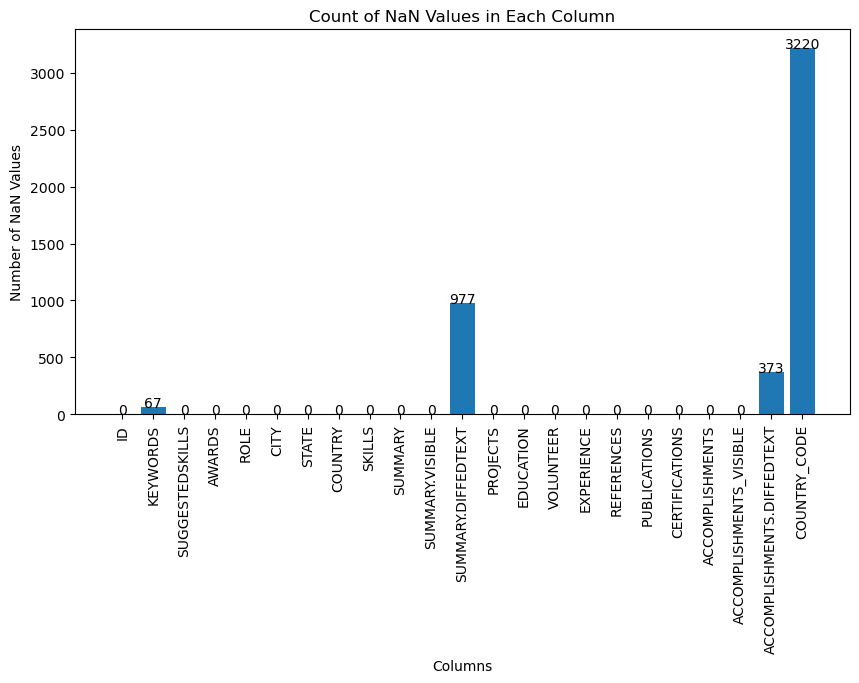

In [191]:
# Count the number of NaN values in each column
nan_counts = df_country.isna().sum()

# Create a bar chart to visualize the missing data
plt.figure(figsize=(10,5))
plt.bar(nan_counts.index, nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.title('Count of NaN Values in Each Column')

# Add counts to the chart
for i, v in enumerate(nan_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')
    
plt.show()

In [192]:
print('\n\033[1mCOUNTRY_CODE Non-Null and Null Count:\n' + '='*37 + '\033[0m')
# Count the total number of values in COUNTRY_CODE column
total_count = len(df_country['COUNTRY_CODE'])

# Count the number of non-null values in COUNTRY_CODE column
non_null_count = df_country['COUNTRY_CODE'].count()

# Count the number of null values in COUNTRY_CODE column
null_count = df_country['COUNTRY_CODE'].isna().sum()

data = {'Total Count': [total_count], 'Non-Null Count': [non_null_count], 'Null Count': [null_count]}
df_counts = pd.DataFrame(data)
print(df_counts)



COUNTRY_CODE Non-Null and Null Count:
   Total Count  Non-Null Count  Null Count
0        11976            8756        3220


In [193]:
# # get columns where values are NaN in column "COUNTRY_CODE"

# na_mask = pd.isna(df_country['COUNTRY_CODE'])
# na_rows = df_country[na_mask]

# # Select all columns from the resulting rows
# na_columns = na_rows.loc[:, :]

# display(na_columns)

In [194]:

print('\n\033[1mReplace None values in COUNTRY_CODE column with corresponding country codes:\n' + '='*78 + '\033[0m')
for idx, row in df_country.iterrows():
    if pd.isna(row['COUNTRY_CODE']):
        try:
            query = row['COUNTRY'][:3]
            if query and query[0].isdigit():
                country_code = 'OT'
            else:
                country_code = pycountry.countries.search_fuzzy(query)[0].alpha_2
        except LookupError as e:
            if str(e) == 'u.a':
                country_code = 'AE'
            elif str(e) == 'uae':
                country_code = 'AE'
            elif str(e) == 'u.a.e':
                country_code = 'AE'
            elif str(e) == 'usa':
                country_code = 'US'
            elif str(e) == 'namibia':
                country_code = 'NA' 
            elif str(e) == 'tanzania':
                country_code = 'TZ'
            elif str(e) == 'lesotho':
                country_code = 'LS' 
            elif str(e) in ['tbt','бел','рос','fgj','укр']:
                country_code = 'OT'
            else:
                #raise e
                country_code = 'OT'
        df_country.at[idx, 'COUNTRY_CODE'] = country_code

# Display the updated dataframe
display(df_country)



Replace None values in COUNTRY_CODE column with corresponding country codes:


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE        COUNTRY  \
0             ca  united states   
1      thuringia        germany   
2        arizona  united states   
3                                 
4             ab         canada   
...          ...            ...   
11971         ny  united states   
11972         ma  united states   
11973         wi                  
11974         ma  united states   
11975         ma  united states   

                                                  SKILLS  \
0      [{'section': 'Jobber, Glorilladesk, Billmaster...   
1      [{'section': 'User research methodologies, Inf...   
2      [{'section': 'JavaScript, React, Cypress, SQL,...   
3      [{'section': 'Marketing Analytics, Website Ana...   
4      [{'section': 'Client relations, interpersonal ...   
...                                                  ...   
11971  [{'section': 'Single and Multicam operation, L...   
11972  [{'section': 'Innovation and Information Techn...   
11973                                                 []   
11974  [{'section': 'Innovation and information techn...   
11975  [{'section': 'Innovation and Information Techn...   

                                                 SUMMARY  ...  \
0      detailed and driven, i have built strong

In [195]:
print('\n\033[1mCOUNTRY_CODE Non-Null and Null Count:\n' + '='*37 + '\033[0m')
# Count the total number of values in COUNTRY_CODE column
total_count = len(df_country['COUNTRY_CODE'])

# Count the number of non-null values in COUNTRY_CODE column
non_null_count = df_country['COUNTRY_CODE'].count()

# Count the number of null values in COUNTRY_CODE column
null_count = df_country['COUNTRY_CODE'].isna().sum()

data = {'Total Count': [total_count], 'Non-Null Count': [non_null_count], 'Null Count': [null_count]}
df_counts = pd.DataFrame(data)
print(df_counts)



COUNTRY_CODE Non-Null and Null Count:
   Total Count  Non-Null Count  Null Count
0        11976           11976           0


In [196]:
# # Count the number of NaN values in each column
# nan_counts = df_country.isna().sum()

# # Create a bar chart to visualize the missing data
# plt.figure(figsize=(10,5))
# plt.bar(nan_counts.index, nan_counts.values)
# plt.xticks(rotation=90)
# plt.xlabel('Columns')
# plt.ylabel('Number of NaN Values')
# plt.title('Count of NaN Values in Each Column')

# # Add counts to the chart
# for i, v in enumerate(nan_counts.values):
#     plt.text(i, v, str(v), color='black', ha='center')
    
# plt.show()

NOTE: NO NULL VALUES IN COUNTRY CODE WHICH IS A GOOD THING

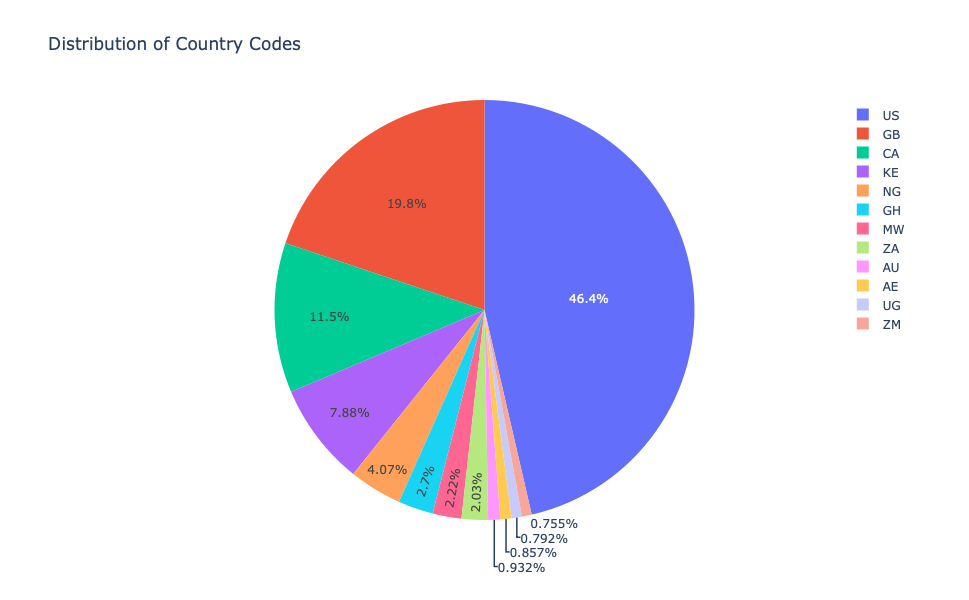

In [197]:
import plotly.graph_objects as go

# Calculate value counts of COUNTRY_CODE
country_counts = df_country['COUNTRY_CODE'].value_counts()

# Calculate cumulative percentage
cum_perc = country_counts.cumsum() / country_counts.sum()

# Filter countries to only includes countries where the cumulative percentage is less than 20%.
top_countries = country_counts[cum_perc <= 0.9]

# Create a pie chart with distribution
fig = go.Figure(data=[go.Pie(labels=top_countries.index, values=top_countries.values)])

# Create a pie chart
# fig, ax = plt.subplots()
# ax.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
# ax.set_title('Distribution of Country Codes')

# Set hover information to display count
fig.update_traces(hoverinfo='label+value')

# Set hover template to display count
fig.update_layout(hoverlabel=dict(
    bgcolor="white",
    font_size=12,
    font_family="Arial",
    bordercolor="black"
))

# Set title
fig.update_layout(title='Distribution of Country Codes', autosize=False, width=800, height=600)

# Show the figure
fig.show()


In [198]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def plot_job_candidates_per_city(country_code):
    # Filter the data to include only the specified country code
    df_country = new_df[new_df['COUNTRY_CODE'] == country_code]
    
    # Get the counts of job candidates per city
    city_counts = df_country['CITY'].value_counts()
    
    # Filter the counts to include only those greater than 50
    city_counts = city_counts[city_counts > 10]
    
    # Sort the counts in descending order
    city_counts = city_counts.sort_values(ascending=False)
    
    # Plot the bar chart
    num_bars = len(city_counts)
    colors = plt.cm.Set1(np.linspace(0, 1, num_bars))
    
    plt.figure(figsize=(12, 6))
    plt.bar(city_counts.index, city_counts.values, color=colors)
    plt.title(f'Number of Candidates per City in {country_code}')
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    # Add counts to the chart
    for i, v in enumerate(city_counts.values):
        plt.text(i, v, str(v), color='black', ha='center')
        
    plt.show()

# Get the unique country codes sorted in alphabetical order
sorted_country_codes = sorted(new_df['COUNTRY_CODE'].unique())

# Dropdown menu for country selection
country_dropdown = widgets.Dropdown(
    options=sorted_country_codes,
    value=sorted_country_codes[0],
    description='Country:',
    layout=widgets.Layout(width='200px')
)

# Use interact to dynamically update the chart based on the selected country
interact(plot_job_candidates_per_city, country_code=country_dropdown)


interactive(children=(Dropdown(description='Country:', layout=Layout(width='200px'), options=('AE', 'AI', 'AL'…

<function __main__.plot_job_candidates_per_city(country_code)>

#### Generate word cloud image for STATES:

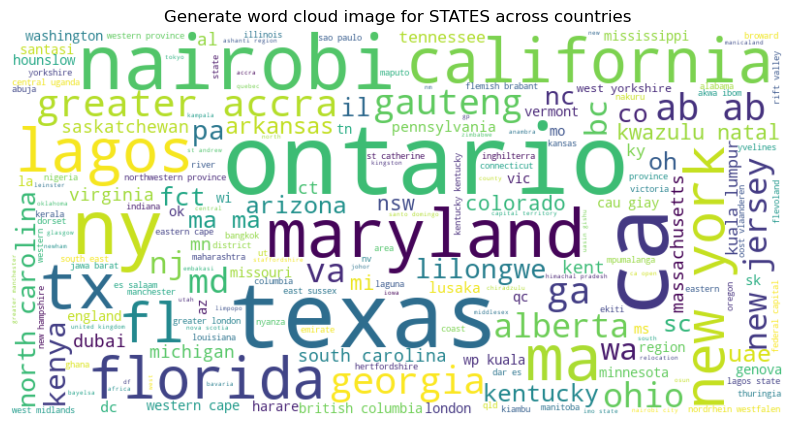

In [199]:
# Combine all text data into a single string
text_data = " ".join(df_country['STATE'].astype(str).tolist())

# Generate word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text_data)

# Display the generated image:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Generate word cloud image for STATES across countries')
plt.show()


### SKILLS COLUMN SPLIT

In [200]:
# SKILLS COLUMN SPLIT

print('\033[1mSkills Column Split:\n' + '='*21 + '\033[0m')

skills_list = []

for index, row in df_country.iterrows():
    skills_dicts = {}
    for dictionary in row['SKILLS']:
        for k, v in dictionary.items():
            skills_dicts[k] = v
    skills_list.append(skills_dicts)

df_skills = pd.DataFrame(skills_list)
display(df_skills)


Skills Column Split:


section visible  \
0      Verbal, Written, and Visual Communication, Goa...    True   
1      Figma, Sketch, Adobe XD, Framer, Miro, UXPin, ...    True   
2      Jira, VSC, MySQL, Git,  BitBucket, GitHub, Pos...    True   
3      Marketing Analytics, Website Analytics, Produc...    True   
4      Critical and analytical thinking, Time Managem...    True   
...                                                  ...     ...   
11971  Project management, self-driven, production pl...    True   
11972                 Facebook Live, Twitch, OBS, Xsplit    True   
11973                                                NaN     NaN   
11974                 Facebook Live, Twitch, OBS, Xsplit    True   
11975                 Facebook Live, Twitch, OBS, Xsplit    True   

              sectionName  
0           Office Skills  
1         Software Skills  
2                   Tools  
3       Digital Marketing  
4      Project management  
...                   ...  
11971         Soft Skills  
11972      Live Streaming  
11973                 NaN  
11974      Live Streaming  
11975      Live Streaming  

[11976 rows x 3 columns]

In [201]:
# Drop the "visible" column
df_skills = df_skills.drop("visible", axis=1)

# Rename the columns
df_skills = df_skills.rename(columns={"section": "SKILL_DESCRIPTION", "sectionName": "SKILL"})

# Display the updated DataFrame
display(df_skills)


SKILL_DESCRIPTION               SKILL
0      Verbal, Written, and Visual Communication, Goa...       Office Skills
1      Figma, Sketch, Adobe XD, Framer, Miro, UXPin, ...     Software Skills
2      Jira, VSC, MySQL, Git,  BitBucket, GitHub, Pos...               Tools
3      Marketing Analytics, Website Analytics, Produc...   Digital Marketing
4      Critical and analytical thinking, Time Managem...  Project management
...                                                  ...                 ...
11971  Project management, self-driven, production pl...         Soft Skills
11972                 Facebook Live, Twitch, OBS, Xsplit      Live Streaming
11973                                                NaN                 NaN
11974                 Facebook Live, Twitch, OBS, Xsplit      Live Streaming
11975                 Facebook Live, Twitch, OBS, Xsplit      Live Streaming

[11976 rows x 2 columns]

In [202]:
# Combine the DataFrames
df_combined = pd.concat([df_country, df_skills], axis=1)

# Drop the specified columns
df_combined = df_combined.drop(['COUNTRY', 'SKILLS', 'SUMMARY.VISIBLE', 'ACCOMPLISHMENTS_VISIBLE'], axis=1)

# Display the updated DataFrame
display(df_combined)


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT  \
0      <span style="color:rgb(245 158 11);">detailed<...   
1      <span style="color:rgb(245 158 11);">detailed-...   
2      agile software engineer with 2 years of experi...   
3      <span style="color:rgb(245 158 11);">innovativ...   
4      passionate job seeker with strong organization...   
...                                      

#### WordCloud of Most Common Skills

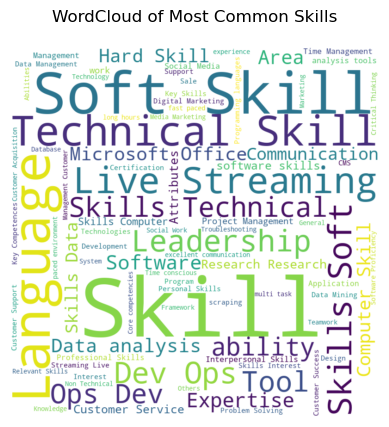

In [203]:
# Filter out NULL values in the 'SKILL' column
skills = df_combined['SKILL'].astype(str)
skills = skills[skills != 'nan']

# Show the wordcloud for the non-NULL values in the 'SKILL' column
text_keys = ' '.join(skills.values)
wordcloud_keys = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_keys)
plt.imshow(wordcloud_keys, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Common Skills\n')
plt.show()


#### WordCloud of Most Common Skills description

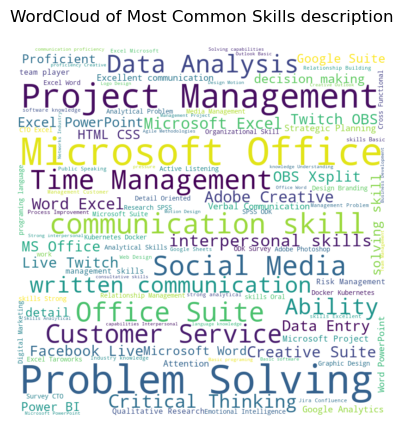

In [204]:
# Filter out NULL values in the 'SKILL' column
skills_description = df_combined['SKILL_DESCRIPTION'].astype(str)
skills_description = skills_description[skills_description != 'nan']

# Show the wordcloud for the non-NULL values in the 'SKILL' column
text_keys = ' '.join(skills_description.values)
wordcloud_keys = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_keys)
plt.imshow(wordcloud_keys, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Common Skills description\n')
plt.show()


### EDUCATION COLUMN SPLIT

In [205]:
# EDUCATION COLUMN SPLIT
print('\033[1mEducation Column Split:\n' + '='*23 + '\033[0m')
edu_dicts = []

for index, row in df_combined.iterrows():
    edu_dict = {}
    for dictionary in row['EDUCATION']:
        for k, v in dictionary.items():
            edu_dict[k] = v
    edu_dicts.append(edu_dict)

df_edu = pd.DataFrame(edu_dicts)

# Convert column headers to uppercase and add prefix
df_edu = df_edu.rename(columns=lambda x: 'EDU_' + str(x).upper())

display(df_edu)

Education Column Split:


EDU_GPA                            EDU_MINOR              EDU_AWARDS  \
0                                                                 Dean's List   
1                                                                               
2      3.61/4.00                     Computer Science             Dean's List   
3           3.58               Mechanical Engineering                           
4                                                                               
...          ...                                  ...                     ...   
11971                                    Anthropology                           
11972        3.8                                       Honor Roll, Deans List   
11973       3.65  Nonprofit Organization Management                             
11974        3.8                                       Honor Roll, Deans List   
11975        3.8                                       Honor Roll, Deans List   

                                EDU_SCHOOL  \
0                          Cal Poly Pomona   
1                          BRAC University   
2                 Arizona State University   
3                 Malang State Polytechnic   
4           University of British Columbia   
...                                    ...   
11971                  CUNY-Hunter College   
11972  Southern New Hampshire University\t   
11973                  Lakeland University   
11974  Southern New Hampshire University\t   
11975  Southern New Hampshire University\t   

                                   EDU_PROGRAM EDU_VISIBLE       EDU_LOCATION  \
0      Business Management and Human Resources        True         Pomona, CA   
1         Electrical & Electronics Engineering        True  Dhaka, Bangladesh   
2                          Bachelor of Science        True          Tempe, AZ   
3              Bachelor of Applied Engineering        True             Malang   
4                 Bachelors of Arts- Geography        True            Kelowna   
...                                        ...         ...                ...   
11971                            Media Studies        True       New York, NY   
11972                         Bachelor of Arts        True     Manchester, NH   
11973                       Bachelor's of Arts        True      Sheboygan, WI   
11974                         Bachelor of Arts        True     Manchester, NH   
11975                         Bachelor of Arts        True     Manchester, NH   

                                          EDU_COURSEWORK EDU_GRADUATIONDATE  
0                                                                 June 2019  
1                                                                April 2017  
2      Distributed Software Development, Algorithms a...      December 2020  
3                                                            September 2020  
4                                                                 June 2021  
...                                                  ...                ...  
11971                                                              May 2009  
11972  My education includes a range of courses in Ba...           May 2020  
11973                    Event Planning, Fundraising 101      December 2015  
11974  Basic Design and Color Theory, Media Com & Vis...           May 2020  
11975  My education includes a range of courses in Ba...           May 2020  

[11976 rows x 9 columns]

#### Note: For NA values in Gradution Date we are considering 1900-01-01

In [206]:
import datetime
import numpy as np

# Replace non-finite values with a default date
df_edu['EDU_GRADUATIONDATE'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

# Convert 'graduationDate' column to datetime format
df_edu['EDU_GRADUATIONDATE'] = pd.to_datetime(df_edu['EDU_GRADUATIONDATE'], format='%B %Y', errors='coerce')

# Replace NaT (non-finite values) with a default date
df_edu['EDU_GRADUATIONDATE'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

# Extract the year into a 'GRAD_YEAR' column
df_edu['EDU_GRAD_YEAR'] = df_edu['EDU_GRADUATIONDATE'].dt.year.astype(float).astype(int)

# Display the updated DataFrame
display(df_edu)


EDU_GPA                            EDU_MINOR              EDU_AWARDS  \
0                                                                 Dean's List   
1                                                                               
2      3.61/4.00                     Computer Science             Dean's List   
3           3.58               Mechanical Engineering                           
4                                                                               
...          ...                                  ...                     ...   
11971                                    Anthropology                           
11972        3.8                                       Honor Roll, Deans List   
11973       3.65  Nonprofit Organization Management                             
11974        3.8                                       Honor Roll, Deans List   
11975        3.8                                       Honor Roll, Deans List   

                                EDU_SCHOOL  \
0                          Cal Poly Pomona   
1                          BRAC University   
2                 Arizona State University   
3                 Malang State Polytechnic   
4           University of British Columbia   
...                                    ...   
11971                  CUNY-Hunter College   
11972  Southern New Hampshire University\t   
11973                  Lakeland University   
11974  Southern New Hampshire University\t   
11975  Southern New Hampshire University\t   

                                   EDU_PROGRAM EDU_VISIBLE       EDU_LOCATION  \
0      Business Management and Human Resources        True         Pomona, CA   
1         Electrical & Electronics Engineering        True  Dhaka, Bangladesh   
2                          Bachelor of Science        True          Tempe, AZ   
3              Bachelor of Applied Engineering        True             Malang   
4                 Bachelors of Arts- Geography        True            Kelowna   
...                                        ...         ...                ...   
11971                            Media Studies        True       New York, NY   
11972                         Bachelor of Arts        True     Manchester, NH   
11973                       Bachelor's of Arts        True      Sheboygan, WI   
11974                         Bachelor of Arts        True     Manchester, NH   
11975                         Bachelor of Arts        True     Manchester, NH   

                                          EDU_COURSEWORK EDU_GRADUATIONDATE  \
0                                                                2019-06-01   
1                                                                2017-04-01   
2      Distributed Software Development, Algorithms a...         2020-12-01   
3                                                                2020-09-01   
4                                                                2021-06-01   
...                                                  ...                ...   
11971                                                            2009-05-01   
11972  My education includes a range of courses in Ba...         2020-05-01   
11973                    Event Planning, Fundraising 101         2015-12-01   
11974  Basic Design and Color Theory, Media Com & Vis...         2020-05-01   
11975  My education includes a range of courses in Ba...         2020-05-01   

       EDU_GRAD_YEAR  
0               2019  
1               2017  
2               2020  
3               2020  
4               2021  
...              ...  
11971           2009  
11972           2020  
11973           2015  
11974           2020  
11975           2020  

[11976 rows x 10 columns]

In [207]:
unique_values = np.sort(df_edu.EDU_GRAD_YEAR.unique())[::-1]
print(unique_values)


[2027 2026 2025 2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014
 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000
 1999 1997 1996 1994 1993 1992 1991 1981 1977 1900]


#### To calculate the age range accurately, we need to consider the birth year instead. Since we don't have the birth year information in the provided DataFrame, we can make an assumption that most individuals graduate from high school or college around the age of 18 to 22.

In [208]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Define the age range assumptions
MIN_GRAD_AGE = 18
MAX_GRAD_AGE = 22

# Calculate the birth year
df_edu['BIRTH_YEAR'] = df_edu['EDU_GRAD_YEAR'] - MAX_GRAD_AGE

# Calculate the age range
df_edu['AGE_RANGE'] = current_year - df_edu['BIRTH_YEAR']

df_edu.columns = df_edu.columns.str.upper()

# Display the DataFrame with the age range
display(df_edu)

EDU_GPA                            EDU_MINOR              EDU_AWARDS  \
0                                                                 Dean's List   
1                                                                               
2      3.61/4.00                     Computer Science             Dean's List   
3           3.58               Mechanical Engineering                           
4                                                                               
...          ...                                  ...                     ...   
11971                                    Anthropology                           
11972        3.8                                       Honor Roll, Deans List   
11973       3.65  Nonprofit Organization Management                             
11974        3.8                                       Honor Roll, Deans List   
11975        3.8                                       Honor Roll, Deans List   

                                EDU_SCHOOL  \
0                          Cal Poly Pomona   
1                          BRAC University   
2                 Arizona State University   
3                 Malang State Polytechnic   
4           University of British Columbia   
...                                    ...   
11971                  CUNY-Hunter College   
11972  Southern New Hampshire University\t   
11973                  Lakeland University   
11974  Southern New Hampshire University\t   
11975  Southern New Hampshire University\t   

                                   EDU_PROGRAM EDU_VISIBLE       EDU_LOCATION  \
0      Business Management and Human Resources        True         Pomona, CA   
1         Electrical & Electronics Engineering        True  Dhaka, Bangladesh   
2                          Bachelor of Science        True          Tempe, AZ   
3              Bachelor of Applied Engineering        True             Malang   
4                 Bachelors of Arts- Geography        True            Kelowna   
...                                        ...         ...                ...   
11971                            Media Studies        True       New York, NY   
11972                         Bachelor of Arts        True     Manchester, NH   
11973                       Bachelor's of Arts        True      Sheboygan, WI   
11974                         Bachelor of Arts        True     Manchester, NH   
11975                         Bachelor of Arts        True     Manchester, NH   

                                          EDU_COURSEWORK EDU_GRADUATIONDATE  \
0                                                                2019-06-01   
1                                                                2017-04-01   
2      Distributed Software Development, Algorithms a...         2020-12-01   
3                                                                2020-09-01   
4                                                                2021-06-01   
...                                                  ...                ...   
11971                                                            2009-05-01   
11972  My education includes a range of courses in Ba...         2020-05-01   
11973                    Event Planning, Fundraising 101         2015-12-01   
11974  Basic Design and Color Theory, Media Com & Vis...         2020-05-01   
11975  My education includes a range of courses in Ba...         2020-05-01   

       EDU_GRAD_YEAR  BIRTH_YEAR  AGE_RANGE  
0               2019        1997         26  
1               2017        1995         28  
2               2020        1998         25  
3               2020        1998         25  
4               2021        1999         24  
...              ...         ...        ...  
11971           2009        1987         36  
11972           2020        1998         25  
11973           2015        1993         30  
11974           2020        1998         25  
11975           2020        1998         25  

[11976 r

In [209]:
# Combine the DataFrames
df_combined_2 = pd.concat([df_combined, df_edu], axis=1)

# Drop the specified columns
df_combined_2 = df_combined_2.drop(['EDUCATION'], axis=1)

# Display the updated DataFrame
display(df_combined_2)

ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT  \
0      <span style="color:rgb(245 158 11);">detailed<...   
1      <span style="color:rgb(245 158 11);">detailed-...   
2      agile software engineer with 2 years of experi...   
3      <span style="color:rgb(245 158 11);">innovativ...   
4      passionate job seeker with strong organization...   
...                                      

In [210]:
display(df_combined_2.columns)

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'AWARDS', 'ROLE', 'CITY', 'STATE',
       'SUMMARY', 'SUMMARY.DIFFEDTEXT', 'PROJECTS', 'VOLUNTEER', 'EXPERIENCE',
       'REFERENCES', 'PUBLICATIONS', 'CERTIFICATIONS', 'ACCOMPLISHMENTS',
       'ACCOMPLISHMENTS.DIFFEDTEXT', 'COUNTRY_CODE', 'SKILL_DESCRIPTION',
       'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL',
       'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION', 'EDU_COURSEWORK',
       'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR', 'AGE_RANGE'],
      dtype='object')

### VOLUNTEER COLUMN SPLIT

In [211]:
# VOLUNTEER COLUMN SPLIT
print('\033[1mVOLUNTEER Column Split:\n' + '='*23 + '\033[0m')
vol_dicts = []

for index, row in df_combined_2.iterrows():
    vol_dict = {}
    for dictionary in row['VOLUNTEER']:
        for k, v in dictionary.items():
            vol_dict[k] = v
    vol_dicts.append(vol_dict)

df_vol = pd.DataFrame(vol_dicts)

# Convert column headers to uppercase and add prefix
df_vol = df_vol.rename(columns=lambda x: 'VLNTR_' + str(x).upper())

display(df_vol)


VOLUNTEER Column Split:


VLNTR_TITLE VLNTR_ENDDATE VLNTR_VISIBLE VLNTR_LOCATION  \
0                             NaN           NaN           NaN            NaN   
1                             NaN           NaN           NaN            NaN   
2                             NaN           NaN           NaN            NaN   
3                             NaN           NaN           NaN            NaN   
4                             NaN           NaN           NaN            NaN   
...                           ...           ...           ...            ...   
11971                         NaN           NaN           NaN            NaN   
11972                         NaN           NaN           NaN            NaN   
11973  Marketing Committee Member      May 2018          True    Crivitz, WI   
11974                         NaN           NaN           NaN            NaN   
11975                         NaN           NaN           NaN            NaN   

      VLNTR_STARTDATE                                  VLNTR_DESCRIPTION  \
0                 NaN                                                NaN   
1                 NaN                                                NaN   
2                 NaN                                                NaN   
3                 NaN                                                NaN   
4                 NaN                                                NaN   
...               ...                                                ...   
11971             NaN                                                NaN   
11972             NaN                                                NaN   
11973      March 2017  •  Developed social media marketing materials,...   
11974             NaN                                                NaN   
11975             NaN                                                NaN   

                              VLNTR_ORGANIZATION  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
11971                                        NaN   
11972                                        NaN   
11973  The Wall That Heals Comes to Crivitz 2018   
11974                                        NaN   
11975                                        NaN   

                                 VLNTR_DIFFEDDESCRIPTION  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
11971                                                NaN  
11972                                                NaN  
11973  •  Developed social media marketing materials,...  
11974                                                NaN  
11975                                                NaN  

[11976 rows x 8 columns]

In [212]:
# Combine the DataFrames
df_combined_3 = pd.concat([df_combined_2, df_vol], axis=1)

# Drop the specified columns
df_combined_3 = df_combined_3.drop(['VOLUNTEER'], axis=1)

# Display the updated DataFrame
display(df_combined_3)

ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT  \
0      <span style="color:rgb(245 158 11);">detailed<...   
1      <span style="color:rgb(245 158 11);">detailed-...   
2      agile software engineer with 2 years of experi...   
3      <span style="color:rgb(245 158 11);">innovativ...   
4      passionate job seeker with strong organization...   
...                                      

In [213]:
display(df_combined_3.columns)

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'AWARDS', 'ROLE', 'CITY', 'STATE',
       'SUMMARY', 'SUMMARY.DIFFEDTEXT', 'PROJECTS', 'EXPERIENCE', 'REFERENCES',
       'PUBLICATIONS', 'CERTIFICATIONS', 'ACCOMPLISHMENTS',
       'ACCOMPLISHMENTS.DIFFEDTEXT', 'COUNTRY_CODE', 'SKILL_DESCRIPTION',
       'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL',
       'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION', 'EDU_COURSEWORK',
       'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR', 'AGE_RANGE',
       'VLNTR_TITLE', 'VLNTR_ENDDATE', 'VLNTR_VISIBLE', 'VLNTR_LOCATION',
       'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION',
       'VLNTR_DIFFEDDESCRIPTION'],
      dtype='object')

### EXPERIENCE COLUMN SPLIT

In [214]:
# EXPERIENCE COLUMN SPLIT
print('\033[1mEXPERIENCE Column Split:\n' + '='*23 + '\033[0m')
exp_dicts = []

for index, row in df_combined_3.iterrows():
    exp_dict = {}
    for dictionary in row['EXPERIENCE']:
        for k, v in dictionary.items():
            exp_dict[k] = v
    exp_dicts.append(exp_dict)

df_exp = pd.DataFrame(exp_dicts)

# Convert column headers to uppercase and add prefix
df_exp = df_exp.rename(columns=lambda x: 'EXP_' + str(x).upper())

display(df_exp)


EXPERIENCE Column Split:


EXP_TITLE  \
0                Office Manager/ Pest Control Technician   
1                                         Cable Designer   
2                                         Student Intern   
3      Performance Marketing Specialist (Apprenticeship)   
4                          Customer Experience Associate   
...                                                  ...   
11971                                   Research Analyst   
11972          Graphic Web Designer & Developer (Remote)   
11973        Lead Daycare Teacher/Historical Interpreter   
11974                    Graphic Designer / Video Editor   
11975          Graphic Web Designer & Developer (Remote)   

                    EXP_COMPANY    EXP_ENDDATE EXP_VISIBLE  \
0           Prompt Pest Control        Present        True   
1        PARTEX Cables LLimited    August 2019        True   
2            Salt River Project  February 2021        True   
3                        Zanroo    August 2021        True   
4                       Walmart    August 2020        True   
...                         ...            ...         ...   
11971           JP Morgan Chase  February 2013        True   
11972        Gifts Just For You        Present        True   
11973  Heritage Hill State Park    August 2015       False   
11974             Self-Employed        Present        True   
11975        Gifts Just For You        Present        True   

                  EXP_LOCATION   EXP_STARTDATE  \
0                    Indio, CA       June 2014   
1      Narayanganj, Bangladesh  September 2017   
2                    Tempe, AZ      April 2019   
3                      Jakarta      April 2021   
4                      Kelowna        May 2020   
...                        ...             ...   
11971             Brooklyn, NY  September 2011   
11972        East Hartford, CT  September 2016   
11973            Green Bay, WI     August 2013   
11974  Greater Boston Area, MA      April 2017   
11975        East Hartford, CT  September 2016   

                                         EXP_DESCRIPTION  \
0      • Built strong client relationships, facilitat...   
1      • Designing cables of different categories mai...   
2      • Followed standard practices for migrating ch...   
3      • Minimizing irrelevant keywords, while levera...   
4      • Collaborated with internal partners to swift...   
...                                                  ...   
11971  • Coordinated with various departments within ...   
11972  • I have a proven track record of success in g...   
11973  • Organized and meticulously cared for artifac...   
11974  • \tCollaborated with various enterprises to m...   
11975  • Illustrated a 80% increase in client engagem...   

                                   EXP_DIFFEDDESCRIPTION  
0      Built <span style="color:rgb(245 158 11);">str...  
1      Designing cables of different categories maint...  
2      Followed standard practices for migrating chan...  
3      Minimizing irrelevant keywords <span style="co...  
4      Collaborated with internal <span style="color:...  
...                                                  ...  
11971  Coordinated with various departments within th...  
11972  I have a proven track record of success in gra...  
11973  Organized and <span style="color:rgb(245 158 1...  
11974                                                     
11975  <span style="color:rgb(245 158 11);">Illustrat...  

[11976 rows x 8 columns]

In [215]:
# Combine the DataFrames
df_combined_4 = pd.concat([df_combined_3, df_exp], axis=1)

# Drop the specified columns
df_combined_4 = df_combined_4.drop(['EXPERIENCE'], axis=1)

# Display the updated DataFrame
display(df_combined_4)

ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT  \
0      <span style="color:rgb(245 158 11);">detailed<...   
1      <span style="color:rgb(245 158 11);">detailed-...   
2      agile software engineer with 2 years of experi...   
3      <span style="color:rgb(245 158 11);">innovativ...   
4      passionate job seeker with strong organization...   
...                                      

In [216]:
display(df_combined_4.columns)

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'AWARDS', 'ROLE', 'CITY', 'STATE',
       'SUMMARY', 'SUMMARY.DIFFEDTEXT', 'PROJECTS', 'REFERENCES',
       'PUBLICATIONS', 'CERTIFICATIONS', 'ACCOMPLISHMENTS',
       'ACCOMPLISHMENTS.DIFFEDTEXT', 'COUNTRY_CODE', 'SKILL_DESCRIPTION',
       'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL',
       'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION', 'EDU_COURSEWORK',
       'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR', 'AGE_RANGE',
       'VLNTR_TITLE', 'VLNTR_ENDDATE', 'VLNTR_VISIBLE', 'VLNTR_LOCATION',
       'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION',
       'VLNTR_DIFFEDDESCRIPTION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION',
       'EXP_DIFFEDDESCRIPTION'],
      dtype='object')

### PROJECTS COLUMN SPLIT

In [217]:
# PROJECTS COLUMN SPLIT
print('\033[1mPROJECTS Column Split:\n' + '='*23 + '\033[0m')
prj_dicts = []

for index, row in df_combined_4.iterrows():
    prj_dict = {}
    for dictionary in row['PROJECTS']:
        for k, v in dictionary.items():
            prj_dict[k] = v
    prj_dicts.append(prj_dict)

df_prj = pd.DataFrame(prj_dicts)

####
# Convert column headers to uppercase and add prefix
df_prj = df_prj.rename(columns=lambda x: 'PRJ_' + str(x).upper())

#display(df_prj)

# Combine the DataFrames
df_combined_5 = pd.concat([df_combined_4, df_prj], axis=1)

# Drop the specified columns
df_combined_5 = df_combined_5.drop(['PROJECTS'], axis=1)

# Display the updated DataFrame
display(df_combined_5)
######
display(df_combined_5.columns)

PROJECTS Column Split:


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT  \
0      <span style="color:rgb(245 158 11);">detailed<...   
1      <span style="color:rgb(245 158 11);">detailed-...   
2      agile software engineer with 2 years of experi...   
3      <span style="color:rgb(245 158 11);">innovativ...   
4      passionate job seeker with strong organization...   
...                                      

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'AWARDS', 'ROLE', 'CITY', 'STATE',
       'SUMMARY', 'SUMMARY.DIFFEDTEXT', 'REFERENCES', 'PUBLICATIONS',
       'CERTIFICATIONS', 'ACCOMPLISHMENTS', 'ACCOMPLISHMENTS.DIFFEDTEXT',
       'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR',
       'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_RANGE', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_VISIBLE', 'VLNTR_LOCATION', 'VLNTR_STARTDATE',
       'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION', 'VLNTR_DIFFEDDESCRIPTION',
       'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE', 'EXP_VISIBLE',
       'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION',
       'EXP_DIFFEDDESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS',
       'PRJ_ENDDATE', 'PRJ_VISIBLE', 'PRJ_STARTDATE', 'PRJ_DESCRIPTION',
       'PRJ_DIFFEDDESCRIPTION'],
      dtype='object')

### REFERENCES COLUMN SPLIT

In [218]:
# REFERENCES COLUMN SPLIT
print('\033[1mREFERENCES Column Split:\n' + '='*23 + '\033[0m')
ref_dicts = []

for index, row in df_combined_5.iterrows():
    ref_dict = {}
    for dictionary in row['REFERENCES']:
        for k, v in dictionary.items():
            ref_dict[k] = v
    ref_dicts.append(ref_dict)

df_ref = pd.DataFrame(ref_dicts)

####
# Convert column headers to uppercase and add prefix
df_ref = df_ref.rename(columns=lambda x: 'REF_' + str(x).upper())

#display(df_prj)

# Combine the DataFrames
df_combined_6 = pd.concat([df_combined_5, df_ref], axis=1)

# Drop the specified columns
df_combined_6 = df_combined_6.drop(['REFERENCES'], axis=1)

# Display the updated DataFrame
display(df_combined_6)
######
display(df_combined_6.columns)

REFERENCES Column Split:


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT PUBLICATIONS  ...  \
0      <span style="color:rgb(245 158 11);">detailed<...           []  ...   
1      <span style="color:rgb(245 158 11);">detailed-...           []  ...   
2      agile software engineer with 2 years of experi...           []  ...   
3      <span style="color:rgb(245 158 11);">innovativ...           []  ...   
4      pass

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'AWARDS', 'ROLE', 'CITY', 'STATE',
       'SUMMARY', 'SUMMARY.DIFFEDTEXT', 'PUBLICATIONS', 'CERTIFICATIONS',
       'ACCOMPLISHMENTS', 'ACCOMPLISHMENTS.DIFFEDTEXT', 'COUNTRY_CODE',
       'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS',
       'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION',
       'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR',
       'AGE_RANGE', 'VLNTR_TITLE', 'VLNTR_ENDDATE', 'VLNTR_VISIBLE',
       'VLNTR_LOCATION', 'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION',
       'VLNTR_ORGANIZATION', 'VLNTR_DIFFEDDESCRIPTION', 'EXP_TITLE',
       'EXP_COMPANY', 'EXP_ENDDATE', 'EXP_VISIBLE', 'EXP_LOCATION',
       'EXP_STARTDATE', 'EXP_DESCRIPTION', 'EXP_DIFFEDDESCRIPTION', 'PRJ_LINK',
       'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE', 'PRJ_VISIBLE',
       'PRJ_STARTDATE', 'PRJ_DESCRIPTION', 'PRJ_DIFFEDDESCRIPTION', 'REF_NAME',
       'REF_EMAIL', 'REF_VISIBLE', 'REF_PHONENUMBER', 'REF_R

### PUBLICATIONS COLUMN SPLIT

In [219]:
# PUBLICATIONS COLUMN SPLIT
print('\033[1mPUBLICATIONS Column Split:\n' + '='*26 + '\033[0m')
pbl_dicts = []

for index, row in df_combined_6.iterrows():
    pbl_dict = {}
    for dictionary in row['PUBLICATIONS']:
        for k, v in dictionary.items():
            pbl_dict[k] = v
    pbl_dicts.append(pbl_dict)

df_pbl = pd.DataFrame(pbl_dicts)

####
# Convert column headers to uppercase and add prefix
df_pbl = df_pbl.rename(columns=lambda x: 'PBL_' + str(x).upper())

#display(df_pbl)

# Combine the DataFrames
df_combined_7 = pd.concat([df_combined_6, df_pbl], axis=1)

# Drop the specified columns
df_combined_7 = df_combined_7.drop(['PUBLICATIONS'], axis=1)

# Display the updated DataFrame
display(df_combined_7)
######
display(df_combined_7.columns)

PUBLICATIONS Column Split:


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT  \
0      <span style="color:rgb(245 158 11);">detailed<...   
1      <span style="color:rgb(245 158 11);">detailed-...   
2      agile software engineer with 2 years of experi...   
3      <span style="color:rgb(245 158 11);">innovativ...   
4      passionate job seeker with strong organization...   
...                                      

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'AWARDS', 'ROLE', 'CITY', 'STATE',
       'SUMMARY', 'SUMMARY.DIFFEDTEXT', 'CERTIFICATIONS', 'ACCOMPLISHMENTS',
       'ACCOMPLISHMENTS.DIFFEDTEXT', 'COUNTRY_CODE', 'SKILL_DESCRIPTION',
       'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL',
       'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION', 'EDU_COURSEWORK',
       'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR', 'AGE_RANGE',
       'VLNTR_TITLE', 'VLNTR_ENDDATE', 'VLNTR_VISIBLE', 'VLNTR_LOCATION',
       'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION',
       'VLNTR_DIFFEDDESCRIPTION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION',
       'EXP_DIFFEDDESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS',
       'PRJ_ENDDATE', 'PRJ_VISIBLE', 'PRJ_STARTDATE', 'PRJ_DESCRIPTION',
       'PRJ_DIFFEDDESCRIPTION', 'REF_NAME', 'REF_EMAIL', 'REF_VISIBLE',
       'REF_PHONENUMBER', 'REF_RELATIONSHIP', 'P

### CERTIFICATIONS COLUMN SPLIT

In [220]:
# CERTIFICATIONS COLUMN SPLIT
print('\033[1mCERTIFICATIONS Column Split:\n' + '='*28 + '\033[0m')
crt_dicts = []

for index, row in df_combined_7.iterrows():
    crt_dict = {}
    for dictionary in row['CERTIFICATIONS']:
        for k, v in dictionary.items():
            crt_dict[k] = v
    crt_dicts.append(crt_dict)

df_crt = pd.DataFrame(crt_dicts)

####
# Convert column headers to uppercase and add prefix
df_crt = df_crt.rename(columns=lambda x: 'CRT_' + str(x).upper())

#display(df_pbl)

# Combine the DataFrames
df_combined_8 = pd.concat([df_combined_7, df_crt], axis=1)

# Drop the specified columns
df_combined_8 = df_combined_8.drop(['CERTIFICATIONS'], axis=1)

# Display the updated DataFrame
display(df_combined_8)
######
display(df_combined_8.columns)

CERTIFICATIONS Column Split:


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS  \
0      [Compliance, Client, Manages, Interaction, Fin...   
1                       [Analysis, Collection, Research]   
2                                [Vue, DevOps, Delivery]   
3                                                     []   
4                                            [Curiosity]   
...                                                  ...   
11971                      [Instagram, Calendar, TikTok]   
11972  [Broadcast, Promotional, Broadcast & Promotion...   
11973                                                 []   
11974                                                 []   
11975                                      [Communicate]   

                                                  AWARDS ROLE      CITY  \
0                                                     []          indio   
1                                                     []        ilmenau   
2      [{'name': 'Dean's List', 'issuer': 'Arizona St...         peoria   
3                                                     []         malang   
4                                                     []        calgary   
...                                                  ...  ...       ...   
11971                                                 []       brooklyn   
11972  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11973                                                 []        crivitz   
11974  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   
11975  [{'name': 'Honor Roll ', 'issuer': 'Southern N...        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT ACCOMPLISHMENTS  ...  \
0      <span style="color:rgb(245 158 11);">detailed<...                  ...   
1      <span style="color:rgb(245 158 11);">detailed-...                  ...   
2      agile software engineer with 2 years of experi...                  ...   
3      <span style="color:rgb(245 158 11);">innovativ...                  ...

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'AWARDS', 'ROLE', 'CITY', 'STATE',
       'SUMMARY', 'SUMMARY.DIFFEDTEXT', 'ACCOMPLISHMENTS',
       'ACCOMPLISHMENTS.DIFFEDTEXT', 'COUNTRY_CODE', 'SKILL_DESCRIPTION',
       'SKILL', 'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL',
       'EDU_PROGRAM', 'EDU_VISIBLE', 'EDU_LOCATION', 'EDU_COURSEWORK',
       'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR', 'BIRTH_YEAR', 'AGE_RANGE',
       'VLNTR_TITLE', 'VLNTR_ENDDATE', 'VLNTR_VISIBLE', 'VLNTR_LOCATION',
       'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION',
       'VLNTR_DIFFEDDESCRIPTION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_VISIBLE', 'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION',
       'EXP_DIFFEDDESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS',
       'PRJ_ENDDATE', 'PRJ_VISIBLE', 'PRJ_STARTDATE', 'PRJ_DESCRIPTION',
       'PRJ_DIFFEDDESCRIPTION', 'REF_NAME', 'REF_EMAIL', 'REF_VISIBLE',
       'REF_PHONENUMBER', 'REF_RELATIONSHIP', 'PBL_DATE', 'PBL_LIN

In [221]:
# AWARDS COLUMN SPLIT
print('\033[1mAWARDS Column Split:\n' + '='*20 + '\033[0m')
awd_dicts = []

for index, row in df_combined_8.iterrows():
    awd_dict = {}
    for dictionary in row['AWARDS']:
        for k, v in dictionary.items():
            awd_dict[k] = v
    awd_dicts.append(awd_dict)

df_awd = pd.DataFrame(awd_dicts)

####
# Convert column headers to uppercase and add prefix
df_awd = df_awd.rename(columns=lambda x: 'AWD_' + str(x).upper())

#display(df_pbl)

# Combine the DataFrames
df_combined_9 = pd.concat([df_combined_8, df_awd], axis=1)

# Drop the specified columns
df_combined_9 = df_combined_9.drop(['AWARDS'], axis=1)

# Display the updated DataFrame
display(df_combined_9)
######
display(df_combined_9.columns)

AWARDS Column Split:


ID  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          indio   
1                       [Analysis, Collection, Research]        ilmenau   
2                                [Vue, DevOps, Delivery]         peoria   
3                                                     []         malang   
4                                            [Curiosity]        calgary   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       brooklyn   
11972  [Broadcast, Promotional, Broadcast & Promotion...        peabody   
11973                                                 []        crivitz   
11974                                                 []        peabody   
11975                                      [Communicate]        peabody   

           STATE                                            SUMMARY  \
0             ca  detailed and driven, i have built strong commu...   
1      thuringia  detailed-oriented ui/ux designer with experien...   
2        arizona  agile software engineer with 2 years of experi...   
3                 innovative digital marketing professional with...   
4             ab  passionate job seeker with strong organization...   
...          ...                                                ...   
11971         ny  dependable videographer and video editor with ...   
11972         ma                                                      
11973         wi  personable and hardworking professional with e...   
11974         ma  professional with over a decade of experience ...   
11975         ma                                                      

                                      SUMMARY.DIFFEDTEXT ACCOMPLISHMENTS  \
0      <span style="color:rgb(245 158 11);">detailed<...                   
1      <span style="color:rgb(245 158 11);">detailed-...                   
2      agile software engineer with 2 years of experi...                   
3      <span style="color:rgb(245 158 11);">innovativ...                   
4      passionate job seeker with strong organization...                   
...                                                  ...             ...   
11971  dependable videographer and video editor with ...                   
11972                                                                      
11973  <span style="color:rgb(245 158 11);">personabl...                   
11974                                                                      
11975                                                                      

      ACCOMPLISHMENTS.DIFFEDTEXT  ...  \
0                                 ...   
1                                 ...   
2                                 ...   
3                                 ...   
4   

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'ROLE', 'CITY', 'STATE', 'SUMMARY',
       'SUMMARY.DIFFEDTEXT', 'ACCOMPLISHMENTS', 'ACCOMPLISHMENTS.DIFFEDTEXT',
       'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL', 'EDU_GPA', 'EDU_MINOR',
       'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_VISIBLE',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_RANGE', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_VISIBLE', 'VLNTR_LOCATION', 'VLNTR_STARTDATE',
       'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION', 'VLNTR_DIFFEDDESCRIPTION',
       'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE', 'EXP_VISIBLE',
       'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION',
       'EXP_DIFFEDDESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS',
       'PRJ_ENDDATE', 'PRJ_VISIBLE', 'PRJ_STARTDATE', 'PRJ_DESCRIPTION',
       'PRJ_DIFFEDDESCRIPTION', 'REF_NAME', 'REF_EMAIL', 'REF_VISIBLE',
       'REF_PHONENUMBER', 'REF_RELATIONSHIP', 'PBL_DATE', 'PBL_LINK',
      

### Final Dataset cleanup

In [222]:
import pandas as pd
import numpy as np

df = df_combined_9

columns_to_drop = df.filter(regex='(_VISIBLE$|.DIFFEDTEXT$|_DIFFEDDESCRIPTION$)').columns

# Drop the columns
df = df.drop(columns_to_drop, axis=1)

date_columns = ['VLNTR_ENDDATE', 'VLNTR_STARTDATE', 'EXP_ENDDATE', 'EXP_STARTDATE', 'PRJ_ENDDATE', 'PRJ_STARTDATE', 'PBL_DATE', 'CRT_DATERECEIVED', 'AWD_DATERECEIVED']

# Convert the specified columns to datetime format with the appropriate format string
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format='%B %Y', errors='coerce')

# Convert all values in all columns to uppercase
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# Display the updated DataFrame
display(df)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ... PBL_DETAILS  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...         NaN   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...         NaN   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...         NaN   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...         NaN   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...         NaN   
...                                                  ...  ...         ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...         NaN   
11972                 FACEBOOK LIVE, TWITCH, OBS,

In [223]:
df.columns

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'ROLE', 'CITY', 'STATE', 'SUMMARY',
       'ACCOMPLISHMENTS', 'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL',
       'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_RANGE', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_LOCATION', 'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION',
       'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION', 'PRJ_LINK',
       'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE', 'PRJ_STARTDATE',
       'PRJ_DESCRIPTION', 'REF_NAME', 'REF_EMAIL', 'REF_PHONENUMBER',
       'REF_RELATIONSHIP', 'PBL_DATE', 'PBL_LINK', 'PBL_NAME', 'PBL_DETAILS',
       'PBL_PUBLISHER', 'CRT_NAME', 'CRT_ISSUER', 'CRT_DATERECEIVED',
       'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DATERECEIVED',
       'AWD_DESCRIPTION'],
      dtype='object')

In [224]:
df.dtypes

ID                            object
KEYWORDS                      object
SUGGESTEDSKILLS               object
ROLE                          object
CITY                          object
STATE                         object
SUMMARY                       object
ACCOMPLISHMENTS               object
COUNTRY_CODE                  object
SKILL_DESCRIPTION             object
SKILL                         object
EDU_GPA                       object
EDU_MINOR                     object
EDU_AWARDS                    object
EDU_SCHOOL                    object
EDU_PROGRAM                   object
EDU_LOCATION                  object
EDU_COURSEWORK                object
EDU_GRADUATIONDATE    datetime64[ns]
EDU_GRAD_YEAR                  int64
BIRTH_YEAR                     int64
AGE_RANGE                      int64
VLNTR_TITLE                   object
VLNTR_ENDDATE         datetime64[ns]
VLNTR_LOCATION                object
VLNTR_STARTDATE       datetime64[ns]
VLNTR_DESCRIPTION             object
V

## Research Questions
1. What are the three industries that the majority of CoverQuick's users apply to ?
2. Discover trends in demographics and find which industries yield the best and the worst resumes (CoverQuick provides metrics for defining a "Good" resume). 
3. Determine the approximate age range and experience level.
4. Determine trends in experience and skills for these target users.

## Determine the approximate age range and experience level.

In [225]:
exp_columns = df.columns[df.columns.str.startswith('EXP_')]
display(df[exp_columns])

EXP_TITLE  \
0                OFFICE MANAGER/ PEST CONTROL TECHNICIAN   
1                                         CABLE DESIGNER   
2                                         STUDENT INTERN   
3      PERFORMANCE MARKETING SPECIALIST (APPRENTICESHIP)   
4                          CUSTOMER EXPERIENCE ASSOCIATE   
...                                                  ...   
11971                                   RESEARCH ANALYST   
11972          GRAPHIC WEB DESIGNER & DEVELOPER (REMOTE)   
11973        LEAD DAYCARE TEACHER/HISTORICAL INTERPRETER   
11974                    GRAPHIC DESIGNER / VIDEO EDITOR   
11975          GRAPHIC WEB DESIGNER & DEVELOPER (REMOTE)   

                    EXP_COMPANY EXP_ENDDATE             EXP_LOCATION  \
0           PROMPT PEST CONTROL         NaT                INDIO, CA   
1        PARTEX CABLES LLIMITED  2019-08-01  NARAYANGANJ, BANGLADESH   
2            SALT RIVER PROJECT  2021-02-01                TEMPE, AZ   
3                        ZANROO  2021-08-01                  JAKARTA   
4                       WALMART  2020-08-01                  KELOWNA   
...                         ...         ...                      ...   
11971           JP MORGAN CHASE  2013-02-01             BROOKLYN, NY   
11972        GIFTS JUST FOR YOU         NaT        EAST HARTFORD, CT   
11973  HERITAGE HILL STATE PARK  2015-08-01            GREEN BAY, WI   
11974             SELF-EMPLOYED         NaT  GREATER BOSTON AREA, MA   
11975        GIFTS JUST FOR YOU         NaT        EAST HARTFORD, CT   

      EXP_STARTDATE                                    EXP_DESCRIPTION  
0        2014-06-01  • BUILT STRONG CLIENT RELATIONSHIPS, FACILITAT...  
1        2017-09-01  • DESIGNING CABLES OF DIFFERENT CATEGORIES MAI...  
2        2019-04-01  • FOLLOWED STANDARD PRACTICES FOR MIGRATING CH...  
3        2021-04-01  • MINIMIZING IRRELEVANT KEYWORDS, WHILE LEVERA...  
4        2020-05-01  • COLLABORATED WITH INTERNAL PARTNERS TO SWIFT...  
...             ...                                                ...  
11971    2011-09-01  • COORDINATED WITH VARIOUS DEPARTMENTS WITHIN ...  
11972    2016-09-01  • I HAVE A PROVEN TRACK RECORD OF SUCCESS IN G...  
11973    2013-08-01  • ORGANIZED AND METICULOUSLY CARED FOR ARTIFAC...  
11974    2017-04-01  • \tCOLLABORATED WITH VARIOUS ENTERPRISES TO M...  
11975    2016-09-01  • ILLUSTRATED A 80% INCREASE IN CLIENT ENGAGEM...  

[11976 rows x 6 columns]

In [226]:
import datetime

# Calculate the duration of experience in days
df['EXP_DURATION'] = (df['EXP_ENDDATE'] - df['EXP_STARTDATE']).dt.days

# Define the experience level categories in days
levels = {
    'BEGINNER': 365,
    'INTERMEDIATE': 730,
    'ADVANCED': 1095,
}

# Categorize the experience levels based on the duration
df['EXP_LEVEL'] = pd.cut(df['EXP_DURATION'], bins=[-np.inf] + list(levels.values()), labels=list(levels.keys()))

# Display the DataFrame with the experience level column
display(df[['EXP_STARTDATE', 'EXP_ENDDATE', 'EXP_DURATION', 'EXP_LEVEL']])


EXP_STARTDATE EXP_ENDDATE  EXP_DURATION     EXP_LEVEL
0        2014-06-01         NaT           NaN           NaN
1        2017-09-01  2019-08-01         699.0  INTERMEDIATE
2        2019-04-01  2021-02-01         672.0  INTERMEDIATE
3        2021-04-01  2021-08-01         122.0      BEGINNER
4        2020-05-01  2020-08-01          92.0      BEGINNER
...             ...         ...           ...           ...
11971    2011-09-01  2013-02-01         519.0  INTERMEDIATE
11972    2016-09-01         NaT           NaN           NaN
11973    2013-08-01  2015-08-01         730.0  INTERMEDIATE
11974    2017-04-01         NaT           NaN           NaN
11975    2016-09-01         NaT           NaN           NaN

[11976 rows x 4 columns]

In [227]:
print('\033[1mDetermine the approximate age range and experience level:\n' + '='*58 + '\033[0m')

display(df[['ID', 'COUNTRY_CODE', 'BIRTH_YEAR', 'AGE_RANGE', 'EXP_DURATION', 'EXP_LEVEL']])

Determine the approximate age range and experience level:


ID COUNTRY_CODE  BIRTH_YEAR  AGE_RANGE  \
0      CLG43D9AN007GX02UG1I694J6           US        1997         26   
1      CLG3ITETJ006JX92TDKCRW195           DE        1995         28   
2      CLG3IY1SD007RX32UTNUHNRGY           US        1998         25   
3      CLG5J15LZ00K3X02UAAU7G9Z0           GB        1998         25   
4      CLG43PTE600DDYA2UMAKFW3C3           CA        1999         24   
...                          ...          ...         ...        ...   
11971  CLEEXYZAG006AYG2VHR087ALS           US        1987         36   
11972  CLEEC90B0005NYF2TLOS9QC95           US        1998         25   
11973  CLEEY05QA000EXD2UP87UEHKZ           GB        1993         30   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U           US        1998         25   
11975  CLEECWHM6006DYF2TSR12F761           US        1998         25   

       EXP_DURATION     EXP_LEVEL  
0               NaN           NaN  
1             699.0  INTERMEDIATE  
2             672.0  INTERMEDIATE  
3             122.0      BEGINNER  
4              92.0      BEGINNER  
...             ...           ...  
11971         519.0  INTERMEDIATE  
11972           NaN           NaN  
11973         730.0  INTERMEDIATE  
11974           NaN           NaN  
11975           NaN           NaN  

[11976 rows x 6 columns]

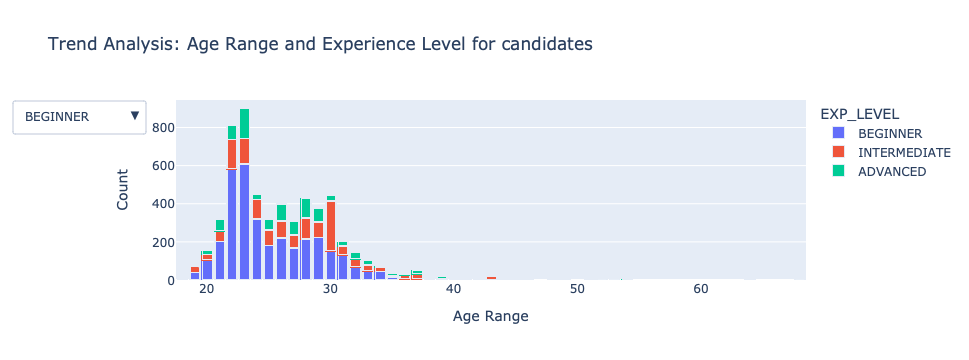

In [228]:
import plotly.graph_objects as go
import plotly.express as px

# Filter out the AGE_RANGE=145
df_filtered = df[df['AGE_RANGE'] != 145]

# Compute the count of each combination
df_count = df_filtered.groupby(['AGE_RANGE', 'EXP_LEVEL']).size().reset_index(name='Count')

# Create a stacked bar chart
fig = px.bar(df_count, x='AGE_RANGE', y='Count', color='EXP_LEVEL',
             title='Trend Analysis: Age Range and Experience Level for candidates',
             labels={'AGE_RANGE': 'Age Range', 'Count': 'Count'},
             category_orders={'AGE_RANGE': ['18-24', '25-34', '35-44', '45-54', '55+']},
             hover_data={'EXP_LEVEL': True, 'Count': ':y'},
             barmode='stack')

# Configure hover text format
fig.update_traces(hovertemplate='Age Range: %{x}<br>' +
                                'Experience Level: %{customdata[0]}<br>' +
                                'Count: %{y}')

# Add dropdown menu to select experience levels
buttons = []
for level in df_count['EXP_LEVEL'].unique():
    visible = [True if l == level else False for l in df_count['EXP_LEVEL']]
    buttons.append(dict(label=level,
                        method='update',
                        args=[{'visible': visible}, {'title': f'Trend Analysis: Age Range and Experience Level - {level}'}]))

updatemenus = [{'active': 0, 'buttons': buttons}]

fig.update_layout(updatemenus=updatemenus)

# Show the figure
fig.show()


## Determine trends in experience and skills for these target users.
Bar chart to show the top 10 most common experiences and skills:

In [229]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
import numpy as np

# Remove null, empty, and whitespace values from EXP_COMPANY column
cleaned_df = df[df['EXP_COMPANY'].notnull() & (df['EXP_COMPANY'].str.strip() != '')]

# Sort COUNTRY_CODE values in alphabetical order
country_codes_sorted = sorted(cleaned_df['COUNTRY_CODE'].unique())

# Define a function to update the bar chart and print top skills and experiences based on the selected country
def update_chart(country_code):
    filtered_df = df[df['COUNTRY_CODE'] == country_code]

    # Top 10 most common experiences (excluding null values and empty/whitespace titles)
    filtered_experiences = filtered_df['EXP_TITLE'].dropna().str.strip().replace('', np.nan)
    top_experiences = filtered_experiences.value_counts().nlargest(10)

    # Define custom colors for each bar based on the country
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'cyan']

    plt.figure(figsize=(12, 6))
    top_experiences.plot(kind='bar', color=colors)
    plt.title(f'Top 10 Most Common Experiences - {country_code}')
    plt.xlabel('Experience Title')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    add_hover_text(top_experiences)
    plt.show()

    # Top 10 most common skills (excluding null values and empty/whitespace skills)
    filtered_skills = filtered_df['SKILL'].dropna().str.strip().replace('', np.nan)
    top_skills = filtered_skills.value_counts().nlargest(10)

    plt.figure(figsize=(12, 6))
    top_skills.plot(kind='bar', color=colors)
    plt.title(f'Top 10 Most Common Skills - {country_code}')
    plt.xlabel('Skill')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    add_hover_text(top_skills)  # Add hover text with counts
    plt.show()

    # Print top skills and experiences in tabular format
    top_skills_df = pd.DataFrame({'Skill': top_skills.index, 'Count': top_skills.values})
    top_experiences_df = pd.DataFrame({'Experience': top_experiences.index, 'Count': top_experiences.values})
    print('Top 10 Most Common Skills:')
    print(top_skills_df.to_string(index=False))
    print('\nTop 10 Most Common Experiences:')
    print(top_experiences_df.to_string(index=False))

def add_hover_text(series):
    # Add hover text with counts
    for i, count in enumerate(series.values):
        if not pd.isnull(count):
            plt.text(i, count, str(count), ha='center', va='bottom')

# Dropdown menu for country selection
country_dropdown = widgets.Dropdown(
    options=country_codes_sorted,
    value=country_codes_sorted[0],
    description='Country:',
    layout=widgets.Layout(width='200px')
)

# Use interact to dynamically update the chart based on the selected country
interact(update_chart, country_code=country_dropdown)


interactive(children=(Dropdown(description='Country:', layout=Layout(width='200px'), options=('AE', 'AI', 'AL'…

<function __main__.update_chart(country_code)>

## What are the three industries that the majority of CoverQuick's users apply to ?

In [230]:
# Remove null, empty, and whitespace values from EXP_COMPANY column
cleaned_df = df[df['EXP_COMPANY'].notnull() & (df['EXP_COMPANY'].str.strip() != '')]

# Count the occurrences of each experience title
experience_counts = cleaned_df['EXP_COMPANY'].value_counts()

# Get the top three experience titles with the highest counts
top_industries = experience_counts.nlargest(3)

# Print the top three industries
print("Top Three Industries:")
print(top_industries)


Top Three Industries:
GIFTS JUST FOR YOU                           194
LIVINGSTONIA SYNOD AIDS PROGRAMME (LISAP)    163
EDMONTON FIRE RESCUE                         159
Name: EXP_COMPANY, dtype: int64


In [231]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Remove null, empty, and whitespace values from EXP_COMPANY column
cleaned_df = df[df['EXP_COMPANY'].notnull() & (df['EXP_COMPANY'].str.strip() != '')]

# Define a function to update the bar chart based on the selected country
def update_chart(country_code):
    # Filter the data based on the selected country code
    filtered_df = cleaned_df[cleaned_df['COUNTRY_CODE'] == country_code]

    # Count the occurrences of each experience title
    experience_counts = filtered_df['EXP_COMPANY'].value_counts()

    # Get the top three experience titles with the highest counts
    top_industries = experience_counts.nlargest(3)

    # Generate custom colors for each bar
    colors = ['blue', 'green', 'red']

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    ax = top_industries.plot(kind='bar', color=colors)

    # Add counts to the bars
    for i, count in enumerate(top_industries.values):
        ax.text(i, count, str(count), ha='center', va='bottom')

    plt.title(f'Top Three Industries - {country_code}')
    plt.xlabel('Industry')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Dropdown menu for country selection
country_dropdown = widgets.Dropdown(
    options=cleaned_df['COUNTRY_CODE'].unique(),
    value=cleaned_df['COUNTRY_CODE'].unique()[0],
    description='Country:',
    layout=widgets.Layout(width='200px')
)

# Use interact to dynamically update the chart based on the selected country
interact(update_chart, country_code=country_dropdown)


interactive(children=(Dropdown(description='Country:', layout=Layout(width='200px'), options=('US', 'DE', 'GB'…

<function __main__.update_chart(country_code)>

## Discover trends in demographics and find which industries yield the best and the worst resumes (CoverQuick provides metrics for defining a "Good" resume). 

Data Safety
The identities including the name, email, phone number, Linkedin, GitHub and personal website
has been removed from each of the rows to ensure the privacy of our users. Students will still
have access to the location data listed on each resume (city, state, country). As the data we've
provided contains sensitive user data, please be cautious about who this information is shared
with.

Resume Optimality Criteria
--------------------------

The following can be used to determine the quality of a resume:

● Important Sections
This may include and not be limited to: work experience, education, projects, as
the most important and relevant sections.

● Resume Length
The solid resume length may be between 300-500 words, however; if the length
is outside this range, it may not mean a resume is poor.

● Use of action verbs
Direct use of action verbs in the bullets of a resume will ensure a resume will
perform better.

● No use of pronouns
Resumes should not contain pronouns such as I, we or me written in the
document.

● Excessive bullet points
A resume experience or section should not have an excessive number of bullet
points. If a section has over 10 bullet points, it is looked upon unfavourably.

● Spelling Mistakes
A resume with spelling errors is immediately penalized against.

● Excessive sentence or bullet length


In [232]:
df.columns

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'ROLE', 'CITY', 'STATE', 'SUMMARY',
       'ACCOMPLISHMENTS', 'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL',
       'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_RANGE', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_LOCATION', 'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION',
       'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION', 'PRJ_LINK',
       'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE', 'PRJ_STARTDATE',
       'PRJ_DESCRIPTION', 'REF_NAME', 'REF_EMAIL', 'REF_PHONENUMBER',
       'REF_RELATIONSHIP', 'PBL_DATE', 'PBL_LINK', 'PBL_NAME', 'PBL_DETAILS',
       'PBL_PUBLISHER', 'CRT_NAME', 'CRT_ISSUER', 'CRT_DATERECEIVED',
       'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DATERECEIVED',
       'AWD_DESCRIPTION', 'EXP_DURATION', 'EXP_LEVEL'],
      dtype=

## RESUME LENGTH

#### This code iterates over the specified columns and counts the total number of words. The word count is then added as a new column 'RES_LEN' to the DataFrame. Finally, the word count is mapped to 'POOR' if it's below 300 and 'GOOD' if it's greater than or equal to 300.

In [233]:
resume_data= df

In [234]:
# List of columns to consider for word count
columns_to_count = ['ROLE', 'SUMMARY', 'ACCOMPLISHMENTS', 'EDU_AWARDS', 'EDU_PROGRAM', 'EDU_COURSEWORK',
                    'SKILL', 'SKILL_DESCRIPTION', 'VLNTR_TITLE', 'VLNTR_ORGANIZATION', 'VLNTR_DESCRIPTION',
                    'EXP_TITLE', 'EXP_COMPANY', 'EXP_DESCRIPTION', 'EXP_DURATION', 'PRJ_LINK',
                    'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_DESCRIPTION', 'REF_NAME', 'REF_EMAIL',
                    'REF_RELATIONSHIP', 'PBL_NAME', 'PBL_DETAILS', 'PBL_PUBLISHER', 'CRT_NAME',
                    'CRT_ISSUER', 'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DESCRIPTION']

# Convert float values to strings in the specified columns
resume_data[columns_to_count] = resume_data[columns_to_count].astype(str)

# Counting the words in the specified columns and creating a new column 'RES_LEN'
resume_data['RES_LEN'] = resume_data[columns_to_count].apply(lambda x: ' '.join(x).split(), axis=1).apply(len)

# Mapping the word count to 'POOR' or 'GOOD' based on the condition
#resume_data['RES_LEN'] = resume_data['RES_LEN'].apply(lambda x: 'POOR' if x < 300 else 'GOOD')


# Displaying the updated DataFrame
display(resume_data)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ...  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...   
...                                                  ...  ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...   
11972                 FACEBOOK LIVE, TWITCH, OBS, XSPLIT  ...   
11973                                                nan  ...   
11974          

In [235]:
print('\n\033[1mRES_LEN Non-Null and Null Count:\n' + '='*34+ '\033[0m')
# Count the total number of values in COUNTRY_CODE column
total_count = len(resume_data['RES_LEN'])

# Count the number of non-null values in COUNTRY_CODE column
non_null_count = resume_data['RES_LEN'].count()

# Count the number of null values in COUNTRY_CODE column
null_count = resume_data['RES_LEN'].isna().sum()

data = {'Total Count': [total_count], 'Non-Null Count': [non_null_count], 'Null Count': [null_count]}
df_counts = pd.DataFrame(data)
print(df_counts)


RES_LEN Non-Null and Null Count:
   Total Count  Non-Null Count  Null Count
0        11976           11976           0


## ACTION VERBS

In [236]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# Download necessary NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abidikshit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abidikshit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abidikshit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abidikshit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [237]:
actn_vrb = resume_data
# List of columns to consider for action verb count
columns_to_count = ['SUMMARY', 'ACCOMPLISHMENTS', 'EDU_AWARDS', 'EDU_COURSEWORK',
                    'SKILL', 'SKILL_DESCRIPTION', 'VLNTR_TITLE', 'VLNTR_ORGANIZATION', 'VLNTR_DESCRIPTION',
                    'EXP_COMPANY', 'EXP_DESCRIPTION', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_DESCRIPTION',
                    'PBL_DETAILS', 'PBL_PUBLISHER', 'CRT_NAME', 'CRT_ISSUER',
                    'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DESCRIPTION']

# Function to check if a word is an action verb using WordNet
def is_action_verb(word):
    synsets = wordnet.synsets(word, pos=wordnet.VERB)
    return len(synsets) > 0

# Function to count the number of action verbs in a text
def count_action_verbs(text):
    tokens = word_tokenize(text.lower())
    stopwords_set = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords_set]
    count = sum(1 for token in tokens if is_action_verb(token))
    return count

# Counting the action verbs in the specified columns and creating a new column 'ACTN_VERB'
actn_vrb['ACTN_VERB'] = actn_vrb[columns_to_count].apply(lambda x: x.apply(count_action_verbs).sum(), axis=1)

# Displaying the updated DataFrame
display(actn_vrb)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ...  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...   
...                                                  ...  ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...   
11972                 FACEBOOK LIVE, TWITCH, OBS, XSPLIT  ...   
11973                                                nan  ...   
11974          

In [238]:
print('\n\033[1mACTN_VERB Non-Null and Null Count:\n' + '='*34+ '\033[0m')
# Count the total number of values in COUNTRY_CODE column
total_count = len(actn_vrb['ACTN_VERB'])

# Count the number of non-null values in COUNTRY_CODE column
non_null_count = actn_vrb['ACTN_VERB'].count()

# Count the number of null values in COUNTRY_CODE column
null_count = actn_vrb['ACTN_VERB'].isna().sum()

data = {'Total Count': [total_count], 'Non-Null Count': [non_null_count], 'Null Count': [null_count]}
df_counts = pd.DataFrame(data)
print(df_counts)


ACTN_VERB Non-Null and Null Count:
   Total Count  Non-Null Count  Null Count
0        11976           11976           0


In [239]:
# Count the occurrences in ACTN_VERB column
count = actn_vrb['ACTN_VERB'].value_counts()

# Display the count
print(count)

36     358
48     331
0      292
38     279
37     269
      ... 
251      1
185      1
174      1
178      1
190      1
Name: ACTN_VERB, Length: 179, dtype: int64


### SPELLING MISTAKES

In [240]:
splng_mstk = actn_vrb

In [241]:
!pip install spellchecker

In [242]:
import pandas as pd
from spellchecker import SpellChecker

# Initialize the spell checker
spell_checker = SpellChecker()

# Columns to check for spelling mistakes
columns = ['ROLE', 'CITY', 'STATE', 'SUMMARY', 'ACCOMPLISHMENTS', 'SKILL_DESCRIPTION', 'SKILL', 'EDU_MINOR',
           'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_LOCATION', 'EDU_COURSEWORK', 'VLNTR_TITLE',
           'VLNTR_LOCATION', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY',
           'EXP_LOCATION', 'EXP_DESCRIPTION', 'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_DESCRIPTION',
           'REF_NAME', 'REF_EMAIL', 'REF_RELATIONSHIP', 'PBL_LINK', 'PBL_NAME', 'PBL_DETAILS',
           'PBL_PUBLISHER', 'CRT_NAME', 'CRT_ISSUER', 'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DESCRIPTION']

# Function to count misspelled words in a text
def count_misspelled_words(text):
    words = text.split()
    misspelled_words = [word for word in words if word.lower() not in spell_checker]
    return len(misspelled_words)

# Calculate spelling mistake counts for each column
for column in columns:
    splng_mstk[column] = splng_mstk[column].fillna('').astype(str)
    splng_mstk['SPLNG_MSTK'] = splng_mstk[column].apply(count_misspelled_words)

# Display the updated dataframe
display(splng_mstk)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ...      AWD_NAME  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...           nan   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...           nan   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...   DEAN'S LIST   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...           nan   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...           nan   
...                                                  ...  ...           ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...           nan   
11972                 FACEBOOK LI

In [243]:
print('\n\033[1mSPLNG_MSTK Non-Null and Null Count:\n' + '='*34+ '\033[0m')
# Count the total number of values in COUNTRY_CODE column
total_count = len(splng_mstk['SPLNG_MSTK'])

# Count the number of non-null values in COUNTRY_CODE column
non_null_count = splng_mstk['SPLNG_MSTK'].count()

# Count the number of null values in COUNTRY_CODE column
null_count = splng_mstk['SPLNG_MSTK'].isna().sum()

data = {'Total Count': [total_count], 'Non-Null Count': [non_null_count], 'Null Count': [null_count]}
df_counts = pd.DataFrame(data)
print(df_counts)


SPLNG_MSTK Non-Null and Null Count:
   Total Count  Non-Null Count  Null Count
0        11976           11976           0


In [244]:
splng_mstk.SPLNG_MSTK.unique()

array([ 1,  0,  2, 24,  9,  3,  5,  4])

### To check what words are stored in SpellChecker module

In [245]:
from spellchecker import SpellChecker

spell_checker = SpellChecker()

# Get the set of words in the spell checker library
words = spell_checker.word_frequency.words()

# Print the words
for word in words:
    display(word)


'a'

'aardvark'

'ab'

'aback'

'abacus'

'abalone'

'abandon'

'abandoned'

'abandoning'

'abandonment'

'abandons'

'abase'

'abased'

'abate'

'abated'

'abatement'

'abates'

'abattoir'

'abba'

'abbas'

'abbess'

'abbey'

"abbey's"

'abbeys'

'abbie'

'abbies'

'abbot'

"abbot's"

'abbots'

'abbott'

"abbott's"

'abbreviate'

'abbreviated'

'abbreviation'

'abbreviations'

'abby'

"abby's"

'abc'

'abdal'

'abdicate'

'abdicated'

'abdicating'

'abdication'

'abdomen'

"abdomen's"

'abdomens'

'abdominal'

'abdominals'

'abduct'

'abducted'

'abductee'

'abductees'

'abducting'

'abduction'

'abductions'

'abductor'

"abductor's"

'abductors'

'abducts'

'abdul'

'abdullah'

'abe'

"abe's"

'abed'

'abel'

"abel's"

'aber'

'aberdeen'

'aberrant'

'aberration'

'aberrations'

'abet'

'abetted'

'abetting'

'abeyance'

'abhor'

'abhorred'

'abhorrence'

'abhorrent'

'abhors'

'abi'

'abide'

'abided'

'abides'

'abideth'

'abiding'

'abig'

'abigail'

"abigail's"

'abilities'

'ability'

"ability's"

'abit'

'abject'

'abjure'

'abjured'

'ablation'

'ablative'

'ablaze'

'able'

'ablest'

'ableto'

'ablution'

'ablutions'

'ably'

'abnegation'

'abner'

'abnormal'

'abnormalities'

'abnormality'

'abnormally'

'abnormals'

'abo'

'aboard'

'abode'

'abolish'

'abolished'

'abolishes'

'abolishing'

'abolishment'

'abolition'

'abolitionist'

'abolitionists'

'abominable'

'abominably'

'abomination'

'abominations'

'aboot'

'aboriginal'

'aboriginals'

'aborigine'

'aborigines'

'abort'

'aborted'

'aborting'

'abortion'

"abortion's"

'abortionist'

'abortions'

'abortive'

'abot'

'abou'

'abound'

'abounded'

'abounding'

'abounds'

'abour'

'about'

'above'

'abra'

'abracabadbra'

'abracadabra'

'abraded'

'abraham'

'abrasion'

'abrasions'

'abrasive'

'abreast'

'abridged'

'abridging'

'abroad'

'abrupt'

'abruption'

'abruptly'

'abs'

'abscess'

'abscessed'

'abscesses'

'abscond'

'absconded'

'absconding'

'abseil'

'absence'

'absences'

'absent'

'absentee'

'absenteeism'

'absentees'

'absentia'

'absentminded'

'absinthe'

'absolute'

'absolutely'

'absolutes'

'absolution'

'absolve'

'absolved'

'absolves'

'absolving'

'absolvo'

'absorb'

'absorbed'

'absorbent'

'absorber'

'absorbers'

'absorbing'

'absorbs'

'absorption'

'abstain'

'abstained'

'abstaining'

'abstemious'

'abstention'

'abstinence'

'abstinent'

'abstract'

'abstracted'

'abstraction'

'abstractions'

'abstracts'

'absurd'

'absurdities'

'absurdity'

'absurdly'

'abt'

'abu'

'abuela'

"abuela's"

'abuelita'

"abuelita's"

'abundance'

'abundant'

'abundantly'

'abuse'

'abused'

'abuser'

'abusers'

'abuses'

'abusing'

'abusive'

'abut'

'abuts'

'abutting'

'abuzz'

'abysmal'

'abysmally'

'abyss'

'abyssal'

'abyssinian'

'ac'

'acacia'

'academia'

'academic'

'academically'

'academician'

'academics'

'academies'

'academy'

"academy's"

'acai'

'acanthus'

'acapulco'

'accede'

'acceded'

'accelerant'

'accelerants'

'accelerate'

'accelerated'

'accelerates'

'accelerating'

'acceleration'

'accelerator'

"accelerator's"

'accelerators'

'accent'

"accent's"

'accented'

'accents'

'accentuate'

'accentuated'

'accentuates'

'accentuating'

'accept'

'acceptable'

'acceptance'

'acceptances'

'accepted'

'accepting'

'accepts'

'acces'

'access'

'accessed'

'accesses'

'accessibility'

'accessible'

'accessing'

'accession'

'accessories'

'accessorize'

'accessory'

'accident'

"accident's"

'accidental'

'accidentally'

'accidents'

'acclaim'

'acclaimed'

'acclamation'

'acclimate'

'acclimated'

'acclimating'

'acclimatize'

'accolade'

'accolades'

'accommodate'

'accommodated'

'accommodates'

'accommodating'

'accommodation'

'accommodations'

'accompanied'

'accompanies'

'accompaniment'

'accompanist'

'accompany'

'accompanying'

'accomplice'

"accomplice's"

'accomplices'

'accomplish'

'accomplished'

'accomplishes'

'accomplishing'

'accomplishment'

'accomplishments'

'accord'

'accordance'

'accorded'

'according'

'accordingly'

'accordingto'

'accordion'

'accords'

'accost'

'accosted'

'accosting'

'account'

"account's"

'accountability'

'accountable'

'accountancy'

'accountant'

"accountant's"

'accountants'

'accounted'

'accounting'

'accounts'

'accoutrements'

'accreditation'

'accredited'

'accretion'

'accrual'

'accrue'

'accrued'

'accruing'

'acctually'

'accumulate'

'accumulated'

'accumulates'

'accumulating'

'accumulation'

'accumulations'

'accumulative'

'accumulator'

'accuracy'

'accurate'

'accurately'

'accursed'

'accusation'

'accusations'

'accusatory'

'accuse'

'accused'

"accused's"

'accuser'

'accusers'

'accuses'

'accusing'

'accustom'

'accustomed'

'ace'

'aced'

'acerbic'

'acerca'

'aces'

'acetaminophen'

'acetate'

'acetic'

'acetone'

'acetylcholine'

'acetylene'

'acetylsalicylic'

'aceveda'

'ach'

'ache'

'ached'

'aches'

'achievable'

'achieve'

'achieved'

'achievement'

'achievements'

'achiever'

'achievers'

'achieves'

'achieving'

'achilles'

'achim'

'aching'

'achingly'

'achy'

'acid'

"acid's"

'acidic'

'acidity'

'acidophilus'

'acidosis'

'acidotic'

'acids'

'acing'

'ack'

'acknowledge'

'acknowledged'

'acknowledgement'

'acknowledges'

'acknowledging'

'acknowledgment'

'acme'

'acne'

"acne's"

'acolyte'

"acolyte's"

'acolytes'

'aconite'

'acorn'

'acorns'

'acosta'

'acouple'

'acoustic'

'acoustical'

'acoustics'

'acquaint'

'acquaintance'

'acquaintances'

'acquaintanceship'

'acquainted'

'acquainting'

'acquiesce'

'acquiesced'

'acquiescence'

'acquire'

'acquired'

'acquires'

'acquiring'

'acquisition'

'acquisitions'

'acquisitive'

'acquit'

'acquits'

'acquittal'

'acquitted'

'acquitting'

'acre'

'acreage'

'acres'

'acrid'

'acrimonious'

'acrimony'

'acrobat'

'acrobatic'

'acrobatics'

'acrobats'

'acronym'

'acronyms'

'acrophobia'

'across'

'acrylic'

'act'

"act's"

'acted'

'actin'

'acting'

"acting's"

'action'

"action's"

'actionable'

'actions'

'activate'

'activated'

'activates'

'activating'

'activation'

'activator'

'active'

'actively'

'actives'

'activism'

'activist'

'activists'

'activities'

'activity'

"activity's"

'actor'

"actor's"

'actors'

'actress'

"actress's"

'actresses'

'acts'

'actual'

'actuality'

'actualization'

'actualize'

'actuall'

'actually'

'actuals'

'actuarial'

'actuary'

'actuation'

'actuator'

'actuators'

'actully'

'acuity'

'acumen'

'acupoint'

'acupressure'

'acupuncture'

'acupuncturist'

'acute'

'acutely'

'ad'

"ad's"

'ada'

'adage'

'adagio'

'adalah'

'adalind'

'adam'

"adam's"

'adama'

'adamant'

'adamantium'

'adamantly'

'adams'

'adapt'

'adaptability'

'adaptable'

'adaptation'

'adaptations'

'adapted'

'adapter'

'adapters'

'adapting'

'adaptive'

'adaptor'

'adapts'

'add'

'addams'

'added'

'addendum'

'adder'

'adderall'

'adders'

'addict'

"addict's"

'addicted'

'addicting'

'addiction'

"addiction's"

'addictions'

'addictive'

'addicts'

'addie'

'adding'

'addison'

"addison's"

'addition'

'additional'

'additionally'

'additions'

'additive'

'additives'

'addled'

'addlepated'

'addons'

'address'

'addressed'

'addressee'

'addresses'

'addressing'

'adds'

'ade'

'adelaide'

'adele'

'adenoi'

'adenoidal'

'adenoids'

'adenoma'

'adenosine'

'adept'

'adepts'

'adequate'

'adequately'

'adhere'

'adhered'

'adherence'

'adherent'

'adherents'

'adheres'

'adhering'

'adhesion'

'adhesions'

'adhesive'

'adi'

'adidas'

'adieu'

'adios'

'adipocere'

'adipose'

'aditi'

'aditya'

'adjacent'

'adjective'

'adjectives'

'adjoining'

'adjoins'

'adjourn'

'adjourned'

'adjourning'

'adjournment'

'adjudged'

'adjudicate'

'adjudicated'

'adjudication'

'adjudicator'

'adjunct'

'adjure'

'adjust'

'adjustable'

'adjusted'

'adjuster'

'adjusters'

'adjusting'

'adjustment'

'adjustments'

'adjusts'

'adjutant'

'adjutants'

'adlabs'

'admin'

'administer'

'administered'

'administering'

'administers'

'administrate'

'administrated'

'administration'

"administration's"

'administrations'

'administrative'

'administrator'

"administrator's"

'administrators'

'admins'

'admirable'

'admirably'

'admiral'

"admiral's"

'admirals'

'admiralty'

'admiration'

'admire'

'admired'

'admirer'

'admirers'

'admires'

'admiring'

'admissibility'

'admissible'

'admission'

'admissions'

'admit'

'admits'

'admittance'

'admitted'

'admittedly'

'admitting'

'admixture'

'admonish'

'admonished'

'admonishing'

'admonition'

'admonitions'

'ado'

'adobe'

'adolescence'

'adolescent'

'adolescents'

'adolf'

'adonai'

'adonis'

'adopt'

'adopted'

'adopting'

'adoption'

"adoption's"

'adoptions'

'adoptive'

'adopts'

'adorable'

'adorably'

'adoration'

'adore'

'adored'

'adores'

'adoring'

'adoringly'

'adorn'

'adorned'

'adorning'

'adornment'

'adornments'

'adorns'

'adout'

'adrenal'

'adrenalin'

'adrenaline'

"adrenaline's"

'adrenals'

'adrian'

"adrian's"

'adriana'

'adrianna'

'adrienne'

'adrift'

'adroit'

'adroitly'

'ads'

'adulation'

'adult'

"adult's"

'adulterate'

'adulterated'

'adulterer'

'adulterers'

'adulteress'

'adulterous'

'adultery'

'adulthood'

'adults'

'adv'

'advance'

'advanced'

'advancement'

'advancements'

'advances'

'advancing'

'advantage'

'advantaged'

'advantageous'

'advantages'

'advent'

'adventure'

"adventure's"

'adventurer'

'adventurers'

'adventures'

'adventuresome'

'adventuress'

'adventuring'

'adventurous'

'adverb'

'adverbs'

'adversarial'

'adversaries'

'adversary'

"adversary's"

'adverse'

'adversely'

'adversities'

'adversity'

'advert'

'advertise'

'advertised'

'advertisement'

'advertisements'

'advertiser'

'advertisers'

'advertises'

'advertising'

'adverts'

'advice'

'advices'

'advisable'

'advise'

'advised'

'advisement'

'adviser'

"adviser's"

'advisers'

'advises'

'advising'

'advisor'

"advisor's"

'advisories'

'advisors'

'advisory'

'advocaat'

'advocacy'

'advocate'

"advocate's"

'advocated'

'advocates'

'advocating'

'ady'

'ae'

'aegis'

'aegon'

'aeons'

'aer'

'aerate'

'aerated'

'aeria'

'aerial'

'aerials'

'aerie'

'aero'

'aerobatic'

'aerobic'

'aerobics'

'aerodrome'

'aerodynamic'

'aerodynamically'

'aerodynamics'

'aeronautical'

'aeronautics'

'aeroplane'

'aeroplanes'

'aerosol'

'aerosolize'

'aerosolized'

'aerosols'

'aerospace'

'aeru'

'aeryn'

'aesthetic'

'aesthetically'

'aesthetics'

'aet'

'aeternam'

'aeternum'

'aether'

'af'

'afar'

'afe'

'afeard'

'afeared'

'afer'

'afew'

'aff'

'affability'

'affable'

'affair'

"affair's"

'affaire'

'affaires'

'affairs'

'affairwith'

'affect'

'affectation'

'affected'

'affecting'

'affection'

'affectionate'

'affectionately'

'affections'

'affective'

'affects'

'affer'

'affidavit'

'affidavits'

'affiliate'

'affiliated'

'affiliates'

'affiliation'

'affiliations'

'affinities'

'affinity'

'affirm'

'affirmation'

'affirmations'

'affirmative'

'affirmatively'

'affirmed'

'affirming'

'affirms'

'affix'

'affixed'

'affixing'

'afflict'

'afflicted'

'afflicting'

'affliction'

'afflictions'

'afflicts'

'affluence'

'affluent'

'afford'

'affordable'

'afforded'

'affording'

'affords'

'affraid'

'affray'

'affright'

'affront'

'affronted'

'affronts'

'afghan'

'afghani'

'afghanistan'

'afghans'

'aficionado'

'aficionados'

'afield'

'afire'

'afis'

'aflame'

'afloat'

'aflutter'

'afoot'

'afore'

'aforementioned'

'aforesaid'

'aforethought'

'afoul'

'afr'

'afraid'

'afresh'

'afriad'

'africa'

"africa's"

'african'

'africano'

'africans'

'afriend'

'afrikaans'

'afro'

'aft'

'afte'

'after'

'afucking'

'afureru'

'ag'

'aga'

'agai'

'again'

'against'

'againts'

'agama'

'agar'

'agassi'

'agate'

'agatha'

'agave'

'age'

"age's"

'aged'

'ageing'

'ageism'

'ageless'

'agencies'

'agency'

"agency's"

'agenda'

"agenda's"

'agendas'

'agent'

"agent's"

'agenting'

'agents'

'ages'

'agg'

'aggravate'

'aggravated'

'aggravates'

'aggravating'

'aggravation'

'aggregate'

'aggregation'

'aggression'

'aggressions'

'aggressive'

'aggressively'

'aggressiveness'

'aggressor'

'aggressors'

'aggrieved'

'aggro'

'agh'

'agha'

'aghast'

'agile'

'agility'

'aging'

'agitate'

'agitated'

'agitates'

'agitating'

'agitation'

'agitator'

'agitators'

'aglow'

'agnate'

'agnes'

'agnese'

'agnostic'

'ago'

'agog'

'agonal'

'agonies'

'agonised'

'agonising'

'agonize'

'agonized'

'agonizing'

'agonizingly'

'agony'

'agood'

'agora'

'agoraphobia'

'agoraphobic'

'agos'

'agra'

'agrarian'

'agreat'

'agree'

'agreeable'

'agreeably'

'agreed'

'agreeing'

'agreement'

"agreement's"

'agreements'

'agrees'

'agrestic'

'agribusiness'

'agricultural'

'agriculture'

'agro'

'agronomist'

'aground'

'agua'

'ague'

'aguilar'

'aguilera'

'agus'

'ah'

'aha'

'ahab'

'ahah'

'ahead'

'ahem'

'ahi'

'ahim'

'ahjumma'

'ahjummas'

'ahjusshi'

'ahjussi'

'ahmad'

'ahmed'

'ahn'

'ahold'

'ahora'

'ahout'

'ahoy'

'ahsoka'

'ai'

'aid'

"aid's"

'aida'

"aida's"

'aidan'

'aide'

"aide's"

'aided'

'aiden'

"aiden's"

'aides'

'aiding'

'aids'

'aii'

"aiin't"

'aikido'

'aiko'

'ail'

'ailed'

'aileen'

'ailing'

'ailment'

'ailments'

'ails'

'aim'

"aim's"

'aime'

'aimed'

'aimee'

'aiming'

'aimless'

'aimlessly'

'aims'

'ain'

"ain't"

'ainee'

'aingt'

'aint'

'aioli'

'air'

"air'll"

"air's"

'airbag'

'airbags'

'airbase'

'airbender'

'airbenders'

'airbending'

'airboat'

'airborne'

'airbrush'

'airbrushed'

'airbrushing'

'airburst'

'aircraft'

"aircraft's"

'airdrop'

'aired'

'aires'

'airfare'

'airfield'

'airfields'

'airflow'

'airforce'

'airframe'

'airfreight'

'airhead'

'airheads'

'airing'

'airless'

'airlift'

'airlifted'

'airlifting'

'airlifts'

'airline'

"airline's"

'airliner'

'airliners'

'airlines'

'airlock'

"airlock's"

'airlocks'

'airmail'

'airman'

'airmen'

'airplane'

"airplane's"

'airplanes'

'airplay'

'airponics'

'airport'

"airport's"

'airports'

'airs'

'airship'

'airships'

'airsick'

'airspace'

'airspeed'

'airstream'

'airstrike'

'airstrikes'

'airstrip'

"airstrip's"

'airstrips'

'airtight'

'airtime'

'airwaves'

'airway'

"airway's"

'airways'

'airy'

'aisha'

'aisle'

'aisles'

'ait'

'aitsu'

'aj'

'ajar'

'ajay'

'ajerk'

'ajj'

'ajob'

'ajoint'

'ajoke'

'ajolly'

'ajourney'

'ajudge'

'ajumma'

'ajunior'

'ajury'

'ajussi'

'ak'

'aka'

'akan'

'akash'

'akashic'

'akbar'

'ake'

'akers'

'aketa'

'aki'

'akin'

'aking'

'akira'

'akkadian'

'ako'

'akrennian'

'aks'

'aku'

'al'

"al's"

'ala'

'alabama'

'alabaster'

'alacrity'

'aladdin'

'alai'

'alaikum'

'alain'

'alamo'

'alan'

"alan's"

'alana'

'alans'

'alaric'

'alarm'

"alarm's"

'alarmed'

'alarming'

'alarmingly'

'alarmist'

'alarms'

'alarum'

'alarums'

'alas'

'alaska'

'alaskan'

'alaskans'

'alaykum'

'alba'

'albacore'

'albanian'

'albanians'

'albans'

'albany'

'albatross'

'albatrosses'

'albeit'

'albert'

"albert's"

'alberto'

'albino'

'albinos'

'albright'

'album'

"album's"

'albumin'

'albums'

'albuquerque'

'albus'

'albuterol'

'alcalde'

'alchemical'

'alchemist'

"alchemist's"

'alchemists'

'alchemy'

"alchemy's"

'alcide'

'alcides'

'alcohol'

"alcohol's"

'alcoholic'

"alcoholic's"

'alcoholics'

'alcoholism'

'alcove'

'alcoves'

'aldeans'

'alden'

'alder'

'alderman'

"alderman's"

'aldermen'

'aldo'

'aldous'

'ale'

'alec'

'aleck'

'alefbeys'

'alefo'

'alegria'

'alehouse'

'aleikum'

'alejandro'

'alert'

"alert's"

'alerted'

'alerting'

'alertly'

'alertness'

'alerts'

'ales'

'alessandro'

'alethiometer'

'aleutian'

'aleutians'

'alex'

"alex's"

'alexa'

'alexander'

"alexander's"

'alexandra'

'alexandria'

'alexandrian'

'alexei'

'alexis'

'aleykum'

'alf'

"alf's"

'alfa'

'alfalfa'

'alfie'

'alfonso'

'alfred'

"alfred's"

'alfredo'

'alfresco'

'algae'

'algal'

'algebra'

'algebraic'

'algeria'

'algerian'

'algerians'

'algiers'

'alginate'

'algo'

'algorithm'

"algorithm's"

'algorithmic'

'algorithms'

'alguien'

'ali'

"ali's"

'alia'

'alias'

'aliases'

'alibi'

"alibi'd"

"alibi's"

'alibied'

'alibis'

'alice'

"alice's"

'alicia'

"alicia's"

'alien'

"alien's"

'alienate'

'alienated'

'alienates'

'alienating'

'alienation'

'alienist'

'aliens'

'aligators'

'alight'

'alighted'

'alighting'

'alights'

'align'

'aligned'

'aligning'

'alignment'

'alignments'

'aligns'

'alike'

'alimentary'

'alimony'

'alina'

'alison'

"alison's"

'alistair'

'alittle'

'alive'

"alive's"

'alk'

'alka'

'alkali'

'alkaline'

'alkaloid'

'alkaloids'

'alkie'

'alky'

'alkylating'

'all'

"all's"

'alla'

'allah'

"allah's"

'allahu'

'allan'

"allan's"

'allay'

'allaying'

'alle'

'allegation'

'allegations'

'allege'

'alleged'

'allegedly'

'alleges'

'allegiance'

'allegiances'

'alleging'

'allegorical'

'allegories'

'allegory'

'allegra'

'allegro'

'allein'

'allele'

'alleles'

'alleluia'

'allemande'

'allen'

"allen's"

'aller'

'allergen'

'allergens'

'allergic'

'allergies'

'allergist'

'allergy'

'alles'

'alleviate'

'alleviated'

'alleviates'

'alleviating'

'alley'

"alley's"

'alleys'

'alleyway'

'alleyways'

'allez'

'alli'

'alliance'

'alliances'

'allie'

'allied'

'allies'

'alligator'

"alligator's"

'alligators'

'allinol'

'allison'

"allison's"

'alliteration'

'alliterative'

'alljust'

'alll'

'allo'

'allocate'

'allocated'

'allocating'

'allocation'

'allocations'

'allons'

'allot'

'allotment'

'allotments'

'allotted'

'allover'

'allow'

'allowable'

'allowance'

'allowances'

'allowed'

'allowing'

'allows'

'alloy'

'alloys'

'allright'

'alls'

'allthe'

'allude'

'alluded'

'alludes'

'alluding'

'allure'

'alluring'

'allusion'

'allusions'

'alluvial'

'allways'

'ally'

"ally's"

'allying'

'allyou'

'alma'

'almanac'

'almeida'

"almeida's"

'almighty'

'almond'

'almonds'

'almost'

'alms'

'alo'

'aloe'

'aloft'

'aloha'

'alone'

"alone's"

'aloneness'

'along'

'alongside'

'alongwith'

'alonzo'

'aloo'

'aloof'

'alopecia'

'alors'

'alotof'

'aloud'

'alpaca'

'alpacas'

'alpha'

"alpha's"

'alphabet'

'alphabetic'

'alphabetical'

'alphabetically'

'alphabetize'

'alphabetized'

'alphabetizing'

'alphabets'

'alphanumeric'

'alphas'

'alphonse'

'alpine'

'alps'

'alr'

'alread'

'already'

'alright'

'alrighty'

'alrite'

'als'

'alsatian'

'also'

'alt'

'alta'

'altair'

'altar'

'altars'

'alte'

'alter'

'alterans'

'alteration'

'alterations'

'altercation'

'altercations'

'altered'

'altering'

'alternate'

'alternated'

'alternately'

'alternates'

'alternating'

'alternation'

'alternative'

'alternatively'

'alternatives'

'alternator'

"alternator's"

'alters'

'although'

'altimeter'

'altitude'

"altitude's"

'altitudes'

'alto'

'altogether'

'alton'

'altos'

'altruism'

'altruistic'

'alum'

'aluminium'

'aluminum'

'alumni'

'alumnus'

'alums'

'alvarez'

'alveolar'

'alveoli'

'alvers'

'alvin'

'alwa'

'alwavs'

'alway'

'always'

'alyssa'

"alzheimer's"

'am'

'ama'

'amador'

'amalgam'

'amalgamated'

'amalgamation'

'aman'

'amanda'

"amanda's"

'amanuensis'

'amar'

'amaretto'

'amariss'

'amass'

'amassed'

'amassing'

'amateur'

"amateur's"

'amateurish'

'amateurism'

'amateurs'

'amaze'

'amazed'

'amazement'

'amazes'

'amazing'

'amazingly'

'amazon'

'amazonian'

'amazons'

'ambassador'

"ambassador's"

'ambassadorial'

'ambassadors'

'ambassadorship'

'amber'

"amber's"

'ambered'

'ambergris'

'ambiance'

'ambidextrous'

'ambience'

'ambient'

'ambiguities'

'ambiguity'

'ambiguous'

'ambiguously'

'ambition'

"ambition's"

'ambitions'

'ambitious'

'ambivalence'

'ambivalent'

'amble'

'ambled'

'ambling'

'ambo'

'ambos'

'ambrose'

'ambrosia'

'ambrosial'

'ambu'

'ambulance'

'ambulances'

'ambulatory'

'ambush'

'ambushed'

'ambushes'

'ambushing'

"amc's"

'amd'

'ame'

'amelia'

"amelia's"

'ameliorate'

'amen'

'amenable'

'amend'

'amended'

'amending'

'amendment'

"amendment's"

'amendments'

'amends'

'amenities'

'amenity'

'america'

"america's"

'american'

'americana'

'americano'

'americanos'

'americans'

'americas'

'ames'

'amethyst'

'amethysts'

'ami'

'amiable'

'amicable'

'amicably'

'amicus'

'amid'

'amidst'

'amiga'

'amigo'

'amigos'

'amily'

'amin'

'amino'

'amiodarone'

'amir'

"amir's"

'amis'

'amish'

'amiss'

'amit'

'amitabha'

'amity'

'ammen'

'ammeter'

'ammo'

"ammo's"

'ammonia'

'ammonites'

'ammonium'

'ammunition'

'ammunitions'

'amn'

'amnesia'

'amnesiac'

'amnesty'

'amnexus'

'amnio'

'amniocentesis'

'amniotic'

'amo'

'amoeba'

'amoebas'

'amoebic'

'amok'

'amol'

'amon'

'among'

'amongst'

'amor'

'amoral'

'amore'

'amores'

'amorous'

'amorphous'

'amortize'

'amortized'

'amos'

'amount'

'amounted'

'amounting'

'amounts'

'amour'

'amoureux'

'amours'

'amoxicillin'

'amp'

'amped'

'amperage'

'amphetamine'

'amphetamines'

'amphibian'

'amphibians'

'amphibious'

'amphitheater'

'amphitheatre'

'amphora'

'amphorae'

'amphoras'

'amphotericin'

'amping'

'ample'

'amplification'

'amplified'

'amplifier'

'amplifiers'

'amplifies'

'amplify'

'amplifying'

'amplitude'

'amply'

'ampoule'

'ampoules'

'amps'

'ampule'

'amputate'

'amputated'

'amputating'

'amputation'

'amputations'

'amputee'

'amputees'

'ams'

'amsterdam'

'amuck'

'amulet'

"amulet's"

'amulets'

'amuse'

'amused'

'amusement'

'amusements'

'amuses'

'amusing'

'amusingly'

'amy'

"amy's"

'amygdala'

'amyl'

'amylase'

'amyloid'

'amyloidosis'

'amytal'

'an'

"an'd"

"an't"

'ana'

"ana's"

'anabolic'

'anachronistic'

'anaconda'

'anacondas'

'anaemia'

'anaemic'

'anaerobic'

'anaesthesia'

'anaesthesiologist'

'anaesthetic'

'anaesthetics'

'anaesthetise'

'anaesthetised'

'anaesthetist'

'anagram'

'anagrams'

'anal'

'analgesic'

'anally'

'analog'

'analogies'

'analogizing'

'analogous'

'analogue'

'analogy'

'anals'

'analyse'

'analysed'

'analyser'

'analyses'

'analysing'

'analysis'

'analyst'

"analyst's"

'analysts'

'analytic'

'analytical'

'analytics'

'analyze'

'analyzed'

'analyzer'

'analyzes'

'analyzing'

'anamorphic'

'anand'

'anane'

'anaphylactic'

'anaphylaxis'

'anarchic'

'anarchism'

'anarchist'

'anarchists'

'anarchy'

'anastasia'

'anastomosis'

'anata'

'anathema'

'anatolian'

'anatoly'

'anatomic'

'anatomical'

'anatomically'

'anatomist'

'anatomy'

'ancestor'

"ancestor's"

'ancestors'

'ancestral'

'ancestry'

'anchor'

"anchor's"

'anchorage'

'anchored'

'anchoring'

'anchorman'

'anchors'

'anchorwoman'

'anchovies'

'anchovy'

'ancient'

'ancients'

'ancillary'

'ancl'

'ancora'

'and'

'anda'

'andall'

'andals'

'andalusia'

'andalusian'

'andday'

'anders'

'anderson'

"anderson's"

'andersons'

'andes'

'andget'

'andhe'

'andhis'

'andi'

'andiamo'

'andie'

'andit'

'andjoin'

'andjust'

'andl'

'andlor'

'ando'

'andorian'

'andorians'

'andouille'

'andras'

'andre'

"andre's"

'andrea'

"andrea's"

'andreas'

'andrei'

'andres'

'andrew'

"andrew's"

'andrews'

'andrian'

'androgynous'

'android'

"android's"

'androids'

'andromeda'

'ands'

'andso'

'andtake'

'andthat'

'andthe'

'andthen'

'andthenwe'

'andthisis'

'andwe'

'andwhat'

'andy'

"andy's"

'andyou'

"andyou're"

'andyour'

'ane'

'anecdotal'

'anecdote'

'anecdotes'

'anemia'

'anemic'

'anemone'

'anemones'

'anesthesia'

"anesthesia's"

'anesthesiologist'

'anesthesiology'

'anesthetic'

'anesthetics'

'anesthetist'

'anesthetize'

'anesthetized'

'aneurism'

'aneurysm'

'aneurysms'

'anew'

'anf'

'ang'

'ange'

'angel'

"angel's"

'angela'

"angela's"

'angeles'

'angelic'

'angelica'

'angelina'

'angelo'

"angelo's"

'angels'

'angelus'

'anger'

"anger's"

'angered'

'angering'

'angers'

'angie'

"angie's"

'angina'

'angio'

'angiogram'

'angioplasty'

'angle'

"angle's"

'angled'

'angler'

'anglers'

'angles'

'anglican'

'angling'

'anglo'

'angora'

'angrier'

'angriest'

'angrily'

'angry'

'angst'

'angsty'

'anguish'

'anguished'

'angular'

'angus'

'angy'

'anh'

'anhydrous'

'ani'

'aniline'

'anima'

'animal'

"animal's"

'animalistic'

'animals'

'animam'

'animate'

'animated'

'animates'

'animating'

'animation'

'animations'

'animator'

'animators'

'animatronic'

'animatronics'

'anime'

'animosities'

'animosity'

'animus'

'anise'

'aniseed'

'anita'

"anita's"

'anjali'

'ank'

'ankh'

'ankle'

"ankle's"

'ankles'

'anklet'

'anklets'

'anma'

'ann'

"ann's"

'anna'

"anna's"

'annabel'

'annabelle'

"annabelle's"

'annabeth'

'annalise'

'annals'

'annan'

'annas'

'annd'

'anne'

"anne's"

'annette'

'annex'

'annexation'

'annexe'

'annexed'

'annexing'

'annie'

"annie's"

'annihilate'

'annihilated'

'annihilates'

'annihilating'

'annihilation'

'annika'

'anniversaries'

'anniversary'

"anniversary's"

'anno'

'annointest'

'annotated'

'announce'

'announced'

'announcement'

"announcement's"

'announcements'

'announcer'

"announcer's"

'announcers'

'announces'

'announcing'

'annoy'

'annoyance'

'annoyances'

'annoyed'

'annoying'

'annoyingly'

'annoys'

'annual'

'annually'

'annuity'

'annul'

'annular'

'annulled'

'annulment'

'annulments'

'annum'

'ano'

'anod'

'anodyne'

'anoint'

'anointed'

'anointest'

'anointing'

'anoints'

'anomalies'

'anomalous'

'anomaly'

"anomaly's"

'anon'

'anonymity'

'anonymized'

'anonymous'

'anonymously'

'anorak'

'anorexia'

'anorexic'

'anothe'

'another'

"another's"

'anotherjob'

'ans'

'ansel'

'ansible'

'answer'

"answer's"

'answerable'

'answered'

'answering'

'answerphone'

'answers'

'answerthe'

'answerto'

'ant'

"ant's"

'antacid'

'antacids'

'antagonise'

'antagonising'

'antagonism'

'antagonist'

'antagonistic'

'antagonists'

'antagonize'

'antagonized'

'antagonizing'

'antarctic'

'antarctica'

'antares'

'ante'

'anteater'

'antebellum'

'antecedent'

'antecedents'

'antechamber'

'antecubital'

'anted'

'antelope'

'antelopes'

'antemortem'

'antenatal'

'antenna'

"antenna's"

'antennae'

'antennas'

'anterior'

'anterograde'

'anteroom'

'antes'

'anthem'

'anthems'

'anther'

'anthill'

'anthing'

'anthology'

'anthony'

"anthony's"

'anthracite'

'anthrax'

'anthro'

'anthrocytes'

'anthropic'

'anthropological'

'anthropologically'

'anthropologist'

'anthropologists'

'anthropology'

'anthropomorphic'

'anthropomorphization'

'anthropomorphize'

'anti'

'antiaircraft'

'antianxiety'

'antibacterial'

'antibiotic'

'antibiotics'

'antibodies'

'antibody'

'antic'

'antichrist'

'anticipate'

'anticipated'

'anticipates'

'anticipating'

'anticipation'

'anticipatory'

'anticoagulant'

'anticoagulants'

'antics'

'antidepressant'

'antidepressants'

'antidote'

"antidote's"

'antidotes'

'antifascist'

'antifreeze'

'antifungal'

'antigen'

'antigens'

'antigovernment'

'antigrav'

'antigravity'

'antihistamine'

'antihistamines'

'antimatter'

'antimissile'

'antimony'

'antioxidants'

'antipasto'

'antipathy'

'antipersonnel'

'antiperspirant'

'antiproton'

'antipsychotic'

'antipsychotics'

'antiquarian'

'antiquated'

'antique'

'antiques'

'antiquing'

'antiquities'

'antiquity'

"antiquity's"

'antirejection'

'antiseptic'

'antiserum'

'antislavery'

'antismoking'

'antisocial'

'antitank'

'antiterrorism'

'antiterrorist'

'antitheft'

'antithesis'

'antithetical'

'antitoxin'

'antitrust'

'antivenin'

'antivenom'

'antiviral'

'antivirals'

'antivirus'

'antiwar'

'antler'

'antlers'

'antoine'

"antoine's"

'antoinette'

'anton'

"anton's"

'antonia'

'antonio'

"antonio's"

'antony'

'ants'

'antsy'

'antwon'

'antwone'

'anu'

'anubis'

'anus'

'anuses'

'anv'

'anvil'

'anvils'

'anvthing'

'anwar'

'anxieties'

'anxiety'

'anxious'

'anxiously'

'any'

'anya'

'anybody'

"anybody'd"

"anybody'll"

"anybody's"

'anyhing'

'anyhow'

'anymor'

'anymore'

'anyon'

'anyone'

"anyone'd"

"anyone'll"

"anyone's"

'anyones'

'anyplace'

'anypony'

'anyth'

'anythi'

'anythin'

'anything'

"anything'll"

"anything's"

'anythingabout'

'anythings'

'anythingto'

'anytime'

'anyting'

'anyway'

'anyways'

'anywhere'

"anywhere's"

'anywheres'

'anyzhing'

'ao'

'aoi'

'aorion'

'aorta'

"aorta's"

'aortic'

'aot'

'aound'

'aout'

'ap'

'apa'

'apache'

'apaches'

'apana'

'apart'

'apartheid'

'apartment'

"apartment's"

'apartments'

'apathetic'

'apathy'

'apb'

'ape'

"ape's"

'apelike'

'aperire'

'aperitif'

'aperitifs'

'aperture'

'apes'

'apeshit'

'apex'

'aphasia'

'aphid'

'aphids'

'aphrodisiac'

'aphrodisiacs'

'apiary'

'apiece'

'aping'

'apitoxin'

'aplace'

'aplastic'

'aplenty'

'apnea'

'apo'

'apocalypse'

'apocalyptic'

'apocryphal'

'apogee'

'apolitical'

'apollo'

'apollonian'

'apologetic'

'apologies'

'apologise'

'apologised'

'apologises'

'apologising'

'apologist'

'apologize'

'apologized'

'apologizes'

'apologizing'

'apology'

"apology's"

'apophis'

'apoplectic'

'apoplexy'

'apostate'

'apostatize'

'apostle'

'apostles'

'apostolic'

'apostrophe'

'apothecary'

"apothecary's"

'apotheosis'

'app'

'appa'

'appal'

'appalachian'

'appall'

'appalled'

'appalling'

'appallingly'

'appalls'

'appals'

'apparate'

'apparatus'

'apparel'

'apparent'

'apparently'

'apparition'

'apparitions'

'appeal'

"appeal's"

'appealed'

'appealing'

'appeals'

'appear'

'appearance'

"appearance's"

'appearances'

'appeared'

'appeareth'

'appearing'

'appears'

'appease'

'appeased'

'appeasement'

'appeases'

'appeasing'

'appellant'

'appellate'

'appellation'

'appendage'

'appendages'

'appendectomy'

'appended'

'appendicitis'

'appendix'

'appertaining'

'appetising'

'appetit'

'appetite'

"appetite's"

'appetites'

'appetizer'

'appetizers'

'appetizing'

'appian'

'applaud'

'applauded'

'applauding'

'applauds'

'applause'

'apple'

"apple's"

'applejack'

'apples'

'applesauce'

'appletini'

'appliance'

'appliances'

'applicable'

'applicant'

"applicant's"

'applicants'

'application'

"application's"

'applications'

'applicator'

'applied'

'applies'

'apply'

'applying'

'appoint'

'appointed'

'appointee'

'appointees'

'appointing'

'appointment'

"appointment's"

'appointments'

'appoints'

'appologize'

'apportion'

'apportioned'

'appr'

'appraisal'

'appraisals'

'appraise'

'appraised'

'appraiser'

'appraisers'

'appraising'

'appreciable'

'appreciate'

'appreciated'

'appreciates'

'appreciating'

'appreciation'

'appreciative'

'apprehend'

'apprehended'

'apprehending'

'apprehension'

'apprehensions'

'apprehensive'

'apprentice'

"apprentice's"

'apprenticed'

'apprentices'

'apprenticeship'

'apprenticing'

'apprise'

'apprised'

'approach'

'approachable'

'approached'

'approaches'

'approaching'

'approbation'

'appropriate'

'appropriated'

'appropriately'

'appropriating'

'appropriation'

'appropriations'

'approval'

'approvals'

'approve'

'approved'

'approves'

'approving'

'approximate'

'approximated'

'approximately'

'approximates'

'approximating'

'approximation'

'apps'

'appy'

'apreciate'

'apres'

'apricot'

'apricots'

'april'

"april's"

'apron'

'aprons'

'apropos'

'apt'

'aptitude'

'aptly'

'apu'

'aqua'

'aquaman'

'aquamarine'

'aquarium'

'aquariums'

'aquarius'

'aquatic'

'aquatics'

'aqueduct'

'aqueducts'

'aqueous'

'aqui'

'aquifer'

'aquifers'

'aquiline'

'ar'

'ara'

'arab'

'arabesque'

'arabia'

'arabian'

'arabians'

'arabic'

'arable'

'arabs'

'arachnid'

'arachnids'

'arachnoid'

'aram'

'arbiter'

'arbiters'

'arbitrage'

'arbitrarily'

'arbitrary'

'arbitrate'

'arbitration'

'arbitrator'

'arbor'

'arboreal'

'arboretum'

'arc'

'arcade'

'arcades'

'arcadia'

'arcadian'

'arcadians'

'arcana'

'arcane'

'arced'

'arch'

'archaeological'

'archaeologist'

'archaeologists'

'archaeology'

'archaic'

'archangel'

'archangels'

'archbishop'

"archbishop's"

'archdeacon'

'archdiocese'

'archduke'

'arched'

'archenemy'

'archeological'

'archeologist'

'archeologists'

'archeology'

'archer'

"archer's"

'archers'

'archery'

'arches'

'archetypal'

'archetype'

'archetypes'

'archibald'

'archie'

"archie's"

'archies'

'archimedes'

'arching'

'archipelago'

'architect'

"architect's"

'architects'

'architectural'

'architecturally'

'architecture'

'archival'

'archive'

'archived'

'archives'

'archiving'

'archivist'

'archrival'

'archway'

'archways'

'arcing'

'arcs'

'arctic'

'arcturian'

'ard'

'ardennes'

'ardent'

'ardently'

'ardor'

'ardour'

'arduous'

'are'

"are'nt"

'area'

"area's"

'areal'

'areas'

'arejust'

'aren'

"aren't"

"aren'tyou"

'arena'

"arena's"

'arenas'

'arent'

'areola'

'arer'

'arert'

'ares'

'arethe'

'arewe'

'areyou'

'arf'

'argent'

'argentina'

'argentine'

'argentinean'

'argentineans'

'argentines'

'argentinian'

'argentinians'

'argh'

'argon'

'arguable'

'arguably'

'argue'

'argued'

'argues'

'arguing'

'argument'

"argument's"

'argumentative'

'arguments'

'argus'

'argyle'

'arhd'

'ari'

"ari's"

'aria'

'arial'

'arian'

'arias'

'arid'

'ariel'

"ariel's"

'aries'

'arif'

'arigato'

'aright'

'arigon'

'arirang'

'arisan'

'arise'

'arisen'

'arises'

'arising'

'aristocracy'

'aristocrat'

"aristocrat's"

'aristocratic'

'aristocrats'

'aristophanes'

'aristotelian'

'aristotle'

'arithmetic'

'arizona'

'arjgp'

'arjun'

'ark'

'arkady'

'arkansas'

'arkham'

'arks'

'arktech'

'arlene'

'arlington'

'arliss'

'arlo'

'arm'

"arm's"

'arma'

'armaan'

'armada'

"armada's"

'armadas'

'armadillo'

"armadillo's"

'armadillos'

'armageddon'

'armament'

'armaments'

'armand'

'armando'

'armani'

'armature'

'armband'

'armbands'

'armchair'

'armchairs'

'armed'

'armen'

'armenian'

'armenians'

'armful'

'armies'

'arming'

'armistice'

'armitage'

'armless'

'armoire'

'armor'

"armor's"

'armored'

'armorer'

'armories'

'armors'

'armory'

"armory's"

'armour'

"armour's"

'armoured'

'armoury'

'armpit'

'armpits'

'armrest'

'arms'

'armstrong'

'army'

"army's"

'arn'

"arn't"

'arnd'

'arne'

'arnica'

'arnie'

'arnold'

"arnold's"

'arns'

'aroma'

'aromas'

'aromatherapy'

'aromatic'

'aron'

'arose'

'arou'

'aroun'

'around'

"around's"

'aroundand'

'aroundthe'

'aroung'

'arousal'

'arouse'

'aroused'

'arouses'

'arousing'

'arpeggio'

'arpeggios'

'arquillian'

'arquillians'

'arr'

'arrack'

'arraign'

'arraigned'

'arraigning'

'arraignment'

"arraignment's"

'arraignments'

'arrakis'

'arrange'

'arranged'

'arrangement'

"arrangement's"

'arrangements'

'arranger'

'arranges'

'arranging'

'arrant'

'arras'

'array'

"array's"

'arrayed'

'arrays'

'arrears'

'arrest'

'arrested'

'arrestees'

'arresting'

'arrests'

'arrhythmia'

'arrhythmias'

'arrhythmic'

'arriba'

'arrival'

'arrivals'

'arrive'

'arrived'

'arrivederci'

'arrives'

'arriving'

'arrogance'

'arrogant'

'arrogantly'

'arrondissement'

'arrow'

"arrow's"

'arrowhead'

'arrowheads'

'arrowroot'

'arrows'

'arroyo'

'arroz'

'ars'

'arse'

'arsed'

'arsehole'

'arseholed'

'arseholes'

'arsenal'

'arsenals'

'arsenic'

'arses'

'arshad'

'arsing'

'arson'

'arsonist'

"arsonist's"

'arsonists'

'arsons'

'art'

"art's"

'artefact'

'artefacts'

'artemis'

'arterial'

'arteries'

'arteriovenous'

'artery'

"artery's"

'artesian'

'artful'

'artfully'

'arthritic'

'arthritis'

'arthropods'

'arthur'

"arthur's"

'arthurian'

'artic'

'artichoke'

'artichokes'

'article'

"article's"

'articles'

'articular'

'articulate'

'articulated'

'articulates'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'bads'

'badshah'

'bae'

'baedal'

'baek'

'baffle'

'baffled'

'baffles'

'baffling'

'bag'

"bag's"

'bagel'

'bagels'

'bagful'

'baggage'

'bagged'

'bagger'

'baggie'

'baggies'

'bagging'

'baggins'

'bagginses'

'baggy'

'baghdad'

'bagman'

'bagmen'

'bagpipe'

'bagpipes'

'bagpiping'

'bags'

'bagsy'

'baguette'

'baguettes'

'bah'

'bahamas'

'bahamian'

'baht'

'bahubali'

'bai'

'bail'

"bail's"

'bailar'

'bailed'

'bailey'

"bailey's"

'bailies'

'bailiff'

"bailiff's"

'bailiffs'

'bailing'

'bailiwick'

'bailout'

'bailouts'

'bails'

'bain'

'baines'

'bairn'

'bairns'

'bait'

"bait's"

'baited'

'baitfish'

'baiting'

'baits'

'baize'

'baja'

'bajake'

'bajillion'

'bajor'

'bajoran'

'bajorans'

'bajrangi'

'bak'

'baka'

'bakari'

'bake'

'baked'

'baker'

"baker's"

'bakeries'

'bakers'

'bakersfield'

'bakery'

"bakery's"

'bakes'

'baking'

'baklava'

'bal'

'bala'

'balaclava'

'balalaika'

'balance'

'balanced'

'balances'

'balancing'

'balboa'

'balconies'

'balcony'

"balcony's"

'bald'

'balder'

'baldheaded'

'baldie'

'baldies'

'balding'

'baldness'

'baldwin'

'baldy'

'bale'

'baled'

'baleen'

'baleful'

'bales'

'bali'

'balian'

'balinese'

'baling'

'balk'

'balkan'

'balkans'

'balked'

'balks'

'ball'

"ball's"

'ballad'

'ballads'

'ballard'

'ballast'

'balle'

'balled'

'baller'

'ballerina'

"ballerina's"

'ballerinas'

'ballers'

'ballet'

"ballet's"

'ballets'

'ballgame'

'balling'

'ballistas'

'ballistic'

'ballistics'

'balloon'

"balloon's"

'ballooned'

'ballooning'

'balloonist'

'balloons'

'ballot'

'balloting'

'ballots'

'ballpark'

'ballplayer'

'ballplayers'

'ballpoint'

'ballroom'

'ballrooms'

'balls'

'ballsed'

'ballsiest'

'ballsy'

'bally'

'ballyhoo'

'balm'

'balmy'

'baloney'

'baloo'

'balsa'

'balsam'

'balsamic'

'baltic'

'baltimore'

'balustrade'

'bam'

'bama'

'bamba'

'bambi'

'bambina'

'bambino'

'bamboo'

'bamboos'

'bamboozle'

'bamboozled'

'bamboozling'

'ban'

'bana'

'banal'

'banality'

'banana'

"banana's"

'bananas'

'banco'

'band'

"band's"

'banda'

'bandage'

'bandaged'

'bandages'

'bandaging'

'bandaid'

'bandana'

'bandanas'

'bandanna'

'bandannas'

'banded'

'bandidos'

'bandied'

'banding'

'bandit'

"bandit's"

'banditos'

'banditry'

'bandits'

'bandleader'

'bandmates'

'bands'

'bandstand'

'bandwagon'

'bandwidth'

'bandy'

'bandying'

'bane'

'banelings'

'bang'

"bang's"

'bangalore'

'bangalores'

'banged'

'banger'

"banger's"

'bangers'

'banging'

'bangity'

'bangkok'

'bangle'

'bangles'

'bangs'

'bangtail'

'bani'

'banish'

'banished'

'banishes'

'banishing'

'banishment'

'banister'

'banisters'

'banjo'

'banjos'

'bank'

"bank'll"

"bank's"

'bankable'

'bankbook'

'banked'

'banker'

"banker's"

'bankers'

'banking'

'banknote'

'banknotes'

'bankroll'

'bankrolled'

'bankrolling'

'bankrolls'

'bankrupt'

'bankruptcies'

'bankruptcy'

'bankrupted'

'bankrupting'

'bankrupts'

'banks'

'banned'

'banner'

'bannerman'

'bannermen'

'banners'

'banning'

'bannister'

'banns'

'banque'

'banquet'

"banquet's"

'banqueting'

'banquets'

'bans'

'banshee'

'banshees'

'bantam'

'bantamweight'

'banter'

'bantering'

'bantha'

'banyan'

'banzai'

'bao'

'baobab'

'bap'

'bapa'

'baps'

'baptise'

'baptised'

'baptism'

'baptismal'

'baptisms'

'baptist'

'baptiste'

'baptists'

'baptize'

'baptized'

'baptizes'

'baptizing'

'bapu'

'bar'

"bar's"

'barack'

'barada'

'barb'

'barbara'

"barbara's"

'barbarian'

'barbarians'

'barbaric'

'barbarism'

'barbarity'

'barbarous'

'barbary'

'barbecue'

"barbecue's"

'barbecued'

'barbecues'

'barbecuing'

'barbed'

'barbell'

'barbells'

'barbeque'

'barbequed'

'barbeques'

'barber'

"barber's"

'barbers'

'barbershop'

'barbie'

"barbie's"

'barbies'

'barbiturate'

'barbiturates'

'barbra'

'barbs'

'barbwire'

'barca'

'barcelona'

'barclays'

'barcode'

'barcodes'

'bard'

'bards'

'bare'

'bareback'

'bared'

'barefaced'

'barefoot'

'barefooted'

'barehanded'

'barely'

'barents'

'bares'

'barest'

'barf'

'barfed'

'barfing'

'barflies'

'barfly'

'barfs'

'bargain'

"bargain's"

'bargained'

'bargaining'

'bargains'

'barge'

'barged'

'bargeman'

'barges'

'barging'

'bari'

'baring'

'barings'

'barista'

'baristas'

'baritone'

'barium'

'bark'

"bark's"

'barked'

'barkeep'

'barker'

'barkers'

'barking'

'barks'

'barley'

'barlow'

'barmaid'

"barmaid's"

'barmaids'

'barman'

"barman's"

'barmy'

'barn'

"barn's"

'barnaby'

'barnacle'

'barnacles'

'barnes'

'barney'

"barney's"

'barneys'

'barns'

'barnstorming'

'barnyard'

'barometer'

"barometer's"

'barometric'

'baron'

"baron's"

'baroness'

'baronet'

'baronial'

'barons'

'baroque'

'barque'

'barrack'

'barracks'

'barracuda'

'barracudas'

'barrage'

'barrages'

'barre'

'barred'

'barrel'

"barrel's"

'barreled'

'barrelful'

'barreling'

'barrelled'

'barrelling'

'barrels'

'barren'

'barrens'

'barrett'

'barrette'

'barrettes'

'barricade'

'barricaded'

'barricades'

'barricading'

'barrier'

"barrier's"

'barriers'

'barring'

'barrio'

'barrios'

'barrister'

"barrister's"

'barristers'

'barroom'

'barrooms'

'barrow'

'barrows'

'barry'

"barry's"

'bars'

'barstool'

'bart'

"bart's"

'bartend'

'bartended'

'bartender'

"bartender's"

'bartenders'

'bartending'

'barter'

'bartered'

'bartering'

'barton'

'bartowski'

'baruch'

'baryon'

'barzini'

'bas'

'basal'

'basalt'

'basaltic'

'base'

"base's"

'baseball'

"baseball's"

'baseballs'

'baseboard'

'based'

'baseless'

'baseline'

'basely'

'baseman'

"baseman's"

'basement'

"basement's"

'basements'

'baseness'

'baser'

'bases'

'baseship'

'baseships'

'basest'

'bash'

'bashed'

'basher'

'bashes'

'bashful'

'bashing'

'bashir'

'basho'

'basic'

'basically'

'basics'

'basikalbaru'

'basil'

'basilar'

'basilica'

'basilisk'

'basin'

'basing'

'basins'

'basis'

'bask'

'basked'

'basket'

"basket's"

'basketball'

"basketball's"

'basketballs'

'basketful'

'baskets'

'basking'

'basks'

'basmati'

'basque'

'basques'

'bass'

'basses'

'basset'

'bassinet'

'bassist'

'bassoon'

'basta'

'bastard'

"bastard'll"

"bastard's"

'bastardization'

'bastardized'

'bastards'

'baste'

'basted'

'baster'

'bastian'

'bastille'

'basting'

'bastion'

'bastions'

'bat'

"bat'leth"

"bat's"

'batallion'

'batch'

'batches'

'bate'

'bated'

'bates'

'bath'

"bath's"

'bathe'

'bathed'

'bathers'

'bathes'

'bathhouse'

'bathhouses'

'bathing'

'bathrobe'

'bathrobes'

'bathroom'

"bathroom's"

'bathrooms'

'baths'

'bathtub'

'bathtubs'

'bathwater'

'bathysphere'

'batiatus'

'batista'

'batman'

"batman's"

'baton'

'batons'

'bats'

'batshit'

'batsman'

'batsmen'

'batsu'

'battalion'

"battalion's"

'battalions'

'batted'

'batten'

'battened'

'battening'

'batter'

"batter's"

'battered'

'batteries'

'battering'

'batters'

'battery'

"battery's"

'batting'

'battle'

"battle's"

'battleaxe'

'battled'

'battlefield'

'battlefields'

'battlefront'

'battleground'

'battlegrounds'

'battlements'

'battles'

'battleship'

'battleships'

'battlestar'

'battlestars'

'battling'

'battousai'

'batts'

'batty'

'batwing'

'bau'

'bauble'

'baubles'

'baudelaires'

'bauer'

"bauer's"

'baum'

'bauxite'

'bavarian'

'bavarians'

'bave'

'bawd'

'bawds'

'bawdy'

'bawk'

'bawl'

'bawled'

'bawling'

'bawls'

'baxter'

"baxter's"

'baxters'

'bay'

"bay's"

'bayesian'

'baying'

'baylor'

'baynes'

'bayon'

'bayonet'

'bayoneted'

'bayonets'

'bayou'

'bayous'

'bays'

'bayside'

'baywatch'

'bazaar'

'bazaars'

'bazillion'

'bazooka'

'bazookas'

'be'

"be's"

"be'st"

'bea'

'beable'

'beacause'

'beach'

'beached'

'beaches'

'beachfront'

'beachhead'

'beaching'

'beachside'

'beachy'

'beacon'

"beacon's"

'beacons'

'bead'

'beaded'

'beadier'

'beading'

'beadle'

'beads'

'beady'

'beagle'

'beagles'

'beak'

'beaker'

'beakers'

'beaks'

'beals'

'beam'

"beam's"

'beamed'

'beamen'

'beamer'

'beamers'

'beaming'

'beamish'

'beams'

'bean'

'beanbag'

'beancurd'

'beaned'

'beaner'

'beaners'

'beanie'

'beanpole'

'beans'

'beansie'

'beanstalk'

'bear'

"bear's"

"bear't"

'bearable'

'beard'

"beard's"

'bearded'

'beardless'

'beards'

'beardy'

'beared'

'bearer'

'bearers'

'beareth'

'bearing'

"bearing's"

'bearings'

'bearnaise'

'bears'

'bearskin'

'bearthe'

'beary'

'beast'

"beast's"

'beastie'

'beasties'

'beasting'

'beastly'

'beasts'

'beasty'

'beat'

"beat's"

'beatbox'

'beatboxing'

'beatdown'

'beated'

'beaten'

'beater'

'beaters'

'beatific'

'beating'

'beatings'

'beatles'

'beatnik'

'beatniks'

'beatrice'

'beats'

'beau'

"beau's"

'beaucoup'

'beaumont'

'beaus'

'beause'

'beaut'

'beauteous'

'beautician'

'beauties'

'beautif'

'beautification'

'beautified'

'beautifu'

'beautiful'

'beautifulest'

'beautifull'

'beautifully'

'beautify'

'beautifying'

'beauty'

"beauty's"

'beaux'

'beaver'

"beaver's"

'beavering'

'beavers'

'bebe'

'bebop'

'bec'

'beca'

'becalmed'

'became'

'becareful'

'becau'

'becaus'

'because'

'becausei'

'becauseof'

'becauseyou'

"becauseyou're"

'becca'

"becca's"

'bechamel'

'beck'

"beck's"

'becker'

'beckett'

'beckham'

'beckon'

'beckoned'

'beckoning'

'beckons'

'becks'

'becky'

"becky's"

'become'

'becomea'

'becomes'

'becoming'

'bed'

"bed's"

'bedazzle'

'bedazzled'

'bedazzling'

'bedbug'

'bedbugs'

'bedchamber'

'bedclothes'

'bedded'

'bedding'

'bedeck'

'bedecked'

'bedevil'

'bedeviled'

'bedfellow'

'bedfellows'

'bedford'

'bedlam'

'bedouin'

'bedouins'

'bedpan'

'bedpans'

'bedpost'

'bedraggled'

'bedridden'

'bedrock'

'bedroll'

'bedroom'

"bedroom's"

'bedrooms'

'beds'

'bedsheet'

'bedsheets'

'bedside'

'bedsit'

'bedsores'

'bedspread'

'bedspreads'

'bedsprings'

'bedtime'

'bedtimes'

'bedwetting'

'bee'

"bee's"

'beech'

'beef'

"beef's"

'beefcake'

'beefed'

'beefing'

'beefs'

'beefsteak'

'beefy'

'beehive'

'beehives'

'beekeeper'

'beekeepers'

'beekeeping'

'beeline'

'beem'

'beemers'

'been'

'beena'

'beep'

'beeped'

'beeper'

"beeper's"

'beepers'

'beeping'

'beeps'

'beer'

"beer's"

'beers'

'bees'

'beest'

'beeswax'

'beet'

'beethoven'

"beethoven's"

'beetje'

'beetle'

"beetle's"

'beetles'

'beetroot'

'beets'

'beeves'

'bef'

'befall'

'befallen'

'befalleth'

'befalling'

'befalls'

'befell'

'befit'

'befits'

'befitted'

'befitting'

'befor'

'before'

'beforehand'

'beforei'

'beforeyou'

'befoul'

'befouled'

'befriend'

'befriended'

'befriending'

'befriends'

'befuddled'

'beg'

'began'

'begat'

'beget'

'begets'

'begetting'

'beggar'

"beggar's"

'beggared'

'beggarly'

'beggars'

'begged'

'begging'

'begin'

'beginner'

"beginner's"

'beginners'

'beginning'

"beginning's"

'beginnings'

'begins'

'begone'

'begonias'

'begot'

'begotten'

'begrudge'

'begrudged'

'begrudging'

'begrudgingly'

'begs'

'beguile'

'beguiled'

'beguiling'

'beguine'

'begum'

'begun'

'beh'

'behalf'

'behave'

'behaved'

'behaves'

'behaving'

'behavior'

"behavior's"

'behavioral'

'behaviors'

'behaviour'

"behaviour's"

'behavioural'

'behaviours'

'behead'

'beheaded'

'beheading'

'beheadings'

'beheads'

'beheld'

'behemoth'

'behest'

'behide'

'behind'

'behinds'

'behing'

'behmen'

'behold'

'beholden'

'beholder'

'beholding'

'beholds'

'behoove'

'behooves'

'behove'

'behoves'

'behrooz'

'bei'

'beieve'

'beige'

'beignet'

'beignets'

'beijing'

'beim'

'bein'

'being'

"being's"

'beinga'

'beings'

'beirut'

'bejeezus'

'bejesus'

'bejeweled'

'bejewelled'

'bejust'

'beka'

'bel'

'bela'

'belabor'

'belabour'

'belarusian'

'belated'

'belatedly'

'belay'

'belch'

'belched'

'belches'

'belching'

'beldam'

'beleaguered'

'belfast'

'belfry'

'belgian'

'belgians'

'belgium'

'belgrade'

'belie'

'belied'

'belief'

'beliefs'

'belies'

'believ'

'believable'

'believe'

'believed'

'believein'

'believer'

'believers'

'believes'

'believeth'

'believethat'

'believeyou'

'believing'

'belike'

'belinda'

'belittle'

'belittled'

'belittles'

'belittling'

'belize'

'bell'

"bell's"

'bella'

"bella's"

'belladonna'

'bellamy'

'bellboy'

'bellboys'

'belle'

'belles'

'bellevue'

'bellhop'

"bellhop's"

'bellhops'

'bellicose'

'bellied'

'bellies'

'belligerent'

'bellman'

'bellmen'

'bello'

'bellow'

'bellowed'

'bellowing'

'bellows'

'bells'

'belly'

"belly's"

'bellyache'

'bellyaching'

'bellybutton'

'bellyful'

'belmont'

'belong'

'belonged'

'belonging'

'belongings'

'belongs'

'belore'

'beloved'

"beloved's"

'beloveds'

'below'

'belt'

"belt's"

'belted'

'belter'

'belters'

'belting'

'beltran'

'belts'

'beltway'

'beluga'

'belugas'

'bem'

'bemeen'

'bemoan'

'bemoaning'

'bemused'

'ben'

"ben's"

'benares'

'bench'

'benched'

'benches'

'benching'

'benchmark'

'benchmarks'

'benchwarmer'

'benchwarmers'

'bend'

'bended'

'bender'

"bender's"

'benders'

'bending'

'bendito'

'bends'

'bendy'

'bene'

'beneath'

'benedict'

'benedicta'

'benediction'

'benedictus'

'benefactor'

'benefactors'

'benefactress'

'beneficence'

'beneficent'

'benefices'

'beneficial'

'beneficiaries'

'beneficiary'

'benefit'

"benefit's"

'benefited'

'benefiting'

'benefits'

'benefitted'

'benefitting'

'benes'

'benevolence'

'benevolent'

'bengal'

'bengali'

'benighted'

'benign'

'benjamin'

"benjamin's"

'benjamins'

'benji'

'benjy'

'benn'

'bennet'

'bennett'

"bennett's"

'bennie'

'bennies'

'benning'

'bennings'

'benny'

"benny's"

'benri'

'benson'

'bent'

'benthic'

'bentley'

'bento'

'benton'

'benumbed'

'benz'

'benzene'

'benzodiazepine'

'benzos'

'beowulf'

'bequeath'

'bequeathed'

'bequeathing'

'bequeaths'

'bequest'

'ber'

'berate'

'berated'

'berating'

'bere'

'bereaved'

'bereavement'

'bereft'

'beret'

'berets'

'beretta'

'berg'

'bergen'

'bergens'

'berger'

'bergin'

'bergs'

'beriberi'

'bering'

'berk'

'berkeley'

'berkshires'

'berlin'

"berlin's"

'berliners'

'berm'

'bermuda'

'bernadette'

'bernard'

"bernard's"

'bernardo'

'bernays'

'bernie'

"bernie's"

'berries'

'berry'

'berserk'

'berserker'

'berserkers'

'bert'

"bert's"

'berth'

'bertha'

'berthed'

'berthing'

'berths'

'bertie'

'bertram'

'bertrand'

'beryllium'

'berynium'

'bes'

'beseech'

'beseeched'

'beseeching'

'beset'

'beshrew'

'beside'

'besides'

'besiege'

'besieged'

'besieging'

'besmirch'

'besmirched'

'besmirching'

'beso'

'besoin'

'besotted'

'bespeak'

'bespeaks'

'bespectacled'

'bespoke'

'bess'

'bessie'

'best'

'bested'

'bestest'

'bestial'

'bestiality'

'bestie'

'besties'

'besting'

'bestow'

'bestowed'

'bestowing'

'bestows'

'bestride'

'bestrides'

'bests'

'bestseller'

'bestsellers'

'bestselling'

'bet'

"bet's"

'beta'

'betadine'

'betake'

'betas'

'betcha'

'betel'

'beter'

'beth'

"beth's"

'bethany'

'bethe'

'bethink'

'betide'

'betimes'

'betoken'

'betore'

'betray'

'betrayal'

"betrayal's"

'betrayals'

'betrayed'

'betrayer'

'betrayers'

'betraying'

'betrays'

'betroth'

'betrothal'

'betrothed'

'bets'

'betsey'

'betsy'

"betsy's"

'betta'

'bette'

'betted'

'better'

"better'n"

'bettered'

'betterfor'

'bettering'

'betterjob'

'betterjust'

'betterment'

'betters'

'betterthan'

'betterto'

'betterwatch'

'betterwith'

'betting'

"betting's"

'bettor'

'bettors'

'betty'

"betty's"

'between'

'betwixt'

'betyou'

'beurre'

'bev'

'bevel'

'beveled'

'beveling'

'beverage'

'beverages'

'beverly'

"beverly's"

'bevy'

'beware'

'bewilder'

'bewildered'

'bewildering'

'bewilderment'

'bewilders'

'bewitch'

'bewitched'

'bewitches'

'bewitching'

'bewith'

'bey'

'beyonce'

'beyond'

'beyour'

'bezel'

'bhabhi'

'bhai'

"bhai's"

'bhaiyya'

'bhangra'

'bhanu'

'bhau'

'bhavani'

'bi'

'bian'

'bianca'

"bianca's"

'biannual'

'bias'

'biased'

'biases'

'biatch'

'bib'

'bibi'

'bible'

"bible's"

'bibles'

'biblical'

'biblically'

'bibs'

'bic'

'bicarb'

'bicarbonate'

'bicentennial'

'bicep'

'biceps'

'bichon'

'bicker'

'bickered'

'bickering'

'bicoastal'

'bicuspid'

'bicuspids'

'bicycle'

"bicycle's"

'bicycles'

'bicycling'

'bid'

"bid's"

'bidden'

'bidder'

'bidders'

'biddies'

'bidding'

"bidding's"

'biddy'

'bide'

'bided'

'bides'

'bidet'

'bidets'

'bidi'

'biding'

'bids'

'bieber'

'bien'

'bienvenidos'

'bienvenue'

'bier'

'biff'

'biffed'

'bifida'

'bifocals'

'bifurcated'

'big'

"big's"

'bigamist'

'bigamy'

'bigass'

'bigfoot'

'bigfoots'

'bigger'

'biggering'

'biggerthan'

'biggest'

'biggie'

'biggish'

'biggles'

'bighearted'

'bighorn'

'bigmouth'

'bigness'

'bigot'

'bigoted'

'bigotry'

'bigots'

'bigs'

'bigshot'

'bigtime'

'bigwig'

'bigwigs'

'bij'

'bijou'

'bike'

"bike's"

'biked'

'biker'

"biker's"

'bikers'

'bikes'

'biking'

'bikini'

'bikinis'

'bilal'

'bilateral'

'bilaterally'

'bilbo'

'bile'

'bilge'

'biliary'

'bilingual'

'bilious'

'bilk'

'bilked'

'bilking'

'bill'

"bill's"

'billable'

'billables'

'billabong'

'billboard'

'billboards'

'billed'

'billet'

'billeted'

'billeting'

'billets'

'billfold'

'billiard'

'billiards'

'billie'

'billing'

'billings'

'billion'

'billionaire'

"billionaire's"

'billionaires'

'billions'

'billionth'

'billionths'

'billow'

'billowed'

'billowing'

'billows'

'billowy'

'bills'

'billy'

"billy's"

'biloute'

'bilt'

'bim'

'bimbo'

"bimbo's"

'bimbos'

'bimmy'

'bimonthly'

'bin'

"bin's"

'binary'

'bind'

'binded'

'binder'

'binders'

'bindi'

'binding'

'bindings'

'bindle'

'binds'

'bine'

'bing'

'bingbang'

'binge'

'binged'

'bingeing'

'binges'

'binging'

'bingo'

'binky'

'binned'

'binocular'

'binoculars'

'binomial'

'bins'

'bint'

'bio'

'biochem'

'biochemical'

'biochemically'

'biochemist'

'biochemistry'

'biochemists'

'biochip'

'biodegradable'

'biodiesel'

'biodiversity'

'biodome'

'biodynamic'

'bioelectric'

'bioelectrical'

'bioengineer'

'bioengineered'

'bioengineering'

'biofeedback'

'biofilter'

'biofuel'

'biogenetic'

'biogenic'

'biographer'

'biographical'

'biographies'

'biography'

'biohazard'

'biohazardous'

'biologic'

'biological'

'biologically'

'biologicals'

'biologist'

'biologists'

'biology'

'bioluminescence'

'bioluminescent'

'biomass'

'biomechanical'

'biomechanics'

'biomedical'

'biometric'

'biometrically'

'biometrics'

'biomimetic'

'biomolecular'

'bionic'

'bionics'

'biophysical'

'biopic'

'bioplasmic'

'biopsied'

'biopsies'

'biopsy'

"biopsy's"

'bioroid'

'bioroids'

'bios'

'bioscan'

'biosphere'

'biosynthetic'

'biotech'

'biotechnology'

'bioterror'

'bioterrorism'

'biotoxin'

'bioweapon'

'bioweapons'

'bip'

'bipartisan'

'biped'

'bipedal'

'bipeds'

'biplane'

'bipolar'

'bir'

'biracial'

'birch'

'birches'

'bird'

"bird'll"

"bird's"

'birdbath'

'birdbrain'

'birdcage'

'birder'

'birders'

'birdhouse'

'birdie'

"birdie's"

'birdies'

'birding'

'birdman'

'birds'

'birdseed'

'birdses'

'birdsong'

'birdy'

'biriyani'

'birmingham'

'biro'

'birth'

'birthdate'

'birthday'

"birthday's"

'birthdays'

'birthed'

'birthing'

'birthmark'

'birthmarks'

'birthplace'

'birthrate'

'birthright'

'births'

'biryani'

'bis'

'bisa'

'biscayne'

'biscotti'

'biscuit'

"biscuit's"

'biscuits'

'bisect'

'bisected'

'bisecting'

'bisexual'

'bisexuality'

'bisexuals'

'bish'

'bishop'

"bishop's"

'bishopric'

'bishops'

'bismuth'

'bison'

"bison's"

'bisque'

'bisschen'

'bist'

'bistro'

'bit'

"bit's"

'bitch'

"bitch'll"

"bitch's"

'bitched'

'bitchen'

'bitches'

'bitchier'

'bitching'

'bitchy'

'bitcoin'

'bitcoins'

'bite'

"bite's"

'biter'

'biters'

'bites'

'bitey'

'biting'

'bitof'

'bits'

'bitsy'

'bitte'

'bitten'

'bitter'

'bitterest'

'bitterly'

'bitterness'

'bitters'

'bittersweet'

'bitting'

'bitty'

'bitumen'

'bivens'

'bivouac'

'bivouacked'

'biwa'

'biweekly'

'biz'

'bizarre'

'bizarrely'

'bizarro'

'bjarne'

'bjorn'

'bla'

'blab'

'blabbed'

'blabber'

'blabbered'

'blabbering'

'blabbermouth'

'blabbers'

'blabbing'

'blabs'

'black'

"black's"

'blackamoor'

'blackball'

'blackballed'

'blackballing'

'blackberries'

'blackberry'

'blackbird'

'blackbirds'

'blackboard'

'blackboards'

'blackburn'

'blackcurrant'

'blacked'

'blacken'

'blackened'

'blackening'

'blacker'

'blackest'

'blackface'

'blackfella'

'blackfellas'

'blackfoot'

'blackguard'

'blackguards'

'blackheads'

'blackie'

'blackies'

'blacking'

'blackish'

'blackjack'

'blackleg'

'blacklist'

'blacklisted'

'blackmail'

'blackmailed'

'blackmailer'

"blackmailer's"

'blackmailers'

'blackmailing'

'blackmails'

'blackness'

'blackout'

"blackout's"

'blackouts'

'blacks'

'blacksmith'

"blacksmith's"

'blacksmiths'

'blackstone'

'blackthorn'

'blacktop'

'blackwater'

'blackwood'

'bladder'

"bladder's"

'bladders'

'blade'

"blade's"

'bladed'

'blades'

'blag'

'blaggard'

'blagged'

'blah'

'blaine'

'blair'

"blair's"

'blake'

"blake's"

'blakely'

'blam'

'blame'

"blame's"

'blamed'

'blameless'

'blames'

'blaming'

'blanc'

'blanca'

'blanch'

'blanche'

'blanched'

'blanching'

'blancmange'

'blanco'

'bland'

'blank'

'blanked'

'blanket'

"blanket's"

'blanketed'

'blanketing'

'blankets'

'blankie'

'blanking'

'blankly'

'blanks'

'blare'

'blares'

'blaring'

'blarney'

'blase'

'blaspheme'

'blasphemed'

'blasphemer'

'blasphemers'

'blasphemies'

'blaspheming'

'blasphemous'

'blasphemy'

'blast'

'blasted'

'blaster'

'blasters'

'blastia'

'blasting'

'blasts'

'blat'

'blatant'

'blatantly'

'blatch'

'blather'

'blathering'

'blaze'

'blazed'

'blazer'

'blazers'

'blazes'

'blazing'

'blazon'

'ble'

'bleach'

'bleached'

'bleacher'

'bleachers'

'bleaches'

'bleaching'

'bleak'

'bleaker'

'bleakest'

'bleakness'

'bleary'

'bleat'

'bleating'

'bleats'

'bled'

'bleed'

'bleeder'

'bleeders'

'bleeding'

"bleeding's"

'bleeds'

'bleep'

'bleeped'

'bleeping'

'bleeps'

'blefuscian'

'blemish'

'blemished'

'blemishes'

'blend'

'blended'

'blender'

"blender's"

'blenders'

'blending'

'blends'

'bless'

'blessed'

'blessedly'

'blessedness'

'blesses'

'blesseth'

'blessing'

'blessings'

'blest'

'bleu'

'blew'

'blight'

'blighted'

'blighter'

"blighter's"

'blighters'

'blights'

'blimey'

'blimp'

'blimps'

'blind'

"blind's"

'blinded'

'blinder'

'blinders'

'blindfold'

'blindfolded'

'blindfolding'

'blindfolds'

'blinding'

'blindingly'

'blindly'

"blindman's"

'blindness'

'blinds'

'blindside'

'blindsided'

'blindsides'

'blindsiding'

'bling'

'blinged'

'blink'

'blinked'

'blinker'

'blinkered'

'blinkers'

'blinking'

'blinks'

'blinky'

'blintz'

'blintzes'

'blip'

'blips'

'bliss'

'blissed'

'blissful'

'blissfully'

'blister'

'blistered'

'blistering'

'blisters'

'blithe'

'blithely'

'blithering'

'blitz'

'blitzed'

'blitzes'

'blitzing'

'blitzkrieg'

'blizzard'

"blizzard's"

'blizzards'

'bloat'

'bloated'

'bloater'

'bloating'

'bloats'

'blob'

'blobby'

'blobs'

'bloc'

'block'

"block's"

'blockade'

'blockaded'

'blockades'

'blockading'

'blockage'

'blockages'

'blockbuster'

'blockbusters'

'blocked'

'blocker'

'blockers'

'blockhead'

'blockheaded'

'blockheads'

'blockhouse'

'blocking'

'blocks'

'blog'

'blogged'

'blogger'

'bloggers'

'blogging'

'blogosphere'

'blogs'

'bloke'

"bloke's"

'blokes'

'blomkvist'

'blond'

'blonde'

"blonde's"

'blonder'

'blondes'

'blondie'

"blondie's"

'blondish'

'blonds'

'blood'

"blood'll"

"blood's"

'bloodbath'

'bloodbend'

'bloodbending'

'bloodcurdling'

'blooded'

'bloodhound'

'bloodhounds'

'bloodied'

'bloodier'

'bloodiest'

'blooding'

'bloodless'

'bloodletting'

'bloodline'

'bloodlines'

'bloodlust'

'bloodrider'

'bloods'

'bloodshed'

'bloodshot'

'bloodstain'

'bloodstained'

'bloodstains'

'bloodstream'

'bloodsucker'

'bloodsuckers'

'bloodsucking'

'bloodthirsty'

'bloodwine'

'bloodwork'

'bloody'

'blooey'

'bloom'

'bloomed'

'bloomer'

'bloomers'

'blooming'

'blooms'

'blooper'

'bloopers'

'bloops'

'blossom'

'blossomed'

'blossoming'

'blossoms'

'blot'

'blotch'

'blotches'

'blotchy'

'blots'

'blotted'

'blotter'

'blotting'

'blotto'

'blouse'

'blouses'

'blow'

'blowback'

'blowed'

'blower'

"blower's"

'blowers'

'blowfish'

'blowflies'

'blowfly'

'blowgun'

'blowhard'

'blowhards'

'blowhole'

'blowing'

'blowjob'

'blowjobs'

'blown'

'blowout'

'blows'

'blowtorch'

'blowup'

'blowy'

'blsho'

'blu'

'blub'

'blubber'

'blubbering'

'blubbery'

'blubbing'

'bludgeon'

'bludgeoned'

'bludgeoning'

'bludgeonings'

'bludgeons'

'blue'

"blue's"

'bluebell'

'bluebells'

'blueberries'

'blueberry'

'bluebird'

'bluebirds'

'bluebottle'

'bluefin'

'bluefish'

'bluegrass'

'blueness'

'blueprint'

'blueprints'

'bluer'

'blues'

'bluesman'

'bluest'

'bluestone'

'bluesy'

'bluetooth'

'bluff'

'bluffed'

'bluffer'

'bluffing'

'bluffs'

'bluish'

'blunder'

'blunderbuss'

'blundered'

'blundering'

'blunders'

'blunt'

'blunted'

'bluntly'

'bluntness'

'blunts'

'blur'

'blurb'

'blurred'

'blurring'

'blurry'

'blurs'

'blurt'

'blurted'

'blurting'

'blurts'

'blush'

'blushed'

'blushes'

'blushing'

'bluster'

'blustering'

'blustery'

'blythe'

"blythe's"

'bo'

"bo's"

'boa'

'boar'

"boar's"

'board'

"board's"

'boarded'

'boarder'

'boarders'

'boarding'

'boardinghouse'

'boardroom'

'boardrooms'

'boards'

'boardwalk'

'boars'

'boas'

'boast'

'boasted'

'boastful'

'boasting'

'boasts'

'boat'

"boat's"

'boater'

'boaters'

'boathouse'

'boating'

'boatload'

'boatloads'

'boatman'

"boatman's"

'boatmen'

'boats'

'boatshed'

'boatswain'

"boatswain's"

'boatyard'

'bob'

"bob's"

'boba'

'bobbed'

'bobbi'

'bobbidi'

'bobbies'

'bobbin'

'bobbing'

'bobble'

'bobblehead'

'bobbles'

'bobby'

"bobby's"

'bobcat'

'bobcats'

'bobo'

'bobs'

'bobsled'

'bobsledding'

'bobsleigh'

'bobtail'

'bobtailed'

'bobtails'

'boca'

'bocce'

'bod'

'bodachs'

'bodacious'

'bode'

'bodega'

'bodegas'

'bodes'

'bodhi'

'bodhisattva'

'bodhisattvas'

'bodice'

'bodied'

'bodies'

'bodiless'

'bodily'

'bods'

'body'

"body'll"

"body's"

'bodybuilder'

'bodybuilders'

'bodybuilding'

'bodyguard'

"bodyguard's"

'bodyguarding'

'bodyguards'

'bodysuit'

'bodysurfing'

'bodywork'

'boe'

'boeing'

'boers'

'boeuf'

'boff'

'boffed'

'boffin'

'boffing'

'boffins'

'bofors'

'bog'

'bogard'

'bogart'

'bogarting'

'bogey'

"bogey's"

'bogeyman'

'bogeymen'

'bogeys'

'boggans'

'boggart'

'boggarts'

'bogged'

'bogging'

'boggle'

'boggled'

'boggles'

'boggling'

'boggy'

'bogie'

'bogies'

'bogo'

'bogota'

'bogs'

'bogus'

'bohemian'

'bohemians'

'boho'

'bohunk'

'boi'

'boil'

'boiled'

'boiler'

"boiler's"

'boilerplate'

'boilers'

'boiling'

'boils'

'boing'

'boink'

'boinked'

'boinking'

'bois'

'boisette'

'boisterous'

'bok'

'boko'

'boku'

'bokura'

'bokutachi'

'bold'

'bolder'

'boldest'

'boldly'

'boldness'

'bolero'

'bolian'

'bolin'

'bolivar'

'bolivia'

'bolivian'

'bolivians'

'boll'

'bollard'

'bollix'

'bollixed'

'bollock'

'bollocking'

'bollocks'

'bollocksed'

'bollywood'

'bolo'

'bologna'

'bolognese'

'bolos'

'bolshevik'

'bolsheviks'

'bolster'

'bolstered'

'bolstering'

'bolsters'

'bolt'

"bolt's"

'bolted'

'bolting'

'bolton'

'boltons'

'bolts'

'bolus'

'bom'

'boma'

'bomb'

"bomb's"

'bombad'

'bombard'

'bombarded'

'bombardier'

'bombarding'

'bombardment'

'bombardments'

'bombards'

'bombastic'

'bombay'

'bombe'

'bombed'

'bomber'

"bomber's"

'bombers'

'bombing'

"bombing's"

'bombings'

'bombs'

'bombshell'

'bombshells'

'bombsight'

'bon'

'bona'

'bonafide'

'bonanza'

'bonaparte'

'bonbon'

'bonbons'

'bond'

"bond's"

'bondage'

'bonded'

'bonding'

'bonds'

'bondsman'

'bondsmen'

'bone'

"bone's"

'boned'

'bonehead'

'boneheaded'

'boneheads'

'boneless'

'boner'

'boners'

'bones'

'boney'

'boneyard'

'bonfire'

'bonfires'

'bong'

'bongo'

'bongos'

'bongs'

'bonheur'

'boning'

'bonita'

'bonito'

'bonjour'

'bonk'

'bonked'

'bonkers'

'bonking'

'bonne'

'bonnet'

"bonnet's"

'bonnets'

'bonnie'

"bonnie's"

'bonny'

'bono'

'bonobo'

'bonobos'

'bons'

'bonsai'

'bonus'

'bonuses'

'bony'

'boo'

"boo's"

'boob'

'boobie'

'boobies'

'boobs'

'booby'

'booed'

'booga'

'boogaloo'

'booger'

'boogers'

'boogey'

'boogeyman'

'boogie'

'boogied'

'boogying'

'booing'

'book'

"book'll"

"book's"

'bookcase'

'bookcases'

'booked'

'bookend'

'bookends'

'booker'

'bookie'

"bookie's"

'bookies'

'booking'

'bookings'

'bookish'

'bookkeeper'

"bookkeeper's"

'bookkeepers'

'bookkeeping'

'booklet'

'booklets'

'bookmaker'

'bookmakers'

'bookmaking'

'bookmark'

'bookmarked'

'books'

'bookseller'

'booksellers'

'bookshelf'

'bookshelves'

'bookshop'

'bookshops'

'bookstore'

'bookstores'

'bookworm'

'bookworms'

'boola'

'boom'

'boombox'

'boomed'

'boomer'

'boomerang'

'boomerangs'

'boomers'

'booming'

'booms'

'boomtown'

'boon'

'boondocks'

'boondoggle'

'boone'

'boonies'

'boons'

'boop'

'boor'

'boorish'

'boors'

'boos'

'boost'

'boosted'

'booster'

'boosters'

'boosting'

'boosts'

'boot'

"boot's"

'booted'

'booth'

"booth's"

'booths'

'bootie'

'booties'

'bootiful'

'booting'

'bootleg'

'bootlegged'

'bootlegger'

"bootlegger's"

'bootleggers'

'bootlegging'

'bootlegs'

'bootless'

'boots'

'bootstrap'

'bootstraps'

'booty'

"booty's"

'bootylicious'

'booze'

'boozed'

'boozehound'

'boozer'

'boozers'

'boozes'

'boozing'

'boozy'

'bop'

'bope'

'bopped'

'boppers'

'bopping'

'bora'

'borax'

'bordeaux'

'bordello'

'border'

"border's"

'bordered'

'bordering'

'borderland'

'borderlands'

'borderline'

'borders'

'bore'

'borealis'

'bored'

'boredom'

'borehole'

'bores'

'borg'

'borgia'

'boric'

'boring'

'boringly'

'boris'

'bork'

'born'

'borne'

'borned'

'borogoves'

'boron'

'borough'

'boroughs'

'borrow'

'borrowed'

'borrower'

'borrowers'

'borrowing'

'borrows'

'borsch'

'borscht'

'borstal'

'bosco'

'bosnian'

'bosnians'

'bosom'

'bosoms'

'boson'

'boss'

"boss'll"

"boss's"

'bossa'

'bossed'

'bosses'

'bossing'

'bossman'

'bossy'

'boston'

"boston's"

'bosun'

"bosun's"

'bosworth'

'bot'

"bot's"

'botanic'

'botanical'

'botanist'

'botanists'

'botany'

'botch'

'botched'

'botches'

'botching'

'both'

'bother'

'bothered'

'bothering'

'bothers'

'bothersome'

'botheryou'

'botnet'

'botox'

'bots'

'bottle'

"bottle's"

'bottled'

'bottleneck'

'bottlenecks'

'bottlenose'

'bottles'

'bottling'

'bottom'

"bottom's"

'bottomed'

'bottoming'

'bottomland'

'bottomless'

'bottoms'

'botulinum'

'botulism'

'bou'

'boubours'

'bouche'

'boudin'

'boudoir'

'bougainvillea'

'bough'

'boughs'

'bought'

'bougie'

'bouillabaisse'

'bouillon'

'boulder'

'boulders'

'boule'

'boules'

'boulevard'

'boulevards'

'boum'

'bounce'

'bounced'

'bouncer'

"bouncer's"

'bouncers'

'bounces'

'bouncing'

'bouncy'

'bound'

'boundaries'

'boundary'

'bounded'

'bounden'

'bounder'

'bounding'

'boundless'

'bounds'

'bounteous'

'bounties'

'bountiful'

'bounty'

"bounty's"

'bouquet'

'bouquets'

'bourbon'

"bourbon's"

'bourbons'

'bourgeois'

'bourgeoise'

'bourgeoisie'

'bourguignon'

'bourn'

'bourne'

"bourne's"

'bout'

'bouteille'

'boutique'

'boutiques'

'boutonniere'

'boutonnieres'

'bouts'

'bovine'

'bow'

"bow's"

'bowed'

'bowel'

"bowel's"

'bowels'

'bower'

'bowerbird'

'bowers'

'bowery'

'bowhead'

'bowie'

'bowing'

'bowl'

"bowl's"

'bowled'

'bowlegged'

'bowler'

"bowler's"

'bowlers'

'bowlful'

'bowline'

'bowling'

"bowling's"

'bowls'

'bowman'

'bowmen'

'bows'

'bowstring'

'bowtie'

'box'

"box's"

'boxcar'

'boxcars'

'boxed'

'boxer'

"boxer's"

'boxers'

'boxes'

'boxful'

'boxing'

"boxing's"

'boxtroll'

'boxtrolls'

'boxy'

'boy'

"boy'd"

"boy'll"

"boy's"

'boyar'

'boyars'

'boyce'

'boycott'

'boycotted'

'boycotting'

'boycotts'

'boyd'

"boyd's"

'boyfriend'

"boyfriend'll"

"boyfriend's"

'boyfriends'

'boyhood'

'boyish'

'boyishly'

'boyle'

"boyle's"

'boys'

"boys'll"

'boysenberry'

'boyz'

'bozo'

"bozo's"

'bozos'

'bozxphd'

'bra'

"bra's"

'brace'

'braced'

'bracelet'

"bracelet's"

'bracelets'

'braces'

'brachial'

'bracing'

'bracken'

'bracket'

'bracketed'

'brackets'

'brackish'

'brad'

"brad's"

'braddock'

'bradford'

'bradley'

"bradley's"

'bradstone'

'brady'

"brady's"

'bradying'

'braes'

'brag'

'bragg'

'braggart'

'bragged'

'bragging'

'brags'

'brahma'

'brahmins'

'braid'

'braided'

'braiding'

'braids'

'braille'

'brain'

"brain's"

'brainchild'

'braindead'

'brained'

'brainiac'

'brainiacs'

'brainless'

'brainpower'

'brains'

'brainstem'

'brainstorm'

'brainstormed'

'brainstorming'

'brainwash'

'brainwashed'

'brainwashes'

'brainwashing'

'brainwave'

'brainwaves'

'brainy'

'braise'

'braised'

'braising'

'brake'

"brake's"

'brakebills'

'braked'

'brakes'

'braking'

'bram'

'bramble'

'brambles'

'bran'

'branch'

"branch's"

'branched'

'branches'

'branching'

'brand'

"brand's"

'branded'

'brandi'

'brandied'

'brandies'

'branding'

'brandish'

'brandished'

'brandishing'

'brandon'

"brandon's"

'brands'

'brandt'

'brandy'

"brandy's"

'brane'

'branes'

'brant'

'branzino'

'bras'

'brash'

'brass'

'brasserie'

'brasses'

'brassiere'

'brassieres'

'brassy'

'brat'

"brat's"

'brats'

'bratty'

'bratwurst'

'braun'

'bravado'

'brave'

'braved'

'bravely'

'braver'

'bravery'

'braves'

'bravest'

'braving'

'bravo'

'bravura'

'braw'

'brawl'

'brawla'

'brawler'

'brawlers'

'brawling'

'brawls'

'brawn'

'brawny'

'braxton'

'bray'

'braying'

'brays'

'brazen'

'brazenly'

'brazier'

'braziers'

'brazil'

'brazilian'

'brazilians'

'brazzle'

'bre'

'brea'

'breach'

'breached'

'breaches'

'breaching'

'bread'

"bread's"

'breadbasket'

'breadcrumb'

'breadcrumbs'

'breaded'

'breadfruit'

'breading'

'breads'

'breadstick'

'breadsticks'

'breadth'

'breadwinner'

'break'

"break's"

'breakable'

'breakage'

'breakaway'

'breakdancing'

'breakdown'

'breakdowns'

'breaker'

"breaker's"

'breakers'

'breakfast'

"breakfast's"

'breakfasting'

'breakfasts'

'breaking'

'breakneck'

'breakout'

'breakouts'

'breaks'

'breakthrough'

'breakthroughs'

'breakup'

'breakups'

'breakwater'

'breaky'

'bream'

'breast'

'breastbone'

'breasted'

'breastfed'

'breastfeed'

'breastfeeding'

'breastplate'

'breastplates'

'breasts'

'breaststroke'

'breath'

"breath's"

'breathable'

'breathalyzer'

'breathe'

'breathed'

'breather'

'breathers'

'breathes'

'breathing'

"breathing's"

'breathless'

'breathlessly'

'breaths'

'breathtaking'

'breathtakingly'

'breathy'

'bred'

'bree'

"bree's"

'breech'

'breeched'

'breeches'

'breed'

"breed's"

'breeder'

"breeder's"

'breeders'

'breeding'

'breeds'

'breeze'

'breezed'

'breezes'

'breezeway'

'breezing'

'breezy'

'bremen'

'bremer'

'brenda'

"brenda's"

'brendan'

'brendon'

'brennan'

'brenner'

'brent'

'brer'

'bret'

'brethren'

'brett'

"brett's"

'brevity'

'brew'

'brewed'

'brewer'

"brewer's"

'breweries'

'brewers'

'brewery'

'brewing'

'brews'

'brewski'

'brewskies'

'brewskis'

'bri'

'brian'

"brian's"

'brianna'

'briar'

'briareos'

'bribe'

'bribed'

'bribery'

'bribes'

'bribing'

'brick'

"brick's"

'bricked'

'bricking'

'bricklayer'

'bricklayers'

'bricks'

'brickworks'

'brickyard'

'bridal'

'bride'

"bride's"

'bridegroom'

"bridegroom's"

'bridegrooms'

'brides'

'bridesmaid'

"bridesmaid's"

'bridesmaids'

'bridezilla'

'bridge'

"bridge's"

'bridged'

'bridgehead'

'bridges'

'bridget'

"bridget's"

'bridgework'

'bridging'

'bridle'

'bridled'

'brie'

'brief'

"brief's"

'briefcase'

'briefcases'

'briefed'

'briefer'

'briefest'

'briefing'

"briefing's"

'briefings'

'briefly'

'briefs'

'brieftcase'

'brier'

'brig'

'brigade'

"brigade's"

'brigades'

'brigadier'

"brigadier's"

'brigand'

'brigands'

'brigantine'

'briggs'

'bright'

'brighten'

'brightened'

'brightening'

'brightens'

'brighter'

'brightest'

'brightly'

'brightness'

'brighton'

'brights'

'brigitte'

'brill'

'brilliance'

'brilliant'

'brilliantine'

'brilliantly'

'brillig'

'brillo'

'brim'

'brimmed'

'brimming'

'brims'

'brimstone'

'brine'

'bring'

"bring'em"

'bringer'

'bringers'

'bringeth'

'bringing'

'brings'

'brining'

'brinjal'

'brink'

'brinkmanship'

'brinks'

'briny'

'brioche'

'briquette'

'bris'

'brisk'

'brisket'

"brisket's"

'briskly'

'bristle'

'bristled'

'bristles'

'bristling'

'bristly'

'bristol'

'brit'

'britain'

"britain's"

'britannian'

'britches'

'british'

'britishers'

'britney'

'britons'

'brits'

'britt'

'britta'

"britta's"

'brittany'

'brittle'

'bro'

"bro's"

'broach'

'broached'

'broad'

"broad's"

'broadband'

'broadcast'

'broadcasted'

'broadcaster'

'broadcasters'

'broadcasting'

'broadcasts'

'broaden'

'broadened'

'broadening'

'broadens'

'broader'

'broadest'

'broadly'

'broads'

'broadsheet'

'broadside'

'broadsided'

'broadsides'

'broadsword'

'broadwave'

'broadway'

'brocade'

'broccoli'

'brochure'

'brochures'

'brock'

'brody'

"brody's"

'brogue'

'broil'

'broiled'

'broiler'

'broiling'

'brok'

'broke'

'broked'

'broken'

'brokenhearted'

'broker'

"broker's"

'brokerage'

'brokered'

'brokering'

'brokers'

'bromance'

'bromeliad'

'bromide'

'bromo'

'bronc'

'bronchi'

'bronchial'

'bronchitis'

'bronchoscopy'

'bronco'

'broncos'

'broncs'

'bronies'

'brontosaurus'

'bronx'

'bronze'

'bronzed'

'bronzer'

'bronzes'

'bronzing'

'brooch'

'brooches'

'brood'

'brooded'

'brooding'

'broods'

'broody'

'brook'

'brooke'

"brooke's"

'brooked'

'brooklyn'

'brooks'

'broom'

'brooms'

'broomstick'

'broomsticks'

'bros'

'broth'

'brotha'

'brothel'

"brothel's"

'brothels'

'brother'

"brother'll"

"brother's"

'brotherhood'

'brotherly'

'brothers'

'brough'

'brought'

'broughtyou'

'brouhaha'

'brow'

'browbeat'

'browbeaten'

'browbeating'

'brown'

"brown's"

'browned'

'browner'

'brownian'

'brownie'

'brownies'

'browning'

'brownish'

'brownnose'

'brownnosing'

'brownout'

'browns'

'brownstone'

'brownstones'

'brows'

'browse'

'browsed'

'browser'

'browsing'

'broyles'

'bruce'

"bruce's"

'bruces'

'bruges'

'bruins'

'bruise'

'bruised'

'bruiser'

'bruises'

'bruising'

'bruit'

'bruja'

'brujo'

'brulee'

'brunch'

'brunches'

'brunette'

"brunette's"

'brunettes'

'brung'

'bruno'

"bruno's"

'brunt'

'bruschetta'

'brush'

'brushed'

'brushes'

'brushing'

'brushstroke'

'brushstrokes'

'brushwork'

'brusque'

'brussel'

'brussels'

'brutal'

'brutalised'

'brutalities'

'brutality'

'brutalize'

'brutalized'

'brutalizing'

'brutally'

'brute'

"brute's"

'brutes'

'brutish'

'brutus'

'bruv'

'bryan'

'bryant'

'bryce'

'bu'

'bub'

'bubba'

'bubbe'

'bubble'

"bubble's"

'bubbled'

'bubblegum'

'bubblehead'

'bubbles'

'bubbling'

'bubbly'

'bubby'

'bubonic'

'buccal'

'buccaneer'

'buccaneers'

'buchanan'

'buck'

"buck's"

'buckaroo'

'buckaroos'

'buckboard'

'bucked'

'bucket'

"bucket's"

'bucketful'

'buckets'

'buckeye'

'bucking'

'buckingham'

'buckle'

'buckled'

'buckler'

'buckles'

'buckley'

'buckling'

'buckra'

'buckram'

'bucks'

'buckshot'

'buckskin'

'buckteeth'

'bucktoothed'

'buckwheat'

'bucky'

'buco'

'bucolic'

'bud'

"bud's"

'budapest'

'buddha'

'buddhism'

'buddhist'

'buddhists'

'buddies'

'budding'

'buddy'

"buddy's"

'budge'

'budged'

'budget'

"budget's"

'budgetary'

'budgeted'

'budgeting'

'budgets'

'budgie'

'budgies'

'budging'

'budong'

'buds'

'buen'

'buena'

'buenas'

'bueno'

'buenos'

'buff'

'buffalo'

"buffalo's"

'buffaloed'

'buffaloes'

'buffalos'

'buffed'

'buffer'

"buffer's"

'buffered'

'buffering'

'buffers'

'buffet'

"buffet's"

'buffeted'

'buffeting'

'buffets'

'buffing'

'buffoon'

'buffoonery'

'buffoons'

'buffs'

'buffy'

"buffy's"

'buford'

'bug'

"bug's"

'bugged'

'bugger'

"bugger's"

'buggered'

'buggering'

'buggers'

'buggery'

'buggies'

'bugging'

'buggy'

'bughouse'

'bugle'

'bugler'

'bugles'

'bugs'

'buh'

'bui'

'buick'

'build'

'builded'

'builder'

"builder's"

'builders'

'building'

"building's"

'buildings'

'builds'

'buildup'

'built'

'bukkake'

'bul'

'bulb'

"bulb's"

'bulbous'

'bulbs'

'bulgarian'

'bulgarians'

'bulge'

'bulged'

'bulges'

'bulging'

'bulgy'

'bulimia'

'bulimic'

'bulk'

'bulked'

'bulkhead'

'bulkheads'

'bulkier'

'bulking'

'bulky'

'bull'

"bull's"

'bullcrap'

'bulldog'

"bulldog's"

'bulldogs'

'bulldoze'

'bulldozed'

'bulldozer'

'bulldozers'

'bulldozing'

'bulled'

'bullet'

"bullet's"

'bulletin'

'bulletins'

'bulletproof'

'bullets'

'bullfight'

'bullfighter'

"bullfighter's"

'bullfighters'

'bullfighting'

'bullfights'

'bullfrog'

'bullfrogs'

'bullheaded'

'bullhorn'

'bullhorns'

'bullied'

'bullies'

'bulling'

'bullion'

'bullish'

'bullock'

'bullocks'

'bullpen'

'bullring'

'bulls'

'bullseye'

'bullshit'

"bullshit's"

'bullshiting'

'bullshits'

'bullshitted'

'bullshitter'

'bullshitters'

'bullshitting'

'bullwhip'

'bully'

"bully's"

'bullying'

'bulwark'

'bum'

"bum's"

'bumbershoot'

'bumble'

'bumblebee'

'bumblebees'

'bumbling'

'bummed'

'bummer'

'bummers'

'bumming'

'bump'

'bumped'

'bumper'

"bumper's"

'bumpers'

'bumping'

'bumpkin'

'bumpkins'

'bumps'

'bumptious'

'bumpy'

'bums'

'bun'

'buna'

'bunch'

'buncha'

'bunched'

'bunches'

'bunching'

'bunchof'

'bunco'

'bundle'

'bundled'

'bundles'

'bundling'

'bundt'

'bundy'

'bung'

'bunga'

'bungalow'

"bungalow's"

'bungalows'

'bunged'

'bungee'

'bunghole'

'bungle'

'bungled'

'bungler'

'bungling'

'bunion'

'bunions'

'bunk'

"bunk's"

'bunked'

'bunker'

"bunker's"

'bunkered'

'bunkers'

'bunkhouse'

'bunkie'

'bunkies'

'bunking'

'bunkmate'

'bunkmates'

'bunks'

'bunnies'

'bunny'

"bunny's"

'buns'

'bunsen'

'bunt'

'bunting'

'bunts'

'bunty'

'bunyan'

'buon'

'buona'

'buoy'

"buoy's"

'buoyancy'

'buoyant'

'buoyed'

'buoys'

'bup'

'bur'

'burbage'

'burbank'

'burble'

'burbling'

'burbs'

'burden'

"burden's"

'burdened'

'burdening'

'burdens'

'burdensome'

'burdock'

'bureau'

"bureau's"

'bureaucracies'

'bureaucracy'

'bureaucrat'

"bureaucrat's"

'bureaucratic'

'bureaucrats'

'bureaus'

'burg'

'burgeoning'

'burger'

"burger's"

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'canary'

"canary's"

'canasta'

'cancan'

'cancel'

'cancelation'

'canceled'

'canceling'

'cancellation'

'cancellations'

'cancelled'

'cancelling'

'cancels'

'cancer'

"cancer's"

'cancerous'

'cancers'

'cand'

'candace'

'candarian'

'candelabra'

'candelabras'

'candice'

'candid'

'candidacy'

'candidate'

"candidate's"

'candidates'

'candidly'

'candied'

'candies'

'candiru'

'candle'

"candle's"

'candlelight'

"candlelight's"

'candlelit'

'candles'

'candlestick'

'candlesticks'

'cando'

'candor'

'candour'

'candy'

"candy's"

'candyfloss'

'candyman'

'cane'

'caned'

'canes'

'canh'

'cani'

'canine'

'canines'

'caning'

'canis'

'canister'

"canister's"

'canisters'

'canjust'

'canker'

'cankerous'

'cann'

"cann't"

'canna'

'cannabinoid'

'cannabinoids'

'cannabis'

'cannae'

'canned'

'cannelloni'

'cannery'

'cannes'

'cannibal'

"cannibal's"

'cannibalised'

'cannibalism'

'cannibalistic'

'cannibalize'

'cannibalized'

'cannibalizing'

'cannibals'

'canniest'

'canning'

'cannoli'

'cannolis'

'cannon'

"cannon's"

'cannonade'

'cannonball'

'cannonballs'

'cannons'

'cannot'

'cannula'

'canny'

'canoe'

"canoe's"

'canoeing'

'canoes'

'canola'

'canon'

'canonical'

'canonization'

'canonize'

'canonized'

'canons'

'canoodle'

'canoodling'

'canopic'

'canopies'

'canopy'

"canopy's"

'cans'

'canst'

'cant'

'cantaloupe'

'cantaloupes'

'cantando'

'cantankerous'

'cantar'

'cantare'

'cantata'

'canteen'

"canteen's"

'canteens'

'canter'

'canterbury'

'cantilever'

'cantilevered'

'cantina'

'canting'

'canto'

'canton'

'cantonese'

'cantons'

'cantor'

'canvas'

'canvases'

'canvass'

'canvassed'

'canvasses'

'canvassing'

'canyon'

"canyon's"

'canyons'

'canyou'

'cao'

'cap'

"cap'n"

"cap's"

'capabilities'

'capability'

'capable'

'capably'

'capacious'

'capacitance'

'capacities'

'capacitor'

'capacitors'

'capacity'

'capcom'

'cape'

'caped'

'capella'

'caper'

"caper's"

'capers'

'capes'

'capillaries'

'capillary'

'capita'

'capitaine'

'capital'

"capital's"

'capitalise'

'capitalism'

"capitalism's"

'capitalist'

'capitalistic'

'capitalists'

'capitalization'

'capitalize'

'capitalized'

'capitalizing'

'capitals'

'capitan'

'capitol'

'capitulate'

'capitulated'

'capitulating'

'capitulation'

'capo'

'capoeira'

'capon'

'capone'

'capons'

'capos'

'capped'

'cappella'

'capper'

'cappie'

'capping'

'cappuccino'

'cappuccinos'

'cappy'

'caprese'

'capri'

'caprice'

'caprices'

'capricious'

'capricorn'

'caps'

'capsize'

'capsized'

'capsizes'

'capsizing'

'capstone'

'capsule'

"capsule's"

'capsules'

'capt'

'captain'

"captain'll"

"captain's"

'captaincy'

'captained'

'captaining'

'captains'

'caption'

'captioned'

'captioning'

'captions'

'captivate'

'captivated'

'captivates'

'captivating'

'captive'

'captives'

'captivity'

'captor'

"captor's"

'captors'

'capture'

'captured'

'captures'

'capturing'

'capua'

'capuchin'

'capuchins'

'capulets'

'capybara'

'car'

"car'd"

"car'll"

"car's"

'cara'

'carabinieri'

'carafe'

'carajo'

'caramel'

'caramelised'

'caramelize'

'caramelized'

'caramelizing'

'caramels'

'carapace'

'caras'

'carat'

'carats'

'caravan'

"caravan's"

'caravans'

'caraway'

'carb'

'carbide'

'carbine'

'carbines'

'carbohydrate'

'carbohydrates'

'carbolic'

'carbon'

'carbonaceous'

'carbonara'

'carbonate'

'carbonated'

'carbonation'

'carbonic'

'carbonised'

'carbonite'

'carbonized'

'carbons'

'carbs'

'carbuncle'

'carburetor'

"carburetor's"

'carburetors'

'carburettor'

'carburettors'

'carcass'

'carcasses'

'carcetti'

'carcinogenic'

'carcinogens'

'carcinoma'

'card'

"card's"

'cardamom'

'cardassian'

'cardassians'

'cardboard'

'carded'

'cardholder'

'cardiac'

'cardiff'

'cardigan'

'cardigans'

'cardinal'

"cardinal's"

'cardinals'

'carding'

'cardio'

'cardiogenic'

'cardiogram'

'cardiologist'

'cardiologists'

'cardiology'

'cardiomyopathy'

'cardiopulmonary'

'cardiothoracic'

'cardiovascular'

'cards'

'care'

"care's"

'careabout'

'cared'

'careen'

'careened'

'careening'

'career'

"career's"

'careering'

'careerist'

'careers'

'caref'

'carefree'

'careful'

'carefully'

'caregiver'

'caregivers'

'careless'

'carelessly'

'carelessness'

'careof'

'carer'

'carers'

'cares'

'caress'

'caressed'

'caresses'

'caressing'

'caretaker'

"caretaker's"

'caretakers'

'caretaking'

'carey'

'carft'

'cargo'

"cargo's"

'cargoes'

'cargos'

'caribbean'

'caribou'

'caricature'

'caricatured'

'caricatures'

'caring'

'carioca'

'carjack'

'carjacked'

'carjacker'

'carjackers'

'carjacking'

'carjust'

'carl'

"carl's"

'carla'

"carla's"

'carlisle'

'carlito'

'carlo'

"carlo's"

'carload'

'carloads'

'carlos'

'carlotta'

'carlton'

'carly'

"carly's"

'carlyle'

'carmakers'

'carmel'

'carmela'

"carmela's"

'carmen'

"carmen's"

'carmilla'

'carmine'

'carmody'

'carnage'

'carnal'

'carnality'

'carnally'

'carnation'

'carnations'

'carnaval'

'carne'

'carnegie'

'carnelian'

'carney'

'carnie'

'carnies'

'carnitas'

'carnival'

"carnival's"

'carnivals'

'carnivore'

'carnivores'

'carnivorous'

'carny'

'caro'

'carob'

'carol'

"carol's"

'carole'

'carolers'

'carolina'

'carolinas'

'caroline'

"caroline's"

'caroling'

'carolling'

'carols'

'carolyn'

'carom'

'carotid'

'carouse'

'carousel'

'carousels'

'carouses'

'carousing'

'carp'

'carpaccio'

'carpal'

'carpals'

'carpark'

'carpathian'

'carpe'

'carpenter'

"carpenter's"

'carpenters'

'carpentry'

'carpet'

"carpet's"

'carpetbagger'

'carpetbaggers'

'carpeted'

'carpeting'

'carpets'

'carping'

'carpool'

'carpooling'

'carpools'

'carport'

'carps'

'carr'

'carriage'

'carriages'

'carriageway'

'carrie'

"carrie's"

'carried'

'carrier'

"carrier's"

'carriers'

'carries'

'carring'

'carrion'

'carris'

'carroll'

'carrot'

'carrots'

'carrozza'

'carruthers'

'carry'

'carryall'

'carrying'

'carryon'

'cars'

'carsick'

'carson'

"carson's"

'cart'

"cart's"

'cartage'

'carte'

'carted'

'cartel'

"cartel's"

'cartels'

'carter'

"carter's"

'carters'

'cartesian'

'carthage'

'carthaginian'

'carthaginians'

'cartier'

'cartilage'

'carting'

'cartload'

'cartloads'

'cartman'

"cartman's"

'cartographer'

'cartographers'

'cartography'

'carton'

'cartons'

'cartoon'

'cartoonish'

'cartoonist'

'cartoonists'

'cartoons'

'cartoony'

'cartouche'

'cartridge'

'cartridges'

'carts'

'cartwheel'

'cartwheeling'

'cartwheels'

'cartwrights'

'carve'

'carved'

'carver'

'carvers'

'carves'

'carving'

'carvings'

'carwash'

'cary'

"cary's"

'carying'

'cas'

'casa'

'casablanca'

'casanova'

'casbah'

'cascade'

'cascaded'

'cascades'

'cascading'

'cascara'

'case'

"case's"

'cased'

'caseload'

'casemate'

'casement'

'cases'

'casework'

'caseworker'

'caseworkers'

'casey'

"casey's"

'cash'

'cashbox'

'cashed'

'cashes'

'cashew'

'cashews'

'cashier'

"cashier's"

'cashiered'

'cashiers'

'cashing'

'cashmere'

'cashpoint'

'casing'

"casing's"

'casings'

'casino'

"casino's"

'casinos'

'casita'

'cask'

'casket'

'caskets'

'casks'

'caspasian'

'casper'

'caspere'

'caspian'

'cass'

'cassadee'

'cassander'

'cassandra'

"cassandra's"

'cassava'

'cassavetes'

'casserole'

'casseroles'

'cassette'

'cassettes'

'cassia'

'cassian'

'cassidy'

'cassie'

"cassie's"

'cassio'

'cassis'

'cassius'

'cassock'

'cassoulet'

'cast'

'castanets'

'castaway'

'castaways'

'caste'

'casted'

'castellan'

'caster'

'casterly'

'casters'

'castes'

'castigate'

'castilian'

'castillo'

'casting'

'castings'

'castle'

"castle's"

'castles'

'castoff'

'castoffs'

'castor'

'castrate'

'castrated'

'castrati'

'castrating'

'castration'

'castro'

'casts'

'casual'

'casually'

'casualties'

'casualty'

'cat'

"cat's"

'cataclysm'

'cataclysmic'

'cataclysms'

'catacomb'

'catacombs'

'catalan'

'cataleptic'

'catalina'

'catalog'

'cataloged'

'cataloging'

'catalogs'

'catalogue'

'catalogued'

'catalogues'

'cataloguing'

'catalonian'

'catalyst'

'catalysts'

'catalytic'

'catalyzation'

'catalyze'

'catalyzed'

'catalyzing'

'catamaran'

'catapult'

'catapulted'

'catapulting'

'catapults'

'cataract'

'cataracts'

'catastrophe'

'catastrophes'

'catastrophic'

'catastrophically'

'catatonia'

'catatonic'

'catbird'

'catcalls'

'catch'

'catchall'

'catched'

'catcher'

"catcher's"

'catchers'

'catches'

'catching'

'catchment'

'catchphrase'

'catchphrases'

'catchy'

'catdog'

'cate'

'catechism'

'categorical'

'categorically'

'categories'

'categorise'

'categorised'

'categorize'

'categorized'

'categorizes'

'categorizing'

'category'

'cater'

'catered'

'caterer'

"caterer's"

'caterers'

'catering'

'caterpillar'

"caterpillar's"

'caterpillars'

'caters'

'caterwauling'

'cates'

'catfight'

'catfish'

'catfished'

'catfishing'

'catgut'

'cath'

'catharsis'

'cathartic'

'cathartically'

'cathed'

'cathedral'

"cathedral's"

'cathedrals'

'catherine'

"catherine's"

'catheter'

"catheter's"

'catheterization'

'catheters'

'cathode'

'catholic'

'catholicism'

'catholics'

'cathouse'

'cathy'

"cathy's"

'catlike'

'catnap'

'catnip'

'cats'

'catties'

'catting'

'cattle'

"cattle's"

'cattleman'

'cattlemen'

'catty'

'catwalk'

'catwalks'

'catwoman'

'caucasian'

'caucasians'

'caucus'

'caudate'

'caught'

'caul'

'cauldron'

'cauldrons'

'cauliflower'

'cauliflowers'

'caulk'

'caulking'

'caus'

'causal'

'causality'

'causally'

'causation'

'causative'

'cause'

'caused'

'causes'

'causeway'

'causeways'

'causing'

'caustic'

'cauterise'

'cauterised'

'cauterize'

'cauterized'

'cauterizing'

'caution'

'cautionary'

'cautioned'

'cautioning'

'cautions'

'cautious'

'cautiously'

'cav'

'cava'

'cavalcade'

'cavalier'

'cavaliers'

'cavalries'

'cavalry'

"cavalry's"

'cavalryman'

'cavalrymen'

'cave'

"cave's"

'caveat'

'caved'

'caveman'

'cavemen'

'cavendish'

'cavern'

'cavernous'

'caverns'

'cavers'

'caves'

'caviar'

'caving'

'cavities'

'cavity'

"cavity's"

'cavort'

'cavorting'

'caw'

'cawing'

'caws'

'cay'

'cayenne'

'caylee'

'cayman'

'caymans'

'cazzo'

'cbi'

'ce'

'cease'

'ceased'

'ceasefire'

'ceaseless'

'ceaselessly'

'ceases'

'ceasing'

'cebause'

'cece'

"cece's"

'ceci'

'cecil'

'cecile'

'cecilia'

'cecily'

'cecum'

'cedar'

'cedars'

'cede'

'ceded'

'cedes'

'ceding'

'cedric'

'cee'

'ceftriaxone'

'ceiling'

"ceiling's"

'ceilings'

'cel'

'cela'

'celadon'

'celeb'

'celebrate'

'celebrated'

'celebrates'

'celebrating'

'celebration'

"celebration's"

'celebrations'

'celebratory'

'celebrities'

'celebrity'

"celebrity's"

'celebs'

'celery'

'celeste'

'celestial'

'celia'

'celiac'

'celibacy'

'celibate'

'celine'

'cell'

"cell's"

'cellar'

"cellar's"

'cellars'

'cellblock'

'cellblocks'

'celled'

'cellie'

'cellist'

'cellists'

'cellmate'

"cellmate's"

'cellmates'

'cello'

'cellophane'

'cellos'

'cellphone'

"cellphone's"

'cellphones'

'cells'

'cellular'

'cellulite'

'cellulitis'

'celluloid'

'cellulose'

'celly'

'celsius'

'celtic'

'celtics'

'celts'

'cement'

'cemented'

'cementing'

'cements'

'cemeteries'

'cemetery'

"cemetery's"

'cen'

'cenotaph'

'cenotes'

'censor'

'censored'

'censoring'

'censors'

'censorship'

'censure'

'censured'

'census'

'cent'

'centaur'

'centauri'

'centaurs'

'centavos'

'centenary'

'centennial'

'center'

"center's"

'centered'

'centerfold'

'centering'

'centerpiece'

'centerpieces'

'centers'

'centigrade'

'centime'

'centimes'

'centimeter'

'centimeters'

'centimetre'

'centimetres'

'centipede'

'centipedes'

'centons'

'central'

'centralised'

'centralize'

'centralized'

'centralizing'

'centrally'

'centre'

"centre's"

'centred'

'centrefold'

'centrepiece'

'centres'

'centrifugal'

'centrifuge'

'centrifuges'

'centripetal'

'centroid'

'cents'

'centuries'

'centurion'

"centurion's"

'centurions'

'century'

"century's"

'ceo'

'ceos'

'cephalic'

'cephalopods'

'cept'

'ceramic'

'ceramics'

'cereal'

"cereal's"

'cereals'

'cerebellar'

'cerebellum'

'cerebral'

'cerebrospinal'

'cerebrovascular'

'cerebrum'

'ceremonial'

'ceremonies'

'ceremonious'

'ceremoniously'

'ceremony'

"ceremony's"

'ceres'

'cert'

'certain'

'certainly'

'certainties'

'certainty'

'certifiable'

'certifiably'

'certificate'

"certificate's"

'certificates'

'certification'

'certifications'

'certified'

'certifies'

'certify'

'certifying'

'certitude'

'cerulean'

'cervantes'

'cerveza'

'cervical'

'cervix'

'ces'

'cesar'

'cesare'

'cesarean'

'cesium'

'cess'

'cessation'

'cession'

'cessna'

'cesspit'

'cesspool'

'cesspools'

'cet'

'cetacean'

'cetera'

'cette'

'ceviche'

'cfo'

'cgi'

"ch'i"

"ch'ti"

'cha'

'chad'

"chad's"

'chads'

'chae'

'chaebol'

'chafe'

'chafed'

'chafes'

'chaff'

'chaffed'

'chaffinch'

'chaffing'

'chafing'

'chagrin'

'chai'

'chaim'

'chain'

"chain's"

'chained'

'chaining'

'chains'

'chainsaw'

'chainsaws'

'chair'

"chair's"

'chaired'

'chairing'

'chairlift'

'chairman'

"chairman's"

'chairmanship'

'chairmen'

'chairperson'

'chairs'

'chairwoman'

'chaise'

'chak'

'chaka'

'chakotay'

'chakra'

'chakras'

'chalet'

'chalets'

'chalice'

'chalices'

'chalk'

'chalkboard'

'chalked'

'chalking'

'chalks'

'chalky'

'challah'

'challenge'

'challenged'

'challenger'

"challenger's"

'challengers'

'challenges'

'challenging'

'chalmers'

'chalupa'

'cham'

'chamalla'

'chamallow'

'chamber'

"chamber's"

'chambered'

'chamberlain'

"chamberlain's"

'chamberlains'

'chambermaid'

'chambermaids'

'chambers'

'chambre'

'chameleon'

"chameleon's"

'chameleons'

'chamois'

'chamomile'

'champ'

"champ's"

'champagne'

"champagne's"

'champaign'

'champers'

'champing'

'champion'

"champion's"

'championed'

'championing'

'champions'

'championship'

"championship's"

'championships'

'champollion'

'champs'

'chan'

"chan's"

'chance'

'chanced'

'chancellery'

'chancellor'

"chancellor's"

'chancellors'

'chancers'

'chancery'

'chances'

'chanceto'

'chancing'

'chancy'

'chandelier'

'chandeliers'

'chandler'

"chandler's"

'chandra'

'chandramukhi'

'chandu'

'chanel'

'chaney'

'chang'

'change'

'changeable'

'changed'

'changeless'

'changeling'

'changelings'

'changeover'

'changer'

'changers'

'changes'

'changeyour'

'changing'

'changs'

'channel'

"channel's"

'channeled'

'channeling'

'channelled'

'channelling'

'channels'

'channing'

'chanson'

'chant'

'chantal'

'chante'

'chanted'

'chanteuse'

'chantilly'

'chanting'

'chants'

'chao'

'chaos'

'chaotic'

'chap'

"chap's"

'chapeau'

'chapel'

"chapel's"

'chapels'

'chaperon'

'chaperone'

'chaperoned'

'chaperones'

'chaperoning'

'chaplain'

"chaplain's"

'chaplains'

'chaplin'

'chapman'

'chapped'

'chappelle'

'chappie'

'chappies'

'chappy'

'chaps'

'chapstick'

'chapter'

"chapter's"

'chapters'

'chaque'

'char'

'character'

"character's"

'characterise'

'characterised'

'characteristic'

'characteristically'

'characteristics'

'characterization'

'characterize'

'characterized'

'characterizes'

'characterizing'

'characterless'

'characters'

'charade'

'charades'

'charcoal'

'chard'

'chardonnay'

'charge'

'chargeable'

'charged'

'charger'

"charger's"

'chargers'

'charges'

'charging'

'charing'

'chariot'

"chariot's"

'charioteer'

'charioteers'

'chariots'

'charisma'

'charismatic'

'charitable'

'charitably'

'charities'

'charity'

"charity's"

'charlatan'

'charlatanism'

'charlatans'

'charlene'

'charles'

'charleston'

'charley'

'charlie'

"charlie's"

'charlies'

'charlize'

'charlotte'

"charlotte's"

'charlton'

'charly'

'charm'

"charm's"

'charmaine'

'charmed'

'charmer'

'charmers'

'charmeuse'

'charming'

'charmingly'

'charmless'

'charms'

'charnel'

'charred'

'charring'

'chart'

"chart's"

'charted'

'charter'

"charter's"

'chartered'

'chartering'

'charters'

'charting'

'chartres'

'chartreuse'

'charts'

'charwoman'

'chas'

'chase'

"chase's"

'chased'

'chaser'

'chasers'

'chases'

'chasing'

'chasm'

'chasms'

'chassis'

'chaste'

'chasten'

'chastise'

'chastised'

'chastisement'

'chastising'

'chastity'

'chat'

"chat's"

'chateau'

'chateaubriand'

'chateaux'

'chatroom'

'chats'

'chatted'

'chattel'

'chattels'

'chatter'

"chatter's"

'chatterbox'

'chattered'

'chattering'

'chatters'

'chatting'

'chatty'

'chau'

'chaudhary'

'chauffer'

'chauffeur'

"chauffeur's"

'chauffeured'

'chauffeuring'

'chauffeurs'

'chauvinism'

'chauvinist'

'chauvinistic'

'chav'

'chavez'

'chaw'

'chaz'

'chazer'

'che'

'cheap'

'cheapen'

'cheapened'

'cheapening'

'cheapens'

'cheaper'

'cheapest'

'cheaply'

'cheapness'

'cheapo'

'cheapskate'

'cheapskates'

'cheat'

'cheated'

'cheater'

"cheater's"

'cheaters'

'cheating'

"cheating's"

'cheats'

'checco'

'chechen'

'chechens'

'check'

"check's"

'checkbook'

'checkbooks'

'checked'

'checker'

'checkerboard'

'checkered'

'checkers'

'checking'

'checklist'

'checklists'

'checkmate'

'checkmated'

'checkout'

'checkpoint'

'checkpoints'

'checkroom'

'checks'

'checkthe'

'checkup'

'checkups'

'cheddar'

'cheeba'

'cheech'

'cheek'

"cheek's"

'cheekbone'

'cheekbones'

'cheeking'

'cheeks'

'cheeky'

'cheep'

'cheeping'

'cheer'

'cheered'

'cheerful'

'cheerfully'

'cheerfulness'

'cheerier'

'cheering'

'cheerio'

'cheerios'

'cheerleader'

"cheerleader's"

'cheerleaders'

'cheerleading'

'cheerless'

'cheers'

'cheery'

'cheese'

'cheeseball'

'cheeseburger'

'cheeseburgers'

'cheesecake'

'cheesecakes'

'cheesed'

'cheeses'

'cheesesteak'

'cheesesteaks'

'cheesiest'

'cheesing'

'cheesy'

'cheetah'

"cheetah's"

'cheetahs'

'cheetos'

'cheez'

'chef'

"chef's"

'chefs'

'chelation'

'chelios'

'chelsea'

"chelsea's"

'chem'

'chemical'

'chemically'

'chemicals'

'chemin'

'chemise'

'chemist'

"chemist's"

'chemistries'

'chemistry'

"chemistry's"

'chemists'

'chemo'

"chemo's"

'chemotherapy'

'chems'

'chen'

"chen's"

'cheney'

'cheng'

'chenille'

'chennai'

'cheon'

'cheque'

"cheque's"

'chequebook'

'chequered'

'cheques'

'cher'

'cherche'

'cherchez'

'chere'

'cheree'

'cherie'

'cherish'

'cherished'

'cherishes'

'cherishing'

'chernobyl'

'cherokee'

'cheroo'

'cherries'

'cherry'

"cherry's"

'cherub'

'cherubim'

'cherubs'

'cheryl'

"cheryl's"

'chesapeake'

'cheshire'

'chess'

'chessboard'

'chest'

'chester'

"chester's"

'chestful'

'chestnut'

'chestnuts'

'chests'

'chesty'

'chet'

'cheung'

'cheval'

'chevalier'

'chevrolet'

'chevron'

'chevrons'

'chevy'

'chew'

'chewable'

'chewed'

'chewer'

'chewing'

'chews'

'chewy'

'cheyenne'

'cheyennes'

'chez'

'chi'

'chia'

'chiang'

'chiaroscuro'

'chiasm'

'chic'

'chica'

'chicago'

"chicago's"

'chicane'

'chicanery'

'chicas'

'chichi'

'chichin'

'chichinpui'

'chick'

"chick's"

'chicka'

'chickadee'

'chickee'

'chicken'

"chicken's"

'chickened'

'chickenhead'

'chickening'

'chickenpox'

'chickens'

'chickenshit'

'chickie'

'chickies'

'chickpea'

'chickpeas'

'chicks'

"chicks'll"

'chicky'

'chiclets'

'chico'

'chicory'

'chid'

'chide'

'chided'

'chides'

'chiding'

'chief'

"chief's"

'chiefest'

'chiefly'

'chiefs'

'chieftain'

"chieftain's"

'chieftains'

'chien'

'chiffon'

'chigger'

'chihiro'

'chihuahua'

'chiii'

'chiisana'

'chika'

'chikara'

'chikyuu'

'chilblains'

'child'

"child's"

'childbearing'

'childbirth'

'childcare'

'childers'

'childhood'

"childhood's"

'childhoods'

'childish'

'childishly'

'childishness'

'childless'

'childlike'

'childproof'

'children'

"children's"

'childrens'

'childrers'

'childs'

'chile'

'chilean'

'chileans'

'chiles'

'chili'

"chili's"

'chilies'

'chill'

'chillax'

'chillaxing'

'chilled'

'chiller'

'chilli'

'chillier'

'chillies'

'chilling'

'chills'

'chilly'

'chim'

'chime'

'chimed'

'chimera'

'chimeric'

'chimes'

'chimichanga'

'chimichangas'

'chimichurri'

'chiming'

'chiminy'

'chimney'

"chimney's"

'chimneys'

'chimp'

"chimp's"

'chimpanzee'

"chimpanzee's"

'chimpanzees'

'chimps'

'chin'

"chin's"

'china'

"china's"

'chinaman'

'chinamen'

'chinatown'

'chinchilla'

'chinchillas'

'chinchin'

'chinese'

'ching'

'chinga'

'chingada'

'chink'

'chinks'

'chinless'

'chinny'

'chino'

'chinook'

'chinos'

'chins'

'chinstrap'

'chinstraps'

'chintz'

'chintzy'

'chinwag'

'chip'

"chip's"

'chipettes'

'chipmunk'

'chipmunks'

'chipotle'

'chipped'

'chipper'

'chippie'

'chippies'

'chipping'

'chippy'

'chips'

'chiquita'

'chiri'

'chirinubeshi'

'chiropodist'

'chiropractic'

'chiropractor'

"chiropractor's"

'chiropractors'

'chirp'

'chirped'

'chirping'

'chirps'

'chirpy'

'chirruping'

'chisel'

'chiseled'

'chiseler'

'chiseling'

'chiselled'

'chiselling'

'chisels'

'chit'

'chitchat'

'chitchatting'

'chitlins'

'chits'

'chitter'

'chittering'

'chitters'

'chitty'

'chiu'

'chivalric'

'chivalrous'

'chivalry'

"chivalry's"

'chivato'

'chivatos'

'chive'

'chivers'

'chives'

'chlamydia'

'chloe'

"chloe's"

'chloral'

'chlorate'

'chloride'

'chlorinated'

'chlorine'

'chloroform'

'chloroformed'

'chlorophyll'

'chlorpromazine'

'cho'

'choc'

'chock'

'chocked'

'chocking'

'chocks'

'choco'

'chocolat'

'chocolate'

"chocolate's"

'chocolaterie'

'chocolates'

'chocolatey'

'chocolatier'

'chocolaty'

'choi'

'choice'

'choices'

'choicest'

'choir'

"choir's"

'choirboy'

'choirboys'

'choirgirl'

'choirs'

'choke'

'choked'

'chokehold'

'choker'

'chokes'

'choking'

'chole'

'cholera'

'choleric'

'cholesterol'

"cholesterol's"

'cholinesterase'

'cholo'

'cholos'

'chomp'

'chomped'

'chompers'

'chomping'

'chomps'

'chon'

'chong'

'chongqing'

'choo'

'chook'

'choose'

'choosed'

'chooses'

'chooseth'

'choosing'

'choosy'

'chop'

'chopin'

'chopped'

'chopper'

"chopper's"

'choppered'

'choppering'

'choppers'

'chopping'

'choppy'

'chops'

'chopstick'

'chopsticks'

'choral'

'chorale'

'chord'

'chords'

'chore'

'choreograph'

'choreographed'

'choreographer'

'choreographers'

'choreographing'

'choreography'

'chores'

'choristers'

'chorizo'

'chortle'

'chortling'

'chorus'

'choruses'

'chose'

'chosen'

'choses'

'chosing'

'chotto'

'chou'

'choux'

'chow'

"chow's"

'chowder'

'chowderheads'

'chowing'

'choy'

'chris'

"chris's"

'chrissy'

'christ'

"christ's"

'christa'

'christen'

'christened'

'christening'

'christenings'

'christi'

'christian'

"christian's"

'christianity'

'christians'

'christie'

'christina'

"christina's"

'christine'

"christine's"

'christmas'

'christmases'

'christmassy'

'christmastime'

'christophe'

'christopher'

"christopher's"

'christs'

'christy'

'chromatic'

'chromatograph'

'chromatography'

'chrome'

'chromic'

'chromium'

'chromosomal'

'chromosome'

'chromosomes'

'chronal'

'chronic'

'chronically'

'chronicle'

'chronicled'

'chronicler'

'chroniclers'

'chronicles'

'chronicling'

'chroniton'

'chrono'

'chronograph'

'chronological'

'chronologically'

'chronology'

'chronometer'

'chronometric'

'chronos'

'chrysalis'

'chrysanthemum'

'chrysanthemums'

'chrysler'

'chu'

'chub'

'chubbier'

'chubby'

'chuck'

"chuck's"

'chucked'

'chuckie'

'chucking'

'chuckle'

'chuckled'

'chuckleheads'

'chuckles'

'chuckling'

'chucks'

'chucky'

'chuff'

'chuffed'

'chuffing'

'chug'

'chugged'

'chugger'

'chugging'

'chugs'

'chul'

'chulo'

'chum'

'chumming'

'chummy'

'chump'

"chump's"

'chumped'

'chumps'

'chums'

'chun'

'chung'

'chungking'

'chunk'

'chunked'

'chunks'

'chunky'

'chupacabra'

'church'

"church's"

'churches'

'churchgoers'

'churchgoing'

'churchill'

'churchman'

'churchmen'

'churchy'

'churchyard'

'churchyards'

'churlish'

'churn'

'churned'

'churning'

'churns'

'churro'

'churros'

'chute'

"chute's"

'chutes'

'chutney'

'chutzpah'

'ci'

'cia'

"cia's"

'ciao'

'ciara'

'cicada'

'cicadas'

'cicely'

'cicero'

'cid'

'cider'

'cig'

'cigar'

"cigar's"

'cigarette'

"cigarette's"

'cigarettes'

'cigars'

'ciggie'

'ciggies'

'ciggy'

'cigs'

'cilantro'

'cilia'

'cilician'

'cilicians'

'cimmerian'

'cinch'

'cinched'

'cinches'

'cincinnati'

'cinco'

'cinder'

'cinderblock'

'cinderella'

'cinderelly'

'cinders'

'cindy'

"cindy's"

'cine'

'cinema'

"cinema's"

'cinemas'

'cinematic'

'cinematographer'

'cinematographers'

'cinematographic'

'cinematography'

'cingulate'

'cinnabar'

'cinnamon'

'cinq'

'cip'

'cipher'

'ciphers'

'circa'

'circadian'

'circassian'

'circle'

"circle's"

'circled'

'circles'

'circling'

'circuit'

"circuit's"

'circuitous'

'circuitry'

'circuits'

'circular'

'circulars'

'circulate'

'circulated'

'circulates'

'circulating'

'circulation'

"circulation's"

'circulatory'

'circumcise'

'circumcised'

'circumcising'

'circumcision'

'circumference'

'circumnavigate'

'circumnavigated'

'circumnavigating'

'circumscribed'

'circumspect'

'circumstance'

'circumstances'

'circumstantial'

'circumvent'

'circumvented'

'circumventing'

'circus'

'circuses'

'cirie'

'cirque'

'cirrhosis'

'cirrhotic'

'cirrus'

'cis'

'cisco'

'cissy'

'cistercian'

'cistern'

'cisterns'

'citadel'

'citation'

'citations'

'cite'

'cited'

'cites'

'cities'

'citing'

'citizen'

"citizen's"

'citizenry'

'citizens'

'citizenship'

'citrate'

'citric'

'citron'

'citrus'

'city'

"city'll"

"city's"

'cityscape'

'citywide'

'ciudad'

'civ'

'civet'

'civic'

'civics'

'civil'

'civilian'

"civilian's"

'civilians'

'civilisation'

'civilisations'

'civilise'

'civilised'

'civilising'

'civility'

'civilization'

"civilization's"

'civilizations'

'civilize'

'civilized'

'civilizing'

'civilly'

'civvies'

'civvy'

'ciwan'

'cking'

'cla'

'clack'

'clacker'

'clacking'

'clacks'

'clad'

'cladding'

'claideb'

'claim'

"claim's"

'claimant'

'claimants'

'claimed'

'claiming'

'claims'

'clair'

'claire'

"claire's"

'clairvoyance'

'clairvoyant'

'clairvoyants'

'clam'

'clambake'

'clamber'

'clambered'

'clambering'

'clammed'

'clamming'

'clammy'

'clamor'

'clamored'

'clamoring'

'clamors'

'clamour'

'clamouring'

'clamp'

'clampdown'

'clamped'

'clamping'

'clamps'

'clams'

'clamshell'

'clan'

"clan's"

'clancy'

'clandestine'

'clandestinely'

'clang'

'clanging'

'clangs'

'clank'

'clankers'

'clanking'

'clanks'

'clans'

'clansman'

'clansmen'

'clantons'

'clap'

'clapboard'

'clapped'

'clapper'

'clapping'

'claps'

'claptrap'

'clara'

'clare'

'clarence'

'claret'

'clarice'

'clarification'

'clarified'

'clarifies'

'clarify'

'clarifying'

'clarinet'

'clarinets'

'clarion'

'clarissa'

'clarity'

'clark'

"clark's"

'clarke'

"clarke's"

'claro'

'clary'

'clash'

'clashed'

'clashes'

'clashing'

'clasp'

'clasped'

'clasping'

'clasps'

'class'

"class's"

'classed'

'classes'

'classic'

'classical'

'classically'

'classics'

'classier'

'classiest'

'classification'

'classifications'

'classified'

'classifieds'

'classifier'

'classifies'

'classify'

'classifying'

'classing'

'classless'

'classmate'

"classmate's"

'classmates'

'classroom'

"classroom's"

'classrooms'

'classy'

'clatter'

'clattering'

'clatters'

'claude'

"claude's"

'claudette'

'claudia'

"claudia's"

'claudine'

'claudio'

'claudius'

'claus'

'clause'

'clauses'

'claustrophobia'

'claustrophobic'

'clave'

'clavicle'

"clavicle's"

'claw'

"claw's"

'clawed'

'clawing'

'claws'

'clay'

"clay's"

'claymore'

'claymores'

'clays'

'clayton'

'clea'

'clean'

'cleaned'

'cleaner'

"cleaner's"

'cleaners'

'cleanest'

'cleaning'

"cleaning's"

'cleanliness'

'cleanly'

'cleans'

'cleanse'

'cleansed'

'cleanser'

'cleansers'

'cleanses'

'cleansing'

'cleanup'

'cleanups'

'clear'

'clearance'

'clearances'

'cleared'

'clearer'

'clearest'

'clearheaded'

'clearing'

'clearinghouse'

'clearings'

'clearly'

'clearness'

'clears'

'clearwater'

'cleary'

'cleat'

'cleats'

'cleavage'

'cleave'

'cleaved'

'cleaver'

'cleaves'

'cleaving'

'cleft'

'clem'

'clemency'

'clemens'

'clement'

'clementine'

'clements'

'clemmons'

'clench'

'clenched'

'clenches'

'clenching'

'cleo'

'cleopatra'

'clergy'

'clergyman'

"clergyman's"

'clergymen'

'cleric'

"cleric's"

'clerical'

'clerics'

'clerk'

"clerk's"

'clerked'

'clerking'

'clerks'

'clerkship'

'cleveland'

"cleveland's"

'clever'

'cleverer'

'cleverest'

'cleverly'

'cleverness'

'clew'

'cliche'

'cliched'

'cliches'

'click'

'clicked'

'clicker'

'clickers'

'clickety'

'clicking'

'clicks'

'client'

"client's"

'clientele'

'clients'

'cliff'

"cliff's"

'cliffhanger'

'clifford'

'cliffs'

'cliffside'

'cliffsnotes'

'clifton'

'climactic'

'climate'

"climate's"

'climates'

'climatic'

'climax'

'climaxed'

'climaxes'

'climb'

'climbed'

'climber'

'climbers'

'climbing'

'climbs'

'clime'

'climes'

'clinch'

'clinched'

'clincher'

'clinches'

'clinching'

'cling'

'clingfilm'

'clinging'

'clings'

'clingy'

'clinic'

"clinic's"

'clinical'

'clinically'

'clinician'

'clinics'

'clink'

'clinking'

'clinks'

'clint'

'clinton'

"clinton's"

'clintons'

'clip'

"clip's"

'clipboard'

'clipped'

'clipper'

'clippers'

'clipping'

'clippings'

'clips'

'clique'

'cliques'

'cliquey'

'clit'

'clitoral'

'clitoris'

'clive'

"clive's"

'cloak'

"cloak's"

'cloaked'

'cloaking'

'cloakroom'

'cloaks'

'clobber'

'clobbered'

'clobbering'

'clobbers'

'cloche'

'clock'

"clock's"

'clocked'

'clocking'

'clockmaker'

'clocks'

'clocksmith'

'clockwise'

'clockwork'

'clod'

'clodagh'

'clodhoppers'

'clods'

'clog'

'clogged'

'clogging'

'clogs'

'cloister'

'cloistered'

'cloisters'

'clomp'

'clomping'

"clon't"

'clonazepam'

'clone'

"clone's"

'cloned'

'cloners'

'clones'

'cloning'

'clooney'

'clop'

'clopping'

'clos'

'close'

'closed'

'closely'

'closeness'

'closer'

'closers'

'closerto'

'closes'

'closest'

'closet'

"closet's"

'closeted'

'closets'

'closeup'

'closing'

'closings'

'clostridium'

'closure'

"closure's"

'closures'

'clot'

"clot's"

'cloth'

'clothe'

'clothed'

'clothes'

'clothesline'

'clothespin'

'clothespins'

'clothing'

'clothings'

'cloths'

'clots'

'clotted'

'clotting'

'cloud'

"cloud's"

'cloudburst'

'clouded'

'cloudiness'

'clouding'

'cloudless'

'clouds'

'cloudy'

'clout'

'clove'

'cloven'

'clover'

'clovers'

'cloves'

'clovis'

'clown'

"clown'll"

"clown's"

'clowned'

'clownfish'

'clowning'

'clownish'

'clowns'

'cloying'

'clu'

'club'

"club's"

'clubbed'

'clubbers'

'clubbing'

'clubfoot'

'clubhouse'

'clubs'

'cluck'

'clucked'

'clucking'

'clucks'

'clue'

"clue's"

'clued'

'clueing'

'clueless'

'clues'

'clump'

'clumped'

'clumping'

'clumps'

'clumpy'

'clumsier'

'clumsiest'

'clumsily'

'clumsiness'

'clumsy'

'clung'

'clunk'

'clunked'

'clunker'

'clunking'

'clunks'

'clunky'

'cluster'

'clustered'

'clusterfuck'

'clustering'

'clusters'

'clutch'

'clutched'

'clutches'

'clutching'

'clutter'

'cluttered'

'cluttering'

'clutters'

'clyde'

"clyde's"

'cme'

'co'

'coach'

"coach's"

'coached'

'coaches'

'coaching'

'coachman'

'coachmen'

'coag'

'coags'

'coagulant'

'coagulate'

'coagulated'

'coagulation'

'coal'

"coal's"

'coalesce'

'coalesced'

'coalescing'

'coalition'

"coalition's"

'coalmine'

'coals'

'coarse'

'coarseness'

'coarser'

'coast'

"coast's"

'coastal'

'coasted'

'coaster'

"coaster's"

'coasters'

'coastguard'

'coasting'

'coastline'

'coastlines'

'coasts'

'coat'

"coat's"

'coated'

'coates'

'coating'

'coatroom'

'coats'

'coattails'

'coauthor'

'coax'

'coaxed'

'coaxes'

'coaxial'

'coaxing'

'cob'

'cobalt'

'cobb'

'cobble'

'cobbled'

'cobbler'

"cobbler's"

'cobblers'

'cobbles'

'cobblestone'

'cobblestones'

'cobbling'

'cobra'

"cobra's"

'cobras'

'cobs'

'cobweb'

'cobwebby'

'cobwebs'

'coca'

'cocaine'

"cocaine's"

'coccyx'

'cochise'

'cochlear'

'cochran'

'cock'

"cock's"

'cockamamie'

'cockamamy'

'cockatoo'

'cockblock'

'cocked'

'cocker'

'cockerel'

'cockerels'

'cockeyed'

'cockfight'

'cockfighting'

'cockfights'

'cockiness'

'cocking'

'cockle'

'cockles'

'cockleshells'

'cockmeat'

'cockney'

'cockpit'

"cockpit's"

'cockpits'

'cockroach'

'cockroaches'

'cocks'

'cocksucker'

"cocksucker's"

'cocksuckers'

'cocksucking'

'cocksure'

'cocktail'

"cocktail's"

'cocktails'

'cockup'

'cocky'

'coco'

'cocoa'

'coconspirator'

'coconspirators'

'coconut'

'coconuts'

'cocoon'

'cocooned'

'cocoons'

'cod'

'coda'

'coddle'

'coddled'

'coddling'

'code'

"code's"

'codebook'

'coded'

'codefendant'

'codeine'

'codename'

'codenamed'

'codependency'

'codependent'

'coder'

'coders'

'codes'

'codeword'

'codex'

'codfish'

'codger'

'codgers'

'codices'

'codicil'

'codified'

'coding'

'codis'

'codpiece'

'cody'

"cody's"

'coed'

'coeds'

'coefficient'

'coefficients'

'coerce'

'coerced'

'coercing'

'coercion'

'coercive'

'coeur'

'coexist'

'coexisted'

'coexistence'

'coexisting'

'coexists'

'coff'

'coffe'

'coffee'

"coffee's"

'coffeehouse'

'coffeehouses'

'coffeemaker'

'coffeepot'

'coffees'

'coffer'

'coffers'

'coffin'

"coffin's"

'coffins'

'cofounder'

'cog'

'cogeneration'

'cogenitor'

'cogent'

'coggins'

'cogito'

'cognac'

'cognition'

'cognitive'

'cognitively'

'cognizance'

'cognizant'

'cogs'

'cohaagen'

'cohabit'

'cohabitating'

'cohabitation'

'cohen'

'cohens'

'coherence'

'coherent'

'cohesion'

'cohesive'

'cohort'

'cohorts'

'cohost'

'coif'

'coiffure'

'coil'

"coil's"

'coiled'

'coiling'

'coils'

'coin'

"coin's"

'coinage'

'coincide'

'coincided'

'coincidence'

'coincidences'

'coincident'

'coincidental'

'coincidentally'

'coincides'

'coinciding'

'coined'

'coining'

'coins'

'coisa'

'coital'

'coitus'

'cojones'

'coke'

"coke's"

'coked'

'cokehead'

'cokes'

'cokey'

'coking'

'col'

'cola'

'colada'

'coladas'

'colander'

'colas'

'colby'

'colchicine'

'cold'

"cold's"

'coldblooded'

'coldcock'

'coldcocked'

'colder'

'coldest'

'coldhearted'

'coldly'

'coldness'

'colds'

'cole'

"cole's"

'colectomy'

'coleman'

"coleman's"

'coles'

'coleslaw'

'colette'

'coli'

'colic'

'colicky'

'colin'

"colin's"

'coliseum'

'colitis'

'collaborate'

'collaborated'

'collaborates'

'collaborating'

'collaboration'

'collaborations'

'collaborative'

'collaborator'

'collaborators'

'collage'

'collagen'

'collages'

'collapse'

'collapsed'

'collapses'

'collapsible'

'collapsing'

'collar'

"collar's"

'collarbone'

'collard'

'collared'

'collaring'

'collarless'

'collars'

'collate'

'collated'

'collateral'

'collateralized'

'collating'

'colleague'

"colleague's"

'colleagues'

'collect'

'collectable'

'collectables'

'collected'

'collectible'

'collectibles'

'collecting'

'collection'

"collection's"

'collections'

'collective'

'collectively'

'collectivization'

'collector'

"collector's"

'collectors'

'collects'

'colleen'

"colleen's"

'college'

"college's"

'colleges'

'collegial'

'collegiate'

'collide'

'collided'

'collider'

'collides'

'colliding'

'collie'

'collier'

"collier's"

'colliery'

'collin'

'collines'

'collins'

'collision'

'collisions'

'collodion'

'colloidal'

'colloquial'

'colloquialism'

'colloquialisms'

'colloquially'

'colloquium'

'collude'

'colluded'

'colluding'

'collusion'

'collusive'

'colobus'

'cologne'

'colombia'

'colombian'

'colombians'

'colon'

"colon's"

'colonel'

"colonel's"

'colonels'

'colonial'

'colonialism'

'colonialist'

'colonials'

'colonic'

'colonics'

'colonies'

'colonisation'

'colonise'

'colonised'

'colonisers'

'colonising'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'consults'

'consumable'

'consume'

'consumed'

'consumer'

"consumer's"

'consumerism'

'consumerist'

'consumers'

'consumes'

'consuming'

'consummate'

'consummated'

'consummating'

'consummation'

'consumption'

"consumption's"

'consumptive'

'contact'

"contact's"

'contacted'

'contacting'

'contacts'

'contagion'

'contagious'

'contain'

'contained'

'container'

"container's"

'containers'

'containing'

'containment'

'contains'

'contaminant'

'contaminants'

'contaminate'

'contaminated'

'contaminates'

'contaminating'

'contamination'

'contemplate'

'contemplated'

'contemplates'

'contemplating'

'contemplation'

'contemplative'

'contemporaries'

'contemporary'

'contempt'

'contemptible'

'contemptuous'

'contemptuously'

'contend'

'contended'

'contender'

'contenders'

'contending'

'contends'

'content'

'contented'

'contentedly'

'contention'

'contentious'

'contentment'

'contents'

'contessa'

'contest'

'contestant'

"contestant's"

'contestants'

'contested'

'contesting'

'contests'

'context'

'contextual'

'contigo'

'contiguous'

'continent'

"continent's"

'continental'

'continents'

'contingencies'

'contingency'

'contingent'

'continual'

'continually'

'continuance'

'continuation'

'continue'

'continued'

'continues'

'continueth'

'continuing'

'continuity'

'continuous'

'continuously'

'continuum'

'contort'

'contorted'

'contorting'

'contortionist'

'contortions'

'contour'

'contoured'

'contours'

'contra'

'contraband'

'contraception'

'contraceptive'

'contraceptives'

'contract'

"contract's"

'contracted'

'contracting'

'contraction'

'contractions'

'contractor'

"contractor's"

'contractors'

'contracts'

'contractual'

'contractually'

'contradict'

'contradicted'

'contradicting'

'contradiction'

'contradictions'

'contradictory'

'contradicts'

'contraption'

"contraption's"

'contraptions'

'contrary'

'contras'

'contrast'

'contrasted'

'contrasting'

'contrasts'

'contravene'

'contravened'

'contravenes'

'contravening'

'contravention'

'contretemps'

'contribute'

'contributed'

'contributes'

'contributing'

'contribution'

'contributions'

'contributor'

'contributors'

'contributory'

'contrite'

'contrition'

'contrivance'

'contrive'

'contrived'

'contriving'

'control'

"control's"

'controllable'

'controlled'

'controller'

"controller's"

'controllers'

'controlling'

'controls'

'controversial'

'controversies'

'controversy'

'contused'

'contusion'

'contusions'

'conundrum'

'convalesce'

'convalescence'

'convalescent'

'convalescing'

'convection'

'convene'

'convened'

'convenes'

'convenience'

'conveniences'

'convenient'

'conveniently'

'convening'

'convent'

"convent's"

'convention'

"convention's"

'conventional'

'conventionality'

'conventionally'

'conventioneers'

'conventions'

'convents'

'converge'

'converged'

'convergence'

'convergent'

'converges'

'converging'

'conversant'

'conversating'

'conversation'

"conversation's"

'conversational'

'conversationalist'

'conversations'

'converse'

'conversed'

'conversely'

'converses'

'conversing'

'conversion'

'conversions'

'convert'

'converted'

'converter'

"converter's"

'converters'

'convertible'

'convertibles'

'converting'

'converts'

'convex'

'convey'

'conveyance'

'conveyed'

'conveyer'

'conveying'

'conveyor'

'conveyors'

'conveys'

'convict'

"convict's"

'convicted'

'convicting'

'conviction'

'convictions'

'convicts'

'convince'

'convinced'

'convinces'

'convincing'

'convincingly'

'convivial'

'convo'

'convocation'

'convoluted'

'convolutions'

'convoy'

"convoy's"

'convoys'

'convulse'

'convulsed'

'convulsing'

'convulsion'

'convulsions'

'convulsive'

'conway'

'coo'

'cooch'

'coochie'

'cooing'

'cook'

"cook's"

'cookbook'

'cookbooks'

'cooked'

'cooker'

'cookers'

'cookery'

'cookhouse'

'cookie'

"cookie's"

'cookies'

'cooking'

"cooking's"

'cookout'

'cooks'

'cookware'

'cool'

'coolant'

'cooled'

'cooler'

"cooler's"

'coolers'

'coolest'

'coolidge'

'coolie'

'coolies'

'cooling'

'coolly'

'coolness'

'cools'

'coon'

"coon's"

'coons'

'coonskin'

'coop'

'cooped'

'cooper'

"cooper's"

'cooperate'

'cooperated'

'cooperates'

'cooperating'

'cooperation'

'cooperative'

'cooperatives'

'coopers'

'coops'

'coordinate'

'coordinated'

'coordinates'

'coordinating'

'coordination'

'coordinator'

'coordinators'

'coos'

'coot'

'cootchie'

'cooter'

'cootie'

'cooties'

'coots'

'cooze'

'cop'

"cop's"

'copacetic'

'cope'

'coped'

'copenhagen'

'copes'

'copied'

'copier'

"copier's"

'copiers'

'copies'

'copilot'

"copilot's"

'coping'

'copious'

'copped'

'copper'

"copper's"

'copperhead'

'copperheads'

'coppers'

'coppery'

'copping'

'copra'

'coproduction'

'cops'

"cops'll"

'copse'

'copter'

'copters'

'copulate'

'copulated'

'copulating'

'copulation'

'copy'

"copy's"

'copybook'

'copycat'

"copycat's"

'copycats'

'copycatting'

'copying'

'copyright'

'copyrighted'

'copyrights'

'copywriter'

'copywriters'

'coq'

'coquette'

'coquettish'

'cor'

'cora'

'coral'

"coral's"

'coraline'

'corals'

'corazon'

'cord'

"cord's"

'cordelia'

'cordial'

'cordially'

'cordis'

'cordite'

'cordless'

'cordon'

'cordoned'

'cordoning'

'cords'

'corduroy'

'cordyceps'

'core'

"core's"

'corellian'

'cores'

'corey'

'corgi'

'coriander'

'coring'

'corinne'

'corinthian'

'corinthians'

'cork'

'corked'

'corker'

'corking'

'corks'

'corkscrew'

'corky'

'corleone'

'corleones'

'corliss'

'cormorant'

'cormorants'

'corn'

"corn's"

'cornball'

'cornbread'

'corncob'

'cornea'

'corneal'

'corneas'

'corned'

'cornelia'

'cornelius'

'cornell'

'corner'

"corner's"

'cornerback'

'cornered'

'cornering'

'corners'

'cornerstone'

'cornerstones'

'cornet'

'cornets'

'cornfield'

'cornfields'

'cornflake'

'cornflakes'

'cornflower'

'cornflowers'

'cornhole'

'cornholed'

'corniest'

'corning'

'corningstone'

'cornish'

'cornmeal'

'cornpone'

'cornrows'

'corns'

'cornstalk'

'cornstarch'

'cornucopia'

'cornwall'

'corny'

'corollary'

'corona'

'coronado'

'coronal'

'coronary'

'coronation'

'coronel'

'coroner'

"coroner's"

'coroners'

'coronet'

'corp'

'corporal'

"corporal's"

'corporals'

'corporate'

"corporate's"

'corporates'

'corporation'

"corporation's"

'corporations'

'corpore'

'corporeal'

'corps'

'corpse'

"corpse's"

'corpses'

'corpsman'

'corpsmen'

'corpulent'

'corpus'

'corpuscle'

'corpuscles'

'corr'

'corral'

'corralled'

'corralling'

'corrals'

'corre'

'correct'

'corrected'

'correcting'

'correction'

'correctional'

'corrections'

'corrective'

'correctly'

'correctness'

'corrects'

'correlate'

'correlated'

'correlates'

'correlating'

'correlation'

'correlations'

'correlative'

'correspond'

'corresponded'

'correspondence'

'correspondences'

'correspondent'

'correspondents'

'corresponding'

'correspondingly'

'corresponds'

'corrida'

'corridor'

"corridor's"

'corridors'

'corrine'

'corroborate'

'corroborated'

'corroborates'

'corroborating'

'corroboration'

'corroborative'

'corrode'

'corroded'

'corrodes'

'corroding'

'corrosion'

'corrosive'

'corrugated'

'corrupt'

'corrupted'

'corrupter'

'corruptible'

'corrupting'

'corruption'

'corruptions'

'corruptive'

'corrupts'

'corsage'

'corsages'

'corsair'

'corset'

'corsets'

'corsican'

'corsicans'

'cort'

'cortege'

'cortes'

'cortex'

'cortexiphan'

'cortez'

'cortical'

'corticosteroids'

'cortisol'

'cortisone'

'corto'

'corvette'

'corvettes'

'corvus'

'corvusalbus'

'cory'

'cos'

'cosa'

'cosas'

'cosby'

'cose'

'cosette'

'cosh'

'cosi'

'cosier'

'cosign'

'cosigned'

'cosigning'

'cosine'

'cosmetic'

'cosmetics'

'cosmetology'

'cosmic'

'cosmically'

'cosmo'

'cosmological'

'cosmologist'

'cosmologists'

'cosmology'

'cosmonaut'

'cosmonauts'

'cosmopolitan'

'cosmos'

'cosplay'

'cosponsor'

'cossack'

'cossacks'

'cost'

'costa'

'costal'

'costar'

'costars'

'costas'

'costco'

'costed'

'costing'

'costliest'

'costly'

'costs'

'costume'

"costume's"

'costumed'

'costumer'

'costumers'

'costumes'

'costuming'

'cosy'

'cot'

'coterie'

'cotillion'

'cotillions'

'cots'

'cotta'

'cottage'

'cottages'

'cotter'

'cotton'

"cotton's"

'cottoned'

'cottons'

'cottonseed'

'cottontail'

'cottontails'

'cottonwood'

'cottonwoods'

'cou'

'couch'

'couched'

'coucher'

'couches'

'couching'

'coud'

"coudn't"

'cougar'

"cougar's"

'cougars'

'cough'

"cough's"

'coughed'

'coughing'

'coughs'

'cought'

'couid'

"couid've"

"couidn't"

'coul'

'could'

"could'a"

"could'nt"

"could't"

"could've"

'coulda'

'couldbe'

'couldhave'

'couldjust'

'couldn'

"couldn't"

"couldn'tjust"

'couldna'

'couldnae'

'couldnt'

'couldrt'

'couldst'

'couldve'

'coulis'

"couln't"

'coulson'

"coulson's"

'council'

"council's"

'councillor'

"councillor's"

'councillors'

'councilman'

"councilman's"

'councilmen'

'councilor'

'councilors'

'councils'

'councilwoman'

'counsel'

"counsel's"

'counseled'

'counseling'

'counselled'

'counselling'

'counsellor'

"counsellor's"

'counsellors'

'counselor'

"counselor's"

'counselors'

'counsels'

'count'

"count's"

'countdown'

"countdown's"

'counted'

'countenance'

'counter'

"counter's"

'counteract'

'counteracted'

'counteracting'

'counteracts'

'counteragent'

'counterattack'

'counterattacked'

'counterattacking'

'counterattacks'

'counterbalance'

'counterclockwise'

'counterculture'

'countered'

'counterespionage'

'counterfeit'

'counterfeited'

'counterfeiter'

'counterfeiters'

'counterfeiting'

'counterfeits'

'countering'

'counterinsurgency'

'counterintel'

'counterintelligence'

'counterintuitive'

'countermand'

'countermanded'

'countermanding'

'countermeasure'

'countermeasures'

'countermove'

'counteroffensive'

'counteroffer'

'counterpart'

'counterparts'

'counterpoint'

'counterproductive'

'counterrevolutionary'

'counters'

'countersign'

'countersigned'

'counterstrike'

'countersuit'

'countersurveillance'

'counterterrorism'

'counterterrorist'

'countertop'

'countertops'

'countervail'

'counterweight'

'countess'

"countess's"

'countesses'

'counties'

'counting'

'countless'

'countries'

'country'

"country'd"

"country'll"

"country's"

'countryman'

'countrymen'

'countryside'

"countryside's"

'countrywide'

'counts'

'county'

"county's"

'coup'

'coupe'

'coupla'

'couple'

"couple's"

'coupled'

'coupleof'

'coupler'

'couplers'

'couples'

'couplet'

'couplets'

'coupling'

'couplings'

'coupon'

'couponing'

'coupons'

'coups'

'cour'

'courage'

'courageous'

'courageously'

'courant'

'courier'

"courier's"

'couriered'

'couriers'

'cours'

'course'

'coursed'

'courses'

'coursework'

'coursing'

'court'

"court's"

'courted'

'courteous'

'courteously'

'courtesan'

"courtesan's"

'courtesans'

'courtesies'

'courtesy'

'courthouse'

'courthouses'

'courtier'

'courtiers'

'courting'

'courtly'

'courtney'

"courtney's"

'courtroom'

'courtrooms'

'courts'

'courtship'

'courtside'

'courtyard'

'courtyards'

'cous'

'couscous'

'couse'

'cousin'

"cousin's"

'cousins'

'couture'

'couturier'

'covalent'

'covariant'

'cove'

'coven'

"coven's"

'covenant'

'covenants'

'covens'

'covent'

'coventry'

'cover'

"cover's"

'coverage'

'coveralls'

'covered'

'covergirl'

'covering'

'coverings'

'covers'

'covert'

'coverthe'

'covertly'

'coverup'

'coves'

'covet'

'coveted'

'coveting'

'covetous'

'covets'

'covey'

'covington'

'cow'

"cow's"

'cowabunga'

'coward'

"coward's"

'cowardice'

'cowardly'

'cowards'

'cowardy'

'cowbell'

'cowboy'

"cowboy's"

'cowboying'

'cowboys'

'cowed'

'cower'

'cowered'

'cowering'

'cowers'

'cowgirl'

'cowgirls'

'cowhand'

'cowhands'

'cowherd'

'cowhide'

'cowl'

'cowlick'

'cowling'

'cowls'

'cowman'

'coworker'

"coworker's"

'coworkers'

'cowpoke'

'cowpokes'

'cowpox'

'cowrie'

'cows'

'cowshed'

'cox'

'coxswain'

'coy'

'coyness'

'coyote'

"coyote's"

'coyotes'

'coz'

'cozied'

'cozier'

'cozies'

'cozy'

'cozying'

'cozzer'

'cpu'

'crab'

"crab's"

'crabapple'

'crabbing'

'crabby'

'crabs'

'crack'

"crack's"

'crackdown'

'cracked'

'cracker'

"cracker's"

'crackerjack'

'crackers'

'crackhead'

'crackheads'

'cracking'

'crackle'

'crackled'

'crackles'

'crackling'

'crackpot'

'crackpots'

'cracks'

'cradle'

'cradled'

'cradles'

'cradling'

'craft'

"craft's"

'crafted'

'craftier'

'craftiest'

'crafting'

'crafts'

'craftsman'

"craftsman's"

'craftsmanship'

'craftsmen'

'crafty'

'crag'

'craggy'

'crags'

'craic'

'craig'

"craig's"

'craigslist'

'crain'

'crais'

'cram'

'cramer'

'crammed'

'cramming'

'cramp'

'cramped'

'cramping'

'crampons'

'cramps'

'crams'

'cranberries'

'cranberry'

'crandall'

'crane'

"crane's"

'craned'

'cranes'

'cranial'

'craning'

'craniotomy'

'cranium'

'crank'

'crankcase'

'cranked'

'crankier'

'cranking'

'cranks'

'crankshaft'

'cranky'

'crannies'

'cranny'

'crap'

"crap's"

'crape'

'craphole'

'crapload'

'crapola'

'crapped'

'crapper'

'crappier'

'crappiest'

'crapping'

'crappy'

'craps'

'crapshoot'

'crash'

'crashed'

'crasher'

'crashers'

'crashes'

'crashing'

'crass'

'crassness'

'crassus'

'crate'

"crate's"

'crated'

'crater'

"crater's"

'cratered'

'craters'

'crates'

'cravat'

'crave'

'craved'

'craven'

'craves'

'craving'

'cravings'

'craw'

'crawdad'

'crawfish'

'crawford'

'crawl'

'crawled'

'crawler'

'crawlers'

'crawlies'

'crawling'

'crawls'

'crawlspace'

'crawly'

'cray'

'crayfish'

'crayon'

'crayons'

'craze'

'crazed'

'crazier'

'crazies'

'craziest'

'crazily'

'craziness'

'crazy'

"crazy's"

'cre'

'creak'

'creaked'

'creaking'

'creaks'

'creaky'

'cream'

"cream's"

'creamed'

'creamer'

'creamery'

'creamiest'

'creaminess'

'creaming'

'creams'

'creamy'

'crease'

'creased'

'creases'

'creat'

'create'

'created'

'creates'

'creatine'

'creating'

'creatinine'

'creation'

'creationism'

'creationist'

'creationists'

'creations'

'creative'

'creatively'

'creatives'

'creativity'

'creator'

"creator's"

'creators'

'creature'

"creature's"

'creatures'

'crebain'

'cred'

'credence'

'credential'

'credentialed'

'credentials'

'credenza'

'credibility'

'credible'

'credibly'

'credit'

"credit's"

'creditable'

'credited'

'crediting'

'creditor'

'creditors'

'credits'

'credo'

'creds'

'credulity'

'credulous'

'cree'

'creed'

'creeds'

'creek'

"creek's"

'creeks'

'creel'

'creep'

"creep's"

'creeped'

'creeper'

'creepers'

'creepier'

'creepiest'

'creepily'

'creeping'

'creeps'

'creepy'

'crees'

'cremains'

'cremate'

'cremated'

'cremating'

'cremation'

'cremations'

'crematoria'

'crematorium'

'crematory'

'creme'

'crenshaw'

'creo'

'creole'

'creosote'

'crepe'

'crepes'

'crept'

'crescendo'

'crescent'

'cress'

'crest'

'crested'

'crestfallen'

'cresting'

'crests'

'cretaceous'

'cretin'

'cretinous'

'cretins'

'crevasse'

'crevasses'

'crevice'

'crevices'

'crew'

"crew'll"

"crew's"

'crewed'

'crewing'

'crewman'

'crewmates'

'crewmember'

'crewmembers'

'crewmen'

"crewmen's"

'crews'

'crib'

"crib's"

'cribbage'

'cribbed'

'cribbing'

'cribs'

'crichton'

'crick'

'cricket'

"cricket's"

'cricketer'

'cricketers'

'cricketing'

'crickets'

'cricoid'

'cried'

'crier'

'cries'

'crike'

'crikey'

'crim'

'crime'

"crime's"

'crimean'

'crimes'

'criminal'

"criminal's"

'criminalist'

'criminality'

'criminalize'

'criminalized'

'criminally'

'criminals'

'criminologist'

'criminologists'

'criminology'

'crimp'

'crimped'

'crimping'

'crims'

'crimson'

'cringe'

'cringed'

'cringing'

'crinkle'

'crinkled'

'crinkles'

'crinkling'

'crinkly'

'crinoline'

'crip'

'cripes'

'cripple'

"cripple's"

'crippled'

'cripples'

'crippling'

'crips'

'cris'

'crises'

'crisis'

'crisp'

'crisped'

'crisper'

'crisply'

'crisps'

'crispy'

'criss'

'crisscross'

'crisscrossed'

'crisscrossing'

'cristal'

'cristian'

'cristina'

"cristina's"

'crit'

"crit's"

'criteria'

'criterion'

'critic'

"critic's"

'critical'

'criticality'

'critically'

'criticise'

'criticised'

'criticising'

'criticism'

'criticisms'

'criticize'

'criticized'

'criticizes'

'criticizing'

'critics'

'critique'

'critiqued'

'critiques'

'critiquing'

'critter'

"critter's"

'critters'

'crixus'

'croak'

'croaked'

'croaker'

'croaking'

'croaks'

'croatian'

'croatians'

'croatoan'

'croats'

'croc'

"croc's"

'crochet'

'crocheted'

'crocheting'

'crock'

'crocked'

'crockery'

'crocks'

'crocodile'

"crocodile's"

'crocodiles'

'crocs'

'crocus'

'croft'

'crofters'

"crohn's"

'crois'

'croissant'

'croissants'

'cromwell'

'crone'

'crones'

'cronies'

'crony'

'crook'

"crook's"

'crooked'

'crookedest'

'crooks'

'croon'

'crooner'

'crooning'

'crop'

"crop's"

'cropped'

'cropper'

'cropping'

'crops'

'croque'

'croquembouche'

'croquet'

'croquette'

'croquettes'

'crore'

'crores'

'crosby'

'cross'

'crossbar'

'crossbeam'

'crossbones'

'crossbow'

"crossbow's"

'crossbows'

'crossbred'

'crossbreed'

'crosscheck'

'crosschecked'

'crosschecking'

'crosscut'

'crossed'

'crosser'

'crosses'

'crossfire'

'crosshairs'

'crossing'

'crossings'

'crossmatch'

'crossover'

'crossroad'

'crossroads'

'crosstown'

'crosswalk'

'crosswind'

'crosswinds'

'crossword'

'crosswords'

'crotch'

'crotches'

'crotchety'

'crotchless'

'crouch'

'crouched'

'crouches'

'crouching'

'croup'

'croupier'

'croupiers'

'croute'

'crouton'

'croutons'

'crow'

"crow's"

'crowbar'

'crowbars'

'crowd'

"crowd's"

'crowded'

'crowder'

'crowding'

'crowds'

'crowed'

'crowing'

'crowley'

"crowley's"

'crown'

"crown's"

'crowned'

'crowning'

'crownless'

'crowns'

'crows'

'cru'

'cruces'

'crucial'

'crucially'

'cruciate'

'crucible'

'crucified'

'crucifix'

'crucifixes'

'crucifixion'

'crucifixions'

'crucify'

'crucifying'

'crud'

'cruddy'

'crude'

'crudely'

'crudeness'

'cruder'

'crudest'

'crudity'

'cruel'

'crueler'

'cruelest'

'cruella'

'crueller'

'cruellest'

'cruelly'

'cruelties'

'cruelty'

'cruet'

'cruise'

'cruised'

'cruiser'

"cruiser's"

'cruisers'

'cruises'

'cruising'

'cruller'

'crullers'

'crumb'

'crumble'

'crumbled'

'crumbles'

'crumbling'

'crumbly'

'crumbs'

'crumby'

'crummy'

'crump'

'crumpet'

'crumpets'

'crumple'

'crumpled'

'crumples'

'crumpling'

'crunch'

'crunchable'

'crunched'

'cruncher'

'crunchers'

'crunches'

'crunching'

'crunchy'

'crunk'

'crunked'

'crusade'

'crusader'

'crusaders'

'crusades'

'crusading'

'crush'

'crushed'

'crusher'

'crushers'

'crushes'

'crushing'

'crusoe'

'crust'

'crustacean'

'crustaceans'

'crustal'

'crusted'

'crusting'

'crusts'

'crusty'

'crutch'

'crutches'

'crux'

'cruz'

'cruzeiros'

'cry'

'crybabies'

'crybaby'

'crying'

"crying's"

'cryo'

"cryo's"

'cryogenic'

'cryogenically'

'cryogenics'

'cryonic'

'cryonics'

'cryostasis'

'crypt'

'cryptex'

'cryptic'

'crypto'

'cryptocurrency'

'cryptogram'

'cryptograph'

'cryptographer'

'cryptographers'

'cryptographic'

'cryptography'

'cryptology'

'crypts'

'crystal'

"crystal's"

'crystalline'

'crystallised'

'crystallization'

'crystallize'

'crystallized'

'crystallizes'

'crystals'

'csi'

'csis'

'csu'

'ctu'

'cu'

'cual'

'cuando'

'cuatro'

'cub'

"cub's"

'cuba'

'cuban'

'cubans'

'cubbies'

'cubby'

'cubbyhole'

'cube'

"cube's"

'cubed'

'cubes'

'cubic'

'cubicle'

'cubicles'

'cubist'

'cubit'

'cubits'

'cubs'

'cucaracha'

'cuckold'

"cuckold's"

'cuckolded'

'cuckolding'

'cuckolds'

'cuckoo'

"cuckoo's"

'cuckoos'

'cucumber'

'cucumbers'

'cud'

'cuddle'

'cuddled'

'cuddles'

'cuddling'

'cuddly'

'cuddy'

"cuddy's"

'cudgel'

'cue'

'cued'

'cueing'

'cuerpo'

'cues'

'cuff'

'cuffed'

'cuffing'

'cufflink'

'cufflinks'

'cuffs'

'cui'

'cuirass'

'cuisine'

'cuisines'

'cul'

'culebra'

'culebras'

'culinary'

'cull'

'culled'

'cullen'

'cullens'

'culling'

'culls'

'cully'

'culminate'

'culminated'

'culminates'

'culminating'

'culmination'

'culo'

'culottes'

'culpa'

'culpability'

'culpable'

'culprit'

"culprit's"

'culprits'

'cult'

"cult's"

'cultist'

'cultists'

'cultivate'

'cultivated'

'cultivates'

'cultivating'

'cultivation'

'cults'

'cultural'

'culturally'

'culture'

"culture's"

'cultured'

'cultures'

'culver'

'culvert'

'cum'

'cumberland'

'cumbersome'

'cumin'

'cummerbund'

'cumming'

'cummings'

'cumulative'

'cumulonimbus'

'cumulus'

'cuneiform'

'cunnilingus'

'cunning'

'cunningly'

'cunny'

'cunt'

"cunt's"

'cunting'

'cunts'

'cunty'

'cup'

"cup's"

'cupbearer'

'cupboard'

"cupboard's"

'cupboards'

'cupcake'

'cupcakes'

'cupid'

"cupid's"

'cupids'

'cupola'

'cuppa'

'cupped'

'cupping'

'cups'

'cur'

'curable'

'curare'

'curate'

'curated'

'curating'

'curative'

'curator'

"curator's"

'curators'

'curb'

'curbed'

'curbing'

'curbs'

'curbside'

'curbstone'

'curd'

'curdle'

'curdled'

'curdles'

'curdling'

'curds'

'cure'

"cure's"

'cured'

'cures'

'curfew'

"curfew's"

'curfews'

'curia'

'curies'

'curing'

'curio'

'curios'

'curiosities'

'curiosity'

"curiosity's"

'curious'

'curiouser'

'curiously'

'curl'

'curled'

'curler'

'curlers'

'curlicue'

'curling'

'curls'

'curly'

'curmudgeon'

'currant'

'currants'

'currencies'

'currency'

'current'

"current's"

'currently'

'currents'

'curricular'

'curriculum'

'curried'

'curries'

'curry'

"curry's"

'currying'

'curs'

'curse'

'cursed'

'curses'

'cursing'

'cursive'

'cursor'

'cursory'

'curt'

'curtail'

'curtailed'

'curtailing'

'curtailment'

'curtain'

"curtain's"

'curtains'

'curtis'

'curtsey'

'curtsy'

'curvaceous'

'curvature'

'curve'

'curveball'

'curveballs'

'curved'

'curves'

'curving'

'curvy'

'cus'

'cuse'

'cush'

'cushing'

'cushion'

'cushioned'

'cushioning'

'cushions'

'cushy'

'cusp'

'cuss'

'cussed'

'cussing'

'custard'

'custer'

'custodial'

'custodian'

'custodians'

'custodiat'

'custody'

"custody's"

'custom'

"custom's"

'customarily'

'customary'

'customer'

"customer's"

'customers'

'customised'

'customize'

'customized'

'customizing'

'customs'

'cut'

"cut's"

'cutaneous'

'cutaway'

'cutaways'

'cutback'

'cutbacks'

'cutdown'

'cute'

'cuteness'

'cuter'

'cutest'

'cutesy'

'cuticle'

'cuticles'

'cutie'

'cuties'

'cutlass'

'cutler'

"cutler's"

'cutlery'

'cutlet'

'cutlets'

'cutoff'

'cutout'

'cutouts'

'cutpurse'

'cuts'

'cutted'

'cutter'

"cutter's"

'cutters'

'cutthroat'

'cutthroats'

'cutting'

'cuttings'

'cuttlefish'

'cutty'

'cuz'

'cy'

'cyan'

'cyanide'

'cyanobacteria'

'cyanosis'

'cyanotic'

'cyber'

'cyberbrain'

'cyberbrains'

'cyberbully'

'cyberbullying'

'cybercrime'

'cybermen'

'cybernetic'

'cybernetics'

'cybersecurity'

'cybersex'

'cyberspace'

'cybertronian'

'cyborg'

'cyborgs'

'cycle'

"cycle's"

'cycled'

'cycles'

'cyclic'

'cyclical'

'cycling'

'cyclist'

'cyclists'

'cyclone'

'cyclones'

'cyclonic'

'cyclops'

'cyclotron'

'cying'

'cylinder'

'cylinders'

'cylindrical'

'cylon'

'cylons'

'cymbal'

'cymbals'

'cyndi'

'cynic'

'cynical'

'cynically'

'cynicism'

'cynics'

'cynosure'

'cynthia'

"cynthia's"

'cyper'

'cypher'

'cypress'

'cyprus'

'cyril'

'cyrillic'

'cyrus'

'cyst'

'cystic'

'cysts'

'cytokine'

'cytology'

'cytoplasm'

'cytoplasmic'

'czar'

"czar's"

'czars'

'czech'

'czechoslovakian'

'czy'

"d'affaires"

"d'amour"

"d'argo"

"d'art"

"d'artagnan"

"d'ast"

"d'azur"

"d'este"

"d'etat"

"d'etre"

"d'harans"

"d'if"

"d'oeuvre"

"d'oeuvres"

"d'or"

"d'un"

"d'une"

"d'urberville"

"d'urbervilles"

"d'ya"

"d'ye"

"d'yeh"

"d'yer"

"d'you"

"d'yquem"

'da'

"da's"

'daa'

'daanish'

'dab'

"dab'll"

'daba'

'dabba'

'dabbed'

'dabbing'

'dabble'

'dabbled'

'dabbler'

'dabbles'

'dabbling'

'dabo'

'dabs'

'dacha'

'dachshund'

'dachshunds'

'dacoit'

'dacoits'

'dad'

"dad'll"

"dad's"

'dada'

'daddies'

'daddy'

"daddy'd"

"daddy'll"

"daddy's"

'daddys'

'dade'

'dadgum'

'dads'

'dady'

'dae'

'daedalus'

'daemon'

'daemons'

'daenerys'

'daesu'

'daffodil'

'daffodils'

'daffy'

'daft'

'dag'

'dagger'

"dagger's"

'daggered'

'daggers'

'daggit'

'daggone'

'dago'

'dagos'

'dah'

'dahlia'

'dahlias'

'dahmer'

'dai'

'daichi'

'daikon'

'dailies'

'daily'

'daimyo'

'daintily'

'dainty'

'daiquiri'

'daiquiris'

'dairy'

'dais'

'daisies'

'daisy'

"daisy's"

'daite'

'dak'

'dakara'

'dake'

'dakedo'

'dakishimete'

'dakota'

'daksha'

"daksha's"

'dal'

'dalai'

'dalam'

'dale'

"dale's"

'dalek'

'daleks'

'dales'

'dallas'

'dalliance'

'dalliances'

'dallied'

'dally'

'dallying'

'dalmatian'

'dalmatians'

'dalshe'

'dalton'

'daltons'

'daly'

'dam'

"dam's"

'dama'

'damage'

'damaged'

'damages'

'damaging'

'damascus'

'damask'

'dame'

"dame's"

'dames'

'damian'

'damien'

"damien's"

'damm'

'dammed'

'damming'

'dammit'

'damn'

"damn'd"

'damnable'

'damnably'

'damnation'

'damndest'

'damned'

'damnedest'

'damning'

'damnit'

'damns'

'damocles'

'damon'

"damon's"

'damp'

'dampen'

'dampened'

'dampener'

'dampeners'

'dampening'

'dampens'

'damper'

'dampers'

'damping'

'dampness'

'dams'

'damsel'

"damsel's"

'damsels'

'damson'

'dan'

"dan's"

"dan't"

'dana'

"dana's"

'danalora'

'dance'

'danced'

'dancefloor'

'dancehall'

'dancer'

"dancer's"

'dancers'

'dances'

'dancin'

'dancing'

"dancing's"

'dancy'

'dand'

'dandee'

'dandelion'

'dandelions'

'dander'

'dandies'

'dandruff'

'dandy'

'dane'

'danes'

'dang'

'danged'

'danger'

"danger's"

'dangerous'

'dangerously'

'dangers'

'dangle'

'dangled'

'dangles'

'dangling'

'dangly'

'dango'

'dani'

"dani's"

'daniel'

"daniel's"

'daniela'

'daniella'

'danielle'

"danielle's"

'daniels'

'danish'

'danishes'

'danites'

'dank'

'danke'

'danko'

'dann'

'danny'

"danny's"

'dans'

'danse'

'dante'

"dante's"

'dantes'

'danton'

'dantotsu'

'danvers'

'dany'

'dap'

'daphne'

"daphne's"

'dapper'

'dapple'

'dappled'

'daqui'

'dar'

'dara'

'darby'

'darcy'

'dare'

'dared'

'daredevil'

'daredevils'

'dareka'

"daren't"

'dares'

'daresay'

'darest'

'dareyou'

'darf'

'darhk'

'dari'

'darian'

'daring'

'daringly'

'dario'

'darius'

'darjeeling'

'dark'

'darken'

'darkened'

'darkening'

'darkens'

'darker'

'darkest'

'darkie'

'darkies'

'darklighter'

'darkling'

'darkly'

'darkness'

'darknet'

'darkroom'

'darks'

'darky'

'darla'

'darlene'

'darlin'

'darling'

"darling's"

'darlings'

'darmody'

'darmok'

'darn'

'darndest'

'darned'

'darnedest'

'darnell'

'darning'

'darou'

'darpa'

'darrell'

'darren'

"darren's"

'darrin'

'darryl'

"darryl's"

'dart'

'dartboard'

'darted'

'darth'

'darting'

'dartmouth'

'darts'

'darwin'

"darwin's"

'darwinian'

'daryl'

'das'

'dash'

'dasha'

'dashboard'

"dashboard's"

'dashcam'

'dashed'

'dashes'

'dashing'

'dashite'

'dass'

'dastardly'

'dat'

"dat's"

'data'

"data's"

'databank'

'databanks'

'database'

'databases'

'datable'

'datastream'

'date'

"date's"

'dated'

'dateless'

'dateline'

'dates'

'dating'

"dating's"

'dats'

'datta'

'datte'

'dau'

'daub'

'daubed'

'dauber'

'daubs'

'daughter'

"daughter'll"

"daughter's"

'daughters'

'daughterto'

'daugther'

'daunt'

'daunted'

'daunting'

'dauntless'

'dauphin'

'dauphine'

'dave'

"dave's"

'davenport'

'daves'

'davey'

'davian'

'david'

"david's"

'davies'

'davina'

'davis'

'davits'

'davos'

'davy'

'dawdle'

'dawdling'

'dawes'

'dawg'

'dawgs'

'dawkins'

'dawn'

"dawn's"

'dawned'

'dawning'

'dawns'

'dawson'

"dawson's"

'dax'

'daxamites'

'day'

"day's"

'daybreak'

'daycare'

'daydream'

'daydreamed'

'daydreaming'

'daydreams'

'daylight'

"daylight's"

'daylights'

'daylong'

'dayroom'

'days'

'daytime'

'dayyou'

'daze'

'dazed'

'dazzle'

'dazzled'

'dazzles'

'dazzling'

'dazzlingly'

'dci'

'de'

'dea'

'deacon'

"deacon's"

'deacons'

'deactivate'

'deactivated'

'deactivates'

'deactivating'

'deactivation'

'dead'

"dead's"

'deadbeat'

'deadbeats'

'deadbolt'

'deadbolts'

'deaded'

'deaden'

'deadened'

'deadens'

'deader'

'deadest'

'deadhead'

'deadheads'

'deadl'

'deadlier'

'deadliest'

'deadline'

"deadline's"

'deadlines'

'deadlock'

'deadlocked'

'deadly'

"deadman's"

'deadpan'

'deadpool'

'deads'

'deadweight'

'deadwood'

'deaf'

'deafen'

'deafened'

'deafening'

'deafness'

'deal'

"deal's"

'dealed'

'dealer'

"dealer's"

'dealers'

'dealership'

'dealerships'

'dealing'

'dealings'

'dealio'

'deals'

'dealt'

'dealwith'

'dean'

"dean's"

'deanna'

'deans'

'dear'

"dear's"

'dearer'

'dearest'

'dearie'

'dearing'

'dearly'

'dears'

'dearth'

'deary'

'death'

"death's"

'deathbed'

'deathbeds'

'deathless'

'deathlike'

'deathly'

'deaths'

'deathtrap'

'deathwatch'

'deau'

'deb'

"deb's"

'debacle'

'debark'

'debase'

'debased'

'debasement'

'debasing'

'debatable'

'debate'

"debate's"

'debated'

'debater'

'debaters'

'debates'

'debating'

'debauch'

'debauched'

'debauchery'

'debbie'

"debbie's"

'debe'

'debilitate'

'debilitating'

'debit'

'debita'

'debited'

'debitoribus'

'debits'

'debonair'

'debone'

'deborah'

'debra'

"debra's"

'debride'

'debrided'

'debridement'

'debrief'

'debriefed'

'debriefing'

'debriefs'

'debris'

'debs'

'debt'

"debt's"

'debtor'

"debtor's"

'debtors'

'debts'

'debug'

'debugging'

'debunk'

'debunked'

'debunker'

'debunking'

'debut'

'debutante'

'debutantes'

'debuted'

'debuting'

'debuts'

'dec'

'decade'

"decade's"

'decadence'

'decadent'

'decades'

'decaf'

'decaffeinated'

'decal'

'decals'

'decamp'

'decamped'

'decant'

'decanted'

'decanter'

'decapitate'

'decapitated'

'decapitates'

'decapitating'

'decapitation'

'decathlon'

'decay'

'decayed'

'decaying'

'decays'

'decease'

'deceased'

"deceased's"

'decedent'

"decedent's"

'deceit'

'deceitful'

'deceitfully'

'deceitfulness'

'deceits'

'deceive'

'deceived'

'deceiver'

'deceivers'

'deceives'

'deceiving'

'decelerate'

'decelerating'

'deceleration'

'december'

'decency'

'decent'

'decently'

'decentralized'

'decepticon'

'decepticons'

'deception'

'deceptions'

'deceptive'

'deceptively'

'decibel'

'decibels'

'decide'

'decided'

'decidedly'

'decidedto'

'decider'

'decides'

'deciding'

'deciduous'

'decimal'

'decimate'

'decimated'

'decimates'

'decimating'

'decimation'

'decipher'

'deciphered'

'deciphering'

'deciphers'

'decir'

'decis'

'decision'

"decision's"

'decisions'

'decisive'

'decisively'

'decisiveness'

'deck'

"deck's"

'decked'

'decker'

'deckhand'

'decking'

'decks'

'declan'

'declaration'

'declarations'

'declarative'

'declare'

'declared'

'declares'

'declaring'

'declassified'

'declassify'

'declension'

'declination'

'decline'

'declined'

'declines'

'declining'

'decloaking'

'deco'

'decoction'

'decode'

'decoded'

'decoder'

'decodes'

'decoding'

'decoherence'

'decommission'

'decommissioned'

'decommissioning'

'decomp'

'decompose'

'decomposed'

'decomposes'

'decomposing'

'decomposition'

'decompress'

'decompressing'

'decompression'

'decompressions'

'decompressive'

'decon'

'decongestant'

'deconstruct'

'deconstructed'

'deconstructing'

'deconstruction'

'decontaminate'

'decontaminated'

'decontaminating'

'decontamination'

'decor'

'decorate'

'decorated'

'decorates'

'decorating'

'decoration'

'decorations'

'decorative'

'decorator'

"decorator's"

'decorators'

'decorum'

'decoupage'

'decouple'

'decoupling'

'decoy'

'decoyed'

'decoys'

'decrease'

'decreased'

'decreases'

'decreasing'

'decree'

'decreed'

'decrees'

'decrepit'

'decried'

'decriminalized'

'decry'

'decrypt'

'decrypted'

'decrypting'

'decryption'

'ded'

'dede'

'dedicate'

'dedicated'

'dedicates'

'dedicating'

'dedication'

'dedications'

'deduce'

'deduced'

'deducing'

'deduct'

'deducted'

'deductible'

'deducting'

'deduction'

'deductions'

'deductive'

'deducts'

'dee'

'deed'

"deed's"

'deeded'

'deedle'

'deeds'

'deejay'

'deejaying'

'deejays'

'deeks'

'deem'

'deemed'

'deeming'

'deems'

'deen'

'deena'

'deep'

"deep's"

'deepak'

'deepen'

'deepened'

'deepening'

'deepens'

'deeper'

'deepest'

'deeply'

'deepness'

'deeps'

'deepwater'

'deer'

"deer's"

'deering'

'deers'

'deerskin'

'deets'

'deez'

'def'

'deface'

'defaced'

'defacement'

'defacing'

'defamation'

'defamatory'

'defame'

'defamed'

'defaming'

'default'

'defaulted'

'defaulting'

'defaults'

'defcon'

'defeat'

'defeated'

'defeating'

'defeatism'

'defeatist'

'defeats'

'defecate'

'defecated'

'defecates'

'defecating'

'defecation'

'defect'

'defected'

'defecting'

'defection'

'defections'

'defective'

'defectives'

'defector'

'defectors'

'defects'

'defence'

"defence's"

'defenceless'

'defences'

'defend'

'defendant'

"defendant's"

'defendants'

'defended'

'defender'

"defender's"

'defenders'

'defending'

'defends'

'defense'

"defense's"

'defenseless'

'defenseman'

'defenses'

'defensible'

'defensive'

'defensively'

'defer'

'deference'

'deferential'

'deferment'

'deferred'

'deferring'

'defers'

'defiance'

'defiant'

'defiantly'

'defib'

'defibrillate'

'defibrillated'

'defibrillator'

'deficiencies'

'deficiency'

'deficient'

'deficit'

'deficits'

'defied'

'defies'

'defiinitely'

'defilade'

'defile'

'defiled'

'defiler'

'defilers'

'defiles'

'defiling'

'definable'

'define'

'defined'

'defines'

'definetely'

'defining'

'definite'

'definitely'

'definition'

'definitions'

'definitive'

'definitively'

'deflate'

'deflated'

'deflates'

'deflating'

'deflation'

'deflect'

'deflected'

'deflecting'

'deflection'

'deflector'

'deflectors'

'deflects'

'deflower'

'deflowered'

'deflowering'

'defne'

'defnitely'

'defoliant'

'deforestation'

'deforested'

'deform'

'deformation'

'deformed'

'deformities'

'deformity'

'deforms'

'defrag'

'defraud'

'defrauded'

'defrauding'

'defray'

'defrocked'

'defrost'

'defrosted'

'defrosting'

'deft'

'deftly'

'defunct'

'defuse'

'defused'

'defusing'

'defy'

'defying'

'degeneracy'

'degenerate'

'degenerated'

'degenerates'

'degenerating'

'degeneration'

'degenerative'

'degli'

'degradation'

'degrade'

'degraded'

'degrades'

'degrading'

'degrasse'

'degreasing'

'degree'

"degree's"

'degrees'

'deh'

'dehumanize'

'dehumanizing'

'dehumidifier'

'dehydrate'

'dehydrated'

'dehydrates'

'dehydrating'

'dehydration'

'dei'

'deicing'

'deidre'

'deified'

'deify'

'deign'

'deigned'

'deigning'

'deigns'

'dein'

'deine'

'deinen'

'deion'

'deirdre'

'deities'

'deity'

'deja'

'deject'

'dejected'

'dekinai'

'dekins'

'dekita'

'dekyon'

'del'

'dela'

'delano'

'delaware'

'delay'

'delayed'

'delaying'

'delays'

'delectable'

'delectation'

'delegate'

'delegated'

'delegates'

'delegating'

'delegation'

"delegation's"

'delegations'

'delete'

'deleted'

'deleterious'

'deletes'

'deleting'

'deletion'

'delhi'

'deli'

'delia'

'deliberate'

'deliberated'

'deliberately'

'deliberating'

'deliberation'

'deliberations'

'delicacies'

'delicacy'

'delicate'

'delicately'

'delicatessen'

'delicious'

'deliciously'

'deliciousness'

'delicto'

'delight'

'delighted'

'delightful'

'delightfully'

'delighting'

'delights'

'delilah'

'delineate'

'delineated'

'delineating'

'delineation'

'delinquency'

'delinquent'

'delinquents'

'delirious'

'deliriously'

'delirium'

'delis'

'deliver'

'deliverance'

'delivered'

'deliverer'

'deliveries'

'delivering'

'delivers'

'delivery'

"delivery's"

'deliveryman'

'deliverymen'

'dell'

"dell's"

'della'

'delle'

'delly'

'delores'

'delouse'

'deloused'

'delousing'

'delphine'

'delta'

"delta's"

'deltas'

'deltoid'

'deltoids'

'deluca'

'delude'

'deluded'

'deludes'

'deluding'

'deluge'

'deluged'

'delusion'

'delusional'

'delusionary'

'delusions'

'deluxe'

'delve'

'delved'

'delves'

'delvian'

'delving'

'dem'

'demagogue'

'demagoguery'

'demand'

'demande'

'demanded'

'demanding'

'demands'

'demarcation'

'dematerialized'

'demean'

'demeaned'

'demeaning'

'demeanor'

'demeanour'

'demeans'

'demented'

'dementia'

'dementor'

'dementors'

'demerit'

'demerits'

'demeter'

'demi'

'demigod'

'demigods'

'demilitarised'

'demilitarized'

'demise'

'demo'

"demo's"

'demobbed'

'demobilised'

'demobilized'

'democracies'

'democracy'

"democracy's"

'democrat'

'democratic'

'democratically'

'democratization'

'democrats'

'demographer'

'demographers'

'demographic'

'demographics'

'demography'

'demoing'

'demoiselle'

'demolish'

'demolished'

'demolishes'

'demolishing'

'demolition'

'demolitions'

'demon'

"demon's"

'demoness'

'demonic'

'demonically'

'demonize'

'demonized'

'demonizing'

'demonology'

'demons'

'demonseye'

'demonstrable'

'demonstrably'

'demonstrate'

'demonstrated'

'demonstrates'

'demonstrating'

'demonstration'

"demonstration's"

'demonstrations'

'demonstrative'

'demonstrator'

'demonstrators'

'demoralise'

'demoralised'

'demoralising'

'demoralize'

'demoralized'

'demoralizing'

'demos'

'demosthenes'

'demote'

'demoted'

'demoting'

'demotion'

'dempsey'

'dems'

'demure'

'demystify'

'den'

'denarian'

'denarii'

'denatured'

'denazification'

'dendrites'

'dendritic'

'deng'

'dengan'

'dengue'

'deniability'

'deniable'

'denial'

"denial's"

'denials'

'denied'

'denier'

'deniers'

'denies'

'denigrate'

'denigrated'

'denigrating'

'denim'

'denis'

'denise'

'denizen'

'denizens'

'denmark'

"denmark's"

'denn'

'denning'

'dennis'

'denny'

"denny's"

'denobulans'

'denomination'

'denominations'

'denominator'

'denote'

'denoted'

'denotes'

'denoting'

'denouement'

'denounce'

'denounced'

'denounces'

'denouncing'

'dens'

'dense'

'densely'

'denser'

'densest'

'densities'

'density'

"density's"

'dent'

'dental'

'dentals'

'dente'

'dented'

'denting'

'dentist'

"dentist's"

'dentistry'

'dentists'

'dentition'

'denton'

'dentro'

'dents'

'denture'

'dentures'

'denuded'

'denunciation'

'denunciations'

'denver'

'deny'

'denying'

'denzel'

'deo'

'deodorant'

'deodorants'

'deoxyribonucleic'

'dep'

'depart'

'departed'

'departing'

'department'

"department's"

'departmental'

'departments'

'departs'

'departure'

'departures'

'depend'

'dependability'

'dependable'

'dependant'

'depended'

'dependence'

'dependency'

'dependent'

'dependents'

'depending'

'depends'

'depict'

'depicted'

'depicting'

'depiction'

'depictions'

'depicts'

'deplane'

'deplete'

'depleted'

'depletes'

'depleting'

'depletion'

'deplorable'

'deplorably'

'deplore'

'deplored'

'deplores'

'deploy'

'deployed'

'deploying'

'deployment'

'deployments'

'deploys'

'depo'

'deport'

'deportation'

'deportations'

'deported'

'deportees'

'deporting'

'deportment'

'depos'

'depose'

'deposed'

'deposing'

'deposit'

"deposit's"

'deposited'

'depositing'

'deposition'

"deposition's"

'depositions'

'depositor'

'depositors'

'depository'

'deposits'

'depot'

"depot's"

'depots'

'depravation'

'deprave'

'depraved'

'depravity'

'depreciate'

'depreciating'

'depreciation'

'depredation'

'depredations'

'depress'

'depressed'

'depresses'

'depressing'

'depressingly'

'depression'

"depression's"

'depressions'

'depressive'

'depressives'

'depressors'

'depressurization'

'depressurize'

'depressurized'

'depressurizing'

'deprioritize'

'deprivation'

'deprive'

'deprived'

'deprives'

'depriving'

'deprogram'

'deprogrammed'

'deprogramming'

'dept'

'depth'

'depths'

'deputation'

'deputies'

'deputise'

'deputised'

'deputize'

'deputized'

'deputizing'

'deputy'

"deputy's"

'der'

'derail'

'derailed'

'derailer'

'derailing'

'derailment'

'derails'

'deranged'

'derangement'

'derby'

"derby's"

'dere'

'deregulate'

'deregulated'

'deregulation'

'derek'

"derek's"

'derelict'

'dereliction'

'derelicts'

'deride'

'derided'

'deriding'

'derision'

'derisions'

'derisive'

'derivation'

'derivative'

'derivatives'

'derive'

'derived'

'derives'

'deriving'

'dermal'

'dermatitis'

'dermatological'

'dermatologist'

'dermatologists'

'dermatology'

'dermis'

'dern'

'derogatory'

'derrick'

'derricks'

'derriere'

'derringer'

'derry'

'ders'

'dervish'

'dervishes'

'des'

'desa'

'desalination'

'desalinization'

'descant'

'descartes'

'descend'

'descendant'

'descendants'

'descended'

'descendent'

'descendents'

'descending'

'descends'

'descent'

'descents'

'describe'

'described'

'describes'

'describing'

'description'

"description's"

'descriptions'

'descriptive'

'desde'

'desdemona'

'dese'

'desean'

'desecrate'

'desecrated'

'desecrates'

'desecrating'

'desecration'

'desecrator'

'desegregation'

'desensitize'

'desensitized'

'desensitizing'

'desert'

"desert's"

'deserted'

'deserter'

'deserters'

'deserting'

'desertion'

'desertions'

'deserts'

'deserve'

'deserved'

'deservedly'

'deserves'

'deserving'

'deshou'

'desi'

'desiccant'

'desiccated'

'desiccating'

'desiccation'

'design'

"design's"

'designate'

'designated'

'designates'

'designating'

'designation'

'designations'

'designed'

'designer'

"designer's"

'designers'

'designing'

'designs'

'desirability'

'desirable'

'desire'

"desire's"

'desired'

'desires'

'desiring'

'desirous'

'desist'

'desk'

"desk's"

'desks'

'desktop'

'desktops'

'desmond'

'desmoulins'

'desolate'

'desolated'

'desolation'

'desoto'

'despair'

'despaired'

'despairing'

'despairs'

'despatch'

'despatched'

'despatches'

'desperado'

'desperadoes'

'desperados'

'desperate'

'desperately'

'desperation'

'despicable'

'despise'

'despised'

'despises'

'despising'

'despite'

'despitefully'

'despoil'

'despoiled'

'despondency'

'despondent'

'despot'

'despotic'

'despotism'

'despots'

'despues'

'dessert'

"dessert's"

'desserts'

'destabilise'

'destabilised'

'destabilization'

'destabilize'

'destabilized'

'destabilizing'

'destination'

'destinations'

'destine'

'destined'

'destinies'

'destiny'

"destiny's"

'destitute'

'destitution'

'destroy'

'destroyed'

'destroyer'

"destroyer's"

'destroyers'

'destroying'

'destroys'

'destruct'

'destruction'

'destructive'

'destructiveness'

'destructor'

'desu'

'det'

'detach'

'detachable'

'detached'

'detaches'

'detaching'

'detachment'

'detachments'

'detail'

"detail's"

'detailed'

'detailing'

'details'

'detain'

'detained'

'detainee'

'detainees'

'detaining'

'detainment'

'detains'

'dete'

'detect'

'detectable'

'detected'

'detecting'

'detection'

'detective'

"detective's"

'detectives'

'detector'

"detector's"

'detectors'

'detects'

'detektifma'

'detente'

'detention'

'detentions'

'deter'

'detergent'

'detergents'

'deteriorate'

'deteriorated'

'deteriorates'

'deteriorating'

'deterioration'

'determinate'

'determination'

'determinations'

'determine'

'determined'

'determines'

'determining'

'determinism'

'deterministic'

'deterred'

'deterrence'

'deterrent'

'deterring'

'deters'

'detest'

'detestable'

'detested'

'detests'

'dethrone'

'dethroned'

'detonate'

'detonated'

'detonates'

'detonating'

'detonation'

'detonations'

'detonator'

"detonator's"

'detonators'

'detour'

'detoured'

'detouring'

'detours'

'detox'

'detoxification'

'detoxify'

'detoxifying'

'detoxing'

'detract'

'detractors'

'detracts'

'detriment'

'detrimental'

'detriments'

'detritus'

'detroit'

'deucalion'

'deuce'

'deuced'

'deucedly'

'deuces'

'deunan'

'deuridium'

'deus'

'deuterium'

'deutronium'

'deutsche'

'deux'

'dev'

'devaluation'

'devalue'

'devalued'

'devalues'

'devant'

'devastate'

'devastated'

'devastates'

'devastating'

'devastatingly'

'devastation'

'devdas'

'deve'

'develop'

'developed'

'developer'

"developer's"

'developers'

'developing'

'development'

'developmental'

'developmentally'

'developments'

'develops'

'devgans'

'devi'

'deviance'

'deviant'

'deviants'

'deviate'

'deviated'

'deviates'

'deviating'

'deviation'

'deviations'

'device'

"device's"

'devices'

'devil'

"devil's"

'deviled'

'devilish'

'devilishly'

'devilled'

'devilry'

'devils'

'deviltry'

'devin'

'devine'

'devious'

'deviously'

'deviousness'

'devise'

'devised'

'devises'

'devising'

'devo'

'devoid'

'devolution'

'devolve'

'devolved'

'devolves'

'devolving'

'devon'

"devon's"

'devore'

'devotchka'

'devote'

'devoted'

'devotedly'

'devotee'

'devotees'

'devotes'

'devoting'

'devotion'

'devotional'

'devotions'

'devour'

'devoured'

'devourer'

'devouring'

'devours'

'devout'

'devoutly'

'devries'

'dew'

'dewdrop'

'dewdrops'

'dewey'

'dews'

'dewy'

'dex'

'dexter'

"dexter's"

'dexterity'

'dexterous'

'dextrose'

'dey'

'dhampir'

'dharma'

'dhe'

'dheaon'

'dhobi'

'dhoom'

'dhoti'

'di'

"di't"

'dia'

'diabetes'

'diabetic'

'diabetics'

'diablo'

'diabolic'

'diabolical'

'diabolically'

'diabolo'

'diadem'

'diagnose'

'diagnosed'

'diagnoses'

'diagnosing'

'diagnosis'

'diagnostic'

'diagnostically'

'diagnostician'

'diagnosticians'

'diagnostics'

'diagonal'

'diagonally'

'diagram'

'diagrams'

'dial'

"dial's"

'dialect'

'dialectic'

'dialectical'

'dialectics'

'dialects'

'dialed'

'dialeto'

'dialing'

'dialled'

'dialling'

'dialog'

'dialogs'

'dialogue'

'dialogues'

'dialoguing'

'dials'

'dialysis'

'diameter'

'diametrically'

'diamond'

"diamond's"

'diamondback'

'diamonds'

'dian'

'diana'

"diana's"

'diane'

"diane's"

'dianne'

'diaper'

"diaper's"

'diapered'

'diapers'

'diaphanous'

'diaphragm'

'diaphragmatic'

'diaries'

'diarrhea'

'diarrhoea'

'diary'

"diary's"

'dias'

'diastolic'

'diatom'

'diatomaceous'

'diatoms'

'diatribe'

'diatribes'

'diaz'

'diazepam'

'dibble'

'dibbuk'

'dibby'

'dibs'

'dic'

'dice'

'diced'

'dices'

'dicey'

'dich'

'dichotomy'

'dicing'

'dick'

"dick's"

'dicked'

'dickens'

'dickensian'

'dicker'

'dickering'

'dickey'

'dickhead'

"dickhead's"

'dickheads'

'dickie'

"dickie's"

'dicking'

'dickish'

'dickless'

'dickory'

'dicks'

'dickwad'

'dickwads'

'dickweed'

'dicky'

'dictaphone'

'dictate'

'dictated'

'dictates'

'dictating'

'dictation'

'dictations'

'dictator'

"dictator's"

'dictatorial'

'dictators'

'dictatorship'

'dictatorships'

'diction'

'dictionaries'

'dictionary'

'dictum'

'did'

"did'nt"

"did't"

'didactic'

'diddle'

'diddled'

'diddling'

'diddly'

'diddy'

'didgeridoo'

'didi'

'didn'

"didn't"

"didn'thave"

"didn'tjust"

"didn'tknow"

"didn'twant"

"didn'tyou"

'didna'

'didnae'

'didnot'

'didrt'

'didst'

'didt'

'didyou'

'die'

'died'

'diego'

"diego's"

'diehard'

'diehards'

'dielectric'

'diem'

'dies'

'diese'

'diesel'

'diesels'

'diesem'

'dieser'

'dieses'

'diet'

"diet's"

'dietary'

'dieter'

'dietetic'

'dieth'

'diethyl'

'dietician'

'dieting'

'diets'

'diez'

'dif'

'diff'

'diffcult'

'differ'

'differed'

'difference'

'differences'

'different'

'differential'

'differentials'

'differentiate'

'differentiated'

'differentiates'

'differentiating'

'differentiation'

'differently'

'differing'

'differs'

'difficile'

'difficult'

'difficulties'

'difficulty'

'diffidence'

'diffident'

'diffiicult'

'diffraction'

'diffuse'

'diffused'

'diffuser'

'diffuses'

'diffusing'

'diffusion'

'dificult'

'dig'

'diga'

'digas'

'digby'

'digest'

'digested'

'digestible'

'digesting'

'digestion'

'digestive'

'digests'

'digged'

'digger'

"digger's"

'diggers'

'diggety'

'digging'

'diggings'

'diggity'

'diggy'

'digi'

'digicorp'

'digit'

'digital'

'digitalis'

'digitally'

'digitals'

'digitised'

'digitization'

'digitize'

'digitized'

'digitizing'

'digits'

'dignified'

'dignify'

'dignifying'

'dignitaries'

'dignitary'

'dignities'

'dignity'

"dignity's"

'digoxin'

'digress'

'digression'

'digs'

'dije'

'dijo'

'dijon'

'dike'

'dikes'

'dil'

'dilapidated'

'dilate'

'dilated'

'dilates'

'dilating'

'dilation'

'dildo'

'dildos'

'dile'

'dilemma'

'dilemmas'

'dilettante'

'dilettantes'

'diligence'

'diligent'

'diligently'

'dilithium'

'dill'

'dillon'

'dilly'

'dilute'

'diluted'

'dilutes'

'diluting'

'dilution'

'dim'

'dime'

"dime's"

'dimed'

'dimension'

'dimensional'

'dimensionality'

'dimensions'

'dimerent'

'dimes'

'dimethyl'

'diming'

'diminish'

'diminished'

'diminishes'

'diminishing'

'diminution'

'diminutive'

'dimitri'

'dimitrios'

'dimitte'

'dimittimus'

'dimly'

'dimmed'

'dimmer'

'dimmest'

'dimming'

'dimple'

'dimpled'

'dimples'

'dims'

'dimwit'

'dimwits'

'dimwitted'

'din'

"din't"

'dina'

'dinah'

'dinar'

'dinars'

'dine'

'dined'

'diner'

"diner's"

'dinero'

'diners'

'dines'

'dinesh'

'dinette'

'ding'

'dinga'

'dingbat'

'dingding'

'dingdong'

'dinged'

'dinger'

'dinghies'

'dinghy'

'dinging'

'dingiso'

'dingle'

'dingleberries'

'dingleberry'

'dingo'

"dingo's"

'dingoes'

'dings'

'dingus'

'dingy'

'dining'

'dink'

'dinka'

'dinks'

'dinky'

'dinna'

'dinnae'

'dinner'

"dinner's"

'dinners'

'dinnertime'

'dinnerware'

'dinnerwith'

'dinning'

'dino'

'dinos'

'dinosaur'

"dinosaur's"

'dinosaurs'

'dinozzo'

'dint'

'dio'

'diocesan'

'diocese'

'diode'

'diogenes'

'dion'

'dionysian'

'diorama'

'dioramas'

'dios'

'dioxide'

'dioxin'

'dip'

'diphtheria'

'diploma'

'diplomacy'

'diplomas'

'diplomat'

"diplomat's"

'diplomatic'

'diplomatically'

'diplomats'

'dipped'

'dipper'

'dippers'

'dipping'

'dippy'

'dips'

'dipshit'

'dipshits'

'dipstick'

'dipsy'

'dir'

'dire'

'direct'

'directed'

'directing'

'direction'

"direction's"

'directional'

'directionality'

'directionless'

'directions'

'directive'

'directives'

'directly'

'directness'

'director'

"director's"

'directorate'

'directorial'

'directories'

'directors'

'directorship'

'directory'

'directress'

'directs'

'direful'

'direst'

'direwolf'

"direwolf's"

'direwolves'

'dirge'

'dirigible'

'dirk'

'dirndl'

'diro'

'dirt'

"dirt's"

'dirtbag'

"dirtbag's"

'dirtbags'

'dirtball'

'dirtied'

'dirtier'

'dirties'

'dirtiest'

'dirty'

'dirtying'

'dis'

'disabilities'

'disability'

'disable'

'disabled'

'disables'

'disabling'

'disabuse'

'disadvantage'

'disadvantaged'

'disadvantageous'

'disadvantages'

'disaffected'

'disagree'

'disagreeable'

'disagreed'

'disagreeing'

'disagreement'

'disagreements'

'disagrees'

'disallow'

'disallowed'

'disallowing'

'disappear'

'disappearance'

'disappearances'

'disappeared'

'disappearing'

'disappears'

'disappoint'

'disappointed'

'disappointing'

'disappointingly'

'disappointment'

'disappointments'

'disappoints'

'disapproval'

'disapprove'

'disapproved'

'disapproves'

'disapproving'

'disarm'

'disarmament'

'disarmed'

'disarming'

'disarms'

'disarray'

'disassemble'

'disassembled'

'disassembling'

'disassociate'

'disassociated'

'disassociating'

'disassociation'

'disassociative'

'disaster'

"disaster's"

'disasters'

'disastrous'

'disastrously'

'disavow'

'disavowed'

'disavows'

'disband'

'disbanded'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'duality'

'duane'

'dub'

'dubai'

'dubaku'

"dubaku's"

'dubbed'

'dubbing'

'dubble'

'dubious'

'dublin'

'dubs'

'dubstep'

'ducal'

'ducat'

'ducats'

'duchess'

"duchess's"

'duchesses'

'duchy'

'duck'

"duck's"

'ducked'

'duckie'

'duckies'

'ducking'

'duckling'

'ducklings'

'ducks'

'ducktales'

'duckula'

'ducky'

'duct'

'ducts'

'ductus'

'dud'

'duddits'

'dude'

"dude's"

'dudes'

'dudgeon'

'dudley'

'duds'

'due'

'duel'

'dueled'

'dueling'

'duelist'

'duelling'

'duels'

'dues'

'duet'

'duets'

'duff'

'duffed'

'duffel'

'duffer'

'duffle'

'duffs'

'duffy'

"duffy's"

"dufresne's"

'dufus'

'dug'

'dugongs'

'dugout'

'dugouts'

'duh'

'dui'

'duke'

"duke's"

'duked'

'dukedom'

'dukes'

'duking'

'dulce'

'dulcet'

'dulcimer'

'dulcinea'

'dull'

'dullard'

'dullards'

'dulled'

'duller'

'dulles'

'dullest'

'dulling'

'dullness'

'dulls'

'dully'

'duly'

'dumb'

'dumbass'

'dumbasses'

'dumbbell'

'dumbbells'

'dumbed'

'dumber'

'dumbest'

'dumbfounded'

'dumbhead'

'dumbing'

'dumbledore'

'dumbness'

'dumbo'

'dumbshit'

'dumbstruck'

'dumbwaiter'

'dumdum'

'dummied'

'dummies'

'dummy'

"dummy's"

'dump'

'dumped'

'dumper'

'dumping'

'dumpling'

'dumplings'

'dumps'

'dumpster'

'dumpsters'

'dumptrucks'

'dumpty'

'dumpy'

'dun'

"dun't"

'dunbar'

'duncan'

"duncan's"

'duncans'

'dunce'

"dunce's"

'dunder'

'dundies'

'dune'

'dunes'

'dung'

'dungarees'

'dungeon'

"dungeon's"

'dungeons'

'dunghill'

'dunham'

'dunk'

'dunkaccino'

'dunked'

'dunking'

'dunks'

'dunn'

'dunne'

'dunning'

'dunno'

'dunny'

'dunphy'

'dunwich'

'duo'

'duoc'

'duodenal'

'duodenum'

'duos'

'dupe'

'duped'

'duper'

'dupes'

'duping'

'duplex'

'duplicate'

'duplicated'

'duplicates'

'duplicating'

'duplication'

'duplicitous'

'duplicity'

'dupont'

'dura'

'durability'

'durable'

'dural'

'duran'

'duranium'

'durant'

'duration'

'durch'

'duress'

'durian'

"durin's"

'during'

'durn'

'durst'

'dusk'

'dusky'

'dust'

'dustbin'

'dustbins'

'dusted'

'duster'

'dusters'

'dustin'

'dusting'

'dustman'

'dustpan'

'dusts'

'dustup'

'dusty'

'dut'

'dutch'

'dutchie'

'dutchman'

'dutchmen'

'duties'

'dutiful'

'dutifully'

'dutton'

'duty'

"duty's"

'duval'

'duvet'

'duvets'

'dwarf'

"dwarf's"

'dwarfed'

'dwarfing'

'dwarfish'

'dwarfism'

'dwarfs'

'dwarven'

'dwarves'

'dwarvish'

'dwayne'

'dweeb'

'dweebs'

'dwell'

'dwelled'

'dweller'

'dwellers'

'dwelleth'

'dwelling'

'dwellings'

'dwells'

'dwelt'

'dwi'

'dwight'

"dwight's"

'dwigt'

'dwindle'

'dwindled'

'dwindles'

'dwindling'

'dy'

'dyad'

'dye'

"dye's"

'dyed'

'dyeing'

'dyer'

'dyes'

'dying'

"dying's"

'dyke'

"dyke's"

'dykes'

'dykey'

'dylan'

"dylan's"

'dynamic'

'dynamics'

'dynamism'

'dynamite'

"dynamite's"

'dynamited'

'dynamiting'

'dynamo'

'dynastic'

'dynasties'

'dynasty'

"dynasty's"

'dyou'

'dysentery'

'dysfunction'

'dysfunctional'

'dyslexia'

'dyslexic'

'dyson'

'dystopian'

'dystrophy'

'e'

"e'en"

"e'er"

"e'll"

"e're"

"e's"

'ea'

'each'

'eachother'

'ead'

'eady'

'eager'

'eagerly'

'eagerness'

'eagle'

"eagle's"

'eagles'

'eah'

'eak'

'eaking'

'eal'

'ealdorman'

'eally'

'eam'

'eames'

'ean'

'ear'

"ear's"

'earache'

'earbud'

'earbuds'

'eardrum'

'eardrums'

'earful'

'earing'

'earl'

"earl's"

'earldom'

'earless'

'earlier'

'earliest'

'earlobe'

'earlobes'

'earls'

'early'

'earmark'

'earmarked'

'earmarks'

'earmuffs'

'earn'

'earned'

'earner'

'earners'

'earnest'

'earnestly'

'earnestness'

'earning'

'earnings'

'earns'

'earp'

'earphone'

'earphones'

'earpiece'

'earpieces'

'earplugs'

'earring'

'earrings'

'ears'

'earshot'

'earth'

"earth's"

'earthbender'

'earthbenders'

'earthbending'

'earthbound'

'earthen'

'earthenware'

'earthers'

'earthling'

'earthlings'

'earthly'

'earthmen'

'earthquake'

"earthquake's"

'earthquakes'

'earths'

'earthworm'

'earthworms'

'earthy'

'earwax'

'earwig'

'earwigs'

'eas'

'ease'

'eased'

'easeful'

'easel'

'easels'

'easement'

'eases'

'easier'

'easierto'

'easiest'

'easily'

'easiness'

'easing'

'eason'

'east'

'eastbound'

'eastenders'

'easter'

'easterlings'

'easterly'

'eastern'

'easterners'

'easternmost'

'eastside'

'eastward'

'eastwards'

'eastwood'

'easy'

"easy's"

'easygoing'

'easytobeaman'

'eat'

'eatable'

'eated'

'eaten'

'eater'

'eateries'

'eaters'

'eatery'

'eating'

"eating's"

'eats'

'eau'

'eave'

'eaves'

'eavesdrop'

'eavesdropped'

'eavesdropper'

'eavesdropping'

'eazy'

'eb'

'ebay'

'ebb'

'ebbed'

'ebbets'

'ebbing'

'ebbs'

'eben'

'ebenezer'

'ebola'

'ebony'

'ebullient'

'ec'

'ecause'

'ecbert'

'eccentric'

'eccentricities'

'eccentricity'

'eccentrics'

'ecchymosis'

'eccles'

'ecclesiastes'

'ecclesiastic'

'ecclesiastical'

'echelon'

'echelons'

'echidna'

'echinacea'

'echo'

"echo's"

'echocardiogram'

'echoed'

'echoes'

'echoey'

'echoing'

'echolith'

'echolls'

'echolocation'

'eckhart'

'eclair'

'eclairs'

'eclectic'

'eclipse'

'eclipsed'

'eclipses'

'eclipsing'

'eco'

'ecological'

'ecologically'

'ecologist'

'ecologists'

'ecology'

'econ'

'economic'

'economical'

'economically'

'economics'

'economies'

'economise'

'economist'

'economists'

'economize'

'economy'

"economy's"

'ecosystem'

'ecosystems'

'ecstasies'

'ecstasy'

'ecstatic'

'ecstatically'

'ectopic'

'ectoplasm'

'ectoplasmic'

'ecuador'

'ecuadorian'

'ecumenical'

'eczema'

'ed'

"ed's"

'eda'

'edamame'

'eddie'

"eddie's"

'eddies'

'eddy'

'edelweiss'

'edema'

'eden'

'edf'

'edgar'

"edgar's"

'edge'

'edged'

'edges'

'edgewise'

'edgier'

'edging'

'edgy'

'edi'

"edi's"

'edible'

'edibles'

'edict'

'edicts'

'edie'

"edie's"

'edification'

'edifice'

'edify'

'edifying'

'edinburgh'

'edison'

'edit'

'edited'

'edith'

'editing'

'edition'

'editions'

'editor'

"editor's"

'editorial'

'editorials'

'editors'

'edits'

'edmond'

'edmonds'

'edmund'

'edmunds'

'edmure'

'edna'

'edo'

'edoras'

'eduardo'

'educate'

'educated'

'educates'

'educating'

'education'

"education's"

'educational'

'educationally'

'educations'

'educator'

'educators'

'edward'

"edward's"

'edwardian'

'edwards'

'edwin'

'ee'

'eed'

'eee'

'eeg'

'eeh'

'eejit'

'eek'

'eel'

'eeling'

'eels'

'een'

'eensy'

'eeny'

'eep'

'eeping'

'eer'

'eerie'

'eerily'

'eery'

'ees'

'eestenay'

'eet'

'eeyo'

'eeyore'

'eezit'

'ef'

'eff'

'efface'

'effaced'

'effect'

"effect's"

'effected'

'effecting'

'effective'

'effectively'

'effectiveness'

'effects'

'effectual'

'effed'

'effeminate'

'effervescent'

'effete'

'efficacious'

'efficacy'

'efficiencies'

'efficiency'

'efficient'

'efficiently'

'effie'

'effigies'

'effigy'

'effing'

'effluent'

'effort'

"effort's"

'effortless'

'effortlessly'

'efforts'

'effrontery'

'effulgent'

'effusion'

'effusive'

'eft'

'eg'

'egaita'

'egaku'

'egalitarian'

'egan'

'egao'

'egg'

"egg's"

'eggbeater'

'egged'

'egghead'

'eggheads'

'egging'

'eggman'

'eggnog'

'eggplant'

'eggplants'

'eggs'

'eggshell'

'eggshells'

'eggy'

'ego'

"ego's"

'egocentric'

'egoism'

'egoist'

'egoistic'

'egomaniac'

'egomaniacal'

'egon'

'egos'

'egotism'

'egotist'

'egotistic'

'egotistical'

'egregious'

'egregiously'

'egress'

'egret'

'egrets'

'eguchi'

'egypt'

'egyptian'

'egyptians'

'egyptologists'

'eh'

'eharmony'

'ehat'

'ehm'

'ehmit'

'eht'

'ei'

'eid'

'eidelons'

'eiderdown'

'eidetic'

'eien'

'eiffel'

'eight'

"eight's"

'eightball'

'eighteen'

'eighteenth'

'eighth'

'eighths'

'eighties'

'eights'

'eighty'

'eileen'

"eileen's"

'eiling'

'eily'

'ein'

'eindhoven'

'eine'

'einem'

'einen'

'einer'

'einmal'

'eins'

'einstein'

"einstein's"

'einsteins'

'eis'

'eisenhower'

'eith'

'either'

"either's"

'eius'

'ejaculate'

'ejaculated'

'ejaculates'

'ejaculating'

'ejaculation'

'ejaculatory'

'eject'

'ejecta'

'ejectable'

'ejected'

'ejecting'

'ejection'

'ejections'

'ejector'

'ejectors'

'ejects'

'ek'

'eke'

'eked'

'ekg'

'eking'

'el'

'ela'

'elaborate'

'elaborated'

'elaborately'

'elaborating'

'elaboration'

'elaine'

"elaine's"

'elapsed'

'elastic'

'elasticity'

'elated'

'elation'

'elbow'

"elbow's"

'elbowed'

'elbowing'

'elbows'

'elder'

"elder's"

'elderberry'

'elderflower'

'elderly'

'elderman'

'elders'

'eldest'

'eldridge'

'eldritch'

'ele'

'eleanor'

"eleanor's"

'elect'

'elected'

'electing'

'election'

"election's"

'electioneering'

'elections'

'elective'

'electives'

'electoral'

'electorate'

'electors'

'electric'

"electric's"

'electrical'

'electrically'

'electrician'

"electrician's"

'electricians'

'electricity'

"electricity's"

'electrics'

'electrification'

'electrified'

'electrify'

'electrifying'

'electro'

'electrochemical'

'electroconvulsive'

'electrocute'

'electrocuted'

'electrocuting'

'electrocution'

'electrocutions'

'electrode'

'electrodes'

'electroencephalogram'

'electrofied'

'electrolysis'

'electrolyte'

'electrolytes'

'electrolytic'

'electromagnet'

'electromagnetic'

'electromagnetism'

'electromagnets'

'electron'

'electronic'

'electronica'

'electronically'

'electronics'

'electrons'

'electrophoretic'

'electroshock'

'electrostatic'

'electrotype'

'elects'

'elegance'

'elegant'

'elegantly'

'elegy'

'eleison'

'elektra'

'element'

"element's"

'elemental'

'elementals'

'elementary'

'elements'

'elena'

"elena's"

'elephant'

"elephant's"

'elephantine'

'elephants'

'elevate'

'elevated'

'elevates'

'elevating'

'elevation'

'elevations'

'elevator'

"elevator's"

'elevators'

'eleven'

'elevens'

'eleventh'

'elf'

"elf's"

'elfin'

'elfish'

'elfstones'

'elgin'

'eli'

"eli's"

'elian'

'elias'

'elicit'

'elicited'

'eliciting'

'elicits'

'elif'

'eligibility'

'eligible'

'elijah'

'eliminate'

'eliminated'

'eliminates'

'eliminating'

'elimination'

'eliminations'

'eliot'

'elisa'

'elisabeth'

'elise'

'elite'

'elites'

'elitism'

'elitist'

'elixir'

'elixirs'

'eliza'

"eliza's"

'elizabeth'

"elizabeth's"

'elk'

"elk's"

'elkins'

'elks'

'ell'

'ella'

"ella's"

'ellaria'

'elle'

'ellen'

"ellen's"

'elles'

'ellie'

"ellie's"

'elling'

'elliot'

"elliot's"

'elliott'

'ellipse'

'ellipses'

'ellipsis'

'elliptic'

'elliptical'

'ellis'

'ellison'

'ellos'

'ellsworth'

'elly'

'elm'

'elmer'

'elmo'

'elmore'

'elocution'

'eloise'

'elongate'

'elongated'

'elongating'

'elope'

'eloped'

'elopement'

'elopes'

'eloping'

'eloquence'

'eloquent'

'eloquently'

'elrond'

'els'

'elsa'

'else'

"else'd"

"else'll"

"else's"

'elses'

'elsewhere'

'elt'

'elton'

'elucidate'

'elude'

'eluded'

'eludes'

'eluding'

'elusive'

'elven'

'elves'

'elvis'

'elvises'

'elvish'

'elway'

'elwood'

'ely'

'elysian'

'elysium'

'em'

"em's"

'emaciated'

'email'

'emailed'

'emailing'

'emails'

'emanate'

'emanated'

'emanates'

'emanating'

'emanation'

'emanations'

'emancipate'

'emancipated'

'emancipation'

'emasculate'

'emasculated'

'emasculating'

'embalm'

'embalmed'

'embalmer'

"embalmer's"

'embalming'

'embankment'

'embargo'

'embargoed'

'embark'

'embarkation'

'embarked'

'embarking'

'embarks'

'embarrass'

'embarrassed'

'embarrasses'

'embarrassing'

'embarrassingly'

'embarrassment'

'embarrassments'

'embassies'

'embassy'

"embassy's"

'embattled'

'embed'

'embedded'

'embedding'

'embeds'

'embellish'

'embellished'

'embellishes'

'embellishing'

'embellishment'

'embellishments'

'ember'

'embers'

'embezzle'

'embezzled'

'embezzlement'

'embezzler'

'embezzles'

'embezzling'

'embittered'

'emblazoned'

'emblem'

'emblematic'

'emblems'

'embodied'

'embodies'

'embodiment'

'embody'

'embodying'

'embolden'

'emboldened'

'embolic'

'embolism'

'embolization'

'embolize'

'embolus'

'embossed'

'embrace'

'embraceable'

'embraced'

'embraces'

'embracing'

'embroider'

'embroidered'

'embroidering'

'embroidery'

'embroil'

'embroiled'

'embryo'

"embryo's"

'embryonic'

'embryos'

'emcee'

'emceeing'

'emember'

'emerald'

'emeralds'

'emerge'

'emerged'

'emergence'

'emergencies'

'emergency'

"emergency's"

'emergent'

'emerges'

'emerging'

'emeritus'

'emerson'

"emerson's"

'emery'

'emesis'

'emf'

'emi'

'emigrant'

'emigrants'

'emigrate'

'emigrated'

'emigrating'

'emigration'

'emil'

'emile'

'emilia'

'emilie'

'emilio'

'emily'

"emily's"

'eminence'

'eminent'

'eminently'

'emir'

"emir's"

'emirates'

'emissaries'

'emissary'

'emission'

'emissions'

'emit'

'emits'

'emitted'

'emitter'

'emitters'

'emitting'

'emm'

'emma'

"emma's"

'emmanuel'

'emmett'

'emmit'

'emmy'

'emmys'

'emo'

'emoji'

'emojis'

'emory'

'emos'

'emote'

'emoticon'

'emotion'

'emotional'

'emotionalism'

'emotionally'

'emotionless'

'emotions'

'emotive'

'emp'

'empanada'

'empanadas'

'empath'

'empathetic'

'empathic'

'empathise'

'empathize'

'empathized'

'empathizing'

'empathy'

'emperor'

"emperor's"

'emperors'

'emphasis'

'emphasise'

'emphasised'

'emphasises'

'emphasising'

'emphasize'

'emphasized'

'emphasizes'

'emphasizing'

'emphatic'

'emphatically'

'emphysema'

'empire'

"empire's"

'empires'

'empirical'

'empirically'

'emplacement'

'emplacements'

'employ'

'employable'

'employed'

'employee'

"employee's"

'employees'

'employer'

"employer's"

'employers'

'employing'

'employment'

"employment's"

'employs'

'emporium'

'empower'

'empowered'

'empowering'

'empowerment'

'empowers'

'empress'

'emptied'

'emptier'

'empties'

'emptiness'

'empty'

'emptying'

'empyrean'

'ems'

'emt'

"emt's"

'emts'

'emu'

'emulate'

'emulated'

'emulating'

'emulation'

'emulator'

'emulsion'

'emus'

'emy'

'en'

"en't"

'enable'

'enabled'

'enabler'

'enables'

'enabling'

'enact'

'enacted'

'enacting'

'enactment'

'enacts'

'enamabala'

'enambala'

'enamel'

'enameled'

'enamelware'

'enamored'

'enamoured'

'encamp'

'encamped'

'encampment'

'encampments'

'encapsulate'

'encapsulated'

'encapsulates'

'encase'

'encased'

'encases'

'encasing'

'ence'

'encephalitis'

'enchained'

'enchant'

'enchanted'

'enchanter'

'enchanting'

'enchantment'

'enchantments'

'enchantress'

'enchants'

'enchilada'

'enchiladas'

'encircle'

'encircled'

'encirclement'

'encircles'

'encircling'

'enclave'

'enclaves'

'enclose'

'enclosed'

'encloses'

'enclosing'

'enclosure'

'enclosures'

'encode'

'encoded'

'encoder'

'encodes'

'encoding'

'encompass'

'encompassed'

'encompasses'

'encompassing'

'encore'

'encores'

'encounter'

'encountered'

'encountering'

'encounters'

'encourage'

'encouraged'

'encouragement'

'encourages'

'encouraging'

'encroach'

'encroached'

'encroaching'

'encroachment'

'encrusted'

'encrypt'

'encrypted'

'encrypting'

'encryption'

'encryptions'

'encumber'

'encumbered'

'encumbrance'

'encumbrances'

'encyclical'

'encyclopaedia'

'encyclopedia'

'encyclopedias'

'encyclopedic'

'end'

"end's"

'endanger'

'endangered'

'endangering'

'endangerment'

'endangers'

'endear'

'endeared'

'endearing'

'endearingly'

'endearment'

'endearments'

'endears'

'endeavor'

'endeavored'

'endeavoring'

'endeavors'

'endeavour'

'endeavoured'

'endeavouring'

'endeavours'

'ended'

'endemic'

'ender'

'enders'

'endeth'

'endframe'

'endgame'

'ending'

"ending's"

'endings'

'endive'

'endives'

'endless'

'endlessly'

'endo'

'endocarditis'

'endocrine'

'endocrinologist'

'endocrinology'

'endogenous'

'endometrial'

'endorphin'

'endorphins'

'endorse'

'endorsed'

'endorsement'

'endorsements'

'endorses'

'endorsing'

'endoscope'

'endoscopic'

'endoscopy'

'endothelial'

'endothermic'

'endotracheal'

'endow'

'endowed'

'endowing'

'endowment'

'endowments'

'endows'

'ends'

'endurance'

'endure'

'endured'

'endures'

'endureth'

'enduring'

'enema'

'enemas'

'enemies'

'enemity'

'enemy'

"enemy's"

'energetic'

'energetically'

'energies'

'energise'

'energised'

'energiser'

'energising'

'energize'

'energized'

'energizer'

'energizes'

'energizing'

'energon'

'energy'

"energy's"

'enfant'

'enfants'

'enfeebled'

'enfilade'

'enfleurage'

'enfold'

'enfolded'

'enfolding'

'enfolds'

'enforce'

'enforceable'

'enforced'

'enforcement'

"enforcement's"

'enforcer'

'enforcers'

'enforces'

'enforcing'

'enfranchise'

'eng'

'engage'

'engaged'

'engagement'

"engagement's"

'engagements'

'engages'

'engaging'

'engender'

'engendered'

'engenders'

'engine'

"engine's"

'engineer'

"engineer's"

'engineered'

'engineering'

'engineers'

'engines'

'england'

"england's"

'english'

'englishman'

'englishmen'

'engorged'

'engrams'

'engrave'

'engraved'

'engraver'

'engraving'

'engravings'

'engrossed'

'engrossing'

'engulf'

'engulfed'

'engulfing'

'engulfs'

'enhance'

'enhanced'

'enhancement'

'enhancements'

'enhancer'

'enhancers'

'enhances'

'enhancing'

'enhoh'

'enid'

'enigma'

'enigmas'

'enigmatic'

'enim'

'enioy'

'enjoin'

'enjoined'

'enjoining'

'enjoy'

'enjoyable'

'enjoyed'

'enjoying'

'enjoyment'

'enjoys'

'enkarans'

'enlarge'

'enlarged'

'enlargement'

'enlargements'

'enlarger'

'enlarging'

'enlighten'

'enlightened'

'enlightening'

'enlightenment'

'enlightens'

'enlist'

'enlisted'

'enlisting'

'enlistment'

'enlistments'

'enlists'

'enliven'

'enlivened'

'enmeshed'

'enmities'

'enmity'

'ennis'

'ennoble'

'ennobled'

'ennobles'

'ennobling'

'ennui'

'enoch'

'enochian'

'enola'

'enormity'

'enormous'

'enormously'

'enos'

'enoug'

'enough'

"enough's"

'enought'

'enoughto'

'enquire'

'enquired'

'enquires'

'enquiries'

'enquiring'

'enquiry'

'enrage'

'enraged'

'enrages'

'enraging'

'enraptured'

'enrich'

'enriched'

'enriches'

'enriching'

'enrichment'

'enrico'

'enrique'

'enrol'

'enroll'

'enrolled'

'enrolling'

'enrollment'

'enrolment'

'enroute'

'ens'

'ensconced'

'ensemble'

'enshrine'

'enshrined'

'enshrouded'

'ensign'

'enslave'

'enslaved'

'enslavement'

'enslaves'

'enslaving'

'ensnare'

'ensnared'

'ensnaring'

'ensue'

'ensued'

'ensues'

'ensuing'

'ensure'

'ensured'

'ensures'

'ensuring'

'ent'

'entail'

'entailed'

'entailing'

'entails'

'entangle'

'entangled'

'entanglement'

'entanglements'

'entangling'

'entendre'

'entente'

'enter'

'entered'

'enteric'

'entering'

'enterprise'

'enterprises'

'enterprising'

'enters'

'entertain'

'entertained'

'entertainer'

'entertainers'

'entertaining'

'entertainment'

"entertainment's"

'entertainments'

'entertains'

'enterthe'

'enthral'

'enthrall'

'enthralled'

'enthralling'

'enthrone'

'enthroned'

'enthused'

'enthusiasm'

'enthusiast'

'enthusiastic'

'enthusiastically'

'enthusiasts'

'entice'

'enticed'

'enticement'

'entices'

'enticing'

'entienne'

'entir'

'entire'

'entirely'

'entirety'

'entities'

'entitle'

'entitled'

'entitlement'

'entitlements'

'entitles'

'entity'

"entity's"

'entomb'

'entombed'

'entomological'

'entomologist'

'entomology'

'entonces'

'entourage'

'entrails'

'entrance'

'entranced'

'entrances'

'entrancing'

'entrant'

'entrants'

'entrap'

'entrapment'

'entrapped'

'entrapping'

'entre'

'entreat'

'entreated'

'entreaties'

'entreating'

'entreats'

'entreaty'

'entree'

'entrees'

'entrench'

'entrenched'

'entrenching'

'entrepreneur'

'entrepreneurial'

'entrepreneurs'

'entrepreneurship'

'entrez'

'entries'

'entropy'

'entrust'

'entrusted'

'entrusting'

'entrusts'

'entry'

"entry's"

'entryway'

'ents'

'entwine'

'entwined'

'entwining'

'entwives'

'enumerate'

'enunciate'

'enunciation'

'envelop'

'envelope'

"envelope's"

'enveloped'

'envelopes'

'enveloping'

'envelops'

'enviable'

'envied'

'envies'

'envieth'

'envious'

'environment'

"environment's"

'environmental'

'environmentalism'

'environmentalist'

'environmentalists'

'environmentally'

'environments'

'environs'

'envisage'

'envisaged'

'envision'

'envisioned'

'envisioning'

'envisions'

'envoy'

'envoys'

'envy'

"envy's"

'envying'

'enzo'

'enzymatic'

'enzyme'

'enzymes'

'eo'

'eon'

'eonni'

'eons'

'eotena'

'ep'

'epaulets'

'epaulettes'

'ephedrine'

'ephemera'

'ephemeral'

'ephesians'

'ephors'

'ephraim'

'ephram'

'epi'

'epic'

'epically'

'epicenter'

'epicentre'

'epics'

'epicurean'

'epidemic'

'epidemics'

'epidemiological'

'epidemiologist'

'epidemiology'

'epidermal'

'epidermis'

'epidural'

'epigastric'

'epigenetic'

'epiglottis'

'epilepsy'

'epileptic'

'epileptics'

'epilogue'

'epinephrine'

'epipen'

'epiphanies'

'epiphany'

'epiphyseal'

'epiphytes'

'episcopal'

'episcopalian'

'episode'

"episode's"

'episodes'

'episodic'

'epistle'

'epitaph'

'epithelial'

'epithelials'

'epithet'

'epithets'

'epitome'

'epitomize'

'epitomized'

'epitomizes'

'epoch'

'epochal'

'eponymous'

'epoxy'

'epps'

'eppy'

'epsilon'

'epsom'

'epstein'

'ept'

'equable'

'equal'

'equaled'

'equaling'

'equalise'

'equalist'

'equalists'

'equality'

'equalization'

'equalize'

'equalized'

'equalizer'

'equalizing'

'equalled'

'equally'

'equals'

'equanimity'

'equate'

'equated'

'equates'

'equating'

'equation'

'equations'

'equator'

'equatorial'

'equerry'

'equestrian'

'equidistant'

'equilateral'

'equilibrium'

'equine'

'equinox'

'equip'

'equipment'

"equipment's"

'equipments'

'equipped'

'equipping'

'equitable'

'equities'

'equity'

'equivalency'

'equivalent'

'equivalents'

'equivocal'

'equivocation'

'er'

"er's"

'era'

"era's"

'eradicate'

'eradicated'

'eradicates'

'eradicating'

'eradication'

'eras'

'erase'

'erased'

'eraser'

'erasers'

'erases'

'erasing'

'erasmus'

'erastes'

'erasure'

'erat'

'ere'

"ere's"

'erect'

'erected'

'erectile'

'erecting'

'erection'

'erections'

'erector'

'erects'

'erectus'

'ered'

'eres'

'ergo'

'ergonomic'

'ergot'

'eri'

'eric'

"eric's"

'erica'

"erica's"

'erich'

'erik'

'erika'

"erika's"

'eriko'

'erin'

"erin's"

'erinn'

'erling'

'erm'

'ermine'

'ernest'

'ernesto'

'ernie'

"ernie's"

'ernst'

'erode'

'eroded'

'erodes'

'eroding'

'erogenous'

'eros'

'erosion'

'erosive'

'erotic'

'erotica'

'erotically'

'eroticism'

'err'

'errand'

'errands'

'errant'

'erratic'

'erratically'

'erred'

'erring'

'errol'

'erroneous'

'erroneously'

'error'

'errors'

'errs'

'ers'

'ersatz'

'erschossen'

'erskine'

'erstwhile'

'ert'

'erucic'

'erudite'

'erudition'

'erupt'

'erupted'

'erupting'

'eruption'

'eruptions'

'eruptive'

'erupts'

'eruv'

'erwin'

'ery'

'eryone'

'erythema'

'erything'

'es'

'esa'

'escalade'

'escalate'

'escalated'

'escalates'

'escalating'

'escalation'

'escalator'

'escalators'

'escapade'

'escapades'

'escape'

"escape's"

'escaped'

'escapee'

'escapees'

'escapes'

'escaping'

'escapism'

'escapist'

'escargot'

'escargots'

'escarpment'

'escher'

'eschew'

'eschewing'

'escobar'

'escort'

"escort's"

'escorted'

'escorting'

'escorts'

'escrow'

'escudos'

'escutcheon'

'ese'

'eses'

'eskimo'

'eskimos'

'esme'

'esmeralda'

'eso'

'esophageal'

'esophagus'

'esos'

'esoteric'

'esp'

'especial'

'especially'

'espera'

'esperanza'

'espero'

'espheni'

'espionage'

'esplanade'

'espn'

'esposa'

'esposito'

'espouse'

'espoused'

'espouses'

'espousing'

'espresso'

'espressos'

'esprit'

'esquire'

'ess'

'essa'

'essay'

"essay's"

'essays'

'esse'

'essence'

'essences'

'essential'

'essentially'

'essentials'

'essex'

'est'

'esta'

'estaba'

'establish'

'established'

'establishes'

'establishing'

'establishment'

"establishment's"

'establishments'

'estado'

'estamos'

'estan'

'estar'

'estas'

'estate'

"estate's"

'estates'

'estava'

'este'

'esteban'

'esteem'

'esteemed'

'esteems'

'estella'

'estelle'

'ester'

'estes'

'esther'

"esther's"

'esthetic'

'esti'

'estimable'

'estimate'

'estimated'

'estimates'

'estimating'

'estimation'

'esto'

'estonian'

'estonians'

'estos'

'estou'

'estoy'

'estrange'

'estranged'

'estrangement'

'estrella'

'estrogen'

'estuaries'

'estuary'

'esu'

'esus'

'et'

"et's"

'eta'

'etc'

'etcetera'

'etch'

'etched'

'etching'

'etchings'

'ete'

'eternal'

'eternally'

'eternities'

'eternity'

'etes'

'eth'

'ethan'

"ethan's"

'ethanol'

'ethel'

'ether'

"ether's"

'ethereal'

'etheric'

'ethernet'

'ethic'

'ethical'

'ethically'

'ethics'

'ethiopia'

'ethiopian'

'ethiopians'

'ethnic'

'ethnically'

'ethnicities'

'ethnicity'

'ethnographic'

'ethos'

'ethyl'

'ethylene'

'etienne'

'etiquette'

'etomidate'

'etre'

'etruscan'

'etruscans'

'ets'

'etta'

'ettore'

'etty'

'etwas'

'etymology'

'eu'

'eucalyptus'

'euch'

'euclid'

'eugen'

'eugene'

"eugene's"

'eugenics'

'eulogies'

'eulogize'

'eulogized'

'eulogizing'

'eulogy'

'eun'

'eunice'

'eunuch'

"eunuch's"

'eunuchs'

'euphemism'

'euphemisms'

'euphemistic'

'euphemistically'

'euphonious'

'euphoria'

'euphoric'

'euphrates'

'eurasian'

'eureka'

'euripides'

'euro'

'europa'

'europe'

"europe's"

'european'

'europeans'

'euros'

'eurovision'

'eurus'

'eustace'

'euthanasia'

'euthanize'

'euthanized'

'euthanizing'

'ev'

"ev'ry"

"ev'rybody"

'eva'

"eva's"

'evac'

"evac'd"

'evacuate'

'evacuated'

'evacuates'

'evacuating'

'evacuation'

"evacuation's"

'evacuations'

'evacuees'

'evade'

'evaded'

'evaders'

'evades'

'evading'

'eval'

'evals'

'evaluate'

'evaluated'

'evaluates'

'evaluating'

'evaluation'

'evaluations'

'evaluator'

'evan'

"evan's"

'evander'

'evangelical'

'evangelicals'

'evangeline'

'evangelist'

'evangelists'

'evans'

'evaporate'

'evaporated'

'evaporates'

'evaporating'

'evaporation'

'evaporator'

'evarin'

'evasion'

'evasions'

'evasive'

'eve'

"eve's"

'evel'

'evelyn'

"evelyn's"

'evemhing'

'even'

'evened'

'evening'

"evening's"

'evenings'

'evenly'

'evens'

'event'

"event's"

'eventful'

'eventide'

'events'

'eventual'

'eventuality'

'eventually'

'ever'

"ever'thing"

'everbody'

'everclear'

'everest'

'everett'

'everglades'

'evergreen'

'evergreens'

'everjust'

'everlasting'

'everlastingly'

'evermore'

'everone'

'evers'

'eversince'

'evert'

'everthink'

'evertyhing'

'everwant'

'every'

'everybody'

"everybody'd"

"everybody'll"

"everybody's"

'everybodys'

'everyday'

"everyday's"

'everyhing'

'everyman'

'everyone'

"everyone'll"

"everyone's"

'everyones'

'everyplace'

'everypony'

'everyth'

'everything'

"everything'd"

"everything'll"

"everything's"

'everythings'

'everywhere'

'eves'

'evety'

'evetything'

'evey'

'eveybody'

'eveyone'

"eveyone's"

'eveything'

'evi'

'evian'

'evict'

'evicted'

'evicting'

'eviction'

'evictions'

'evidence'

'evidenced'

'evidences'

'evident'

'evidential'

'evidentiary'

'evidently'

'evie'

"evie's"

'evil'

"evil's"

'evildoer'

'evildoers'

'evilest'

'evilly'

'evilness'

'evils'

'evince'

'evinced'

'evinces'

'eviscerate'

'eviscerated'

'eviscerating'

'evisceration'

'evite'

'evo'

'evocation'

'evocative'

'evoke'

'evoked'

'evokes'

'evoking'

'evolution'

"evolution's"

'evolutionary'

'evolutionists'

'evolve'

'evolved'

'evolvement'

'evolves'

'evolving'

'evos'

'evy'

'ew'

'ewa'

'ewe'

'ewes'

'ewing'

'ewings'

'eww'

'ex'

"ex's"

'exacerbate'

'exacerbated'

'exacerbates'

'exacerbating'

'exact'

'exacta'

'exactamente'

'exacted'

'exacting'

'exactly'

'exactlywhat'

'exacts'

'exaggerate'

'exaggerated'

'exaggerates'

'exaggerating'

'exaggeration'

'exalt'

'exaltation'

'exalted'

'exalting'

'exalts'

'exam'

"exam's"

'examination'

'examinations'

'examine'

'examined'

'examiner'

"examiner's"

'examiners'

'examines'

'examining'

'example'

'examples'

'exams'

'exasperate'

'exasperated'

'exasperating'

'exaudi'

'excalibur'

'excatly'

'excavate'

'excavated'

'excavating'

'excavation'

'excavations'

'excavator'

'excavators'

'exceed'

'exceeded'

'exceeding'

'exceedingly'

'exceeds'

'excel'

'excelled'

'excellence'

'excellencies'

'excellency'

"excellency's"

'excellent'

'excellently'

'excelling'

'excels'

'excelsior'

'excelsis'

'except'

'excepted'

'excepting'

'exception'

'exceptional'

'exceptionally'

'exceptions'

'excerpt'

'excerpts'

'excess'

'excesses'

'excessive'

'excessively'

'exchange'

'exchanged'

'exchanges'

'exchanging'

'exchequer'

'excise'

'excised'

'excising'

'excision'

'excitable'

'excitation'

'excite'

'excited'

'excitedly'

'excitement'

"excitement's"

'excitements'

'excites'

'exciting'

'excitingly'

'exclaim'

'exclaimed'

'exclaiming'

'exclaims'

'exclamation'

'exclamations'

'exclude'

'excluded'

'excludes'

'excluding'

'exclusion'

'exclusionary'

'exclusive'

'exclusively'

'exclusives'

'exclusivity'

'excommunicate'

'excommunicated'

'excommunication'

'excrement'

'excremental'

'excrements'

'excrete'

'excreted'

'excretes'

'excreting'

'excretion'

'excruciating'

'excruciatingly'

'exculpate'

'exculpation'

'exculpatory'

'excursion'

'excursions'

'excusable'

'excuse'

'excused'

'excuseme'

'excuses'

'excusing'

'exec'

'execrable'

'execs'

'execuse'

'executable'

'execute'

'executed'

'executes'

'executing'

'execution'

"execution's"

'executioner'

"executioner's"

'executioners'

'executions'

'executive'

"executive's"

'executives'

'executor'

'executors'

'exemplar'

'exemplars'

'exemplary'

'exemplified'

'exemplifies'

'exemplify'

'exempt'

'exempted'

'exempting'

'exemption'

'exemptions'

'exempts'

'exercise'

'exercised'

'exercises'

'exercising'

'exert'

'exerted'

'exerting'

'exertion'

'exertions'

'exerts'

'exes'

'exeter'

'exfil'

'exfiltrate'

'exfiltration'

'exfoliate'

'exfoliated'

'exfoliating'

'exhalation'

'exhale'

'exhaled'

'exhales'

'exhaling'

'exhaust'

'exhausted'

'exhausting'

'exhaustion'

'exhaustive'

'exhaustively'

'exhausts'

'exhibit'

"exhibit's"

'exhibited'

'exhibiting'

'exhibition'

"exhibition's"

'exhibitionism'

'exhibitionist'

'exhibitions'

'exhibitors'

'exhibits'

'exhilarated'

'exhilarating'

'exhilaration'

'exhort'

'exhortation'

'exhorted'

'exhorting'

'exhumation'

'exhume'

'exhumed'

'exhuming'

'exigent'

'exile'

'exiled'

'exiles'

'exiling'

'exist'

'existed'

'existence'

'existences'

'existent'

'existential'

'existentialism'

'existentialist'

'existenz'

'existing'

'exists'

'exit'

"exit's"

'exited'

'exiting'

'exits'

'exocomp'

'exocomps'

'exodus'

'exonerate'

'exonerated'

'exonerates'

'exonerating'

'exoneration'

'exoplanets'

'exorbitant'

'exorcise'

'exorcised'

'exorcising'

'exorcism'

'exorcisms'

'exorcist'

'exorcists'

'exorcize'

'exoskeletal'

'exoskeleton'

'exoskeletons'

'exothermic'

'exotic'

'exotics'

'expand'

'expandable'

'expanded'

'expanding'

'expands'

'expanse'

'expanses'

'expansion'

'expansionist'

'expansive'

'expat'

'expatriate'

'expatriates'

'expats'

'expect'

'expectancy'

'expectant'

'expectantly'

'expectation'

'expectations'

'expected'

'expecting'

'expectorating'

'expects'

'expectyou'

'expedience'

'expediency'

'expedient'

'expedite'

'expedited'

'expediter'

'expediting'

'expedition'

"expedition's"

'expeditionary'

'expeditions'

'expeditious'

'expeditiously'

'expel'

'expelled'

'expelling'

'expels'

'expend'

'expendable'

'expended'

'expending'

'expenditure'

'expenditures'

'expends'

'expense'

'expenses'

'expensive'

'expensively'

'experience'

'experienced'

'experiences'

'experiencing'

'experiential'

'experiment'

"experiment's"

'experimental'

'experimentally'

'experimentation'

'experimented'

'experimenter'

'experimenters'

'experimenting'

'experiments'

'expert'

"expert's"

'expertise'

'expertly'

'experts'

'expiate'

'expiation'

'expiration'

'expire'

'expired'

'expires'

'expiring'

'expiry'

'explain'

'explainable'

'explained'

'explaining'

'explains'

'explanation'

"explanation's"

'explanations'

'explanatory'

'expletive'

'expletives'

'explicit'

'explicitly'

'explode'

'exploded'

'exploder'

'explodes'

'exploding'

'exploit'

'exploitable'

'exploitation'

'exploitative'

'exploited'

'exploiter'

'exploiters'

'exploiting'

'exploitive'

'exploits'

'exploration'

'explorations'

'exploratory'

'explore'

'explored'

'explorer'

"explorer's"

'explorers'

'explores'

'exploring'

'explosion'

"explosion's"

'explosions'

'explosive'

'explosively'

'explosives'

'explosiveskull'

'expo'

'exponent'

'exponential'

'exponentially'

'exponents'

'export'

'exportation'

'exported'

'exporter'

'exporters'

'exporting'

'exports'

'expose'

'exposed'

'exposes'

'exposing'

'exposition'

'expostulate'

'exposure'

"exposure's"

'exposures'

'expound'

'expounded'

'expounding'

'express'

'expressed'

'expresses'

'expressing'

'expression'

"expression's"

'expressionism'

'expressionist'

'expressionless'

'expressions'

'expressive'

'expressly'

'expresso'

'expressway'

'expropriate'

'expropriated'

'expropriation'

'expulsion'

'expunge'

'expunged'

'expunging'

'exquisite'

'exquisitely'

'exsanguinated'

'exsanguination'

'ext'

'extant'

'extend'

'extendable'

'extended'

'extending'

'extends'

'extension'

'extensions'

'extensive'

'extensively'

'extensor'

'extent'

'extenuating'

'exterior'

'exteriors'

'exterminate'

'exterminated'

'exterminating'

'extermination'

'exterminator'

"exterminator's"

'exterminators'

'external'

'externalize'

'externalizing'

'externally'

'extinct'

'extinction'

'extinctions'

'extinguish'

'extinguished'

'extinguisher'

'extinguishers'

'extinguishes'

'extinguishing'

'extol'

'extolled'

'extolling'

'extort'

'extorted'

'extorting'

'extortion'

'extortionate'

'extortionist'

'extorts'

'extra'

'extracellular'

'extract'

'extracted'

'extracting'

'extraction'

'extractions'

'extractor'

'extracts'

'extracurricular'

'extracurriculars'

'extradite'

'extradited'

'extraditing'

'extradition'

'extradural'

'extralegal'

'extramarital'

'extraneous'

'extraordinaire'

'extraordinarily'

'extraordinary'

'extrapolate'

'extrapolated'

'extrapolating'

'extrapolation'

'extras'

'extrasensory'

'extrasolar'

'extraterrestrial'

"extraterrestrial's"

'extraterrestrials'

'extraterritorial'

'extravagance'

'extravagant'

'extravagantly'

'extravaganza'

'extravehicular'

'extreme'

'extremely'

'extremes'

'extremis'

'extremism'

'extremist'

'extremists'

'extremities'

'extremity'

'extricate'

'extricated'

'extricating'

'extrication'

'extrinsic'

'extrovert'

'extroverted'

'extrude'

'extruded'

'extrusion'

'extubate'

'extubated'

'exuberance'

'exuberant'

'exude'

'exuded'

'exudes'

'exuding'

'exult'

'exultant'

'exultation'

'exulted'

'exuse'

'ey'

'eye'

"eye's"

'eyeball'

'eyeballed'

'eyeballing'

'eyeballs'

'eyebrow'

'eyebrows'

'eyed'

'eyedrops'

'eyeful'

'eyeglass'

'eyeglasses'

'eyeholes'

'eyeing'

'eyelash'

'eyelashes'

'eyeless'

'eyelid'

'eyelids'

'eyeline'

'eyeliner'

'eyepiece'

'eyes'

'eyeses'

'eyesight'

"eyesight's"

'eyesore'

'eyeteeth'

'eyeties'

'eyewash'

'eyewear'

'eyewitness'

'eyewitnesses'

'eying'

'eyre'

'eys'

'ez'

'ezra'

"ezra's"

"f'ing"

'fa'

'faa'

'fab'

'fabian'

'fabienne'

'fabio'

'fable'

'fabled'

'fables'

'fabric'

"fabric's"

'fabricants'

'fabricate'

'fabricated'

'fabricates'

'fabricating'

'fabrication'

'fabrications'

'fabricator'

'fabrics'

'fabulous'

'fabulously'

'fac'

'facade'

'facades'

'faccia'

'face'

"face's"

'facebook'

'facebooked'

'faced'

'facedown'

'faceful'

'faceless'

'facelift'

'faces'

'facet'

'facetime'

'facetiming'

'facetious'

'facets'

'facial'

'facialist'

'facially'

'facials'

'facile'

'facilitate'

'facilitated'

'facilitates'

'facilitating'

'facilitation'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'flat'

"flat's"

'flatbed'

'flatbread'

'flatfish'

'flatfoot'

'flathead'

'flatlands'

'flatline'

'flatlined'

'flatlines'

'flatlining'

'flatly'

'flatmate'

"flatmate's"

'flatmates'

'flatness'

'flats'

'flatten'

'flattened'

'flattening'

'flattens'

'flatter'

'flattered'

'flatterers'

'flattering'

'flatters'

'flattery'

'flattest'

'flattop'

'flatulence'

'flatulent'

'flatware'

'flatworms'

'flaunt'

'flaunted'

'flaunting'

'flaunts'

'flautist'

'flava'

'flavians'

'flavor'

"flavor's"

'flavored'

'flavorful'

'flavoring'

'flavorless'

'flavors'

'flavour'

"flavour's"

'flavoured'

'flavouring'

'flavours'

'flaw'

'flawed'

'flawless'

'flawlessly'

'flaws'

'flax'

'flaxen'

'flaxseed'

'flay'

'flayed'

'flaying'

'flea'

"flea's"

'fleabag'

'fleas'

'fleck'

'flecked'

'flecks'

'fled'

'fledged'

'fledgling'

'fledglings'

'flee'

'fleece'

'fleeced'

'fleecing'

'fleecy'

'fleeing'

'flees'

'fleet'

"fleet's"

'fleeth'

'fleeting'

'fleetingly'

'fleetly'

'fleets'

'fleetwood'

'fleming'

'flemings'

'flemish'

'flemming'

'flesh'

'fleshed'

'fleshly'

'fleshy'

'fletch'

'fletcher'

'fleur'

"fleur's"

'flew'

'flex'

'flexed'

'flexes'

'flexibility'

'flexible'

'flexing'

'flexion'

'flexor'

'flibbertigibbet'

'flick'

'flicked'

'flicker'

'flickered'

'flickering'

'flickers'

'flicking'

'flicks'

'flied'

'flier'

'fliers'

'flies'

'flieth'

'flight'

"flight's"

'flightless'

'flights'

'flighty'

'flik'

'flimflam'

'flimsiest'

'flimsy'

'flinch'

'flinched'

'flinches'

'flinching'

'fline'

'fling'

'flinging'

'flings'

'flint'

"flint's"

'flintlock'

'flints'

'flintstone'

'flintstones'

'flinty'

'flip'

'flippant'

'flipped'

'flipper'

'flippers'

'flipping'

'flippy'

'flips'

'flipside'

'flirt'

'flirtation'

'flirtations'

'flirtatious'

'flirted'

'flirting'

'flirts'

'flirty'

'flit'

'flits'

'flitted'

'flitting'

'flix'

'flo'

'float'

'floatation'

'floated'

'floater'

'floaters'

'floatie'

'floaties'

'floating'

'floats'

'floaty'

'flock'

"flock's"

'flocked'

'flocking'

'flocks'

'floe'

'floes'

'flog'

'flogged'

'flogging'

'floggings'

'flogs'

'floki'

'flolo'

'flood'

"flood's"

'flooded'

'floodgate'

'floodgates'

'flooding'

'floodlight'

'floodlights'

'floods'

'floodwater'

'floodwaters'

'floogee'

'floor'

"floor's"

'floorboard'

'floorboards'

'floored'

'flooring'

'floors'

'floozies'

'floozy'

'flop'

'flophouse'

'flopped'

'flopping'

'floppy'

'flops'

'flor'

'flora'

'floral'

'florence'

'florentine'

'florentines'

'flores'

'florian'

'florid'

'florida'

"florida's"

'floridian'

'florin'

'florins'

'florist'

"florist's"

'florists'

'florrick'

'floss'

'flossed'

'flossing'

'flotation'

'flotilla'

'flotsam'

'flounce'

'flounces'

'flouncing'

'flouncy'

'flounder'

'floundered'

'floundering'

'flounders'

'flour'

'flourish'

'flourished'

'flourishes'

'flourishing'

'flourless'

'flout'

'flouted'

'flouting'

'flouts'

'flow'

"flow'r"

"flow'rs"

"flow's"

'flowed'

'flower'

"flower's"

'flowerbed'

'flowered'

'flowering'

'flowerpot'

'flowerpots'

'flowers'

'flowery'

'flowing'

'flown'

'flows'

'flowy'

'floy'

'floyd'

'flu'

"flu's"

'flub'

'flubbed'

'flubber'

'fluctuate'

'fluctuated'

'fluctuates'

'fluctuating'

'fluctuation'

'fluctuations'

'flue'

'fluency'

'fluent'

'fluently'

'fluff'

'fluffed'

'fluffer'

'fluffing'

'fluffs'

'fluffy'

'fluid'

"fluid's"

'fluidic'

'fluidity'

'fluids'

'fluke'

'flukes'

'flume'

'flummoxed'

'flung'

'flunk'

'flunked'

'flunkey'

'flunkies'

'flunking'

'flunks'

'flunky'

'fluorescence'

'fluorescent'

'fluorescents'

'fluoride'

'fluorine'

'fluorocarbon'

'fluoroscope'

'flurries'

'flurry'

'flush'

'flushed'

'flushes'

'flushing'

'fluster'

'flustered'

'flute'

'fluted'

'flutes'

'flutist'

'flutter'

'fluttered'

'fluttering'

'flutters'

'fluttery'

'flux'

'fly'

"fly's"

'flyboy'

'flyboys'

'flyby'

'flyer'

"flyer's"

'flyers'

'flyest'

'flying'

"flying's"

'flynn'

"flynn's"

'flyover'

'flyovers'

'flypaper'

'flyspeck'

'flytrap'

'flywheel'

'fmri'

'fo'

'foa'

'foal'

"foal's"

'foals'

'foam'

'foamed'

'foaming'

'foams'

'foamy'

'fob'

'fobbed'

'fobbing'

'fobo'

'focal'

'focus'

'focused'

'focuses'

'focusing'

'focussed'

'focussing'

'fodder'

'fodderwing'

'foe'

"foe's"

'foes'

'foetal'

'foetus'

'foetuses'

'fof'

'fog'

"fog's"

'foget'

'fogey'

'fogged'

'foggiest'

'fogging'

'foggy'

'foghorn'

'fogies'

'fogs'

'foi'

'foibles'

'foie'

'foil'

'foiled'

'foiling'

'foils'

'fois'

'foist'

'foisted'

'foisting'

'fol'

'fold'

'folded'

'folder'

'folderol'

'folders'

'folding'

'foldout'

'folds'

'foley'

'foliage'

'folic'

'folie'

'folies'

'folio'

'folk'

"folk's"

'folklore'

'folks'

"folks'll"

'folksy'

'folktale'

'follicle'

'follicles'

'follicular'

'follies'

'follow'

"follow'd"

'followed'

'follower'

'followers'

'followeth'

'following'

'follows'

'followthe'

'folly'

'folsom'

'fom'

'foment'

'fomented'

'fomenting'

'fon'

"fon't"

'fond'

'fondant'

'fonder'

'fondest'

'fondle'

'fondled'

'fondling'

'fondly'

'fondness'

'fondue'

'fong'

'font'

'fonts'

'fonzies'

'foo'

'food'

"food'll"

"food's"

'foodie'

'foods'

'foodstuff'

'foodstuffs'

'fool'

"fool's"

'fooled'

'foolhardy'

'fooling'

'foolish'

'foolishly'

'foolishness'

'foolproof'

'fools'

'foon'

'foor'

'foosball'

'foot'

"foot's"

'footage'

'footages'

'football'

"football's"

'footballer'

"footballer's"

'footballers'

'footballing'

'footballs'

'footbridge'

'footed'

'footer'

'footfall'

'footfalls'

'foothill'

'foothills'

'foothold'

'footholds'

'footie'

'footing'

'footings'

'footlights'

'footling'

'footlocker'

'footloose'

'footman'

'footmen'

'footnote'

'footnotes'

'footpads'

'footpath'

'footprint'

'footprints'

'footrace'

'foots'

'footsie'

'footsies'

'footstep'

'footsteps'

'footstool'

'footwear'

'footwork'

'footy'

'fop'

'foppish'

'for'

"for's"

'fora'

'forage'

'foraged'

'foraging'

'forall'

'foramen'

'foran'

'forasmuch'

'foray'

'forays'

'forbade'

'forbear'

'forbearance'

'forbearers'

'forbes'

'forbid'

'forbidden'

'forbidding'

'forbids'

'force'

"force's"

'forced'

'forcefield'

'forcefields'

'forceful'

'forcefully'

'forceps'

'forces'

'forcible'

'forcibly'

'forcing'

'ford'

"ford's"

'forded'

'fording'

'fords'

'fore'

'forearm'

'forearms'

'forebear'

'forebears'

'foreboding'

'forebodings'

'forebrain'

'forecast'

'forecasted'

'forecasters'

'forecasting'

'forecastle'

'forecasts'

'foreclose'

'foreclosed'

'forecloses'

'foreclosing'

'foreclosure'

'foreclosures'

'forecourt'

'forefather'

'forefathers'

'forefinger'

'forefront'

'forego'

'foregoing'

'foregone'

'foreground'

'forehand'

'forehead'

"forehead's"

'foreheads'

'foreign'

'foreigner'

"foreigner's"

'foreigners'

'foreknowledge'

'forelock'

'foreman'

"foreman's"

'foremast'

'foremen'

'foremost'

'forensic'

'forensically'

'forensics'

'foreplay'

'forerunner'

'forerunners'

'foresaw'

'foresee'

'foreseeable'

'foreseeing'

'foreseen'

'foresees'

'foreshadow'

'foreshadowing'

'foreshore'

'foreshortened'

'foresight'

'foreskin'

'foreskins'

'forest'

"forest's"

'forestall'

'forestalled'

'forested'

'forester'

'foresters'

'forestry'

'forests'

'foretaste'

'foretell'

'foretelling'

'foretells'

'forethought'

'foretold'

'forever'

"forever's"

'forevermore'

'forewarn'

'forewarned'

'forewarning'

'forewoman'

'foreword'

'forfeit'

'forfeited'

'forfeiting'

'forfeits'

'forfeiture'

'forfend'

'forfive'

'forgave'

'forge'

'forged'

'forger'

'forgeries'

'forgers'

'forgery'

'forges'

'forget'

'forgetful'

'forgetfulness'

'forgets'

'forgettable'

'forgetting'

'forging'

'forgivable'

'forgive'

'forgiven'

'forgiveness'

'forgives'

'forgiving'

'forgo'

'forgoing'

'forgone'

'forgot'

'forgotten'

'forhis'

'forints'

'forjoining'

'forjust'

'forjustice'

'fork'

'forked'

'forking'

'forklift'

'forks'

'forlorn'

'forlornly'

'form'

"form's"

'forma'

'formal'

'formaldehyde'

'formalin'

'formalise'

'formalities'

'formality'

'formalize'

'formalized'

'formalizing'

'formally'

'forman'

'format'

'formation'

'formations'

'formative'

'formats'

'formatted'

'formatting'

'forme'

'formed'

'former'

'formerly'

'formers'

'formic'

'formics'

'formidable'

'forming'

'formless'

'forms'

'formula'

"formula's"

'formulae'

'formulaic'

'formulas'

'formulate'

'formulated'

'formulates'

'formulating'

'formulation'

'formulations'

'formy'

'fornicate'

'fornicated'

'fornicates'

'fornicating'

'fornication'

'fornicator'

'fornicators'

'forom'

'forrest'

'forrester'

'forsake'

'forsaken'

'forsakes'

'forsaking'

'forsome'

'forsook'

'forswear'

'forsworn'

'forsyte'

'forsytes'

'forsythia'

'fort'

"fort's"

'forte'

'forten'

'forth'

'forthat'

'forthcoming'

'forthe'

'fortheir'

'forthem'

'forthese'

'forthis'

'forthose'

'forthree'

'forthright'

'forthwith'

'forties'

'fortieth'

'fortification'

'fortifications'

'fortified'

'fortifies'

'fortify'

'fortifying'

'fortitude'

'fortnight'

"fortnight's"

'fortress'

'fortresses'

'forts'

'fortuitous'

'fortuitously'

'fortuna'

'fortunate'

'fortunately'

'fortune'

"fortune's"

'fortunes'

'fortuneteller'

'fortunetelling'

'fortwo'

'forty'

'forum'

'forums'

'forward'

'forwarded'

'forwarding'

'forwards'

'forwhat'

'forwhich'

'foryears'

'foryou'

'foryour'

'foryourself'

'fossa'

'fossil'

'fossilised'

'fossilized'

'fossils'

'fost'

'foster'

"foster's"

'fostered'

'fostering'

'fosters'

'fot'

'fou'

'fought'

'foul'

'fouled'

'fouler'

'foulest'

'fouling'

'foully'

'foulmouthed'

'foulness'

'fouls'

'foun'

'found'

'founda'

'foundation'

"foundation's"

'foundational'

'foundations'

'founded'

'founder'

"founder's"

'foundered'

'foundering'

'founders'

'founding'

'foundling'

'foundlings'

'foundries'

'foundry'

'founds'

'fount'

'fountain'

"fountain's"

'fountainhead'

'fountains'

'four'

"four's"

'fourfold'

'fourpence'

'fours'

'fourscore'

'foursome'

'fourteen'

'fourteenth'

'fourth'

'fouryears'

'fous'

'foutre'

'fowl'

'fowler'

"fowler's"

'fowling'

'fowls'

'fox'

"fox's"

'foxed'

'foxes'

'foxglove'

'foxhole'

'foxholes'

'foxiest'

'foxtrot'

'foxxy'

'foxy'

'foy'

'foyer'

'foyet'

"foyet's"

'fra'

'frabjous'

'fracas'

'frack'

'fracked'

'fracking'

'fractal'

'fractals'

'fraction'

'fractional'

'fractions'

'fractious'

'fracture'

"fracture's"

'fractured'

'fractures'

'fracturing'

'frae'

'frag'

'fragged'

'fragging'

'fragile'

'fragility'

'fragment'

"fragment's"

'fragmentary'

'fragmentation'

'fragmented'

'fragmenting'

'fragments'

'fragrance'

'fragrances'

'fragrant'

'frags'

'fraiche'

'fraid'

'fraida'

'fraidy'

'frail'

'frailties'

'frailty'

'frak'

"frak's"

'frakked'

'frakkers'

'frakking'

'frame'

"frame's"

'framed'

'framers'

'frames'

'framework'

'framing'

'fran'

'franc'

'franca'

'francais'

'france'

'frances'

'francesca'

'francesco'

'franchise'

'franchised'

'franchisees'

'franchises'

'franchising'

'francine'

'francis'

'franciscan'

'franciscans'

'francisco'

'franck'

'franco'

"franco's"

'francois'

'francoise'

'francs'

'frangible'

'frank'

"frank's"

'franken'

'frankenstein'

'frankfurt'

'frankfurter'

'frankfurters'

'frankie'

"frankie's"

'frankincense'

'frankish'

'franklin'

"franklin's"

'frankly'

'frankness'

'franks'

'franky'

'franny'

'frans'

'frantic'

'frantically'

'franz'

'franzine'

'frappuccino'

'frasier'

'frat'

"frat's"

'fraternal'

'fraternise'

'fraternising'

'fraternities'

'fraternity'

'fraternization'

'fraternize'

'fraternized'

'fraternizing'

'fratricide'

'frats'

'frau'

'fraud'

'frauds'

'fraudster'

'fraudulent'

'fraudulently'

'fraught'

'fraulein'

'fray'

'frayed'

'fraying'

'frazzled'

'freak'

"freak's"

'freakazoid'

'freaked'

'freakier'

'freakiest'

'freakin'

'freakiness'

'freaking'

'freakish'

'freakishly'

'freako'

'freaks'

'freakshow'

'freaky'

'freckle'

'freckled'

'freckles'

'fred'

"fred's"

'freddie'

"freddie's"

'freddy'

"freddy's"

'frederic'

'frederick'

'fredericks'

'frederik'

'free'

'freebase'

'freebasing'

'freebie'

'freebies'

'freebo'

'freebooters'

'freeborn'

'freed'

'freedmen'

'freedom'

"freedom's"

'freedoms'

'freefall'

'freehold'

'freeing'

'freelance'

'freelancer'

'freelancers'

'freelances'

'freelancing'

'freeload'

'freeloader'

'freeloaders'

'freeloading'

'freely'

'freeman'

'freemason'

'freemasons'

'freemen'

'freemium'

'freer'

'frees'

'freesias'

'freest'

'freestanding'

'freestyle'

'freestyling'

'freethinkers'

'freethinking'

'freeway'

"freeway's"

'freeways'

'freewheeling'

'freeze'

'freezed'

'freezer'

"freezer's"

'freezers'

'freezes'

'freezing'

'freight'

'freighted'

'freighter'

"freighter's"

'freighters'

'freighting'

'frell'

'frelling'

'fremen'

'fremont'

'french'

'frenched'

'frenchie'

'frenchies'

'frenching'

'frenchman'

'frenchmen'

'frenchy'

'frenetic'

'frenzied'

'frenzy'

'freon'

'freqs'

'frequencies'

'frequency'

"frequency's"

'frequent'

'frequented'

'frequenter'

'frequenting'

'frequently'

'frequents'

'frere'

'fresco'

'frescoes'

'frescos'

'fresh'

'freshen'

'freshened'

'freshener'

'fresheners'

'freshening'

'freshens'

'fresher'

'freshest'

'freshly'

'freshman'

"freshman's"

'freshmen'

'freshness'

'freshwater'

'fresno'

'fret'

'fretful'

'frets'

'fretted'

'fretting'

'freud'

'freudian'

'freya'

'fri'

'friar'

"friar's"

'friars'

'fricassee'

'fricasseed'

'frick'

'fricken'

'frickin'

'fricking'

'friction'

'frida'

'friday'

"friday's"

'fridays'

'fridge'

'fridges'

'fried'

'friedrich'

'frien'

'friend'

"friend'll"

"friend's"

'friended'

'friending'

'friendless'

'friendlier'

'friendlies'

'friendliest'

'friendliness'

'friendly'

'friendof'

'friends'

"friends'll"

'friendship'

"friendship's"

'friendships'

'fries'

'frieze'

'frig'

'frigate'

'frigates'

'friggen'

'friggin'

'frigging'

'fright'

'frighted'

'frighten'

'frightened'

'frighteners'

'frightening'

'frighteningly'

'frightens'

'frightful'

'frightfully'

'frights'

'frigid'

'frigidity'

'frijoles'

'frill'

'frilled'

'frills'

'frilly'

'fring'

'fringe'

'fringed'

'fringes'

'fringing'

'frisbee'

'frisbees'

'frisco'

'frisian'

'frisk'

'frisked'

'frisking'

'frisky'

'frisson'

'frist'

'frites'

'frits'

'frittata'

'fritter'

'frittered'

'frittering'

'fritters'

'fritz'

'fritzing'

'frivolities'

'frivolity'

'frivolous'

'frivolously'

'frizz'

'frizzly'

'frizzy'

'fro'

'frobisher'

"frobisher's"

'frock'

'frocks'

'frodo'

"frodo's"

'frog'

"frog's"

'froggies'

'froggy'

'frogman'

'frogmen'

'frogs'

'frolic'

'frolicked'

'frolicking'

'frolics'

'from'

'froma'

'fromage'

'fromthe'

'fron'

'frond'

'fronds'

'front'

"front's"

'frontage'

'frontal'

'fronted'

'frontier'

"frontier's"

'frontiers'

'fronting'

'frontline'

'frontlines'

'frontman'

'frontof'

'frontotemporal'

'frontrunner'

'frontrunners'

'fronts'

'frontside'

'froot'

'fror'

'frosh'

'frost'

'frostbite'

'frostbitten'

'frosted'

'frosti'

'frosties'

'frosting'

'frosts'

'frosty'

'froth'

'frothing'

'frothy'

'froufrou'

'frown'

'frowned'

'frowning'

'frowns'

'frowny'

'froyo'

'froze'

'frozen'

'fructose'

'fructus'

'frugal'

'frugality'

'frugally'

'fruit'

"fruit's"

'fruitcake'

'fruitcakes'

'fruited'

'fruitful'

'fruiting'

'fruition'

'fruitless'

'fruits'

'fruity'

'frumious'

'frump'

'frumpy'

'frustrate'

'frustrated'

'frustrates'

'frustrating'

'frustratingly'

'frustration'

'frustrations'

'frutti'

'fry'

"fry's"

'fryer'

'fryers'

'frying'

'fter'

'ftom'

'fu'

"fu's"

'fuan'

'fubuki'

'fuchsia'

'fuck'

"fuck'd"

"fuck's"

'fucka'

'fuckable'

'fucked'

'fucken'

'fucker'

"fucker's"

'fuckers'

'fuckface'

'fuckhead'

'fuckheads'

'fucki'

'fuckin'

'fucking'

'fuckir'

'fuckity'

'fuckload'

'fucks'

'fucktards'

'fuckup'

'fuckups'

'fuckwit'

'fuckyou'

'fudge'

'fudged'

'fudging'

'fudgy'

'fue'

'fuego'

'fuehrer'

'fuel'

"fuel's"

'fueled'

'fueling'

'fuelled'

'fuelling'

'fuels'

'fuentes'

'fuera'

'fugee'

'fugees'

'fugitive'

"fugitive's"

'fugitives'

'fugly'

'fugu'

'fugue'

'fuhrer'

"fuhrer's"

'fui'

'fuiteru'

'fuji'

'fujian'

'fuk'

'fukai'

'fukaku'

'ful'

'fulcrum'

'fulfil'

'fulfill'

'fulfilled'

'fulfilling'

'fulfillment'

'fulfills'

'fulfilment'

'fulfils'

'full'

'fullback'

'fuller'

"fuller's"

'fullest'

'fullness'

'fulltime'

'fully'

'fulminate'

'fulsome'

'fulton'

'fum'

'fumble'

'fumbled'

'fumbles'

'fumbling'

'fumblings'

'fume'

'fumed'

'fumes'

'fumigate'

'fumigated'

'fumigating'

'fumigation'

'fuming'

'fun'

"fun's"

'funbags'

'function'

"function's"

'functional'

'functionality'

'functionally'

'functionaries'

'functionary'

'functioned'

'functioning'

'functions'

'fund'

"fund's"

'funda'

'fundamental'

'fundamentalism'

'fundamentalist'

'fundamentalists'

'fundamentally'

'fundamentals'

'funded'

'funder'

'funders'

'funding'

'fundraiser'

'fundraisers'

'fundraising'

'funds'

'funeral'

"funeral's"

'funerals'

'funerary'

'funereal'

'funfair'

'fung'

'fungal'

'fungi'

'fungicide'

'fungus'

'funhouse'

'funicula'

'funk'

"funk's"

'funked'

'funkier'

'funky'

'funnel'

'funneled'

'funneling'

'funnelled'

'funnelling'

'funnels'

'funner'

'funnest'

'funnier'

'funnies'

'funniest'

'funnily'

'funning'

'funny'

"funny's"

'funnyman'

'funyuns'

'fur'

"fur's"

'furball'

'furi'

'furies'

'furio'

'furious'

'furiously'

'furl'

'furlong'

'furlongs'

'furlough'

'furloughs'

'furnace'

'furnaces'

'furnish'

'furnished'

'furnishes'

'furnishing'

'furnishings'

'furniture'

"furniture's"

'furnitures'

'furor'

'furore'

'furransu'

'furred'

'furrier'

'furrow'

'furrowed'

'furrowing'

'furrows'

'furry'

'furs'

'further'

'furtherance'

'furthered'

'furthering'

'furthermore'

'furthermost'

'furthest'

'furtive'

'furtively'

'fury'

"fury's"

'fuse'

'fused'

'fuselage'

'fuser'

'fuses'

'fusiliers'

'fusilli'

'fusing'

'fusion'

'fuss'

'fussed'

'fusses'

'fussing'

'fussy'

'futari'

'futile'

'futilely'

'futility'

'futon'

'futons'

'futur'

'future'

"future's"

'futures'

'futurist'

'futuristic'

'futz'

'futzed'

'futzing'

'fuuin'

'fuzz'

'fuzzier'

'fuzzies'

'fuzzy'

'fve'

'fy'

'fyers'

'fying'

"g'day"

'ga'

'gab'

'gabardine'

'gabba'

'gabbed'

'gabbing'

'gabble'

'gabby'

"gabby's"

'gabe'

"gabe's"

'gabi'

'gable'

'gables'

'gabriel'

"gabriel's"

'gabriella'

'gabrielle'

'gabs'

'gaby'

'gacy'

'gad'

'gadding'

'gadget'

'gadgets'

'gadolinium'

'gaelic'

'gaff'

'gaffe'

'gaffer'

'gaffled'

'gag'

"gag's"

'gaga'

'gage'

'gagged'

'gagging'

'gaggle'

'gags'

'gah'

'gai'

'gaiety'

'gaijin'

'gail'

'gaily'

'gain'

'gained'

'gainer'

'gaines'

'gainful'

'gainfully'

'gaining'

'gains'

'gait'

"gait's"

'gaius'

'gajillion'

'gak'

'gal'

"gal's"

'gala'

'galactic'

'galactica'

'galahad'

'galas'

'galatians'

'galaxies'

'galaxy'

"galaxy's"

'gale'

'galen'

'gales'

'galician'

'galileo'

'gall'

'gallagher'

'gallaghers'

'gallant'

'gallantly'

'gallantry'

'gallants'

'gallbladder'

'galled'

'galleon'

'galleons'

'galleries'

'gallerist'

'gallery'

"gallery's"

'galley'

'galleys'

'galling'

'gallium'

'gallivant'

'gallivanting'

'gallo'

'gallon'

'gallons'

'gallop'

'galloped'

'galloping'

'gallops'

'gallows'

'galls'

'gallstone'

'gallstones'

'galoot'

'galore'

'galoshes'

'gals'

'galu'

'galumphing'

'galvan'

'galvanic'

'galvanised'

'galvanize'

'galvanized'

'gam'

'gambit'

'gamble'

'gambled'

'gambler'

"gambler's"

'gamblers'

'gambles'

'gambling'

"gambling's"

'gambol'

'game'

"game's"

'gamed'

'gamekeeper'

"gamekeeper's"

'gamekeepers'

'gamemakers'

'gameplay'

'gamer'

'gamers'

'games'

'gamesmanship'

'gamester'

'gamey'

'gaming'

'gamma'

'gammy'

'gams'

'gamut'

'gamy'

'gan'

'ganache'

'ganda'

'gandalf'

"gandalf's"

'gander'

'gandered'

'gandhi'

'gandhian'

'gang'

"gang's"

'ganga'

'gangbang'

'gangbanged'

'gangbanger'

'gangbangers'

'gangbanging'

'gangbusters'

'ganged'

'ganger'

'gangers'

'ganges'

'ganging'

'gangland'

'ganglia'

'ganglion'

'gangly'

'gangnam'

'gangplank'

'gangrel'

'gangrene'

'gangrenous'

'gangs'

'gangsta'

"gangsta's"

'gangstas'

'gangster'

"gangster's"

'gangsters'

'gangway'

'ganja'

'gank'

'ganked'

'ganking'

'ganna'

'gannet'

'gannets'

'ganoush'

'gans'

'gant'

'gantry'

'ganymede'

'ganz'

'ganze'

'gao'

'gaol'

'gap'

"gap's"

'gape'

'gaped'

'gaping'

'gapped'

'gaps'

'gar'

'garage'

"garage's"

'garages'

'garam'

'garb'

'garbage'

'garbageman'

'garbagemen'

'garbanzo'

'garbled'

'garces'

'garcia'

'garda'

'garde'

'garden'

"garden's"

'gardener'

"gardener's"

'gardeners'

'gardenia'

'gardenias'

'gardening'

'gardens'

'gardner'

'gare'

'gareth'

'garfield'

"garfield's"

'gargantuan'

'gargle'

'gargles'

'gargling'

'gargoyle'

'gargoyles'

'garibaldi'

'garish'

'garland'

'garlanded'

'garlands'

'garlic'

'garment'

'garments'

'garner'

'garnered'

'garnering'

'garnet'

'garnets'

'garnish'

'garnished'

'garnishes'

'garnishing'

'garret'

'garrett'

"garrett's"

'garrison'

"garrison's"

'garrisoned'

'garrisons'

'garrity'

'garrote'

'garroted'

'garrotte'

'garrotted'

'garrulous'

'garry'

'garter'

'garters'

'garth'

'gary'

"gary's"

'garza'

'gas'

'gasbag'

'gaseous'

'gases'

'gash'

'gashed'

'gashes'

'gasket'

'gaskets'

'gaslight'

'gaslighting'

'gasoline'

'gasp'

'gasped'

'gasping'

'gasps'

'gassai'

'gassed'

'gasses'

'gassing'

'gassy'

'gaston'

'gastric'

'gastritis'

'gastro'

'gastroesophageal'

'gastrointestinal'

'gastronomic'

'gastronomical'

'gastronomy'

'gasworks'

'gat'

'gate'

"gate's"

'gateau'

'gated'

'gatehouse'

'gatekeeper'

'gatekeepers'

'gately'

'gateroom'

'gates'

'gateway'

'gateways'

'gather'

'gathered'

'gatherer'

'gatherers'

'gathering'

'gatherings'

'gathers'

'gating'

'gatling'

'gato'

'gator'

"gator's"

'gatorade'

'gators'

'gats'

'gatsby'

'gauche'

'gaucho'

'gauchos'

'gaudy'

'gauge'

'gauged'

'gauges'

'gauging'

'gaul'

'gaulish'

'gauls'

'gault'

'gaunt'

'gauntlet'

'gauntlets'

'gauss'

'gaussian'

'gauze'

'gave'

'gavel'

'gavest'

'gaveyou'

'gavin'

'gavotte'

'gawa'

'gawain'

'gawk'

'gawked'

'gawking'

'gawky'

'gawp'

'gawping'

'gay'

"gay's"

'gayageum'

'gaydar'

'gayer'

'gayest'

'gaying'

'gayle'

'gayness'

'gays'

'gaza'

'gaze'

'gazebo'

'gazed'

'gazelle'

"gazelle's"

'gazelles'

'gazes'

'gazette'

'gazillion'

'gazing'

'gazpacho'

'ge'

'gear'

"gear's"

'gearbox'

'geared'

'gearhead'

'gearing'

'gears'

'gearshift'

'gebe'

'gecko'

'geckos'

'ged'

'gedda'

'gee'

'geek'

"geek's"

'geeked'

'geeking'

'geeks'

'geeky'

'geen'

'gees'

'geese'

'geet'

'geeta'

'geez'

'geezer'

"geezer's"

'geezers'

'gefilte'

'gehen'

'geht'

'geiger'

'geisha'

"geisha's"

'geishas'

'geiss'

'geist'

'gel'

'geladas'

'gelatin'

'gelatine'

'gelatinous'

'gelato'

'geld'

'gelded'

'gelding'

'gelfling'

'gelignite'

'gellar'

'gelled'

'gelling'

'gels'

'gem'

'gemini'

'gemma'

'gems'

'gemstone'

'gemstones'

'gen'

'gendarme'

'gendarmerie'

"gendarmerie's"

'gendarmes'

'gender'

"gender's"

'genders'

'gene'

"gene's"

'genealogical'

'genealogy'

'genera'

'general'

"general's"

'generalissimo'

'generalization'

'generalizations'

'generalize'

'generalized'

'generally'

'generals'

'generate'

'generated'

'generates'

'generating'

'generation'

"generation's"

'generational'

'generations'

'generative'

'generator'

"generator's"

'generators'

'generic'

'generis'

'generosity'

'generous'

'generously'

'genes'

'genesis'

'genetic'

'genetically'

'geneticist'

'geneticists'

'genetics'

'geneva'

'genevieve'

'genghis'

'genial'

'genie'

"genie's"

'genies'

'genii'

'genious'

'genital'

'genitalia'

'genitals'

'genite'

'genites'

'genius'

"genius's"

'geniuses'

'genjitsu'

'genki'

'gennies'

'gennifer'

'genny'

'geno'

'genocidal'

'genocide'

'genocides'

'genome'

'genomes'

'genomex'

'genomic'

'genomics'

'genovese'

'genovian'

'genre'

'genres'

'gens'

'gent'

"gent's"

'gente'

'genteel'

'gentian'

'gentile'

'gentiles'

'gentility'

'gentle'

'gentlefolk'

'gentleman'

"gentleman's"

'gentlemanly'

'gentlemen'

"gentlemen's"

'gentlemens'

'gentleness'

'gentler'

'gentlest'

'gentlewoman'

'gentlewomen'

'gently'

'gentrification'

'gentrified'

'gentrify'

'gentry'

'gents'

'genuflect'

'genuine'

'genuinely'

'genus'

'geo'

'geodesic'

'geodetic'

'geoengineering'

'geoff'

'geoffrey'

'geographic'

'geographical'

'geographically'

'geography'

'geolocate'

'geologic'

'geological'

'geologically'

'geologist'

"geologist's"

'geologists'

'geology'

'geomagnetic'

'geometric'

'geometrical'

'geometrically'

'geometry'

'geonosian'

'geonosians'

'geophysical'

'geophysicist'

'geophysics'

'geopolitical'

'geopolitics'

'georg'

'george'

"george's"

'georges'

'georgetown'

'georgia'

'georgian'

'georgians'

'georgie'

"georgie's"

'georgina'

'geostationary'

'geosynchronous'

'geothermal'

'ger'

'gerald'

"gerald's"

'geranium'

'geraniums'

'gerard'

'gerbil'

'gerbils'

'gere'

'gerhardt'

'geriatric'

'geriatrics'

'germ'

'germain'

'german'

'germane'

'germanic'

'germanium'

'germans'

'germany'

"germany's"

'germinate'

'germinated'

'germinating'

'germs'

'germy'

'geronimo'

'gerry'

"gerry's"

'gert'

'gertrude'

'gestalt'

'gestapo'

'gestate'

'gestated'

'gestates'

'gestating'

'gestation'

'gestational'

'gestural'

'gesture'

'gestured'

'gestures'

'gesturing'

'get'

"get'em"

"get's"

'geta'

'getae'

'getaway'

'getaways'

'getcha'

'gether'

'geting'

'getinto'

'getit'

'getmy'

'getout'

'getoutof'

'gets'

'getsome'

'gett'

'getta'

'getter'

'getthe'

'getthis'

'getthrough'

'getti'

'gettin'

'getting'

"getting's"

'gettinga'

'gettir'

'getto'

'gettting'

'gettysburg'

'getup'

'getyou'

'getyour'

'getyourself'

'gey'

'geyser'

'geysers'

'gget'

'ggo'

'ggoingg'

'ggonna'

'ggot'

'ggotta'

'ghastly'

'ghat'

'ghee'

'gherkin'

'gherkins'

'ghetto'

'ghettos'

'ghola'

'ghost'

"ghost's"

'ghostbuster'

'ghostbusters'

'ghosted'

'ghostfacers'

'ghosties'

'ghosting'

'ghostly'

'ghosts'

'ghostwriter'

'ghoul'

"ghoul's"

'ghoulish'

'ghouls'

'ghul'

'gi'

'gia'

'giacomo'

'gian'

'gianni'

'giant'

"giant's"

'giants'

'gib'

'gibarian'

'gibber'

'gibbering'

'gibberish'

'gibbet'

'gibbets'

'gibbon'

'gibbons'

'gibbs'

'gibes'

'giblets'

'gibson'

'gibt'

'giddiness'

'giddy'

'giddyap'

'gideon'

"gideon's"

'gie'

'gies'

'gif'

'gift'

"gift's"

'gifted'

'gifting'

'gifts'

'giftwrap'

'gig'

"gig's"

'gigabyte'

'gigabytes'

'gigahertz'

'gigantic'

'gigashadow'

'gigawatt'

'gigawatts'

'gigged'

'gigging'

'giggle'

'giggled'

'giggles'

'giggling'

'giggly'

'gigi'

'gigolo'

'gigolos'

'gigs'

'gil'

'gila'

'gilbert'

"gilbert's"

'gild'

'gilda'

'gilded'

'gilding'

'giles'

'gill'

'gilles'

'gillian'

'gillies'

"gilligan's"

'gills'

'gilly'

'gillyweed'

'gilmore'

'gilroy'

'gilt'

'gimbal'

"gimbal's"

'gimbals'

'gimble'

'gimlet'

'gimlets'

'gimme'

'gimmick'

'gimmicks'

'gimmicky'

'gimmie'

'gimp'

'gimps'

'gimpy'

'gin'

'gina'

"gina's"

'ging'

'ginga'

'ginger'

"ginger's"

'gingerbread'

'gingerly'

'gingers'

'gingham'

'gingivitis'

'gingko'

'ginkaku'

'ginkgo'

'ginks'

'ginnie'

"ginnie's"

'ginny'

'gino'

'ginormous'

'gins'

'ginseng'

'ginsu'

'ginzan'

'gio'

'giorgio'

'giorno'

'giovanna'

'giovanni'

'gipsies'

'gipsy'

'gir'

'giraffe'

"giraffe's"

'giraffes'

'gird'

'girded'

'girder'

'girders'

'girding'

'girdle'

'girdled'

'girdles'

'girish'

'girl'

"girl'll"

"girl's"

'girlfriend'

"girlfriend's"

'girlfriends'

'girlhood'

'girlie'

'girlies'

'girlish'

'girls'

"girls'll"

'girly'

'giro'

'girth'

'gis'

'gisaeng'

'gisaengs'

'gisborne'

'gist'

'git'

'gitchi'

'gits'

'gittes'

'giulia'

'giulio'

'giuseppe'

'giv'

'give'

"give'em"

'giveaway'

'giveaways'

'gived'

'giveme'

'given'

'givens'

'giver'

'givers'

'gives'

'givest'

'giveth'

'giveyou'

'giving'

'giz'

'gizmo'

"gizmo's"

'gizmos'

'gizzard'

'gizzards'

'glaber'

'glacial'

'glacier'

"glacier's"

'glaciers'

'glad'

'gladden'

'gladdened'

'gladdens'

'gladder'

'glade'

'glades'

'gladiator'

"gladiator's"

'gladiatorial'

'gladiators'

'gladly'

'gladness'

'gladstone'

'gladys'

'glam'

'glammed'

'glamor'

'glamorize'

'glamorous'

'glamour'

'glamoured'

'glance'

'glanced'

'glances'

'glancing'

'gland'

'glands'

'glandular'

'glans'

'glare'

'glared'

'glares'

'glaring'

'glaringly'

'glasgow'

'glasnost'

'glass'

'glassed'

'glasses'

'glassware'

'glassy'

'glaswegian'

'glaucoma'

'glaze'

'glazed'

'glazing'

'gleam'

'gleamed'

'gleaming'

'gleams'

'glean'

'gleaned'

'gleaners'

'gleaning'

'glee'

'gleeful'

'gleefully'

'glen'

'glenbrook'

'glenda'

'glenn'

"glenn's"

'glens'

'gli'

'glial'

'glib'

'glibly'

'glide'

'glided'

'glider'

'gliders'

'glides'

'gliding'

'gliese'

'glimmer'

'glimmering'

'glimmers'

'glimpse'

'glimpsed'

'glimpses'

'glimpsing'

'glint'

'glinting'

'glints'

'glioblastoma'

'glioma'

'glisten'

'glistened'

'glistening'

'glistens'

'glitch'

'glitches'

'glitching'

'glitchy'

'glitter'

'glitterati'

'glittered'

'glittering'

'glitters'

'glittery'

'glitz'

'glitzy'

'gloat'

'gloated'

'gloating'

'gloats'

'glob'

'global'

'globalisation'

'globalist'

'globalists'

'globalization'

'globalized'

'globally'

'globe'

"globe's"

'globes'

'globetrotters'

'globs'

'globular'

'globules'

'glock'

'glocks'

'gloire'

'glom'

'glommed'

'gloom'

'glooming'

'gloomy'

'gloopy'

'glop'

'gloria'

"gloria's"

'gloriam'

'gloried'

'glories'

'glorification'

'glorified'

'glorifies'

'glorify'

'glorifying'

'glorious'

'gloriously'

'gloris'

'glory'

"glory's"

'gloss'

'glossary'

'glossed'

'glossies'

'glossing'

'glossy'

'glottal'

'gloucester'

'glove'

"glove's"

'gloved'

'glover'

'gloves'

'glow'

'glowed'

'glower'

'glowering'

'glowers'

'glowing'

'glows'

'glowsticks'

'glowy'

'glucose'

'glue'

'glued'

'glues'

'gluey'

'glug'

'gluing'

'glum'

'glut'

'glutamate'

'gluteal'

'gluten'

'glutes'

'gluteus'

'glutinous'

'glutted'

'glutton'

'gluttonous'

'gluttons'

'gluttony'

'glve'

'glycerin'

'glycerine'

'glycerol'

'glycogen'

'glycol'

'glyph'

'glyphs'

'gmail'

'gna'

'gnarled'

'gnarliest'

'gnarly'

'gnash'

'gnashed'

'gnashing'

'gnat'

"gnat's"

'gnats'

'gnaw'

'gnawed'

'gnawing'

'gnaws'

'gnocchi'

'gnome'

'gnomes'

'go'

'goa'

"goa'uld"

'goad'

'goaded'

'goading'

'goal'

"goal's"

'goalie'

"goalie's"

'goalies'

'goalkeeper'

'goalpost'

'goalposts'

'goals'

'goaltender'

'goanna'

'goat'

"goat's"

'goatee'

'goatherd'

'goats'

'goatskin'

'gob'

'gobbed'

'gobbing'

'gobble'

'gobbled'

'gobbledygook'

'gobbler'

'gobblers'

'gobbles'

'gobbling'

'gobby'

'goblet'

'goblets'

'goblin'

"goblin's"

'goblins'

'gobs'

'gobshite'

'goby'

'god'

"god's"

'godamn'

'godawful'

'godchild'

'goddam'

'goddamm'

'goddammed'

'goddammit'

'goddamn'

'goddamned'

'goddamnedest'

'goddamnit'

'goddang'

'goddaughter'

"goddaughter's"

'goddess'

"goddess's"

'goddesses'

'godfather'

"godfather's"

'godfathers'

'godforsaken'

'godfrey'

'godhead'

'godhood'

'godless'

'godlike'

'godliness'

'godly'

'godmother'

"godmother's"

'godmothers'

'godown'

'godparent'

'godparents'

'gods'

'godsdamn'

'godsend'

'godson'

"godson's"

'godspeed'

'godzilla'

'goebbels'

'goehring'

'goen'

'goer'

'goering'

'goers'

'goes'

'goest'

'goeth'

'gofer'

'gog'

'goggle'

'goggles'

'goggling'

'goggly'

'gogh'

'gogo'

'goi'

'goin'

"goin'down"

"goin'on"

"goin'out"

"goin'to"

'goines'

'going'

"going's"

'goings'

'goingto'

'goinna'

'goint'

'goir'

'goiter'

'goji'

'gol'

'gold'

"gold's"

'goldarn'

'goldberg'

'goldbricking'

'golden'

'goldeneye'

'goldenrod'

'golders'

'goldfinch'

'goldfish'

'goldie'

'goldilocks'

'golding'

'goldman'

'goldmine'

'golds'

'goldsmith'

'goldsmiths'

'goldwater'

'golem'

'golems'

'golf'

"golf's"

'golfed'

'golfer'

'golfers'

'golfing'

'golfs'

'goliath'

'gollum'

'golly'

'gom'

'gomer'

'gomez'

'gon'

"gon'nail"

'gona'

'gonad'

'gonads'

'gondola'

'gondolas'

'gondolier'

'gondor'

'gone'

'goner'

'goners'

'gonfalonier'

'gong'

'gongfu'

'gongmen'

'gongs'

'goning'

'gonn'

'gonna'

'gonnabe'

'gonnae'

'gonnaget'

'gonnahave'

'gonne'

'gonnna'

'gonnr'

'gonorrhea'

'gonorrhoea'

'gonya'

'gonzales'

'gonzo'

'goo'

'goober'

'goobers'

'gooble'

'good'

"good'll"

"good's"

'goodbye'

'goodbyes'

'gooder'

'goodest'

'goodfor'

'goodhearted'

'goodie'

'goodies'

'goodish'

'goodlooking'

'goodly'

'goodman'

'goodmorning'

'goodness'

'goodnight'

'goods'

'goodto'

'goodwill'

'goodwin'

'goody'

'gooey'

'goof'

'goofball'

'goofballs'

'goofed'

'goofer'

'goofing'

'goofs'

'goofy'

'google'

'googled'

'googles'

'googling'

'googly'

'gook'

'gooks'

'goolie'

'goom'

'goomar'

'goombah'

'goombahs'

'goon'

"goon's"

'goona'

'gooney'

'goonies'

'goons'

"goons'll"

'goony'

'goop'

'goopy'

'gooru'

'goos'

'goose'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'hannes'

'hannibal'

'hanno'

'hans'

'hansel'

'hansen'

"hansen's"

'hansom'

'hanson'

'hanukkah'

'hanya'

'hao'

'haole'

'haoles'

'hap'

'hapa'

'haphazard'

'haphazardly'

'hapless'

'haply'

'happ'

'happed'

'happen'

'happends'

'happened'

'happenedto'

'happening'

'happenings'

'happens'

'happenstance'

'happento'

'happier'

'happiest'

'happily'

'happiness'

"happiness's"

'happy'

"happy's"

'happyto'

'haps'

'har'

'hara'

'harakiri'

'haram'

'harangue'

'harangued'

'haranguing'

'harass'

'harassed'

'harasses'

'harassing'

'harassment'

'harbinger'

'harbingers'

'harbor'

"harbor's"

'harbored'

'harboring'

'harbormaster'

'harbors'

'harbour'

'harboured'

'harbouring'

'harbours'

'hard'

'hardback'

'hardball'

'hardbodies'

'hardboiled'

'hardcore'

'hardcover'

'harden'

'hardened'

'hardening'

'hardens'

'harder'

'hardest'

'hardheaded'

'hardhearted'

'hardier'

'hardiest'

'harding'

'hardison'

'hardline'

'hardliner'

'hardliners'

'hardly'

'hardman'

'hardness'

'hardscrabble'

'hardship'

'hardships'

'hardsub'

'hardtack'

'hardto'

'hardtop'

'hardware'

"hardware's"

'hardwire'

'hardwired'

'hardwood'

'hardwork'

'hardworking'

'hardy'

'hare'

"hare's"

'harebrained'

'harelip'

'harem'

'harems'

'hares'

'hargreaves'

'hari'

'haricots'

'haring'

'harish'

'hark'

'harken'

'harkens'

'harker'

'harking'

'harlan'

'harlem'

'harlequin'

'harley'

'harling'

'harlot'

"harlot's"

'harlots'

'harlow'

'harm'

"harm's"

'harmed'

'harmful'

'harming'

'harmless'

'harmlessly'

'harmon'

'harmonic'

'harmonica'

'harmonics'

'harmonies'

'harmonious'

'harmoniously'

'harmonise'

'harmonium'

'harmonize'

'harmonized'

'harmonizing'

'harmony'

'harms'

'harness'

'harnessed'

'harnesses'

'harnessing'

'harold'

"harold's"

'harp'

'harper'

"harper's"

'harpies'

'harping'

'harpist'

'harpoon'

'harpooned'

'harpooner'

'harpooning'

'harpoons'

'harps'

'harpsichord'

'harpy'

'harrass'

'harridan'

'harried'

'harriet'

"harriet's"

'harriets'

'harris'

'harrison'

"harrison's"

'harrods'

'harrow'

'harrowing'

'harry'

"harry's"

'harrying'

'harsh'

'harshed'

'harsher'

'harshest'

'harshing'

'harshly'

'harshness'

'hart'

'harthal'

'hartley'

'haru'

'haruka'

'harvard'

'harvest'

'harvested'

'harvester'

'harvesters'

'harvesting'

'harvests'

'harvey'

"harvey's"

'has'

'hasa'

'hasaan'

'hasbeen'

'hash'

'hashed'

'hashimoto'

'hashing'

'hashiri'

'hashish'

'hashtag'

'hasidic'

'hasjust'

'hasn'

"hasn't"

'hassan'

"hassan's"

'hassle'

'hassled'

'hassles'

'hassling'

'hast'

'hasta'

'haste'

'hasten'

'hastened'

'hastening'

'hastens'

'hastily'

'hastings'

'hasto'

'hasty'

'hat'

"hat's"

'hatake'

'hatamoto'

'hatbox'

'hatch'

'hatchback'

'hatchbacks'

'hatcheck'

'hatched'

'hatcher'

'hatchery'

'hatches'

'hatchet'

'hatchets'

'hatching'

'hatchling'

'hatchlings'

'hatchway'

'hate'

"hate's"

'hated'

'hateful'

'hater'

'haters'

'hates'

'hatful'

'hath'

'hating'

'hatred'

'hatreds'

'hats'

'hatte'

'hatter'

'hattie'

'hau'

'haughty'

'haul'

'haulage'

'hauled'

'hauler'

'haulers'

'hauling'

'hauls'

'haunch'

'haunches'

'haunt'

'haunted'

'haunting'

'hauntingly'

'hauntings'

'haunts'

'hauser'

'haut'

'haute'

'hav'

'hava'

'havana'

'have'

"have'nt"

"have's"

'havea'

'havean'

'haveany'

'havebeen'

'havecome'

'havejust'

'haven'

"haven't"

"haven'tyou"

'havena'

'haveno'

'havens'

'havent'

'haver'

'havert'

'haves'

'havesome'

'haveth'

'havethe'

'haveto'

'haveyou'

'haveyour'

'havin'

"havin'a"

'having'

'havinga'

"havn't"

'havoc'

'havve'

'haw'

'hawaii'

"hawaii's"

'hawaiian'

'hawaiians'

'hawala'

'hawk'

"hawk's"

'hawked'

'hawker'

'hawkers'

'hawkes'

'hawkeye'

'hawking'

'hawkins'

'hawks'

'hawthorn'

'hawthorne'

'hay'

'hayaku'

'hayden'

'haye'

'hayes'

'hayfield'

'hayfields'

'hayley'

"hayley's"

'hayloft'

'haymaker'

'haymakers'

'haymitch'

'haynes'

'hayride'

'hays'

'hayseed'

'hayseeds'

'haystack'

'haystacks'

'haywire'

'hazard'

'hazardous'

'hazards'

'haze'

'hazed'

'hazel'

"hazel's"

'hazelnut'

'hazelnuts'

'hazing'

'hazmat'

'hazu'

'hazy'

'hbo'

'he'

"he'd"

"he'e"

"he'ii"

"he'il"

"he'li"

"he'll"

"he's"

"he'sa"

"he'sjust"

"he've"

'hea'

'head'

"head'll"

"head's"

'headache'

"headache's"

'headaches'

'headband'

'headbands'

'headboard'

'headbutt'

'headbutted'

'headcase'

'headcount'

'headdress'

'headdresses'

'headed'

'header'

'headers'

'headfirst'

'headgear'

'headhunted'

'headhunter'

'headhunters'

'headhunting'

'heading'

'headings'

'headlamp'

'headlamps'

'headland'

'headless'

'headlight'

'headlights'

'headline'

'headlined'

'headliner'

'headliners'

'headlines'

'headlining'

'headlock'

'headlong'

'headman'

"headman's"

'headmaster'

"headmaster's"

'headmasters'

'headmistress'

'headphone'

'headphones'

'headpiece'

'headquarter'

'headquartered'

'headquarters'

'headrest'

'heads'

'headscarf'

'headset'

'headsets'

'headshot'

'headshots'

'headshrinker'

'headsman'

'headspace'

'headstone'

'headstones'

'headstrong'

'headwaiter'

'headwaters'

'headway'

'headwind'

'headwinds'

'heady'

'heal'

'healed'

'healer'

"healer's"

'healers'

'healing'

'healings'

'heals'

'health'

"health's"

'healthcare'

'healthful'

'healthier'

'healthiest'

'healthily'

'healthy'

'hean'

'heap'

'heaped'

'heaping'

'heaps'

'hear'

'heard'

'hearers'

'heareth'

'hearfrom'

'hearing'

"hearing's"

'hearings'

'hearit'

'hearken'

'hearkens'

'hears'

'hearsay'

'hearse'

'hearst'

'heart'

"heart'll"

"heart's"

'heartache'

'heartaches'

'heartbeat'

"heartbeat's"

'heartbeats'

'heartbreak'

'heartbreaker'

'heartbreakers'

'heartbreaking'

'heartbreakingly'

'heartbreaks'

'heartbroken'

'heartburn'

'hearted'

'heartedly'

'heartened'

'heartening'

'heartfelt'

'hearth'

'hearthat'

'hearthe'

'hearthis'

'hearths'

'hearties'

'heartiest'

'heartily'

'heartland'

'heartless'

'heartlessly'

'heartrending'

'hearts'

'heartsick'

'heartstrings'

'heartthrob'

'heartwarming'

'hearty'

'hearwhat'

'heary'

'hearyou'

"hearyou're"

'hearyour'

'heat'

"heat's"

'heated'

'heater'

"heater's"

'heaters'

'heath'

'heathcliff'

'heathen'

'heathens'

'heather'

"heather's"

'heathrow'

'heating'

"heating's"

'heats'

'heatstroke'

'heatwave'

"heav'n"

'heave'

'heaved'

'heaven'

"heaven's"

'heavenly'

'heavens'

'heavers'

'heaves'

'heavier'

'heavies'

'heaviest'

'heavily'

'heaviness'

'heaving'

'heavy'

'heavyset'

'heavyweight'

'heavyweights'

'heb'

'hebrew'

'hebrews'

'hebt'

'hecho'

'heck'

"heck's"

'heckfire'

'heckle'

'heckled'

'heckler'

'hecklers'

'heckles'

'heckling'

'hectare'

'hectares'

'hectic'

'hector'

"hector's"

'hectoring'

'hed'

'hedge'

'hedged'

'hedgehog'

'hedgehogs'

'hedgerow'

'hedgerows'

'hedges'

'hedging'

'hedonism'

'hedonist'

'hedonistic'

'hee'

'heed'

'heeded'

'heeding'

'heedless'

'heeds'

'heeft'

'heel'

'heeled'

'heels'

'heen'

'heer'

'hef'

'heft'

'hefty'

'hegemonic'

'hegemony'

'heh'

'hehe'

'hei'

'heian'

'heidi'

"heidi's"

'heifer'

"heifer's"

'heifers'

'heigh'

'height'

'heighten'

'heightened'

'heightening'

'heightens'

'heights'

'heil'

'heimdall'

'heimlich'

'hein'

'heinie'

'heinies'

'heinous'

'heinously'

'heinrich'

'heir'

"heir's"

'heiress'

'heiresses'

'heirloom'

'heirlooms'

'heirs'

'heis'

'heist'

'heisted'

'heisting'

'heists'

'hejust'

'hel'

'held'

'helen'

"helen's"

'helena'

'helene'

'helga'

'heli'

'helical'

'helicarrier'

'helicarriers'

'helicopter'

"helicopter's"

'helicoptered'

'helicopters'

'helios'

'helipad'

'heliport'

'helium'

'helix'

'hell'

"hell'd"

"hell're"

"hell's"

'hella'

'hellacious'

'hellare'

'hellbent'

'hellcat'

'hellcats'

'heller'

'hellfire'

'hellfires'

'hellhole'

'hellholes'

'hellhound'

'hellhounds'

'hellion'

'hellions'

'hellis'

'hellish'

'hellishly'

'hello'

'hellos'

'hells'

'hellspawn'

'helluva'

'helm'

"helm's"

'helmet'

"helmet's"

'helmeted'

'helmets'

'helms'

'helmsman'

"helo's"

'helos'

'help'

"help's"

'helped'

'helper'

'helpers'

'helpful'

'helpfully'

'helping'

'helpings'

'helpless'

'helplessly'

'helplessness'

'helpline'

'helpmate'

'helpme'

'helps'

'helpyou'

'helsing'

'helter'

'hem'

'hematocrit'

'hematologist'

'hematology'

'hematoma'

'hematomas'

'hemi'

'hemingway'

'hemisphere'

'hemispherectomy'

'hemispheres'

'hemline'

'hemlines'

'hemlock'

'hemmed'

'hemming'

'hemodynamically'

'hemoglobin'

'hemolytic'

'hemophilia'

'hemorrhage'

'hemorrhaged'

'hemorrhages'

'hemorrhagic'

'hemorrhaging'

'hemorrhoid'

'hemorrhoidal'

'hemorrhoids'

'hemos'

'hemothorax'

'hemp'

'hems'

'hen'

"hen's"

'hence'

'henceforth'

'henceforward'

'hench'

'henchman'

'henchmen'

'henderson'

"henderson's"

'hendricks'

'hendrix'

'hene'

'henhouse'

'henna'

'henning'

'henpecked'

'henri'

'henrietta'

'henrik'

'henry'

"henry's"

'hens'

'hep'

'heparin'

'hepatic'

'hepatitis'

'hepburn'

'hephaistion'

'her'

"her'll"

"her's"

'hera'

'herald'

'heralded'

'heraldic'

'heralding'

'heraldry'

'heralds'

'herand'

'herb'

"herb's"

'herbaceous'

'herbal'

'herbalife'

'herbalist'

'herbed'

'herbert'

'herbes'

'herbicide'

'herbicides'

'herbie'

'herbivore'

'herbivores'

'herbs'

'hercule'

'herculean'

'hercules'

'herd'

"herd's"

'herded'

'herder'

'herders'

'herding'

'herds'

'herdsman'

'herdsmen'

'here'

"here'd"

"here'll"

"here's"

'hereabout'

'hereabouts'

'hereafter'

'hereand'

'hereby'

'hereditary'

'heredity'

'herefor'

'herei'

'herein'

'hereinafter'

'herejust'

'herel'

'hereon'

'heres'

'heresies'

'heresy'

'heretic'

'heretical'

'heretics'

'hereto'

'heretofore'

'herewego'

'herewith'

'hereyou'

'herface'

'herfather'

'herfor'

'herfrom'

'herin'

'heritage'

'herjob'

'herjust'

'herl'

'herman'

'hermann'

'hermano'

'hermanos'

'hermaphrodite'

'hermaphrodites'

'hermaphroditic'

'hermes'

'hermetic'

'hermetically'

'hermione'

'hermit'

"hermit's"

'hermitage'

'hermits'

'hernandez'

'hernia'

'herniated'

'herniation'

'hero'

"hero's"

'herod'

'heroes'

'heroic'

'heroically'

'heroics'

'heroin'

"heroin's"

'heroine'

"heroine's"

'heroines'

'heroism'

'heron'

'herons'

'herpes'

'herpetic'

'herr'

'herring'

'herringbone'

'herrings'

'herrmann'

'hers'

'herself'

'hershey'

'herthat'

'herthe'

'herto'

'hertz'

'herwith'

'heryou'

'hes'

'hese'

'hesitancy'

'hesitant'

'hesitantly'

'hesitate'

'hesitated'

'hesitates'

'hesitating'

'hesitation'

'hesitations'

'hess'

'hessian'

'hessians'

'hester'

'het'

'hetero'

'heterogeneous'

'heteronormative'

'heteros'

'heterosexual'

'heterosexuality'

'heterosexuals'

'hetman'

'hetty'

'heure'

'heures'

'heureux'

'heuristic'

'heute'

'heve'

'hew'

'hewas'

'hewed'

'hewes'

'hewitt'

'hewn'

'hex'

'hexadecimal'

'hexagon'

'hexagonal'

'hexavalent'

'hexed'

'hexenbiest'

'hexes'

'hey'

"hey're"

'heya'

'heyday'

'heyl'

'heysanna'

'hezmana'

'hhe'

'hi'

"hi's"

'hia'

'hiatal'

'hiatus'

'hibachi'

'hibernate'

'hibernated'

'hibernating'

'hibernation'

'hibernian'

'hibi'

'hibiscus'

'hic'

'hiccup'

'hiccuping'

'hiccupping'

'hiccups'

'hice'

'hich'

'hick'

'hickey'

'hickeys'

'hickok'

'hickory'

'hicks'

'hid'

'hidden'

'hidding'

'hide'

"hide's"

'hideaway'

'hided'

'hideo'

'hideous'

'hideously'

'hideout'

'hideouts'

'hides'

'hidey'

'hiding'

'hie'

'hier'

'hierarchical'

'hierarchies'

'hierarchy'

'hieratic'

'hieroglyph'

'hieroglyphic'

'hieroglyphics'

'hieroglyphs'

'hies'

'higgins'

'higgs'

'high'

"high's"

'highball'

'highballs'

'highborn'

'highbrow'

'highchair'

'higher'

'highest'

'highfalutin'

'highland'

'highlander'

'highlanders'

'highlands'

'highlight'

'highlighted'

'highlighter'

'highlighting'

'highlights'

'highly'

'highness'

'highnesses'

'highs'

'highschool'

'hight'

'hightail'

'hightailed'

'hightailing'

'hightails'

'hightower'

'highway'

"highway's"

'highwayman'

'highwaymen'

'highways'

'hij'

'hija'

'hijab'

'hijack'

'hijacked'

'hijacker'

'hijackers'

'hijacking'

'hijackings'

'hijacks'

'hijinks'

'hijo'

'hikari'

'hikaru'

'hike'

'hiked'

'hiker'

'hikers'

'hikes'

'hikikomori'

'hiking'

'hiko'

'hilar'

'hilarious'

'hilariously'

'hilarity'

'hilary'

'hilda'

'hill'

"hill's"

'hillary'

'hillbillies'

'hillbilly'

"hillbilly's"

'hillock'

'hills'

'hillside'

'hillsides'

'hilltop'

'hilly'

'hilt'

'hilton'

'hilts'

'hilum'

'him'

"him's"

'hima'

'himalayan'

'himand'

'hime'

'himin'

'himl'

'himmler'

'himself'

'himselfin'

'himto'

'hin'

'hinata'

'hinault'

'hind'

'hinder'

'hindered'

'hindering'

'hinders'

'hindi'

'hindquarters'

'hindrance'

'hindsight'

"hindsight's"

'hindu'

'hindus'

'hines'

'hiney'

'hing'

'hinge'

'hinged'

'hinges'

'hinging'

'hink'

'hinky'

'hint'

'hinted'

'hinterland'

'hinting'

'hints'

'hip'

"hip's"

'hipbone'

'hipped'

'hipper'

'hippest'

'hippie'

'hippies'

'hippity'

'hippo'

"hippo's"

'hippocampal'

'hippocampus'

'hippocrates'

'hippocratic'

'hippopotamus'

'hippos'

'hippy'

'hips'

'hipster'

'hipsters'

'hir'

'hire'

'hired'

'hirelings'

'hires'

'hiring'

'hiro'

'hirogaru'

'hiroshi'

'hirsute'

'his'

'hispanic'

'hispanics'

'hiss'

'hissed'

'hisself'

'hisses'

'hissing'

'hissy'

'histamine'

'histological'

'histology'

'historian'

'historians'

'historic'

'historical'

'historically'

'histories'

'history'

"history's"

'histoy'

'histrionic'

'histrionics'

'hit'

"hit's"

'hitch'

'hitchcock'

'hitched'

'hitcher'

'hitches'

'hitchhike'

'hitchhiked'

'hitchhiker'

'hitchhikers'

'hitchhiking'

'hitching'

'hither'

'hitherto'

'hitler'

"hitler's"

'hitless'

'hitman'

'hitmen'

'hito'

'hitomi'

'hitori'

'hitotsu'

'hits'

'hitter'

"hitter's"

'hitters'

'hitthe'

'hitting'

'hittites'

'hiv'

'hive'

"hive's"

'hives'

'hix'

'hiya'

'hiyo'

'hmong'

'ho'

"ho's"

'hoagie'

'hoagies'

'hoar'

'hoard'

'hoarded'

'hoarder'

'hoarders'

'hoarding'

'hoardings'

'hoards'

'hoarse'

'hoary'

'hoax'

'hoaxes'

'hob'

'hobbes'

'hobbies'

'hobbit'

"hobbit's"

'hobbits'

'hobbitses'

'hobble'

'hobbled'

'hobbling'

'hobbs'

'hobby'

"hobby's"

'hobbyhorse'

'hobbyist'

'hobbyists'

'hobgoblin'

'hobgoblins'

'hobnail'

'hobnob'

'hobnobbing'

'hobo'

"hobo's"

'hoboes'

'hobos'

'hoc'

'hoch'

'hock'

'hocked'

'hockey'

"hockey's"

'hocking'

'hocks'

'hocus'

'hod'

'hodge'

'hodgepodge'

'hodges'

'hodgins'

'hodja'

'hodo'

'hoe'

'hoed'

'hoedown'

'hoeing'

'hoes'

'hoffans'

'hoffman'

'hoffmans'

'hog'

"hog's"

'hogan'

'hogarth'

'hogged'

'hogging'

'hogs'

'hogshead'

'hogtie'

'hogtied'

'hogwarts'

'hogwash'

'hoh'

'hoi'

'hoiodeck'

'hoist'

'hoisted'

'hoisting'

'hoists'

'hokage'

'hokani'

'hokey'

'hokk'

'hokum'

'hol'

'hola'

'hold'

"hold's"

'holdall'

'holdback'

'holden'

"holden's"

'holder'

"holder's"

'holders'

'holdfast'

'holding'

'holdings'

'holdout'

'holdouts'

'holdover'

'holds'

'holdup'

'holdups'

'hole'

"hole's"

'holed'

'holes'

'holey'

'holiday'

"holiday's"

'holidaying'

'holidaymakers'

'holidays'

'holier'

'holies'

'holiest'

'holiness'

'holing'

'holistic'

'holla'

'holland'

'hollandaise'

'hollander'

'holler'

'hollered'

'hollering'

'hollers'

'holling'

'hollis'

'hollow'

'holloway'

'hollowed'

'hollowface'

'hollowing'

'hollowness'

'hollows'

'holly'

"holly's"

'hollywood'

"hollywood's"

'holmes'

'holo'

'holocaust'

'holocron'

'holocrons'

'holodeck'

"holodeck's"

'holodecks'

'hologram'

'holograms'

'holographic'

'holoship'

'holosuite'

'holosuites'

'holster'

'holsters'

'holt'

'holy'

'hom'

'homage'

'hombre'

'hombres'

'home'

"home's"

'homeboy'

"homeboy's"

'homeboys'

'homecoming'

'homed'

'homegirl'

'homegrown'

'homeland'

"homeland's"

'homelands'

'homeless'

'homelessness'

'homely'

'homemade'

'homemaker'

'homemakers'

'homeopathic'

'homeopathy'

'homeostasis'

'homeowner'

"homeowner's"

'homeowners'

'homepage'

'homer'

"homer's"

'homered'

'homeroom'

'homers'

'homerun'

'homes'

'homeschool'

'homeschooled'

'homeschooling'

'homesick'

'homesickness'

'homespun'

'homestead'

'homesteaders'

'homesteads'

'homestretch'

'hometown'

"hometown's"

'hometowns'

'homeward'

'homework'

"homework's"

'homeworld'

'homey'

"homey's"

'homeys'

'homicidal'

'homicide'

"homicide's"

'homicides'

'homie'

"homie's"

'homies'

'homilies'

'homily'

'homing'

'hominid'

'hominids'

'hominy'

'homme'

'hommes'

'homo'

'homoerotic'

'homogeneous'

'homogenized'

'homogenous'

'homophobe'

'homophobes'

'homophobia'

'homophobic'

'homos'

'homosexual'

'homosexuality'

'homosexuals'

'homunculus'

'hon'

'honcho'

'honchos'

'honda'

'honduras'

'hone'

'honed'

'hones'

'honest'

'honestly'

'honesty'

"honesty's"

'honey'

"honey's"

'honeybee'

'honeybees'

'honeybunny'

'honeycomb'

'honeycombed'

'honeydew'

'honeyed'

'honeying'

'honeymoon'

"honeymoon's"

'honeymooned'

'honeymooners'

'honeymooning'

'honeymoons'

'honeypot'

'honeypotted'

'honeys'

'honeysuckle'

'hong'

'honing'

'honk'

'honked'

'honkers'

'honkies'

'honking'

'honks'

'honky'

'honna'

'honolulu'

'honor'

"honor's"

'honorable'

'honorably'

'honorarium'

'honorary'

'honored'

'honoree'

'honorific'

'honorifics'

'honoring'

'honors'

'honour'

"honour'd"

"honour's"

'honourable'

'honourably'

'honoured'

'honouring'

'honours'

'honto'

'hontou'

'hoo'

'hooch'

'hooches'

'hoochie'

'hoochies'

'hood'

"hood's"

'hooded'

'hoodie'

'hoodies'

'hoodlum'

'hoodlums'

'hoodoo'

'hoods'

'hoodwink'

'hoodwinked'

'hoodwinking'

'hooey'

'hoof'

'hoofbeats'

'hoofed'

'hoofer'

'hoofing'

'hoofprints'

'hoofs'

'hook'

"hook's"

'hookah'

'hooked'

'hooker'

"hooker's"

'hookers'

'hookey'

'hooking'

'hooks'

'hookup'

'hookups'

'hooky'

'hooligan'

'hooliganism'

'hooligans'

'hoon'

'hoop'

'hooping'

'hoopla'

'hoops'

'hoorah'

'hoorawed'

'hooray'

'hoosegow'

'hoosier'

'hoot'

'hootchie'

'hooted'

'hootenanny'

'hooter'

'hooters'

'hooting'

'hoots'

'hoover'

"hoover's"

'hoovered'

'hoovering'

'hooves'

'hop'

'hope'

"hope's"

'hoped'

'hopeful'

'hopefully'

'hopefulness'

'hopefuls'

'hopeless'

'hopelessly'

'hopelessness'

'hopes'

'hopeyou'

'hophead'

'hopheads'

'hoping'

'hopkins'

'hoplites'

'hopped'

'hopper'

"hopper's"

'hoppers'

'hopping'

'hoppy'

'hops'

'hopscotch'

'hor'

'hora'

'horace'

'horatio'

'horde'

"horde's"

'hordes'

'horik'

'horizon'

"horizon's"

'horizons'

'horizontal'

'horizontally'

'hormonal'

'hormonally'

'hormone'

'hormones'

'horn'

"horn's"

'hornbills'

'hornblower'

'horndog'

'horned'

'hornet'

"hornet's"

'hornets'

'hornier'

'horniest'

'horniness'

'horning'

'hornpipe'

'horns'

'horny'

'horoscope'

'horoscopes'

'horrendous'

'horrendously'

'horrible'

"horrible's"

'horribly'

'horrid'

'horrific'

'horrifically'

'horrified'

'horrifies'

'horrify'

'horrifying'

'horrifyingly'

'horror'

'horrors'

'horrorshow'

'hors'

'horse'

"horse's"

'horseback'

'horsed'

'horsedrawn'

'horseflesh'

'horseflies'

'horsefly'

'horsehair'

'horseless'

'horseman'

"horseman's"

'horsemanship'

'horsemeat'

'horsemen'

'horseplay'

'horsepower'

'horserace'

'horseracing'

'horseradish'

'horses'

'horseshit'

'horseshoe'

'horseshoes'

'horsewhip'

'horsewhipped'

'horsewoman'

'horsey'

'horsie'

'horsing'

'horsy'

'hortense'

'horticultural'

'horticulture'

'horticulturist'

'horton'

'horus'

'hos'

'hosanna'

'hose'

'hosed'

'hosepipe'

'hoses'

'hoshi'

'hoshii'

'hoshizora'

'hosiery'

'hosing'

'hoskins'

'hospice'

'hospitable'

'hospital'

"hospital's"

'hospitalise'

'hospitalised'

'hospitality'

'hospitalization'

'hospitalizations'

'hospitalize'

'hospitalized'

'hospitalizing'

'hospitals'

'hoss'

'host'

"host's"

'hostage'

"hostage's"

'hostages'

'hosted'

'hostel'

'hostelry'

'hostels'

'hostess'

"hostess's"

'hostesses'

'hostessing'

'hostile'

"hostile's"

'hostiles'

'hostilities'

'hostility'

'hosting'

'hosts'

'hot'

'hotbed'

'hotbox'

'hotcakes'

'hotch'

'hotchner'

'hotdog'

'hotdogs'

'hotel'

"hotel's"

'hotelier'

'hotels'

'hotfoot'

'hotfooting'

'hothead'

'hotheaded'

'hotheads'

'hothouse'

'hotline'

'hotlines'

'hotly'

'hotness'

'hotplate'

'hotpot'

'hots'

'hotshot'

'hotshots'

'hotspot'

'hotspots'

'hotter'

'hottest'

'hottie'

'hotties'

'hotting'

'hotty'

'hotwire'

'hotwired'

'hou'

'houdini'

'hould'

'hound'

"hound's"

'hounded'

'hounding'

'hounds'

'hour'

"hour's"

'hourglass'

'hourlies'

'hourly'

'hours'

'hous'

'house'

"house'll"

"house's"

'houseboat'

'housebound'

'houseboy'

'housebreak'

'housebreaking'

'housebroken'

'housecleaning'

'housecoat'

'housed'

'housefly'

'houseful'

'houseguest'

'houseguests'

'household'

"household's"

'householder'

'households'

'housekeeper'

"housekeeper's"

'housekeepers'

'housekeeping'

'housel'

'houselights'

'housemaid'

"housemaid's"

'housemaids'

'houseman'

'housemaster'

'housemate'

'housemates'

'housemother'

'houses'

'housesit'

'housesitting'

'housewares'

'housewarming'

'housewife'

"housewife's"

'housewives'

'housework'

'housing'

"housing's"

'housings'

'houston'

'hove'

'hovel'

'hovels'

'hover'

'hoverboard'

'hovercraft'

'hovercrafts'

'hovered'

'hovering'

'hovers'

'hovertank'

'hovv'

'how'

"how'bout"

"how'd"

"how'll"

"how're"

"how's"

"how've"

'howard'

"howard's"

'howards'

'howare'

'howdy'

'howe'

'howell'

'however'

'howfar'

'howi'

'howie'

'howitzer'

'howitzers'

'howl'

'howled'

'howler'

'howlers'

'howling'

'howlong'

'howls'

'howmany'

'howmuch'

'hows'

'howsoever'

'howthe'

'howthey'

'howto'

'howw'

'howwe'

'howyou'

'hoy'

'hoynes'

'hoyt'

'hu'

'hua'

'huang'

'hub'

"hub's"

'hubba'

'hubbard'

"hubbard's"

'hubble'

'hubbub'

'hubby'

"hubby's"

'hubcap'

'hubcaps'

'hubert'

'hubot'

'hubots'

'hubris'

'hubs'

'huck'

'huckleberries'

'huckleberry'

'huckles'

'huckster'

'huddle'

'huddled'

'huddles'

'huddling'

'hudgens'

'hudson'

'hue'

'hues'

'huevos'

'huey'

'huff'

'huffed'

'huffing'

'huffs'

'huffy'

'hug'

'huge'

'hugely'

'huger'

'hugest'

'huggable'

'hugged'

'hugger'

'huggers'

'huggies'

'hugging'

'huggy'

'hugh'

"hugh's"

'hughes'

'hugo'

"hugo's"

'hugs'

'huh'

'hui'

'huit'

'hula'

'hulk'

"hulk's"

'hulking'

'hulks'

'hull'

"hull's"

'hullabaloo'

'hulls'

'hum'

'huma'

'human'

"human's"

'humane'

'humanely'

'humanichs'

'humanism'

'humanist'

'humanistic'

'humanitarian'

'humanitarians'

'humanities'

'humanity'

"humanity's"

'humanize'

'humanizes'

'humanizing'

'humankind'

"humankind's"

'humanlike'

'humanly'

'humanoid'

'humanoids'

'humans'

'humble'

'humbled'

'humbleness'

'humbler'

'humbles'

'humblest'

'humbling'

'humbly'

'humbug'

'humdinger'

'humdrum'

'humeral'

'humerus'

'humid'

'humidified'

'humidifier'

'humidity'

'humidor'

'humiliate'

'humiliated'

'humiliates'

'humiliating'

'humiliation'

'humiliations'

'humility'

'humma'

'hummed'

'hummel'

'hummer'

'hummers'

'humming'

'hummingbird'

"hummingbird's"

'hummingbirds'

'hummus'

'humongous'

'humor'

"humor's"

'humored'

'humoring'

'humorist'

'humorless'

'humorous'

'humors'

'humour'

'humouring'

'humourless'

'humours'

'hump'

'humpback'

'humpbacked'

'humpbacks'

'humped'

'humphrey'

'humphries'

'humping'

'humps'

'humpty'

'hums'

'humungous'

'humus'

'humvee'

'humvees'

'hun'

'hunch'

'hunchback'

"hunchback's"

'hunchbacked'

'hunchbacks'

'hunched'

'hunches'

'hundo'

'hundred'

"hundred's"

'hundredfold'

'hundreds'

'hundredth'

'hundredths'

'hundredweight'

'hung'

'hungarian'

'hungarians'

'hungary'

'hunger'

"hunger's"

'hungered'

'hungering'

'hungers'

'hungover'

'hungrier'

'hungriest'

'hungrily'

'hungry'

'hungy'

'hunk'

'hunka'

'hunker'

'hunkered'

'hunkering'

'hunks'

'hunky'

'huns'

'hunt'

"hunt's"

'hunted'

'hunter'

"hunter's"

'hunters'

'hunting'

"hunting's"

'huntings'

'huntington'

"huntington's"

'huntress'

'hunts'

'huntsman'

'huntsmen'

'huo'

'hup'

'hur'

'hurdle'

'hurdled'

'hurdles'

'hurdling'

'hurdy'

'hurl'

'hurled'

'hurley'

'hurling'

'hurls'

'hurrah'

'hurrahs'

'hurray'

'hurricane'

"hurricane's"

'hurricanes'

'hurried'

'hurriedly'

'hurries'

'hurry'

'hurrying'

'hurt'

'hurted'

'hurtful'

'hurting'

'hurtle'

'hurtled'

'hurtles'

'hurtling'

'hurts'

'hury'

'husband'

"husband'll"

"husband's"

'husbandly'

'husbandry'

'husbands'

'hush'

'hushed'

'hushing'

'husk'

'huskies'

'husking'

'husks'

'husky'

'hussain'

'hussar'

'hussars'

'hussein'

'hussies'

'hussy'

'hust'

'hustle'

'hustled'

'hustler'

"hustler's"

'hustlers'

'hustles'

'hustling'

'hut'

"hut's"

'hutch'

'huts'

'huttese'

'huv'

'huzzah'

'hwa'

'hwan'

'hwang'

'hy'

'hyacinth'

'hyah'

'hybrid'

"hybrid's"

'hybridization'

'hybridized'

'hybrids'

'hyde'

'hyderabad'

'hydra'

"hydra's"

'hydrangea'

'hydrangeas'

'hydrant'

'hydrants'

'hydrate'

'hydrated'

'hydrating'

'hydration'

'hydraulic'

'hydraulics'

'hydrazine'

'hydro'

'hydrocarbon'

'hydrocarbons'

'hydrocephalus'

'hydrochloric'

'hydrochloride'

'hydrocodone'

'hydrocortisone'

'hydrocyanic'

'hydrodynamic'

'hydroelectric'

'hydrofluoric'

'hydrogen'

'hydrogenated'

'hydrological'

'hydromorphone'

'hydrophone'

'hydroplane'

'hydroponic'

'hydroponics'

'hydrostatic'

'hydrotherapy'

'hydrothermal'

'hydroxide'

'hye'

'hyena'

"hyena's"

'hyenas'

'hyeong'

'hyeongnim'

'hygiene'

'hygienic'

'hygienically'

'hygienist'

'hymen'

'hymie'

'hymn'

'hymnal'

'hymnals'

'hymns'

'hynerian'

'hyoid'

'hype'

'hyped'

'hyper'

'hyperactive'

'hyperactivity'

'hyperbaric'

'hyperbole'

'hyperbolic'

'hypercube'

'hyperdrive'

'hyperdrives'

'hyperinflation'

'hyperion'

'hypermarket'

'hypersensitive'

'hypersensitivity'

'hypersleep'

'hypersonic'

'hyperspace'

'hyperspectral'

'hypertension'

'hypertensive'

'hypertonic'

'hypertrophic'

'hypertrophy'

'hyperventilate'

'hyperventilating'

'hyphen'

'hyphenate'

'hyphenated'

'hyping'

'hypnagogic'

'hypnosis'

'hypnotherapist'

'hypnotherapy'

'hypnotic'

'hypnotise'

'hypnotised'

'hypnotising'

'hypnotism'

'hypnotist'

'hypnotists'

'hypnotize'

'hypnotized'

'hypnotizes'

'hypnotizing'

'hypo'

'hypoallergenic'

'hypochondria'

'hypochondriac'

'hypocrisies'

'hypocrisy'

'hypocrite'

'hypocrites'

'hypocritical'

'hypodermic'

'hypoglycemia'

'hypoglycemic'

'hypoplastic'

'hypospray'

'hypotension'

'hypotensive'

'hypotenuse'

'hypothalamic'

'hypothalamus'

'hypothermia'

'hypothermic'

'hypotheses'

'hypothesis'

'hypothesize'

'hypothesized'

'hypothesizing'

'hypothetical'

'hypothetically'

'hypotheticals'

'hypovolemic'

'hypoxia'

'hypoxic'

'hyssop'

'hysterectomy'

'hysteria'

'hysteric'

'hysterical'

'hysterically'

'hysterics'

'hyun'

'hyung'

"hyung's"

'hyungnim'

'i'

"i'd"

"i'ii"

"i'il"

"i'l"

"i'li"

"i'll"

"i'lljust"

"i'm"

"i's"

"i'the"

"i've"

'ia'

'iad'

'iain'

'iam'

'iambic'

'ian'

"ian's"

'iana'

'iberian'

'ibex'

'ibi'

'ibis'

'ibiza'

'ibm'

'ibn'

'ibogaine'

'ibrahim'

'ibuprofen'

'ic'

'ical'

'ican'

'icarly'

'icarus'

'ice'

'iceberg'

'icebergs'

'icebox'

'icebreaker'

'icecap'

'icecaps'

'icecream'

'iced'

'icefall'

'iceland'

'icelanders'

'icelandic'

'iceman'

'icepack'

'icers'

'ices'

'ich'

'ichabod'

'ichelangelo'

'ichi'

'ichiban'

'ichido'

'ici'

'icicle'

'icicles'

'icing'

'ick'

'icky'

'icon'

'iconic'

'iconoclastic'

'iconography'

'icons'

'icu'

'icy'

'id'

"id'd"

"id'ed"

"id'ing"

"id's"

'ida'

"ida's"

'idaho'

'ide'

'idea'

"idea's"

'ideal'

'idealise'

'idealised'

'idealism'

'idealist'

'idealistic'

'idealists'

'idealize'

'idealized'

'idealizing'

'ideally'

'ideals'

'ideas'

'ideation'

'ideawhat'

'ided'

'idee'

'ident'

'identical'

'identically'

'identifiable'

'identification'

'identifications'

'identified'

'identifier'

'identifiers'

'identifies'

'identify'

'identifying'

'identikit'

'identities'

'identity'

"identity's"

'ideological'

'ideologically'

'ideologies'

'ideologue'

'ideology'

'ides'

'iding'

'idiocy'

'idiom'

'idioms'

'idiopathic'

'idiosyncrasies'

'idiosyncrasy'

'idiosyncratic'

'idiot'

"idiot's"

'idiotic'

'idiotically'

'idiots'

'idjits'

'idle'

'idleness'

'idler'

'idlers'

'idles'

'idling'

'idly'

"idn't"

'ido'

'idol'

"idol's"

'idolaters'

'idolatry'

'idolised'

'idolises'

'idolize'

'idolized'

'idolizes'

'idolizing'

'idols'

'idon'

"idon't"

'idream'

'ids'

'idyll'

'idyllic'

'ie'

'iearn'

'iearned'

'ied'

'ieft'

'ienai'

'ies'

'iet'

'iets'

'ieve'

'if'

"if'n"

"if's"

'ifa'

'ifanyone'

'ifanything'

'ife'

'iff'

'iffen'

'iffy'

'ifhe'

"ifhe's"

'ifher'

'ifhis'

'ifi'

"ifi'm"

'ifit'

"ifit's"

'ifjust'

'ifl'

"ifl'm"

'ifonly'

'ifs'

'ifshe'

"ifshe's"

'ifsomeone'

'ifsomething'

'ift'

'ifthat'

"ifthat's"

'ifthe'

'ifthere'

"ifthere's"

'ifthese'

'ifthey'

"ifthey're"

'ifthis'

'ifwe'

"ifwe're"

'ifyou'

"ifyou'd"

"ifyou'll"

"ifyou're"

"ifyou've"

'ifyour'

'ig'

'iggy'

'igh'

'ight'

'igloo'

'igloos'

'igneous'

'ignite'

'ignited'

'igniter'

'ignites'

'igniting'

'ignition'

'ignoble'

'ignominious'

'ignominiously'

'ignominy'

'ignoramus'

'ignorance'

'ignorant'

'ignorantly'

'ignore'

'ignored'

'ignores'

'ignoring'

'igor'

'igors'

'igot'

'iguana'

'iguanas'

'ih'

'ihave'

'ihaveto'

'ihe'

'iheartradio'

'ihm'

'ihn'

'ihop'

'ihr'

'ihre'

'ii'

'iife'

'iii'

'iike'

'iimraann'

'iin'

'iis'

'iittle'

'iive'

'ijust'

'ik'

'ikarasu'

'ikasetaku'

'ike'

'ikea'

'ikeep'

'iki'

'ikikata'

'ikiru'

'ikite'

'ikke'

'iknow'

'iko'

'ikou'

'ikran'

'iku'

'il'

'ilaria'

'ile'

'ileum'

'iliac'

'ilium'

'ilk'

'ill'

'illa'

'illegal'

'illegality'

'illegally'

'illegals'

'illegible'

'illegitimacy'

'illegitimate'

'iller'

'illest'

'illicit'

'illicitly'

'illinois'

'illiteracy'

'illiterate'

'illiterates'

'illness'

'illnesses'

'illogical'

'ills'

'illuminate'

'illuminated'

'illuminates'

'illuminati'

'illuminating'

'illumination'

'illuminations'

'illumine'

'illusion'

'illusionary'

'illusionist'

'illusionists'

'illusions'

'illusive'

'illusory'

'illustrate'

'illustrated'

'illustrates'

'illustrating'

'illustration'

'illustrations'

'illustrator'

'illustrators'

'illustrious'

'illyrian'

'ils'

'ilsa'

'ily'

'ilya'

'im'

"im'ing"

'ima'

'imac'

'image'

'imaged'

'imager'

'imagery'

'images'

'imaginable'

'imaginary'

'imagination'

"imagination's"

'imaginations'

'imaginative'

'imagine'

'imagined'

'imagines'

'imaging'

'imagining'

'imaginings'

'imam'

"imam's"

'imams'

'imasugu'

'imbalance'

'imbalanced'

'imbalances'

'imbecile'

'imbeciles'

'imbecilic'

'imbed'

'imbedded'

'imbedding'

'imbibe'

'imbibed'

'imbibing'

'imbue'

'imbued'

'imbuing'

'ime'

'imf'

'imi'

'imitate'

'imitated'

'imitates'

'imitating'

'imitation'

'imitations'

'imitator'

'imitators'

'immaculate'

'immaculately'

'immaterial'

'immature'

'immaturity'

'immeasurable'

'immeasurably'

'immediacy'

'immediate'

'immediately'

'immemorial'

'immense'

'immensely'

'immensity'

'immer'

'immerse'

'immersed'

'immerses'

'immersing'

'immersion'

'immersive'

'immigrant'

'immigrants'

'immigrate'

'immigrated'

'immigrating'

'immigration'

'imminence'

'imminent'

'imminently'

'immobile'

'immobilise'

'immobilised'

'immobility'

'immobilize'

'immobilized'

'immobilizes'

'immobilizing'

'immoderate'

'immodest'

'immolate'

'immolation'

'immoral'

'immorality'

'immortal'

'immortalise'

'immortalised'

'immortality'

'immortalize'

'immortalized'

'immortals'

'immovable'

'immundus'

'immune'

'immunes'

'immunities'

'immunity'

'immunization'

'immunize'

'immunized'

'immunizing'

'immunodeficiency'

'immunoglobulin'

'immunological'

'immunologist'

'immunology'

'immunosuppressant'

'immunosuppressants'

'immunosuppressive'

'immured'

'immutable'

'imogen'

'imp'

'impact'

"impact's"

'impacted'

'impactful'

'impacting'

'impacts'

'impair'

'impaired'

'impairing'

'impairment'

'impairs'

'impala'

'impale'

'impaled'

'impalement'

'impales'

'impaling'

'impanel'

'impaneled'

'impart'

'imparted'

'impartial'

'impartiality'

'impartially'

'imparting'

'imparts'

'impassable'

'impasse'

'impassioned'

'impassive'

'impatience'

'impatient'

'impatiently'

'impeach'

'impeachable'

'impeached'

'impeaching'

'impeachment'

'impeccable'

'impeccably'

'impedance'

'impede'

'impeded'

'impedes'

'impediment'

'impediments'

'impeding'

'impel'

'impelled'

'impeller'

'impels'

'impending'

'impenetrable'

'imperative'

'imperatives'

'imperceptible'

'imperceptibly'

'imperfect'

'imperfection'

'imperfections'

'imperfectly'

'imperial'

'imperialism'

'imperialist'

'imperialistic'

'imperialists'

'imperials'

'imperil'

'imperiled'

'imperious'

'imperishable'

'imperium'

'impermanence'

'impermanent'

'impermeable'

'impersonal'

'impersonate'

'impersonated'

'impersonates'

'impersonating'

'impersonation'

'impersonations'

'impersonator'

'impersonators'

'impertinence'

'impertinent'

'impervious'

'impetigo'

'impetuosity'

'impetuous'

'impetus'

'impiety'

'impinge'

'impinged'

'impinging'

'impious'

'impish'

'implacable'

'implant'

"implant's"

'implantable'

'implantation'

'implanted'

'implanting'

'implants'

'implausible'

'implement'

'implementation'

'implemented'

'implementing'

'implements'

'implicate'

'implicated'

'implicates'

'implicating'

'implication'

'implications'

'implicit'

'implicitly'

'implied'

'implies'

'implode'

'imploded'

'implodes'

'imploding'

'implore'

'implored'

'implores'

'imploring'

'implosion'

'implosive'

'imply'

'implying'

'impolite'

'impolitic'

'import'

'importa'

'importance'

'important'

"important's"

'importantly'

'importation'

'imported'

'importer'

'importers'

'importing'

'imports'

'importune'

'importuned'

'impose'

'imposed'

'imposes'

'imposing'

'imposition'

'impossibility'

'impossible'

'impossibly'

'imposter'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'intensifies'

'intensify'

'intensifying'

'intensity'

'intensive'

'intensively'

'intent'

'intention'

'intentional'

'intentionally'

'intentions'

'intently'

'intents'

'inter'

'interact'

'interacted'

'interacting'

'interaction'

'interactions'

'interactive'

'interacts'

'interagency'

'interbreeding'

'intercede'

'interceded'

'intercept'

'intercepted'

'intercepting'

'interception'

'interceptions'

'interceptor'

'interceptors'

'intercepts'

'intercession'

'interchange'

'interchangeable'

'intercision'

'intercity'

'intercollegiate'

'intercom'

"intercom's"

'intercoms'

'interconnected'

'interconnectedness'

'interconnecting'

'interconnection'

'interconnectivity'

'intercontinental'

'intercostal'

'intercourse'

'intercranial'

'intercut'

'interdepartmental'

'interdependent'

'interdict'

'interdiction'

'interdimensional'

'interest'

'interested'

'interestedin'

'interesting'

'interestingly'

'interests'

'interface'

'interfaced'

'interfaces'

'interfacing'

'interfaith'

'interfere'

'interfered'

'interference'

'interferes'

'interfering'

'interferon'

'intergalactic'

'interim'

'interior'

"interior's"

'interiors'

'interject'

'interjection'

'interlace'

'interlaced'

'interlacing'

'interlink'

'interlinked'

'interlock'

'interlocked'

'interlocking'

'interlocks'

'interlocutory'

'interloper'

'interlopers'

'interlude'

'interludes'

'intermarriage'

'intermediaries'

'intermediary'

'intermediate'

'interment'

'interminable'

'interminably'

'intermingle'

'intermingled'

'intermingling'

'intermission'

'intermittent'

'intermittently'

'intermix'

'intern'

"intern's"

'internal'

'internalize'

'internalized'

'internalizing'

'internally'

'internals'

'international'

'internationalist'

'internationally'

'internationals'

'internecine'

'interned'

'internees'

'internet'

"internet's"

'interning'

'internist'

'internment'

'interns'

'internship'

'internships'

'interoffice'

'interpersonal'

'interphasic'

'interplanetary'

'interplay'

'interpol'

'interpolation'

'interpret'

'interpretation'

'interpretations'

'interpreted'

'interpreter'

'interpreters'

'interpreting'

'interpretive'

'interprets'

'interracial'

'interred'

'interrelated'

'interrogate'

'interrogated'

'interrogates'

'interrogating'

'interrogation'

'interrogations'

'interrogative'

'interrogator'

'interrogators'

'interrogatory'

'interrupt'

'interrupted'

'interrupter'

'interrupting'

'interruption'

'interruptions'

'interrupts'

'interruptus'

'intersect'

'intersected'

'intersecting'

'intersection'

'intersections'

'intersects'

'intersex'

'interspecies'

'interspersed'

'interstate'

"interstate's"

'interstates'

'interstellar'

'interstitial'

'intertitles'

'intertwine'

'intertwined'

'intertwining'

'interval'

'intervals'

'intervene'

'intervened'

'intervenes'

'intervening'

'intervention'

'interventionist'

'interventions'

'interview'

"interview's"

'interviewed'

'interviewee'

'interviewees'

'interviewer'

'interviewers'

'interviewing'

'interviews'

'interweb'

'interwoven'

'intestinal'

'intestine'

'intestines'

'inthe'

'inthis'

'intimacies'

'intimacy'

'intimate'

'intimated'

'intimately'

'intimates'

'intimating'

'intimation'

'intimations'

'intimidate'

'intimidated'

'intimidates'

'intimidating'

'intimidation'

'into'

'intoa'

'intolerable'

'intolerably'

'intolerance'

'intolerant'

'intonation'

'intone'

'intothe'

'intoxicants'

'intoxicate'

'intoxicated'

'intoxicates'

'intoxicating'

'intoxication'

'intoyour'

'intracardiac'

'intracerebral'

'intracranial'

'intractable'

'intramural'

'intramuscular'

'intranet'

'intransigence'

'intransigent'

'intrauterine'

'intravascular'

'intravenous'

'intravenously'

'intraventricular'

'intrepid'

'intrested'

'intricacies'

'intricacy'

'intricate'

'intricately'

'intrigue'

'intrigued'

'intrigues'

'intriguing'

'intriguingly'

'intrinsic'

'intrinsically'

'intro'

'introduce'

'introduced'

'introduces'

'introducing'

'introduction'

'introductions'

'introductory'

'intros'

'introspection'

'introspective'

'introvert'

'introverted'

'intrude'

'intruded'

'intruder'

"intruder's"

'intruders'

'intrudes'

'intruding'

'intrusion'

'intrusions'

'intrusive'

'intubate'

'intubated'

'intubating'

'intubation'

'intuit'

'intuited'

'intuition'

'intuitions'

'intuitive'

'intuitively'

'inundate'

'inundated'

'inured'

'inv'

'invade'

'invaded'

'invader'

'invaders'

'invades'

'invading'

'invalid'

'invalidate'

'invalidated'

'invalidates'

'invalidating'

'invalided'

'invalids'

'invaluable'

'invariable'

'invariably'

'invasion'

'invasions'

'invasive'

'invective'

'inveigle'

'invent'

'invented'

'inventing'

'invention'

"invention's"

'inventions'

'inventive'

'inventiveness'

'inventor'

"inventor's"

'inventoried'

'inventories'

'inventors'

'inventory'

"inventory's"

'invents'

'inverse'

'inversely'

'inversion'

'invert'

'invertebrate'

'invertebrates'

'inverted'

'inverter'

'inverting'

'invest'

'invested'

'investigate'

'investigated'

'investigates'

'investigating'

'investigation'

"investigation's"

'investigations'

'investigative'

'investigator'

"investigator's"

'investigators'

'investigatory'

'investing'

'investiture'

'investment'

"investment's"

'investments'

'investor'

"investor's"

'investors'

'invests'

'inveterate'

'invidious'

'invigorate'

'invigorated'

'invigorates'

'invigorating'

'invincibility'

'invincible'

'inviolable'

'inviolate'

'invisibility'

'invisible'

'invisibly'

'invitation'

"invitation's"

'invitational'

'invitations'

'invite'

'invited'

'invitees'

'invites'

'inviting'

'invocation'

'invoice'

'invoiced'

'invoices'

'invoke'

'invoked'

'invokes'

'invoking'

'involuntarily'

'involuntary'

'involve'

'involved'

'involvement'

'involvements'

'involves'

'involving'

'invulnerability'

'invulnerable'

'inward'

'inwardly'

'inwards'

'inyour'

'io'

'iob'

'iocane'

'iodide'

'iodine'

'ion'

'iong'

'ionian'

'ionic'

'ionisation'

'ionised'

'ionization'

'ionize'

'ionized'

'ionizing'

'ionosphere'

'ions'

'iook'

'iooked'

'iot'

'iota'

'ious'

'iove'

'ioved'

'ioving'

'iowa'

'ip'

'ipad'

'ipads'

'ipecac'

'iphone'

'iphones'

'ipod'

'ipods'

'ippai'

'ippo'

'ips'

'ipsa'

'ipso'

'iq'

'ir'

'ira'

'irae'

'iran'

'iranai'

'iranian'

'iranians'

'iraq'

'iraqi'

'iraqis'

'irascible'

'irate'

'irathient'

'irathients'

'ire'

'ireba'

'ireland'

'irena'

'irene'

"irene's"

'iridescence'

'iridescent'

'iridium'

'irina'

'iris'

'irises'

'irish'

'irishman'

'irishmen'

'irk'

'irked'

'irks'

'irksome'

'irma'

'irn'

'iro'

'iron'

"iron's"

'ironborn'

'ironclad'

'ironed'

'ironic'

'ironical'

'ironically'

'ironies'

'ironing'

'irons'

'ironwork'

'ironworks'

'irony'

"irony's"

'irradiate'

'irradiated'

'irradiating'

'irradiation'

'irrational'

'irrationality'

'irrationally'

'irreconcilable'

'irredeemable'

'irredeemably'

'irreducible'

'irrefutable'

'irrefutably'

'irregular'

'irregularities'

'irregularity'

'irregularly'

'irregulars'

'irrelevant'

'irreligious'

'irreparable'

'irreparably'

'irreplaceable'

'irrepressible'

'irreproachable'

'irresistible'

'irresistibly'

'irrespective'

'irresponsibility'

'irresponsible'

'irresponsibly'

'irretrievable'

'irretrievably'

'irreverence'

'irreverent'

'irreversible'

'irreversibly'

'irrevocable'

'irrevocably'

'irrigate'

'irrigated'

'irrigating'

'irrigation'

'irritability'

'irritable'

'irritant'

'irritate'

'irritated'

'irritates'

'irritating'

'irritatingly'

'irritation'

'irritations'

'irs'

'irst'

'iru'

'irving'

'irwin'

'is'

"is'nt"

"is's"

"is't"

'isa'

'isaac'

"isaac's"

'isabel'

"isabel's"

'isabella'

"isabella's"

'isabelle'

"isabelle's"

'isaiah'

'isak'

'isan'

'ischemia'

'ischemic'

'ischial'

'ise'

'isgoingto'

'ish'

'ishida'

'isi'

'isil'

'isin'

'isis'

'isjust'

'isl'

'isla'

'islam'

'islamic'

'islamist'

'islamists'

'island'

"island's"

'islander'

'islanders'

'islands'

'isle'

'isles'

'islet'

'ism'

'isn'

"isn't"

"isn'tjust"

'isna'

'isnae'

'isnot'

'iso'

'isobel'

'isodyne'

'isolate'

'isolated'

'isolates'

'isolating'

'isolation'

'isolationism'

'isolationist'

'isolationists'

'isolinear'

'isolytic'

'isometric'

'isopropyl'

'isosceles'

'isotope'

'isotopes'

'isotopic'

'israel'

'israeli'

'israelis'

'israelites'

'iss'

'ission'

'isso'

'issuance'

'issue'

"issue's"

'issued'

'issues'

'issuing'

'ist'

'istanbul'

'isten'

'ister'

'isthat'

'isthe'

'isthis'

'isthmus'

'isto'

'iswhat'

'isyour'

'it'

"it'a"

"it'd"

"it'ii"

"it'il"

"it'li"

"it'll"

"it's"

"it'sa"

"it'sjust"

"it'ts"

"it'were"

'ita'

'itai'

'italian'

'italiano'

'italians'

'itall'

'italy'

"italy's"

'itami'

'itas'

'itch'

'itched'

'itches'

'itching'

'itchy'

'ite'

'item'

"item's"

'itemised'

'itemize'

'itemized'

'items'

'iteration'

'iterations'

'itfc'

'itfor'

'itfrom'

'ith'

'ithe'

'ithink'

'iti'

'itin'

'itinerant'

'itineraries'

'itinerary'

'itis'

'itjust'

'itl'

'itll'

'ito'

'iton'

'its'

'itseems'

'itself'

'itss'

'itsu'

'itsuka'

'itsumo'

'itsy'

'itt'

'itte'

'ittle'

'itto'

'itty'

'itu'

'itunes'

'itwas'

"itwasn't"

'itwhen'

'itwill'

'itwillbe'

'itwith'

'itwould'

'itwouldbe'

'ity'

'ityou'

'iu'

'iuh'

'iv'

'ivan'

"ivan's"

'ivana'

'ivans'

'ivar'

'ive'

'ivers'

'ives'

'ivies'

'iving'

'ivo'

'ivor'

'ivories'

'ivory'

'ivy'

"ivy's"

'iwant'

'iwantto'

'iwas'

'iwill'

'ix'

'ixnay'

'iy'

"iy's"

'iya'

'iying'

'iyo'

'iz'

'izz'

'izzie'

"izzie's"

'izzy'

"j'adore"

"j'ai"

"j'en"

"j'onn"

'ja'

'jaan'

'jab'

'jabba'

'jabbar'

'jabbed'

'jabber'

'jabbering'

'jabbing'

'jabs'

'jace'

'jack'

"jack's"

'jackal'

"jackal's"

'jackals'

'jackanapes'

'jackass'

'jackasses'

'jackboot'

'jackbooted'

'jackboots'

'jacked'

'jacker'

'jackers'

'jacket'

"jacket's"

'jacketed'

'jackets'

'jackfruit'

'jackhammer'

'jackhammering'

'jackhammers'

'jackie'

"jackie's"

'jacking'

'jackknife'

'jackknifed'

'jackoff'

'jackpot'

"jackpot's"

'jackpots'

'jackrabbit'

'jackrabbits'

'jacks'

'jackshit'

'jackson'

"jackson's"

'jacksons'

'jacky'

'jaclyn'

'jacob'

"jacob's"

'jacobian'

'jacobites'

'jacobs'

'jacqueline'

'jacques'

'jacquie'

'jacta'

'jacuzzi'

'jadalla'

'jade'

'jaded'

'jades'

'jae'

'jaeger'

'jaegers'

'jaffa'

'jag'

'jagdish'

'jager'

'jagged'

'jaggedy'

'jagger'

'jaggery'

'jaggu'

'jagoff'

'jags'

'jaguar'

'jaguars'

'jah'

'jai'

'jail'

"jail's"

'jailbait'

'jailbird'

"jailbird's"

'jailbirds'

'jailbreak'

'jailed'

'jailer'

"jailer's"

'jailers'

'jailhouse'

'jailing'

'jailor'

'jails'

'jaime'

'jaimie'

'jak'

'jake'

"jake's"

'jakes'

'jakesully'

'jakey'

'jakob'

'jal'

'jalapeno'

'jalapenos'

'jalebis'

'jalopies'

'jalopy'

'jam'

"jam's"

'jama'

'jamaica'

'jamaican'

'jamaicans'

'jamais'

'jamal'

'jamb'

'jamba'

'jambalaya'

'jamboree'

'james'

"james's"

'jamie'

"jamie's"

'jammed'

'jammer'

"jammer's"

'jammers'

'jammies'

'jamming'

'jammy'

'jams'

'jan'

'jane'

"jane's"

'janelle'

'janes'

'janet'

"janet's"

'janeway'

'janey'

'jang'

'jangle'

'jangled'

'jangles'

'jangling'

'janice'

'janie'

'janine'

'janis'

'janissaries'

'janitor'

"janitor's"

'janitorial'

'janitors'

'janky'

'jann'

'janos'

'january'

'janus'

'jap'

'japan'

"japan's"

'japanese'

'jape'

'japs'

'jar'

"jar's"

'jared'

"jared's"

'jargon'

'jarhead'

'jarheads'

'jaridian'

'jaridians'

'jarl'

'jarod'

'jarred'

'jarring'

'jarrod'

'jars'

'jarvis'

'jasmine'

'jason'

"jason's"

'jasper'

'jaspers'

'jaundice'

'jaundiced'

'jaunt'

'jaunting'

'jaunts'

'jaunty'

'java'

'javabeans'

'javanese'

'javed'

'javelin'

'javelins'

'javier'

"javier's"

'jaw'

"jaw's"

'jawbone'

'jawbreaker'

'jawing'

'jawline'

'jaws'

'jax'

'jay'

"jay's"

'jaybird'

'jayne'

'jays'

'jaywalk'

'jaywalking'

'jazz'

'jazzed'

'jazzercise'

'jazzing'

'jazzy'

'je'

'jealous'

'jealousies'

'jealously'

'jealousy'

"jealousy's"

'jean'

"jean's"

'jeanette'

'jeanie'

'jeanine'

'jeanne'

'jeannie'

'jeans'

'jeb'

'jed'

'jeden'

'jeder'

'jedi'

'jee'

'jeep'

"jeep's"

'jeepers'

'jeeps'

'jeer'

'jeered'

'jeering'

'jeers'

'jeet'

'jeeves'

'jeez'

'jefe'

'jeff'

"jeff's"

'jefferies'

'jeffers'

'jefferson'

"jefferson's"

'jeffersonian'

'jeffersons'

'jeffery'

'jeffords'

'jeffrey'

"jeffrey's"

'jeffries'

'jeffy'

'jehovah'

"jehovah's"

'jejune'

'jekyll'

'jell'

'jellicle'

'jellicles'

'jellied'

'jellies'

'jello'

'jelly'

'jellybean'

'jellybeans'

'jellyfish'

'jellystone'

'jem'

'jemma'

'jen'

"jen's"

'jena'

'jenkins'

'jenn'

'jenna'

"jenna's"

'jennifer'

"jennifer's"

'jennings'

'jenny'

"jenny's"

'jens'

'jensen'

'jeong'

'jeopardise'

'jeopardised'

'jeopardises'

'jeopardising'

'jeopardize'

'jeopardized'

'jeopardizes'

'jeopardizing'

'jeopardy'

'jer'

'jeremiah'

'jeremy'

"jeremy's"

'jericho'

'jerk'

"jerk's"

'jerked'

'jerking'

'jerkoff'

'jerkoffs'

'jerks'

'jerkwater'

'jerky'

'jerome'

'jerries'

'jerry'

"jerry's"

'jersey'

"jersey's"

'jerseys'

'jerusalem'

'jesper'

'jess'

'jesse'

"jesse's"

'jessi'

'jessica'

"jessica's"

'jessie'

"jessie's"

'jest'

'jester'

"jester's"

'jesters'

'jesting'

'jests'

'jesuit'

'jesuits'

'jesus'

'jesuses'

'jet'

"jet's"

'jeter'

'jethro'

'jetlag'

'jetliner'

'jetpack'

'jetpacks'

'jets'

'jetsam'

'jetted'

'jetting'

'jettison'

'jettisoned'

'jettisoning'

'jetty'

'jetzt'

'jeu'

'jeune'

'jeux'

'jew'

'jewel'

'jeweled'

'jeweler'

"jeweler's"

'jewelers'

'jewelery'

'jewelled'

'jeweller'

"jeweller's"

'jewellers'

'jewellery'

'jewelry'

"jewelry's"

'jewels'

'jewish'

'jews'

'jezebel'

'ji'

'jia'

'jian'

'jiang'

'jiao'

'jiaying'

'jib'

'jibber'

'jibe'

'jibes'

'jibun'

'jidai'

'jie'

'jiffy'

'jig'

"jig's"

'jigaboo'

'jigger'

'jiggers'

'jigging'

'jiggle'

'jiggled'

'jiggles'

'jiggling'

'jiggly'

'jiggy'

'jigs'

'jigsaw'

'jihad'

'jihadi'

'jihadis'

'jihadist'

'jihadists'

'jikan'

'jill'

"jill's"

'jillian'

'jillion'

'jilly'

'jilt'

'jilted'

'jilting'

'jim'

"jim's"

'jimbo'

'jimenez'

'jimi'

'jiminy'

'jimmied'

'jimmies'

'jimmy'

"jimmy'll"

"jimmy's"

'jimson'

'jimsonweed'

'jin'

"jin's"

'jing'

'jingle'

'jingles'

'jingling'

'jingly'

'jinks'

'jinn'

'jinns'

'jins'

'jinx'

'jinxed'

'jinxes'

'jinxing'

'jiro'

'jism'

'jist'

'jitter'

'jitterbug'

'jitters'

'jittery'

'jiu'

'jive'

'jived'

'jives'

'jiving'

'jiyuu'

'jizz'

'jizzed'

'jizzing'

'jjajangmyun'

'jo'

"jo's"

'joan'

"joan's"

'joanie'

'joanna'

"joanna's"

'joanne'

'joaquin'

'job'

"job'll"

"job's"

'jobbing'

'jobless'

'jobs'

'jocelyn'

'jock'

"jock's"

'jockey'

"jockey's"

'jockeying'

'jockeys'

'jocking'

'jockomo'

'jocks'

'jockstrap'

'jockstraps'

'jocund'

'jodi'

'jodie'

'jody'

'joe'

"joe's"

'joel'

'joes'

'joey'

"joey's"

'joffrey'

'jog'

'jogged'

'jogger'

"jogger's"

'joggers'

'jogging'

'jogs'

'johan'

'johann'

'johanna'

'johannes'

'john'

"john's"

'johnnie'

'johnnies'

'johnny'

"johnny's"

'johns'

'johnson'

"johnson's"

'johnsons'

'joi'

'joie'

'join'

'joined'

'joiner'

'joing'

'joining'

'joins'

'joint'

"joint's"

'jointed'

'jointly'

'joints'

'joist'

'joists'

'jojo'

'joke'

"joke's"

'joked'

'joker'

"joker's"

'jokers'

'jokes'

'jokester'

'jokey'

'joking'

'jokingly'

'jolene'

'jolie'

'jollies'

'jolliest'

'jolly'

'jolt'

'jolted'

'jolting'

'jolts'

'jon'

"jon's"

'jonah'

'jonas'

'jonathan'

'jones'

'joneses'

'jonesing'

'jonesy'

'jong'

'joni'

'jonny'

'jonquil'

'joo'

'jook'

'joon'

'jordan'

"jordan's"

'jordana'

'jordanian'

'jordanians'

'jordans'

'jords'

'jorge'

'jorgen'

'jose'

'josef'

'joseon'

'joseph'

"joseph's"

'josephine'

'josh'

"josh's"

'joshing'

'joshua'

'josie'

'joss'

'jostle'

'jostled'

'jostling'

'jot'

'jotted'

'jotting'

'jou'

'joue'

'joules'

'jour'

'journal'

"journal's"

'journaling'

'journalism'

'journalist'

"journalist's"

'journalistic'

'journalistically'

'journalists'

'journals'

'journey'

"journey's"

'journeyed'

'journeying'

'journeyman'

'journeymen'

'journeys'

'journo'

'journos'

'jours'

'joust'

'jousting'

'jousts'

'jove'

'jovial'

'jovian'

'jowl'

'jowls'

'joy'

"joy's"

'joyce'

'joyful'

'joyfully'

'joyless'

'joyous'

'joyously'

'joyride'

'joyriding'

'joys'

'joystick'

'joysticks'

'jpeg'

'jpegs'

'ju'

"ju'st"

'juan'

'juanfran'

'juanita'

'juat'

'jubilant'

'jubilation'

'jubilee'

'jud'

'judah'

'judaism'

'judas'

'judd'

'jude'

'judes'

'judge'

"judge'll"

"judge's"

'judged'

'judgement'

'judgemental'

'judgements'

'judges'

'judgeship'

'judgey'

'judging'

'judgment'

"judgment's"

'judgmental'

'judgments'

'judgy'

'judicial'

'judiciary'

'judicious'

'judiciously'

'judith'

"judith's"

'judo'

'judt'

'judy'

"judy's"

'juet'

'jug'

'jugged'

'juggernaut'

'juggle'

'juggled'

'juggler'

'jugglers'

'juggles'

'juggling'

'jughead'

'jugs'

'jugular'

'juice'

'juiced'

'juicer'

'juices'

'juicier'

'juiciest'

'juicing'

'juicy'

'juicybars'

'jujitsu'

'juju'

'jujube'

'juke'

'jukebox'

'jukeboxes'

'juked'

'juking'

'jule'

'julep'

'jules'

'julia'

"julia's"

'julian'

"julian's"

'julianne'

'julie'

"julie's"

'julien'

'julienne'

'julier'

'juliet'

"juliet's"

'juliette'

'julio'

"julio's"

'julius'

'july'

'juma'

"juma's"

'jumble'

'jumbled'

'jumbles'

'jumbo'

'jumon'

'jump'

'jumped'

'jumper'

"jumper's"

'jumpers'

'jumpgate'

'jumping'

'jumps'

'jumpstart'

'jumpsuit'

'jumpsuits'

'jumpy'

'jun'

'junbi'

'junction'

'junctions'

'juncture'

'june'

"june's"

'junes'

'jung'

'jungian'

'jungle'

"jungle's"

'jungles'

'juni'

'junior'

"junior's"

'juniors'

'juniper'

'junk'

"junk's"

'junked'

'junker'

'junkers'

'junket'

'junkets'

'junkie'

"junkie's"

'junkies'

'junking'

'junkman'

'junks'

'junky'

'junkyard'

'juno'

'junta'

'jupiter'

'jupiters'

'jurassic'

'jurgen'

'juridical'

'juries'

'jurisdiction'

"jurisdiction's"

'jurisdictional'

'jurisdictions'

'jurisprudence'

'jurist'

'jurists'

'juror'

"juror's"

'jurors'

'jury'

"jury'll"

"jury's"

'jus'

'jusr'

'just'

'justa'

'juste'

'justice'

"justice's"

'justices'

'justifiable'

'justifiably'

'justification'

'justifications'

'justified'

'justifies'

'justify'

'justifying'

'justin'

"justin's"

'justine'

'justinian'

'justlike'

'justly'

'justthe'

'justwant'

'justwanted'

'jusy'

'jut'

'jute'

'juts'

'jutsu'

'jutting'

'juvenile'

'juveniles'

'juvie'

'juvies'

'juvy'

'juxtapose'

'juxtaposed'

'juxtaposition'

'jwapyeong'

"k'normian"

'ka'

'kaali'

'kabaddi'

'kabe'

'kabir'

'kabob'

'kaboom'

'kabuki'

'kabul'

'kadam'

'kaddish'

'kadjic'

'kaeru'

'kaete'

'kaffir'

'kagayaku'

'kage'

'kahlil'

'kahuna'

'kai'

'kaiju'

'kaiser'

"kaiser's"

'kaiten'

'kak'

'kakapo'

'kake'

'kakedase'

'kakera'

'kakerarete'

'kakeru'

'kakete'

'kako'

'kakushite'

'kal'

'kala'

'kalderans'

'kale'

'kaleidoscope'

'kali'

'kalinda'

'kalsa'

'kalu'

'kam'

'kama'

'kamal'

'kamen'

'kami'

'kamihitoe'

'kamikaze'

'kamikazes'

'kamp'

'kamu'

'kan'

'kana'

'kanack'

'kanaerareru'

'kanan'

'kanashimi'

'kanau'

'kandahar'

'kandorians'

'kane'

"kane's"

'kang'

'kangaroo'

"kangaroo's"

'kangaroos'

'kaniel'

'kanji'

'kann'

'kannst'

'kansas'

'kanye'

'kao'

'kaplan'

'kapo'

'kapoor'

'kappa'

'kappas'

'kaput'

'kar'

'kara'

"kara's"

'karan'

'karaoke'

'karat'

'karate'

"karate's"

'karats'

'kardashian'

'kardashians'

'karen'

"karen's"

'karev'

'kari'

'karin'

'karl'

"karl's"

'karla'

'karma'

"karma's"

'karmic'

'karmically'

'karthik'

'karuta'

'karwa'

'kas'

'kasey'

'kashmir'

'kass'

'kat'

"kat's"

'kata'

'katana'

'kate'

"kate's"

'katharine'

'katherine'

"katherine's"

'kathleen'

'kathryn'

'kathy'

"kathy's"

'katie'

"katie's"

'katniss'

'katra'

'katrina'

'katrine'

'katy'

'kau'

'kaufmans'

'kava'

'kawa'

'kawaru'

'kay'

"kay's"

'kaya'

'kayak'

'kayaking'

'kayaks'

'kayla'

'kaylee'

'kaze'

'kazoo'

'ke'

'keating'

'keaton'

'keats'

'kebab'

'kebabs'

'ked'

'kedo'

'kee'

'keel'

'keeled'

'keelhaul'

'keeling'

'keels'

'keen'

'keener'

'keenest'

'keening'

'keenly'

'keenness'

'keep'

"keep'em"

"keep's"

'keeper'

"keeper's"

'keepers'

'keepeth'

'keeping'

'keeps'

'keepsake'

'keepsakes'

'keepyou'

'keepyour'

'kees'

'keg'

"keg's"

'kegel'

'kegger'

'keggers'

'kegs'

'kein'

'keine'

'keinen'

'keiretsu'

'keisha'

'keister'

'keisters'

'keith'

"keith's"

'kek'

'keks'

'kel'

'keller'

"keller's"

'kelly'

"kelly's"

'kelp'

'kelsey'

'kelso'

'kelvin'

'kemo'

'kemocite'

'kemp'

'ken'

"ken's"

'kendall'

'kendo'

'kendra'

'kendrick'

'kennedy'

"kennedy's"

'kennel'

'kennels'

'kenneth'

'kenny'

"kenny's"

'keno'

'kensi'

'kent'

"kent's"

'kents'

'kentucky'

'kenya'

'keo'

'kept'

'keratin'

'kerb'

'kerchief'

'kerf'

'kerfuffle'

'keri'

'kermit'

'kern'

'kernel'

'kernels'

'kerosene'

'kerr'

'kerry'

'kershner'

'kes'

'kesselring'

'kessler'

'kestrel'

'ketamine'

'ketch'

'ketchup'

"ketchup's"

'kettle'

"kettle's"

'kettledrums'

'kettles'

'kev'

'kevin'

"kevin's"

'kevlar'

'kevorkian'

'kewl'

'kewpie'

'key'

"key's"

'keyboard'

'keyboards'

'keycard'

'keychain'

'keyed'

'keyhole'

'keyholes'

'keying'

'keyless'

'keynes'

'keynote'

'keypad'

'keys'

'keyser'

'keyss'

'keystone'

'keystroke'

'keystrokes'

'keyword'

'keywords'

'khai'

'khaki'

'khakis'

'khalasar'

'khaled'

'khaleesi'

'khalid'

'khan'

"khan's"

'khans'

'khat'

'khey'

'khong'

'khrushchev'

'ki'

"ki's"

'kia'

'kiai'

'kiaiing'

'kiasuseven'

'kibble'

'kibbles'

'kibbutz'

'kibosh'

'kibou'

'kick'

'kickass'

'kickback'

'kickbacks'

'kickball'

'kickbox'

'kickboxer'

'kickboxing'

'kicked'

'kicker'

'kickers'

'kicking'

'kickoff'

'kicks'

'kicky'

'kickyour'

'kid'

"kid'll"

"kid's"

'kidded'

'kiddie'

'kiddies'

'kiddin'

'kidding'

'kiddley'

'kiddo'

'kiddy'

"kiddy's"

'kidnap'

'kidnaped'

'kidnapped'

'kidnapper'

"kidnapper's"

'kidnappers'

'kidnapping'

"kidnapping's"

'kidnappings'

'kidnaps'

'kidney'

"kidney's"

'kidneys'

'kids'

"kids'd"

"kids'll"

'kie'

'kieh'

'kielbasa'

'kiev'

'kif'

'kigaete'

'kike'

'kikes'

'kiki'

'kil'

'kiled'

'kilgore'

'kill'

"kill'd"

'killbots'

'killed'

'killer'

"killer's"

'killers'

'killian'

'killing'

"killing's"

'killings'

'killjoy'

'kills'

'kiln'

'kilo'

"kilo's"

'kilobytes'

'kilogram'

'kilograms'

'kilohertz'

'kilometer'

'kilometers'

'kilometre'

'kilometres'

'kilos'

'kiloton'

'kilotons'

'kilowatt'

'kilowatts'

'kilt'

'kilter'

'kilts'

'kim'

"kim's"

'kimball'

'kimbap'

'kimberly'

'kimble'

'kimchi'

'kime'

'kimi'

'kimmie'

'kimochi'

'kimono'

'kimonos'

'kin'

"kin's"

'kind'

"kind'a"

"kind's"

'kinda'

'kinder'

'kindergarten'

'kindergarteners'

'kindergartens'

'kindergartners'

'kinderlech'

'kindest'

'kindhearted'

'kindle'

'kindled'

'kindles'

'kindlier'

'kindling'

'kindly'

'kindness'

'kindnesses'

'kindof'

'kindred'

'kinds'

'kine'

'kinetic'

'kinetics'

'kinfolk'

'king'

"king's"

'kingdom'

"kingdom's"

'kingdoms'

'kingfish'

'kingfisher'

'kinglouisxx'

'kingly'

'kingmaker'

'kingpin'

'kingpins'

'kings'

'kingship'

'kingston'

'kink'

'kinked'

'kinkier'

'kinkiest'

'kinks'

'kinky'

'kino'

'kinor'

'kinship'

'kinsman'

'kinsmen'

'kioku'

'kiosk'

'kiosks'

'kip'

"kip's"

'kipling'

'kipped'

'kipper'

'kippers'

'kipping'

'kir'

'kira'

"kira's"

'kirameku'

'kiran'

'kirby'

'kiri'

'kirk'

"kirk's"

'kirsten'

'kis'

'kisae'

'kiseki'

'kismet'

'kiss'

'kissable'

'kissed'

'kisser'

'kissers'

'kisses'

'kissing'

"kissing's"

'kissy'

'kit'

"kit's"

'kita'

'kitchen'

"kitchen's"

'kitchenette'

'kitchens'

'kitchenware'

'kite'

"kite's"

'kites'

'kith'

'kiting'

'kits'

'kitsch'

'kitschy'

'kitt'

"kitt's"

'kitted'

'kitten'

"kitten's"

'kittens'

'kitties'

'kitto'

'kitty'

"kitty's"

'kiwi'

'kiwis'

'kizu'

'kizuite'

'kizuna'

'klan'

'klara'

'klaus'

'klaxon'

'klaxons'

'kleenex'

'klein'

'kleine'

'kleines'

'klepto'

'kleptomaniac'

'kleyne'

'klick'

'klicks'

'klik'

'kliks'

'klingon'

'klingons'

'klondike'

'klutz'

'klutzy'

'klux'

'kmart'

'knack'

"knacker's"

'knackered'

'knackers'

'knackwurst'

'knapsack'

'knave'

'knaves'

'knavish'

'knead'

'kneaded'

'kneading'

'knee'

"knee's"

'kneecap'

'kneecapped'

'kneecaps'

'kneed'

'kneel'

'kneeled'

'kneeling'

'kneels'

'kneepads'

'knees'

'knell'

'knelt'

'knew'

'knewed'

'knewit'

'knewthat'

'knewthe'

'knewyou'

"knewyou'd"

'knick'

'knicker'

'knickerbockers'

'knickers'

'knickknack'

'knickknacks'

'knicks'

'knievel'

'knife'

"knife's"

'knifed'

'knifepoint'

'knifey'

'knifing'

'knight'

"knight's"

'knighted'

'knighthood'

'knighting'

'knightly'

'knights'

'knish'

'knit'

'knits'

'knitted'

'knitting'

'knives'

'kno'

'knob'

"knob's"

'knobbing'

'knobbly'

'knobby'

'knobhead'

'knobs'

'knock'

"knock'em"

'knockdown'

'knocked'

'knocker'

'knockers'

'knocking'

'knockoff'

'knockoffs'

'knockout'

'knockouts'

'knocks'

'knockwurst'

'knoll'

'knoow'

'knot'

"knot's"

'knothole'

'knots'

'knotted'

'knotting'

'knotty'

'know'

"know'd"

"know's"

"know'st"

'knowable'

'knowabout'

'knowed'

'knowest'

'knoweth'

'knowhe'

'knowhow'

'knowhowto'

'knowif'

'knowing'

'knowingly'

'knowit'

"knowit's"

'knowjust'

'knowl'

'knowledgable'

'knowledge'

'knowledgeable'

'knowles'

'knowmy'

'known'

'knows'

'knowses'

'knowthat'

'knowthe'

'knowthey'

'knowthis'

'knoww'

'knowwe'

'knowwhat'

"knowwhat's"

'knowwhen'

'knowwhere'

'knowwho'

'knowwhy'

'knowyou'

"knowyou're"

'knowyour'

'knox'

'knuckle'

'knuckled'

'knucklehead'

'knuckleheads'

'knuckles'

'knuckling'

'ko'

'koa'

'koala'

'koalas'

'kob'

'kobe'

'kodiak'

'kodoku'

'kodou'

'koe'

'koel'

'koete'

'kohl'

'kohled'

'koi'

'koibito'

'koji'

'koko'

'kokoro'

'koku'

'kol'

'kola'

'kolkhoz'

'kom'

'kombucha'

'komete'

'komm'

'kommandant'

'kommen'

'kommer'

'kommt'

'komo'

'komodo'

'kong'

'kongers'

'konna'

'kono'

'konstantin'

'koo'

'kook'

'kookaburra'

'kooks'

'kooky'

'kool'

'kopeck'

'kopecks'

'kore'

'korea'

'korean'

'koreans'

'koro'

'korra'

'kosher'

'kota'

'kotae'

'koto'

'kotoba'

'kotori'

'kow'

'kowloon'

'kowtow'

'kowtowed'

'kowtowing'

'kowtows'

'kraang'

'kraft'

'kraken'

'krakozhian'

'kramer'

'kraut'

'krauts'

'krav'

'krazy'

'kree'

'krenshaw'

'krewe'

'krill'

'kris'

'krish'

'krishna'

'krispie'

'krispies'

'krispy'

'krista'

'kristen'

'kristian'

'kristin'

'kristine'

'kristy'

'kroloteans'

'krone'

'kroner'

'kronor'

'krugerrands'

'krump'

'krusty'

'kruzhili'

'krypton'

'kryptonian'

'kryptonians'

'kryptonite'

'krystal'

'ku'

'kudos'

'kudu'

'kudzu'

'kuffar'

'kugel'

'kuipers'

'kulak'

'kulaks'

'kum'

'kumar'

'kumbaya'

'kumite'

'kumo'

'kumquat'

'kun'

'kundalini'

'kunde'

'kune'

'kung'

'kungfu'

'kuni'

'kuniva'

'kurai'

'kurdish'

'kurds'

'kure'

'kurenai'

'kureru'

'kureta'

'kurt'

'kurta'

'kuru'

'kurwa'

'kush'

'kust'

'kuvira'

"kuvira's"

'kuwait'

'kvass'

'kwan'

'kwon'

'kya'

'kyats'

'kyle'

"kyle's"

'kylie'

'kyoto'

'kyou'

'kyrie'

'kyung'

"l'ai"

"l'air"

"l'amour"

"l'aventure"

"l'il"

"l've"

'la'

"la's"

'laa'

'laaa'

'lab'

"lab's"

'label'

"label's"

'labeled'

'labeling'

'labelled'

'labelling'

'labels'

'labia'

'labial'

'labor'

"labor's"

'laboratories'

'laboratory'

"laboratory's"

'labored'

'laborer'

'laborers'

'laboring'

'laborious'

'laboriously'

'labors'

'labour'

"labour's"

'laboured'

'labourer'

'labourers'

'labouring'

'labours'

'labrador'

'labradors'

'labs'

'labyrinth'

"labyrinth's"

'labyrinthine'

'labyrinths'

'lac'

'lace'

'laced'

'lacerate'

'lacerated'

'lacerating'

'laceration'

'lacerations'

'laces'

'lacewing'

'lacey'

'lachlan'

'lachrymose'

'lacing'

'lack'

'lackadaisical'

'lacked'

'lackey'

'lackeys'

'lacking'

'lackluster'

'lacks'

'laconic'

'lacquer'

'lacquered'

'lacrosse'

'lacs'

'lactate'

'lactated'

'lactating'

'lactation'

'lactic'

'lactose'

'lacy'

'lad'

"lad's"

'ladder'

"ladder's"

'ladders'

'laddie'

"laddie's"

'laddies'

'laddoo'

'laddoos'

'laden'

'ladies'

'lading'

'ladle'

'ladles'

'ladling'

'ladoo'

'ladoos'

'lads'

'lady'

"lady'll"

"lady's"

'ladybird'

'ladybirds'

'ladyboy'

'ladybug'

'ladybugs'

'ladylike'

'ladys'

'ladyship'

"ladyship's"

'laertes'

'lafayette'

'lag'

'lagaan'

'lager'

'lagers'

'lagged'

'lagging'

'lago'

'lagoon'

'lagoons'

'lags'

'laguerta'

'laguna'

'lah'

'lahey'

'lahood'

'lahore'

'lai'

'laid'

'laila'

'lain'

'laing'

'lair'

'laird'

"laird's"

'lairs'

'laisse'

'laissez'

'lait'

'laka'

'lake'

"lake's"

'lakefront'

'laker'

'lakers'

'lakes'

'lakeshore'

'lakeside'

'lakh'

'lakhs'

'lakota'

'lakshmi'

'lal'

'lala'

'lalala'

'lally'

'lam'

'lama'

'lamar'

'lamas'

'lamaze'

'lamb'

"lamb's"

'lambada'

'lambda'

'lambent'

'lambert'

'lambs'

'lambskin'

'lame'

'lamebrain'

'lamed'

'lamely'

'lameness'

'lament'

'lamentable'

'lamentation'

'lamentations'

'lamented'

'lamenting'

'laments'

'lamer'

'lames'

'lamest'

'lamina'

'laminar'

'laminate'

'laminated'

'laminating'

'laminectomy'

'lammed'

'lammergeier'

'lamp'

"lamp's"

'lamplight'

'lampooning'

'lamppost'

'lampposts'

'lamprey'

'lampreys'

'lamps'

'lampshade'

'lampshades'

'lampwick'

'lamzy'

'lan'

"lan's"

'lana'

"lana's"

'lancaster'

'lancasters'

'lancastrian'

'lance'

"lance's"

'lanced'

'lancelot'

'lancer'

'lancers'

'lances'

'lancet'

'lancing'

'land'

"land's"

'landau'

'landed'

'lander'

'landers'

'landfall'

'landfill'

'landfills'

'landing'

"landing's"

'landings'

'landis'

'landlady'

"landlady's"

'landless'

'landline'

'landlines'

'landlocked'

'landlord'

"landlord's"

'landlords'

'landlubber'

'landmark'

'landmarks'

'landmass'

'landmasses'

'landmates'

'landmine'

'landmines'

'lando'

'landon'

'landowner'

"landowner's"

'landowners'

'landry'

'lands'

'landscape'

"landscape's"

'landscaped'

'landscaper'

'landscapes'

'landscaping'

'landslide'

'landslides'

'landsman'

'landward'

'lane'

"lane's"

'lanes'

'laneway'

'laney'

'lang'

'langa'

'langdon'

'lange'

'langer'

'langley'

'langly'

'langner'

'langoliers'

'langoustine'

'langston'

'language'

'languages'

'languid'

'languish'

'languished'

'languishes'

'languishing'

'languor'

'languorous'

'lanie'

'lanista'

'lank'

'lanky'

'lanning'

'lannister'

'lannisters'

'lansing'

'lantern'

"lantern's"

'lanterns'

'lantian'

'lanyard'

'lanyards'

'lao'

'laotian'

'lap'

'laparoscopic'

'laparotomy'

'lapd'

'lapdog'

'lapdogs'

'lapel'

'lapels'

'lapis'

'lapped'

'lapping'

'laps'

'lapse'

'lapsed'

'lapses'

'laptop'

"laptop's"

'laptops'

'lar'

'lara'

"lara's"

'larak'

'laramie'

'larboard'

'larcenous'

'larceny'

'larch'

'lard'

'larded'

'larder'

'larders'

'lardy'

'large'

'largely'

'largemouth'

'largeness'

'larger'

'larges'

'largess'

'largesse'

'largest'

'largish'

'lariat'

'larissa'

'lark'

"lark's"

'larkin'

'larking'

'larks'

'laroche'

'larping'

'larry'

"larry's"

'lars'

'larsen'

'larson'

'larva'

'larvae'

'larval'

'laryngeal'

'laryngitis'

'laryngoscope'

'larynx'

'las'

'lasagna'

"lasagna's"

'lasagne'

'lascar'

'lascivious'

'laser'

"laser's"

'lasered'

'laserfilm'

'lasers'

'lash'

'lashed'

'lashes'

'lashing'

'lashings'

'lasik'

'lasing'

'lass'

'lasses'

'lassie'

"lassie's"

'lassies'

'lassiter'

'lasso'

'lassoed'

'lassoes'

'lassoing'

'last'

'lasted'

'lastest'

'lasting'

'lastly'

'lasts'

'lasttime'

'laszlo'

'lat'

'latch'

'latched'

'latches'

'latching'

'latchkey'

'late'

"late's"

'latecomer'

'latecomers'

'lately'

'latency'

'lateness'

'latent'

'latents'

'later'

'lateral'

'laterally'

'laters'

'latest'

'latex'

'lath'

'lathe'

'lather'

'lathered'

'lathering'

'latin'

'latina'

'latino'

'latinos'

'latins'

'latinum'

'latitude'

'latitudes'

'latitudinal'

'latkes'

'latnok'

'latonans'

'latrine'

'latrines'

'lats'

'latte'

"latte's"

'latter'

"latter's"

'latterly'

'lattes'

'lattice'

'latvian'

'latvians'

'lau'

'laud'

'laudable'

'laudanum'

'laudatory'

'laude'

'lauded'

'lauderdale'

'lauding'

'laugh'

"laugh's"

'laughable'

'laughably'

'laughed'

'laughing'

'laughingly'

'laughingstock'

'laughs'

'laught'

'laughter'

"laughter's"

'launch'

'launched'

'launcher'

'launchers'

'launches'

'launching'

'launchpad'

'launder'

'laundered'

'launderer'

'launderette'

'laundering'

'launders'

'laundress'

'laundries'

'laundromat'

'laundromats'

'laundry'

"laundry's"

'laura'

"laura's"

'laure'

'laureate'

'laureates'

'laurel'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



"lobster's"

'lobsters'

'loc'

'loca'

'local'

"local's"

'locale'

'locales'

'localised'

'locality'

'localization'

'localize'

'localized'

'localizing'

'locally'

'locals'

'locate'

'located'

'locater'

'locates'

'locating'

'location'

"location's"

'locations'

'locator'

'locators'

'loch'

'loci'

'lock'

"lock's"

'lockbox'

'lockdown'

'locke'

'locked'

'locker'

"locker's"

'lockers'

'locket'

'lockets'

'lockhart'

'lockheed'

'locking'

'lockjaw'

'lockout'

'locks'

'locksmith'

"locksmith's"

'locksmiths'

'lockstep'

'lockup'

'lockwood'

"lockwood's"

'lockwoods'

'loco'

'locomotion'

'locomotive'

'locomotives'

'locos'

'locum'

'locus'

'locust'

'locusts'

'lode'

'lodestone'

'lodge'

'lodged'

'lodger'

'lodgers'

'lodges'

'lodging'

'lodgings'

'lodyne'

'loe'

'loeb'

'loft'

'lofted'

'loftier'

'lofts'

'lofty'

'log'

'logan'

"logan's"

'logarithm'

'logarithmic'

'logbook'

'logbooks'

'loge'

'logged'

'logger'

'loggerhead'

'loggerheads'

'loggers'

'logging'

'logic'

'logical'

'logically'

'logics'

'login'

'logistic'

'logistical'

'logistically'

'logistics'

'logjam'

'logo'

"logo's"

'logos'

'logotypes'

'logs'

'lohilohi'

'loin'

'loincloth'

'loincloths'

'loins'

'lois'

'loiter'

'loitering'

'lojack'

'lojacked'

'lok'

'loke'

'loki'

'loky'

'lol'

'lola'

"lola's"

'lolaus'

'lolita'

'loll'

'lolli'

'lollies'

'lolling'

'lollipop'

'lollipops'

'lolly'

'lollygag'

'lollygagging'

'lollypop'

'lolo'

'lomticks'

'lon'

'london'

"london's"

'londoners'

'lone'

'lonelier'

'loneliest'

'loneliness'

'lonely'

'loner'

'loners'

'lonesome'

'lonewolf'

'long'

"long'll"

"long's"

"long've"

'longboat'

'longboats'

'longbottom'

'longbow'

'longcoats'

'longed'

'longer'

'longerthan'

'longest'

'longevity'

'longhaired'

'longhairs'

'longhand'

'longhorn'

'longhorns'

'longing'

'longingly'

'longings'

'longish'

'longitude'

'longitudinal'

'longo'

'longs'

'longshanks'

'longships'

'longshoreman'

'longshoremen'

'longstanding'

'longtemps'

'longterm'

'longtime'

'longue'

'lonnie'

'lonny'

'loo'

'loofah'

'loogie'

'look'

"look'd"

"look's"

'looka'

'lookalike'

'lookalikes'

'lookat'

'looked'

'lookee'

'looker'

'lookers'

'looketh'

'lookfor'

'looki'

'lookie'

'lookin'

"lookin'at"

"lookin'for"

"lookin'so"

'looking'

'lookingat'

'lookingfor'

'lookir'

'lookit'

'lookjust'

'looklike'

'lookng'

'lookout'

'lookouts'

'looks'

'lookslike'

'lookup'

'lookwhat'

'looky'

'lool'

'loom'

'loomed'

'looming'

'loomis'

'looms'

'loon'

'looney'

'loonies'

'loons'

'loony'

'loop'

"loop's"

'looped'

'looper'

'loophole'

'loopholes'

'looping'

'loops'

'loopy'

'loos'

'loose'

'loosed'

'loosely'

'loosen'

'loosened'

'looseness'

'loosening'

'loosens'

'looser'

'loosers'

'looses'

'loosest'

'loosey'

'loot'

"loot's"

'looted'

'looter'

'looters'

'looting'

'lop'

'lope'

'lopez'

'loping'

'lopped'

'lopping'

'lopsided'

'loquacious'

'lor'

'lorazepam'

'lord'

"lord's"

'lorde'

'lorded'

'lording'

'lordly'

'lordretsudo'

'lords'

'lordship'

"lordship's"

'lordships'

'lordy'

'lore'

'lorek'

'lorelai'

'lorelei'

'lorenzo'

"lorenzo's"

'loretta'

"loretta's"

'lori'

"lori's"

'loring'

'lorna'

'lorne'

'lorraine'

'lorries'

'lorry'

"lorry's"

'los'

'lose'

'loser'

"loser's"

'losers'

'loses'

'losing'

"losing's"

'loss'

'losses'

'lost'

'lostyour'

'lot'

"lot's"

'lothario'

'lothbrok'

'lotion'

'lotions'

'lotof'

'lots'

'lotsa'

'lotta'

'lotte'

'lotteries'

'lottery'

"lottery's"

'lotto'

'lotus'

'lotuses'

'lou'

"lou's"

'loud'

'louder'

'loudest'

'loudly'

'loudmouth'

'loudmouthed'

'loudness'

'loudspeaker'

'loudspeakers'

'loudwater'

'louie'

'louis'

'louisa'

'louise'

'louisiana'

'louisville'

'lounge'

'lounges'

'lounging'

'loup'

'lourdes'

'louse'

'loused'

'louses'

'lousier'

'lousiest'

'lousing'

'lousy'

'lout'

'louts'

'louvers'

'louvre'

'lov'

"lov'd"

'lovable'

'love'

"love'll"

"love's"

'loveable'

'lovebird'

'lovebirds'

'lovechild'

'lovecraft'

'loved'

'loveit'

'lovejoy'

'loveless'

'lovelier'

'lovelies'

'loveliest'

'loveliness'

'lovelorn'

'lovely'

'lovemaking'

'lover'

"lover's"

'loverboy'

'loverly'

'lovers'

'loves'

'lovesick'

'lovesickness'

'lovest'

'lovestruck'

'loveth'

'lovewith'

'lovey'

'loveyou'

'loveyour'

'lovin'

"lovin'you"

'loving'

'lovingly'

'low'

'lowball'

'lowballed'

'lowballing'

'lowborn'

'lowbrow'

'lowdown'

'lowe'

'lowed'

'lowell'

'lower'

'lowercase'

'lowered'

'lowering'

'lowers'

'lowest'

'lowing'

'lowland'

'lowlands'

'lowliest'

'lowlife'

'lowlifes'

'lowly'

'lowrider'

'lows'

'lox'

'loyal'

'loyalest'

'loyalist'

'loyalists'

'loyally'

'loyalties'

'loyalty'

"loyalty's"

'lozenge'

'lozenges'

'lpo'

'lris'

'lrish'

'lrom'

'lron'

'lsee'

'lshaan'

'lshido'

'lsland'

'lslands'

"lt'sjust"

'ltalian'

'lthink'

'lthought'

'ltjust'

'lto'

'lttle'

'ltto'

'ltwas'

'lu'

'luatha'

'luau'

'lub'

'lubber'

'lubberly'

'lube'

'lubed'

'lubricant'

'lubricants'

'lubricate'

'lubricated'

'lubricates'

'lubricating'

'lubrication'

'luc'

'luca'

"luca's"

'lucas'

'lucchese'

'luce'

'luceat'

'lucha'

'luchador'

'lucia'

'lucian'

'luciano'

'lucid'

'lucidity'

'lucifer'

"lucifer's"

'lucille'

'lucinda'

'lucious'

'lucius'

'luck'

"luck'll"

"luck's"

'lucked'

'luckier'

'luckiest'

'luckily'

'lucking'

'luckless'

'lucks'

'lucksters'

'lucky'

"lucky's"

'lucrative'

'lucre'

'lucrezia'

'lucullus'

'lucy'

"lucy's"

'lude'

'ludes'

'ludicrous'

'ludicrously'

'ludlow'

'ludo'

'ludus'

'ludwig'

'luff'

'lug'

"lug's"

'lugar'

'luge'

'luger'

'luggage'

'luggages'

'lugged'

'lugging'

'lugs'

'lugubrious'

'luh'

'lui'

'luigi'

'luis'

'luisa'

'luka'

'lukas'

'luke'

"luke's"

'lukewarm'

'lull'

'lullabies'

'lullaby'

'lulled'

'lulling'

'lulls'

'lulu'

'lum'

'lumbago'

'lumbar'

'lumber'

'lumbered'

'lumbering'

'lumberjack'

'lumberjacks'

'lumberyard'

'lumen'

'lumiere'

'luminaries'

'luminary'

'luminescent'

'luminol'

'luminosity'

'luminous'

'lummox'

'lump'

'lumpectomy'

'lumped'

'lumpen'

'lumping'

'lumps'

'lumpy'

'lun'

'luna'

'lunacy'

'lunar'

'lunare'

'lunatic'

"lunatic's"

'lunatics'

'lunch'

'lunchbox'

'lunchboxes'

'lunched'

'luncheon'

'luncheonette'

'luncheons'

'lunches'

'lunching'

'lunchroom'

'lunchtime'

'lund'

'lundy'

"lundy's"

'lune'

'lung'

"lung's"

'lunge'

'lunged'

'lunges'

'lungful'

'lungi'

'lunging'

'lungs'

'lunkhead'

'lunkheads'

'luo'

'lupe'

'lupin'

'lupine'

'lupus'

'lurch'

'lurched'

'lurches'

'lurching'

'lure'

'lured'

'lures'

'lurid'

'luring'

'lurk'

'lurked'

'lurker'

'lurking'

'lurks'

'luscious'

'lush'

'lust'

'lusted'

'luster'

'lustful'

'lustily'

'lusting'

'lustre'

'lustrous'

'lusts'

'lusty'

'lute'

'luther'

"luther's"

'lutheran'

'lutherans'

'luthor'

"luthor's"

'luthorcorp'

'luthors'

'lutz'

'luv'

'lux'

'luxans'

'luxe'

'luxuriant'

'luxuriate'

'luxuries'

'luxurious'

'luxuriously'

'luxury'

'luz'

'lvad'

'lvanhoe'

'lvanova'

'lve'

'lvory'

'lvy'

'lwant'

'lwas'

'lwo'

"lwon't"

'ly'

'lycan'

'lycans'

'lycanthrope'

'lycanthropy'

'lychee'

'lycosa'

'lycra'

'lydia'

"lydia's"

'lye'

'lyi'

'lying'

"lying's"

'lyla'

"lyla's"

'lyle'

"lyle's"

'lyliakar'

'lyme'

'lymph'

'lymphatic'

'lymphoblastic'

'lymphocyte'

'lymphocytes'

'lymphocytic'

'lymphoma'

'lyn'

'lynch'

'lynched'

'lynching'

'lynchings'

'lynchpin'

'lynda'

'lyndon'

'lyndsey'

'lynette'

"lynette's"

'lynn'

"lynn's"

'lynx'

'lyon'

'lyonnaise'

'lyons'

'lyou'

'lyre'

'lyric'

'lyrical'

'lyrically'

'lyricist'

'lyrics'

'lysergic'

'lysian'

'lysine'

'lysosomal'

'lytes'

'lzzie'

"m'a"

"m'aimes"

"m'appelle"

"m'as"

"m'en"

"m'kay"

"m'lady"

'ma'

"ma'am"

"ma's"

'maa'

'maam'

'maar'

'mabel'

'mable'

'maboroshi'

'mac'

"mac's"

'maca'

'macabre'

'macadamia'

'macallan'

'macaque'

'macaques'

'macaroni'

'macaroon'

'macaroons'

'macarthur'

'macaw'

'macaws'

'macbeth'

'macchiato'

'macdonald'

'mace'

'maced'

'macedonian'

'macedonians'

'macerated'

'maces'

'macgyver'

'mach'

'mache'

'machen'

'machete'

'machetes'

'machi'

'machiavellian'

'machinations'

'machine'

"machine's"

'machined'

'machinegun'

'machineguns'

'machinery'

"machinery's"

'machines'

'machining'

'machinist'

'machinists'

'machismo'

'macho'

'machos'

'machst'

'macht'

'machu'

'macintosh'

'maciste'

'mack'

"mack's"

'macked'

'mackenzie'

'mackenzies'

'mackerel'

'mackey'

'macking'

'macks'

'macleish'

'macmillan'

'macos'

'macpherson'

'macrame'

'macro'

'macrobiotic'

'macroscopic'

'macs'

'macular'

'macy'

"macy's"

'mad'

'mada'

'madagascar'

'madam'

"madam's"

'madame'

"madame's"

'madames'

'madams'

'madcap'

'madden'

'maddened'

'maddening'

'maddeningly'

'maddens'

'madder'

'maddest'

'maddie'

"maddie's"

'madding'

'maddison'

'maddox'

'maddy'

'made'

'madea'

'madeira'

'madeleine'

'madeleines'

'madeline'

'mademoiselle'

'madeyou'

'madge'

'madhouse'

'madhu'

'madi'

'madison'

'madly'

'madman'

"madman's"

'madmen'

'madness'

'madonna'

'madras'

'madrassa'

'madre'

'madrid'

'madrigal'

'mads'

'madwoman'

'mae'

'maelstrom'

'maes'

'maester'

'maesters'

'maestro'

"maestro's"

'mafia'

"mafia's"

'mafioso'

'mafroom'

'mag'

'maga'

'magazine'

"magazine's"

'magazines'

'magda'

'magdalene'

'mage'

'magenta'

'mages'

'maggie'

"maggie's"

'maggot'

"maggot's"

'maggots'

'maggoty'

'magi'

'magic'

"magic's"

'magical'

'magically'

'magician'

"magician's"

'magicians'

'magics'

'magik'

'magilla'

'magine'

'magister'

'magistracy'

'magistrate'

"magistrate's"

'magistrates'

'maglev'

'magma'

"magma's"

'magna'

'magnanimity'

'magnanimous'

'magnate'

'magnates'

'magnesite'

'magnesium'

'magnet'

"magnet's"

'magnetar'

'magnetic'

'magnetically'

'magnetics'

'magnetised'

'magnetism'

'magnetite'

'magnetize'

'magnetized'

'magnetizing'

'magneto'

'magnetometer'

'magneton'

'magnetosphere'

'magnetron'

'magnets'

'magnification'

'magnificence'

'magnificent'

'magnificently'

'magnified'

'magnifier'

'magnifies'

'magnifique'

'magnify'

'magnifying'

'magnitude'

'magnolia'

'magnolias'

'magnum'

'magnums'

'magnus'

'magog'

'magpie'

'magpies'

'mags'

'maguire'

'magus'

'mah'

'mahal'

'mahalo'

'maharaja'

'maharajah'

'mahatma'

'mahi'

'mahjong'

'mahmoud'

'mahna'

'mahogany'

'mahou'

'mai'

'maia'

"maia's"

'maid'

"maid's"

'maiden'

"maiden's"

'maidenhead'

'maidenhood'

'maidenly'

'maidens'

'maids'

'maidservant'

'maiko'

'mail'

"mail's"

'mailbag'

'mailbox'

'mailboxes'

'mailed'

'mailer'

'mailers'

'mailing'

'mailman'

"mailman's"

'mailmen'

'mailroom'

'mails'

'maim'

'maimed'

'maiming'

'maims'

'main'

'maine'

'mainframe'

"mainframe's"

'mainframes'

'mainland'

"mainland's"

'mainlander'

'mainlanders'

'mainline'

'mainlining'

'mainly'

'mains'

'mainsail'

'mainstay'

'mainstream'

'mainstreaming'

'maintain'

'maintained'

'maintainer'

'maintaining'

'maintains'

'maintenance'

'maintenant'

'maior'

'mair'

'mais'

'maison'

'maitre'

'maize'

'maj'

'maja'

'maje'

'majestic'

'majestical'

'majestically'

'majesties'

'majesty'

"majesty's"

'majeure'

'majid'

'majik'

'major'

"major's"

'majordomo'

'majored'

'majorette'

'majoring'

'majorities'

'majority'

'majorly'

'majors'

'majtjkong'

'mak'

'make'

"make'em"

"make's"

'makea'

'maken'

'makeout'

'makeover'

'makeovers'

'maker'

"maker's"

'makers'

'makes'

'makeshift'

'makest'

'makesure'

'makesyou'

'maketh'

'makeup'

"makeup's"

'makeups'

'makeyou'

'makeyour'

'maki'

'makin'

'making'

'makings'

'makir'

'mako'

'makoto'

'makri'

'mal'

'mala'

'malachi'

'malachite'

'maladies'

'maladjusted'

'malady'

'malaise'

'malaria'

'malarial'

'malarkey'

'malaysia'

'malaysian'

'malaysians'

'malchick'

'malcolm'

"malcolm's"

'malcontent'

'malcontents'

'maldives'

'male'

"male's"

'maledictions'

'malefic'

'maleficent'

'malena'

'maleness'

'malenky'

'males'

'malevolence'

'malevolent'

'malfeasance'

'malformation'

'malformations'

'malformed'

'malfunction'

'malfunctioned'

'malfunctioning'

'malfunctions'

'malian'

'malibu'

'malice'

'malicious'

'maliciously'

'malign'

'malignancy'

'malignant'

'maligned'

'maligning'

'malik'

"malik's"

'malingering'

'mall'

"mall's"

'mallard'

'mallards'

'malleable'

'mallet'

'mallets'

'mallory'

'malls'

'malnourished'

'malnutrition'

'malo'

'malodorous'

'malone'

'malpractice'

'malt'

'malted'

'maltese'

'maltreat'

'maltreated'

'maltreatment'

'malts'

'malum'

'malvern'

'malvo'

'malware'

'mam'

"mam's"

'mama'

"mama's"

'mamacita'

'maman'

'mamas'

'mamba'

'mambo'

'mame'

'mamela'

'mami'

'mamie'

'mamma'

"mamma's"

'mammal'

'mammalian'

'mammals'

'mammaries'

'mammary'

'mammogram'

'mammoth'

"mammoth's"

'mammoths'

'mammy'

"mammy's"

'mamoru'

'mamushka'

'man'

"man'd"

"man'll"

"man's"

'mana'

'manacle'

'manacled'

'manacles'

'manage'

'manageable'

'managed'

'management'

"management's"

'manager'

"manager's"

'manageress'

'managerial'

'managers'

'manages'

'managing'

'manak'

'manana'

'manatee'

'manatees'

'manbearpig'

'mance'

'manchester'

'manchuria'

'manchurian'

'manchurians'

'mandala'

'mandalore'

'mandalorian'

'mandalorians'

'mandar'

'mandarin'

'mandarins'

'mandate'

'mandated'

'mandates'

'mandating'

'mandatory'

'mandi'

'mandible'

'mandibles'

'mandibular'

'mandingo'

'mandolin'

'mandolins'

'mandrake'

'mandrakes'

'mandroid'

'mandy'

"mandy's"

'mane'

'manes'

'manet'

'maneuver'

'maneuverability'

'maneuverable'

'maneuvered'

'maneuvering'

'maneuvers'

'manfred'

'manful'

'manfully'

'mang'

'manga'

'manganese'

'mange'

'manger'

'mangina'

'mangle'

'mangled'

'mangling'

'mango'

'mangoes'

'mangos'

'mangosteen'

'mangrove'

'mangroves'

'mangy'

'manhandle'

'manhandled'

'manhandling'

'manhattan'

"manhattan's"

'manhattans'

'manhole'

'manholes'

'manhood'

'manhoods'

'manhunt'

'manhunters'

'manhunts'

'mani'

'mania'

'maniac'

"maniac's"

'maniacal'

'maniacally'

'maniacs'

'manias'

'manic'

'manically'

'manicure'

'manicured'

'manicures'

'manicurist'

'manifest'

'manifestation'

'manifestations'

'manifested'

'manifesting'

'manifestly'

'manifesto'

'manifestos'

'manifests'

'manifold'

'manifolds'

'manila'

'manioc'

'manion'

'manipulate'

'manipulated'

'manipulates'

'manipulating'

'manipulation'

'manipulations'

'manipulative'

'manipulator'

'manipulators'

'manis'

'manish'

'manitou'

'mankind'

"mankind's"

'manky'

'manl'

'manliest'

'manliness'

'manly'

'manmade'

'mann'

'manna'

'manned'

'mannequin'

"mannequin's"

'mannequins'

'manner'

'mannered'

'mannerism'

'mannerisms'

'mannerly'

'manners'

'manning'

'mannish'

'mannitol'

'manny'

"manny's"

'mano'

'manoeuvrable'

'manoeuvre'

'manoeuvred'

'manoeuvres'

'manoeuvring'

'manolo'

'manor'

"manor's"

'manors'

'manos'

'manpower'

'mans'

'manscaping'

'manservant'

'mansion'

"mansion's"

'mansions'

'manslaughter'

'manslayer'

'manson'

'manta'

'mantas'

'mantel'

'mantelpiece'

'manticore'

'mantis'

'mantises'

'mantle'

'mantra'

'mantras'

'manu'

'manual'

"manual's"

'manually'

'manuals'

'manuel'

'manuela'

'manufacture'

'manufactured'

'manufacturer'

"manufacturer's"

'manufacturers'

'manufactures'

'manufacturing'

'manure'

"manure's"

'manuscript'

"manuscript's"

'manuscripts'

'manwaring'

'manwho'

'many'

"many'd"

"many's"

'manytimes'

'manyyears'

'mao'

'map'

"map's"

'maple'

'maples'

'mapped'

'mapping'

'mapquest'

'maps'

'mar'

'mara'

'marabou'

'maracas'

'maraschino'

'marathon'

'marathons'

'marauder'

'marauders'

'marauding'

'marble'

'marbled'

'marbles'

'marbling'

'marc'

"marc's"

'marcel'

"marcel's"

'marcella'

'marcello'

'marcellus'

'march'

'marched'

'marchers'

'marches'

'marchese'

"marchin'in"

'marching'

'marchioness'

'marci'

'marcia'

'marco'

"marco's"

'marcus'

'marcy'

'mardi'

'mardon'

'mare'

"mare's"

'marek'

'mares'

'margaery'

'margaret'

"margaret's"

'margarine'

'margarita'

'margaritas'

'margaritaville'

'margaux'

'marge'

'margherita'

'margie'

'margin'

'marginal'

'marginalize'

'marginalized'

'marginally'

'margins'

'margo'

'margolese'

'margot'

'marguerite'

'mari'

'maria'

"maria's"

'mariachi'

'mariachis'

'marian'

'mariana'

'marianne'

'maricon'

'marie'

"marie's"

'marigold'

'marigolds'

'marihuana'

'marijuana'

"marijuana's"

'marika'

'marilyn'

"marilyn's"

'marimba'

'marin'

'marina'

"marina's"

'marinade'

'marinara'

'marinas'

'marinate'

'marinated'

'marinating'

'marine'

"marine's"

'mariner'

'mariners'

'marines'

'marino'

'mario'

"mario's"

'marion'

"marion's"

'marionette'

'marionettes'

'maris'

'marisa'

'marisol'

'marissa'

"marissa's"

'marital'

'maritime'

'marius'

'marjorie'

'mark'

"mark's"

'marked'

'markedly'

'marker'

"marker's"

'markers'

'market'

"market's"

'marketable'

'marketed'

'marketeer'

'marketeers'

'marketer'

'marketers'

'marketing'

'marketplace'

'marketplaces'

'markets'

'marking'

'markings'

'marko'

'markov'

'marks'

'marksman'

'marksmanship'

'marksmen'

'markup'

"markup's"

'markus'

'marla'

'marlene'

'marley'

'marlin'

'marlins'

'marlo'

'marlon'

'marlow'

'marlowe'

'marly'

'marmalade'

'marmoset'

'marmosets'

'marmot'

'marmots'

'marnie'

'maroni'

'maroon'

'marooned'

'marooning'

'maroons'

'marque'

'marquee'

'marquess'

'marquis'

'marquise'

'marr'

'marred'

'marriage'

"marriage's"

'marriageable'

'marriages'

'marrians'

'married'

"married's"

'marries'

'marring'

'marrow'

"marrow's"

'marry'

'marrying'

'mars'

'marsala'

'marschiert'

'marseilles'

'marsellus'

'marsh'

'marshal'

"marshal's"

'marshaled'

'marshaling'

'marshall'

"marshall's"

'marshalling'

'marshalls'

'marshals'

'marshes'

'marshland'

'marshlands'

'marshmallow'

'marshmallows'

'marshy'

'marsupial'

'marsupials'

'mart'

'marta'

'marten'

'martens'

'martha'

"martha's"

'martial'

'martials'

'martian'

'martians'

'martin'

"martin's"

'martina'

'martine'

'martinet'

'martinez'

'martini'

"martini's"

'martinis'

'martino'

'martins'

'marty'

"marty's"

'martyr'

"martyr's"

'martyrdom'

'martyred'

'martyring'

'martyrs'

'maru'

'marv'

'marvel'

'marveled'

'marveling'

'marvelled'

'marvelling'

'marvellous'

'marvellously'

'marvelous'

'marvelously'

'marvels'

'marvin'

'marwan'

'marx'

'marxist'

'marxists'

'mary'

"mary's"

'marying'

'maryland'

'marys'

'marzipan'

'mas'

'masa'

'masaca'

'masala'

'mascara'

"mascara's"

'mascarpone'

'mascot'

"mascot's"

'mascots'

'masculine'

'masculinity'

'maser'

'maserati'

'mash'

'mashed'

'masher'

'mashers'

'mashie'

'mashing'

'mashou'

'mask'

"mask's"

'masked'

'masking'

'masks'

'masochism'

'masochist'

'masochistic'

'masochists'

'mason'

"mason's"

'masonic'

'masonry'

'masons'

'masque'

'masquerade'

'masqueraded'

'masquerades'

'masquerading'

'mass'

'massa'

"massa's"

'massachusetts'

'massacre'

'massacred'

'massacres'

'massacring'

'massage'

'massaged'

'massager'

'massages'

'massaging'

'masse'

'massed'

'masses'

'masseur'

'masseurs'

'masseuse'

'masseuses'

'massing'

'massive'

'massively'

'massless'

'mast'

'mastectomy'

'master'

"master's"

'masterbuilders'

'mastercard'

'masterchef'

'mastered'

'masterful'

'masterfully'

'mastering'

'masterless'

'masterly'

'mastermind'

'masterminded'

'masterminding'

'masterminds'

'masterpiece'

'masterpieces'

'masters'

'masterstroke'

'masterwork'

'mastery'

'masthead'

'masti'

'mastic'

'mastiff'

'mastodon'

'mastodons'

'mastoid'

'masts'

'masturbate'

'masturbated'

'masturbates'

'masturbating'

'masturbation'

'masturbator'

'masturbatory'

'masuka'

'mat'

"mat's"

'mata'

'matador'

'matadors'

'matata'

'match'

'matchbook'

'matchbooks'

'matchbox'

'matchboxes'

'matched'

'matches'

'matching'

'matchless'

'matchmaker'

'matchmakers'

'matchmaking'

'matchstick'

'matchsticks'

'matchup'

'mate'

"mate's"

'mated'

'mateo'

'mater'

'material'

"material's"

'materialise'

'materialised'

'materialism'

'materialist'

'materialistic'

'materialization'

'materialize'

'materialized'

'materializes'

'materializing'

'materially'

'materials'

'materiel'

'maternal'

'maternity'

'maters'

'mates'

'matey'

'math'

"math's"

'mathematic'

'mathematical'

'mathematically'

'mathematician'

'mathematicians'

'mathematics'

'mather'

'mathers'

'mathieu'

'mathilde'

'mathis'

'mathlete'

'mathletes'

'mathon'

'maths'

'matilda'

'matinee'

'matinees'

'matines'

'mating'

'matins'

'mato'

'matobo'

'matriarch'

'matriarchal'

'matriarchs'

'matrices'

'matriculate'

'matriculated'

'matriculating'

'matriculation'

'matrimonial'

'matrimony'

'matrix'

'matron'

"matron's"

'matronly'

'matrons'

'mats'

'matsing'

'matsu'

'matt'

"matt's"

'matte'

'matted'

'matter'

"matter's"

'mattered'

'mattering'

'matterof'

'matters'

'matterto'

'matterwhat'

'matterwith'

'matthew'

"matthew's"

'matthews'

'mattie'

'matting'

'mattocks'

'mattress'

'mattresses'

'matty'

"matty's"

'maturation'

'mature'

'matured'

'matures'

'maturing'

'maturity'

'matzah'

'matzo'

'mau'

'mauch'

'maude'

'maudlin'

'maui'

'maul'

'mauled'

'mauling'

'mauls'

'maura'

'maureen'

'maurice'

"maurice's"

'mauricio'

'maury'

'mausoleum'

'mauvais'

'mauve'

'mav'

'maven'

'maverick'

'mavericks'

'mavis'

'maw'

'mawari'

'mawaru'

'mawkish'

'maws'

'max'

"max's"

'maxed'

'maxes'

'maxi'

'maxie'

'maxilla'

'maxillary'

'maxim'

'maxima'

'maximal'

'maxime'

'maximilian'

'maximillian'

'maximise'

'maximising'

'maximize'

'maximized'

'maximizes'

'maximizing'

'maxims'

'maximum'

'maximus'

'maxine'

'maxing'

'maxwell'

'may'

"may's"

"may'st"

"may've"

'maya'

"maya's"

'mayan'

'mayans'

'maybe'

"maybe's"

'maybei'

'maybes'

'maybeyou'

'mayday'

'maye'

'mayer'

'mayest'

'mayfair'

'mayfield'

'mayflower'

'mayfly'

'mayhap'

'mayhem'

'mayjust'

"mayn't"

'maynard'

'mayo'

'mayonnaise'

'mayor'

"mayor's"

'mayoral'

'mayors'

'maypole'

'mays'

'mayst'

'mazarites'

'maze'

'mazel'

'mazes'

'mazurka'

'mba'

'mcbride'

"mcbride's"

'mccain'

'mccall'

'mccallister'

'mccallisters'

'mccarthy'

"mccarthy's"

'mcclellan'

'mcclure'

'mccombs'

'mccoy'

"mcdonald's"

'mcenroe'

'mcgee'

'mcguire'

'mckay'

'mckenzie'

'mckinley'

'mclaren'

'mcmanus'

'mcnally'

'mcnuggets'

'mcnulty'

'mcquaid'

'mcqueen'

"mcqueen's"

'me'

"me'll"

"me's"

'mea'

'meabout'

'mead'

'meade'

'meadow'

"meadow's"

'meadowlands'

'meadowlark'

'meadows'

'meager'

'meagre'

'meal'

"meal's"

'meals'

'mealtime'

'mealtimes'

'mealy'

'meam'

'mean'

"mean's"

'meand'

'meander'

'meandering'

'meanders'

'meaner'

'meanest'

'meanie'

'meanies'

'meaning'

'meaningful'

'meaningfully'

'meaningless'

'meaninglessly'

'meaninglessness'

'meanings'

'meanly'

'meanness'

'means'

'meant'

'meantime'

'meanwhile'

'meany'

'meas'

'measles'

'measly'

'measurable'

'measure'

'measured'

'measureless'

'measurement'

'measurements'

'measures'

'measuring'

'meat'

"meat's"

'meatball'

'meatballs'

'meathead'

'meatheads'

'meatier'

'meatless'

'meatloaf'

'meatpacking'

'meats'

'meaty'

'mebbe'

'mecca'

'meccans'

'mech'

'mecha'

'mechanic'

"mechanic's"

'mechanical'

'mechanically'

'mechanicals'

'mechanics'

'mechanised'

'mechanism'

"mechanism's"

'mechanisms'

'mechanistic'

'mechanization'

'mechanized'

'mechanoid'

'mechs'

'med'

'medal'

"medal's"

'medalist'

'medalists'

'medallion'

'medallions'

'medallist'

'medals'

'meddle'

'meddled'

'meddler'

'meddles'

'meddlesome'

'meddling'

'medecine'

'medevac'

'medevaced'

'medfly'

'media'

"media's"

'mediaaccessgroupatwgbh'

'mediaeval'

'medial'

'median'

'mediastinal'

'mediastinum'

'mediate'

'mediated'

'mediating'

'mediation'

'mediator'

'mediators'

'medic'

"medic's"

'medicaid'

'medical'

'medically'

'medicals'

'medicare'

'medicate'

'medicated'

'medicating'

'medication'

"medication's"

'medications'

'medicinal'

'medicine'

"medicine's"

'medicines'

'medics'

'medieval'

'medina'

'mediocre'

'mediocrities'

'mediocrity'

'meditate'

'meditated'

'meditates'

'meditating'

'meditation'

'meditations'

'meditative'

'mediterranean'

'medium'

"medium's"

'mediums'

'medivac'

'medlab'

'medley'

'meds'

'medulla'

'medusa'

'mee'

'meed'

'meek'

'meekly'

'meekness'

'meeks'

'meemaw'

'meen'

'meenie'

'meeny'

'meer'

'meera'

'meereenese'

'meerkat'

'meerkats'

'meerschaum'

'meesa'

'meet'

"meet's"

'meetcha'

'meeting'

"meeting's"

'meetings'

'meets'

'meetyou'

'mefor'

'meg'

"meg's"

'mega'

'megabyte'

'megabytes'

'megacycles'

'megahertz'

'megalithic'

'megaliths'

'megalomania'

'megalomaniac'

'megalomaniacal'

'megan'

"megan's"

'megaphone'

'megaphones'

'megastar'

'megaton'

'megatons'

'megawatt'

'megawatts'

'meghan'

'megs'

'meguru'

'meh'

'mehr'

'mei'

'meier'

'meif'

'mein'

'meine'

'meinen'

'mejor'

'meju'

'mejust'

'mekoides'

'mel'

"mel's"

'melancholia'

'melancholic'

'melancholy'

'melanesian'

'melanie'

"melanie's"

'melanin'

'melanoma'

'melatonin'

'melba'

'melbourne'

'meld'

'melded'

'melding'

'mele'

'melech'

'melee'

'melhor'

'melies'

'melinda'

'melissa'

"melissa's"

'mellie'

'mellifluous'

'mellish'

'mellon'

'mellow'

'mellowed'

'mellowing'

'mellows'

'melly'

'melman'

'melmotte'

'melodic'

'melodies'

'melodious'

'melodrama'

'melodramatic'

'melody'

"melody's"

'melon'

'melons'

'melquiades'

'melrose'

'melt'

'meltdown'

'meltdowns'

'melted'

'melting'

'melts'

'meltwater'

'melty'

'melvin'

'mem'

'member'

"member's"

'members'

'membership'

"membership's"

'memberships'

'membrane'

'membranes'

'meme'

'memento'

'mementos'

'memes'

'memetic'

'memo'

"memo's"

'memoir'

'memoirs'

'memorabilia'

'memorable'

'memoranda'

'memorandum'

'memorial'

'memorialize'

'memorialized'

'memorializing'

'memorials'

'memoriam'

'memories'

'memorise'

'memorised'

'memorising'

'memorization'

'memorize'

'memorized'

'memorizes'

'memorizing'

'memory'

"memory's"

'memoryonsmells'

'memos'

'memoy'

'memphis'

'memsahib'

'men'

"men'd"

"men'll"

"men's"

'menace'

'menaced'

'menaces'

'menacing'

'menacingly'

'menage'

'menagerie'

'mend'

'mendacious'

'mendacity'

'mended'

'mendicant'

'mending'

'mendoza'

'mends'

'menehune'

'menfolk'

'menial'

'meningeal'

'meningioma'

'meningitis'

'meniscus'

'mennonites'

'menopausal'

'menopause'

'menorah'

'menos'

'mens'

'mensch'

'menses'

'menstrual'

'menstruate'

'menstruating'

'menstruation'

'menswear'

'ment'

'mental'

'mentalism'

'mentalist'

'mentality'

'mentally'

'mentat'

'mentee'

'menthe'

'menthol'

'mentholated'

'menthols'

'mention'

'mentioned'

'mentioning'

'mentionned'

'mentions'

'mentor'

"mentor's"

'mentored'

'mentoring'

'mentors'

'mentorship'

'menu'

"menu's"

'menudo'

'menus'

'menzies'

'meon'

'meout'

'meow'

'meowing'

'meows'

'mephistopheles'

'mer'

'merc'

'mercantile'

'mercedes'

'mercenaries'

'mercenary'

'mercer'

'merch'

'merchandise'

'merchandising'

'merchant'

"merchant's"

'merchantmen'

'merchants'

'merci'

'mercies'

'merciful'

'mercifully'

'merciless'

'mercilessly'

'mercs'

'mercurial'

'mercuric'

'mercury'

"mercury's"

'mercy'

"mercy's"

'merde'

'mere'

'meredith'

"meredith's"

'merely'

'merengue'

'merest'

'merge'

'merged'

'merger'

"merger's"

'mergers'

'merges'

'merging'

'meridian'

'meridians'

'meringue'

'meringues'

'merino'

'merit'

'merited'

'meritorious'

'merits'

'merkin'

'merkits'

'merle'

'merlin'

"merlin's"

'merlot'

'merlyn'

"merlyn's"

'mermaid'

"mermaid's"

'mermaids'

'merman'

'mermen'

'merpeople'

'merrier'

'merriest'

'merrily'

'merriment'

'merry'

'merrymaking'

'mers'

'meryl'

'mes'

'mesa'

'mesas'

'mescal'

'mescaline'

'mesdames'

'meself'

'mesenteric'

'mesh'

'meshed'

'meshes'

'meshing'

'mesmeric'

'mesmerised'

'mesmerising'

'mesmerize'

'mesmerized'

'mesmerizes'

'mesmerizing'

'meson'

'mesopotamian'

'mesopotamians'

'mesosphere'

'mesquite'

'mess'

'message'

"message's"

'messaged'

'messages'

'messaging'

'messed'

'messenger'

"messenger's"

'messengered'

'messengers'

'messenians'

'messes'

'messiah'

"messiah's"

'messiahs'

'messianic'

'messier'

'messiest'

'messieur'

'messieurs'

'messing'

'messy'

'met'

'meta'

'metabolic'

'metabolise'

'metabolism'

"metabolism's"

'metabolisms'

'metabolite'

'metabolites'

'metabolize'

'metabolized'

'metabolizes'

'metabolizing'

'metacarpal'

'metacarpals'

'metadata'

'metagenic'

'metahuman'

'metahumans'

'metal'

"metal's"

'metallic'

'metallurgic'

'metallurgical'

'metallurgist'

'metallurgy'

'metals'

'metalwork'

'metamorphic'

'metamorphose'

'metamorphosed'

'metamorphoses'

'metamorphosis'

'metaphasic'

'metaphor'

'metaphoric'

'metaphorical'

'metaphorically'

'metaphors'

'metaphysical'

'metaphysically'

'metaphysics'

'metas'

'metastable'

'metastases'

'metastasis'

'metastasized'

'metastatic'

'metatarsal'

'metatarsals'

'mete'

'meted'

'meteor'

"meteor's"

'meteoric'

'meteorite'

'meteorites'

'meteoroid'

'meteorological'

'meteorologist'

'meteorologists'

'meteorology'

'meteors'

'meter'

"meter's"

'metered'

'meters'

'meth'

'methadone'

'methamphetamine'

'methamphetamines'

'methane'

'methanol'

'methat'

'methe'

'mething'

'methinks'

'method'

'methodical'

'methodically'

'methodist'

'methodists'

'methodological'

'methodology'

'methods'

'methotrexate'

'methought'

'methus'

'methuselah'

'methyl'

'methylamine'

'methylated'

'methylene'

'meticulous'

'meticulously'

'meting'

'meto'

'metre'

'metreon'

'metres'

'metric'

'metrics'

'metro'

"metro's"

'metronome'

'metropolis'

'metropolitan'

'metrosexual'

'mets'

'mettle'

'meu'

'meus'

'mew'

'mewhat'

'mewhen'

'mewing'

'mewith'

'mewling'

'mews'

'mexican'

'mexicans'

'mexico'

'meyer'

'meyers'

'meyou'

'meyour'

'mezasu'

'mezcal'

'mezzanine'

'mezzo'

'mhat'

'mi'

'mia'

"mia's"

'miagete'

'miami'

"miami's"

'miao'

'miasma'

'mic'

"mic's"

'mica'

'micah'

'mice'

'mich'

'michael'

"michael's"

'michaels'

'michel'

'michelangelo'

'michele'

'michelin'

'michelle'

"michelle's"

'michi'

'michigan'

'michiko'

'michio'

'michite'

'mick'

"mick's"

'mickey'

"mickey's"

'mickle'

'micks'

'micky'

'micro'

'microbe'

'microbes'

'microbial'

'microbiologist'

'microbiology'

'microbots'

'microbrew'

'microcellular'

'microchip'

'microchips'

'microcomputer'

'microcosm'

'microdot'

'microfiche'

'microfilm'

'microfractures'

'microfracturing'

'micrograms'

'microlight'

'micromachine'

'micromanage'

'micromanaging'

'micrometer'

'micron'

'microns'

'microorganism'

'microorganisms'

'microphone'

"microphone's"

'microphones'

'microprocessor'

'microprocessors'

'microscope'

'microscopes'

'microscopic'

'microscopically'

'microsecond'

'microsurgery'

'microt'

'microts'

'microvascular'

'microwavable'

'microwave'

"microwave's"

'microwaved'

'microwaves'

'microwaving'

'microworld'

'mics'

'micturated'

'mid'

'midair'

'midas'

'midazolam'

'midbrain'

'midday'

'middle'

"middle's"

'middleclass'

'middleman'

'middlemen'

'middleton'

'middleweight'

'middling'

'midfield'

'midfielder'

'midge'

'midges'

'midget'

"midget's"

'midgets'

'midi'

'midian'

'midland'

'midlands'

'midlevel'

'midlife'

'midline'

'midmorning'

'midnight'

'midnights'

'midpoint'

'midriff'

'midsection'

'midship'

'midshipman'

"midshipman's"

'midshipmen'

'midships'

'midsize'

'midsized'

'midst'

'midsummer'

"midsummer's"

'midterm'

'midterms'

'midtown'

'midway'

'midweek'

'midwest'

'midwestern'

'midwife'

"midwife's"

'midwifery'

'midwinter'

'midwives'

'mie'

'miedo'

'miei'

'mien'

'mienai'

'mierda'

'mieru'

'mies'

'mieux'

'miffed'

'mig'

'migh'

'might'

"might've"

'mighta'

'mightbe'

'mightier'

'mightiest'

'mightily'

'mightjust'

"mightn't"

'mightst'

'mighty'

'mignon'

'migraine'

'migraines'

'migrant'

'migrants'

'migrate'

'migrated'

'migrates'

'migrating'

'migration'

'migrations'

'migratory'

'migs'

'miguel'

"miguel's"

'mihi'

'miiiion'

'mika'

'mikael'

'mikaelsons'

'mike'

"mike's"

'miked'

'mikes'

'mikey'

"mikey's"

'mikhail'

'miko'

'mil'

'mila'

'milady'

"milady's"

'milan'

'milanese'

'milano'

'mild'

'milder'

'mildest'

'mildew'

'mildewed'

'mildly'

'mildness'

'mildred'

'mile'

"mile's"

'mileage'

'milepost'

'miles'

'milestone'

'milestones'

'miley'

'milf'

'milfs'

'milhouse'

'milieu'

'militancy'

'militant'

'militants'

'militaries'

'militarily'

'militarism'

'militaristic'

'militarists'

'militarization'

'militarize'

'militarized'

'military'

"military's"

'militay'

'militia'

"militia's"

'militiaman'

'militiamen'

'militias'

'milja'

'milk'

"milk's"

'milked'

'milking'

'milkmaid'

'milkman'

"milkman's"

'milks'

'milkshake'

'milkshakes'

'milksop'

'milkweed'

'milky'

'mill'

"mill's"

'mille'

'milled'

'millennia'

'millennial'

'millennials'

'millennium'

"millennium's"

'millenniums'

'miller'

"miller's"

'millers'

'millet'

'milli'

'millicent'

'millie'

'milligram'

'milligrams'

'milliliter'

'milliliters'

'millilitres'

'millimeter'

'millimeters'

'millimetre'

'millimetres'

'millinery'

'milling'

'million'

"million's"

'millionaire'

"millionaire's"

'millionaires'

'millions'

'millionth'

'millipede'

'millipedes'

'millisecond'

'milliseconds'

'mills'

'millstone'

'millstones'

'millwall'

'milly'

"milly's"

'milo'

"milo's"

'milord'

'milquetoast'

'mils'

'milt'

'milton'

"milton's"

'milwaukee'

'mily'

'mimamotteiru'

'mime'

'mimed'

'mimeograph'

'mimeographed'

'mimes'

'mimetic'

'mimi'

'mimic'

'mimicked'

'mimicking'

'mimicry'

'mimics'

'miming'

'mimosa'

'mimosas'

'mimsy'

'mimzy'

'min'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'moths'

'motif'

'motifs'

'motility'

'motion'

"motion's"

'motioned'

'motioning'

'motionless'

'motions'

'motivate'

'motivated'

'motivates'

'motivating'

'motivation'

'motivational'

'motivations'

'motivator'

'motive'

'motiveless'

'motives'

'motley'

'moto'

'motocross'

'motomeru'

'motomete'

'motor'

"motor's"

'motorbike'

'motorbikes'

'motorboat'

'motorcade'

"motorcade's"

'motorcar'

'motorcars'

'motorcycle'

"motorcycle's"

'motorcycles'

'motorcycling'

'motorcyclist'

'motorcyclists'

'motored'

'motorhome'

'motoring'

'motorised'

'motorist'

'motorists'

'motorized'

'motorman'

"motorman's"

'motors'

'motorsport'

'motorway'

'motorways'

'mots'

'motte'

'mottled'

'mottling'

'motto'

"motto's"

'mottos'

'mou'

'mouch'

'mould'

'moulded'

'mouldering'

'moulding'

'moulds'

'mouldy'

'moules'

'moulin'

'moult'

'moun'

'mound'

'mounds'

'mount'

'mountain'

"mountain's"

'mountaineer'

'mountaineering'

'mountaineers'

'mountainous'

'mountains'

'mountainside'

'mountaintop'

'mountaintops'

'mountebank'

'mounted'

'mountie'

'mounties'

'mounting'

'mounts'

'mourn'

'mourned'

'mourner'

"mourner's"

'mourners'

'mournful'

'mournfully'

'mourning'

'mourns'

'mouse'

"mouse's"

'mouses'

'mousetrap'

'mousetraps'

'mousey'

'mousing'

'moussaka'

'mousse'

'mousseline'

'moustache'

'moustached'

'moustaches'

'mousy'

'mouth'

"mouth's"

'mouthed'

'mouthful'

'mouthfuls'

'mouthing'

'mouthpiece'

'mouths'

'mouthwash'

'mouthwatering'

'mouthy'

'mouton'

'mov'

'movable'

'move'

"move's"

'moveable'

'moved'

'movement'

"movement's"

'movements'

'mover'

'movers'

'moves'

'moveth'

'movie'

"movie's"

'moviegoers'

'movies'

'movin'

'moving'

'mow'

'mowed'

'mower'

'mowers'

'mowing'

'mown'

'mows'

'moxie'

'moya'

'mozart'

'mozzarella'

'mozzie'

'mras'

'mri'

'mrskorea'

'mstoll'

'mu'

'muay'

'muc'

'much'

'mucha'

'muchacha'

'muchacho'

'muchas'

'muchentuchen'

'muchfor'

'mucho'

'muchos'

'muck'

'mucked'

'mucker'

'mucking'

'muckle'

'muckraking'

'mucks'

'mucky'

'mucosa'

'mucosal'

'mucous'

'mucus'

'mud'

"mud's"

'mudder'

'muddied'

'muddies'

'mudding'

'muddle'

'muddled'

'muddles'

'muddling'

'muddy'

'muddying'

'mudflats'

'mudhole'

'mudslide'

'mudslides'

'mudslinging'

'mueller'

'muerte'

'muesli'

'muezzin'

'muff'

'muffed'

'muffin'

'muffins'

'muffle'

'muffled'

'muffler'

'mufflers'

'muffles'

'muffling'

'muffy'

'mufti'

'mug'

"mug's"

'mugen'

'mugged'

'mugger'

"mugger's"

'muggers'

'mugging'

'muggings'

'muggins'

'muggle'

'muggles'

'muggy'

'mughals'

'mugs'

'mugshot'

'mugwort'

'muhammad'

'muir'

'muito'

'mujahideen'

'mujer'

'mujeres'

'mukae'

'mukhtar'

'mukou'

'mula'

'mulan'

'mulatto'

'mulberries'

'mulberry'

'mulch'

'mulched'

'mulder'

"mulder's"

'muldoon'

'mule'

"mule's"

'mules'

'mulieribus'

'muling'

'mulish'

'mull'

'mullah'

"mullah's"

'mullahs'

'mulled'

'muller'

'mullet'

'mullets'

'mulligan'

'mulling'

'mullins'

'mult'

'multi'

'multibillion'

'multicellular'

'multicolored'

'multicoloured'

'multicultural'

'multidimensional'

'multifaceted'

'multifocal'

'multilevel'

'multilingual'

'multimedia'

'multimillion'

'multimillionaire'

'multinational'

'multinationals'

'multiphasic'

'multiplayer'

'multiple'

'multiples'

'multiplex'

'multiplication'

'multiplicity'

'multiplied'

'multiplies'

'multiply'

'multiplying'

'multipurpose'

'multiracial'

'multispectral'

'multitask'

'multitasking'

'multitude'

'multitudes'

'multitudinous'

'multivariable'

'multivariate'

'multiverse'

'multivitamin'

'mulwray'

'mum'

"mum'd"

"mum'll"

"mum's"

'mumbai'

'mumble'

'mumbled'

'mumbles'

'mumbling'

'mumbo'

'mummies'

'mummification'

'mummified'

'mummify'

'mummy'

"mummy's"

'mumps'

'mums'

'mun'

'munch'

'munchausen'

'munched'

'muncher'

'munchers'

'munches'

'munchies'

'munching'

'munchinghippo'

'munchkin'

'munchkins'

'mundane'

'mundanes'

'mundi'

'mundo'

'mundy'

"mundy's"

'mune'

'mung'

'muni'

'munich'

'municipal'

'municipalities'

'municipality'

'munificence'

'munition'

'munitions'

"munk'd"

'munna'

'munni'

"munni's"

'munsch'

'munsters'

'muon'

'muppet'

'muppets'

'mur'

'mural'

'murals'

'murder'

"murder's"

'murdered'

'murderer'

"murderer's"

'murderers'

'murderess'

'murdering'

'murderous'

'murderously'

'murders'

'murdery'

'murdoch'

'murdock'

'muri'

'muriatic'

'muriel'

'murishite'

'murk'

'murky'

'murmur'

'murmured'

'murmuring'

'murmurings'

'murmurs'

'murph'

'murphy'

"murphy's"

'murray'

"murray's"

'murthy'

'murugan'

'muryou'

'mus'

'musa'

'musashi'

'muscatel'

'muscle'

"muscle's"

'musclebound'

'muscled'

'muscleman'

'muscles'

'muscling'

'muscly'

'muscular'

'musculature'

'muse'

'mused'

'muses'

'musette'

'museum'

"museum's"

'museums'

'mush'

'mushed'

'mushing'

'mushroom'

'mushroomed'

'mushrooming'

'mushrooms'

'mushu'

'mushy'

'musi'

'music'

"music's"

'musical'

'musicale'

'musicality'

'musically'

'musicals'

'musician'

"musician's"

'musicians'

'musicianship'

'musicologist'

'musicplaying'

'musicplays'

'musing'

'musings'

'musk'

'musket'

'musketeer'

'musketeers'

'muskets'

'muskrat'

'musky'

'muslim'

'muslims'

'muslin'

"musn't"

'muss'

'mussed'

'mussel'

'mussels'

'mussen'

'mussing'

'mussolini'

'must'

"must've"

'musta'

'mustache'

'mustached'

'mustaches'

'mustachioed'

'mustafa'

'mustang'

'mustangs'

'mustard'

'mustbe'

'muster'

'mustered'

'mustering'

'musters'

'musthave'

'mustn'

"mustn't"

'mustrt'

'musty'

'musuu'

'mut'

'mutagen'

'mutagenic'

'mutant'

"mutant's"

'mutants'

'mutate'

'mutated'

'mutates'

'mutating'

'mutation'

'mutations'

'mutative'

'mute'

'muted'

'mutes'

'mutha'

'muthafucka'

'muthafuckas'

'mutilate'

'mutilated'

'mutilates'

'mutilating'

'mutilation'

'mutilations'

'mutineer'

'mutineers'

'mutinied'

'mutinies'

'mutinous'

'mutiny'

'mutism'

'mutt'

"mutt's"

'mutter'

'muttered'

'muttering'

'mutterings'

'mutters'

'mutton'

'mutts'

'mutual'

'mutually'

'muumuu'

'muy'

'muzak'

'muzzle'

'muzzled'

'muzzles'

'muzzling'

'mva'

'mwah'

'my'

'myasthenia'

'mydlo'

'myelin'

'myelogenous'

'myeloid'

'myers'

'myheart'

'myjob'

'mylar'

'myles'

'mylife'

'myna'

'mynah'

'mynameis'

'myocardial'

'myocardium'

'myoho'

'myopia'

'myopic'

'myra'

'myrcella'

'myriad'

'myriads'

'myrmidons'

'myron'

'myrr'

'myrrh'

'myrtle'

'myself'

'myselfto'

'myspace'

'mysteries'

'mysterion'

'mysterious'

'mysteriously'

'mystery'

"mystery's"

'mystic'

'mystical'

'mystically'

'mysticism'

'mystics'

'mystification'

'mystified'

'mystifies'

'mystify'

'mystifying'

'mystique'

'myth'

'mythbusters'

'mythic'

'mythical'

'mythological'

'mythologies'

'mythologized'

'mythology'

'mythos'

'myths'

'myungwoo'

'myway'

'mywhole'

'mywife'

"n'a"

"n'ai"

"n'avez"

"n'est"

"n'importe"

"n'y"

'na'

'naan'

'naar'

'nab'

'nabbed'

'nabbing'

'nabs'

'nacelle'

'nacelles'

'nach'

'nachi'

'nachle'

'nacho'

'nachos'

'nack'

'nad'

'nada'

'nader'

'nadia'

"nadia's"

'nadie'

'nadine'

'nadion'

'nadir'

'nado'

'nads'

'nae'

'naff'

'nag'

"nag's"

'naga'

'nagai'

'nagar'

'nagara'

'nagareru'

'nageku'

'nagged'

'nagging'

'naggy'

'nagila'

'nags'

'nagus'

'nah'

'nai'

'naib'

'nail'

"nail's"

'nailed'

'nailing'

'nails'

'naina'

'nair'

'naisho'

'naite'

'naive'

'naively'

'naivete'

'naivety'

'nak'

'naka'

'nakamura'

'nake'

'naked'

'nakedly'

'nakedness'

'naku'

'nakute'

'nal'

'nala'

'nally'

'naloxone'

'naltrexone'

'nalu'

'nam'

'namaste'

'name'

"name'll"

"name's"

'named'

'nameday'

'nameis'

'namekian'

'namekians'

'nameless'

'namely'

'nameplate'

'names'

'namesake'

'nametag'

'nametags'

'nami'

'namibian'

'namida'

'naming'

"nan's"

'nana'

"nana's"

'nance'

'nancy'

"nancy's"

'nand'

'nanda'

'nandini'

'nando'

'nandu'

'nane'

'nani'

'nanika'

'nanimo'

'nanite'

'nanites'

'nanjing'

'nanking'

'nanna'

'nannies'

'nanny'

"nanny's"

'nannying'

'nano'

'nanobot'

'nanobots'

'nanogenes'

'nanograms'

'nanomachines'

'nanomed'

'nanomeds'

'nanomite'

'nanomites'

'nanoprobes'

'nanosecond'

'nanoseconds'

'nanotech'

'nanotechnology'

'nanotube'

'nanotubes'

'nanovirus'

'nante'

'nantes'

'nants'

'nao'

'naomi'

"naomi's"

'nap'

'napa'

'napalm'

'napalmed'

'nape'

'napkin'

'napkins'

'naples'

'napoleon'

"napoleon's"

'napoleonic'

'napoleons'

'napped'

'nappies'

'napping'

'nappy'

'naps'

'napster'

'naptime'

'naqahdah'

'naquadah'

'naquadria'

'nar'

'nara'

'naraba'

'narayan'

'narc'

'narcan'

'narced'

'narcisse'

'narcissism'

'narcissist'

'narcissistic'

'narcissists'

'narcissus'

'narco'

'narcolepsy'

'narcoleptic'

'narcos'

'narcosis'

'narcotic'

'narcotics'

'narcs'

'nards'

'nare'

'nareru'

'narf'

'naritai'

'nark'

'narked'

'narky'

'narnian'

'narnians'

'narrate'

'narrated'

'narrates'

'narrating'

'narration'

'narrative'

'narratives'

'narrator'

'narrow'

'narrowed'

'narrower'

'narrowest'

'narrowing'

'narrowly'

'narrowness'

'narrows'

'naru'

'naruto'

'narwhal'

'narwhals'

'nary'

'nas'

'nasa'

"nasa's"

'nasal'

'nasally'

'nascar'

'nascent'

'naseri'

'nash'

'nashville'

'nasogastric'

'nassau'

'nastier'

'nasties'

'nastiest'

'nastiness'

'nasty'

'nat'

"nat's"

'natal'

'natalia'

'natalie'

"natalie's"

'natalya'

'natasha'

"natasha's"

'nate'

"nate's"

'nathan'

"nathan's"

'nathaniel'

'nation'

"nation's"

'national'

'nationalisation'

'nationalised'

'nationalism'

'nationalist'

'nationalistic'

'nationalists'

'nationalities'

'nationality'

'nationalization'

'nationalize'

'nationalized'

'nationalizing'

'nationally'

'nationals'

'nations'

'nationwide'

'native'

'natives'

'nativity'

'nato'

'natsu'

'natte'

'natter'

'nattering'

'natto'

'natty'

'natural'

'naturalism'

'naturalist'

'naturalistic'

'naturalists'

'naturalization'

'naturalized'

'naturally'

'naturalness'

'naturals'

'nature'

"nature's"

'natured'

'naturel'

'natures'

'naturist'

'naught'

'naughtier'

'naughtiest'

'naughtiness'

'naughty'

'nausea'

"nausea's"

'nauseam'

'nauseate'

'nauseated'

'nauseates'

'nauseating'

'nauseatingly'

'naused'

'nauseous'

'nausicaans'

'nautch'

'nautical'

'nautilus'

'nav'

'navajo'

'naval'

'navarro'

'nave'

'navel'

'navels'

'navid'

'navidad'

'navies'

'navigable'

'navigate'

'navigated'

'navigates'

'navigating'

'navigation'

'navigational'

'navigator'

"navigator's"

'navigators'

'navvies'

'navy'

"navy's"

'naw'

'nawal'

'nay'

'nays'

'naysayer'

'naysayers'

'naz'

'nazg'

'nazi'

'nazir'

'nazis'

'nazism'

'nba'

'nce'

'ncis'

'ncle'

'nder'

'nderstand'

'ndistinct'

'ne'

"ne'er"

'neal'

"neal's"

'neanderthal'

'neanderthals'

'neapolitan'

'neapolitans'

'near'

'nearby'

'neared'

'nearer'

'nearest'

'nearing'

'nearly'

'nearness'

'nears'

'nearside'

'nearsighted'

'nearthe'

'neary'

'neat'

'neater'

'neatest'

'neath'

'neatly'

'neatness'

'neb'

'nebbish'

'nebraska'

'nebula'

'nebulae'

'nebulas'

'nebulizer'

'nebulous'

'nec'

'necause'

'necesita'

'necesito'

'necessaries'

'necessarily'

'necessary'

'necessay'

'necessitate'

'necessitated'

'necessitates'

'necessitating'

'necessities'

'necessity'

'neck'

"neck's"

'necked'

'necking'

'necklace'

'necklaces'

'neckline'

'necks'

'necktie'

'neckties'

'necromancer'

'necromancers'

'necromancy'

'necrophilia'

'necrophiliac'

'necropolis'

'necropsy'

'necrosis'

'necrotic'

'necrotizing'

'nectar'

'nectarine'

'ned'

"ned's"

'nee'

'need'

"need's"

"need'st"

'needa'

'needed'

'needful'

'needier'

'neediest'

'neediness'

'needing'

'needle'

"needle's"

'needled'

'needlepoint'

'needles'

'needless'

'needlessly'

'needlework'

'needling'

"needn't"

'needrt'

'needs'

'needto'

'needy'

'needyou'

'neely'

'neem'

'neer'

'nefarious'

'neg'

'negai'

'negan'

'negate'

'negated'

'negates'

'negating'

'negation'

'negative'

'negatively'

'negatives'

'negativity'

'negatory'

'negging'

'neglect'

'neglected'

'neglectful'

'neglecting'

'neglects'

'negligee'

'negligence'

'negligent'

'negligible'

'negotiable'

'negotiate'

'negotiated'

'negotiates'

'negotiating'

'negotiation'

'negotiations'

'negotiator'

"negotiator's"

'negotiators'

'negra'

'negro'

"negro's"

'negroes'

'negros'

'neh'

'neha'

'nei'

'neigh'

'neighbor'

"neighbor's"

'neighborhood'

"neighborhood's"

'neighborhoods'

'neighboring'

'neighborly'

'neighbors'

'neighbour'

"neighbour's"

'neighbourhood'

"neighbourhood's"

'neighbourhoods'

'neighbouring'

'neighbourly'

'neighbours'

'neighing'

'neighs'

'neil'

"neil's"

'nein'

'neither'

"neither's"

'nel'

'nell'

'nella'

'nellie'

'nelly'

'nelson'

"nelson's"

'nem'

'nemesis'

'nemo'

"nemo's"

'nen'

'nene'

'neo'

'neoclassical'

'neoconservative'

'neoconservatives'

'neocortex'

'neodymium'

'neolithic'

'neolution'

'neon'

'neonatal'

'neons'

'neophyte'

'neophytes'

'neoprene'

'nepal'

'nepalese'

'nephew'

"nephew's"

'nephews'

'nephilim'

'nepotism'

'neptune'

"neptune's"

'ner'

'neranenha'

'nerd'

"nerd's"

'nerds'

'nerdy'

'nerese'

'nerf'

'nerio'

'nerissa'

'nero'

'nerve'

"nerve's"

'nerves'

'nervous'

'nervously'

'nervousness'

'nervy'

'nes'

'ness'

'nessa'

'nest'

'nested'

'nesting'

'nestle'

'nestled'

'nestles'

'nestling'

'nestor'

'nests'

'net'

"net's"

'netball'

'netflix'

'nether'

'netherlands'

'nethers'

'netherworld'

'neti'

'netizens'

'neto'

'nets'

'netted'

'netting'

'nettle'

'nettles'

'network'

"network's"

'networked'

'networking'

'networks'

'neuf'

'neural'

'neuralgia'

'neurally'

'neuralyze'

'neuralyzed'

'neuro'

'neurobiological'

'neurobiology'

'neurochemical'

'neurodegenerative'

'neurogenic'

'neuroin'

'neuroleptic'

'neurolinguistic'

'neurologic'

'neurological'

'neurologically'

'neurologist'

'neurologists'

'neurology'

'neuromuscular'

'neuron'

'neuronal'

'neurone'

'neurones'

'neurons'

'neuropathy'

'neuropeptides'

'neuroscience'

'neuroscientist'

'neuroscientists'

'neuroses'

'neurosis'

'neurosurgeon'

'neurosurgeons'

'neurosurgery'

'neurosurgical'

'neurosync'

'neurotic'

'neurotics'

'neurotoxic'

'neurotoxin'

'neurotoxins'

'neurotransmitter'

'neurotransmitters'

'neurovascular'

'neuter'

'neutered'

'neutering'

'neutral'

'neutralise'

'neutralised'

'neutralises'

'neutralising'

'neutrality'

'neutralization'

'neutralize'

'neutralized'

'neutralizer'

'neutralizes'

'neutralizing'

'neutrals'

'neutrino'

'neutrinos'

'neutron'

'neutronic'

'neutronium'

'neutrons'

'nev'

'nevada'

'neve'

'neven'

'never'

"never's"

"never've"

'neverbe'

'neverbeen'

'neverending'

'neverfelt'

'neverfind'

'neverforget'

'neverland'

'nevermind'

'nevermore'

'nevers'

'neverseen'

'nevertheless'

'neverthought'

'neverto'

'nevertold'

'neverwanted'

'neverwould'

'neville'

'nevins'

'new'

'newark'

'newbie'

"newbie's"

'newbies'

'newborn'

"newborn's"

'newborns'

'newcastle'

'newcomer'

"newcomer's"

'newcomers'

'newer'

'newest'

'newfangled'

'newfound'

'newly'

'newlywed'

'newlyweds'

'newman'

'newness'

'newport'

'news'

'newsagent'

"newsagent's"

'newsboy'

'newsboys'

'newscast'

'newscaster'

'newscasters'

'newscasts'

'newsflash'

'newsie'

'newsies'

'newsletter'

'newsletters'

'newsman'

'newsmen'

'newspaper'

"newspaper's"

'newspaperman'

'newspapermen'

'newspapers'

'newsprint'

'newsreader'

'newsreel'

'newsreels'

'newsroom'

'newsstand'

'newsstands'

'newsweek'

'newsworthy'

'newsy'

'newt'

'newton'

"newton's"

'newtonian'

'newtons'

'newts'

'nex'

'next'

'nexttimeon'

'nextto'

'nexus'

'ney'

'neyer'

'ngo'

'ngonyama'

'nha'

'ni'

'nia'

'niacin'

'niagara'

'niall'

'nib'

'nibble'

'nibbled'

'nibbles'

'nibbling'

'nibbly'

'niblets'

'nibs'

'nic'

'nicaraguan'

'nicaraguans'

'nice'

'nicely'

'niceness'

'nicer'

'nicest'

'niceties'

'niceto'

'niche'

'niches'

'nicholas'

'nichols'

'nicht'

'nichts'

'nick'

"nick's"

'nicked'

'nickel'

"nickel's"

'nickelodeon'

'nickels'

'nicker'

'nickering'

'nickers'

'nicki'

'nicking'

'nickname'

"nickname's"

'nicknamed'

'nicknames'

'nicks'

'nicky'

"nicky's"

'nico'

'nicoise'

'nicola'

'nicolas'

'nicole'

"nicole's"

'nicotine'

'nicu'

'nid'

'nie'

'niece'

"niece's"

'nieces'

'niels'

'niente'

'niet'

'nietzsche'

'nietzschean'

'nietzscheans'

'nieves'

'niffin'

'nifty'

'nig'

'nigel'

"nigel's"

'nigerian'

'nigerians'

'nigga'

"nigga's"

'niggas'

'niggaz'

'nigger'

"nigger's"

'niggers'

'niggle'

'niggling'

'nigh'

'night'

"night's"

'nightblood'

'nightcap'

'nightclub'

'nightclubbing'

'nightclubs'

'nightdress'

'nighted'

'nighter'

'nightfall'

'nightgown'

'nightgowns'

'nighthorse'

'nightie'

'nightingale'

"nightingale's"

'nightingales'

'nightlife'

'nightlight'

'nightlock'

'nightly'

'nightmare'

"nightmare's"

'nightmares'

'nightmarish'

'nights'

'nightshade'

'nightshift'

'nightshirt'

'nightspot'

'nightstand'

'nightstick'

'nightsticks'

'nighttime'

'nightwing'

'nighty'

'nigiri'

'nigra'

'nigras'

'nigs'

'nihilism'

'nihilist'

'nihilistic'

'nihilists'

'nije'

'nik'

'nike'

'nikes'

'niki'

'nikita'

"nikita's"

'nikki'

"nikki's"

'niklas'

'niklaus'

'niko'

'nikolai'

'nil'

'nila'

'nile'

'niles'

'nilly'

'nils'

'nilufer'

'nimble'

'nimbly'

'nimbus'

'nimmo'

'nimo'

'nimrod'

'nimrods'

'nin'

'nina'

"nina's"

'nincompoop'

'nincompoops'

'nine'

"nine's"

'niner'

'niners'

'nines'

'nineteen'

'nineteenth'

'nineties'

'ninety'

'ning'

'ningen'

'ninja'

"ninja's"

'ninjas'

'ninjutsu'

'ninny'

'nino'

'nintendo'

'ninth'

'nip'

'nipped'

'nipper'

'nippers'

'nipping'

'nipple'

"nipple's"

'nipples'

'nippy'

'nips'

'nirvana'

'nish'

'nisi'

'nit'

'nite'

'nited'

'niteru'

'nitpick'

'nitpicking'

'nitrate'

'nitrates'

'nitric'

'nitrile'

'nitrite'

'nitro'

'nitrogen'

'nitroglycerin'

'nitroglycerine'

'nitrous'

'nits'

'nitty'

'nitwit'

'nitwits'

'niwa'

'nix'

'nixed'

'nixon'

'nizam'

'nless'

'nly'

'nna'

'nnot'

'no'

"no's"

'noa'

'noah'

"noah's"

'nob'

'nobble'

'nobbled'

'nobby'

'nobel'

'nobility'

'nobis'

'noble'

"noble's"

'nobleman'

"nobleman's"

'noblemen'

'nobleness'

'nobler'

'nobles'

'noblesse'

'noblest'

'noblewoman'

'nobly'

'nobodies'

'nobody'

"nobody'd"

"nobody'll"

"nobody's"

'nobodys'

'noboru'

'nobs'

'nobu'

'noch'

'noche'

'noches'

'nock'

'nocturnal'

'nocturne'

'nod'

'nodal'

'nodded'

'nodding'

'node'

'nodes'

'nods'

'nodule'

'nodules'

'noe'

'noel'

"noel's"

'noelites'

'noelle'

'noes'

'nof'

'nog'

'noggin'

'noh'

'noi'

'noid'

'noing'

'noir'

'noirish'

'noise'

'noiseless'

'noisemaker'

'noises'

'noisier'

'noisiest'

'noisily'

'noisome'

'noisy'

'nojob'

'nok'

'nokes'

'nol'

'nola'

'nolan'

'nolo'

'nom'

'nomad'

'nomadic'

'nomads'

'nombre'

'nome'

'nomen'

'nomenclature'

'nomeni'

'nominal'

'nominally'

'nominate'

'nominated'

'nominates'

'nominating'

'nomination'

'nominations'

'nomine'

'nominee'

'nominees'

'nomini'

'non'

'nonaggression'

'nonalcoholic'

'nonbeliever'

'nonbelievers'

'nonce'

'nonces'

'nonchalance'

'nonchalant'

'nonchalantly'

'noncom'

'noncombatants'

'noncommissioned'

'noncommittal'

'noncompliance'

'nonconformist'

'nonconsecutive'

'noncooperation'

'nondairy'

'nondenominational'

'nondescript'

'nondisclosure'

'none'

'nonentity'

'nonessential'

'nonessentials'

'nonetheless'

'nonexistence'

'nonexistent'

'nonfat'

'nonfiction'

'nong'

'nonhuman'

'nonhumans'

'noni'

'noninvasive'

'nonlethal'

'nonlinear'

'nonmilitary'

'nonna'

'nonnegotiable'

'nonny'

'nono'

'nonpartisan'

'nonpayment'

'nonplussed'

'nonprofit'

'nonproliferation'

'nonreactive'

'nonrefundable'

'nonresponsive'

'nonsense'

'nonsensical'

'nonsequential'

'nonsexual'

'nonsmoking'

'nonspecific'

'nonstarter'

'nonstick'

'nonstop'

'nonthreatening'

'nontoxic'

'nontraditional'

'nonverbal'

'nonviolence'

'nonviolent'

'noo'

'noob'

'noobs'

'nood'

'noodle'

'noodles'

'noodling'

'noogie'

'noogies'

'nook'

'nookie'

'nooks'

'nooky'

'noon'

'noona'

"noona's"

'noonday'

"noone's"

'nooner'

'noontide'

'noontime'

'nooo'

'noooo'

'nooooo'

'noose'

'nooses'

'noot'

'nootropic'

'nope'

'nor'

"nor'easter"

'nora'

"nora's"

'norad'

'norah'

'nordic'

'noreen'

'norepinephrine'

'norfolk'

'nori'

'noriko'

'norm'

'norma'

'normal'

"normal's"

'normalcy'

'normality'

'normalization'

'normalize'

'normalized'

'normalizing'

'normally'

'normals'

'norman'

"norman's"

'normandy'

'normans'

'normative'

'normie'

'normies'

'norms'

'norris'

'norse'

'north'

"north's"

'northbound'

'northe'

'northeast'

'northeasterly'

'northeastern'

'norther'

'northerly'

'northern'

'northerner'

'northerners'

'northernmost'

'northmen'

'northumbrian'

'northward'

'northwards'

'northwest'

'northwesterly'

'northwestern'

'norton'

"norton's"

'norway'

'norwegian'

'norwegians'

'nos'

'nose'

"nose's"

'nosebleed'

'nosebleeds'

'nosed'

'nosedive'

'noses'

'nosete'

'nosey'

'nosh'

'noshing'

'nosing'

'nosotros'

'nostalgia'

'nostalgic'

'nostalgics'

'nostra'

'nostradamus'

'nostri'

'nostril'

'nostrils'

'nostro'

'nostrum'

'nosy'

'not'

"not've"

'nota'

'notable'

'notables'

'notably'

'notaries'

'notarised'

'notarize'

'notarized'

'notary'

"notary's"

'notation'

'notations'

'notbe'

'notch'

'notched'

'notches'

'note'

"note's"

'notebook'

"notebook's"

'notebooks'

'noted'

'notepad'

'notepaper'

'notes'

'noteworthy'

'notgoing'

'notgonna'

'nother'

'nothi'

'nothin'

"nothin'at"

"nothin'but"

"nothin's"

"nothin'to"

'nothing'

"nothing'll"

"nothing's"

'nothingbut'

'nothingness'

'nothings'

'nothingto'

'nothingyou'

'nothir'

'notice'

'noticeable'

'noticeably'

'noticed'

'notices'

'noticing'

'notification'

'notifications'

'notified'

'notifies'

'notify'

'notifying'

'noting'

'notion'

'notional'

'notions'

'notjust'

'notoriety'

'notorious'

'notoriously'

'notre'

'nots'

'nott'

'notte'

'notthat'

'notthe'

'notting'

'notto'

'notwhat'

'notwithstanding'

'notyour'

'nou'

'nougat'

'nought'

'noughts'

'noun'

'nouns'

'nourish'

'nourished'

'nourishes'

'nourishing'

'nourishment'

'nous'

'nouveau'

'nouvelle'

'nova'

'novak'

'novel'

"novel's"

'novelist'

'novelists'

'novelization'

'novella'

'novels'

'novelties'

'novelty'

'november'

"november's"

'novena'

'novice'

'novices'

'novo'

'novocaine'

'now'

"now's"

'nowadays'

'noway'

'nowhere'

"nowhere's"

'nowheres'

'nowi'

'nowjust'

'nowl'

'nows'

'nowt'

'nowthat'

'nowthe'

'nowwe'

'nowy'

'nowyou'

"nowyou're"

'noxious'

'noy'

'nozh'

'nozzle'

'nozzles'

'nsa'

"nsa's"

'ntac'

'ntai'

'nted'

'nti'

'ntil'

'nu'

'nuance'

'nuanced'

'nuances'

'nub'

'nubbins'

'nubian'

'nubians'

'nubile'

'nubs'

'nuchal'

'nucky'

'nuclear'

'nuclei'

'nucleic'

'nucleonic'

'nucleotide'

'nucleotides'

'nucleus'

'nude'

'nudes'

'nudge'

'nudged'

'nudges'

'nudging'

'nudie'

'nudism'

'nudist'

'nudists'

'nudity'

'nuestra'

'nuestro'

'nuestros'

'nueva'

'nuevo'

'nuff'

'nugent'

'nugget'

'nuggets'

'nugisuteteima'

'nuh'

'nui'

'nuisance'

'nuisances'

'nuit'

'nuite'

'nuke'

'nuked'

'nukedasou'

'nukes'

'nuking'

'nukumori'

'nul'

'null'

'nulla'

'nullification'

'nullified'

'nullifies'

'nullify'

'nullifying'

'nullity'

'num'

'numb'

'numbed'

'number'

"number's"

'numbered'

'numbering'

'numberless'

'numbers'

'numbing'

'numbness'

'numbnuts'

'numbs'

'numbskull'

'numbskulls'

'numeral'

'numerals'

'numerator'

'numeric'

'numerical'

'numerically'

'numero'

'numerology'

'numerous'

'numidian'

'numskull'

'nun'

"nun's"

'nuna'

'nunally'

'nunc'

'nunca'

'nunchaku'

'nunchakus'

'nunchuck'

'nunchucks'

'nunnally'

'nunnery'

'nuns'

'nuptial'

'nuptials'

'nur'

'nurse'

"nurse's"

'nursed'

'nursemaid'

'nursemaids'

'nurseries'

'nursery'

"nursery's"

'nurses'

'nursey'

'nursie'

'nursing'

'nurture'

'nurtured'

'nurtures'

'nurturing'

'nut'

"nut's"

'nuta'

'nutbag'

'nutball'

'nutballs'

'nutcase'

'nutcases'

'nutcracker'

'nutella'

'nuthatch'

'nuthouse'

'nutjob'

'nutjobs'

'nutless'

'nutmeg'

'nutrient'

'nutrients'

'nutriment'

'nutrition'

'nutritional'

'nutritionally'

'nutritionist'

'nutritionists'

'nutritious'

'nutritive'

'nuts'

'nutsack'

'nutshell'

'nutso'

'nutsy'

'nutted'

'nutter'

'nutters'

'nuttier'

'nuttiest'

'nuttiness'

'nutty'

'nuys'

'nuzzle'

'nuzzling'

'nwalca'

'nwhat'

'ny'

'nya'

'nyah'

'nyam'

'nyang'

'nye'

'nyet'

'nylon'

'nylons'

'nymph'

'nymphet'

'nympho'

'nymphomania'

'nymphomaniac'

'nymphs'

'nypd'

'nyrian'

'nyrians'

'nyssa'

'nyu'

'o'

"o'brian"

"o'brien"

"o'ciock"

"o'clock"

"o'connell"

"o'connor"

"o'er"

"o'erwhelm"

"o'grady"

"o'hara"

"o'leary"

"o'malley"

"o'neil"

"o'neill"

"o'reilly"

"o'reily"

"o'rourke"

"o's"

"o'the"

'oa'

'oaf'

'oafish'

'oafs'

'oak'

'oaken'

'oakes'

'oakland'

'oaks'

'oakum'

'oaky'

'oall'

'oan'

"oan't"

'oar'

'oars'

'oarsmen'

'oases'

'oasis'

'oat'

'oates'

'oath'

'oaths'

'oatmeal'

"oatmeal's"

'oats'

'oaty'

'ob'

'obama'

"obama's"

'obeah'

'obedience'

'obedient'

'obediently'

'obeisance'

'obeisances'

'obelisk'

'obelisks'

'obelix'

'oberleutnant'

'obese'

'obesity'

'obey'

'obeyed'

'obeying'

'obeys'

'obfuscate'

'obfuscating'

'obi'

'obit'

'obits'

'obituaries'

'obituary'

'object'

"object's"

'objected'

'objectification'

'objectified'

'objectifies'

'objectify'

'objectifying'

'objecting'

'objection'

"objection's"

'objectionable'

'objections'

'objective'

'objectively'

'objectives'

'objectivity'

'objector'

'objectors'

'objects'

'objet'

'objets'

'oblation'

'obligate'

'obligated'

'obligates'

'obligation'

'obligations'

'obligatory'

'oblige'

'obliged'

'obliges'

'obliging'

'obligingly'

'oblique'

'obliquely'

'obliquity'

'obliterate'

'obliterated'

'obliterates'

'obliterating'

'obliteration'

'obliviate'

'oblivion'

'oblivious'

'oblong'

'oblongata'

'obnoxious'

'obnoxiously'

'oboe'

"obote's"

'obs'

'obscene'

'obscenely'

'obscenities'

'obscenity'

'obscura'

'obscure'

'obscured'

'obscurely'

'obscures'

'obscuring'

'obscurity'

'obsequies'

'obsequious'

'observable'

'observance'

'observant'

'observation'

'observational'

'observations'

'observatories'

'observatory'

'observe'

'observed'

'observer'

'observers'

'observes'

'observing'

'obsess'

'obsessed'

'obsesses'

'obsessing'

'obsession'

'obsessional'

'obsessions'

'obsessive'

'obsessively'

'obsessiveness'

'obsidian'

'obsolescence'

'obsolete'

'obstacle'

'obstacles'

'obstetric'

'obstetrical'

'obstetrician'

'obstetricians'

'obstetrics'

'obstinacy'

'obstinate'

'obstinately'

'obstruct'

'obstructed'

'obstructing'

'obstruction'

'obstructions'

'obstructive'

'obstructs'

'obtain'

'obtainable'

'obtained'

'obtaining'

'obtains'

'obtuse'

'obvious'

'obviously'

'obviousness'

'occasion'

'occasional'

'occasionally'

'occasioned'

'occasions'

'occidental'

'occipital'

'occluded'

'occlusion'

'occult'

'occultist'

'occupancy'

'occupant'

'occupants'

'occupation'

'occupational'

'occupations'

'occupied'

'occupier'

'occupiers'

'occupies'

'occupy'

'occupying'

'occur'

'occurred'

'occurrence'

'occurrences'

'occurring'

'occurs'

'ocd'

'ocean'

"ocean's"

'oceanfront'

'oceanic'

'oceanographer'

'oceanographic'

'oceanography'

'oceans'

'oceanside'

'ocelot'

'och'

'ocho'

'ochre'

'ock'

'ocktei'

'ocp'

'ocr'

'oct'

'octagon'

'octagonal'

'octane'

'octave'

'octaves'

'octavia'

'octavian'

'october'

'octogenarian'

'octopi'

'octopus'

"octopus's"

'octopuses'

'ocular'

'oculist'

'oculus'

'od'

"od'd"

"od'ed"

"od'ing"

'oda'

'oday'

'odd'

'oddball'

'oddballs'

'odder'

'oddest'

'oddities'

'oddity'

'oddly'

'oddness'

'odds'

'ode'

'oded'

'oden'

'oder'

'odes'

'odessa'

'odile'

'odin'

"odin's"

'odious'

'odl'

'odo'

'odometer'

'odor'

'odorless'

'odorous'

'odors'

'odour'

'odourless'

'odours'

'odum'

'odysseus'

'odyssey'

'oe'

'oedema'

'oedipal'

'oedipus'

'oer'

'oes'

"oesn't"

'oesophagus'

'oestrogen'

'oeufs'

'oeuvre'

'of'

"of'em"

'ofa'

'ofall'

'ofamerica'

'ofamerican'

'ofan'

'ofanother'

'ofany'

'ofanything'

'ofay'

'ofbad'

'ofbeing'

'ofblack'

'ofblood'

'ofcourse'

'ofevery'

'ofeverything'

'off'

"off's"

'offa'

'offal'

'offand'

'offat'

'offbeat'

'offed'

'offen'

'offence'

'offences'

'offend'

'offended'

'offender'

"offender's"

'offenders'

'offending'

'offends'

'offense'

'offenses'

'offensive'

'offensively'

'offensives'

'offer'

"offer's"

'offered'

'offering'

'offerings'

'offers'

'offeryou'

'offfor'

'offhand'

'offher'

'offhis'

'offi'

'office'

"office's"

'officer'

"officer's"

'officers'

'offices'

'official'

"official's"

'officialdom'

'officially'

'officials'

'officiant'

'officiate'

'officiated'

'officiating'

'officious'

'offiice'

'offiicer'

'offiicers'

'offiicial'

'offing'

'offish'

'offjust'

'offline'

'offload'

'offloaded'

'offloading'

'offmy'

'offon'

'offs'

'offscreen'

'offset'

'offsets'

'offsetting'

'offshoot'

'offshoots'

'offshore'

'offside'

'offsite'

'offspring'

"offspring's"

'offsprings'

'offstage'

'offthat'

'offthe'

'offthis'

'offto'

'offun'

'offwith'

'offworld'

'offyour'

'ofgod'

'ofgood'

'ofhard'

'ofhaving'

'ofher'

'ofhere'

'ofhim'

'ofhis'

'ofhow'

'ofhuman'

'ofi'

'ofit'

'ofithe'

'ofits'

'ofjail'

'ofjapanese'

'ofjeannie'

'ofjesus'

'ofjob'

'ofjobs'

'ofjohn'

'ofjoy'

'ofjuly'

'ofjune'

'ofjunk'

'ofjust'

'ofjustice'

'ofkilling'

'ofl'

'oflife'

'oflike'

'oflittle'

'oflove'

'ofme'

'ofmine'

'ofmoney'

'ofmy'

'ofnazareth'

'ofnew'

'ofone'

'ofour'

'ofpeople'

'ofr'

'ofsome'

'ofsomething'

'oft'

'ofteam'

'often'

'oftener'

'oftentimes'

'ofthat'

'ofthe'

'oftheir'

'ofthem'

'ofthere'

'ofthese'

'ofthing'

'ofthings'

'ofthis'

'ofthose'

'ofthree'

'oftime'

'oftimes'

'oftown'

'oftrouble'

'ofttimes'

'oftwo'

'ofus'

'ofwar'

'ofwater'

'ofwhat'

"ofwhat's"

'ofwhich'

'ofwhite'

'ofwomen'

'ofwork'

'ofyears'

'ofyou'

'ofyour'

'ofyours'

'og'

'ogden'

'ogle'

'ogled'

'ogles'

'ogling'

'ogre'

"ogre's"

'ogres'

'oh'

'ohana'

'oheck'

'ohem'

'ohio'

'ohl'

'ohm'

'ohn'

'ohnaz'

'oi'

'oid'

'oikakete'

'oil'

"oil's"

'oiled'

'oilers'

'oilfields'

'oiling'

'oilman'

'oilmen'

'oils'

'oily'

'oin'

'oing'

'oink'

'ointment'

"ointment's"

'ointments'

'oir'

'oiseau'

'oiseaux'

'oj'

'ojai'

'ojos'

'ok'

"ok'd"

'oka'

'okay'

'okayed'

'okays'

'oke'

'okey'

'oki'

'okie'

'okies'

'oklahoma'

'okra'

'oku'

'ol'

'ola'

'olaf'

'olam'

'old'

"old's"

'olde'

'olden'

'older'

'olders'

'oldest'

'oldie'

'oldies'

'oldman'

'olds'

'oldsmobile'

'ole'

'oleander'

'oleg'

'oleic'

'olfactory'

'olga'

'oligarch'

'oligarchs'

'oligarchy'

'olive'

"olive's"

'oliver'

"oliver's"

'olives'

'olivia'

"olivia's"

'olivier'

'ollie'

"ollie's"

'ollow'

'olly'

'olsen'

'oly'

'olympian'

'olympians'

'olympic'

'olympics'

'olympus'

'om'

'oma'

'omae'

'omaha'

'omar'

"omar's"

'omaticaya'

'ombudsman'

'ome'

'omec'

'omega'

'omegas'

'omelet'

"omelet's"

'omelets'

'omelette'

'omelettes'

'omen'

'omens'

'omer'

'ometepe'

'omicron'

'ominous'

'ominously'

'omission'

'omissions'

'omit'

'omits'

'omitted'

'omitting'

'omnes'

'omni'

'omnia'

'omnibus'

'omnidirectional'

'omnipotence'

'omnipotens'

'omnipotent'

'omnipotentis'

'omnipresent'

'omnis'

'omniscience'

'omniscient'

'omnium'

'omnivorous'

'omoi'

'omoide'

'omori'

'omorrow'

'omotanium'

'omou'

'on'

"on's"

"on't"

'ona'

'onaji'

'onboard'

'once'

'oncologist'

'oncologists'

'oncology'

'oncoming'

'ond'

'onda'

'onde'

'one'

"one'd"

"one'll"

"one's"

'oneday'

'onel'

'onely'

'oneness'

'oneof'

'onerous'

'ones'

'oneself'

'onesie'

'onesies'

'onetime'

'onewho'

'oneyou'

'ong'

'ongoing'

'onhe'

'oni'

'onight'

'onigiri'

'onion'

'onions'

'onl'

'onliest'

'online'

'onlooker'

'onlookers'

'onlv'

'only'

'onlyjust'

'onlyone'

'onlything'

'onlyway'

'onlyyou'

'onn'

'onna'

'ono'

'onoe'

'onomatopoeia'

'ons'

'onscreen'

'onset'

'onshore'

'onside'

'onsite'

'onslaught'

'onstage'

'ont'

'onthe'

'onto'

'ontological'

'onus'

'onward'

'onwards'

'ony'

'onyour'

'onyx'

'oo'

'ood'

'oodles'

'oof'

'ooga'

'oogie'

'oogway'

'ooh'

'oohing'

'oohs'

'ook'

'ookiku'

'ooking'

'ooks'

'ooky'

'ool'

'oolong'

'oom'

'oome'

'ooming'

'oompa'

'oompah'

'oomph'

'oon'

"oon't"

'ooo'

'oooh'

'oooo'

'ooooh'

'oooooh'

'oop'

'oops'

'oor'

'oot'

'oould'

"oouldn't"

'ooze'

'oozed'

'oozes'

'oozing'

'oozy'

'op'

"op's"

'opa'

'opal'

'opals'

'opaque'

'ope'

"ope's"

'open'

'opened'

'opener'

'openers'

'opening'

"opening's"

'openings'

'openly'

'openness'

'opens'

'opera'

"opera's"

'operable'

'operandi'

'operant'

'operas'

'operate'

'operated'

'operates'

'operatic'

'operating'

'operation'

"operation's"

'operational'

'operationally'

'operations'

'operative'

"operative's"

'operatives'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'paediatric'

'paediatrician'

'paediatrics'

'paedo'

'paedophile'

'paedophiles'

'paedos'

'paella'

'pagan'

'paganism'

'pagans'

'page'

'pageant'

"pageant's"

'pageantry'

'pageants'

'pageboy'

'paged'

'pager'

'pagers'

'pages'

'pagina'

'paging'

'pagoda'

'pagodas'

'pah'

'pai'

'paid'

'paige'

'pail'

'pails'

'pain'

"pain's"

'paine'

'pained'

'painful'

'painfully'

'paining'

'painkiller'

'painkillers'

'painless'

'painlessly'

'pains'

'painstaking'

'painstakingly'

'paint'

"paint's"

'paintball'

'paintballing'

'paintballs'

'paintbrush'

'paintbrushes'

'painted'

'painter'

"painter's"

'painterly'

'painters'

'painting'

"painting's"

'paintings'

'paints'

'paintwork'

'pair'

"pair's"

'paired'

'pairing'

'pairings'

'pairs'

'pais'

'paisa'

'paisan'

'paisans'

'paise'

'paisley'

'pajama'

'pajamas'

'pak'

'paki'

'pakistan'

'pakistani'

'pakistanis'

'pal'

"pal's"

'palace'

"palace's"

'palaces'

'paladin'

'paladins'

'palaeontologist'

'palais'

'palanquin'

'palanquins'

'palantir'

'palapa'

'palatable'

'palate'

'palates'

'palatial'

'palatine'

'palaver'

'palazzo'

'pale'

'paled'

'paleface'

'palefaces'

'palely'

'paleness'

'paleo'

'paleolithic'

'paleontological'

'paleontologist'

'paleontologists'

'paleontology'

'paler'

'pales'

'palestine'

'palestinian'

'palestinians'

'palette'

'palettes'

'pali'

'palimony'

'palindrome'

'palisade'

'palisades'

'pall'

'palladium'

'pallbearer'

'pallbearers'

'palled'

'pallet'

'pallets'

'palliative'

'pallid'

'palling'

'pallor'

'pally'

'palm'

"palm's"

'palmar'

'palmed'

'palmer'

"palmer's"

'palmers'

'palmetto'

'palming'

'palms'

'palmwoods'

'palo'

'paloma'

'palomino'

'palooka'

'palos'

'palp'

'palpable'

'palpate'

'palpatine'

'palpitating'

'palpitation'

'palpitations'

'pals'

'palsy'

'paltry'

'pam'

"pam's"

'pamela'

'pampas'

'pamper'

'pampered'

'pampering'

'pampers'

'pamphlet'

'pamphlets'

'pan'

"pan's"

'panacea'

'panache'

'panama'

'panamanian'

'panamanians'

'pancake'

'pancaked'

'pancakes'

'pancaking'

'pancetta'

'panchayat'

'pancho'

'pancreas'

'pancreatic'

'pancreatitis'

'pancuronium'

'panda'

"panda's"

'pandas'

'pandemic'

'pandemics'

'pandemonium'

'pander'

'pandered'

'pandering'

'panders'

'pandey'

'pandit'

'pandora'

"pandora's"

'pandorian'

'pane'

'paneer'

'panel'

"panel's"

'paneled'

'paneling'

'panelists'

'panelled'

'panelling'

'panels'

'panes'

'pang'

'pangarans'

'pangolin'

'pangs'

'panhandle'

'panhandlers'

'panhandling'

'pani'

'panic'

"panic's"

'panicked'

'panicking'

'panicky'

'panics'

'panini'

'paninis'

'panky'

'panna'

'panned'

'panning'

'panoply'

'panorama'

'panoramic'

'pans'

'pansexual'

'pansies'

'pansy'

'pant'

'pantaloons'

'panted'

'pantheon'

'panther'

"panther's"

'panthers'

'panties'

'panting'

'panto'

'pantomime'

'pantomimes'

'pantoufle'

'pantry'

'pants'

'pantsed'

'pantsing'

'pantsuit'

'pantsuits'

'panty'

'pantyhose'

'panzer'

'panzers'

'pao'

'paolo'

'pap'

'papa'

"papa's"

'papacy'

'papal'

'paparazzi'

"paparazzi's"

'paparazzo'

'papas'

'papaya'

'papayas'

'papel'

'papeles'

'paper'

"paper's"

'paperback'

'paperbacks'

'paperboy'

'paperclip'

'paperclips'

'papered'

'paperhanger'

'papering'

'paperless'

'papers'

'paperweight'

'paperweights'

'paperwork'

"paperwork's"

'papery'

'papes'

'papi'

"papi's"

'papier'

'papinou'

'papist'

'papists'

'papoose'

'pappa'

'pappi'

'pappu'

'pappy'

"pappy's"

'paprika'

'paps'

'papyrus'

'par'

'para'

'parabatai'

'parable'

'parables'

'parabola'

'parabolic'

'paracetamol'

'parachute'

'parachuted'

'parachutes'

'parachuting'

'parachutist'

'parachutists'

'parade'

"parade's"

'paraded'

'parades'

'paradies'

'paradigm'

'paradigms'

'paradine'

'parading'

'paradise'

'paradox'

'paradoxes'

'paradoxical'

'paradoxically'

'paraffin'

'paragliding'

'paragon'

'paragons'

'paragraph'

'paragraphs'

'paraguay'

'paraguayans'

'parakeet'

'parakeets'

'paralegal'

'paralegals'

'parallax'

'parallel'

'paralleled'

'parallelogram'

'parallels'

'paralyse'

'paralysed'

'paralyses'

'paralysing'

'paralysis'

'paralytic'

'paralyze'

'paralyzed'

'paralyzes'

'paralyzing'

'param'

'paramecium'

'paramedic'

"paramedic's"

'paramedics'

'parameter'

'parameters'

'parametric'

'paramilitaries'

'paramilitary'

'paramount'

'paramour'

'paraneoplastic'

'paranoia'

'paranoiac'

'paranoid'

'paranoids'

'paranormal'

'paranormals'

'parapara'

'parapet'

'paraphernalia'

'paraphrase'

'paraphrasing'

'paraplegic'

'paraponera'

'parapsychology'

'paras'

'parasailing'

'parasite'

"parasite's"

'parasites'

'parasitic'

'parasitical'

'parasol'

'parasols'

'parathas'

'parathyroid'

'paratroop'

'paratrooper'

'paratroopers'

'paratroops'

'parce'

'parcel'

'parceled'

'parcels'

'parch'

'parched'

'parching'

'parchment'

'parchments'

'pard'

'pardners'

'pardon'

'pardoned'

'pardoning'

'pardons'

'pare'

'parece'

'pared'

'parent'

"parent's"

'parentage'

'parental'

'parented'

'parentheses'

'parenthesis'

'parenthood'

'parenting'

'parents'

"parents'll"

'parfait'

'parfaits'

'pari'

'pariah'

'pariahs'

'parietal'

'paring'

'paris'

'parish'

'parishes'

'parishioner'

'parishioners'

'parisian'

'parisians'

'parity'

'park'

"park's"

'parka'

'parkas'

'parked'

'parker'

"parker's"

'parkers'

'parking'

"parking's"

"parkinson's"

'parkinsonian'

'parkland'

'parkour'

'parks'

'parkway'

'parlance'

'parlay'

'parlayed'

'parlays'

'parle'

'parler'

'parles'

'parley'

'parlez'

'parliament'

'parliamentary'

'parliaments'

'parlor'

'parlors'

'parlour'

'parlours'

'parlous'

'parm'

'parmesan'

'parmigiana'

'paro'

'parochial'

'parodies'

'parody'

'parole'

"parole's"

'paroled'

'parolee'

'parolees'

'paroles'

'parotid'

'parquet'

'parried'

'parrises'

'parrish'

'parrot'

"parrot's"

'parrotfish'

'parroting'

'parrots'

'parry'

'pars'

'parse'

'parsec'

'parsecs'

'parsing'

'parsley'

'parsnip'

'parsnips'

'parson'

"parson's"

'parsonage'

'parsons'

'part'

"part's"

'partake'

'partaken'

'partaking'

'parte'

'parted'

'parthenogenesis'

'partial'

'partiality'

'partially'

'partials'

'participant'

'participants'

'participate'

'participated'

'participates'

'participating'

'participation'

'participatory'

'participle'

'particle'

'particles'

'particular'

'particularity'

'particularly'

'particulars'

'particulate'

'particulates'

'partie'

'partied'

'partiers'

'parties'

'parting'

'partings'

'partir'

'partis'

'partisan'

'partisans'

'partition'

'partitioned'

'partitions'

'partly'

'partner'

"partner's"

'partnered'

'partnering'

'partners'

'partnership'

"partnership's"

'partnerships'

'partof'

'partook'

'partridge'

'partridges'

'parts'

'partway'

'party'

"party'll"

"party's"

'partygoers'

'partying'

'partys'

'parvati'

'pas'

'pasa'

'pasadena'

'pasar'

'pascal'

"pascal's"

'pash'

'pasha'

'paso'

'pass'

'passable'

'passably'

'passage'

'passages'

'passageway'

'passageways'

'passbook'

'passcode'

'passcodes'

'passe'

'passed'

'passel'

'passenger'

"passenger's"

'passengered'

'passengers'

'passer'

'passerby'

'passers'

'passersby'

'passes'

'passeth'

'passing'

'passion'

"passion's"

'passionate'

'passionately'

'passionless'

'passions'

'passive'

'passively'

'passivity'

'passkey'

'passover'

'passport'

"passport's"

'passports'

'password'

"password's"

'passwords'

'past'

'pasta'

"pasta's"

'pastas'

'paste'

'pasted'

'pastel'

'pastels'

'pasteur'

'pasteurized'

'pastiche'

'pasties'

'pastime'

'pastimes'

'pasting'

'pastis'

'pastor'

"pastor's"

'pastoral'

'pastors'

'pastrami'

'pastries'

'pastry'

"pastry's"

'pasts'

'pasture'

'pastures'

'pasty'

'pat'

"pat's"

'patagonian'

'patch'

'patched'

'patches'

'patching'

'patchouli'

'patchwork'

'patchy'

'pate'

'patel'

'patella'

'patellar'

'patellas'

'patent'

"patent's"

'patented'

'patenting'

'patently'

'patents'

'pater'

'paternal'

'paternalistic'

'paternity'

'path'

"path's"

'pathetic'

'pathetically'

'pathfinder'

'pathfinders'

'pathogen'

'pathogenic'

'pathogens'

'pathological'

'pathologically'

'pathologies'

'pathologist'

"pathologist's"

'pathologists'

'pathology'

'pathos'

'paths'

'pathway'

'pathways'

'patience'

'patient'

"patient's"

'patiently'

'patients'

'patina'

'patio'

'patisserie'

'patootie'

'patri'

'patria'

'patriarch'

'patriarchal'

'patriarchs'

'patriarchy'

'patrice'

'patricia'

'patrician'

'patricians'

'patrick'

"patrick's"

'patrimony'

'patriot'

"patriot's"

'patriotic'

'patriotism'

'patriots'

'patris'

'patrol'

"patrol's"

'patrolled'

'patrollers'

'patrolling'

'patrolman'

"patrolman's"

'patrolmen'

'patrols'

'patron'

"patron's"

'patronage'

'patroness'

'patronise'

'patronised'

'patronising'

'patronize'

'patronized'

'patronizing'

'patrons'

'pats'

'patsies'

'patsy'

'patted'

'patter'

'pattering'

'pattern'

"pattern's"

'patterned'

'patterning'

'patterns'

'patters'

'patterson'

'patti'

'patties'

'patting'

'patton'

'patty'

"patty's"

'pattyroller'

"pattyroller'll"

'paucity'

'paul'

"paul's"

'paula'

"paula's"

'paulie'

"paulie's"

'pauline'

'paulo'

'paulson'

'pauly'

'paunch'

'pauper'

"pauper's"

'paupers'

'pause'

'paused'

'pauses'

'pausing'

'pauvre'

'pave'

'paved'

'pavel'

'pavement'

"pavement's"

'pavements'

'paves'

'pavilion'

'pavilions'

'paving'

'pavlovian'

'paw'

'pawed'

'pawing'

'pawn'

'pawnbroker'

'pawned'

'pawnee'

'pawning'

'pawns'

'pawnshop'

'pawnshops'

'pawpaw'

'paws'

'pax'

'paxton'

'pay'

"pay's"

'payable'

'payback'

"payback's"

'paybacks'

'paycheck'

'paychecks'

'paycheque'

'payday'

"payday's"

'paydays'

'paydirt'

'payer'

'payers'

'payfor'

'paying'

'payload'

'payloads'

'paymaster'

'payment'

"payment's"

'payments'

'payne'

'payoff'

'payoffs'

'payola'

'payout'

'payouts'

'payphone'

'payphones'

'payroll'

'payrolls'

'pays'

'payyou'

'paz'

'pazienza'

'pda'

'pe'

'pea'

'peace'

'peaceable'

'peaceably'

'peaceful'

'peacefully'

'peacefulness'

'peacekeeper'

'peacekeepers'

'peacekeeping'

'peacemaker'

'peacemakers'

'peacenik'

'peacetime'

'peach'

'peaches'

'peachy'

'peacock'

"peacock's"

'peacocks'

'peak'

'peaked'

'peaking'

'peaks'

'peaky'

'peal'

'pealing'

'peanut'

'peanuts'

'pear'

'pearce'

'pearl'

"pearl's"

'pearls'

'pearly'

'pears'

'pearson'

'peas'

'peasant'

"peasant's"

'peasantry'

'peasants'

'pease'

'peashooter'

'peasy'

'peat'

'pebble'

'pebbles'

'pec'

'pecan'

'pecans'

'peccadilloes'

'peccatis'

'peck'

"peck's"

'pecked'

'pecker'

"pecker's"

'peckerheads'

'peckers'

'peckerwood'

'peckerwoods'

'pecking'

'peckish'

'pecks'

'pecorino'

'pecs'

'pectoral'

'peculiar'

'peculiarities'

'peculiarity'

'peculiarly'

'pecuniary'

'ped'

'pedagogical'

'pedagogy'

'pedal'

"pedal's"

'pedaled'

'pedaling'

'pedalled'

'pedalling'

'pedals'

'pedantic'

'peddle'

'peddled'

'peddler'

"peddler's"

'peddlers'

'peddles'

'peddling'

'peder'

'pederast'

'pederasts'

'pedes'

'pedestal'

'pedestals'

'pedestrian'

'pedestrians'

'pedi'

'pediatric'

'pediatrician'

"pediatrician's"

'pediatricians'

'pediatrics'

'pedicure'

'pedicures'

'pedigree'

'pedigreed'

'pedigrees'

'pedis'

'pedlar'

'pedometer'

'pedophile'

"pedophile's"

'pedophiles'

'pedophilia'

'pedro'

"pedro's"

'peds'

'pee'

'peed'

'peeing'

'peek'

'peekaboo'

'peeked'

'peeking'

'peeks'

'peel'

'peeled'

'peeler'

'peelers'

'peeling'

'peelings'

'peels'

'peen'

'peep'

'peeped'

'peepee'

'peeper'

'peepers'

'peephole'

'peeping'

'peeps'

'peer'

'peerage'

'peered'

'peering'

'peerless'

'peers'

'pees'

'peet'

'peeta'

'peeve'

'peeved'

'peevish'

'peewee'

'peg'

"peg's"

'pegasus'

'pegged'

'pegging'

'peggy'

'pegs'

'pejorative'

'pekinese'

'peking'

'pekingese'

'pekoe'

'pel'

'pela'

'pelagic'

'pelant'

'pele'

'pelham'

'pelican'

'pelicans'

'pellagra'

'pellet'

'pellets'

'pelo'

'peloponnesian'

'pelt'

'pelted'

'pelting'

'pelts'

'pelvic'

'pelvis'

'pen'

"pen's"

'pena'

'penal'

'penalised'

'penalize'

'penalized'

'penalizing'

'penalties'

'penalty'

"penalty's"

'penance'

'pence'

'penchant'

'pencil'

"pencil's"

'penciled'

'pencilled'

'pencils'

'pendant'

'pendants'

'pendejo'

'pendejos'

'pendent'

'pender'

'pending'

'pendulous'

'pendulum'

'pendulums'

'penelope'

'penetrable'

'penetrate'

'penetrated'

'penetrates'

'penetrating'

'penetration'

'penetrations'

'penetrative'

'penetrator'

'peng'

'penguin'

"penguin's"

'penguins'

'penicillin'

'penile'

'peninsula'

'penis'

'penises'

'penitence'

'penitent'

'penitential'

'penitentiaries'

'penitentiary'

'penitents'

'penknife'

'penlight'

'penmanship'

'penn'

'pennant'

'pennants'

'penne'

'penned'

'penner'

'pennies'

'penniless'

'penning'

'pennsylvania'

'penny'

"penny's"

'pens'

'pense'

'pension'

"pension's"

'pensione'

'pensioned'

'pensioner'

"pensioner's"

'pensioners'

'pensions'

'pensive'

'pent'

'pentacle'

'pentagon'

'pentagram'

'pentameter'

'pentecostal'

'penthouse'

'penthouses'

'pentobarbital'

'pentothal'

'pentru'

'penultimate'

'peon'

'peonies'

'peons'

'peony'

'peop'

'peope'

'peopl'

'people'

"people'd"

"people'll"

"people's"

"people've"

'peopleare'

'peopled'

'peoples'

'peoplewho'

'pep'

'pepe'

'pepelats'

'pepped'

'pepper'

"pepper's"

'peppercorn'

'peppered'

'peppering'

'peppermint'

'peppermints'

'pepperoni'

'pepperonis'

'peppers'

'peppery'

'peppino'

'peppone'

'peppy'

'pepsi'

'peptic'

'peptide'

'peptides'

'per'

'peralta'

'perceive'

'perceived'

'perceives'

'perceiving'

'percent'

"percent's"

'percentage'

'percentages'

'percentile'

'perceptible'

'perception'

'perceptions'

'perceptive'

'perceptual'

'perch'

'perchance'

'perched'

'perches'

'perching'

'perchloric'

'percival'

'percocets'

'percolate'

'percolated'

'percolating'

'percolator'

'percussion'

'percussionist'

'percussive'

'percutaneous'

'percy'

"percy's"

'perdition'

"perdition's"

'perdu'

'pere'

'peregrine'

'peremptory'

'perennial'

'perestroika'

'perez'

'perf'

'perfect'

'perfected'

'perfecting'

'perfection'

'perfectionist'

'perfectly'

'perfecto'

'perfects'

'perfed'

'perfidious'

'perfidy'

'perforate'

'perforated'

'perforating'

'perforation'

'perforations'

'perforce'

'perform'

"perform'd"

'performance'

'performances'

'performed'

'performer'

"performer's"

'performers'

'performing'

'performs'

'perfume'

"perfume's"

'perfumed'

'perfumer'

'perfumes'

'perfunctory'

'perfusion'

'perhaps'

'peri'

'pericardial'

'pericardiocentesis'

'pericardium'

'pericles'

'peril'

'perilous'

'perilously'

'perils'

'perimeter'

"perimeter's"

'perimeters'

'perimortem'

'perineal'

'perineum'

'period'

"period's"

'periodic'

'periodical'

'periodically'

'periodicals'

'periodontal'

'periods'

'periorbital'

'peripatetic'

'peripheral'

'periphery'

'periscope'

'perish'

'perishable'

'perishables'

'perished'

'perishes'

'perishing'

'peristaltic'

'peritoneal'

'peritoneum'

'peritonitis'

'peritta'

'periwinkle'

'perjure'

'perjured'

'perjuring'

'perjury'

'perk'

'perked'

'perking'

'perkins'

'perks'

'perky'

'perm'

'permafrost'

'permanence'

'permanency'

'permanent'

'permanently'

'permanganate'

'permeable'

'permeate'

'permeated'

'permeates'

'permeating'

'permed'

'permian'

'permissible'

'permission'

'permissions'

'permissive'

'permissiveness'

'permit'

"permit's"

'permits'

'permitted'

'permitting'

'perms'

'permutation'

'permutations'

'pernicious'

'pero'

'peroxide'

'perp'

"perp's"

'perpendicular'

'perpetrate'

'perpetrated'

'perpetrating'

'perpetrator'

"perpetrator's"

'perpetrators'

'perpetua'

'perpetual'

'perpetually'

'perpetuate'

'perpetuated'

'perpetuates'

'perpetuating'

'perpetuation'

'perpetuity'

'perplex'

'perplexed'

'perplexes'

'perplexing'

'perps'

'perrin'

'perrine'

'perro'

'perry'

"perry's"

'pers'

'persecute'

'persecuted'

'persecutes'

'persecuting'

'persecution'

'persecutions'

'persecutor'

'persecutors'

'persephone'

'perseverance'

'persevere'

'persevered'

'perseveres'

'persevering'

'pershing'

'persia'

'persian'

'persians'

'persimmon'

'persimmons'

'persist'

'persisted'

'persistence'

'persistent'

'persistently'

'persisting'

'persists'

'persnickety'

'person'

"person's"

'persona'

'personable'

'personage'

'personages'

'personal'

'personalise'

'personalised'

'personalities'

'personality'

"personality's"

'personalize'

'personalized'

'personalizing'

'personally'

'personals'

'personas'

'personhood'

'personification'

'personified'

'personifies'

'personify'

'personnal'

'personne'

'personnel'

'persons'

'perspective'

'perspectives'

'perspicacious'

'perspicacity'

'perspiration'

'perspire'

'perspired'

'perspiring'

'persuade'

'persuaded'

'persuades'

'persuading'

'persuasion'

'persuasions'

'persuasive'

'persuasively'

'pert'

'pertain'

'pertained'

'pertaining'

'pertains'

'pertect'

'perth'

'pertinent'

'perturbation'

'perturbed'

'peru'

'perusal'

'peruse'

'perused'

'perusing'

'peruvian'

'peruvians'

'perv'

'pervade'

'pervaded'

'pervades'

'pervading'

'pervasive'

'perverse'

'perversely'

'perversion'

'perversions'

'perversity'

'pervert'

"pervert's"

'perverted'

'perverting'

'perverts'

'perving'

'pervious'

'pervs'

'pervy'

'peseta'

'pesetas'

'pesky'

'peso'

'pesos'

'pessimism'

'pessimist'

'pessimistic'

'pest'

'pester'

'pestered'

'pestering'

'pesters'

'pesticide'

'pesticides'

'pestilence'

'pestilences'

'pestilent'

'pestilential'

'pestle'

'pesto'

'pests'

'pet'

"pet's"

'petal'

'petaling'

'petals'

'pete'

"pete's"

'petechiae'

'petechial'

'peter'

"peter's"

'petered'

'peters'

'petersburg'

'peterson'

"peterson's"

'petersons'

'petey'

'petit'

'petite'

'petites'

'petition'

'petitioned'

'petitioner'

"petitioner's"

'petitioners'

'petitioning'

'petitions'

'petits'

'petra'

'petrelli'

'petrels'

'petri'

'petrie'

'petrified'

'petrify'

'petrifying'

'petro'

'petrochemical'

'petroglyph'

'petroglyphs'

'petrol'

'petroleum'

'petrosian'

'petrov'

'pets'

'petted'

'petticoat'

'petticoats'

'pettigrew'

'pettiness'

'petting'

'petty'

'petulance'

'petulant'

'petunia'

'petunias'

'peu'

'peut'

'peux'

'pew'

'pews'

'pewter'

'peyote'

'peyton'

"peyton's"

'pez'

'pezuela'

"pezuela's"

'pezzi'

'pfeiffer'

'pfennigs'

'phage'

'phalanges'

'phalangists'

'phalanx'

'phallic'

'phallus'

'phantasm'

'phantasmagoria'

'phantom'

"phantom's"

'phantoms'

'pharaoh'

"pharaoh's"

'pharaohs'

'pharisees'

'pharm'

'pharma'

'pharmaceutical'

'pharmaceutically'

'pharmaceuticals'

'pharmacies'

'pharmacist'

"pharmacist's"

'pharmacists'

'pharmacological'

'pharmacology'

'pharmacy'

"pharmacy's"

'pharrell'

"pharrell's"

'phase'

'phased'

'phaser'

'phasers'

'phases'

'phasing'

'phat'

'pheasant'

'pheasants'

'phenelzine'

'pheno'

'phenobarbital'

'phenol'

'phenom'

'phenomena'

'phenomenal'

'phenomenally'

'phenomenon'

'phenotrans'

'phenyl'

'phenylacetic'

'phenytoin'

'pheromone'

'pheromones'

'phesmatos'

'phew'

'phi'

'phial'

'phil'

"phil's"

'philadelphia'

'philanderer'

'philandering'

'philanthropic'

'philanthropist'

'philanthropists'

'philanthropy'

'phileas'

'philharmonic'

'philia'

'philip'

"philip's"

'philippe'

"philippe's"

'philippine'

'philippines'

'philips'

'philistine'

'philistines'

'phillies'

'phillip'

"phillip's"

'phillips'

'philly'

'philosopher'

"philosopher's"

'philosophers'

'philosophic'

'philosophical'

'philosophically'

'philosophies'

'philosophize'

'philosophizing'

'philosophy'

'phineas'

'phish'

'phishing'

'phlegm'

'pho'

'phobia'

'phobias'

'phobic'

'phocians'

'phoebe'

"phoebe's"

'phoenician'

'phoenicians'

'phoenix'

'phone'

"phone's"

'phonebook'

'phonecall'

'phoned'

'phonemic'

'phones'

'phonetic'

'phonetically'

'phonetics'

'phoney'

'phoneys'

'phonic'

'phonies'

'phoniness'

'phoning'

'phono'

'phonograph'

'phony'

'phooey'

'phosgene'

'phosphate'

'phosphates'

'phosphor'

'phosphorescent'

'phosphoric'

'phosphorous'

'phosphorus'

'photic'

'photo'

"photo's"

'photochemical'

'photocopied'

'photocopier'

'photocopies'

'photocopy'

'photocopying'

'photoelectric'

'photogenic'

'photograph'

"photograph's"

'photographed'

'photographer'

"photographer's"

'photographers'

'photographic'

'photographing'

'photographs'

'photography'

"photography's"

'photojournalist'

'photon'

'photonic'

'photons'

'photoplay'

'photos'

'photosensitive'

'photoshoot'

'photoshop'

'photoshopped'

'photoshopping'

'photostat'

'photostats'

'photosynthesis'

'photovoltaic'

'phrase'

'phrased'

'phraseology'

'phrases'

'phrasing'

'phrenologist'

'phrenology'

'phresh'

'phyllis'

'phylum'

'phys'

'physic'

'physical'

'physicality'

'physically'

'physicals'

'physician'

"physician's"

'physicians'

'physicist'

"physicist's"

'physicists'

'physics'

'physio'

'physiognomy'

'physiological'

'physiologically'

'physiologist'

'physiology'

'physiotherapist'

'physiotherapy'

'physique'

'phytoplankton'

'pi'

'pia'

'pianist'

"pianist's"

'pianists'

'piano'

"piano's"

'pianoforte'

'pianola'

'pianos'

'piastres'

'piazza'

'pic'

'picard'

'picasso'

'picayune'

'piccadilly'

'piccata'

'piccolo'

'pick'

"pick'em"

'pickaninny'

'pickax'

'pickaxe'

'pickaxes'

'picked'

'picker'

'pickering'

'pickers'

'picket'

'picketed'

'picketing'

'pickets'

"pickin's"

'picking'

'pickings'

'pickle'

"pickle's"

'pickled'

'pickles'

'pickling'

'pickpocket'

'pickpocketed'

'pickpocketing'

'pickpockets'

'picks'

'pickup'

"pickup's"

'pickups'

'picky'

'pickyou'

'picnic'

"picnic's"

'picnicking'

'picnics'

'pico'

'pics'

'pictograph'

'pictographs'

'pictorial'

'picts'

'pictur'

'picture'

"picture's"

'pictured'

'pictures'

'picturesque'

'picturing'

'pid'

'piddle'

'piddling'

'piddly'

'pidgin'

'pie'

"pie's"

'piece'

'pieced'

'piecemeal'

'pieceof'

'pieces'

'piecework'

'piecing'

'pied'

'piedmont'

'piedmontese'

'piehole'

'pier'

"pier's"

'pierce'

"pierce's"

'pierced'

'pierces'

'piercing'

'piercings'

'piero'

'pierogi'

'pierogies'

'pierre'

"pierre's"

'pierrot'

'piers'

'pies'

'piet'

'pieter'

'pietro'

'piety'

'piezoelectric'

'pig'

"pig's"

'pigeon'

"pigeon's"

'pigeonhole'

'pigeonholed'

'pigeons'

'pigged'

'piggie'

'piggies'

'pigging'

'piggly'

'piggy'

"piggy's"

'piggyback'

'piggybacked'

'piggybacking'

'piggybacks'

'pigheaded'

'piglet'

'piglets'

'pigment'

'pigmentation'

'pigments'

'pigpen'

'pigs'

'pigskin'

'pigsties'

'pigsty'

'pigtail'

'pigtailed'

'pigtails'

'pika'

'pike'

"pike's"

'piker'

'pikers'

'pikes'

'pikey'

'pikeys'

'pilaf'

'pilar'

'pilate'

'pilates'

'pilchards'

'pilcher'

'pile'

"pile's"

'piled'

'piles'

'pileup'

'pilfer'

'pilfered'

'pilfering'

'pilgrim'

"pilgrim's"

'pilgrimage'

'pilgrimages'

'pilgrims'

'piling'

'pilings'

'pill'

"pill's"

'pillage'

'pillaged'

'pillaging'

'pillar'

"pillar's"

'pillars'

'pillbox'

'pillboxes'

'pilled'

'pillion'

'pillock'

'pilloried'

'pillory'

'pillow'

"pillow's"

'pillowcase'

'pillowcases'

'pillows'

'pillowy'

'pills'

'pilot'

"pilot's"

'piloted'

'piloting'

'pilotless'

'pilots'

'pilsner'

'pim'

'pimento'

'pimp'

"pimp's"

'pimped'

'pimping'

'pimple'

'pimples'

'pimply'

'pimps'

'pin'

"pin's"

'pina'

'pinata'

'pinatas'

'pinball'

'pincer'

'pincers'

'pinch'

'pinche'

'pinched'

'pincher'

'pinchers'

'pinches'

'pinchi'

'pinching'

'pinchy'

'pincushion'

'pine'

'pineal'

'pineapple'

'pineapples'

'pinecone'

'pinecones'

'pined'

'pines'

'pinewood'

'piney'

'ping'

'pinged'

'pinging'

'pings'

'pinhead'

'pinheads'

'pinhole'

'pinholes'

'pining'

'pinion'

'pinions'

'pink'

"pink's"

'pinked'

'pinker'

'pinkertons'

'pinkeye'

'pinkie'

'pinkies'

'pinking'

'pinkish'

'pinko'

'pinks'

'pinky'

'pinnacle'

'pinnacles'

'pinned'

'pinning'

'pinny'

'pino'

'pinocchio'

'pinochle'

'pinot'

'pinpoint'

'pinpointed'

'pinpointing'

'pinpoints'

'pinprick'

'pinpricks'

'pins'

'pinstripe'

'pinstriped'

'pinstripes'

'pint'

'pinto'

'pints'

'pinup'

'pinwheel'

'pion'

'pioneer'

'pioneered'

'pioneering'

'pioneers'

'piotr'

'pious'

'piously'

'pip'

'pipa'

'pipe'

"pipe's"

'piped'

'pipeline'

'pipelines'

'piper'

"piper's"

'pipers'

'pipes'

'piping'

'pippa'

'pipped'

'pippin'

'pippy'

'pips'

'pipsqueak'

'piquant'

'pique'

'piqued'

'piques'

'piracy'

'piranha'

'piranhas'

'pirate'

"pirate's"

'pirated'

'pirates'

'piratical'

'pirating'

'pirouette'

'pirouettes'

'pisces'

'pish'

'piss'

'pissant'

'pissants'

'pissed'

'pisser'

'pissers'

'pisses'

'pissing'

'pisspot'

'pissy'

'pistachio'

'pistachios'

'pistol'

"pistol's"

'pistola'

'pistolero'

'pistoleros'

'pistols'

'piston'

"piston's"

'pistons'

'pit'

"pit's"

'pita'

"pita's"

'pitbull'

'pitch'

'pitched'

'pitcher'

"pitcher's"

'pitchers'

'pitches'

'pitchfork'

'pitchforks'

'pitching'

'pitchy'

'piteous'

'pitfall'

'pitfalls'

'pith'

'pithy'

'pitiable'

'pitied'

'pities'

'pitiful'

'pitifully'

'pitiless'

'piton'

'pitons'

'pits'

'pitt'

'pittance'

'pitted'

'pitter'

'pitting'

'pittmans'

'pittsburgh'

'pitty'

'pituitary'

'pity'

"pity's"

'pitying'

'piu'

'piuma'

'pivot'

'pivotal'

'pivoted'

'pivoting'

'pivots'

'pix'

'pixel'

'pixelate'

'pixelated'

'pixels'

'pixie'

'pixies'

'pixilated'

'pixy'

'piya'

'pizza'

"pizza's"

'pizzas'

'pizzazz'

'pizzeria'

'pizzicato'

'pla'

'plac'

'placa'

'placard'

'placards'

'placate'

'placated'

'placating'

'place'

"place'll"

"place's"

'placebo'

'placebos'

'placed'

'placeholder'

'placemat'

'placement'

'placements'

'placenta'

"placenta's"

'placental'

'placentas'

'placer'

'places'

'placid'

'placing'

'plagiarism'

'plagiarize'

'plagiarized'

'plagiarizing'

'plague'

"plague's"

'plagued'

'plagues'

'plaguing'

'plaice'

'plaid'

'plain'

'plainclothes'

'plainclothesmen'

'plainer'

'plainest'

'plainly'

'plainness'

'plains'

'plainspoken'

'plaintiff'

"plaintiff's"

'plaintiffs'

'plaintive'

'plaisir'

'plait'

'plaited'

'plaits'

'plan'

"plan's"

'planck'

'plane'

"plane's"

'planeload'

'planes'

'planet'

"planet's"

'planetarium'

'planetary'

'planeteers'

'planetoid'

'planets'

'planing'

'plank'

'planking'

'planks'

'plankton'

'planned'

'planner'

"planner's"

'planners'

'planning'

'plans'

'plant'

"plant's"

'plantagenets'

'plantain'

'plantains'

'plantar'

'plantation'

"plantation's"

'plantations'

'planted'

'planter'

"planter's"

'planters'

'planting'

'plants'

'plaque'

'plaques'

'plasma'

"plasma's"

'plasmapheresis'

'plasmic'

'plaster'

"plaster's"

'plastered'

'plasterer'

'plastering'

'plasters'

'plastic'

"plastic's"

'plasticine'

'plasticity'

'plastics'

'plastique'

'plat'

'plate'

"plate's"

'plateau'

'plateaued'

'plateaus'

'plated'

'plateful'

'platelet'

'platelets'

'plates'

'platform'

"platform's"

'platforms'

'plating'

"plating's"

'platinum'

'platitude'

'platitudes'

'plato'

'platonic'

'platoon'

"platoon's"

'platoons'

'platter'

'platters'

'platypus'

'plaudits'

'plausibility'

'plausible'

'plausibly'

'play'

"play'd"

"play's"

'playa'

'playacting'

'playback'

'playbook'

'playboy'

'playboys'

'playdate'

'playdates'

'played'

'player'

"player's"

'players'

'playfair'

'playful'

'playfully'

'playfulness'

'playground'

"playground's"

'playgrounds'

'playhouse'

'playhouses'

'playin'

'playing'

"playing's"

'playlist'

'playlists'

'playmate'

"playmate's"

'playmates'

'playoff'

'playoffs'

'playpen'

'playroom'

'plays'

'playstation'

'plaything'

'playthings'

'playtime'

"playtime's"

'playwith'

'playwright'

'playwrights'

'playwriting'

'plaza'

'plazas'

'ple'

'plea'

'plead'

'pleaded'

'pleading'

'pleadings'

'pleads'

'pleas'

'pleasant'

'pleasanter'

'pleasantly'

'pleasantries'

'please'

'pleased'

'pleasejust'

'pleasel'

'pleaser'

'pleases'

'pleaseth'

'pleasing'

'pleasingly'

'pleasurable'

'pleasure'

"pleasure's"

'pleasured'

'pleasures'

'pleasuring'

'pleat'

'pleated'

'pleather'

'pleating'

'pleats'

'plebe'

'plebeian'

'plebeians'

'plebes'

'plebiscite'

'plebs'

'pled'

'pledge'

'pledged'

'pledges'

'pledging'

'plena'

'plenary'

'plenipotentiary'

'plentiful'

'plentifully'

'plenty'

'plese'

'plesiosaur'

'plethora'

'pleura'

'pleural'

'pleurisy'

'plexiglas'

'plexiglass'

'plexus'

'pliable'

'pliant'

'plied'

'pliers'

'plies'

'plight'

'plighted'

'plinth'

'plod'

'plodding'

'plods'

'plokavian'

'plomeek'

'plonk'

'plonked'

'plonker'

'plonks'

'plop'

'plopped'

'plopping'

'plops'

'plot'

"plot's"

'plots'

'plotted'

'plotter'

'plotters'

'plotting'

'plough'

'ploughed'

'ploughing'

'ploughman'

'ploughs'

'plover'

"plover's"

'plovers'

'plow'

'plowed'

'plowing'

'plows'

'ploy'

'ploys'

'pluck'

'plucked'

'plucking'

'plucks'

'plucky'

'plug'

"plug's"

'plugboard'

'plugged'

'plugging'

'plughole'

'plugs'

'plum'

'plumage'

'plumb'

'plumbed'

'plumber'

"plumber's"

'plumbers'

'plumbing'

"plumbing's"

'plume'

'plumed'

'plumerai'

'plumes'

'plummet'

'plummeted'

'plummeting'

'plummets'

'plump'

'plumped'

'plumping'

'plums'

'plunder'

'plundered'

'plunderer'

'plunderers'

'plundering'

'plunders'

'plunge'

'plunged'

'plunger'

'plungers'

'plunges'

'plunging'

'plunk'

'plunked'

'pluperfect'

'plural'

'plurality'

'pluribus'

'pluripotent'

'plus'

'pluses'

'plush'

'plushy'

'plutarch'

'pluto'

"pluto's"

'plutocrats'

'plutonic'

'plutonium'

"plutonium's"

'ply'

'plying'

'plymouth'

'plywood'

'pneumatic'

'pneumo'

'pneumonia'

'pneumonic'

'pneumonitis'

'pneumothorax'

'po'

"po's"

'poach'

'poached'

'poacher'

"poacher's"

'poachers'

'poaches'

'poaching'

'poblano'

'poca'

'pocahontas'

'pock'

'pocke'

'pocked'

'pocket'

"pocket's"

'pocketbook'

'pocketed'

'pocketful'

'pocketing'

'pocketknife'

'pockets'

'pockmarked'

'pockmarks'

'pocky'

'poco'

'poconos'

'pocus'

'pod'

"pod's"

'podcast'

'podcasts'

'pode'

'podemos'

'poder'

'podgy'

'podiatrist'

'podium'

'pods'

'podunk'

'poe'

"poe's"

'poem'

"poem's"

'poems'

'poeple'

'poet'

"poet's"

'poetess'

'poetic'

'poetical'

'poetically'

'poetics'

'poetry'

"poetry's"

'poets'

'pogo'

'pogrom'

'pogroms'

'pogue'

'poi'

'poignancy'

'poignant'

'point'

"point's"

'pointblank'

'pointe'

'pointed'

'pointedly'

'pointer'

'pointers'

'pointing'

'pointless'

'pointlessly'

'pointlessness'

'points'

'pointy'

'poirot'

'pois'

'poise'

'poised'

'poison'

"poison'd"

"poison's"

'poisoned'

'poisoner'

'poisoning'

'poisonings'

'poisonous'

'poisons'

'poitiers'

'poke'

'poked'

'pokemon'

'poker'

"poker's"

'pokers'

'pokes'

'pokey'

'poking'

'poky'

'pol'

'polack'

'polacks'

'poland'

'polar'

'polaric'

'polarise'

'polarised'

'polarity'

'polarization'

'polarize'

'polarized'

'polarizing'

'polaroid'

'polaroids'

'polaron'

'pole'

"pole's"

'polecat'

'polemic'

'polenta'

'poles'

'poli'

'police'

"police'll"

"police's"

'policed'

'policeman'

"policeman's"

'policemen'

"policemen's"

'polices'

'policewoman'

'policewomen'

'policia'

'policies'

'policing'

'policy'

"policy's"

'polina'

'polio'

'polis'

'polish'

'polished'

'polisher'

'polishes'

'polishing'

'polite'

'politely'

'politeness'

'politest'

'politic'

'political'

'politically'

'politician'

"politician's"

'politicians'

'politicize'

'politicized'

'politicking'

'politico'

'politicos'

'politics'

'polk'

'polka'

'polkas'

'poll'

'pollack'

'polled'

'pollen'

'pollinate'

'pollinated'

'pollinating'

'pollination'

'pollinators'

'polling'

'pollo'

'pollock'

'polloi'

'pollos'

'polls'

'pollster'

'pollsters'

'pollutants'

'pollute'

'polluted'

'polluter'

'polluters'

'pollutes'

'polluting'

'pollution'

'polly'

"polly's"

'polo'

'polonium'

'poltergeist'

'poltergeists'

'poly'

'polyamorous'

'polyamory'

'polyarteritis'

'polycarbonate'

'polycyclic'

'polycystic'

'polyester'

'polyethylene'

'polygamist'

'polygamous'

'polygamy'

'polygonal'

'polygraph'

'polygraphed'

'polygraphs'

'polymer'

'polymers'

'polymorphic'

'polymorphously'

'polynesian'

'polynesians'

'polynomial'

'polyp'

'polyphonic'

'polypropylene'

'polyps'

'polysorbate'

'polystyrene'

'polytechnic'

'polythene'

'polyurethane'

'polyvinyl'

'pom'

'pomade'

'pomegranate'

'pomegranates'

'pomeranian'

'pomme'

'pommel'

'pommes'

'pommy'

'pomp'

'pompadour'

'pompey'

'pompom'

'pompoms'

'pomposity'

'pompous'

'poms'

'pon'

'ponce'

'ponces'

'poncey'

'ponch'

'poncho'

'ponchos'

'poncing'

'poncy'

'pond'

"pond's"

'ponder'

'pondered'

'pondering'

'ponderous'

'ponders'

'ponds'

'pone'

'poner'

'pong'

'ponied'

'ponies'

'pons'

'ponte'

'pontiac'

'pontiff'

'pontifical'

'pontificate'

'pontificating'

'pontius'

'pontoon'

'pontoons'

'pony'

"pony's"

'ponyo'

'ponytail'

"ponytail's"

'ponytails'

'ponzi'

'ponzu'

'poo'

'pooch'

'pooches'

'poochie'

'poodle'

"poodle's"

'poodles'

'pooed'

'poof'

'poofs'

'poofter'

'poofy'

'pooh'

'pooing'

'pooja'

'pookie'

'pool'

"pool's"

'poole'

'pooled'

'pooling'

'poolroom'

'pools'

'poolside'

'poon'

'poontang'

'poop'

'pooped'

'pooper'

'poopie'

'poopies'

'pooping'

'poops'

'poopy'

'poor'

'poorer'

'poorest'

'poorhouse'

'poorly'

'poos'

'poot'

'pootie'

'pop'

"pop's"

'popcorn'

"popcorn's"

'pope'

"pope's"

'popes'

'popeye'

'popgun'

'popinjay'

'popish'

'poplar'

'poplars'

'popliteal'

'popo'

'poppa'

"poppa's"

'popped'

'popper'

'poppers'

'poppet'

'poppies'

'popping'

'poppins'

'poppy'

"poppy's"

'poppycock'

'pops'

'popsicle'

'popsicles'

'populace'

'popular'

'popularity'

'popularize'

'popularized'

'popularly'

'populate'

'populated'

'populates'

'populating'

'population'

"population's"

'populations'

'populist'

'populous'

'poquito'

'por'

'porcelain'

'porch'

'porches'

'porcine'

'porcini'

'porcupine'

'porcupines'

'pore'

'pored'

'pores'

'poring'

'pork'

"pork's"

'porked'

'porker'

'porking'

'porky'

'porn'

"porn's"

'porno'

'pornographer'

'pornographers'

'pornographic'

'pornography'

'pornos'

'porns'

'porosity'

'porous'

'porphyria'

'porpoise'

'porpoises'

'porque'

'porridge'

'porsche'

'porsches'

'port'

"port's"

'porta'

'portable'

'portage'

'portal'

"portal's"

'portaled'

'portals'

'portcullis'

'porte'

'ported'

'portend'

'portends'

'portent'

'portentous'

'portents'

'porter'

"porter's"

'porterhouse'

'porters'

'portfolio'

'portfolios'

'porthole'

'portholes'

'porthos'

'portia'

'portico'

'porting'

'portion'

'portions'

'portland'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'prominent'

'prominently'

'promiscuity'

'promiscuous'

'promise'

'promised'

'promises'

'promising'

'promissed'

'promissory'

'promo'

'promontory'

'promos'

'promote'

'promoted'

'promoter'

'promoters'

'promotes'

'promoting'

'promotion'

"promotion's"

'promotional'

'promotions'

'prompt'

'prompted'

'prompter'

'prompting'

'promptly'

'promptness'

'prompts'

'proms'

'promulgate'

'promulgated'

'promulgation'

'prone'

'prong'

'pronged'

'pronghorn'

'prongs'

'pronoun'

'pronounce'

'pronounced'

'pronouncement'

'pronouncements'

'pronounces'

'pronouncing'

'pronouns'

'pronto'

'pronunciation'

'proof'

"proof's"

'proofed'

'proofing'

'proofread'

'proofreading'

'proofs'

'prop'

"prop's"

'propably'

'propaganda'

'propagandist'

'propagandists'

'propagate'

'propagated'

'propagates'

'propagating'

'propagation'

'propane'

'propel'

'propellant'

'propelled'

'propeller'

"propeller's"

'propellers'

'propelling'

'propels'

'propensity'

'proper'

'properly'

'properties'

'property'

"property's"

'prophecies'

'prophecy'

"prophecy's"

'prophesied'

'prophesies'

'prophesized'

'prophesy'

'prophesying'

'prophet'

"prophet's"

'prophetess'

'prophetic'

'prophets'

'prophylactic'

'prophylactics'

'prophylaxis'

'propitious'

'propofol'

'proponent'

'proponents'

'proportion'

'proportional'

'proportionality'

'proportionally'

'proportionate'

'proportionately'

'proportioned'

'proportions'

'propos'

'proposal'

"proposal's"

'proposals'

'propose'

'proposed'

'proposes'

'proposing'

'proposition'

'propositioned'

'propositioning'

'propositions'

'propped'

'propping'

'proprietary'

'proprieties'

'proprietor'

'proprietors'

'proprietress'

'propriety'

'proprioceptive'

'props'

'propulsion'

'propulsive'

'propylene'

'prorate'

'pros'

'prosaic'

'proscenium'

'prosciutto'

'proscribed'

'prose'

'prosecco'

'prosecutable'

'prosecute'

'prosecuted'

'prosecutes'

'prosecuting'

'prosecution'

"prosecution's"

'prosecutions'

'prosecutor'

"prosecutor's"

'prosecutorial'

'prosecutors'

'prosit'

'prospect'

'prospected'

'prospecting'

'prospective'

'prospector'

'prospectors'

'prospects'

'prospectus'

'prosper'

'prospered'

'prospering'

'prosperity'

'prosperous'

'prospers'

'prost'

'prostate'

'prosthesis'

'prosthetic'

'prosthetics'

'prostitute'

"prostitute's"

'prostituted'

'prostitutes'

'prostituting'

'prostitution'

'prostrate'

'prostrated'

'prostrating'

'prostration'

'protagonist'

"protagonist's"

'protagonists'

'protean'

'protease'

'protect'

'protected'

'protectee'

'protecting'

'protection'

"protection's"

'protections'

'protective'

'protector'

'protectorate'

'protectors'

'protects'

'protege'

'protegee'

'proteges'

'protein'

"protein's"

'proteins'

'protest'

'protestant'

'protestants'

'protestations'

'protested'

'protester'

'protesters'

'protesting'

'protestor'

'protestors'

'protests'

'proteus'

'proto'

'protoblood'

'protocol'

"protocol's"

'protocols'

'protomolecule'

'proton'

'protonic'

'protons'

'protoplasm'

'protoplasmic'

'prototype'

"prototype's"

'prototypes'

'prototypical'

'protozoa'

'protracted'

'protrude'

'protrudes'

'protruding'

'protrusion'

'protrusions'

'protuberance'

'proud'

'prouder'

'proudest'

'proudly'

'proust'

'provable'

'prove'

'proved'

'proven'

'provenance'

'provence'

'provenza'

'proverb'

'proverbial'

'proverbs'

'proves'

'provide'

'provided'

'providence'

'provident'

'providential'

'provider'

'providers'

'provides'

'providing'

'province'

"province's"

'provinces'

'provincial'

'proving'

'provision'

'provisional'

'provisionally'

'provisioned'

'provisioning'

'provisions'

'proviso'

'provocateur'

'provocation'

'provocations'

'provocative'

'provocatively'

'provoke'

'provoked'

'provokes'

'provoking'

'provolone'

'provost'

"provost's"

'prow'

'prowess'

'prowl'

'prowled'

'prowler'

'prowlers'

'prowling'

'prowls'

'proxies'

'proxima'

'proximal'

'proximate'

'proximity'

'proxy'

'prozac'

'prude'

'prudence'

'prudent'

'prudential'

'prudently'

'prudery'

'prudes'

'prudish'

'prue'

'prune'

'pruned'

'prunes'

'pruney'

'pruning'

'pruno'

'pruny'

'prurient'

'prussian'

'prussians'

'prussic'

'pry'

'prying'

'pryor'

'psalm'

'psalms'

'pseudo'

'pseudomonas'

'pseudonym'

'pseudonyms'

'pseudoscientific'

'psi'

'psilocybin'

'psionic'

'psittacosis'

'psoriasis'

'psy'

'psych'

'psyche'

'psyched'

'psychedelic'

'psychedelics'

'psyches'

'psychiatric'

'psychiatrist'

"psychiatrist's"

'psychiatrists'

'psychiatry'

'psychic'

"psychic's"

'psychical'

'psychically'

'psychics'

'psyching'

'psycho'

"psycho's"

'psychoactive'

'psychoanalyse'

'psychoanalysis'

'psychoanalyst'

'psychoanalysts'

'psychoanalytic'

'psychoanalytical'

'psychoanalyze'

'psychoanalyzed'

'psychoanalyzing'

'psychobabble'

'psychodrama'

'psychogenic'

'psychokinesis'

'psychokinetic'

'psychological'

'psychologically'

'psychologist'

"psychologist's"

'psychologists'

'psychology'

"psychology's"

'psychometric'

'psychopath'

"psychopath's"

'psychopathic'

'psychopathology'

'psychopaths'

'psychopathy'

'psychos'

'psychoses'

'psychosexual'

'psychosis'

'psychosomatic'

'psychotherapist'

'psychotherapy'

'psychotic'

'psychotically'

'psychotics'

'psychotropic'

'psychotropics'

'psychs'

'pta'

'pterodactyl'

'pterodactyls'

'pterosaur'

'pterosaurs'

'ptomaine'

'pu'

'pua'

'pub'

"pub's"

'pube'

'puberty'

'pubes'

'pubescent'

'pubic'

'pubis'

'public'

"public's"

'publican'

'publicans'

'publication'

"publication's"

'publications'

'publicise'

'publicised'

'publicist'

"publicist's"

'publicists'

'publicity'

"publicity's"

'publicize'

'publicized'

'publicizing'

'publicly'

'publico'

'publics'

'publish'

'published'

'publisher'

"publisher's"

'publishers'

'publishes'

'publishing'

'pubs'

'puce'

'puck'

"puck's"

'pucker'

'puckered'

'puckering'

'pucking'

'pucks'

'pucky'

'pud'

'pudding'

"pudding's"

'puddings'

'puddle'

'puddles'

'puddy'

'pudge'

'pudgy'

'pueblo'

'puede'

'puedes'

'puedo'

'puela'

'puerile'

'puerta'

'puerto'

'pues'

'puff'

'puffballs'

'puffed'

'puffer'

'puffin'

'puffiness'

'puffing'

'puffins'

'puffs'

'puffy'

'pug'

'puget'

'pugilist'

'pugilistic'

'pugnacious'

'pugs'

'puis'

'puissant'

'puja'

'puka'

'puke'

'puked'

'pukes'

'pukey'

'puking'

'pukka'

'pul'

'puling'

'pulitzer'

'pull'

'pulled'

'puller'

'pulley'

'pulleys'

'pulling'

'pullout'

'pullover'

'pulls'

'pulmonary'

'pulp'

'pulped'

'pulpit'

'pulpits'

'pulpy'

'pulsar'

'pulsars'

'pulsating'

'pulse'

'pulsed'

'pulseless'

'pulses'

'pulsing'

'pulverise'

'pulverised'

'pulverize'

'pulverized'

'pulverizes'

'pulverizing'

'pum'

'puma'

'pumas'

'pumice'

'pummel'

'pummeled'

'pummeling'

'pummelled'

'pummelling'

'pump'

"pump's"

'pumped'

'pumper'

'pumpernickel'

'pumping'

'pumpkin'

"pumpkin's"

'pumpkins'

'pumps'

'pun'

'punani'

'punch'

'punched'

'puncher'

'punches'

'punching'

'punchline'

'punchy'

'punctilious'

'punctual'

'punctuality'

'punctually'

'punctuate'

'punctuated'

'punctuation'

'puncture'

'punctured'

'punctures'

'puncturing'

'pundit'

'pundits'

'pungent'

'punim'

'punish'

'punishable'

'punished'

'punisher'

'punishes'

'punishing'

'punishment'

"punishment's"

'punishments'

'punitive'

'punjab'

'punjabi'

'punjabis'

'punk'

"punk'd"

"punk's"

'punkass'

'punked'

'punking'

'punks'

'punky'

'puns'

'punt'

'punted'

'punter'

'punters'

'punting'

'punto'

'puny'

'pup'

"pup's"

'pupa'

'pupae'

'pupal'

'pupil'

"pupil's"

'pupillary'

'pupils'

'puppet'

"puppet's"

'puppeteer'

'puppeteering'

'puppeteers'

'puppetry'

'puppets'

'puppies'

'puppy'

"puppy's"

'pups'

'pur'

'purcell'

'purchase'

'purchased'

'purchaser'

'purchasers'

'purchases'

'purchasing'

'purdy'

'pure'

'pureblood'

'purebred'

'puree'

'pureed'

'purely'

'pureness'

'purer'

'purest'

'purga'

'purgative'

'purgatory'

'purge'

'purged'

'purges'

'purging'

'puri'

'purification'

'purified'

'purifier'

'purifies'

'purify'

'purifying'

'purist'

'purists'

'puritan'

'puritanical'

'puritanism'

'puritans'

'purity'

'purl'

'purloin'

'purloined'

'purnum'

'puro'

'purple'

"purple's"

'purples'

'purplish'

'purport'

'purported'

'purportedly'

'purporting'

'purports'

'purpose'

'purposed'

'purposeful'

'purposefully'

'purposeless'

'purposely'

'purposes'

'purr'

'purred'

'purring'

'purrs'

'purse'

'pursed'

'purser'

"purser's"

'purses'

'pursing'

'pursuance'

'pursuant'

'pursue'

'pursued'

'pursuer'

'pursuers'

'pursues'

'pursuing'

'pursuit'

'pursuits'

'purty'

'purulent'

'purveyor'

'purveyors'

'purview'

'pus'

'push'

'pushback'

'pushcart'

'pushed'

'pusher'

'pusherman'

'pushers'

'pushes'

'pushing'

'pushover'

'pushovers'

'pushup'

'pushups'

'pushy'

'pusillanimous'

'puss'

'pussed'

'pussied'

'pussies'

'pussing'

'pussy'

"pussy's"

'pussycat'

'pussycats'

'pussyfoot'

'pussyfooting'

'pussying'

'pustule'

'pustules'

'put'

"put'em"

"put's"

'puta'

'putain'

'putative'

'putin'

'puto'

'putos'

'putrefaction'

'putrefied'

'putrefying'

'putrid'

'puts'

'putsch'

'putt'

'puttana'

'puttanesca'

'putted'

'putter'

"putter's"

'puttered'

'puttering'

'putters'

'putthe'

'putting'

'putts'

'putty'

'putyou'

'putyour'

'putz'

'putzes'

'puzzle'

"puzzle's"

'puzzled'

'puzzlement'

'puzzles'

'puzzling'

'pwned'

'pwning'

'pygmalion'

'pygmies'

'pygmy'

'pyjama'

'pyjamas'

'pyle'

'pylon'

'pylons'

'pyloric'

'pyramid'

"pyramid's"

'pyramidal'

'pyramids'

'pyrates'

'pyre'

'pyrenees'

'pyres'

'pyrian'

'pyrians'

'pyro'

'pyroclastic'

'pyromaniac'

'pyros'

'pyrotechnic'

'pyrotechnics'

'pythagoras'

'python'

"python's"

'pythons'

'qa'

'qaeda'

'qantas'

'qasim'

'qe'

'qet'

'qi'

'qian'

'qiao'

'qie'

'qigong'

'qin'

'qing'

'qinglong'

'qiuming'

'qive'

'qiyao'

'qo'

'qoinq'

'qonna'

'qood'

'qot'

'qu'

"qu'elle"

"qu'il"

"qu'ils"

"qu'on"

"qu'ran"

'qua'

'quaaludes'

'quack'

'quacking'

'quacks'

'quad'

'quadrangle'

'quadrant'

'quadrants'

'quadraphonic'

'quadratic'

'quadrillion'

'quadriplegic'

'quadruped'

'quadruple'

'quadrupled'

'quadruples'

'quads'

'quae'

'quaff'

'quagmire'

'quahog'

'quai'

'quaid'

'quail'

"quail's"

'quails'

'quaint'

'quaintly'

'quaintness'

'quake'

'quaked'

'quaker'

'quakers'

'quakes'

'quaking'

'qual'

'qualification'

'qualifications'

'qualified'

'qualifier'

'qualifiers'

'qualifies'

'qualify'

'qualifying'

'qualitative'

'qualitatively'

'qualities'

'quality'

"quality's"

'qualm'

'qualms'

'quam'

'quan'

'quand'

'quandary'

'quando'

'quant'

'quantico'

'quantifiable'

'quantified'

'quantify'

'quantitative'

'quantities'

'quantity'

'quanto'

'quantonium'

'quants'

'quantum'

'quarantine'

"quarantine's"

'quarantined'

'quarantines'

'quarantining'

'quaritch'

'quark'

'quarks'

'quarles'

'quarnyx'

'quarrel'

"quarrel's"

'quarreled'

'quarreling'

'quarrelled'

'quarrelling'

'quarrels'

'quarrelsome'

'quarried'

'quarries'

'quarry'

"quarry's"

'quarrying'

'quart'

'quarter'

"quarter's"

'quarterback'

"quarterback's"

'quarterbacking'

'quarterbacks'

'quarterdeck'

'quartered'

'quarterfinal'

'quarterfinals'

'quartering'

'quarterlies'

'quarterly'

'quartermaster'

"quartermaster's"

'quarters'

'quarterstaff'

'quartet'

'quartets'

'quarts'

'quartz'

'quasar'

'quasars'

'quash'

'quashed'

'quasi'

'quasimodo'

'quatrain'

'quatrains'

'quatre'

'quattro'

'quavering'

'quay'

'quayle'

'quayside'

'que'

'queasy'

'queef'

'queefed'

'queefing'

'queen'

"queen's"

"queenan's"

'queenie'

'queenly'

'queens'

'queensboro'

'queer'

'queered'

'queerer'

'queerest'

'queers'

'quel'

'quelea'

'quell'

'quella'

'quelle'

'quelled'

'quelling'

"quelqu'un"

'quelque'

'quem'

'quench'

'quenched'

'quenches'

'quenching'

'quentin'

"quentin's"

'quer'

'queria'

'queried'

'queries'

'quero'

'query'

'querying'

'quesadilla'

'quesadillas'

'queso'

'quest'

'questa'

'questing'

'question'

"question's"

'questionable'

'questioned'

'questioner'

'questioning'

'questionnaire'

'questionnaires'

'questions'

'questo'

'quests'

'queue'

'queued'

'queueing'

'queues'

'queuing'

'qui'

'quibble'

'quibbling'

'quiche'

'quiches'

'quick'

"quick's"

'quicken'

'quickened'

'quickening'

'quickens'

'quicker'

'quickest'

'quickfire'

'quickie'

'quickies'

'quicklime'

'quickly'

'quickness'

'quicksand'

'quicksilver'

'quid'

"quid's"

'quidditch'

'quids'

'quien'

'quiere'

'quieren'

'quieres'

'quiero'

'quiet'

'quieted'

'quieten'

'quietened'

'quieter'

'quietest'

'quieting'

'quietly'

'quietness'

'quiets'

'quietude'

'quietus'

'quiff'

'quileutes'

'quill'

"quill's"

'quills'

'quilt'

'quilted'

'quilting'

'quilts'

'quim'

'quince'

'quinceanera'

'quincy'

'quinella'

'quinine'

'quinjet'

'quinjets'

'quinlan'

'quinn'

"quinn's"

'quinoa'

'quint'

'quintals'

'quintessence'

'quintessential'

'quintessentially'

'quintet'

'quints'

'quintuple'

'quintupled'

'quintuplets'

'quintus'

'quip'

'quippy'

'quips'

'quirk'

'quirks'

'quirky'

'quisling'

'quit'

'quitclaim'

'quite'

'quitea'

'quits'

'quitte'

'quitter'

'quitters'

'quitting'

'quiver'

'quivered'

'quivering'

'quivers'

'quixote'

'quixotic'

'quiz'

'quizmaster'

'quizzed'

'quizzes'

'quizzical'

'quizzing'

'quo'

'quod'

'quoi'

'quorum'

'quota'

'quotas'

'quotation'

'quotations'

'quote'

'quoted'

'quotes'

'quoth'

'quotidian'

'quotient'

'quoting'

"qur'an"

'ra'

"ra's"

'rabban'

'rabbi'

"rabbi's"

'rabbinical'

'rabbis'

'rabbit'

"rabbit's"

'rabbiting'

'rabbits'

'rabble'

"rabble's"

'rabe'

'rabid'

'rabies'

'raccoon'

"raccoon's"

'raccoons'

'race'

"race's"

'racecar'

'racecars'

'racecourse'

'raced'

'racehorse'

'racehorses'

'raceman'

'racer'

"racer's"

'racers'

'races'

'racetrack'

"racetrack's"

'racetracks'

'rachael'

'rachel'

"rachel's"

'racial'

'racialist'

'racially'

'racine'

'racing'

"racing's"

'racism'

'racist'

'racists'

'rack'

"rack's"

'racka'

'racked'

'racket'

"racket's"

'racketeer'

'racketeering'

'racketeers'

'rackets'

'racking'

'racks'

'racoon'

'racoons'

'racquet'

'racquetball'

'racquets'

'racy'

'rad'

"rada'han"

'radar'

"radar's"

'radars'

'radcliffe'

'raddest'

'radha'

'radial'

'radials'

'radiance'

'radiant'

'radiantly'

'radiate'

'radiated'

'radiates'

'radiating'

'radiation'

"radiation's"

'radiations'

'radiator'

"radiator's"

'radiators'

'radical'

'radicalised'

'radicalism'

'radicalization'

'radicalize'

'radicalized'

'radicalizing'

'radically'

'radicals'

'radio'

"radio's"

'radioactive'

'radioactivity'

'radiocarbon'

'radioed'

'radiogenic'

'radiogram'

'radiohead'

'radioing'

'radioisotope'

'radiological'

'radiologist'

'radiology'

'radiolytic'

'radioman'

'radiometric'

'radios'

'radiotherapy'

'radish'

'radishes'

'radium'

'radius'

'radon'

'rads'

'rae'

'raees'

'raf'

'rafael'

"rafael's"

'rafe'

'raff'

'raffia'

'raffle'

'raffled'

'raffles'

'raffling'

'raft'

"raft's"

'rafter'

'rafters'

'rafting'

'rafts'

'rag'

"rag's"

'raga'

'ragamuffin'

'ragazzo'

'ragdoll'

'rage'

'raged'

'rager'

'rages'

'ragged'

'raggedly'

'raggedy'

'ragging'

'raghead'

'ragheads'

'raghu'

'raging'

'ragman'

'ragnar'

"ragnar's"

'ragout'

'rags'

'ragtag'

'ragtime'

'ragu'

'ragweed'

'rah'

'rahl'

'rahm'

'rahul'

"rahul's"

'rai'

'raid'

"raid's"

'raided'

'raider'

'raiders'

'raiding'

'raids'

'rail'

'railcar'

'railed'

'railgun'

'railhead'

'railing'

'railings'

'railroad'

"railroad's"

'railroaded'

'railroader'

'railroading'

'railroads'

'rails'

'railway'

"railway's"

'railwaymen'

'railways'

'raiment'

'rain'

"rain'll"

"rain's"

'raina'

"raina's"

'rainbow'

"rainbow's"

'rainbows'

'raincheck'

'raincoat'

'raincoats'

'raindrop'

'raindrops'

'rained'

'rainer'

'raines'

'raineth'

'rainfall'

'rainforest'

'rainforests'

'rainier'

'raining'

'rainmaker'

'rains'

'rainstorm'

'rainstorms'

'rainwater'

'rainy'

'raise'

'raised'

'raiser'

'raises'

'raiseth'

'raisin'

'raising'

'raisins'

'raison'

'raj'

"raj's"

'raja'

'rajah'

'rajesh'

'rajiv'

'raju'

'rake'

'raked'

'rakes'

'rakesh'

'rakhi'

'raki'

'raking'

'rakish'

'rakugo'

'ral'

'raleigh'

'ralko'

'rallied'

'rallies'

'rally'

"rally's"

'rallying'

'ralph'

"ralph's"

'ralphed'

'ralphie'

'ram'

"ram's"

'rama'

'ramaa'

'ramal'

'ramble'

'rambled'

'rambler'

'ramblers'

'rambles'

'rambling'

'ramblings'

'rambo'

'rambunctious'

'rambutan'

'ramen'

'rameses'

'ramesh'

'ramesses'

'ramifications'

'ramirez'

'ramiro'

'rammed'

'ramming'

'ramon'

'ramona'

'ramone'

'ramones'

'ramos'

'ramp'

"ramp's"

'rampage'

'rampaged'

'rampages'

'rampaging'

'rampant'

'rampart'

'ramparts'

'ramped'

'ramping'

'ramps'

'ramrod'

'rams'

'ramsay'

'ramses'

'ramsey'

'ramshackle'

'ramu'

'ramus'

'ramyun'

'ran'

'rance'

'ranch'

'rancher'

"rancher's"

'ranchero'

'rancheros'

'ranchers'

'ranches'

'ranching'

'rancho'

'rancid'

'rancor'

'rancorous'

'rancour'

'rand'

'randall'

"randall's"

'randamonium'

'rando'

'randolph'

'random'

'randomized'

'randomly'

'randomness'

'randy'

"randy's"

'rang'

'range'

'ranged'

'ranger'

"ranger's"

'rangering'

'rangers'

'ranges'

'ranging'

'rangy'

'rani'

'rank'

'ranked'

'rankest'

'ranking'

'rankings'

'rankles'

'ranks'

'rannian'

'ransack'

'ransacked'

'ransacking'

'ransom'

"ransom's"

'ransomed'

'ransoming'

'ransoms'

'ransomware'

'rant'

'ranted'

'ranting'

'rantings'

'rants'

'ranveer'

'raoul'

'rap'

"rap's"

'rapacious'

'rape'

"rape's"

'raped'

'raper'

'rapers'

'rapes'

'rapeseed'

'rapey'

'raph'

'raphael'

"raphael's"

'rapid'

'rapidity'

'rapidly'

'rapids'

'rapier'

'rapiers'

'raping'

'rapist'

"rapist's"

'rapists'

'rapped'

'rappel'

'rappelled'

'rappelling'

'rappels'

'rapper'

"rapper's"

'rappers'

'rapping'

'rapport'

'rapprochement'

'raps'

'rapscallion'

'rapt'

'raptor'

'raptors'

'rapture'

'raptured'

'raptures'

'rapturous'

'raquel'

'rara'

'rare'

'rarefied'

'rarely'

'rarer'

'rarest'

'rareta'

'raring'

'rarities'

'rarity'

'ras'

'rasa'

'rascal'

"rascal's"

'rascally'

'rascals'

'rash'

'rasheed'

'rashes'

'rashid'

'rashly'

'rashness'

'rasp'

'raspberries'

'raspberry'

'rasping'

'raspy'

'rassle'

'rasta'

'rastafarian'

'rat'

"rat's"

'ratatouille'

'ratchet'

'ratcheting'

'ratchets'

'rate'

"rate's"

'rated'

'rates'

'rath'

'rathbone'

'rather'

'ratherthan'

'rathole'

'rathore'

'raths'

'ratification'

'ratified'

'ratify'

'rating'

"rating's"

'ratings'

'ratio'

"ratio's"

'ration'

'rational'

'rationale'

'rationalise'

'rationalism'

'rationalist'

'rationality'

'rationalization'

'rationalizations'

'rationalize'

'rationalized'

'rationalizing'

'rationally'

'rationed'

'rationing'

'rations'

'ratios'

'rats'

'rattan'

'ratted'

'ratting'

'rattle'

'rattled'

'rattler'

'rattlers'

'rattles'

'rattlesnake'

'rattlesnakes'

'rattling'

'rattrap'

'ratty'

'raucous'

'raul'

'raunchiest'

'raunchy'

'ravage'

'ravaged'

'ravages'

'ravaging'

'rave'

'raved'

'ravel'

'raven'

"raven's"

'ravening'

'ravenous'

'ravenously'

'ravens'

'ravenwood'

'raver'

'ravers'

'raves'

'ravi'

'ravine'

'ravines'

'raving'

'ravings'

'ravioli'

'ravish'

'ravished'

'ravishing'

'ravydavy'

'raw'

'rawest'

'rawhide'

'rawlings'

'rawlins'

'rawls'

'rawness'

'ray'

"ray's"

'rayborn'

'raye'

'raylan'

'raymond'

"raymond's"

'rayna'

'rayon'

'rays'

'rayyan'

'raz'

'raza'

'raze'

'razed'

'razing'

'razor'

"razor's"

'razorback'

'razorbacks'

'razors'

'razz'

'razzing'

'razzle'

'razzleberry'

'razzmatazz'

'rbout'

're'

'rea'

'reabsorb'

'reabsorbed'

'reach'

'reachable'

'reached'

'reacher'

'reaches'

'reaching'

'reacquaint'

'reacquainted'

'reacquire'

'reacquired'

'react'

'reactant'

'reacted'

'reacting'

'reaction'

"reaction's"

'reactionaries'

'reactionary'

'reactions'

'reactivate'

'reactivated'

'reactivating'

'reactivation'

'reactive'

'reactor'

"reactor's"

'reactors'

'reacts'

'read'

'readable'

'reader'

"reader's"

'readers'

'readership'

'readied'

'readies'

'readily'

'readiness'

'reading'

"reading's"

'readings'

'readjust'

'readjusted'

'readjusting'

'readjustment'

'readmit'

'readmitted'

'readout'

'readouts'

'reads'

'ready'

'readyfor'

'readying'

'readymade'

'readyto'

'reaffirm'

'reaffirmed'

'reaffirming'

'reaffirms'

'reagan'

"reagan's"

'reagans'

'reagent'

'reais'

'real'

'realer'

'realest'

'realign'

'realigned'

'realigning'

'realignment'

'realisation'

'realise'

'realised'

'realises'

'realising'

'realism'

'realist'

'realistic'

'realistically'

'realists'

'realities'

'reality'

"reality's"

'realization'

'realizations'

'realize'

'realized'

'realizes'

'realizing'

'reall'

'reallocate'

'reallocated'

'reallocation'

'really'

'reallyjust'

'reallywant'

'realm'

"realm's"

'realms'

'realness'

'reals'

'realtor'

"realtor's"

'realtors'

'realty'

'ream'

'reamed'

'reaming'

'reams'

'reanimate'

'reanimated'

'reanimates'

'reanimating'

'reanimation'

'reap'

'reaped'

'reaper'

"reaper's"

'reapers'

'reaping'

'reappear'

'reappearance'

'reappeared'

'reappearing'

'reappears'

'reapply'

'reapplying'

'reappoint'

'reappointed'

'reappraisal'

'reaps'

'rear'

'reared'

'rearguard'

'rearing'

'rearm'

'rearmament'

'rearmed'

'rearming'

'rearrange'

'rearranged'

'rearrangement'

'rearranges'

'rearranging'

'rearrested'

'rearry'

'rears'

'rearview'

'reason'

"reason's"

'reasonable'

'reasonableness'

'reasonably'

'reasoned'

'reasoning'

'reasons'

'reasonto'

'reassemble'

'reassembled'

'reassembles'

'reassembling'

'reassert'

'reasserted'

'reasserting'

'reassess'

'reassessed'

'reassessing'

'reassessment'

'reassign'

'reassigned'

'reassigning'

'reassignment'

'reassurance'

'reassurances'

'reassure'

'reassured'

'reassures'

'reassuring'

'reassuringly'

'reat'

'reattach'

'reattached'

'reattaching'

'reave'

'reavers'

'reawaken'

'reawakened'

'reawakening'

'reay'

'reb'

'rebalance'

'rebar'

'rebate'

'rebates'

'rebbe'

'rebe'

'rebecca'

"rebecca's"

'rebekah'

'rebel'

"rebel's"

'rebelion'

'rebelled'

'rebelling'

'rebellion'

"rebellion's"

'rebellions'

'rebellious'

'rebels'

'rebirth'

'rebook'

'reboot'

'rebooted'

'rebooting'

'reboots'

'reborn'

'rebound'

'rebounded'

'rebounding'

'rebounds'

'rebrand'

'rebranded'

'rebranding'

'rebreather'

'rebroadcast'

'rebs'

'rebuff'

'rebuffed'

'rebuffs'

'rebuild'

'rebuilding'

'rebuilds'

'rebuilt'

'rebuke'

'rebuked'

'rebuking'

'reburied'

'rebury'

'rebut'

'rebuttal'

'rec'

'recalcitrant'

'recalculate'

'recalculated'

'recalculating'

'recalibrate'

'recalibrated'

'recalibrating'

'recalibration'

'recall'

'recalled'

'recalling'

'recalls'

'recant'

'recanted'

'recanting'

'recap'

'recapping'

'recapture'

'recaptured'

'recapturing'

'recast'

'recasting'

'recce'

'recede'

'receded'

'recedes'

'receding'

'receipt'

"receipt's"

'receipts'

'receivable'

'receivables'

'receive'

'received'

'receiver'

"receiver's"

'receivers'

'receivership'

'receives'

'receiving'

'recent'

'recently'

'receptacle'

'receptacles'

'reception'

"reception's"

'receptionist'

"receptionist's"

'receptionists'

'receptions'

'receptive'

'receptor'

'receptors'

'recess'

'recessed'

'recesses'

'recession'

'recessive'

'recharge'

'rechargeable'

'recharged'

'recharges'

'recharging'

'recheck'

'rechecked'

'rechecking'

'rechristened'

'recidivism'

'recipe'

"recipe's"

'recipes'

'recipient'

"recipient's"

'recipients'

'reciprocal'

'reciprocate'

'reciprocated'

'reciprocating'

'reciprocity'

'recital'

'recitals'

'recitation'

'recitations'

'recite'

'recited'

'recites'

'reciting'

'reck'

'reckless'

'recklessly'

'recklessness'

'reckon'

'reckoned'

'reckoning'

'reckons'

'reclaim'

'reclaimed'

'reclaiming'

'reclaims'

'reclamation'

'reclassified'

'reclassify'

'reclassifying'

'recline'

'reclined'

'recliner'

'reclining'

'recluse'

'reclusive'

'reco'

'recode'

'recoded'

'recog'

'recognisable'

'recognise'

'recognised'

'recognises'

'recognising'

'recognition'

'recognizable'

'recognizance'

'recognize'

'recognized'

'recognizes'

'recognizing'

'recoil'

'recoiled'

'recoiling'

'recoilless'

'recoils'

'recollect'

'recollected'

'recollecting'

'recollection'

'recollections'

'recombinant'

'recombination'

'recombine'

'recombined'

'recombining'

'recommence'

'recommend'

'recommendation'

'recommendations'

'recommended'

'recommending'

'recommends'

'recommissioned'

'recommit'

'recommitted'

'recompense'

'recompute'

'recon'

'reconcile'

'reconciled'

'reconciles'

'reconciliation'

'reconciling'

'recondition'

'reconditioned'

'reconditioning'

'reconfiguration'

'reconfigure'

'reconfigured'

'reconfigures'

'reconfiguring'

'reconfirm'

'reconfirmed'

'reconnaissance'

'reconnect'

'reconnected'

'reconnecting'

'reconned'

'reconnoiter'

'reconnoitering'

'reconnoitre'

'reconquer'

'recons'

'reconsider'

'reconsideration'

'reconsidered'

'reconsidering'

'reconstitute'

'reconstituted'

'reconstituting'

'reconstitution'

'reconstruct'

'reconstructed'

'reconstructing'

'reconstruction'

'reconstructions'

'reconstructive'

'reconstructs'

'reconvene'

'reconvened'

'reconvenes'

'recopy'

'record'

"record's"

'recorded'

'recorder'

"recorder's"

'recorders'

'recording'

"recording's"

'recordings'

'recordist'

'records'

'recount'

'recounted'

'recounting'

'recounts'

'recoup'

'recouped'

'recourse'

'recover'

'recoverable'

'recovered'

'recoveries'

'recovering'

'recovers'

'recovery'

"recovery's"

'recreate'

'recreated'

'recreates'

'recreating'

'recreation'

'recreational'

'recreations'

'recrimination'

'recriminations'

'recross'

'recruit'

"recruit's"

'recruited'

'recruiter'

"recruiter's"

'recruiters'

'recruiting'

'recruitment'

'recruits'

'rectal'

'rectangle'

'rectangles'

'rectangular'

'rectification'

'rectified'

'rectify'

'rectifying'

'rectitude'

'rector'

"rector's"

'rectory'

'rectum'

'rectums'

'rectus'

'recumbent'

'recuperate'

'recuperated'

'recuperating'

'recuperation'

'recuperative'

'recur'

'recurrence'

'recurrent'

'recurring'

'recurs'

'recursive'

'recuse'

'recused'

'recusing'

'recut'

'recyclable'

'recyclables'

'recycle'

'recycled'

'recycles'

'recycling'

'red'

"red's"

'redact'

'redacted'

'redaction'

'redbreast'

'redcap'

'redcoat'

'redcoats'

'reddened'

'reddening'

'redder'

'reddest'

'redding'

'reddington'

"reddington's"

'reddish'

'reddit'

'redecorate'

'redecorated'

'redecorating'

'rededicate'

'rededicated'

'rededication'

'redeem'

'redeemable'

'redeemed'

'redeemer'

'redeeming'

'redeems'

'redefine'

'redefined'

'redefines'

'redefining'

'redemption'

'redemptive'

'redeploy'

'redeployed'

'redeploying'

'redeployment'

'redesign'

'redesigned'

'redesigning'

'redevelop'

'redeveloping'

'redevelopment'

'redeye'

'redhats'

'redhead'

"redhead's"

'redheaded'

'redheads'

'redial'

'redid'

'redirect'

'redirected'

'redirecting'

'redirects'

'rediscover'

'rediscovered'

'rediscovering'

'rediscovery'

'redistribute'

'redistributed'

'redistributing'

'redistribution'

'redistricting'

'redline'

'redmond'

'redneck'

'rednecks'

'redness'

'redo'

'redoing'

'redolent'

'redone'

'redouble'

'redoubled'

'redoubt'

'redoubtable'

'redraft'

'redrafted'

'redraw'

'redrawing'

'redress'

'redressed'

'redrum'

'reds'

'redskin'

'redskins'

'redstone'

'reduce'

'reduced'

'reducer'

'reduces'

'reducible'

'reducing'

'reduction'

'reductions'

'reductive'

'redundancies'

'redundancy'

'redundant'

'redwing'

'redwood'

'redwoods'

'ree'

'reece'

'reed'

"reed's"

'reeds'

'reeducate'

'reeducation'

'reef'

"reef's"

'reefer'

'reefers'

'reefs'

'reek'

'reeked'

'reeking'

'reeks'

'reel'

'reelect'

'reelected'

'reelection'

'reeled'

'reeling'

'reels'

'reemerge'

'reemerged'

'reenact'

'reenacted'

'reenacting'

'reenactment'

'reenactments'

'reengage'

'reenlist'

'reenlisted'

'reenter'

'reentered'

'reentering'

'reentry'

'reese'

"reese's"

'reestablish'

'reestablished'

'reestablishing'

'reet'

'reevaluate'

'reevaluated'

'reevaluating'

'reeve'

'reeves'

'reexamine'

'reexamined'

'reexamining'

'ref'

"ref's"

'refectory'

'refer'

'referee'

"referee's"

'refereeing'

'referees'

'reference'

'referenced'

'references'

'referencing'

'referendum'

'referral'

'referrals'

'referred'

'referring'

'refers'

'refile'

'refill'

"refill's"

'refilled'

'refilling'

'refills'

'refinance'

'refinanced'

'refinancing'

'refine'

'refined'

'refinement'

'refinements'

'refineries'

'refinery'

'refines'

'refining'

'refinish'

'refinished'

'refinishing'

'refit'

'refitted'

'refitting'

'reflect'

'reflected'

'reflecting'

'reflection'

'reflections'

'reflective'

'reflector'

'reflectors'

'reflects'

'reflex'

'reflexes'

'reflexive'

'reflux'

'refocus'

'refocused'

'refocusing'

'refold'

'reforge'

'reform'

'reformat'

'reformation'

'reformatory'

'reformatted'

'reformed'

'reformer'

'reformers'

'reforming'

'reformist'

'reformists'

'reforms'

'reformulate'

'refract'

'refracted'

'refracting'

'refraction'

'refractive'

'refractory'

'refracts'

'refrain'

'refrained'

'refraining'

'refrains'

'reframe'

'reframed'

'refreeze'

'refresh'

'refreshed'

'refresher'

'refreshes'

'refreshing'

'refreshingly'

'refreshment'

'refreshments'

'refried'

'refrigerant'

'refrigerate'

'refrigerated'

'refrigeration'

'refrigerator'

"refrigerator's"

'refrigerators'

'refs'

'refuel'

'refueled'

'refueling'

'refuelling'

'refuge'

'refugee'

'refugees'

'refuges'

'refund'

'refundable'

'refunded'

'refunding'

'refunds'

'refurbish'

'refurbished'

'refurbishing'

'refurbishment'

'refusal'

'refusals'

'refuse'

'refused'

'refuses'

'refusing'

'refutation'

'refute'

'refuted'

'refutes'

'refuting'

'reg'

'regain'

'regained'

'regaining'

'regains'

'regal'

'regale'

'regaled'

'regalia'

'regaling'

'regally'

'regan'

'regard'

'regarde'

'regarded'

'regarding'

'regardless'

'regards'

'regatta'

'regen'

'regency'

'regenerate'

'regenerated'

'regenerates'

'regenerating'

'regeneration'

'regenerative'

'regenerator'

'regenesis'

'regent'

"regent's"

'regents'

'reggae'

'reggaeton'

'reggie'

"reggie's"

'regime'

"regime's"

'regimen'

'regiment'

"regiment's"

'regimental'

'regimented'

'regiments'

'regimes'

'regina'

"regina's"

'reginald'

'region'

"region's"

'regional'

'regionally'

'regionals'

'regions'

'regis'

'register'

"register's"

'registered'

'registering'

'registers'

'registrants'

'registrar'

"registrar's"

'registration'

"registration's"

'registrations'

'registries'

'registry'

'regnum'

'regress'

'regressed'

'regresses'

'regressing'

'regression'

'regressive'

'regret'

'regretful'

'regretfully'

'regrets'

'regrettable'

'regrettably'

'regrette'

'regretted'

'regretting'

'regroup'

'regrouped'

'regrouping'

'regrow'

'regrowing'

'regrowth'

'regs'

'regular'

'regularity'

'regularization'

'regularly'

'regulars'

'regulate'

'regulated'

'regulates'

'regulating'

'regulation'

'regulations'

'regulator'

"regulator's"

'regulators'

'regulatory'

'regulus'

'regurgitate'

'regurgitated'

'regurgitating'

'regurgitation'

'rehab'

"rehab's"

'rehabbed'

'rehabbing'

'rehabilitate'

'rehabilitated'

'rehabilitating'

'rehabilitation'

'rehabilitative'

'rehabs'

'rehang'

'rehash'

'rehashed'

'rehashing'

'rehearsal'

"rehearsal's"

'rehearsals'

'rehearse'

'rehearsed'

'rehearses'

'rehearsing'

'reheat'

'reheated'

'reheating'

'rehire'

'rehired'

'rehiring'

'rehoused'

'rehydrate'

'rehydrated'

'rehydrating'

'rehydration'

'rei'

'reich'

'reid'

"reid's"

'reiden'

'reign'

'reigned'

'reigneth'

'reigning'

'reignite'

'reignited'

'reigniting'

'reigns'

'reiki'

'reiko'

'reilly'

'reimagine'

'reimagined'

'reimagining'

'reimburse'

'reimbursed'

'reimbursement'

'reimbursing'

'rein'

'reincarnate'

'reincarnated'

'reincarnation'

'reindeer'

"reindeer's"

'reindeers'

'reined'

'reinflate'

'reinforce'

'reinforced'

'reinforcement'

'reinforcements'

'reinforces'

'reinforcing'

'reinhold'

'reining'

'reinitialize'

'reinitiate'

'reins'

'reinsert'

'reinserted'

'reinsertion'

'reinstall'

'reinstalled'

'reinstate'

'reinstated'

'reinstatement'

'reinstates'

'reinstating'

'reinstitute'

'reintegrate'

'reintegrated'

'reintegrating'

'reintegration'

'reinterpret'

'reinterpreted'

'reinterview'

'reintroduce'

'reintroduced'

'reintroducing'

'reintroduction'

'reinvent'

'reinvented'

'reinventing'

'reinvention'

'reinvents'

'reinvest'

'reinvested'

'reinvestigate'

'reinvestigating'

'reinvigorate'

'reinvigorated'

'reirei'

'reissue'

'reissued'

'reiterate'

'reiterated'

'reiterating'

'reject'

'rejected'

'rejecting'

'rejection'

'rejections'

'rejects'

'rejoice'

'rejoiced'

'rejoices'

'rejoiceth'

'rejoicing'

'rejoin'

'rejoined'

'rejoining'

'rejoins'

'rejuvenate'

'rejuvenated'

'rejuvenates'

'rejuvenating'

'rejuvenation'

'rekall'

'rekindle'

'rekindled'

'rekindling'

'rel'

'relabel'

'relapse'

'relapsed'

'relapses'

'relapsing'

'relatable'

'relate'

'related'

'relates'

'relating'

'relation'

'relational'

'relations'

'relationship'

"relationship's"

'relationships'

'relative'

"relative's"

'relatively'

'relatives'

'relativism'

'relativistic'

'relativity'

'relaunch'

'relax'

'relaxant'

'relaxants'

'relaxation'

'relaxed'

'relaxer'

'relaxers'

'relaxes'

'relaxing'

'relay'

"relay's"

'relayed'

'relaying'

'relays'

'relearn'

'release'

'released'

'releases'

'releasing'

'relecture'

'relegate'

'relegated'

'relent'

'relented'

'relentless'

'relentlessly'

'relevance'

'relevancy'

'relevant'

'reliability'

'reliable'

'reliably'

'reliance'

'reliant'

'relic'

'relical'

'relics'

'relied'

'relief'

'reliefs'

'relies'

'relieve'

'relieved'

'reliever'

'relieves'

'relieving'

'relight'

'religion'

"religion's"

'religions'

'religiosity'

'religious'

'religiously'

'relinquish'

'relinquished'

'relinquishes'

'relinquishing'

'reliquary'

'relish'

'relished'

'relishes'

'relishing'

'relive'

'relived'

'relives'

'reliving'

'reload'

'reloaded'

'reloading'

'reloads'

'relocate'

'relocated'

'relocates'

'relocating'

'relocation'

'reluctance'

'reluctant'

'reluctantly'

'rely'

'relying'

'rem'

'remade'

'remain'

'remainder'

'remaindered'

'remainders'

'remained'

'remaining'

'remains'

'remake'

'remakes'

'remaking'

'remand'

'remanded'

'remanding'

'remans'

'remark'

'remarkable'

'remarkably'

'remarked'

'remarking'

'remarks'

'remarriage'

'remarried'

'remarries'

'remarry'

'remarrying'

'remastered'

'rematch'

'rematerialise'

'rematerialize'

'rember'

'rembrandt'

'remedial'

'remedied'

'remedies'

'remedy'

'remem'

'remembe'

'remember'

'remembered'

'remembering'

'remembers'

'rememberthat'

'rememberthe'

'rememberwhat'

'rememberwhen'

'rememberyou'

'remembrance'

'remembrances'

'rememeber'

'remenber'

'remer'

'remi'

'remind'

'reminded'

'reminder'

'reminders'

'reminding'

'reminds'

'remington'

'reminisce'

'reminisced'

'reminiscence'

'reminiscences'

'reminiscent'

'reminiscing'

'remiss'

'remission'

'remit'

'remittance'

'remitted'

'remitting'

'remix'

'remixed'

'remixes'

'remnant'

'remnants'

'remodel'

'remodeled'

'remodeling'

'remodelled'

'remodelling'

'remodulate'

'remodulating'

'remora'

'remoras'

'remorse'

'remorseful'

'remorseless'

'remorselessly'

'remortgage'

'remortgaged'

'remote'

"remote's"

'remotely'

'remoteness'

'remotes'

'remotest'

'remoulade'

'remount'

'removable'

'removal'

'removals'

'remove'

'removed'

'remover'

'removers'

'removes'

'removing'

'remuneration'

'remy'

'ren'

'rena'

'renaissance'

'renal'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



"riding's"

'rids'

'rien'

'riend'

'riends'

'riesling'

'rife'

'riff'

'riffing'

'riffle'

'riffles'

'riffraff'

'riffs'

'rifle'

"rifle's"

'rifled'

'rifleman'

'riflemen'

'rifles'

'rifling'

'rift'

"rift's"

'rifts'

'rig'

"rig's"

'rigatoni'

'rigelian'

'rigged'

'rigger'

'riggers'

'rigght'

'rigging'

'riggins'

'riggs'

'righ'

'right'

"right's"

'righted'

'righteous'

'righteously'

'righteousness'

'righter'

'rightful'

'rightfully'

'righthand'

'righting'

'rightist'

'rightl'

'rightly'

'rightness'

'rightnow'

'rights'

'rightto'

'righty'

'rigid'

'rigidity'

'rigidly'

'rigmarole'

'rigor'

'rigorous'

'rigorously'

'rigors'

'rigour'

'rigours'

'rigs'

'rigsby'

'rigth'

'rike'

'riker'

'rikers'

'rikki'

'rile'

'riled'

'riles'

'riley'

"riley's"

'riling'

'rillerah'

'rim'

'rime'

'rimmed'

'rimming'

'rims'

'rin'

'rina'

'rind'

'rinds'

'ring'

"ring's"

'ringed'

'ringer'

"ringer's"

'ringers'

'ringing'

'ringleader'

'ringleaders'

'ringlets'

'ringling'

'ringmaster'

'ringo'

'rings'

'ringside'

'ringtail'

'ringtone'

'ringtones'

'ringworm'

'rink'

'rinse'

'rinsed'

'rinses'

'rinsing'

'rio'

'rios'

'riot'

"riot's"

'rioted'

'rioters'

'rioting'

'riotous'

'riots'

'rip'

'ripcord'

'ripe'

'ripen'

'ripened'

'ripening'

'ripens'

'riper'

'ripest'

"ripley's"

'riposte'

'ripped'

'ripper'

"ripper's"

'rippers'

'ripping'

'ripple'

'rippled'

'ripples'

'rippling'

'rips'

'riptide'

'riqht'

'rise'

'risen'

'riser'

'risers'

'rises'

'rish'

'rising'

'risings'

'risk'

'risked'

'riskier'

'riskiest'

'risking'

'risks'

'risky'

'risotto'

'risperidone'

'risque'

'rit'

'rita'

"rita's"

'ritalin'

'ritchie'

"ritchie's"

'rite'

'rites'

'ritsuko'

'rittenhouse'

'ritter'

'rittle'

'ritual'

"ritual's"

'ritualised'

'ritualistic'

'ritualistically'

'ritualized'

'ritually'

'rituals'

'ritz'

'ritzy'

'rival'

"rival's"

'rivaled'

'rivaling'

'rivalled'

'rivalries'

'rivalry'

'rivals'

'rive'

'riven'

'river'

"river's"

'rivera'

'riverbank'

'riverbanks'

'riverbed'

'riverboat'

'riverfront'

'riverlands'

'rivers'

'riverside'

'rivet'

'riveted'

'riveting'

'rivets'

'riviera'

'rivulets'

'rizumu'

'rizzo'

'rne'

'ro'

'roach'

'roaches'

'road'

"road's"

'roadblock'

'roadblocks'

'roadhouse'

'roadie'

'roadies'

'roadkill'

'roadmap'

'roadrunner'

'roads'

'roadside'

'roadster'

'roadway'

'roadways'

'roadwork'

'roadworks'

'roam'

'roamed'

'roamers'

'roaming'

'roams'

'roan'

'roar'

'roared'

'roaring'

'roars'

'roast'

'roasted'

'roaster'

'roasting'

'roasts'

'rob'

"rob's"

'robards'

'robb'

'robbed'

'robber'

"robber's"

'robberies'

'robbers'

'robbery'

"robbery's"

'robbie'

"robbie's"

'robbing'

'robbins'

'robby'

'robe'

"robe's"

'robed'

'robert'

"robert's"

'roberta'

'roberto'

'roberts'

'robertson'

'robes'

'robin'

"robin's"

'robing'

'robins'

'robinson'

'robinsons'

'robo'

'robocop'

'robot'

"robot's"

'robotic'

'robotics'

'robots'

'robs'

'robust'

'robyn'

"robyn's"

'roc'

'rocco'

'rochester'

'rock'

"rock'n"

"rock's"

'rocka'

'rockabilly'

'rockaway'

'rocked'

'rockefeller'

'rockefellers'

'rocker'

'rockers'

'rocket'

"rocket's"

'rocketed'

'rocketing'

'rocketry'

'rockets'

'rockettes'

'rockfish'

'rockford'

'rockier'

'rockies'

'rockin'

'rocking'

'rocklyn'

'rocks'

'rockslide'

'rockstar'

'rocky'

"rocky's"

'rococo'

'rocque'

'rod'

"rod's"

'roddy'

'rode'

'rodent'

"rodent's"

'rodents'

'rodeo'

"rodeo's"

'rodeos'

'roderick'

'rodgers'

'rodney'

"rodney's"

'rodrigo'

'rodriguez'

'rods'

'roe'

'roebling'

'roes'

'rog'

'rogard'

'rogelio'

'roger'

"roger's"

'rogered'

'rogering'

'rogers'

'rogue'

"rogue's"

'rogues'

'roguish'

'rohan'

"rohan's"

'rohit'

'rohypnol'

'roi'

'roid'

'roiling'

'roland'

"roland's"

'role'

"role's"

'roles'

'rolex'

'rolf'

'roll'

"roll's"

'rollaway'

'rollback'

'rolled'

'roller'

"roller's"

'rollerball'

'rollerblade'

'rollerblades'

'rollerblading'

'rollercoaster'

'rollers'

'rollicking'

'rollie'

'rollin'

'rolling'

'rollins'

'rollo'

'rollout'

'rollover'

'rolls'

'rolltop'

'rolly'

'rolodex'

'roly'

'rom'

'roma'

'romain'

'romaine'

'roman'

"roman's"

'romance'

'romanced'

'romancer'

'romances'

'romancing'

'romanian'

'romanians'

'romano'

'romans'

'romantic'

'romantical'

'romantically'

'romanticism'

'romanticize'

'romanticized'

'romanticizing'

'romantics'

'rome'

"rome's"

'romeo'

"romeo's"

'romero'

'rommel'

"rommel's"

'rommie'

'romp'

'romper'

'romping'

'romulan'

'romulans'

'romulus'

'ron'

"ron's"

'ronald'

'ronan'

'rond'

'ronery'

'rong'

'ronin'

'ronins'

'ronnie'

"ronnie's"

'ronny'

'ronon'

'ront'

'roo'

'rood'

'roof'

"roof's"

'roofed'

'roofer'

'roofie'

'roofied'

'roofies'

'roofing'

'roofs'

'rooftop'

'rooftops'

'rook'

'rookers'

'rookery'

'rookie'

"rookie's"

'rookies'

'rooks'

'room'

"room'll"

"room's"

'roomed'

'roomful'

'roomie'

'roomier'

'roomies'

'rooming'

'roommate'

"roommate's"

'roommates'

'rooms'

'roomy'

'roosevelt'

"roosevelt's"

'roost'

'rooster'

"rooster's"

'roosters'

'roosting'

'roosts'

'root'

'rooted'

'rooter'

'rootie'

'rooting'

'rootkit'

'rootless'

'roots'

'rooty'

'rop'

'ropa'

'rope'

"rope's"

'roped'

'roper'

'ropes'

'ropey'

'roping'

'ror'

'rorschach'

"rorschach's"

'rory'

"rory's"

'rosa'

"rosa's"

'rosalee'

'rosalie'

'rosalind'

'rosaries'

'rosario'

'rosary'

'roscoe'

"roscoe's"

'rose'

"rose's"

'roseanne'

'rosebud'

'rosebuds'

'rosebush'

'rosebushes'

'rosella'

'rosemary'

"rosemary's"

'rosen'

'roses'

'rosetta'

'rosette'

'rosettes'

'rosewater'

'rosewood'

'roshambo'

'rosie'

"rosie's"

'rosier'

'rosies'

'rosin'

'rosings'

'ross'

'rossi'

'rossing'

'rossum'

'roster'

'rosters'

'rostro'

'rostrum'

'rosy'

'rot'

'rota'

'rotarian'

'rotary'

'rotate'

'rotated'

'rotates'

'rotating'

'rotation'

'rotational'

'rotations'

'rotator'

'rote'

'rotenone'

'rotgut'

'roth'

'rothschilds'

'roti'

'rotisserie'

'rotor'

"rotor's"

'rotors'

'rots'

'rotted'

'rotten'

'rottenest'

'rottenness'

'rotter'

'rotters'

'rotting'

'rottweiler'

'rottweilers'

'rotund'

'rotunda'

'rou'

'rouble'

'roubles'

'rouge'

'rough'

'roughage'

'roughed'

'rougher'

'roughest'

'roughhouse'

'roughhousing'

'roughing'

'roughly'

'roughneck'

'roughnecks'

'roughness'

'roughs'

'roughshod'

'roulade'

'roulet'

'roulette'

'round'

"round's"

'roundabout'

'roundabouts'

'rounded'

'roundelay'

'rounder'

'rounders'

'roundhouse'

'rounding'

'roundly'

'roundness'

'rounds'

'roundtable'

'roundtrip'

'roundup'

'roundups'

'rourans'

'rouse'

'roused'

'rouses'

'rousing'

'roust'

'roustabout'

'roustabouts'

'rousted'

'rousting'

'rout'

'route'

"route's"

'routed'

'router'

'routers'

'routes'

'routine'

"routine's"

'routinely'

'routines'

'routing'

'roux'

'rove'

'roved'

'rover'

"rover's"

'rovers'

'roving'

'row'

"row's"

'rowan'

"rowan's"

'rowboat'

'rowboats'

'rowdies'

'rowdy'

'rowe'

'rowed'

'rower'

'rowers'

'rowing'

'rowland'

'rows'

'roxanne'

'roxie'

'roxy'

"roxy's"

'roy'

"roy's"

'royal'

'royale'

'royalist'

'royalists'

'royally'

'royals'

'royalties'

'royalty'

'royce'

'roz'

'rry'

'rse'

'ru'

'ruan'

'rub'

'rubbed'

'rubber'

"rubber's"

'rubberized'

'rubbernecking'

'rubbers'

'rubbery'

'rubbing'

'rubbings'

'rubbish'

'rubble'

'rubdown'

'rube'

'rubella'

'ruben'

'rubens'

'rubes'

'rubidium'

'rubies'

"rubik's"

'rubin'

'ruble'

'rubles'

'rubs'

'ruby'

"ruby's"

'ruck'

'rucksack'

'rucksacks'

'ruckus'

'rudder'

"rudder's"

'rudderless'

'rudders'

'ruddy'

'rude'

'rudely'

'rudeness'

'ruder'

'rudest'

'rudi'

'rudimentary'

'rudiments'

'rudolf'

'rudolph'

'rudraksh'

'rudy'

"rudy's"

'rue'

'ruf'

'ruff'

'ruffian'

'ruffians'

'ruffle'

'ruffled'

'ruffles'

'ruffling'

'rufus'

'rug'

"rug's"

'rugby'

'ruger'

'rugged'

'ruggedly'

'rugger'

'rugrats'

'rugs'

'ruin'

'ruination'

'ruined'

'ruiner'

'ruing'

'ruining'

'ruinous'

'ruins'

'ruiz'

'rule'

"rule's"

'rulebook'

'ruled'

'ruler'

"ruler's"

'rulers'

'rules'

'ruling'

'rulings'

'rum'

"rum's"

'rumanian'

'rumba'

'rumble'

'rumbled'

'rumbles'

'rumbling'

'rumblings'

'rumbly'

'ruminate'

'ruminating'

'rummage'

'rummaged'

'rummaging'

'rummy'

'rumor'

"rumor's"

'rumored'

'rumors'

'rumour'

"rumour's"

'rumoured'

'rumours'

'rump'

'rumple'

'rumpled'

'rumps'

'rumpus'

'rums'

'rumspringa'

'run'

"run's"

'runabout'

'runaround'

'runaway'

"runaway's"

'runaways'

'rundown'

'rune'

'runes'

'rung'

'rungs'

'runi'

'runic'

'runned'

'runner'

"runner's"

'runners'

'runneth'

'runnin'

'running'

"running's"

'runny'

'runoff'

'runs'

'runt'

'runts'

'runty'

'runway'

"runway's"

'runways'

'rupa'

'rupee'

'rupees'

'rupert'

"rupert's"

'rupture'

'ruptured'

'ruptures'

'rupturing'

'rural'

'rurales'

'ruse'

'ruses'

'rush'

'rushed'

'rushes'

'rushing'

'rushmore'

'ruskies'

'ruslan'

'russ'

'russell'

"russell's"

'russet'

'russia'

"russia's"

'russian'

'russians'

'russkies'

'russo'

'rust'

'rusted'

'rustic'

'rustical'

'rusticate'

'rusticated'

'rusting'

'rustle'

'rustled'

'rustler'

'rustlers'

'rustles'

'rustling'

'rusts'

'rusty'

"rusty's"

'rut'

'rutabaga'

'rutgers'

'ruth'

"ruth's"

'rutherford'

'ruthie'

'ruthless'

'ruthlessly'

'ruthlessness'

'rutledge'

'rutles'

'ruts'

'rutting'

'ruuru'

'ruuzu'

'ry'

'ryan'

"ryan's"

'ryans'

'ryder'

'rye'

'rying'

'ryland'

'ryo'

'ryos'

'ryu'

'ryuko'

'ryuzaki'

"s'en"

"s'est"

"s'il"

"s'more"

"s'mores"

"s'pose"

"s'posed"

'sa'

'saa'

'saab'

'saag'

'sabbath'

'sabbaths'

'sabbatical'

'sabe'

'saber'

'sabermetrics'

'sabers'

'sabes'

'sabian'

'sabine'

'sable'

'sables'

'sabot'

'sabotage'

'sabotaged'

'sabotages'

'sabotaging'

'saboteur'

'saboteurs'

'sabre'

'sabres'

'sabrina'

"sabrina's"

'sac'

'saccharin'

'saccharine'

'sachet'

'sachets'

'sachin'

'sack'

"sack's"

'sackcloth'

'sacked'

'sacker'

'sackful'

'sacking'

'sacks'

'sacral'

'sacrament'

'sacramental'

'sacramento'

'sacraments'

'sacre'

'sacred'

'sacredness'

'sacrifice'

'sacrificed'

'sacrifices'

'sacrificial'

'sacrificing'

'sacrifiice'

'sacrify'

'sacrilege'

'sacrilegious'

'sacristan'

'sacristy'

'sacrosanct'

'sacrum'

'sacs'

'sad'

'saddam'

"saddam's"

'sadden'

'saddened'

'saddening'

'saddens'

'sadder'

'saddest'

'saddle'

"saddle's"

'saddlebag'

'saddlebags'

'saddled'

'saddles'

'saddling'

'sade'

'sadie'

"sadie's"

'sadiq'

'sadism'

'sadist'

'sadistic'

'sadistically'

'sadists'

'sadly'

'sadness'

'sadomasochism'

'sadomasochistic'

'sae'

'saecula'

'saewoon'

'saf'

'safari'

'safaris'

'safe'

"safe's"

'safecracker'

'safecracking'

'safeguard'

'safeguarded'

'safeguarding'

'safeguards'

'safehouse'

'safekeeping'

'safely'

'safer'

'safes'

'safest'

'safeties'

'safety'

"safety's"

'saffron'

'sag'

'saga'

'sagacious'

'sagas'

'sagashi'

'sagashite'

'sagasu'

'sage'

"sage's"

'sagebrush'

'sages'

'sagged'

'sagging'

'saggy'

'sagittal'

'sago'

'sags'

'sagt'

'saguaro'

'sahara'

'saheb'

'sahib'

'sahil'

'sahir'

'sai'

'said'

'saidthat'

'saidyou'

'saigo'

'saigon'

'sail'

'sailboat'

'sailboats'

'sailed'

'sailfish'

'sailing'

'sailor'

"sailor's"

'sailors'

'sails'

'saint'

"saint's"

'sainted'

'sainthood'

'saintly'

'saints'

'sair'

'sais'

'saison'

'saith'

'saiyan'

'saiyans'

'sak'

'sakamoto'

'sake'

"sake's"

'sakes'

'saki'

'saku'

'sakura'

'sal'

"sal's"

'sala'

'salaam'

'salacious'

'salad'

"salad's"

'salade'

'saladin'

'salads'

'salam'

'salamander'

"salamander's"

'salamanders'

'salami'

'salander'

'salaried'

'salaries'

'salary'

"salary's"

'salazar'

'sale'

"sale's"

'saleable'

'salem'

'sales'

'salesgirl'

'salesgirls'

'saleslady'

'salesman'

"salesman's"

'salesmanship'

'salesmen'

'salespeople'

'salesperson'

'saleswoman'

'salient'

'salim'

'saline'

'salinity'

'salisbury'

'saliva'

'salivary'

'salivate'

'salivating'

'sallies'

'sallow'

'sally'

"sally's"

'salma'

'salman'

'salmon'

"salmon's"

'salmonella'

'salomon'

'salon'

"salon's"

'salons'

'saloon'

'saloons'

'salsa'

'salsiccia'

'salt'

"salt's"

'salted'

'saltier'

'saltiest'

'saltine'

'saltines'

'saltiness'

'salting'

'saltpeter'

'saltpetre'

'salts'

'saltwater'

'salty'

'salubrious'

'salud'

'salutary'

'salutation'

'salutations'

'salute'

'saluted'

'salutes'

'saluting'

'salvador'

'salvadoran'

'salvadorans'

'salvadorian'

'salvage'

'salvageable'

'salvaged'

'salvaging'

'salvation'

'salvatore'

'salvatores'

'salve'

'salves'

'salvo'

'salwar'

'sam'

"sam's"

'sama'

'samantha'

"samantha's"

'samar'

'samara'

'samaritan'

"samaritan's"

'samaritans'

'samarium'

'samba'

'sambar'

'sambo'

'sambuca'

'same'

'sameah'

'sameer'

'sameera'

'sameness'

'samething'

'samhain'

'sami'

'samir'

'sammy'

"sammy's"

'samo'

'samoan'

'samoans'

'samosa'

'samosas'

'samovar'

'sampan'

'sample'

"sample's"

'sampled'

'sampler'

'samples'

'sampling'

'sams'

'samson'

'samuel'

"samuel's"

'samuels'

'samurai'

"samurai's"

'samurais'

'samwise'

'san'

"san's"

'sana'

'sanatorium'

'sanchez'

'sancho'

'sanctified'

'sanctifies'

'sanctify'

'sanctimonious'

'sanction'

'sanctioned'

'sanctioning'

'sanctions'

'sanctity'

'sanctuaries'

'sanctuary'

'sanctum'

'sand'

"sand's"

'sandal'

'sandals'

'sandalwood'

'sandbag'

'sandbagged'

'sandbagging'

'sandbags'

'sandbar'

'sandblasting'

'sandbox'

'sandcastle'

'sanded'

'sander'

'sanders'

'sandhogs'

'sanding'

'sandinistas'

'sandler'

'sandlot'

'sandman'

"sandman's"

'sandoval'

'sandpaper'

'sandpiper'

'sandpit'

'sandra'

"sandra's"

'sandrine'

'sandro'

'sands'

'sandstone'

'sandstorm'

'sandstorms'

'sandwich'

'sandwiched'

'sandwiches'

'sandy'

"sandy's"

'sane'

'saner'

'sanest'

'sanford'

'sang'

'sanglant'

'sangre'

'sangria'

'sangs'

'sanguine'

'sanguinem'

'sanitaire'

'sanitarium'

'sanitary'

'sanitation'

'sanitize'

'sanitized'

'sanitizer'

'sanitizing'

'sanitorium'

'sanity'

'sanjana'

'sanjay'

'sank'

'sanna'

'sans'

'sansa'

'sanskrit'

'sant'

'santa'

"santa's"

'santana'

'santas'

'santiago'

'santino'

'santo'

'santos'

'santy'

'sao'

'saoul'

'sap'

"sap's"

'saphenous'

'sapien'

'sapiens'

'sapient'

'sapling'

'saplings'

'sapna'

'sapped'

'sapper'

'sappers'

'sapphic'

'sapphire'

'sapphires'

'sapping'

'sappy'

'saps'

'sar'

'sara'

"sara's"

'saracens'

'sarah'

"sarah's"

'saran'

'sarasota'

'sarcasm'

"sarcasm's"

'sarcastaball'

'sarcastic'

'sarcastically'

'sarcoidosis'

'sarcoma'

'sarcophagi'

'sarcophagus'

'sardar'

'sardine'

'sardines'

'sardinian'

'sardonic'

'sare'

'saree'

'sarees'

'sarge'

"sarge's"

'sargent'

'sari'

'sarin'

'saris'

'sarkissian'

'sarmatian'

'sarong'

'sars'

'sarsaparilla'

'sartorial'

'sartorius'

'saruman'

'sas'

'sasa'

'sash'

'sasha'

"sasha's"

'sashay'

'sashayed'

'sashaying'

'sashes'

'sashimi'

'sasquatch'

'sasquatches'

'sass'

'sassafras'

'sassed'

'sassing'

'sassy'

'sasu'

'sat'

"sat's"

'satan'

"satan's"

'satanic'

'satanica'

'satanism'

'satanist'

'satanists'

'satans'

'satay'

'satchel'

'satchels'

'satcom'

'sate'

'sated'

'satellite'

"satellite's"

'satellites'

'sati'

"sati's"

'satiate'

'satiated'

'satin'

'satire'

'satiric'

'satirical'

'satis'

'satisfaction'

'satisfactions'

'satisfactorily'

'satisfactory'

'satisfied'

'satisfies'

'satisfiied'

'satisfy'

'satisfying'

'satish'

'sativa'

'satnav'

'sato'

'satoshi'

'satphone'

'satrapies'

'sats'

'satting'

'saturate'

'saturated'

'saturating'

'saturation'

'saturday'

"saturday's"

'saturdays'

'saturn'

"saturn's"

'satyr'

'satyriasis'

'satyrs'

'sau'

'sauce'

'sauced'

'saucepan'

'saucepans'

'saucer'

"saucer's"

'saucers'

'sauces'

'saucier'

'saucy'

'saudi'

'sauerkraut'

'saul'

"saul's"

'sauna'

'saunas'

'saunders'

'saunter'

'sauntered'

'sauntering'

'saurian'

"sauron's"

'sausage'

'sausages'

'saute'

'sauteed'

'sauvage'

'sauvignon'

'sav'

'savage'

"savage's"

'savaged'

'savagely'

'savageness'

'savagery'

'savages'

'savanna'

'savannah'

'savannahs'

'savannas'

'savant'

'savants'

'save'

'saved'

'saver'

'savers'

'saves'

'savile'

'saving'

'savings'

'savior'

"savior's"

'saviors'

'saviour'

'saviours'

'savitar'

'savoir'

'savor'

'savored'

'savoring'

'savors'

'savory'

'savour'

'savoured'

'savouring'

'savoury'

'savoy'

'savvy'

'saw'

"saw's"

'sawa'

'sawbones'

'sawbuck'

'sawdust'

'sawed'

'sawing'

'sawmill'

'sawn'

'saws'

'sawthe'

'sawyer'

'sawyou'

'sax'

'saxon'

'saxons'

'saxophone'

'saxophones'

'say'

"say's"

"say'st"

'saya'

'sayers'

'sayest'

'sayeth'

'sayi'

'sayid'

"sayid's"

'sayin'

"sayin'd"

'saying'

"saying's"

'sayings'

'sayingthat'

'sayonara'

'sayroo'

'says'

'saythat'

'saythe'

'sayto'

'saywe'

'sayyou'

'sazerac'

'sca'

'scab'

'scabbard'

'scabbers'

'scabbing'

'scabby'

'scabies'

'scabrous'

'scabs'

'scads'

'scaffold'

'scaffolding'

'scaffolds'

'scag'

'scalar'

'scald'

'scalded'

'scalding'

'scale'

'scaled'

'scales'

'scaling'

'scalise'

'scallion'

'scallions'

'scallop'

'scalloped'

'scallops'

'scallywag'

'scallywags'

'scalp'

'scalped'

'scalpel'

'scalpels'

'scalper'

'scalpers'

'scalping'

'scalps'

'scaly'

'scam'

'scammed'

'scammer'

'scammers'

'scamming'

'scamp'

'scamper'

'scampered'

'scampering'

'scampers'

'scampi'

'scamps'

'scams'

'scan'

"scan's"

'scandal'

"scandal's"

'scandalize'

'scandalized'

'scandalous'

'scandalously'

'scandals'

'scandinavian'

'scandinavians'

'scanlon'

'scanned'

'scanner'

"scanner's"

'scanners'

'scanning'

'scans'

'scant'

'scantily'

'scanty'

'scape'

'scapegoat'

'scapegoated'

'scapegoating'

'scapegoats'

'scaphoid'

'scapula'

'scapular'

'scar'

"scar's"

'scarab'

'scarabs'

'scarbacks'

'scarce'

'scarcely'

'scarcer'

'scarcity'

'scare'

'scarecrow'

'scarecrows'

'scared'

'scaredy'

'scarer'

'scarers'

'scares'

'scarf'

"scarf's"

'scarface'

'scarfed'

'scarfing'

'scarfs'

'scarier'

'scariest'

'scarification'

'scarily'

'scaring'

'scarlet'

'scarlett'

'scarpered'

'scarrans'

'scarred'

'scarring'

'scars'

'scarves'

'scary'

'scat'

'scathing'

'scatological'

'scatter'

'scatterbrain'

'scatterbrained'

'scattered'

'scattergories'

'scattergun'

'scattering'

'scatters'

'scatting'

'scatty'

'scause'

'scauses'

'scav'

'scavenge'

'scavenged'

'scavenger'

'scavengers'

'scavenging'

'scavo'

'scavs'

'scenario'

"scenario's"

'scenarios'

'scene'

"scene's"

'sceneries'

'scenery'

"scenery's"

'scenes'

'scenic'

'scent'

"scent's"

'scented'

'scenting'

'scents'

'scepter'

"scepter's"

'sceptic'

'sceptical'

'scepticism'

'sceptics'

'sceptre'

'schaeffer'

'schector'

'schedule'

"schedule's"

'scheduled'

'scheduler'

'schedules'

'scheduling'

'schematic'

'schematics'

'scheme'

"scheme's"

'schemed'

'schemer'

'schemers'

'schemes'

'scheming'

'schickt'

'schiffer'

'schiller'

'schilling'

'schillings'

'schism'

'schizo'

'schizoaffective'

'schizoid'

'schizophrenia'

'schizophrenic'

'schizophrenics'

'schlep'

'schlepp'

'schlepped'

'schlepping'

'schlock'

'schlong'

'schlub'

'schlumpy'

'schmaltz'

'schmaltzy'

'schmancy'

'schmeling'

'schmidt'

"schmidt's"

'schmo'

'schmoes'

'schmooze'

'schmoozing'

'schmuck'

"schmuck's"

'schmucks'

'schmutz'

'schnapps'

'schnauzer'

'schneider'

'schnell'

'schneller'

'schnitzel'

'schnook'

'schnoz'

'schoen'

'scholar'

"scholar's"

'scholarly'

'scholars'

'scholarship'

"scholarship's"

'scholarships'

'scholastic'

'schon'

'schoo'

'school'

"school's"

'schoolbag'

'schoolbook'

'schoolbooks'

'schoolboy'

"schoolboy's"

'schoolboys'

'schoolchild'

'schoolchildren'

'schooled'

'schooler'

'schoolers'

'schoolgirl'

"schoolgirl's"

'schoolgirls'

'schoolhouse'

'schooling'

'schoolkid'

'schoolkids'

'schoolmarm'

'schoolmaster'

'schoolmate'

'schoolmates'

'schoolmistress'

'schoolroom'

'schools'

'schoolteacher'

"schoolteacher's"

'schoolteachers'

'schoolwork'

'schoolyard'

'schooner'

'schooners'

'schrader'

'schroeder'

'schtick'

'schtupped'

'schtupping'

'schuester'

'schultz'

'schumacher'

'schvitzing'

'schwartz'

'sci'

'sciatic'

'sciatica'

'science'

"science's"

'sciences'

'sciencey'

'scientific'

'scientifically'

'scientist'

"scientist's"

'scientists'

'scientologist'

'scientologists'

'scientology'

'scif'

'scimitar'

'scintilla'

'scintillating'

'scion'

'scissor'

'scissoring'

'scissors'

'scleroderma'

'sclerosing'

'sclerosis'

'scoff'

'scoffed'

'scoffing'

'scoffs'

'scofield'

"scofield's"

'scold'

'scolded'

'scolding'

'scolds'

'scoliosis'

'sconce'

'sconces'

'scone'

'scones'

'scooby'

'scooch'

'scoop'

'scooped'

'scooper'

'scooping'

'scoops'

'scoot'

'scootch'

'scooted'

'scooter'

"scooter's"

'scooters'

'scooting'

'scoots'

'scooty'

'scope'

"scope's"

'scoped'

'scopes'

'scoping'

'scopolamine'

'scops'

'scorch'

'scorched'

'scorcher'

'scorches'

'scorching'

'score'

"score's"

'scoreboard'

'scorecard'

'scorecards'

'scored'

'scoreless'

'scorer'

'scorers'

'scores'

'scoring'

'scorn'

'scorned'

'scornful'

'scorning'

'scorns'

'scorpio'

'scorpion'

"scorpion's"

'scorpions'

'scorsese'

'scot'

'scotch'

'scotches'

'scotland'

'scots'

'scotsman'

'scott'

"scott's"

'scottie'

'scottish'

'scotty'

"scotty's"

'scoundrel'

"scoundrel's"

'scoundrels'

'scour'

'scoured'

'scourge'

'scourged'

'scourging'

'scouring'

'scours'

'scouse'

'scout'

"scout's"

'scouted'

'scouting'

'scouts'

'scow'

'scowl'

'scowling'

'scrabble'

'scrabbling'

'scrag'

'scraggly'

'scraggy'

'scram'

'scramble'

'scrambled'

'scrambler'

'scramblers'

'scrambles'

'scrambling'

'scramjet'

'scrammed'

'scranton'

'scrap'

'scrapbook'

'scrapbooking'

'scrapbooks'

'scrape'

'scraped'

'scraper'

'scrapes'

'scrapheap'

'scraping'

'scrapings'

'scrapped'

'scrapper'

'scrapping'

'scrappy'

'scraps'

'scrapyard'

'scratch'

'scratched'

'scratcher'

'scratchers'

'scratches'

'scratching'

'scratchings'

'scratchy'

'scrawl'

'scrawled'

'scrawling'

'scrawny'

'scream'

'screamed'

'screamer'

'screamers'

'screaming'

'screams'

'scree'

'screech'

'screeched'

'screechers'

'screeches'

'screeching'

'screechy'

'screen'

"screen's"

'screened'

'screener'

'screening'

'screenings'

'screenplay'

'screenplays'

'screens'

'screensaver'

'screenshot'

'screenwriter'

'screenwriters'

'screenwriting'

'screw'

"screw's"

'screwball'

'screwballs'

'screwdriver'

"screwdriver's"

'screwdrivers'

'screwed'

'screwiest'

'screwing'

'screws'

'screwup'

'screwups'

'screwy'

'scribble'

'scribbled'

'scribbler'

'scribblers'

'scribbles'

'scribbling'

'scribblings'

'scribe'

'scribes'

'scribner'

'scrimmage'

'scrimp'

'scrimped'

'scrimping'

'scrimshaw'

'scrip'

'scrips'

'script'

"script's"

'scripted'

'scripting'

'scriptorium'

'scripts'

'scriptural'

'scripture'

'scriptures'

'scriptwriter'

'scrod'

'scroll'

'scrolled'

'scrolling'

'scrolls'

'scrooge'

'scrotal'

'scrote'

'scrotum'

'scrounge'

'scrounged'

'scrounging'

'scroungy'

'scrub'

'scrubbed'

'scrubber'

'scrubbers'

'scrubbing'

'scrubby'

'scrubs'

'scruff'

'scruffy'

'scrum'

'scrumptious'

'scrunch'

'scrunched'

'scrunchie'

'scrunchy'

'scrunt'

'scruple'

'scruples'

'scrupulous'

'scrupulously'

'scrutinise'

'scrutinised'

'scrutinize'

'scrutinized'

'scrutinizing'

'scrutiny'

'scry'

'scrying'

'scuba'

'scud'

'scudder'

'scuff'

'scuffed'

'scuffing'

'scuffle'

'scuffled'

'scuffles'

'scuffling'

'scuffs'

'scull'

'scullery'

'scully'

"scully's"

'sculpt'

'sculpted'

'sculpting'

'sculptor'

"sculptor's"

'sculptors'

'sculpts'

'sculptural'

'sculpture'

"sculpture's"

'sculptured'

'sculptures'

'scum'

"scum's"

'scumbag'

"scumbag's"

'scumbags'

'scummy'

'scums'

'scupper'

'scuppered'

'scuppers'

'scurf'

'scurried'

'scurries'

'scurrilous'

'scurry'

'scurrying'

'scurvy'

'scuse'

'scut'

'scuttle'

'scuttlebutt'

'scuttled'

'scuttling'

'scuzzball'

'scuzzy'

'scylla'

'scyphozoa'

'scythe'

'scythes'

'scythians'

'se'

'sea'

"sea's"

'seabed'

'seabird'

'seabirds'

'seabiscuit'

'seaboard'

'seaborne'

'seafarer'

'seafarers'

'seafaring'

'seafloor'

'seafood'

'seafront'

'seagoing'

'seagrass'

'seagull'

'seagulls'

'seahawks'

'seahorse'

'seahorses'

'seal'

"seal's"

'sealant'

'sealed'

'sealer'

'sealing'

'seals'

'sealskin'

'seam'

'seaman'

"seaman's"

'seamanship'

'seamen'

"seamen's"

'seamless'

'seamlessly'

'seams'

'seamstress'

'seamstresses'

'seamus'

'seamy'

'sean'

"sean's"

'seance'

'seances'

'seaplane'

'seaport'

'seaquest'

'sear'

'search'

'searchable'

'searched'

'searcher'

'searchers'

'searches'

'searching'

'searchlight'

'searchlights'

'seared'

'searing'

'sears'

'seas'

'seascape'

'seashell'

'seashells'

'seashore'

'seasick'

'seasickness'

'seaside'

'season'

"season's"

'seasonal'

'seasoned'

'seasoning'

'seasonings'

'seasons'

'seat'

"seat's"

'seatback'

'seatbacks'

'seatbelt'

"seatbelt's"

'seatbelts'

'seated'

'seating'

'seats'

'seattle'

"seattle's"

'seaward'

'seawater'

'seaweed'

'seaweeds'

'seaworthy'

'sebacean'

'sebaceans'

'sebaceous'

'sebastian'

"sebastian's"

'sebring'

'sec'

'secdef'

'secede'

'seceded'

'secesh'

'secession'

'seclude'

'secluded'

'seclusion'

'secnav'

'secon'

'second'

"second's"

'secondaries'

'secondary'

'seconded'

'secondhand'

'secondly'

'secondment'

'seconds'

'secr'

'secrecy'

"secrecy's"

'secret'

"secret's"

'secretarial'

'secretariat'

'secretaries'

'secretary'

"secretary's"

'secrete'

'secreted'

'secretes'

'secreting'

'secretion'

'secretions'

'secretive'

'secretly'

'secrets'

'secs'

'sect'

'secta'

'sectarian'

'section'

"section's"

'sectional'

'sectionals'

'sectioned'

'sections'

'sector'

"sector's"

'sectors'

'sects'

'secular'

'secundum'

'secure'

'secured'

'securely'

'secures'

'securing'

'securities'

'securitization'

'security'

"security's"

'sed'

'sedan'

'sedans'

'sedate'

'sedated'

'sedates'

'sedating'

'sedation'

'sedative'

'sedatives'

'sede'

'sedentary'

'seder'

'sedge'

'sediment'

'sedimentary'

'sedimentation'

'sediments'

'sedition'

'seditious'

'seduce'

'seduced'

'seducer'

'seduces'

'seducing'

'seduction'

'seductive'

'seductively'

'seductress'

'see'

"see'd"

"see's"

'seed'

"seed's"

'seeded'

'seediest'

'seeding'

'seedless'

'seedling'

'seedlings'

'seeds'

'seedy'

'seefra'

'seein'

'seeing'

"seeing's"

'seek'

'seeker'

"seeker's"

'seekers'

'seeketh'

'seeking'

'seeks'

'seelies'

'seem'

"seem'd"

'seema'

'seemed'

'seeming'

'seemingly'

'seemly'

'seems'

'seemto'

'seen'

'seens'

'seenu'

'seep'

'seepage'

'seeped'

'seeping'

'seeps'

'seer'

'seers'

'seersucker'

'sees'

'seesaw'

'seest'

'seethat'

'seethe'

'seethed'

'seethes'

'seething'

'seewhat'

'seeya'

'seeyou'

'seeyour'

'seg'

'segment'

"segment's"

'segmental'

'segmented'

'segments'

'segregate'

'segregated'

'segregating'

'segregation'

'segue'

'segued'

'segues'

'sehen'

'sehr'

'sei'

'sein'

'seine'

'seis'

'seismic'

'seismically'

'seismograph'

'seismographs'

'seismological'

'seismologist'

'seismologists'

'seismology'

'seiya'

'seize'

'seized'

'seizes'

'seizing'

'seizure'

"seizure's"

'seizures'

'sekai'

'sel'

'seldom'

'select'

'selected'

'selectee'

'selectees'

'selecting'

'selection'

"selection's"

'selections'

'selective'

'selectively'

'selectman'

'selectmen'

'selector'

'selectors'

'selects'

'selena'

'selenium'

'self'

"self's"

'selfie'

'selfies'

'selfiish'

'selfish'

'selfishly'

'selfishness'

'selfless'

'selflessly'

'selflessness'

'selfridges'

'selfsame'

'selina'

'selkie'

'sell'

'seller'

"seller's"

'sellers'

'selling'

'sellout'

'sellouts'

'sells'

'sellsword'

'sellswords'

'selma'

'seltzer'

'selva'

'selves'

'sem'

'semantic'

'semantics'

'semaphore'

'semblance'

'semen'

'semester'

"semester's"

'semesters'

'semete'

'semi'

"semi's"

'semiannual'

'semiautomatic'

'semicircle'

'semicircular'

'semicolon'

'semiconductor'

'semiconductors'

'semiconscious'

'semifinal'

'semifinalists'

'semifinals'

'seminal'

'seminar'

'seminarian'

'seminars'

'seminary'

'semiotics'

'semipro'

'semis'

'semitic'

'semolina'

'sempai'

'semper'

'sempre'

'semtex'

'semua'

'sen'

'senaka'

'senate'

"senate's"

'senator'

"senator's"

'senatorial'

'senators'

'send'

'sended'

'sender'

"sender's"

'sending'

'sendoff'

'sends'

'seneca'

'senegalese'

'senhor'

'senile'

'senility'

'senior'

"senior's"

'seniority'

'seniors'

'senna'

'senor'

'senora'

'senorita'

'senoritas'

'senpai'

'sens'

'sensate'

'sensation'

'sensational'

'sensationalism'

'sensationalist'

'sensationalize'

'sensationalized'

'sensationalizing'

'sensationally'

'sensations'

'sense'

'sensed'

'sensei'

"sensei's"

'senseless'

'senselessly'

'senselessness'

'senses'

'sensibilities'

'sensibility'

'sensible'

'sensibly'

'sensing'

'sensitive'

'sensitively'

'sensitivities'

'sensitivity'

'sensitized'

'sensor'

"sensor's"

'sensors'

'sensory'

'sensual'

'sensuality'

'sensuous'

'sent'

'sentence'

'sentenced'

'sentences'

'sentencing'

'sentience'

'sentient'

'sentients'

'sentiment'

'sentimental'

'sentimentalist'

'sentimentality'

'sentimentally'

'sentiments'

'sentinel'

'sentinels'

'sentries'

'sentry'

"sentry's"

'senza'

'senzu'

'seo'

'seok'

'seon'

'seong'

'seoul'

'sep'

'separate'

'separated'

'separately'

'separates'

'separating'

'separation'

'separations'

'separatist'

'separatists'

'separator'

'sepia'

'sepoys'

'seppuku'

'sepsis'

'sept'

'septa'

'septal'

'september'

'septic'

'septicaemia'

'septicemia'

'septon'

'septons'

'septum'

'sepulchral'

'sepulveda'

'sequel'

'sequels'

'sequence'

'sequenced'

'sequencer'

'sequencers'

'sequences'

'sequencing'

'sequential'

'sequentially'

'sequester'

'sequestered'

'sequestering'

'sequestration'

'sequin'

'sequined'

'sequins'

'sequitas'

'sequitur'

'sequoia'

'ser'

'sera'

'seraph'

'seraphim'

'seraphs'

'serb'

'serbian'

'serbians'

'serbs'

'sere'

'serena'

"serena's"

'serenade'

'serenaded'

'serenades'

'serenading'

'serendipitous'

'serendipity'

'serene'

'serenely'

'serengeti'

'serenity'

'serf'

'serfdom'

'serfs'

'serge'

'sergeant'

"sergeant's"

'sergeants'

'sergei'

"sergei's"

'sergey'

'sergio'

'serial'

'serialized'

'serials'

'series'

'serif'

'serious'

'seriously'

'seriousness'

'sermon'

"sermon's"

'sermonizing'

'sermons'

'serologies'

'serology'

'serotonin'

'serpent'

"serpent's"

'serpentine'

'serpents'

'serrano'

"serrano's"

'serrated'

'serrations'

'serum'

"serum's"

'serums'

'serv'

'servant'

"servant's"

'servants'

'serve'

'served'

'server'

"server's"

'servers'

'serves'

'service'

"service's"

'serviceable'

'serviced'

'serviceman'

'servicemen'

'services'

'servicing'

'servile'

'serving'

'servings'

'servitude'

'servo'

'servos'

'ses'

'sesame'

'sesh'

'session'

"session's"

'sessions'

'sesterces'

'set'

"set's"

'setback'

'setbacks'

'setec'

'seth'

"seth's"

'setrakian'

'sets'

'setsuko'

'settee'

'setter'

'setters'

'setting'

"setting's"

'settings'

'settle'

'settled'

'settlement'

"settlement's"

'settlements'

'settler'

"settler's"

'settlers'

'settles'

'settling'

'setup'

"setup's"

'setups'

'setyou'

'seu'

'seul'

'seung'

'seven'

"seven's"

'sevens'

'seventeen'

'seventeenth'

'seventh'

'seventies'

'seventy'

'sever'

'several'

'severance'

'severe'

'severed'

'severely'

'severest'

'severing'

'severity'

'severs'

'sew'

'sewage'

'sewed'

'sewer'

"sewer's"

'sewerage'

'sewers'

'sewing'

'sewn'

'sews'

'sex'

'sexed'

'sexes'

'sexier'

'sexiest'

'sexiness'

'sexing'

'sexism'

'sexist'

'sexless'

'sext'

'sextant'

'sextet'

'sexting'

'sexton'

'sexual'

'sexuality'

'sexualize'

'sexualized'

'sexualizing'

'sexually'

'sexy'

'sey'

'seymour'

'sez'

'sha'

'shabbat'

'shabbier'

'shabbily'

'shabby'

'shabu'

'shack'

"shack's"

'shacked'

'shacking'

'shackle'

'shackled'

'shackles'

'shackling'

'shacks'

'shad'

'shade'

"shade's"

'shaded'

'shades'

'shadier'

'shading'

'shadow'

"shadow's"

'shadowed'

'shadowhunter'

'shadowhunters'

'shadowing'

'shadowless'

'shadows'

'shadowy'

'shady'

'shaft'

"shaft's"

'shafted'

'shafting'

'shafts'

'shag'

'shagged'

'shagging'

'shaggy'

'shags'

'shah'

"shah's"

'shahrukh'

'shak'

'shaka'

'shake'

'shaked'

'shakedown'

'shakedowns'

'shaken'

'shaker'

'shakers'

'shakes'

'shakespeare'

"shakespeare's"

'shakespearean'

'shakespearian'

'shakeup'

'shakily'

'shaking'

'shakira'

'shakti'

'shaky'

'shal'

'shale'

'shales'

'shalimar'

'shall'

'shallot'

'shallots'

'shallow'

'shallower'

'shallowest'

'shallowing'

'shallowly'

'shallows'

'shalom'

'shalt'

'sham'

'shama'

'shaman'

"shaman's"

'shamanic'

'shamans'

'shamble'

'shambles'

'shambling'

'shambo'

'shame'

'shamed'

'shameful'

'shamefully'

'shameless'

'shamelessly'

'shamelessness'

'shames'

'shaming'

'shamisen'

'shampoo'

'shampooed'

'shampooing'

'shampoos'

'shamrock'

'shams'

'shamus'

'shan'

"shan't"

'shana'

'shandy'

'shane'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'sitch'

'sitcom'

'sitcoms'

'sitdown'

'site'

"site's"

'sited'

'sites'

'sith'

'siting'

'sitrep'

'sits'

'sitted'

'sitter'

"sitter's"

'sitters'

'sitteth'

'sittin'

'sitting'

'situ'

'situate'

'situated'

'situation'

"situation's"

'situational'

'situations'

'siu'

'siva'

'six'

"six's"

'sixe'

'sixer'

'sixers'

'sixes'

'sixpence'

'sixpenny'

'sixteen'

'sixteenth'

'sixth'

'sixties'

'sixtieth'

'sixty'

'sizable'

'size'

'sizeable'

'sized'

'sizes'

'sizing'

'sizzle'

'sizzled'

'sizzles'

'sizzling'

'ska'

'skaar'

'skag'

'skaikru'

'skank'

"skank's"

'skanked'

'skanks'

'skanky'

'skate'

'skateboard'

'skateboarder'

'skateboarders'

'skateboarding'

'skateboards'

'skated'

'skater'

"skater's"

'skaters'

'skates'

'skating'

"skating's"

'skedaddle'

'skedaddled'

'skee'

'skeeball'

'skeet'

'skeeter'

'skeeve'

'skeeved'

'skeevy'

'skeezy'

'skein'

'skeksis'

'skel'

'skeletal'

'skeleton'

"skeleton's"

'skeletons'

'skell'

'skels'

'skelter'

'skeptic'

'skeptical'

'skepticism'

'skeptics'

'sketch'

'sketchbook'

'sketchbooks'

'sketched'

'sketches'

'sketching'

'sketchy'

'skew'

'skewed'

'skewer'

'skewered'

'skewering'

'skewers'

'skewing'

'skews'

'ski'

'skid'

'skidded'

'skidding'

'skidmarks'

'skidoo'

'skids'

'skied'

'skier'

'skiers'

'skies'

'skiff'

'skiffle'

'skiffs'

'skiing'

'skilful'

'skilfully'

'skill'

'skilled'

'skillet'

'skillets'

'skillful'

'skillfully'

'skills'

'skim'

'skimmed'

'skimmer'

'skimmers'

'skimming'

'skimp'

'skimped'

'skimping'

'skimpy'

'skims'

'skin'

"skin's"

'skincare'

'skinflint'

'skinful'

'skinhead'

'skinheads'

'skink'

'skinless'

'skinned'

'skinner'

"skinner's"

'skinnier'

'skinnies'

'skinniest'

'skinning'

'skinny'

'skins'

'skint'

'skintight'

'skinwalker'

'skinwalkers'

'skip'

"skip's"

'skipjack'

'skipped'

'skipper'

"skipper's"

'skippers'

'skipping'

'skippy'

'skips'

'skirmish'

'skirmishers'

'skirmishes'

'skirt'

"skirt's"

'skirted'

'skirting'

'skirts'

'skis'

'skit'

'skits'

'skitter'

'skittering'

'skitters'

'skittish'

'skittles'

'skive'

'skiving'

'skivvies'

'skivvy'

'skosh'

'skrill'

'skua'

'skuas'

'skulk'

'skulking'

'skulks'

'skull'

"skull's"

'skullcap'

'skullduggery'

'skulls'

'skumps'

'skunk'

"skunk's"

'skunked'

'skunks'

'skupin'

'skux'

'sky'

"sky's"

'skybox'

'skycap'

'skydive'

'skydiver'

'skydivers'

'skydiving'

'skye'

"skye's"

'skyfury'

'skylar'

'skylark'

'skylarks'

'skyler'

'skylight'

'skylights'

'skyline'

'skynet'

"skynet's"

'skype'

'skyped'

'skyping'

'skyrocket'

'skyrocketed'

'skyrocketing'

'skyrockets'

'skyscraper'

'skyscrapers'

'skywalker'

'skyward'

'skyway'

"skyway's"

'skywriting'

'slab'

'slabs'

'slack'

'slacked'

'slacken'

'slackened'

'slacker'

'slackers'

'slacking'

'slacks'

'slade'

'slag'

'slagging'

'slags'

'slain'

'slake'

'slalom'

'slam'

'slamball'

'slammed'

'slammer'

'slamming'

'slams'

'slander'

'slandered'

'slandering'

'slanderous'

'slanders'

'slang'

'slanging'

'slant'

'slanted'

'slanting'

'slants'

'slanty'

'slap'

'slapdash'

'slapped'

'slapper'

'slapping'

'slappy'

'slaps'

'slapstick'

'slash'

'slashed'

'slasher'

'slashers'

'slashes'

'slashing'

'slat'

'slate'

"slate's"

'slated'

'slater'

"slater's"

'slates'

'slather'

'slathered'

'slathering'

'slats'

'slattern'

'slaughter'

'slaughtered'

'slaughterhouse'

'slaughterhouses'

'slaughtering'

'slaughters'

'slave'

"slave's"

'slaved'

'slaver'

'slavering'

'slavers'

'slavery'

"slavery's"

'slaves'

'slavic'

'slaving'

'slavish'

'slavishly'

'slaw'

'slay'

'slayed'

'slayer'

"slayer's"

'slayers'

'slaying'

'slayings'

'slays'

'sleaze'

'sleazebag'

'sleazeball'

'sleaziest'

'sleazy'

'sled'

"sled's"

'sledding'

'sledge'

'sledgehammer'

'sledges'

'sledging'

'sleds'

'sleek'

'sleep'

"sleep's"

'sleepaway'

'sleeper'

'sleepers'

'sleepiness'

'sleeping'

'sleepless'

'sleeplessness'

'sleepover'

'sleepovers'

'sleeps'

'sleepwalk'

'sleepwalked'

'sleepwalker'

'sleepwalkers'

'sleepwalking'

'sleepwalks'

'sleepy'

'sleepyhead'

'sleet'

'sleeve'

'sleeveless'

'sleeves'

'sleigh'

'sleighing'

'sleight'

'slender'

'slept'

'sleuth'

'sleuthing'

'sleuths'

'slew'

'slewing'

'slice'

'sliced'

'slicer'

'slices'

'slicing'

'slick'

'slicked'

'slicker'

'slickers'

'slickest'

'slicks'

'slid'

'slide'

"slide's"

'slider'

'sliders'

'slides'

'slideshow'

'sliding'

'slight'

'slighted'

'slighter'

'slightest'

'slightly'

'slights'

'slim'

'slime'

'slimeball'

'slimed'

'sliming'

'slimmed'

'slimmer'

'slimmest'

'slimming'

'slimy'

'sling'

'slinger'

'slingers'

'slinging'

'slings'

'slingshot'

'slingshots'

'slingshotting'

'slink'

'slinked'

'slinking'

'slinks'

'slinky'

'slip'

"slip's"

'slipfighter'

'slippage'

'slipped'

'slipper'

'slippers'

'slippery'

'slipping'

'slips'

'slipshod'

'slipstream'

'slipup'

'slit'

'slitch'

'slither'

'slithered'

'slithering'

'slithers'

'slithy'

'slits'

'slitting'

'sliver'

'slivers'

'slo'

'sloan'

"sloan's"

'sloane'

"sloane's"

'slob'

'slobber'

'slobbered'

'slobbering'

'slobbery'

'slobs'

'sloe'

'slog'

'slogan'

'slogans'

'slogged'

'slogging'

'sloop'

'sloops'

'slooshied'

'slop'

'slope'

"slope's"

'sloped'

'slopes'

'sloping'

'slopped'

'sloppier'

'sloppiest'

'sloppily'

'sloppiness'

'slopping'

'sloppy'

'slops'

'slosh'

'sloshed'

'sloshes'

'sloshing'

'slot'

'sloth'

'slothful'

'sloths'

'slots'

'slotted'

'slotting'

'slouch'

'slouched'

'slouches'

'slouching'

'slough'

'sloughed'

'sloughing'

'slovakian'

'slovenian'

'slovenly'

'slow'

'slowdown'

'slowed'

'slower'

'slowest'

'slowing'

'slowly'

'slowness'

'slowpokes'

'slows'

'sludge'

'slug'

"slug's"

'slugged'

'slugger'

'slugging'

'sluggish'

'slugs'

'sluice'

'sluices'

'sluicing'

'slum'

'slumber'

"slumber'd"

'slumbered'

'slumbering'

'slumbers'

'slumdog'

'slumlord'

'slumming'

'slummy'

'slump'

'slumped'

'slumping'

'slumps'

'slums'

'slung'

'slunk'

'slur'

'slurp'

'slurped'

'slurpee'

'slurping'

'slurps'

'slurred'

'slurring'

'slurry'

'slurs'

'slush'

'slushie'

'slushy'

'slut'

"slut's"

'sluts'

'sluttier'

'sluttiest'

'slutting'

'sluttish'

'slutty'

'sly'

'slyly'

'sma'

'smack'

'smackaroo'

'smackdown'

'smacked'

'smackers'

'smackheads'

'smacking'

'smacks'

'smal'

'small'

'smaller'

'smallest'

'smallish'

'smallness'

'smallpox'

'smalls'

'smalltime'

'smallville'

'smarmy'

'smart'

'smartass'

'smarted'

'smarten'

'smartened'

'smarter'

'smartest'

'smarties'

'smarting'

'smartly'

'smartness'

'smartphone'

'smartphones'

'smarts'

'smarty'

'smash'

'smashed'

'smashes'

'smashing'

'smattering'

'smaug'

'smear'

'smeared'

'smearing'

'smears'

'smeg'

'smegging'

'smell'

"smell's"

'smelled'

'smelliest'

'smelling'

'smells'

'smelly'

'smelt'

'smelted'

'smelter'

'smelters'

'smelting'

'smidge'

'smidgen'

'smile'

"smile's"

'smiled'

'smiles'

'smiley'

'smiling'

'smilingly'

'smirk'

'smirked'

'smirking'

'smirks'

'smite'

'smited'

'smith'

"smith's"

'smithereens'

'smithers'

'smiths'

'smithsonian'

'smithy'

"smithy's"

'smiting'

'smitten'

'smitty'

'smo'

'smock'

'smocks'

'smog'

'smoggy'

'smok'

'smoke'

"smoke's"

'smoked'

'smokehouse'

'smokeless'

'smoker'

"smoker's"

'smokers'

'smokes'

'smokescreen'

'smokestack'

'smokestacks'

'smokey'

'smokies'

'smoking'

"smoking's"

'smoky'

'smolder'

'smoldering'

'smooch'

'smooches'

'smooching'

'smoochy'

'smoosh'

'smooshed'

'smooth'

'smoothed'

'smoother'

'smoothes'

'smoothest'

'smoothie'

'smoothies'

'smoothing'

'smoothly'

'smoothness'

'smooths'

'smoothy'

'smorgasbord'

'smote'

'smother'

'smothered'

'smothering'

'smothers'

'smoulder'

'smouldering'

'smudge'

'smudged'

'smudges'

'smudging'

'smudgy'

'smug'

'smuggle'

'smuggled'

'smuggler'

"smuggler's"

'smugglers'

'smuggles'

'smuggling'

'smugly'

'smugness'

'smurf'

'smurfed'

'smurfing'

'smurfs'

'smurfy'

'smush'

'smushed'

'smushing'

'smut'

'smutty'

'snack'

'snacked'

'snacking'

'snacks'

'snacky'

'snaffle'

'snafu'

'snag'

'snagged'

'snagging'

'snags'

'snail'

"snail's"

'snails'

'snake'

"snake's"

'snakebite'

'snaked'

'snakehead'

'snakelike'

'snakes'

'snakeskin'

'snaking'

'snaky'

'snap'

'snapchat'

'snapchatting'

'snapdragons'

'snape'

'snapped'

'snapper'

'snappers'

'snapping'

'snappy'

'snaps'

'snapshot'

'snapshots'

'snare'

'snared'

'snares'

'snaring'

'snark'

'snarky'

'snarl'

'snarled'

'snarling'

'snarls'

'snarly'

'snarry'

'snart'

'snatch'

'snatched'

'snatcher'

'snatchers'

'snatches'

'snatching'

'snazzy'

'sneak'

'sneaked'

'sneaker'

'sneakers'

'sneakier'

'sneakily'

'sneaking'

'sneaks'

'sneaky'

'sneer'

'sneered'

'sneering'

'sneers'

'sneeze'

'sneezed'

'sneezes'

'sneezing'

'snicker'

'snickerdoodle'

'snickerdoodles'

'snickering'

'snickers'

'snide'

'snidely'

'sniff'

'sniffed'

'sniffer'

'sniffers'

'sniffing'

'sniffle'

'sniffles'

'sniffling'

'sniffs'

'sniffy'

'snifter'

'snigger'

'sniggering'

'sniggers'

'snip'

'snipe'

'sniped'

'sniper'

"sniper's"

'snipers'

'snipes'

'sniping'

'snipped'

'snippet'

'snippets'

'snipping'

'snippy'

'snips'

'snit'

'snitch'

'snitched'

'snitches'

'snitching'

'snivel'

'sniveling'

'snivelling'

'snob'

'snobbery'

'snobbish'

'snobby'

'snobs'

'snog'

'snogged'

'snogging'

'snook'

'snooker'

'snookered'

'snooki'

'snoop'

'snooped'

'snooper'

'snooping'

'snoops'

'snoopy'

'snoopyvkd'

'snoot'

'snootful'

'snooty'

'snooze'

'snoozing'

'snore'

'snored'

'snores'

'snoring'

'snorkel'

'snorkeling'

'snorkelling'

'snort'

'snorted'

'snorting'

'snorts'

'snot'

'snotlout'

'snots'

'snotty'

'snout'

'snouts'

'snow'

"snow's"

'snowball'

"snowball's"

'snowballed'

'snowballing'

'snowballs'

'snowboard'

'snowboarder'

'snowboarders'

'snowboarding'

'snowboards'

'snowbound'

'snowcapped'

'snowcat'

'snowdrift'

'snowdrifts'

'snowed'

'snowfall'

'snowfalls'

'snowflake'

'snowflakes'

'snowing'

'snowman'

"snowman's"

'snowmen'

'snowmobile'

'snowmobilers'

'snowmobiles'

'snowplow'

'snowplows'

'snows'

'snowshoe'

'snowshoes'

'snowstorm'

'snowstorms'

'snowy'

'snub'

'snubbed'

'snubbing'

'snubs'

'snuck'

'snuff'

'snuffed'

'snuffing'

'snuffles'

'snuffling'

'snuffs'

'snug'

'snuggle'

'snuggled'

'snuggles'

'snuggling'

'snuggly'

'snugly'

'snyder'

'so'

"so's"

'soak'

'soaked'

'soaking'

'soaks'

'soames'

'soap'

"soap's"

'soapbox'

'soaped'

'soaping'

'soaps'

'soapy'

'soar'

'soared'

'soaring'

'soars'

'sob'

'soba'

'sobbed'

'sobbing'

'sober'

'sobered'

'sobering'

'soberly'

'sobers'

'sobre'

'sobriety'

'sobs'

'soc'

'soccer'

"soccer's"

'sociable'

'social'

'socialise'

'socialised'

'socialising'

'socialism'

'socialist'

'socialistic'

'socialists'

'socialite'

'socialites'

'socialization'

'socialize'

'socialized'

'socializes'

'socializing'

'socially'

'socials'

'societal'

'societies'

'society'

"society's"

'socioeconomic'

'sociological'

'sociologically'

'sociologist'

'sociologists'

'sociology'

'sociopath'

'sociopathic'

'sociopaths'

'sock'

"sock's"

'sockdologizing'

'socked'

'socket'

'sockets'

'sockeye'

'socking'

'socko'

'socks'

'socrates'

'socratic'

'sod'

"sod's"

'soda'

"soda's"

'sodas'

'sodden'

'sodding'

'sodium'

'sodom'

'sodomise'

'sodomite'

'sodomites'

'sodomize'

'sodomized'

'sodomizing'

'sodomy'

'sods'

'soever'

'sof'

'sofa'

"sofa's"

'sofas'

'sofia'

"sofia's"

'sofort'

'soft'

'softball'

'softcore'

'soften'

'softened'

'softener'

'softening'

'softens'

'softer'

'softest'

'softhearted'

'softie'

'softies'

'softly'

'softness'

'softsub'

'software'

"software's"

'softy'

'soggy'

'soho'

'soi'

'soil'

"soil's"

'soiled'

'soiling'

'soils'

'soir'

'soiree'

'soirees'

'soit'

'sojourn'

'soju'

'sojust'

'soko'

'sol'

'sola'

'solace'

'solamente'

'solange'

'solano'

'solar'

'solaris'

'solaristics'

'solarium'

'solche'

'sold'

'soldados'

'soldats'

'solder'

'soldered'

'soldering'

'solders'

'soldi'

'soldier'

"soldier's"

'soldiered'

'soldiering'

'soldierly'

'soldiers'

'soldiery'

'sole'

'soleil'

'solely'

'solemn'

'solemnity'

'solemnize'

'solemnly'

'solenoid'

'soles'

'solex'

'solicit'

'solicitation'

'solicited'

'soliciting'

'solicitor'

"solicitor's"

'solicitors'

'solicitous'

'solicits'

'solicitude'

'solid'

'solidarity'

'solider'

'solidified'

'solidifies'

'solidify'

'solidifying'

'solidity'

'solidly'

'solids'

'soliloquy'

'solitaire'

'solitary'

'soliton'

'solitude'

'soll'

'solly'

'solo'

"solo's"

'soloist'

'soloists'

'solomon'

"solomon's"

'solomons'

'solonius'

'solos'

'sols'

'solstice'

'soluble'

'solution'

"solution's"

'solutions'

'solvable'

'solve'

'solved'

'solvency'

'solvent'

'solvents'

'solver'

'solvers'

'solves'

'solving'

'som'

'somali'

'somalian'

'somatic'

'somatosensory'

'somber'

'sombre'

'sombrero'

'sombreros'

'some'

'somebodies'

'somebody'

"somebody'd"

"somebody'll"

"somebody's"

'somebodys'

'someday'

'somedays'

'somehow'

'someing'

'somekind'

'someone'

"someone'd"

"someone'll"

"someone's"

'someones'

'someplace'

'somepony'

'somers'

'somersault'

'somersaulting'

'somersaults'

'somerset'

'someth'

'somethi'

'somethig'

'somethin'

"somethin's"

"somethin'to"

'something'

"something'll"

"something's"

'somethingi'

'somethings'

'somethingthat'

'somethingto'

'somethinq'

'somethir'

'somethng'

'sometime'

'sometimes'

'someting'

'someway'

'somewhat'

'somewhere'

"somewhere's"

'somewheres'

'somme'

'sommelier'

'sommers'

'sommes'

'somnambulist'

'somone'

'somos'

'somthing'

'somuch'

'son'

"son'll"

"son's"

"son't"

'sona'

'sonar'

"sonar's"

'sonata'

'sonatas'

'sone'

'song'

"song's"

'songbird'

'songbirds'

'songbook'

'songs'

'songstress'

'songwriter'

'songwriters'

'songwriting'

'sonia'

"sonia's"

'sonic'

'sonically'

'sonics'

'soniya'

'sonja'

'sonna'

'sonnet'

'sonnets'

'sonnez'

'sonny'

"sonny's"

'sono'

'sonofabitch'

'sonogram'

'sonorous'

'sons'

'sont'

'sontarans'

'sony'

'sonya'

'soo'

'soohyuk'

'sooit'

'sook'

'sookie'

"sookie's"

'soon'

"soon's"

'sooner'

'soonest'

'sooo'

'soooo'

'soot'

'sooth'

'soothe'

'soothed'

'soothes'

'soothing'

'soothsayer'

'soothsayers'

'sooty'

'sop'

'sophia'

"sophia's"

'sophie'

"sophie's"

'sophisticate'

'sophisticated'

'sophistication'

'sophistry'

'sophocles'

'sophomore'

'sophomores'

'sophomoric'

'soporific'

'sopping'

'soppy'

'soprano'

"soprano's"

'sopranos'

'sor'

'sora'

'sorbet'

'sorcerer'

"sorcerer's"

'sorcerers'

'sorceress'

'sorcery'

'sordid'

'sore'

'sorely'

'soreness'

'sorer'

'sores'

'sorghum'

'sorkin'

'sororities'

'sorority'

"sorority's"

'sorr'

'sorrel'

'sorrier'

'sorries'

'sorriest'

'sorrow'

"sorrow's"

'sorrowful'

'sorrowing'

'sorrows'

'sorry'

"sorry's"

'sorryabout'

'sorryfor'

'sorrys'

'sorryto'

'sors'

'sort'

'sorta'

'sorted'

'sorter'

'sortie'

'sorties'

'sorting'

'sortof'

'sorts'

'sorty'

'sorujaa'

'sory'

'sos'

'soshite'

'sot'

'sothisis'

'soto'

"soto's"

'sotto'

'sou'

'souca'

'souffle'

'souffles'

'sought'

'souk'

'soul'

"soul's"

'soulful'

'soulless'

'soulmate'

'soulmates'

'soulreaper'

'souls'

'sound'

"sound's"

'sounded'

'sounder'

'soundest'

'sounding'

'soundings'

'soundless'

'soundlessly'

'soundly'

'soundness'

'soundproof'

'soundproofed'

'soundproofing'

'sounds'

'soundstage'

'soundtrack'

'soundtracks'

'soup'

"soup's"

'soupcon'

'soupe'

'souped'

'soups'

'soupy'

'sour'

'source'

"source's"

'sourced'

'sources'

'sourcing'

'sourdough'

'soured'

'sourest'

'sourpuss'

'sours'

'sous'

'souse'

'soused'

'south'

'southall'

'southbound'

'southeast'

'southeastern'

'southerly'

'southern'

'southerner'

'southerners'

'southernmost'

'southfork'

'southie'

'southjet'

'southland'

'southlands'

'southpaw'

'southpaws'

'southrons'

'southside'

'southward'

'southwards'

'southwest'

'southwestern'

'souvenir'

'souvenirs'

'sovereign'

"sovereign's"

'sovereigns'

'sovereignty'

'soviet'

'soviets'

'sow'

"sow's"

'sowed'

'sowers'

'sowing'

'sown'

'sows'

'sox'

'soy'

'soya'

'soybean'

'soybeans'

'soylent'

'soyou'

"soyou're"

'sozzled'

'spa'

"spa's"

'space'

'spaceballs'

'spacecraft'

'spacecrafts'

'spaced'

'spacely'

'spaceman'

'spacemen'

'spaceport'

'spacer'

'spaces'

'spaceship'

"spaceship's"

'spaceships'

'spacesuit'

'spacesuits'

'spacetime'

'spacewalk'

'spacey'

'spacial'

'spacing'

'spacious'

'spackle'

'spacy'

'spade'

'spades'

'spaetzle'

'spag'

'spaghetti'

"spaghetti's"

'spain'

'spake'

'spalding'

'spam'

'spammed'

'span'

'spandex'

'spangle'

'spangled'

'spangles'

'spangly'

'spaniard'

'spaniards'

'spaniel'

'spanish'

'spank'

'spanked'

'spanking'

'spankings'

'spanks'

'spanky'

'spanned'

'spanner'

'spanning'

'spans'

'spanx'

'spar'

'spare'

"spare's"

'spared'

'spareribs'

'spares'

'sparing'

'sparingly'

'spark'

"spark's"

'sparka'

'sparked'

'sparking'

'sparkle'

'sparkled'

'sparkler'

'sparklers'

'sparkles'

'sparkling'

'sparkly'

'sparks'

'sparky'

'sparling'

'sparred'

'sparring'

'sparrow'

"sparrow's"

'sparrowhawk'

'sparrows'

'spars'

'sparse'

'sparsely'

'sparta'

'spartacus'

'spartan'

'spartans'

'spas'

'spasm'

'spasmodic'

'spasms'

'spass'

'spastic'

'spat'

'spate'

'spatial'

'spatially'

'spats'

'spatter'

'spattered'

'spattering'

'spatters'

'spatula'

'spatulas'

'spaulding'

'spawn'

'spawned'

'spawning'

'spawns'

'spay'

'spayed'

'spaying'

'spaz'

'spazzed'

'spazzing'

'spazzy'

'spe'

'speak'

"speak'st"

'speaka'

'speakeasies'

'speakeasy'

'speaker'

"speaker's"

'speakerphone'

'speakers'

'speakest'

'speaketh'

'speaking'

'speaks'

'speakto'

'speakwith'

'speaky'

'spear'

"spear's"

'speared'

'spearfish'

'spearfishing'

'speargun'

'spearhead'

'spearheaded'

'spearheading'

'spearheads'

'spearing'

'spearmint'

'spears'

'spec'

'speccy'

'special'

"special's"

'specialisation'

'specialise'

'specialised'

'specialises'

'specialising'

'specialist'

"specialist's"

'specialists'

'speciality'

'specialization'

'specialize'

'specialized'

'specializes'

'specializing'

'specially'

'specialness'

'specials'

'specialties'

'specialty'

"specialty's"

'specie'

'species'

'specific'

'specifically'

'specification'

'specifications'

'specificity'

'specifics'

'specified'

'specifies'

'specifiic'

'specify'

'specifying'

'specimen'

"specimen's"

'specimens'

'specious'

'speck'

'speckled'

'speckles'

'specks'

'specky'

'specs'

'spectacle'

'spectacled'

'spectacles'

'spectacular'

'spectacularly'

'spectator'

'spectators'

'specter'

'specters'

'spector'

'spectra'

'spectral'

'spectre'

'spectres'

'spectrograph'

'spectrographic'

'spectrometer'

'spectrometers'

'spectrometry'

'spectroscope'

'spectroscopic'

'spectroscopy'

'spectrum'

'speculate'

'speculated'

'speculates'

'speculating'

'speculation'

'speculations'

'speculative'

'speculator'

'speculators'

'speculum'

'sped'

'speech'

'speeches'

'speechless'

'speechwriter'

'speechwriting'

'speed'

"speed's"

'speedball'

'speedboat'

'speedboats'

'speeded'

'speeder'

'speeders'

'speedier'

'speediest'

'speedily'

'speeding'

'speedo'

'speedometer'

"speedometer's"

'speeds'

'speedster'

'speedsters'

'speedway'

'speedy'

'spell'

"spell's"

'spellbinding'

'spellbound'

'spelled'

'speller'

'spellers'

'spelling'

"spelling's"

'spellings'

'spells'

'spelt'

'spelunking'

'spence'

'spencer'

"spencer's"

'spend'

'spender'

'spenders'

'spending'

'spends'

'spendthrift'

'spent'

'sperm'

"sperm's"

'spermatozoa'

'spermicidal'

'spermicide'

'sperms'

'spew'

'spewed'

'spewing'

'spews'

'sphenoid'

'sphere'

"sphere's"

'spheres'

'spherical'

'sphincter'

'sphinx'

'spic'

"spic's"

'spice'

'spiced'

'spicer'

'spices'

'spicier'

'spiciness'

'spicing'

'spick'

'spics'

'spicy'

'spider'

"spider's"

'spiderman'

'spiders'

'spiderweb'

'spidery'

'spidey'

'spied'

'spiel'

'spielberg'

'spies'

'spiff'

'spiffed'

'spiffing'

'spiffy'

'spigot'

'spike'

"spike's"

'spiked'

'spikes'

'spiking'

'spikings'

'spiky'

'spill'

'spillage'

'spilled'

'spilling'

'spillover'

'spills'

'spillway'

'spilt'

'spin'

'spina'

'spinach'

'spinal'

'spindle'

'spindly'

'spine'

"spine's"

'spineless'

'spines'

'spinnaker'

'spinner'

'spinners'

'spinning'

'spinny'

'spinous'

'spins'

'spinster'

'spinsters'

'spiny'

'spiral'

'spiraled'

'spiraling'

'spiralled'

'spiralling'

'spirals'

'spire'

'spires'

'spirit'

"spirit's"

'spirited'

'spiriting'

'spiritless'

'spirits'

'spiritu'

'spiritual'

'spiritualism'

'spiritualist'

'spiritualists'

'spirituality'

'spiritually'

'spiritus'

'spiro'

'spirochetes'

'spit'

"spit's"

'spitball'

'spitballing'

'spitballs'

'spite'

'spiteful'

'spitfire'

'spitfires'

'spiting'

'spits'

'spitted'

'spitting'

'spittle'

'spittoon'

'spittoons'

'splash'

'splashdown'

'splashed'

'splashes'

'splashing'

'splashy'

'splat'

'splatter'

'splattered'

'splattering'

'splatters'

'splay'

'splayed'

'spleen'

"spleen's"

'spleens'

'splendid'

'splendidly'

'splendiferous'

'splendor'

'splendored'

'splendors'

'splendour'

'splendoured'

'splendours'

'splenectomy'

'splenic'

'splice'

'spliced'

'splicing'

'spliff'

'spliffs'

'splint'

'splinter'

"splinter's"

'splintered'

'splintering'

'splinters'

'splints'

'splish'

'split'

"split's"

'splits'

'splitsies'

'splitter'

'splitting'

'splooge'

'splotch'

'splotches'

'splotchy'

'splurge'

'splurged'

'splurging'

'spluttering'

'splutters'

'spock'

'spoil'

'spoiled'

'spoiler'

'spoilers'

'spoiling'

'spoils'

'spoilt'

'spok'

'spokane'

'spoke'

'spoken'

'spokes'

'spokesman'

'spokesmen'

'spokesmodel'

'spokesperson'

'spokeswoman'

'sponder'

'sponge'

'spongebob'

'sponged'

'sponges'

'sponging'

'spongy'

'sponsor'

"sponsor's"

'sponsored'

'sponsoring'

'sponsors'

'sponsorship'

'spontaneity'

'spontaneous'

'spontaneously'

'spoof'

'spoofed'

'spoofing'

'spooge'

'spook'

'spooked'

'spookiest'

'spooking'

'spooks'

'spooky'

'spool'

'spooling'

'spools'

'spoon'

"spoon's"

'spooned'

'spoonful'

'spoonfuls'

'spooning'

'spoons'

'spoor'

'sporadic'

'sporadically'

'spore'

'spores'

'sporocystian'

'sport'

"sport's"

'sported'

'sporting'

'sportive'

'sports'

'sportscaster'

'sportsman'

'sportsmanlike'

'sportsmanship'

'sportsmen'

'sportswear'

'sportswriter'

'sporty'

'spot'

"spot's"

'spotless'

'spotlight'

"spotlight's"

'spotlights'

'spots'

'spotted'

'spotter'

"spotter's"

'spotters'

'spotting'

'spotty'

'spousal'

'spouse'

"spouse's"

'spouses'

'spout'

'spouted'

'spouting'

'spouts'

'sprain'

'sprained'

'sprains'

'sprang'

'sprat'

'sprawl'

'sprawled'

'sprawling'

'spray'

'sprayed'

'sprayer'

'sprayers'

'spraying'

'sprays'

'spread'

"spread's"

'spreader'

'spreaders'

'spreading'

'spreads'

'spreadsheet'

'spreadsheets'

'sprechen'

'spree'

'sprees'

'sprig'

'sprightly'

'sprigs'

'spring'

"spring's"

'springboard'

'springbok'

'springer'

'springfield'

"springfield's"

'springing'

'springs'

'springsteen'

'springtime'

'springy'

'sprinkle'

'sprinkled'

'sprinkler'

"sprinkler's"

'sprinklers'

'sprinkles'

'sprinkling'

'sprint'

'sprinted'

'sprinter'

'sprinters'

'sprinting'

'sprints'

'sprit'

'sprite'

'sprites'

'spritz'

'spritzer'

'spritzers'

'spritzing'

'sprocket'

'sprockets'

'sprout'

'sprouted'

'sprouting'

'sprouts'

'spruce'

'spruced'

'sprucing'

'sprung'

'spry'

'spud'

'spuds'

'spun'

'spunk'

'spunked'

'spunky'

'spur'

'spurious'

'spurn'

'spurned'

'spurning'

'spurns'

'spurred'

'spurring'

'spurs'

'spurt'

'spurted'

'spurting'

'spurts'

'sputnik'

'sputter'

'sputtered'

'sputtering'

'sputters'

'sputum'

'spy'

"spy's"

'spyder'

'spyglass'

'spying'

'spymaster'

'spyware'

'squab'

'squabble'

'squabbled'

'squabbles'

'squabbling'

'squad'

"squad's"

'squaddie'

'squadron'

"squadron's"

'squadrons'

'squads'

'squalid'

'squall'

'squalling'

'squalls'

'squalor'

'squalus'

'squamosal'

'squamous'

'squander'

'squandered'

'squandering'

'squanders'

'square'

"square's"

'squared'

'squarehead'

'squarely'

'squares'

'squaring'

'squash'

'squashed'

'squashes'

'squashing'

'squashy'

'squat'

'squats'

'squatted'

'squatter'

"squatter's"

'squatters'

'squatting'

'squatty'

'squaw'

'squawk'

'squawked'

'squawking'

'squawks'

'squaws'

'squeak'

'squeaked'

'squeaker'

'squeaking'

'squeaks'

'squeaky'

'squeal'

'squealed'

'squealer'

'squealers'

'squealing'

'squeals'

'squeamish'

'squeegee'

'squeeze'

'squeezed'

'squeezer'

'squeezes'

'squeezing'

'squeezy'

'squelch'

'squelches'

'squelching'

'squib'

'squibs'

'squid'

"squid's"

'squidgy'

'squids'

'squiffy'

'squiggle'

'squiggles'

'squiggly'

'squinky'

'squint'

'squinted'

'squinting'

'squints'

'squinty'

'squire'

"squire's"

'squired'

'squires'

'squiring'

'squirm'

'squirmed'

'squirming'

'squirms'

'squirmy'

'squirrel'

"squirrel's"

'squirreled'

'squirreling'

'squirrelly'

'squirrels'

'squirrely'

'squirt'

'squirted'

'squirting'

'squirts'

'squirty'

'squish'

'squished'

'squishes'

'squishing'

'squishy'

'sri'

'sriracha'

'srjanapala'

'srtfever'

'ssa'

'ssi'

'sta'

'stab'

'stabbed'

'stabbing'

'stabbings'

'stabby'

'stabilisation'

'stabilise'

'stabilised'

'stabiliser'

'stabilisers'

'stabilising'

'stability'

'stabilization'

'stabilize'

'stabilized'

'stabilizer'

"stabilizer's"

'stabilizers'

'stabilizes'

'stabilizing'

'stable'

"stable's"

'stabled'

'stables'

'stabling'

'stabs'

'staccato'

'stacey'

'stack'

'stacked'

'stacker'

'stackhouse'

'stacking'

'stacks'

'stacy'

"stacy's"

'stadium'

"stadium's"

'stadiums'

'staff'

"staff's"

'staffed'

'staffer'

'staffers'

'staffing'

'staffs'

'stag'

"stag's"

'stage'

'stagecoach'

'stagecoaches'

'stagecraft'

'staged'

'stagehand'

'stagehands'

'stages'

'stagg'

'stagger'

'staggered'

'staggering'

'staggeringly'

'staggers'

'staging'

'stagnant'

'stagnate'

'stagnated'

'stagnating'

'stagnation'

'stags'

'stai'

'staid'

'stain'

"stain's"

'stained'

'staines'

'staining'

'stainless'

'stains'

'stair'

'staircase'

'staircases'

'stairs'

'stairway'

'stairways'

'stairwell'

'stairwells'

'stake'

'staked'

'stakeholders'

'stakeout'

'stakeouts'

'stakes'

'staking'

'stalactite'

'stalactites'

'stalag'

'stalagmites'

'stale'

'stalemate'

'stalin'

"stalin's"

'stalingrad'

'stalinist'

'stalinists'

'stalk'

'stalked'

'stalker'

"stalker's"

'stalkers'

'stalking'

'stalks'

'stall'

'stalled'

'stalling'

'stallion'

"stallion's"

'stallions'

'stallone'

'stalls'

'stalwart'

'stamen'

'stamens'

'stamina'

'stammer'

'stammered'

'stammering'

'stammers'

'stamp'

"stamp's"

'stamped'

'stampede'

'stampeded'

'stampeders'

'stampedes'

'stampeding'

'stamping'

'stamps'

'stan'

"stan's"

'stance'

'stances'

'stanchion'

'stand'

"stand's"

"stand'st"

'standard'

'standardised'

'standardize'

'standardized'

'standards'

'standby'

'standeth'

'standin'

'standing'

'standings'

'standish'

'standoff'

'standoffish'

'standout'

'standpipe'

'standpoint'

'stands'

'standstill'

'standup'

'stanfield'

'stanford'

'stanhope'

'stank'

'stanky'

'stanley'

"stanley's"

'stannis'

'stans'

'stanton'

'stanza'

'stanzas'

'staph'

'staphylococcus'

'staple'

'stapled'

'stapler'

'staplers'

'staples'

'stapling'

'star'

"star's"

'starbase'

'starboard'

'starbuck'

'starbucks'

'starburst'

'starbursts'

'starch'

'starched'

'starchy'

'stardate'

'stardom'

'stardust'

'stare'

'stared'

'stares'

'starfighter'

'starfighters'

'starfish'

'starfleet'

'starfuries'

'stargate'

'stargates'

'stargazer'

'stargazers'

'stargazing'

'staring'

'stark'

"stark's"

'starkly'

'starks'

'starkwood'

'starless'

'starlet'

'starlets'

'starlian'

'starlight'

'starliner'

'starling'

"starling's"

'starlings'

'starlit'

'starman'

'starr'

'starred'

'starring'

'starry'

'stars'

'starscream'

'starshine'

'starship'

'starships'

'starsky'

'starstruck'

'start'

"start's"

'started'

'starter'

"starter's"

'starters'

"startin'to"

'starting'

'startle'

'startled'

'startles'

'startling'

'startlingly'

'starts'

'startup'

'startups'

'starvation'

'starve'

'starved'

'starves'

'starving'

'stas'

'stash'

'stashed'

'stashes'

'stashing'

'stasis'

'stat'

'state'

"state's"

'stated'

'statehood'

'statehouse'

'stateless'

'stately'

'statement'

"statement's"

'statements'

'staten'

'stateroom'

'staterooms'

'states'

'stateside'

'statesman'

'statesmanship'

'statesmen'

'statewide'

'static'

'staticky'

'statie'

'staties'

'stating'

'station'

"station's"

'stationary'

'stationed'

'stationery'

'stationing'

'stationmaster'

"stationmaster's"

'stations'

'statistic'

'statistical'

'statistically'

'statistician'

'statisticians'

'statistics'

'stato'

'stator'

'stats'

'statuary'

'statue'

"statue's"

'statues'

'statuesque'

'statuette'

'statuettes'

'stature'

'status'

'statuses'

'statute'

'statutes'

'statutory'

'staunch'

'staunchest'

'staunchly'

'stav'

'stave'

'staved'

'staves'

'staving'

'stavros'

'stay'

"stay'd"

'stayed'

'staying'

'stays'

'staywith'

'ste'

'stead'

'steadfast'

'steadfastly'

'steadied'

'steadier'

'steadies'

'steadiest'

'steadily'

'steadiness'

'steady'

'steadying'

'steak'

"steak's"

'steakhouse'

'steaks'

'steal'

'stealer'

'stealing'

"stealing's"

'steals'

'stealth'

'stealthily'

'stealthy'

'steam'

"steam's"

'steamboat'

'steamboats'

'steamed'

'steamer'

'steamers'

'steaming'

'steampunk'

'steamroll'

'steamrolled'

'steamroller'

'steamrolling'

'steams'

'steamship'

'steamships'

'steamy'

'stebbins'

'steed'

'steeds'

'steel'

"steel's"

'steele'

"steele's"

'steeled'

'steelers'

'steelhead'

'steeling'

'steels'

'steelworkers'

'steelworks'

'steely'

'steep'

'steeped'

'steeper'

'steepest'

'steeple'

'steeplechase'

'steeples'

'steeply'

'steer'

"steer's"

'steerage'

'steered'

'steering'

"steering's"

'steers'

'stefan'

"stefan's"

'stefano'

'stegosaurus'

'steht'

'stein'

"stein's"

'steins'

'stele'

'steles'

'stella'

"stella's"

'stellar'

'stellate'

'stem'

"stem's"

'stemmed'

'stemming'

'stems'

'stemware'

'sten'

'stench'

'stencil'

'stenciled'

'stencils'

'steno'

'stenographer'

'stenography'

'stenosis'

'stent'

'stents'

'step'

"step's"

'stepbrother'

'stepchild'

'stepchildren'

'stepdad'

"stepdad's"

'stepdaddy'

'stepdaughter'

"stepdaughter's"

'stepfather'

"stepfather's"

'stepford'

'steph'

'stephanie'

"stephanie's"

'stephen'

"stephen's"

'stephens'

'stepladder'

'stepmom'

"stepmom's"

'stepmother'

"stepmother's"

'steppe'

'stepped'

'steppes'

'stepping'

'steps'

'stepsister'

'stepsisters'

'stepson'

"stepson's"

'ster'

'stereo'

"stereo's"

'stereophonic'

'stereos'

'stereoscopic'

'stereotype'

'stereotyped'

'stereotypes'

'stereotypical'

'stereotypically'

'stereotyping'

'sterile'

'sterilisation'

'sterilise'

'sterilised'

'sterility'

'sterilization'

'sterilize'

'sterilized'

'sterilizing'

'sterling'

'stern'

'sternal'

'sterner'

'sternest'

'sternly'

'sterno'

'sternum'

'steroid'

'steroids'

'stet'

'stethoscope'

'steve'

"steve's"

'stevedore'

'stevedores'

'steven'

"steven's"

'stevens'

'stevie'

"stevie's"

'stew'

"stew's"

'steward'

"steward's"

'stewardess'

'stewardesses'

'stewards'

'stewardship'

'stewart'

'stewarts'

'stewed'

'stewie'

'stewing'

'stews'

'sti'

'stian'

'stiches'

'stick'

"stick's"

'stickball'

'sticked'

'sticker'

"sticker's"

'stickers'

'stickier'

'sticking'

'stickler'

'sticklers'

'stickpin'

'sticks'

'stickup'

'sticky'

'stiff'

"stiff's"

'stiffed'

'stiffen'

'stiffened'

'stiffening'

'stiffens'

'stiffer'

'stiffest'

'stiffing'

'stiffly'

'stiffness'

'stiffs'

'stiffy'

'stifle'

'stifled'

'stifler'

'stifles'

'stifling'

'stig'

'stigma'

'stigmas'

'stigmata'

'stigmatics'

'stigmatize'

'stigmatized'

'stil'

'stile'

'stiles'

'stiletto'

'stilettos'

'still'

'stillborn'

'stilled'

'stilling'

'stillness'

'stills'

'stillsuit'

'stillwater'

'stilt'

'stilted'

'stilts'

'stim'

'stims'

'stimulant'

'stimulants'

'stimulate'

'stimulated'

'stimulates'

'stimulating'

'stimulation'

'stimulator'

'stimuli'

'stimulus'

'sting'

"sting's"

'stinger'

'stingers'

'stinging'

'stingray'

'stingrays'

'stings'

'stingy'

'stink'

'stinker'

'stinkers'

'stinkiest'

'stinking'

'stinko'

'stinks'

'stinky'

'stint'

'stints'

'stipend'

'stipple'

'stippling'

'stipulate'

'stipulated'

'stipulates'

'stipulating'

'stipulation'

'stipulations'

'stir'

'stirling'

'stirred'

'stirring'

'stirrings'

'stirrup'

'stirrups'

'stirs'

'stitch'

'stitched'

'stitchers'

'stitches'

'stitching'

'sto'

'stoat'

'stochastic'

'stock'

"stock's"

'stockade'

'stockbroker'

'stockbrokers'

'stocked'

'stockholder'

"stockholder's"

'stockholders'

'stockholm'

'stocking'

'stockinged'

'stockings'

'stockman'

'stockmen'

'stockpile'

'stockpiled'

'stockpiles'

'stockpiling'

'stockroom'

'stocks'

'stocky'

'stockyard'

'stockyards'

'stodgy'

'stogie'

'stoic'

'stoically'

'stoicism'

'stoke'

'stoked'

'stokely'

'stoker'

'stokers'

'stokes'

'stoking'

'stole'

'stoled'

'stolen'

'stoles'

'stomach'

"stomach's"

'stomachache'

'stomachaches'

'stomachs'

'stomp'

'stomped'

'stomping'

'stomps'

'stone'

"stone's"

'stonebanks'

'stonecutter'

'stonecutters'

'stoned'

'stonehenge'

'stonemason'

'stoner'

'stoners'

'stones'

'stonewall'

'stonewalled'

'stonewalling'

'stonework'

'stoney'

'stoning'

'stony'

'stood'

'stooge'

'stooges'

'stool'

'stoolie'

'stoolies'

'stooling'

'stools'

'stoop'

'stooped'

'stooping'

'stoops'

'stop'

"stop's"

'stoped'

'stopgap'

'stoping'

'stopl'

'stoplight'

'stoplights'

'stopover'

'stoppage'

'stopped'

'stopper'

'stoppers'

'stopping'

'stops'

'stopwatch'

'stor'

'storage'

'store'

"store's"

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



"supper's"

'suppers'

'suppertime'

'supping'

'supplant'

'supplanted'

'supplanting'

'supple'

'supplement'

'supplemental'

'supplementary'

'supplemented'

'supplementing'

'supplements'

'suppleness'

'supplicant'

'supplicants'

'supplicate'

'supplicating'

'supplication'

'supplied'

'supplier'

"supplier's"

'suppliers'

'supplies'

'supply'

"supply's"

'supplying'

'support'

"support's"

'supportable'

'supported'

'supporter'

'supporters'

'supporting'

'supportive'

'supports'

'suppose'

'supposed'

'supposedly'

'supposedto'

'supposes'

'supposing'

'supposition'

'suppositions'

'suppositories'

'suppository'

'suppress'

'suppressant'

'suppressed'

'suppresses'

'suppressing'

'suppression'

'suppressive'

'suppressor'

'suppressors'

'supraorbital'

'supraventricular'

'supremacist'

'supremacists'

'supremacy'

'supreme'

'supremely'

'supremes'

'supremo'

'sups'

'sur'

'sura'

'suraj'

'surcease'

'surcharge'

'sure'

'surefire'

'surely'

'surer'

'suresh'

'surest'

'surethat'

'surety'

'sureyou'

"sureyou're"

'surf'

"surf's"

'surface'

'surfaced'

'surfaces'

'surfacing'

'surfboard'

'surfboards'

'surfed'

'surfeit'

'surfer'

"surfer's"

'surfers'

'surfing'

"surfing's"

'surfs'

'surge'

'surged'

'surgeon'

"surgeon's"

'surgeons'

'surgeries'

'surgery'

"surgery's"

'surges'

'surgical'

'surgically'

'surging'

'suri'

'surly'

'surmise'

'surmised'

'surmising'

'surmount'

'surmounted'

'surname'

"surname's"

'surnamed'

'surnames'

'surpass'

'surpassed'

'surpasses'

'surpassing'

'surplus'

'surpluses'

'surprise'

'surprised'

'surprises'

'surprising'

'surprisingly'

'surreal'

'surrealism'

'surrealist'

'surrealistic'

'surrealists'

'surrender'

'surrendered'

'surrendering'

'surrenders'

'surreptitious'

'surreptitiously'

'surrey'

'surrie'

'surries'

'surrogacy'

'surrogate'

'surrogates'

'surround'

'surrounded'

'surrounding'

'surroundings'

'surrounds'

'suru'

'surveil'

'surveillance'

'surveilled'

'surveilling'

'survey'

"survey's"

'surveyed'

'surveying'

'surveyor'

"surveyor's"

'surveyors'

'surveys'

'survivability'

'survivable'

'survival'

"survival's"

'survivalist'

'survive'

'survived'

'survives'

'surviving'

'survivor'

"survivor's"

'survivors'

'surya'

'sus'

'susan'

"susan's"

'susannah'

'susanne'

'susceptibility'

'susceptible'

'sushi'

"sushi's"

'susie'

"susie's"

'suspect'

"suspect's"

'suspected'

'suspecting'

'suspects'

'suspend'

'suspended'

'suspender'

'suspenders'

'suspending'

'suspends'

'suspense'

'suspenseful'

'suspension'

"suspension's"

'suspensions'

'suspicion'

'suspicions'

'suspicious'

'suspiciously'

'suss'

'sussed'

'sussing'

'sustain'

'sustainability'

'sustainable'

'sustainably'

'sustained'

'sustaining'

'sustains'

'sustenance'

'susumi'

'susumu'

'sute'

'sutra'

'sutras'

'sutter'

'sutton'

"sutton's"

'suture'

'sutured'

'sutures'

'suturing'

'suv'

'sux'

'suzanne'

'suzie'

'suzuki'

'suzy'

'svelte'

'sven'

'svend'

'svetlana'

'svu'

'swab'

'swabbed'

'swabbing'

'swabs'

'swaddle'

'swaddled'

'swaddling'

'swag'

'swagger'

"swagger's"

'swaggering'

'swain'

'swallow'

"swallow's"

'swallowed'

'swallower'

'swallowing'

'swallows'

'swam'

'swami'

'swamp'

"swamp's"

'swamped'

'swampers'

'swampland'

'swamps'

'swampy'

'swan'

"swan's"

'swanee'

'swang'

'swank'

'swankiest'

'swanky'

'swann'

'swanning'

'swans'

'swap'

'swapped'

'swapping'

'swaps'

'swarm'

'swarmed'

'swarming'

'swarms'

'swarthy'

'swashbuckler'

'swashbuckling'

'swastika'

'swastikas'

'swat'

"swat's"

'swatch'

'swatches'

'swath'

'swathe'

'swathed'

'swathes'

'swaths'

'swats'

'swatted'

'swatter'

'swatting'

'sway'

'swayed'

'swaying'

'sways'

'swear'

'sweared'

'swearengen'

'swearing'

'swears'

'swearto'

'sweat'

"sweat's"

'sweatbox'

'sweated'

'sweater'

"sweater's"

'sweaters'

'sweating'

'sweatpants'

'sweats'

'sweatshirt'

'sweatshirts'

'sweatshop'

'sweatshops'

'sweaty'

'swede'

'sweden'

'swedenborgian'

'swedes'

'swedish'

'sweeney'

'sweep'

"sweep's"

'sweeper'

'sweepers'

'sweeping'

'sweepings'

'sweeps'

'sweepstake'

'sweepstakes'

'sweet'

"sweet'n"

'sweetbread'

'sweetbreads'

'sweeten'

'sweetened'

'sweetener'

'sweeteners'

'sweetening'

'sweetens'

'sweeter'

'sweetest'

'sweetheart'

"sweetheart's"

'sweethearts'

'sweetie'

"sweetie's"

'sweeties'

'sweeting'

'sweetly'

'sweetmeat'

'sweetmeats'

'sweetness'

'sweets'

'sweetums'

'sweety'

'swell'

'swelled'

'swellest'

'swelling'

"swelling's"

'swellings'

'swells'

'swelter'

'sweltering'

'swept'

'swerve'

'swerved'

'swerves'

'swerving'

'swift'

'swifter'

'swiftest'

'swiftly'

'swiftness'

'swifts'

'swig'

'swigging'

'swigs'

'swill'

'swilled'

'swilling'

'swim'

'swimmer'

"swimmer's"

'swimmers'

'swimming'

"swimming's"

'swimmingly'

'swimmy'

'swims'

'swimsuit'

'swimsuits'

'swimwear'

'swindle'

'swindled'

'swindler'

'swindlers'

'swindles'

'swindling'

'swine'

"swine's"

'swines'

'swing'

"swing's"

'swinger'

'swingers'

'swingin'

'swinging'

'swings'

'swinish'

'swipe'

'swiped'

'swipes'

'swiping'

'swirl'

'swirled'

'swirling'

'swirls'

'swirly'

'swish'

'swishes'

'swishing'

'swishy'

'swiss'

'switch'

'switchback'

'switchblade'

'switchblades'

'switchboard'

"switchboard's"

'switchboards'

'switched'

'switcheroo'

'switches'

'switching'

'switzerland'

'swive'

'swivel'

'swiveling'

'swivels'

'swizzle'

'swole'

'swoll'

'swollen'

'swoon'

'swooned'

'swooning'

'swoons'

'swoop'

'swooped'

'swooping'

'swoops'

'swoosh'

'swooshing'

'swop'

'sword'

"sword's"

'swordboat'

'swordfight'

'swordfighting'

'swordfish'

'swordplay'

'swords'

'swordsman'

"swordsman's"

'swordsmanship'

'swordsmen'

'swordsmith'

'swordswoman'

'swore'

'sworn'

'swot'

'swotting'

'swum'

'swung'

'sy'

'syafiq'

'syal'

'sybil'

'sycamore'

'sycophant'

'sycophantic'

'sycophants'

'syd'

'sydney'

"sydney's"

'syed'

'sykes'

'sylar'

"sylar's"

'syllabic'

'syllable'

'syllables'

'syllabus'

'sylvain'

'sylvan'

'sylvester'

"sylvester's"

'sylvia'

"sylvia's"

'sylvie'

'symbionese'

'symbiont'

'symbionts'

'symbiosis'

'symbiote'

"symbiote's"

'symbiotes'

'symbiotic'

'symbol'

"symbol's"

'symbolic'

'symbolically'

'symbolise'

'symbolised'

'symbolises'

'symbolising'

'symbolism'

'symbolize'

'symbolized'

'symbolizes'

'symbolizing'

'symbology'

'symbols'

'symmetric'

'symmetrical'

'symmetrically'

'symmetry'

'sympathetic'

'sympathetically'

'sympathies'

'sympathise'

'sympathised'

'sympathiser'

'sympathisers'

'sympathize'

'sympathized'

'sympathizer'

'sympathizers'

'sympathizes'

'sympathizing'

'sympathy'

'symphonic'

'symphonies'

'symphony'

'symposium'

'symptom'

'symptomatic'

'symptoms'

'syn'

'synagogue'

'synagogues'

'synapse'

'synapses'

'synaptic'

'sync'

'synced'

'synch'

'synched'

'synching'

'synchro'

'synchronicity'

'synchronisation'

'synchronise'

'synchronised'

'synchronising'

'synchronization'

'synchronize'

'synchronized'

'synchronizing'

'synchronous'

'syncing'

'syncopal'

'syncopated'

'syncopation'

'syncope'

'syncording'

'syncs'

'syndicate'

"syndicate's"

'syndicated'

'syndicates'

'syndication'

'syndrome'

'syndromes'

'syne'

'synergistic'

'synergy'

'synesthesia'

'synod'

'synonym'

'synonymous'

'synonyms'

'synopsis'

'synovial'

'syntactic'

'syntax'

'synth'

'synthemesc'

'synthesis'

'synthesise'

'synthesised'

'synthesising'

'synthesize'

'synthesized'

'synthesizer'

'synthesizers'

'synthesizing'

'synthetic'

'synthetically'

'synthetics'

'synths'

'syph'

'syphilis'

'syphilitic'

'syria'

'syrian'

'syrians'

'syringe'

'syringes'

'syrrannites'

'syrup'

'syrups'

'syrupy'

'sys'

'system'

"system's"

'systematic'

'systematically'

'systematized'

'systemic'

'systems'

'systolic'

"systolic's"

'szechuan'

'szhoang'

"t'ai"

"t'aime"

"t'ee"

"t'en"

"t'evgin"

"t'is"

"t'other"

"t'pol"

"t'was"

"t'would"

'ta'

"ta'en"

'taani'

'tab'

"tab's"

'tabasco'

'tabbed'

'tabby'

'tabernacle'

'tabi'

'tabitha'

'table'

"table's"

'tableau'

'tableaux'

'tablecloth'

'tablecloths'

'tabled'

'tables'

'tableside'

'tablespoon'

'tablespoons'

'tablet'

"tablet's"

'tabletop'

'tabletops'

'tablets'

'tableware'

'tabling'

'tabloid'

'tabloids'

'taboo'

'taboos'

'tabor'

'tabs'

'tabula'

'tabulate'

'tabulated'

'tabulating'

'tabulation'

'tabulations'

'tac'

'tach'

'tachi'

'tachy'

'tachycardia'

'tachycardic'

'tachyon'

'tachyonic'

'tachyons'

'tacit'

'tacitly'

'taciturn'

'tack'

'tacka'

'tacked'

'tackiest'

'tacking'

'tackle'

"tackle's"

'tackled'

'tackles'

'tackling'

'tacks'

'tacky'

'taco'

'tacos'

'tacs'

'tact'

'tactful'

'tactfully'

'tactic'

'tactical'

"tactical's"

'tactically'

'tactician'

'tactics'

'tactile'

'tactless'

'tad'

'tada'

'tadpole'

"tadpole's"

'tadpoles'

'tae'

'taekwondo'

'tael'

'taelon'

'taelons'

'taels'

'taenia'

'taeyoung'

'taffeta'

'taffy'

'taft'

'tag'

"tag's"

'taggart'

'tagged'

'tagger'

'taggers'

'tagging'

'tagliatelle'

'tagline'

'tags'

'tah'

'taha'

'tahiti'

'tahitian'

'tahoe'

'tahu'

'tai'

'taiga'

'taii'

'tail'

"tail's"

'tailback'

'tailbone'

'tailcoat'

'tailed'

'tailgate'

'tailgating'

'tailing'

'tailings'

'tailless'

'taillight'

"taillight's"

'taillights'

'tailor'

"tailor's"

'tailored'

'tailoring'

'tailors'

'tailpipe'

'tails'

'tailspin'

'tailwind'

'taint'

'tainted'

'tainting'

'taints'

'taipan'

'taipei'

'taiping'

'tais'

'taisetsu'

'taiwanese'

'taiyou'

'taj'

'tak'

'taka'

'takaku'

'takashi'

'take'

"take'em"

"take's"

'takea'

'takeaway'

'takeaways'

'takecare'

'takedown'

'takeit'

'taken'

'takeoff'

'takeoffs'

'takeout'

'takeover'

'takeovers'

'taker'

'takers'

'takes'

'takest'

'taketh'

'takethe'

'takeyou'

'takeyour'

'takezo'

'taki'

'takin'

'taking'

'takings'

'tako'

'takoyaki'

'takumi'

'tal'

'talarian'

'talaxian'

'talbot'

"talbot's"

'talc'

'talcum'

'tale'

"tale's"

'talent'

"talent's"

'talented'

'talentless'

'talents'

'tales'

'talia'

'taliban'

'talisman'

"talisman's"

'talismans'

'talk'

"talk's"

"talk'st"

'talkabout'

'talkative'

'talkback'

'talke'

'talked'

'talkedto'

'talker'

'talkers'

'talkie'

'talkies'

'talkin'

"talkin'about"

"talkin'to"

'talking'

"talking's"

'talkingabout'

'talkingto'

'talkir'

'talks'

'talkto'

'talkwith'

'talky'

'tall'

'taller'

'tallest'

'tallied'

'tallies'

'tallow'

'tallows'

'tally'

"tally's"

'tallying'

'talon'

'talons'

'talus'

'talyn'

'tam'

'tamale'

'tamales'

'tamara'

'tamarian'

'tamarind'

'tamashii'

'tambor'

'tambourine'

'tambourines'

'tame'

'tamed'

'tamely'

'tamer'

'tamers'

'tames'

'tami'

'tamil'

'tamilian'

'tamilians'

'tamilini'

'taming'

'tammy'

"tammy's"

'tamp'

'tampa'

'tamper'

'tampered'

'tampering'

'tampers'

'tamping'

'tampon'

'tamponade'

'tampons'

'tan'

"tan's"

'tana'

'tanaka'

'tancredi'

'tand'

'tandang'

'tandem'

'tandoori'

'tane'

'tang'

'tangent'

'tangential'

'tangentially'

'tangents'

'tangerine'

'tangerines'

'tangible'

'tangiers'

'tangle'

'tangled'

'tangles'

'tangling'

'tango'

"tango's"

'tangoed'

'tangoing'

'tangos'

'tangs'

'tangy'

'tanjun'

'tank'

"tank'll"

"tank's"

'tanka'

'tankard'

'tankards'

'tanked'

'tanker'

"tanker's"

'tankers'

'tankful'

'tanking'

'tanks'

'tanned'

'tanner'

"tanner's"

'tanners'

'tannery'

'tannic'

'tanning'

'tannins'

'tannis'

'tannot'

'tano'

'tans'

'tant'

'tanta'

'tantalising'

'tantalisingly'

'tantalize'

'tantalized'

'tantalizing'

'tantalizingly'

'tantalum'

'tantamount'

'tanto'

'tantra'

'tantric'

'tantrum'

'tantrums'

'tanuki'

'tanya'

"tanya's"

'tanzanian'

'tao'

'taoist'

'taoists'

'tap'

"tap's"

'tapas'

'tape'

"tape's"

'taped'

'tapenade'

'taper'

'tapered'

'tapering'

'tapers'

'tapes'

'tapestries'

'tapestry'

'tapeworm'

'tapeworms'

'taping'

'tapioca'

'tapir'

'tapped'

'tapping'

'taps'

'taquitos'

'tar'

'tara'

"tara's"

'tarantara'

'tarantella'

'tarantino'

'tarantula'

'tarantulas'

'tard'

'tardies'

'tardiness'

'tardis'

'tardive'

'tardy'

'tare'

'tarellian'

'taresian'

'targaryens'

'target'

"target's"

'targeted'

'targeting'

'targets'

'tariff'

'tariffs'

'tariq'

'tarly'

'tarmac'

'tarn'

'tarnation'

'tarnish'

'tarnished'

'tarnishes'

'tarnishing'

'taro'

'tarot'

'tarp'

'tarpaulin'

'tarps'

'tarragon'

'tarred'

'tarring'

'tarry'

'tarrying'

'tars'

'tart'

"tart's"

'tartan'

'tartar'

'tartare'

'tartars'

'tarte'

'tarted'

'tarting'

'tarts'

'tarun'

'tarzan'

'tas'

'tase'

'tased'

'taser'

'tasered'

'tasers'

'tash'

'tasha'

'task'

'tasked'

'taskforce'

'tasking'

'taskmaster'

'tasks'

'tasmanian'

'tassel'

'tassels'

'taste'

'tasted'

'tastee'

'tasteful'

'tastefully'

'tasteless'

'taster'

'tasters'

'tastes'

'tastier'

'tastiest'

'tasting'

'tastings'

'tasty'

'tat'

"tat's"

'tata'

'tatami'

'tatars'

'tate'

'tater'

'taters'

'tates'

'tatiana'

'tats'

'tatsuo'

'tatta'

"tattaglia's"

'tatted'

'tattered'

'tatters'

'tattle'

'tattled'

'tattletale'

'tattling'

'tattoo'

"tattoo's"

'tattooed'

'tattooing'

'tattoos'

'tatty'

'tau'

'taub'

'taught'

'taunt'

'tauntaun'

'taunted'

'taunting'

'taunts'

'taupe'

'taurus'

'taut'

'tava'

'tavern'

'taverns'

'tavian'

'taw'

'tawdry'

'tawni'

'tawny'

'tax'

'taxable'

'taxation'

'taxed'

'taxes'

'taxi'

"taxi's"

'taxicab'

'taxicabs'

'taxidermist'

'taxidermists'

'taxidermy'

'taxied'

'taxiing'

'taxing'

'taxis'

'taxiway'

'taxman'

'taxonomic'

'taxonomy'

'taxpayer'

"taxpayer's"

'taxpayers'

'taxpaying'

'tay'

'taylor'

"taylor's"

'taylors'

'taze'

'tbat'

'tbe'

'tchaikovsky'

'tchi'

'tchotchke'

'tchotchkes'

'te'

'tea'

"tea's"

'teabag'

'teabags'

'teabing'

'teach'

'teachable'

'teacher'

"teacher's"

'teachers'

'teaches'

'teaching'

"teaching's"

'teachings'

'teacup'

'teacups'

'teague'

'teahouse'

'teak'

'teakettle'

'teal'

"teal'c"

'team'

"team's"

'teamed'

'teaming'

'teammate'

"teammate's"

'teammates'

'teams'

'teamster'

'teamsters'

'teamwork'

'teapot'

"teapot's"

'teapots'

'tear'

'tearaway'

'teardrop'

'teardrops'

'teared'

'tearful'

'tearfully'

'teargas'

'tearing'

'tearoom'

'tears'

'teary'

'teas'

'tease'

'teased'

'teaser'

'teases'

'teashop'

'teasing'

'teaspoon'

'teaspoonful'

'teaspoons'

'teat'

'teatime'

'teats'

'tech'

"tech's"

'techie'

'techies'

'technical'

'technicalities'

'technicality'

'technically'

'technician'

"technician's"

'technicians'

'technicolor'

'technics'

'technique'

"technique's"

'techniques'

'techno'

'technocrats'

'technodrome'

'technological'

'technologically'

'technologies'

'technology'

"technology's"

'techs'

'tectonic'

'tectonics'

'tecum'

'ted'

"ted's"

'teddy'

"teddy's"

'teddybear'

'tedious'

'tediously'

'tediousness'

'tedium'

'tee'

'teean'

'teed'

'teedle'

'teeing'

'teel'

'teem'

'teemed'

'teeming'

'teems'

'teen'

'teenage'

'teenaged'

'teenager'

"teenager's"

'teenagers'

'teenie'

'teeniest'

'teens'

'teensiest'

'teensy'

'teeny'

'teenybopper'

"teeoff's"

'teepee'

'tees'

'teeter'

'teetered'

'teetering'

'teeters'

'teeth'

'teething'

'teetotal'

'teetotaler'

'teflon'

'tego'

'tehran'

'teing'

'tej'

'tek'

'teke'

'tel'

'tele'

'teleborian'

'telecast'

'telecom'

'telecommunication'

'telecommunications'

'telecoms'

'teleconference'

'telefax'

'telefono'

'telegram'

'telegrams'

'telegraph'

'telegraphed'

'telegraphic'

'telegraphing'

'telegraphs'

'telekinesis'

'telekinetic'

'telemachus'

'telemarketer'

'telemarketers'

'telemarketing'

'telemetric'

'telemetry'

'telenovela'

'telepath'

'telepathic'

'telepathically'

'telepaths'

'telepathy'

'telephone'

"telephone's"

'telephoned'

'telephones'

'telephonic'

'telephoning'

'telephoto'

'teleplay'

'teleport'

'teleportation'

'teleported'

'teleporter'

'teleporting'

'teleports'

'telepresence'

'teleprompter'

'telescope'

"telescope's"

'telescopes'

'telescopic'

'telescoping'

'telethon'

'teletubbies'

'teletype'

'televise'

'televised'

'televising'

'television'

"television's"

'televisions'

'telex'

'telexed'

'telexes'

'tell'

"tell'em"

'tellarites'

'telled'

'teller'

"teller's"

'tellers'

'tellin'

"tellin'me"

"tellin'you"

'telling'

'tellir'

'tellme'

'tells'

'telltale'

'telluric'

'telly'

"telly's"

'tellyou'

'telmarines'

'telomerase'

'telomeres'

'telt'

'telugu'

'tem'

'temerity'

'temos'

'temp'

"temp's"

'temped'

'tempeh'

'temper'

"temper's"

'temperament'

'temperamental'

'temperaments'

'temperance'

'temperate'

'temperately'

'temperature'

"temperature's"

'temperatures'

'tempered'

'tempering'

'tempers'

'tempest'

'tempests'

'tempestuous'

'temping'

'templar'

'templars'

'template'

'templates'

'temple'

"temple's"

'temples'

'templeton'

'tempo'

'temporal'

'temporarily'

'temporary'

'temps'

'tempt'

'temptation'

"temptation's"

'temptations'

'tempted'

'tempter'

'tempting'

'temptress'

'tempts'

'tempura'

'tempus'

'temudgin'

'ten'

"ten's"

'tenable'

'tenacious'

'tenaciously'

'tenacity'

'tenancy'

'tenant'

"tenant's"

'tenants'

'tenctonese'

'tend'

'tended'

'tendencies'

'tendency'

'tender'

'tendered'

'tenderest'

'tenderfoot'

'tendering'

'tenderize'

'tenderized'

'tenderizing'

'tenderloin'

'tenderly'

'tenderness'

'tenders'

'tending'

'tendinitis'

'tendon'

'tendons'

'tendril'

'tendrils'

'tends'

'tenebrae'

'tenebris'

'tenement'

'tenements'

'tenemos'

'tener'

'tenet'

'tenets'

'tenfold'

'tenga'

'tengo'

'tenho'

'tennant'

'tenner'

'tennessee'

'tennis'

'tennyson'

'tenor'

'tenors'

'tens'

'tense'

'tensed'

'tenses'

'tenshi'

'tensile'

'tensing'

'tension'

"tension's"

'tensions'

'tensor'

'tent'

"tent's"

'tentacle'

'tentacles'

'tentative'

'tentatively'

'tented'

'tenterhooks'

'tenth'

'tenths'

'tenting'

'tents'

'tenuous'

'tenure'

'tenured'

'tenzin'

'tenzing'

'teo'

'tepee'

'tepid'

'tequila'

"tequila's"

'tequilas'

'ter'

'terabyte'

'terabytes'

'terahertz'

'terasou'

'teratoma'

'terbinium'

'terence'

'teresa'

"teresa's"

'teri'

'teriyaki'

'term'

"term's"

'termed'

'terminal'

"terminal's"

'terminally'

'terminals'

'terminate'

'terminated'

'terminates'

'terminating'

'termination'

'terminator'

'terminators'

'terminer'

'terming'

'terminology'

'terminus'

'termite'

"termite's"

'termites'

'terms'

'tern'

'terns'

'terpsichorean'

'terra'

'terrace'

'terraced'

'terraces'

'terracotta'

'terraform'

'terraformed'

'terraforming'

'terrain'

"terrain's"

'terrance'

'terrans'

'terrarium'

'terre'

'terrence'

'terrestrial'

'terri'

'terrian'

'terrians'

'terrible'

"terrible's"

'terribly'

'terrier'

'terriers'

'terrific'

'terrifically'

'terrified'

'terrifies'

'terrify'

'terrifying'

'terrifyingly'

'terrigen'

'terrine'

'territorial'

'territoriality'

'territories'

'territory'

"territory's"

'terror'

"terror's"

'terrorise'

'terrorised'

'terrorising'

'terrorism'

'terrorist'

"terrorist's"

'terroristic'

'terrorists'

'terrorize'

'terrorized'

'terrorizes'

'terrorizing'

'terrors'

'terry'

"terry's"

'terse'

'terseness'

'tertiary'

'tes'

'tesla'

'tess'

'tessa'

"tessa's"

'tessanne'

'tesseract'

'test'

"test's"

'testa'

'testament'

'testaments'

'testator'

'tested'

'tester'

'testers'

'testes'

'testicle'

'testicles'

'testicular'

'testified'

'testifies'

'testify'

'testifying'

'testimonial'

'testimonials'

'testimonies'

'testimony'

"testimony's"

'testing'

"testing's"

'testosterone'

'tests'

'testy'

'tet'

'tetanus'

'tetch'

'tetchy'

'tete'

'tether'

'tetherball'

'tethered'

'tethering'

'tethers'

'tetra'

'tetracycline'

'tetraethyl'

'tetraplegic'

'tetrodotoxin'

'tetryon'

'tetsukaku'

'tetsuo'

'teutonic'

'tew'

'tex'

'texan'

'texans'

'texas'

'text'

'textbook'

'textbooks'

'texted'

'textile'

'textiles'

'texting'

'texts'

'textual'

'textural'

'texture'

"texture's"

'textured'

'textures'

'texturing'

'tey'

'teyla'

'tha'

"tha's"

'thackery'

'thad'

'thaddeus'

'thafs'

'thai'

'thailand'

'thais'

'thakur'

'thalamic'

'thalamus'

'thalaron'

'thalers'

'thalidomide'

'thallium'

'thals'

'thames'

'than'

'thana'

'thanagarian'

'thanator'

'thane'

'thanes'

'thang'

'thangs'

'thani'

'thank'

"thank's"

'thanked'

'thankful'

'thankfully'

'thankfulness'

'thanking'

'thankless'

'thanks'

'thanksgiving'

"thanksgiving's"

'thanksgivings'

'thankyou'

'thankyouso'

'thanos'

'thanx'

'thao'

'thar'

'tharks'

'thas'

'that'

"that'a"

"that'd"

"that'ii"

"that'll"

"that're"

"that's"

"that'sa"

"that'sit"

"that'sjust"

"that'sthe"

"that'swhat"

"that't"

"that've"

'thata'

'thataway'

'thatch'

'thatched'

'thatcher'

"thatcher's"

'thatfor'

'thathe'

'thati'

'thatin'

'thatis'

'thatit'

'thatjack'

'thatjob'

'thatjohn'

'thatjoke'

'thatjunk'

'thatjust'

'thatl'

'thats'

'thatshe'

'thatt'

'thatta'

'thatthe'

'thatthey'

'thatthis'

'thatto'

'thatwas'

'thatway'

'thatwe'

'thatwhat'

'thatwill'

'thatwould'

'thatyou'

"thatyou'll"

"thatyou're"

"thatyou've"

'thatyour'

'thaught'

'thaw'

'thawed'

'thawing'

'thawne'

'thaws'

'thay'

'the'

"the'll"

"the're"

"the's"

'thea'

"thea's"

'theandromeda'

'theat'

'theater'

"theater's"

'theaters'

'theatre'

"theatre's"

'theatres'

'theatrical'

'theatricality'

'theatricals'

'theatrics'

'thecar'

'thee'

"thee's"

'theend'

'thefirst'

'theft'

'thefts'

'thefuck'

'thefucking'

'thehell'

'thei'

'their'

"their's"

'theirjob'

'theirjobs'

'theirown'

'theirs'

'theirselves'

'theirway'

'theis'

'theistic'

'thejapanese'

'thejaps'

'thejedi'

'thejewish'

'thejews'

'thejob'

'thejohn'

'thejoint'

'thejourney'

'thejoy'

'thejudge'

'thejuice'

'thejungle'

'thejunior'

'thejury'

'thejustice'

'thelma'

'thelonious'

'them'

"them'd"

"them'll"

"them's"

'theman'

'themaru'

'thematic'

'thematically'

'theme'

"theme's"

'themed'

'themes'

'themistocles'

'themistokles'

'themost'

'thems'

'themself'

'themselves'

'themto'

'then'

'thence'

'thenceforward'

'theni'

'thenight'

'theo'

"theo's"

'theocratic'

'theodore'

'theokoles'

'theologian'

'theologians'

'theological'

'theology'

'theon'

'theone'

'theonly'

'theophanes'

'theorem'

'theorems'

'theoretical'

'theoretically'

'theories'

'theorised'

'theorising'

'theorist'

'theorists'

'theorize'

'theorized'

'theorizing'

'theory'

"theory's"

'theother'

'thepeople'

"ther's"

'therapeutic'

'therapeutically'

'therapies'

'therapist'

"therapist's"

'therapists'

'therapy'

"therapy's"

'there'

"there'a"

"there'd"

"there'ii"

"there'll"

"there're"

"there's"

"there'sa"

"there'sjust"

"there'sno"

"there'snothing"

"there'ssomething"

"there've"

'thereabouts'

'thereafter'

'thereand'

'thereat'

'thereby'

'thered'

'therefor'

'therefore'

'therein'

'thereis'

'thereisno'

'thereitis'

'therel'

'theremin'

'thereof'

'thereon'

'theres'

'theresa'

"theresa's"

'therese'

'thereto'

'thereupon'

'therewas'

'therewillbe'

'therewith'

'thereyou'

'thereyougo'

'thermal'

'thermals'

'thermians'

'thermic'

'thermidor'

'thermionic'

'thermite'

'thermo'

'thermobaric'

'thermodynamic'

'thermodynamics'

'thermoelectric'

'thermogenic'

'thermographic'

'thermometer'

'thermometers'

'thermonuclear'

'thermoplastic'

'thermoptic'

'thermos'

'thermoses'

'thermostat'

"thermostat's"

'thermostatic'

'thermostats'

'thern'

'therns'

'thers'

'thes'

'thesame'

'thesaurus'

'these'

"these'll"

"these're"

'theses'

'theseus'

'thesis'

'thespian'

'thespians'

'thessalonians'

'thet'

'theta'

'thetan'

'thetop'

'theuy'

'thev'

'thew'

'theway'

'thewhole'

'theworld'

'they'

"they'd"

"they'ii"

"they'il"

"they'li"

"they'll"

"they'r"

"they're"

"they'rejust"

"they's"

"they've"

'theyare'

'theyd'

'theyhave'

'theyjust'

'theyll'

'theys'

'theyself'

'theyve'

'theywant'

'theywanted'

'theywere'

'theywill'

"theywon't"

'theywould'

'thhat'

'thhe'

'thi'

"thi's"

'thia'

'thiamine'

'thibault'

'thick'

'thicken'

'thickened'

'thickening'

'thickens'

'thicker'

'thickest'

'thicket'

'thickets'

'thickheaded'

'thickly'

'thickness'

'thicky'

'thid'

'thief'

"thief's"

'thiefs'

'thierry'

'thieve'

'thieved'

'thievery'

'thieves'

'thieving'

'thigh'

'thighbone'

'thighs'

'thii'

'thiis'

'thik'

'thimble'

'thimbleful'

'thimbles'

'thin'

'thine'

'thing'

"thing'll"

"thing's"

'thingamabob'

'thingamajig'

'thingie'

'thingies'

'things'

"things'd"

"things'll"

'thingthat'

'thingto'

'thingy'

'think'

"think'll"

"think's"

"think'st"

'thinkabout'

'thinked'

'thinker'

'thinkers'

'thinkest'

'thinketh'

'thinkhe'

'thinki'

"thinki'm"

'thinkin'

"thinkin'about"

"thinkin'of"

'thinking'

"thinking's"

'thinkingabout'

'thinkit'

"thinkit's"

'thinkjust'

'thinkl'

'thinkof'

'thinks'

'thinkthat'

"thinkthat's"

'thinkthe'

'thinkthey'

"thinkthey're"

'thinkthis'

'thinkwe'

"thinkwe're"

'thinky'

'thinkyou'

"thinkyou'd"

"thinkyou'll"

"thinkyou're"

"thinkyou've"

'thinkyour'

'thinl'

'thinly'

'thinned'

'thinner'

'thinners'

'thinness'

'thinnest'

'thinning'

'thinny'

'thins'

'thiopental'

'third'

"third's"

'thirdly'

'thirds'

'thirst'

'thirsted'

'thirstier'

'thirsting'

'thirsts'

'thirsty'

'thirteen'

"thirteen's"

'thirteenth'

'thirties'

'thirtieth'

'thirty'

'this'

"this'd"

"this'ii"

"this'll"

"this's"

'thisa'

'thisfor'

'thisis'

'thisisit'

'thisismy'

'thisjob'

'thisjust'

'thisl'

'thiss'

'thistle'

'thistles'

'thisto'

'thither'

'thneed'

'tho'

'thoes'

'tholian'

'tholians'

'thom'

'thomas'

"thomas's"

'thomases'

'thompson'

"thompson's"

'thompsons'

'thong'

'thongs'

'thopter'

'thor'

"thor's"

'thoracic'

'thoracotomy'

'thorax'

'thorazine'

'thorin'

'thorium'

'thorn'

'thorne'

'thornfield'

'thornier'

'thorns'

'thornton'

"thornton's"

'thorny'

'thoron'

'thoros'

'thorough'

'thoroughbred'

'thoroughbreds'

'thoroughfare'

'thoroughfares'

'thoroughly'

'thoroughness'

'thorpe'

'thorwalds'

'thos'

'those'

"those'll"

'thou'

"thou'lt"

"thou's"

'thoug'

'though'

'thought'

"thought's"

'thoughtful'

'thoughtfully'

'thoughtfulness'

'thoughtit'

'thoughtless'

'thoughtlessly'

'thoughtlessness'

'thoughts'

'thoughtwe'

'thoughtyou'

"thoughtyou'd"

'thougt'

'thousand'

"thousand's"

'thousandfold'

'thousands'

'thousandth'

'thousandths'

'thout'

'thrace'

'thracian'

'thracians'

'thrall'

'thralls'

'thrash'

'thrashed'

'thrashes'

'thrashing'

'thread'

"thread's"

'threadbare'

'threaded'

'threading'

'threads'

'thready'

'threat'

"threat's"

'threaten'

'threatened'

'threatening'

'threatens'

'threating'

'threats'

'three'

"three's"

'threefold'

'threepence'

'threepenny'

'threes'

'threescore'

'threesome'

'threesomes'

'threeyears'

'thresh'

'thresher'

'threshing'

'threshold'

'thresholds'

'threw'

'thrice'

'thrift'

'thrifty'

'thrill'

'thrilla'

'thrilled'

'thriller'

'thrillers'

'thrilling'

'thrillingly'

'thrills'

'thrive'

'thrived'

'thrives'

'thriving'

'thro'

'throat'

"throat's"

'throats'

'throaty'

'throb'

'throbbed'

'throbbing'

'throbs'

'throes'

'thrombosis'

'thrombus'

'throne'

"throne's"

'throned'

'thrones'

'throng'

'thronged'

'thronging'

'throngs'

'thror'

'throttle'

"throttle's"

'throttled'

'throttles'

'throttling'

'throug'

'through'

'througha'

'throughout'

'throughthe'

'throw'

'throwaway'

'throwback'

'throwdown'

'throwed'

'thrower'

'throwers'

'throwing'

'thrown'

'throws'

'thrumming'

'thruppence'

'thrush'

'thrust'

'thruster'

"thruster's"

'thrusters'

'thrusting'

'thrusts'

'thruway'

'thu'

'thud'

'thudding'

'thuds'

'thug'

"thug's"

'thuggery'

'thuggish'

'thugs'

'thumb'

"thumb's"

'thumbbuster'

'thumbed'

'thumbing'

'thumbnail'

'thumbprint'

'thumbprints'

'thumbs'

'thumbscrews'

'thumbtack'

'thumbtacks'

'thump'

'thumped'

'thumper'

'thumpers'

'thumping'

'thumps'

'thun'

'thunder'

"thunder's"

'thunderbird'

'thunderbirds'

'thunderbolt'

'thunderbolts'

'thundercats'

'thunderclap'

'thunderclaps'

'thundered'

'thunderhead'

'thundering'

'thunderous'

'thunders'

'thunderstorm'

'thunderstorms'

'thunderstruck'

'thunk'

'thunks'

'thursday'

"thursday's"

'thursdays'

'thus'

'thusly'

'thwack'

'thwart'

'thwarted'

'thwarting'

'thwarts'

'thy'

'thyme'

'thymus'

'thyroid'

'thyself'

'ti'

'tia'

'tian'

'tianj'

'tianqing'

'tianshan'

'tiara'

'tiaras'

'tibanna'

'tibeats'

'tiberius'

'tibet'

'tibetan'

'tibetans'

'tibi'

'tibia'

'tibial'

'tibias'

'tic'

'tick'

'ticked'

'ticker'

"ticker's"

'ticket'

"ticket's"

'ticketed'

'ticketing'

'tickets'

'tickety'

'ticking'

'tickle'

'tickled'

'tickler'

'tickles'

'tickling'

'ticklish'

'tickly'

'ticks'

'ticktock'

'ticky'

'tico'

'tics'

'tidak'

'tidal'

'tidbit'

'tidbits'

'tiddle'

'tiddly'

'tiddlywinks'

'tide'

"tide's"

'tides'

'tidied'

'tidier'

'tidies'

'tidiest'

'tidiness'

'tiding'

'tidings'

'tidy'

'tidying'

'tie'

"tie's"

'tiebreaker'

'tied'

'tiempo'

'tien'

'tiene'

'tienen'

'tienes'

'tier'

'tiered'

'tierra'

'tiers'

'ties'

'tiff'

'tiffany'

"tiffany's"

'tiffin'

'tiffs'

'tiffy'

'tig'

'tiger'

"tiger's"

'tigers'

'tigger'

'tiggers'

'tigh'

'tight'

"tight's"

'tighten'

'tightened'

'tightening'

'tightens'

'tighter'

'tightest'

'tightfisted'

'tightly'

'tightness'

'tightrope'

'tights'

'tightwad'

'tighty'

'tigranes'

'tigress'

'tijuana'

'tik'

'tika'

'tike'

'tiki'

'tikka'

'til'

'tilapia'

'tile'

"tile's"

'tiled'

'tiles'

'tiling'

'till'

"till's"

'tilled'

'tiller'

'tilling'

'tills'

'tilly'

'tilt'

'tilted'

'tilting'

'tilts'

'tim'

"tim's"

'timber'

'timbers'

'timberwolves'

'timbre'

'timbuktu'

'time'

"time'd"

"time'll"

"time's"

'timecard'

'timecode'

'timed'

'timefor'

'timeframe'

'timei'

'timekeeper'

'timekeepers'

'timekeeping'

'timeless'

'timelessness'

'timeline'

"timeline's"

'timelines'

'timely'

'timeout'

'timeouts'

'timepiece'

'timer'

"timer's"

'timers'

'times'

'timescale'

'timeshare'

'timeship'

'timestamp'

'timetable'

'timetables'

'timeto'

'timeworn'

'timeyou'

'timid'

'timidity'

'timidly'

'timing'

"timing's"

'timings'

'timmons'

'timmy'

"timmy's"

'timo'

'timorous'

'timothy'

'timpani'

'tin'

'tina'

"tina's"

'tincture'

'tind'

'tinder'

'tinderbox'

'tine'

'tines'

'tinfoil'

'ting'

'tinge'

'tinged'

'tingle'

'tingled'

'tingles'

'tingling'

'tingly'

'tings'

'tinhorn'

'tinian'

'tinier'

'tiniest'

'tink'

'tinker'

"tinker's"

'tinkered'

'tinkerer'

'tinkering'

'tinkers'

'tinkle'

'tinkled'

'tinkles'

'tinkling'

'tinky'

'tinned'

'tinnitus'

'tinny'

'tino'

'tins'

'tinsel'

'tinsmith'

'tint'

'tinted'

'tintin'

'tinting'

'tints'

'tiny'

'tio'

'tion'

'tip'

"tip's"

'tipo'

'tipped'

'tipper'

'tipperary'

'tippers'

'tipping'

'tipple'

'tippy'

'tips'

'tipster'

'tipsters'

'tipsy'

'tiptoe'

'tiptoed'

'tiptoeing'

'tiptoes'

'tiptop'

'tir'

'tirade'

'tiramisu'

'tire'

"tire's"

'tired'

'tiredness'

'tireless'

'tirelessly'

'tires'

'tiresome'

'tiring'

'tirst'

'tis'

'tish'

'tissue'

"tissue's"

'tissues'

'tit'

"tit's"

'titan'

"titan's"

'titanic'

'titanium'

'titanoboa'

'titans'

'titbits'

'titch'

'titer'

'titers'

'tithe'

'tithes'

'tithing'

'titian'

'titillate'

'titillated'

'titillating'

'titis'

'title'

"title's"

'titled'

'titler'

'titles'

'tito'

"tito's"

'titra'

'titrate'

'tits'

'titted'

'titter'

'tittering'

'tittie'

'titties'

'tittle'

'tittte'

'titty'

'titular'

'titus'

'tive'

'tivo'

"tivo'd"

'tizzy'

'tjolahej'

'tlat'

'tle'

'tley'

'tlhat'

'tlhe'

'tlhis'

'tlhruster'

'tlis'

'tlnat'

'tme'

'tminus'

'tne'

'to'

"to't"

"to've"

'toa'

'toad'

"toad's"

'toadies'

'toads'

'toadstool'

'toady'

'toadying'

'toast'

'toasted'

'toaster'

"toaster's"

'toasters'

'toasting'

'toasts'

'toasty'

'tobacco'

"tobacco's"

'tobacconist'

"tobacconist's"

'tobaccy'

'tobe'

'toberu'

'tobey'

'tobias'

'tobins'

'toblerone'

'toboggan'

'toby'

"toby's"

'toc'

'tock'

'tod'

'toda'

'todas'

'today'

"today's"

'todd'

"todd's"

'toddies'

'toddle'

'toddled'

'toddler'

"toddler's"

'toddlers'

'toddling'

'toddy'

'todger'

'todo'

'todoku'

'todos'

'toe'

"toe's"

'toed'

'toehold'

'toei'

'toeing'

'toenail'

'toenails'

'toerag'

'toes'

'toeses'

'toff'

'toffee'

'toffees'

'toffs'

'tofu'

'tog'

'toga'

'togas'

'togather'

'toge'

'toget'

'together'

"together's"

'togetherness'

'toggle'

'togo'

'togs'

'toh'

'toho'

'toi'

'toil'

'toiled'

'toilet'

"toilet's"

'toiletries'

'toiletry'

'toilets'

'toilette'

'toilettes'

'toiling'

'toils'

'tok'

'toked'

'token'

'tokens'

'toker'

'tokeru'

'toki'

'toking'

'toko'

'tokyo'

'told'

'toledo'

'tolerable'

'tolerably'

'tolerance'

'tolerances'

'tolerant'

'tolerate'

'tolerated'

'tolerates'

'tolerating'

'toleration'

'toll'

"toll's"

'tollans'

'tollbooth'

'tolled'

'tolling'

'tolliver'

'tolls'

'tolly'

'tolmekian'

'tolmekians'

'tolstoy'

'tom'

"tom's"

'tomahawk'

'tomahawks'

'tomainian'

'tomans'

'tomar'

'tomas'

'tomatillo'

'tomato'

"tomato's"

'tomatoes'

'tomb'

"tomb's"

'tomber'

'tombola'

'tomboy'

'tombs'

'tombstone'

'tombstones'

'tomcat'

'tomcats'

'tome'

'tomes'

'tomfoolery'

'tommaso'

'tommen'

'tommies'

'tommy'

"tommy's"

'tomo'

'tomodachi'

'tomoe'

'tomography'

'tomorow'

'tomorrow'

"tomorrow'll"

"tomorrow's"

'tomorrows'

'tompkins'

'toms'

'ton'

'tonal'

'tonality'

'tondeke'

'tone'

"tone's"

'toned'

'toner'

'tones'

'tong'

'tonga'

'tongo'

'tongs'

'tongue'

"tongue's"

'tongued'

'tongueless'

'tongues'

'tonguing'

'toni'

"toni's"

'tonic'

'tonics'

'tonight'

"tonight's"

'tonights'

'toning'

'tonino'

'tonite'

'tonk'

'tonnage'

'tonne'

'tonnes'

'tons'

'tonsil'

'tonsillitis'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'tremor'

'tremors'

'tremulous'

'trench'

'trenchant'

'trenched'

'trenches'

'trend'

'trendiest'

'trending'

'trends'

'trendy'

'trent'

"trent's"

'trepidation'

'tres'

'trespass'

'trespassed'

'trespasser'

'trespassers'

'trespasses'

'trespassing'

'tress'

'tresses'

'trestle'

'tretonin'

'trevor'

"trevor's"

'trey'

"trey's"

'tri'

'triad'

"triad's"

'triads'

'triage'

'triaged'

'trial'

"trial's"

'trialed'

'trials'

'triangle'

"triangle's"

'triangles'

'triangular'

'triangulate'

'triangulated'

'triangulating'

'triangulation'

'triathlete'

'triathlon'

'triathlons'

'tribal'

'tribals'

'tribble'

'tribbles'

'tribe'

"tribe's"

'tribes'

'tribesman'

'tribesmen'

'tribulation'

'tribulations'

'tribum'

'tribunal'

'tribunals'

'tribune'

"tribune's"

'tribunes'

'tributaries'

'tributary'

'tribute'

'tributes'

'trice'

'tricep'

'triceps'

'triceratons'

'triceratops'

'tricia'

'trick'

"trick's"

'tricked'

'trickery'

'trickier'

'trickiest'

'tricking'

'trickle'

'trickled'

'trickles'

'trickling'

'tricks'

'tricksed'

'trickster'

'tricksters'

'tricky'

'tricobalt'

'tricolor'

'tricorder'

'tricorders'

'tricuspid'

'tricycle'

'trident'

'tridents'

'tried'

'triedto'

'trier'

'tries'

'trieste'

'trifecta'

'triffid'

'triffids'

'trifle'

'trifled'

'trifles'

'trifling'

'trig'

'trigeminal'

'trigger'

"trigger's"

'triggered'

'triggering'

'triggerman'

'triggers'

'triglyceride'

'triglycerides'

'trigonometric'

'trigonometry'

'trike'

'trilateral'

'trilithium'

'trill'

'trillian'

'trilling'

'trillion'

'trillions'

'trillionth'

'trills'

'trilobites'

'trilogy'

'trim'

'trimble'

'trimester'

'trimmed'

'trimmer'

'trimmers'

'trimming'

'trimmings'

'trims'

'trina'

"trina's"

'trinary'

'tring'

'trinidad'

'trinidadian'

'trinity'

"trinity's"

'trinium'

'trinket'

'trinkets'

'trio'

"trio's"

'triolic'

'trios'

'trip'

"trip's"

'tripe'

'triple'

'tripled'

'triples'

'triplet'

'triplets'

'triplicate'

'tripling'

'tripod'

'tripods'

'tripp'

"tripp's"

'tripped'

'tripping'

'trippingly'

'trippy'

'trips'

'tripwire'

'tripwires'

'tris'

'trish'

'trisha'

'tristan'

"tristan's"

'tristate'

'triste'

'tritanium'

'trite'

'tritium'

'triton'

'tritons'

'tritter'

'triumph'

'triumphal'

'triumphant'

'triumphantly'

'triumphed'

'triumphing'

'triumphs'

'triumvirate'

'trivet'

'trivia'

'trivial'

'trivialities'

'triviality'

'trivialize'

'trivializing'

'trix'

'trixie'

'tro'

'trocar'

'trod'

'trodden'

'troels'

'trog'

'troglodyte'

'troglodytes'

'troglytes'

'troi'

'trois'

'trojan'

'trojans'

'troll'

"troll's"

'trolled'

'trolley'

'trolleys'

'trolling'

'trollop'

'trollops'

'trolls'

'trom'

'trombone'

'trombones'

'trommel'

'tromp'

'trompe'

'tromped'

'tromping'

'tron'

'troop'

"troop's"

'trooped'

'trooper'

"trooper's"

'troopers'

'trooping'

'troops'

'trop'

'trope'

'trophies'

'trophy'

"trophy's"

'tropic'

'tropical'

'tropics'

'troponin'

'troppo'

'trot'

'troth'

'trots'

'trotted'

'trotter'

'trotters'

'trotting'

'trou'

'troub'

'troubadour'

'troubadours'

'trouble'

"trouble'll"

"trouble's"

'troubled'

'troublemaker'

'troublemakers'

'troublemaking'

'troubles'

'troubleshoot'

'troubleshooter'

'troubleshooting'

'troublesome'

'troubling'

'trough'

'troughs'

'trought'

'trounce'

'trounced'

'trouncing'

'troupe'

"troupe's"

'trouper'

'troupes'

'trouser'

'trousers'

'trousseau'

'trout'

"trout's"

'trouts'

'trouve'

'trove'

'trow'

'trowel'

'troy'

"troy's"

'tru'

'truancy'

'truant'

'trubel'

'truce'

'truck'

"truck'll"

"truck's"

'trucked'

'trucker'

"trucker's"

'truckers'

'trucking'

'truckle'

'truckload'

'truckloads'

'trucks'

'truculent'

'trudge'

'trudged'

'trudging'

'trudy'

'true'

'trueborn'

'truer'

'truest'

'truffle'

'truffled'

'truffles'

'truism'

'trully'

'truly'

"truly's"

'truman'

"truman's"

'trump'

'trumped'

'trumpet'

"trumpet's"

'trumpeted'

'trumpeter'

'trumpeters'

'trumpeting'

'trumpets'

'trumping'

'trumps'

'truncal'

'truncated'

'truncheon'

'truncheons'

'trundle'

'trundled'

'trundling'

'trunk'

"trunk's"

'trunkful'

'trunkless'

'trunks'

'truss'

'trussed'

'trusses'

'trussing'

'trust'

"trust's"

'trusted'

'trustee'

"trustee's"

'trustees'

'trustful'

'trusties'

'trusting'

'trusts'

'trustworthiness'

'trustworthy'

'trusty'

'trustyou'

'truth'

"truth's"

'truthful'

'truthfully'

'truthfulness'

'truths'

'try'

'tryand'

'tryed'

'tryi'

'tryin'

"tryin'to"

'trying'

'tryingto'

'tryir'

'tryna'

'tryout'

'tryouts'

'tryptophan'

'tryst'

'trysting'

'trysts'

'tryto'

'tsa'

'tsar'

"tsar's"

'tsarina'

'tsarist'

'tsars'

'tse'

'tsetse'

'tsing'

'tsuba'

'tsui'

"tsuite'ru"

'tsukande'

'tsuki'

'tsumori'

'tsunaidara'

'tsunami'

"tsunami's"

'tsunamis'

'tsutaetai'

'tsuubai'

'tsuyoku'

'tsuyosa'

'tsuzukete'

'tsuzuku'

'tte'

'tter'

'tthatt'

'tthe'

'tthis'

'ttle'

'tto'

'tty'

'tu'

'tua'

'tuam'

'tuan'

'tub'

"tub's"

'tuba'

'tubal'

'tubby'

'tube'

"tube's"

'tubed'

'tubercular'

'tuberculosis'

'tuberous'

'tubers'

'tubes'

'tubesteak'

'tubing'

'tubs'

'tubular'

'tucci'

'tuchus'

'tuck'

"tuck's"

'tucked'

'tucker'

"tucker's"

'tuckered'

'tuckers'

'tucking'

'tucks'

'tuco'

'tucson'

'tudo'

'tudor'

'tudors'

'tudukete'

'tue'

'tuesday'

"tuesday's"

'tuesdays'

'tuff'

'tuffet'

'tuft'

'tufted'

'tufts'

'tug'

"tug's"

'tugboat'

'tugboats'

'tugged'

'tugging'

'tugs'

"tuh'e"

'tui'

'tuileries'

'tuis'

'tuition'

"tuition's"

'tuitions'

'tulaberry'

'tularemia'

'tulip'

'tulips'

'tulle'

'tullius'

'tully'

'tulsa'

'tum'

'tumble'

'tumbled'

'tumbler'

'tumblers'

'tumbles'

'tumbleweed'

'tumbleweeds'

'tumbling'

'tumed'

'tumescent'

'tummies'

'tummy'

"tummy's"

'tumor'

"tumor's"

'tumorous'

'tumors'

'tumour'

"tumour's"

'tumours'

'tums'

'tumult'

'tumultuous'

'tun'

'tuna'

"tuna's"

'tundra'

'tune'

"tune's"

'tuned'

'tuneful'

'tuneless'

'tuner'

'tunes'

'tung'

'tungsten'

'tunic'

'tunics'

'tuning'

'tunisian'

'tunisians'

'tunnah'

'tunnel'

"tunnel's"

'tunneled'

'tunneling'

'tunnelled'

'tunnelling'

'tunnels'

'tuo'

'tup'

'tupac'

'tuppence'

'tuppenny'

'tupperware'

'tur'

'turban'

'turbans'

'turbine'

"turbine's"

'turbines'

'turbo'

'turbocharged'

'turbolift'

'turbolifts'

'turbos'

'turboshaft'

'turbot'

'turbulence'

'turbulent'

'turd'

"turd's"

'turds'

'ture'

'tureen'

'turf'

'turfed'

'turfing'

'turgid'

'turin'

'turing'

'turk'

"turk's"

'turkey'

"turkey's"

'turkeys'

'turkish'

'turks'

'turmeric'

'turmoil'

'turn'

"turn'd"

"turn's"

'turnabout'

"turnabout's"

'turnaround'

'turnbull'

'turncoat'

'turndown'

'turned'

'turner'

"turner's"

'turners'

'turneth'

'turning'

'turnings'

'turnip'

'turnips'

'turnkey'

'turnoff'

'turnout'

"turnout's"

'turnouts'

'turnover'

'turnovers'

'turnpike'

'turns'

'turnstile'

'turnstiles'

'turnt'

'turntable'

'turntables'

'turpentine'

'turpitude'

'turquoise'

'turret'

'turrets'

'turtle'

"turtle's"

'turtledove'

'turtledoves'

'turtleneck'

'turtlenecks'

'turtles'

'tus'

'tuscaloosa'

'tuscan'

'tuscany'

'tush'

'tushie'

'tushies'

'tushy'

'tusk'

'tusks'

'tusseries'

'tussle'

'tussled'

'tussling'

'tustin'

'tut'

'tutankhamun'

'tutelage'

'tutelary'

'tutor'

"tutor's"

'tutored'

'tutorial'

'tutorials'

'tutoring'

'tutors'

'tutsis'

'tutti'

'tuttle'

'tutto'

'tutu'

'tutus'

'tuum'

'tuvok'

'tuway'

'tux'

'tuxedo'

'tuxedos'

'tuxes'

'twa'

'twaddle'

'twain'

'twang'

'twanging'

'twangling'

'twangy'

'twas'

'twat'

'twats'

'twatted'

'twatting'

'tweak'

'tweaked'

'tweaker'

"tweaker's"

'tweakers'

'tweaking'

'tweaks'

'twee'

'tweed'

'tweedle'

'tweeds'

'tweedy'

'tweek'

'tween'

'tweener'

'tweens'

'tweet'

'tweeted'

'tweeters'

'tweeting'

'tweets'

'tweety'

'tweeze'

'tweezed'

'tweezers'

'twelfth'

'twelve'

'twelves'

'twenties'

'twentieth'

'twenty'

'twerk'

'twerking'

'twerp'

'twerps'

'twice'

'twiddle'

'twiddling'

'twig'

'twigged'

'twigs'

'twilight'

"twilight's"

'twilights'

'twill'

'twin'

"twin's"

'twine'

'twined'

'twines'

'twinge'

'twinges'

'twining'

'twink'

'twinkie'

'twinkies'

'twinkle'

'twinkled'

'twinkles'

'twinkling'

'twinkly'

'twinks'

'twinned'

'twinning'

'twins'

'twirl'

'twirled'

'twirling'

'twirls'

'twirly'

'twist'

'twisted'

'twister'

'twisters'

'twisting'

'twistix'

'twists'

'twisty'

'twit'

'twitch'

'twitched'

'twitches'

'twitching'

'twitchy'

'twits'

'twitter'

'twittering'

'twixt'

'twizzlers'

'two'

"two'd"

"two'll"

"two's"

'twofold'

'twopence'

'twos'

'twosome'

'twoyears'

'twuuuuuuh'

'ty'

"ty's"

'tycho'

'tycoon'

"tycoon's"

'tycoons'

'tye'

'tying'

'tyke'

'tykes'

'tylenol'

'tyler'

"tyler's"

'tylers'

'tylium'

'tym'

'tympanic'

'type'

"type's"

'typecast'

'typed'

'typeface'

'typefaces'

'types'

'typesetter'

'typewriter'

"typewriter's"

'typewriters'

'typewritten'

'typhoid'

'typhoon'

"typhoon's"

'typhoons'

'typhus'

'typical'

'typically'

'typified'

'typing'

'typist'

'typists'

'typo'

'typographical'

'typography'

'typos'

'tyr'

'tyra'

'tyrannical'

'tyrannies'

'tyrannize'

'tyrannosaurus'

'tyrannous'

'tyranny'

'tyrant'

"tyrant's"

'tyrants'

'tyre'

"tyre's"

'tyreese'

'tyrell'

'tyres'

'tyrese'

'tyrian'

'tyrion'

'tyrone'

'tyson'

'tzu'

'u'

"u'll"

"u're"

"u've"

'ua'

'uairi'

'uav'

'uber'

'ubi'

'ubient'

'ubiquitous'

'uc'

'uch'

'uchi'

'uck'

'uckers'

'ucking'

'ucla'

'ud'

'uday'

'udday'

'udder'

'udders'

'udo'

'udon'

'ue'

'uf'

'ufo'

'ufos'

'ug'

'ugandans'

'ugh'

'uglier'

'uglies'

'ugliest'

'ugliness'

'ugly'

'ugo'

'uh'

'uhhmm'

'uhm'

'uhtred'

'uhura'

'uid'

'uit'

'ujirareteru'

'uk'

'ukraine'

'ukrainian'

'ukrainians'

'ukulele'

'ul'

'ula'

'ulcer'

"ulcer's"

'ulcerated'

'ulcerative'

'ulcers'

'uld'

'ulf'

'ulises'

'ull'

'ulla'

'ulna'

'ulnar'

'ulrik'

'ulrike'

'ulster'

'ulterior'

'ultima'

'ultimate'

'ultimately'

'ultimatum'

'ultimatums'

'ultra'

'ultraconservative'

'ultralinks'

'ultramarine'

'ultramodern'

'ultranationalist'

'ultrasonic'

'ultrasound'

'ultrasounds'

'ultraviolet'

'ulysses'

'um'

'uma'

'umami'

'umareta'

'umber'

'umbers'

'umbilical'

'umbrage'

'umbrella'

"umbrella's"

'umbrellas'

'ume'

'umi'

'umm'

'ummm'

'ump'

'umpire'

"umpire's"

'umpires'

'umpiring'

'umpteen'

'umpteenth'

'un'

'una'

'unabashed'

'unabashedly'

'unabated'

'unable'

'unabomber'

'unabridged'

'unacceptable'

'unacceptably'

'unaccompanied'

'unaccountable'

'unaccountably'

'unaccounted'

'unaccustomed'

'unachievable'

'unacknowledged'

'unacquainted'

'unadorned'

'unadulterated'

'unadvisedly'

'unaffected'

'unaffiliated'

'unaffordable'

'unafraid'

'unagi'

'unaided'

'unalaq'

"unalaq's"

'unalienable'

'unaligned'

'unalterable'

'unaltered'

'unambiguous'

'unambiguously'

'unambitious'

'unanimity'

'unanimous'

'unanimously'

'unannounced'

'unanswerable'

'unanswered'

'unanticipated'

'unapologetic'

'unapologetically'

'unappealing'

'unappetizing'

'unappreciated'

'unappreciative'

'unapproachable'

'unapproved'

'unappy'

'unarmed'

'unas'

'unashamed'

'unashamedly'

'unasked'

'unassailable'

'unassigned'

'unassisted'

'unassuming'

'unattached'

'unattainable'

'unattended'

'unattractive'

'unauthorised'

'unauthorized'

'unavailable'

'unavenged'

'unavoidable'

'unavoidably'

'unaware'

'unawares'

'unbalance'

'unbalanced'

'unbaptized'

'unbated'

'unbearable'

'unbearably'

'unbeatable'

'unbeaten'

'unbecoming'

'unbefitting'

'unbeknown'

'unbeknownst'

'unbelievable'

'unbelievably'

'unbeliever'

'unbelievers'

'unbelieving'

'unbend'

'unbending'

'unbiased'

'unbind'

'unbirthday'

'unbleached'

'unblemished'

'unblessed'

'unblinking'

'unblock'

'unblocked'

'unbolt'

'unborn'

'unbound'

'unbounded'

'unbox'

'unbranded'

'unbreakable'

'unbridled'

'unbroken'

'unbuckle'

'unbuckled'

'unburden'

'unburdened'

'unburdening'

'unburied'

'unburned'

'unbury'

'unbutton'

'unbuttoned'

'unbuttoning'

'unc'

'uncalled'

'uncannily'

'uncanny'

'uncapped'

'uncared'

'uncaring'

'uncatchable'

'unceasing'

'unceasingly'

'uncensored'

'unceremonious'

'unceremoniously'

'uncertain'

'uncertainties'

'uncertainty'

'unchain'

'unchained'

'unchallenged'

'unchangeable'

'unchanged'

'unchanging'

'unchaperoned'

'uncharacteristic'

'uncharacteristically'

'uncharted'

'unchartered'

'unchaste'

'unchecked'

'unchristian'

'uncircled'

'uncircumcised'

'uncivil'

'uncivilised'

'uncivilized'

'unclaimed'

'unclamp'

'unclasp'

'unclassified'

'uncle'

"uncle's"

'unclean'

'unclear'

'unclench'

'uncles'

'unclip'

'unclog'

'unclogging'

'unclothed'

'unclouded'

'uncoded'

'uncomfortable'

'uncomfortably'

'uncommitted'

'uncommon'

'uncommonly'

'uncomplicate'

'uncomplicated'

'uncompromising'

'unconcerned'

'unconditional'

'unconditionally'

'unconditioned'

'unconfirmed'

'unconnected'

'unconquerable'

'unconquered'

'unconscionable'

'unconscionably'

'unconscious'

'unconsciously'

'unconsciousness'

'unconsecrated'

'unconstitutional'

'uncontained'

'uncontaminated'

'uncontested'

'uncontrollable'

'uncontrollably'

'uncontrolled'

'unconventional'

'unconvinced'

'unconvincing'

'uncooked'

'uncool'

'uncooperative'

'uncoordinated'

'uncork'

'uncorked'

'uncorroborated'

'uncorrupted'

'uncountable'

'uncounted'

'uncouple'

'uncoupled'

'uncoupling'

'uncouth'

'uncover'

'uncovered'

'uncovering'

'uncovers'

'uncredited'

'uncross'

'uncrossed'

'uncrowned'

'unction'

'unctuous'

'uncuff'

'uncultivated'

'uncultured'

'uncut'

'und'

'undamaged'

'undaunted'

'unday'

'unde'

'undead'

'undecided'

'undecideds'

'undeclared'

'undefeatable'

'undefeated'

'undefended'

'undefiled'

'undefinable'

'undefined'

'undelivered'

'undemanding'

'undemocratic'

'undeniable'

'undeniably'

'undependable'

'under'

'underachiever'

'underachieving'

'underage'

'underaged'

'underappreciated'

'underarm'

'underarms'

'underbelly'

'underbid'

'underboss'

'underbrush'

'undercard'

'undercarriage'

'undercharged'

'underclass'

'underclassmen'

'underclothes'

'undercook'

'undercooked'

'undercover'

'undercovers'

'undercurrent'

'undercurrents'

'undercut'

'undercuts'

'undercutting'

'underdeveloped'

'underdog'

'underdogs'

'underdone'

'underdressed'

'underestimate'

'underestimated'

'underestimates'

'underestimating'

'underfed'

'underfoot'

'underfunded'

'undergarment'

'undergarments'

'undergo'

'undergoes'

'undergoing'

'undergone'

'undergrad'

'undergrads'

'undergraduate'

'undergraduates'

'underground'

'undergrowth'

'underhand'

'underhanded'

'underlies'

'underline'

'underlined'

'underlines'

'underling'

'underlings'

'underlining'

'underlying'

'undermanned'

'undermine'

'undermined'

'undermines'

'undermining'

'underneath'

'undernourished'

'underpaid'

'underpants'

'underpass'

'underperforming'

'underpin'

'underpinned'

'underpinning'

'underpinnings'

'underpins'

'underplayed'

'underpowered'

'underprivileged'

'underrate'

'underrated'

'underrepresented'

'underscore'

'underscored'

'underscores'

'undersea'

'undersecretaries'

'undersecretary'

'undersell'

'underselling'

'underserved'

'undershirt'

'underside'

'undersigned'

'undersized'

'undersold'

'understa'

'understaffed'

'understand'

'understandable'

'understandably'

'understanding'

'understandings'

'understands'

'understate'

'understated'

'understatement'

'understating'

'understeer'

'understood'

'understudied'

'understudies'

'understudy'

"understudy's"

'understudying'

'undertake'

'undertaken'

'undertaker'

"undertaker's"

'undertakers'

'undertakes'

'undertaking'

'undertakings'

'undertand'

'underthe'

'underthings'

'undertone'

'undertones'

'undertook'

'undertow'

'undervalue'

'undervalued'

'undervaluing'

'underwater'

'underway'

'underwear'

"underwear's"

'underwears'

'underweight'

'underwent'

'underwhelm'

'underwhelming'

'underwire'

'underwood'

'underwoods'

'underworld'

"underworld's"

'underwrite'

'underwriters'

'underwriting'

'underwritten'

'underyour'

'undescended'

'undeserved'

'undeserving'

'undesirable'

'undesirables'

'undesired'

'undestand'

'undetectable'

'undetected'

'undetermined'

'undeterred'

'undeveloped'

'undiagnosed'

'undid'

'undies'

'undifferentiated'

'undigested'

'undignified'

'undiluted'

'undiminished'

'undimmed'

'undirected'

'undisciplined'

'undisclosed'

"undiscover'd"

'undiscovered'

'undisputed'

'undistinguished'

'undisturbed'

'undivided'

'undo'

'undock'

'undocumented'

'undoes'

'undoing'

'undomesticated'

'undone'

'undoubted'

'undoubtedly'

'undreamed'

'undress'

'undressed'

'undresses'

'undressing'

'undue'

'undulating'

'unduly'

'undying'

'une'

'unearned'

'unearth'

'unearthed'

'unearthing'

'unearthly'

'unearths'

'unease'

'uneasiness'

'uneasy'

'uneaten'

'unedited'

'uneducated'

'unelected'

'unembarrassed'

'unemotional'

'unemployable'

'unemployed'

'unemployment'

'unencrypted'

'unencumbered'

'unending'

'unendurable'

'unenlightened'

'unenviable'

'unequal'

'unequaled'

'unequalled'

'unequipped'

'unequivocal'

'unequivocally'

'unerring'

'unerringly'

'unescorted'

'unethical'

'uneven'

'unevenly'

'unevenness'

'uneventful'

'uneventfully'

'unevolved'

'unexamined'

'unexceptional'

'unexciting'

'unexcused'

'unexpected'

'unexpectedly'

'unexplainable'

'unexplained'

'unexploded'

'unexplored'

'unexposed'

'unexpressed'

'unfailing'

'unfailingly'

'unfair'

'unfairly'

'unfairness'

'unfaithful'

'unfaithfulness'

'unfamiliar'

'unfashionable'

'unfashionably'

'unfasten'

'unfastened'

'unfathomable'

'unfavorable'

'unfavorably'

'unfavourable'

'unfazed'

'unfeeling'

'unfeminine'

'unfertilised'

'unfertilized'

'unfettered'

'unfilial'

'unfilled'

'unfiltered'

'unfinished'

'unfired'

'unfit'

'unfix'

'unflagging'

'unflappable'

'unflattering'

'unflinching'

'unflinchingly'

'unfocused'

'unfold'

'unfolded'

'unfolding'

'unfolds'

'unforced'

'unforeseeable'

'unforeseen'

'unforgettable'

'unforgivable'

'unforgivably'

'unforgiving'

'unformed'

'unfortunate'

'unfortunately'

'unfortunates'

'unfounded'

'unfreeze'

'unfreezing'

'unfrequented'

'unfriend'

'unfriended'

'unfriendlies'

'unfriendly'

'unfroze'

'unfrozen'

'unfuck'

'unfucked'

'unfucking'

'unfulfillable'

'unfulfilled'

'unfulfilling'

'unfunded'

'unfunny'

'unfurl'

'unfurled'

'unfurling'

'unfurls'

'unfurnished'

'ung'

'ungainly'

'ungallant'

'ungenerous'

'ungentle'

'ungentlemanly'

'ungifted'

'unglued'

'ungodly'

'ungovernable'

'ungoverned'

'ungracious'

'ungrateful'

'unguarded'

'unguent'

'unguided'

'unh'

'unhallowed'

'unhand'

'unhappier'

'unhappiest'

'unhappily'

'unhappiness'

'unhappy'

'unharmed'

'unharness'

'unhatched'

'unhealed'

'unhealthy'

'unhear'

'unheard'

'unheeded'

'unhelpful'

'unhesitatingly'

'unhindered'

'unhinge'

'unhinged'

'unhitch'

'unholy'

'unhook'

'unhooked'

'unhooking'

'unhorse'

'unhurt'

'unhygienic'

'uni'

"uni's"

'unibrow'

'unicellular'

'unicorn'

"unicorn's"

'unicorns'

'unicycle'

'unidentifiable'

'unidentified'

'unidirectional'

'unification'

'unified'

'unifies'

'uniform'

"uniform's"

'uniformed'

'uniformity'

'uniformly'

'uniforms'

'unify'

'unifying'

'unilateral'

'unilaterally'

'unimaginable'

'unimaginably'

'unimaginative'

'unimagined'

'unimpeachable'

'unimpeded'

'unimportant'

'unimpressed'

'unimpressive'

'unincorporated'

'unindicted'

'uninfected'

'uninformed'

'uninhabitable'

'uninhabited'

'uninhibited'

'uninitiated'

'uninjured'

'uninspired'

'uninspiring'

'uninsured'

'unintelligent'

'unintelligible'

'unintended'

'unintentional'

'unintentionally'

'uninterested'

'uninteresting'

'uninterrupted'

'uninvite'

'uninvited'

'uninviting'

'uninvolved'

'union'

"union's"

'unionist'

'unionists'

'unionize'

'unionized'

'unions'

'unique'

'uniquely'

'uniqueness'

'unis'

'unisex'

'unison'

'unit'

"unit's"

'unitard'

'unitarian'

'unite'

'united'

'unites'

'uniting'

'units'

'unity'

'universal'

'universality'

'universally'

'universe'

"universe's"

'universes'

'universities'

'university'

"university's"

'unjam'

'unjust'

'unjustifiable'

'unjustified'

'unjustly'

'unkempt'

'unkillable'

'unkilled'

'unkind'

'unkindest'

'unkindly'

'unkindness'

'unknow'

'unknowable'

'unknowing'

'unknowingly'

'unknown'

'unknowns'

'unlabeled'

'unlace'

'unladylike'

'unlatch'

'unlatched'

'unlawful'

'unlawfully'

'unleaded'

'unlearn'

'unlearned'

'unleash'

'unleashed'

'unleashes'

'unleashing'

'unleavened'

'unless'

'unlicensed'

'unlikable'

'unlike'

'unlikeliest'

'unlikely'

'unlimited'

'unlink'

'unlisted'

'unlit'

'unlived'

'unliving'

'unload'

'unloaded'

'unloading'

'unloads'

'unlock'

'unlocked'

'unlocking'

'unlocks'

'unloosen'

'unlovable'

'unloved'

'unlovely'

'unloving'

'unluckiest'

'unluckily'

'unlucky'

'unmade'

'unmake'

'unmaking'

'unmanageable'

'unmanly'

'unmanned'

'unmannerly'

'unmapped'

'unmarked'

'unmarried'

'unmask'

'unmasked'

'unmasking'

'unmatched'

'unmei'

'unmentionable'

'unmentionables'

'unmerciful'

'unmindful'

'unmistakable'

'unmistakably'

'unmitigated'

'unmixed'

'unmodified'

'unmolested'

'unmonitored'

'unmoor'

'unmotivated'

'unmovable'

'unmoved'

'unmoving'

'unmuddied'

'unnameable'

'unnamed'

'unnatural'

'unnaturally'

'unnecessarily'

'unnecessary'

'unneeded'

'unnerve'

'unnerved'

'unnerves'

'unnerving'

'unni'

"unni's"

'unnie'

'unnoticed'

'unnumbered'

'uno'

'unobserved'

'unobstructed'

'unobtainable'

'unobtanium'

'unobtrusive'

'unoccupied'

'unofficial'

'unofficially'

'unopened'

'unopposed'

'unorganized'

'unoriginal'

'unorthodox'

'unos'

'unpack'

'unpacked'

'unpacking'

'unpaid'

'unpainted'

'unpalatable'

'unparalleled'

'unpardonable'

'unpasteurized'

'unpatriotic'

'unpaved'

'unpayable'

'unpick'

'unplanned'

'unpleasant'

'unpleasantly'

'unpleasantness'

'unpleasing'

'unplug'

'unplugged'

'unplugging'

'unplugs'

'unpolished'

'unpolluted'

'unpopular'

'unpopulated'

'unprecedented'

'unpredictability'

'unpredictable'

'unpredictably'

'unprejudiced'

'unpremeditated'

'unprepared'

'unprepossessing'

'unpresentable'

'unpretentious'

'unprincipled'

'unprocessed'

'unproduced'

'unproductive'

'unprofessional'

'unprofitable'

'unpromising'

'unpronounceable'

'unprotected'

'unprovable'

'unproven'

'unprovoked'

'unpublished'

'unpunished'

'unqualified'

'unquenchable'

'unquestionable'

'unquestionably'

'unquestioned'

'unquestioning'

'unquestioningly'

'unquiet'

'unquote'

'unr'

'unrated'

'unravel'

'unraveled'

'unraveling'

'unravelled'

'unravelling'

'unravels'

'unreachable'

'unread'

'unreadable'

'unready'

'unreal'

'unrealistic'

'unreality'

'unrealized'

'unreasonable'

'unreasonably'

'unreasoning'

'unrecognisable'

'unrecognizable'

'unrecognized'

'unreconstructed'

'unrecorded'

'unredacted'

'unredeemed'

'unrefined'

'unregistered'

'unregulated'

'unrehearsed'

'unrelated'

'unreleased'

'unrelenting'

'unreliability'

'unreliable'

'unremarkable'

'unremembered'

'unremitting'

'unrepentant'

'unrepentantly'

'unreported'

'unrequited'

'unreserved'

'unreservedly'

'unresolved'

'unresponsive'

'unrest'

'unrestrained'

'unrestricted'

'unreturned'

'unrewarded'

'unrighteous'

'unring'

'unripe'

'unrivaled'

'unrivalled'

'unroll'

'unrolled'

'unromantic'

'unruffled'

'unruly'

'uns'

'unsaddle'

'unsafe'

'unsaid'

'unsalted'

'unsanctified'

'unsanctioned'

'unsanitary'

'unsatisfactory'

'unsatisfied'

'unsatisfying'

'unsavory'

'unsavoury'

'unsay'

'unscathed'

'unscented'

'unscheduled'

'unschooled'

'unscientific'

'unscramble'

'unscrambled'

'unscrew'

'unscrewed'

'unscrewing'

'unscripted'

'unscrupulous'

'unseal'

'unsealed'

'unsealing'

'unseasonable'

'unseasonably'

'unseasonal'

'unseat'

'unseated'

'unsecure'

'unsecured'

'unsee'

'unseemly'

'unseen'

'unselfconscious'

'unselfish'

'unselfishly'

'unselfishness'

'unsell'

'unsent'

'unsentimental'

'unser'

'unsettle'

'unsettled'

'unsettles'

'unsettling'

'unsex'

'unsexy'

'unshackle'

'unshackled'

'unshakable'

'unshakeable'

'unshaken'

'unshaved'

'unshaven'

'unsheathe'

'unsheathed'

'unshielded'

'unship'

'unsifted'

'unsightly'

'unsigned'

'unsinkable'

'unskilled'

'unskillful'

'unsociable'

'unsocial'

'unsold'

'unsolicited'

'unsolvable'

'unsolved'

'unsolveds'

'unsophisticated'

'unsound'

'unspeakable'

'unspeakably'

'unspecial'

'unspecified'

'unspectacular'

'unspent'

'unspoiled'

'unspoilt'

'unspoken'

'unsportsmanlike'

'unstable'

'unstained'

'unsteady'

'unstick'

'unstoppable'

'unstow'

'unstrap'

'unstructured'

'unstrung'

'unstuck'

'unstudied'

'unsub'

"unsub's"

'unsubs'

'unsubstantial'

'unsubstantiated'

'unsubtle'

'unsuccessful'

'unsuccessfully'

'unsuitable'

'unsuited'

'unsullied'

'unsung'

'unsupervised'

'unsupported'

'unsupportive'

'unsure'

'unsurpassable'

'unsurpassed'

'unsurprising'

'unsurveyed'

'unsuspected'

'unsuspecting'

'unsustainable'

'unsweetened'

'unswerving'

'unsympathetic'

'unt'

'untainted'

'untalented'

'untamable'

'untamed'

'untangle'

'untangled'

'untangling'

'untapped'

'untarnished'

'untaxed'

'untenable'

'untended'

'unter'

'untested'

'untethered'

'unthinkable'

'unthinking'

'unti'

'untidy'

'untie'

'untied'

'unties'

'until'

'untili'

'untimely'

'untiring'

'untitled'

'unto'

'untold'

'untouchable'

'untouchables'

'untouched'

'untoward'

'untraceable'

'untraditional'

'untrained'

'untranslated'

'untreatable'

'untreated'

'untried'

'untroubled'

'untrue'

'untrusting'

'untrustworthy'

'untruth'

'untruthful'

'untruths'

'untuck'

'untuk'

'unturned'

'untutored'

'untwist'

'untying'

'unum'

'unusable'

'unused'

'unusual'

'unusually'

'unutterable'

'unutterably'

'unvalued'

'unvarnished'

'unveil'

'unveiled'

'unveiling'

'unveils'

'unventilated'

'unverified'

'unwanted'

'unwarranted'

'unwary'

'unwashed'

'unwatchable'

'unwatched'

'unwavering'

'unwed'

'unweeded'

'unwelcome'

'unwelcomed'

'unwelcoming'

'unwell'

'unwholesome'

'unwieldy'

'unwilling'

'unwillingly'

'unwillingness'

'unwind'

'unwinding'

'unwinds'

'unwinnable'

'unwise'

'unwisely'

'unwitting'

'unwittingly'

'unworkable'

'unworldly'

'unworn'

'unworthiest'

'unworthiness'

'unworthy'

'unwound'

'unwrap'

'unwrapped'

'unwrapping'

'unwritten'

'unyielding'

'unzip'

'unzipped'

'unzipping'

'unzips'

'uo'

'uou'

"uou're"

'uour'

'up'

"up's"

'upa'

'upand'

'upbeat'

'upbraid'

'upbraided'

'upbringing'

'upchuck'

'upcoming'

'upcountry'

'update'

'updated'

'updates'

'updating'

'updo'

'updraft'

'updrafts'

'upend'

'upended'

'upepo'

'upfor'

'upfront'

'upgrade'

'upgraded'

'upgrades'

'upgrading'

'upheaval'

'upheavals'

'upheld'

'uphill'

'uphold'

'upholding'

'upholds'

'upholstered'

'upholstery'

"upholstery's"

'upin'

'upir'

'upkeep'

'upl'

'upland'

'uplands'

'uplift'

'uplifted'

'uplifting'

'uplink'

'uplinked'

'uplinking'

'uplinks'

'upload'

'uploaded'

'uploader'

'uploading'

'uploads'

'upmarket'

'upmost'

'upolu'

'upon'

'upp'

'upped'

'upper'

'upperclassman'

'upperclassmen'

'uppercut'

'uppercuts'

'uppermost'

'uppers'

'upping'

'uppity'

'upraise'

'upright'

'uprights'

'uprising'

'uprisings'

'upriver'

'uproar'

'uproarious'

'uproot'

'uprooted'

'uprooting'

'ups'

'upscale'

'upset'

'upsets'

'upsetting'

'upshot'

'upside'

'upsides'

'upstage'

'upstaged'

'upstages'

'upstaging'

'upstair'

'upstairs'

'upstanding'

'upstart'

'upstarts'

'upstate'

'upstream'

'upsurge'

'upswing'

'uptake'

'upthe'

'uptick'

'uptight'

'uptown'

'upturn'

'upturned'

'upward'

'upwardly'

'upwards'

'upwelling'

'upwind'

'upwith'

'upyour'

'ur'

'urals'

'uranium'

'uranus'

'urban'

'urbane'

'urbanization'

'urchin'

'urchins'

'urea'

'uremic'

'urethra'

'urethral'

'urgals'

'urge'

'urged'

'urgency'

'urgent'

"urgent's"

'urgently'

'urges'

'urging'

'uri'

'uric'

'uriel'

'urinal'

'urinals'

'urinalysis'

'urinary'

'urinate'

'urinated'

'urinates'

'urinating'

'urination'

'urine'

"urine's"

'url'

'urn'

'urns'

'urologist'

'urology'

'urry'

'ursa'

'ursula'

'ursus'

'uru'

'uruguayans'

'us'

"us'll"

'usa'

'usable'

'usage'

'usain'

'usb'

'usc'

'use'

'useable'

'used'

'usedto'

'useful'

'usefully'

'usefulness'

'useless'

'uselessly'

'uselessness'

'user'

"user's"

'username'

'users'

'uses'

'usethe'

'useyour'

'usher'

'ushered'

'usherette'

'ushering'

'ushers'

'ushinatte'

"ushitora's"

'using'

'usl'

'uso'

'uss'

'ussing'

'ussr'

'ust'

'usted'

'ustedes'

'usto'

'usual'

'usually'

'usurer'

'usurp'

'usurpation'

'usurped'

'usurper'

'usurpers'

'usurping'

'usurps'

'usury'

'ut'

'uta'

'utah'

'utau'

'ute'

'utensil'

'utensils'

'uterine'

'utero'

'uterus'

'uteruses'

'utes'

'uther'

"uther's"

'utilise'

'utilised'

'utilises'

'utilising'

'utilitarian'

'utilities'

'utility'

'utilization'

'utilize'

'utilized'

'utilizes'

'utilizing'

'utmost'

'utopia'

'utopian'

'utopium'

'utraya'

'utsuru'

'utter'

'utterance'

'utterances'

'uttered'

'uttering'

'utterly'

'uttermost'

'utters'

'utv'

'utw'

'uuh'

'uus'

'uv'

'uvula'

'uw'

'uy'

'uyou'

'uyour'

'uzi'

'va'

'vaatu'

'vac'

'vacancies'

'vacancy'

'vacant'

'vacantly'

'vacants'

'vacate'

'vacated'

'vacates'

'vacating'

'vacation'

"vacation's"

'vacationed'

'vacationers'

'vacationing'

'vacations'

'vacay'

'vaccinate'

'vaccinated'

'vaccinating'

'vaccination'

'vaccinations'

'vaccine'

'vaccines'

'vacillating'

'vacuform'

'vacuole'

'vacuous'

'vacuum'

'vacuumed'

'vacuuming'

'vacuums'

'vada'

'vade'

'vader'

'vag'

'vagabond'

'vagabonds'

'vagaries'

'vagina'

"vagina's"

'vaginal'

'vaginally'

'vaginas'

'vagisil'

'vagrancy'

'vagrant'

'vagrants'

'vague'

'vaguely'

'vagueness'

'vaguest'

'vagus'

'vai'

'vain'

'vainglorious'

'vainly'

'vais'

'vajayjay'

'val'

"val's"

'valakians'

'valance'

'valar'

'valdes'

'vale'

'valedictorian'

'valedictory'

'valence'

'valens'

'valentin'

'valentina'

'valentine'

"valentine's"

'valentines'

'valentino'

'valeria'

'valerian'

'valerie'

"valerie's"

'vales'

'valet'

"valet's"

'valets'

'valhalla'

'valiant'

'valiantly'

'valid'

'validate'

'validated'

'validates'

'validating'

'validation'

'validity'

'valise'

'valium'

'valkyrie'

'valkyries'

'valley'

"valley's"

'valleys'

'valor'

'valorous'

'valour'

'valpi'

'valuable'

'valuables'

'valuation'

'valuations'

'value'

"value's"

'valued'

'valueless'

'values'

'valuing'

'valve'

"valve's"

'valves'

'valvular'

'valyrian'

'vam'

'vamonos'

'vamoose'

'vamos'

'vamp'

'vamped'

'vamper'

'vampers'

'vamping'

'vampire'

"vampire's"

'vampires'

'vampiric'

'vampirism'

'vamps'

'van'

"van's"

'vanadium'

'vance'

'vancomycin'

'vancouver'

'vandal'

'vandalise'

'vandalised'

'vandalising'

'vandalism'

'vandalize'

'vandalized'

'vandalizing'

'vandals'

'vanderbilt'

'vane'

'vanes'

'vanessa'

"vanessa's"

'vangers'

'vanguard'

'vanilla'

'vanish'

'vanished'

'vanishes'

'vanishing'

'vanities'

'vanity'

"vanity's"

'vann'

'vanning'

'vanquish'

'vanquished'

'vanquishing'

'vans'

'vant'

'vantage'

'vanya'

'vape'

'vapid'

'vaping'

'vapor'

'vaporise'

'vaporised'

'vaporize'

'vaporized'

'vaporizer'

'vaporizes'

'vaporizing'

'vaporous'

'vapors'

'vapour'

'vapours'

'vaqueros'

'var'

'vargas'

'variability'

'variable'

'variables'

'variance'

'variances'

'variant'

'variants'

'variation'

'variations'

'varicose'

'varied'

'variegated'

'varies'

'varietal'

'varieties'

'variety'

'variola'

'various'

'variously'

'varlets'

'varmint'

'varmints'

'varnish'

'varnished'

'varrick'

'varsity'

'vary'

'varying'

'vas'

'vascular'

'vasculitis'

'vase'

'vasectomies'

'vasectomy'

'vaseline'

'vases'

'vasily'

'vasovagal'

'vasquez'

'vassal'

'vassals'

'vassily'

'vast'

'vaster'

'vastly'

'vastness'

'vasty'

'vat'

'vatican'

'vato'

"vato's"

'vatos'

'vats'

'vaudeville'

'vaudevillian'

'vaughn'

"vaughn's"

'vault'

"vault's"

'vaulted'

'vaulting'

'vaults'

'vaunted'

'vaunteth'

'vauxhall'

'vay'

'vaya'

'vayan'

've'

'veal'

'vears'

'veau'

'veces'

'vector'

'vectored'

'vectoring'

'vectors'

'ved'

'veda'

'vedra'

'vedran'

'vedrans'

'vee'

'veep'

'veer'

'veera'

'veered'

'veering'

'veers'

'veg'

'vega'

"vega's"

'vegan'

'vegans'

'vegas'

'vegetable'

'vegetables'

'vegetarian'

'vegetarianism'

'vegetarians'

'vegetated'

'vegetation'

'vegetative'

'veggie'

'veggies'

'veh'

'vehemence'

'vehement'

'vehemently'

'vehicle'

"vehicle's"

'vehicles'

'vehicular'

'veil'

"veil's"

'veiled'

'veiling'

'veils'

'vein'

"vein's"

'veining'

'veins'

'veiny'

'vel'

'velcro'

'veldt'

'vellocet'

'vellum'

'velly'

'velma'

'velociraptor'

'velociraptors'

'velocities'

'velocity'

'velour'

'velvet'

'velveteen'

'velvety'

'vely'

'ven'

"ven't"

'vena'

'venal'

'vende'

'vendetta'

'vendettas'

'vending'

'vendor'

"vendor's"

'vendors'

'veneer'

'veneers'

'venerable'

'venerate'

'venerated'

'veneration'

'venereal'

'venetian'

'venetians'

'venez'

'venezuela'

'venezuelan'

'venezuelans'

'venga'

'vengeance'

"vengeance's"

'vengeful'

'vengo'

'venial'

'venice'

'venir'

'venison'

'venit'

'venom'

"venom's"

'venomous'

'venoms'

'venous'

'vent'

"vent's"

'vented'

'venti'

'ventilate'

'ventilated'

'ventilating'

'ventilation'

'ventilator'

'ventilators'

'venting'

'vento'

'ventral'

'ventricle'

'ventricles'

'ventricular'

'ventriloquism'

'ventriloquist'

"ventriloquist's"

'ventriloquists'

'ventris'

'vents'

'ventura'

'venture'

"venture's"

'ventured'

'ventures'

'venturing'

'venu'

'venue'

"venue's"

'venues'

'venus'

'venusian'

'venusians'

'veo'

'ver'

'vera'

"vera's"

'veracity'

'veranda'

'verandah'

'verb'

'verbal'

'verbalize'

'verbally'

'verbatim'

'verbiage'

'verbs'

'verbum'

'verdad'

'verdant'

'verde'

'verden'

'verdict'

"verdict's"

'verdicts'

'verdomme'

'vere'

'verge'

'verges'

'verging'

'veridian'

'verifiable'

'verification'

'verified'

'verifies'

'verify'

'verifying'

'verily'

'veritable'

'veritas'

'verity'

'verma'

'vermicelli'

'vermilion'

'vermin'

'vermont'

'vermouth'

'vern'

'verna'

'vernacular'

'vernal'

'vernon'

'vero'

'verone'

'veronica'

"veronica's"

'verre'

'verruca'

'verry'

'vers'

'versa'

'versace'

'versailles'

'versatile'

'versatility'

'verse'

'versed'

'verses'

'version'

"version's"

'versions'

'versts'

'versus'

'vert'

'verte'

'vertebra'

'vertebrae'

'vertebral'

'vertebrate'

'vertebrates'

'verteron'

'vertex'

'vertical'

'vertically'

'verticals'

'vertices'

'vertiginous'

'vertigo'

'verv'

'vervain'

'vervained'

'verve'

'very'

'verything'

'verywell'

'ves'

'veshel'

'vespasian'

'vespers'

'vessel'

"vessel's"

'vessels'

'vest'

'vestal'

'vested'

'vestibular'

'vestibule'

'vestige'

'vestiges'

'vestigial'

'vesting'

'vestments'

'vestry'

'vests'

'vesture'

'vet'

"vet's"

'vete'

'veteran'

"veteran's"

'veterans'

'veterinarian'

"veterinarian's"

'veterinarians'

'veterinary'

'veth'

'veto'

'vetoed'

'vetoes'

'vetoing'

'vets'

'vetted'

'vetting'

'vety'

'veut'

'veux'

'vew'

'vex'

'vexation'

'vexatious'

'vexed'

'vexes'

'vexing'

'vey'

'vez'

'vhat'

'vi'

'via'

'viability'

'viable'

'viaduct'

'viagra'

'vial'

'vials'

'vibe'

"vibe's"

'vibed'

'vibes'

'vibing'

'vibrancy'

'vibranium'

'vibrant'

'vibrate'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'weakest'

'weakling'

'weaklings'

'weakly'

'weakness'

'weaknesses'

'weal'

'wealth'

'wealthier'

'wealthiest'

'wealthy'

'wean'

'weaned'

'weaning'

'weans'

'weapon'

"weapon's"

'weaponised'

'weaponize'

'weaponized'

'weaponizing'

'weaponry'

'weapons'

'wear'

'wearable'

'weare'

'wearer'

'wearied'

'wearies'

'wearily'

'weariness'

'wearing'

'wearisome'

'wears'

'weary'

'weasel'

"weasel's"

'weaseled'

'weaseling'

'weaselly'

'weasels'

'weasely'

'weather'

"weather's"

'weathered'

'weathering'

'weatherly'

'weatherman'

"weatherman's"

'weathermen'

'weathers'

'weathervane'

'weave'

'weaved'

'weaver'

"weaver's"

'weavers'

'weaves'

'weaving'

'web'

"web's"

'webb'

"webb's"

'webbed'

'webber'

'webbing'

'webcam'

'webcams'

'webcast'

'weber'

'webpage'

'webs'

'website'

"website's"

'websites'

'webster'

"webster's"

'wecan'

'wed'

'wedded'

'wedding'

"wedding's"

'weddings'

'wedge'

'wedged'

'wedges'

'wedgie'

'wedgied'

'wedgies'

'wedging'

'wedlock'

'wednesday'

"wednesday's"

'wednesdays'

'weds'

'wee'

'weeble'

'weed'

"weed's"

'weeded'

'weeding'

'weeds'

'weedy'

'weeing'

'week'

"week's"

'weekday'

'weekdays'

'weekend'

"weekend's"

'weekenders'

'weekends'

'weeklies'

'weeklong'

'weekly'

'weeknight'

'weeks'

'weel'

'ween'

'weenie'

'weenies'

'weensy'

'weeny'

'weep'

'weeping'

'weeps'

'weepy'

'weet'

'weevil'

'weevils'

'wegen'

'wehave'

'wehaveto'

'wehrmacht'

'wei'

'weigh'

'weighed'

'weighing'

'weighs'

'weight'

"weight's"

'weighted'

'weightier'

'weighting'

'weightless'

'weightlessness'

'weightlifter'

'weightlifters'

'weightlifting'

'weights'

'weighty'

'weiner'

'weir'

'weird'

"weird's"

'weirded'

'weirder'

'weirdest'

'weirding'

'weirdly'

'weirdness'

'weirdo'

"weirdo's"

'weirdoes'

'weirdos'

'weirds'

'weired'

'weirwood'

'weiss'

'weite'

'wejust'

'wel'

'welch'

'welched'

'welcome'

'welcomebackto'

'welcomebacktothe'

'welcomed'

'welcomes'

'welcoming'

'weld'

'welded'

'welder'

"welder's"

'welders'

'welding'

'welds'

'welfare'

'welkin'

'well'

"well's"

'wellbeing'

'wellcome'

'welled'

'welles'

'wellhead'

'wellies'

'welling'

'wellington'

'wellingtons'

'wellness'

'wells'

'wellspring'

'welsh'

'welshed'

'welshing'

'welt'

'welter'

'welterweight'

'welts'

'wen'

'wench'

"wench's"

'wenches'

'wenching'

'wend'

'wendall'

'wendell'

'wending'

'wendy'

"wendy's"

'wene'

'weneedto'

'wenn'

'went'

'wentto'

'wentworth'

'wept'

'wer'

'werde'

'werden'

'were'

"were'nt"

'werejust'

'weren'

"weren't"

'werent'

'werert'

'weres'

'werewolf'

"werewolf's"

'werewolves'

'wereyou'

'werner'

'wert'

'wery'

'wes'

'wesa'

'wesen'

'weshould'

'wesley'

"wesley's"

'wessex'

'west'

"west's"

'westbound'

'westchester'

'westen'

'westerly'

'western'

'westerner'

'westerners'

'westernized'

'westernmost'

'westerns'

'westeros'

'westfarthing'

'westies'

'westminster'

'weston'

'westside'

'westward'

'westwards'

'wet'

'wetback'

'wetbacks'

'wether'

'wetland'

'wetlands'

'wetness'

'wets'

'wetsuit'

'wetted'

'wetter'

'wettest'

'wetting'

'wetware'

'wetwork'

'weve'

'wewere'

'wexler'

'wey'

'wha'

"wha's"

'whack'

'whacked'

'whacker'

'whacking'

'whackjob'

'whacko'

'whackos'

'whacks'

'whacky'

'whadda'

'whaddaya'

'whaddya'

'whafs'

'whale'

"whale's"

'whalebone'

'whaled'

'whaler'

"whaler's"

'whalers'

'whales'

'whaling'

'wham'

'whammied'

'whammy'

'whan'

'whang'

'whar'

'wharf'

'wharton'

'what'

"what'cha"

"what'd"

"what'ii"

"what'll"

"what're"

"what's"

"what'sgoingon"

"what've"

'whata'

'whatabout'

'whatare'

'whatareyoudoinghere'

'whataya'

'whatch'

'whatcha'

'whatchamacallit'

'whatchu'

'whatdo'

"whate'er"

'whatever'

"whatever's"

'whateveryou'

'whathappened'

'whathe'

'whati'

"whati'm"

'whatis'

'whatjust'

'whatl'

'whatnot'

'whatnots'

'whats'

'whatsapp'

'whatshe'

'whatshisname'

'whatsit'

'whatsits'

'whatsoever'

'whatt'

'whatta'

'whattaya'

'whatthe'

'whatthey'

'whatto'

'whatwas'

'whatwe'

"whatwe're"

'whatwill'

'whatwould'

'whatyou'

"whatyou're"

"whatyou've"

'whatyour'

'whay'

'whe'

'wheal'

'wheat'

"wheat's"

'wheatgrass'

'wheaties'

'whee'

'wheedle'

'wheedled'

'wheedling'

'wheel'

"wheel's"

'wheelbarrow'

'wheelbarrows'

'wheelbase'

'wheelchair'

'wheelchairs'

'wheeled'

'wheeler'

'wheelers'

'wheelhouse'

'wheelie'

'wheelies'

'wheeling'

'wheelman'

'wheels'

'wheeze'

'wheezes'

'wheezing'

'wheezy'

'whelp'

'whelped'

'when'

"when'd"

"when'll"

"when're"

"when's"

'whena'

'whence'

'whenever'

"whenever's"

'wheneveryou'

'wheni'

'whens'

'whenshe'

'whenyou'

'wher'

'where'

"where'd"

"where'll"

"where're"

"where's"

"where've"

'whereabout'

'whereabouts'

'whereas'

'whereby'

'wherefore'

'wherei'

'wherein'

'whereis'

'whereof'

'whereon'

'wheres'

'whereto'

'whereupon'

'wherever'

'whereveryou'

'wherewith'

'wherewithal'

'whereyou'

'whers'

'whet'

'whether'

'whetheryou'

'whets'

'whetstone'

'whetted'

'whew'

'whey'

'whi'

'which'

"which'd"

"which'll"

"which's"

'whichever'

"whichever's"

'whichi'

'whiff'

'whiffing'

'whiffs'

'while'

'whilei'

'whiles'

'whileyou'

'whiling'

'whilst'

'whim'

'whimper'

'whimpered'

'whimpering'

'whimpers'

'whims'

'whimsical'

'whimsically'

'whimsy'

'whine'

'whined'

'whiner'

'whiners'

'whines'

'whiney'

'whinge'

'whingeing'

'whinging'

'whining'

'whinnies'

'whinny'

'whinnying'

'whiny'

'whip'

"whip's"

'whiplash'

'whiplashed'

'whipped'

'whipper'

'whippersnapper'

'whippersnappers'

'whippet'

'whippets'

'whipping'

'whippings'

'whipple'

'whippoorwill'

'whips'

'whir'

'whirl'

'whirled'

'whirling'

'whirlpool'

'whirlpools'

'whirls'

'whirlwind'

'whirlwinds'

'whirly'

'whirlybird'

'whirring'

'whirrs'

'whirs'

'whish'

'whisk'

'whisked'

'whisker'

'whiskered'

'whiskers'

'whiskey'

"whiskey's"

'whiskeys'

'whiskies'

'whisking'

'whisks'

'whisky'

"whisky's"

'whisper'

'whispered'

'whisperer'

'whisperers'

'whispering'

'whisperings'

'whispers'

'whist'

'whistle'

"whistle's"

'whistleblower'

'whistleblowers'

'whistled'

'whistler'

"whistler's"

'whistles'

'whistling'

'whit'

"whit's"

'white'

"white's"

'whiteboard'

'whited'

'whitefish'

'whitehall'

'whitehead'

'whitelighter'

'whitelighters'

'whiten'

'whitened'

'whitener'

'whiteness'

'whitening'

'whiteout'

'whiter'

'whiterose'

'whites'

'whitest'

'whitetip'

'whitewall'

'whitewash'

'whitewashed'

'whitewashing'

'whitewater'

'whitey'

"whitey's"

'whiteys'

'whither'

'whithersoever'

'whithertos'

'whithout'

'whities'

'whiting'

'whitish'

'whitman'

'whitmore'

'whitney'

"whitney's"

'whittle'

'whittled'

'whittles'

'whittling'

'whiz'

'whizz'

'whizzed'

'whizzes'

'whizzing'

'who'

"who'd"

"who'ii"

"who'll"

"who're"

"who's"

"who've"

'whoa'

'whodunit'

'whoever'

"whoever's"

'whojust'

'whole'

'wholehearted'

'wholeheartedly'

'wholeness'

'wholes'

'wholesale'

'wholesaler'

'wholesalers'

'wholesaling'

'wholesome'

'wholly'

'whom'

"whom's"

'whome'

'whomever'

"whomever's"

'whomp'

'whomsoever'

'whoo'

'whool'

'whoop'

'whooped'

'whoopee'

'whoopie'

'whooping'

'whoops'

'whoopsie'

'whoosh'

'whooshed'

'whooshes'

'whooshing'

'whop'

'whopped'

'whopper'

'whoppers'

'whopping'

'whore'

"whore's"

'whored'

'whorehouse'

'whorehouses'

'whoremonger'

'whores'

'whoreson'

'whorey'

'whoring'

'whorish'

'whorls'

'whos'

'whose'

'whosever'

'whosoever'

'whould'

'whoyou'

'whup'

'whupped'

'whupping'

'whut'

'why'

"why'd"

"why're"

"why's"

"why've"

'whyever'

'whyfors'

'whyi'

'whyis'

'whyl'

'whyphy'

'whys'

'whywe'

'whywould'

'whyyou'

"whyyou're"

'wi'

'wiat'

'wibbly'

'wicca'

'wiccan'

'wiccans'

'wichitawx'

'wick'

'wicked'

'wickedest'

'wickedly'

'wickedness'

'wicker'

'wickery'

'wickes'

'wicket'

'wickets'

'wickham'

"wickham's"

'wickiup'

'wicks'

'wicky'

'wid'

'widdle'

'wide'

'wideband'

'widely'

'widen'

'widened'

'widening'

'widens'

'wider'

'widescreen'

'widespread'

'widest'

'widget'

'widmore'

"widmore's"

'widow'

"widow's"

'widowed'

'widower'

'widowers'

'widowhood'

'widows'

'width'

'widths'

'wie'

'wieder'

'wiedersehen'

'wield'

'wielded'

'wielder'

'wielding'

'wields'

'wiener'

'wieners'

'wienie'

'wies'

'wif'

'wife'

"wife'll"

"wife's"

'wifely'

'wifes'

'wifey'

'wiffle'

'wifi'

'wig'

"wig's"

'wigged'

'wigger'

'wigging'

'wiggins'

'wiggle'

'wiggled'

'wiggles'

'wiggling'

'wiggly'

'wiggy'

'wight'

'wigs'

'wigwam'

'wiil'

'wiith'

'wiki'

'wikileaks'

'wikipedia'

'wil'

'wilbur'

'wilcox'

'wild'

'wildcard'

'wildcat'

'wildcats'

'wilde'

'wildebeest'

'wildebeests'

'wilder'

'wilderness'

'wildernesses'

'wildest'

'wildfire'

'wildfires'

'wildflower'

'wildflowers'

'wilding'

'wildlife'

'wildling'

'wildlings'

'wildly'

'wildness'

'wilds'

'wildwood'

'wile'

'wiles'

'wiley'

'wilfred'

'wilfrid'

'wilful'

'wilfully'

'wilhelm'

'wilhelmina'

'wiling'

'wilkes'

'wilkins'

'wilkinson'

'will'

"will's"

'willa'

'willard'

'willbe'

'willed'

'willets'

'willful'

'willfully'

'willfulness'

'willgo'

'willi'

'william'

"william's"

'williams'

'willie'

"willie's"

'willies'

'willing'

'willingly'

'willingness'

'willis'

'willl'

'willnot'

'willow'

"willow's"

'willows'

'willowy'

'willpower'

'wills'

'willtalk'

'willy'

"willy's"

'willyou'

'wilma'

'wilshire'

'wilson'

"wilson's"

'wilsons'

'wilt'

'wilted'

'wilting'

'wilts'

'wily'

'wimbledon'

'wimbo'

'wimoweh'

'wimp'

'wimped'

'wimping'

'wimple'

'wimps'

'wimpy'

'win'

"win's"

'wince'

'winced'

'winces'

'winch'

'winched'

'winches'

'winchester'

'winchesters'

'wincing'

'wind'

"wind'll"

"wind's"

'windage'

'windbag'

'windblown'

'windbreak'

'windbreaker'

'winded'

'winder'

'windex'

'windfall'

'windiest'

'windigo'

'winding'

'windless'

'windmill'

'windmills'

'window'

"window's"

'windowless'

'windowpane'

'windowpanes'

'windows'

'windowsill'

'windpipe'

'winds'

'windscreen'

'windshield'

"windshield's"

'windshields'

'windsor'

'windstorm'

'windsurf'

'windsurfing'

'windswept'

'windup'

'windward'

'windy'

'wine'

"wine's"

'wined'

'wineglass'

'winemaker'

'winemakers'

'winemaking'

'wineries'

'winery'

'wines'

'winfred'

'wing'

"wing's"

'wingardium'

'wingding'

'winged'

'winger'

'wingers'

'winging'

'wingless'

'wingman'

'wingmen'

'wingnut'

'wings'

'wingspan'

'wingsuit'

'wingtip'

'wingtips'

'winifred'

'wining'

'wink'

'winked'

'winkie'

'winking'

'winkle'

'winkles'

'winks'

'winky'

'winn'

'winnable'

'winner'

"winner's"

'winners'

'winnie'

'winning'

"winning's"

'winningest'

'winnings'

'winnipeg'

'winnow'

'winnowed'

'winnowing'

'wino'

'winona'

'winos'

'wins'

'winslow'

'winsome'

'winston'

"winston's"

'winstons'

'winter'

"winter's"

'wintered'

'wintergreen'

'wintering'

'winterize'

'winters'

'wintertime'

'wintery'

'wintry'

'wipe'

'wiped'

'wipeout'

'wiper'

'wipers'

'wipes'

'wiping'

'wir'

'wird'

'wire'

"wire's"

'wired'

'wireless'

'wirelessly'

'wires'

'wiretap'

'wiretapped'

'wiretapping'

'wiretaps'

'wirh'

'wiring'

"wiring's"

'wiry'

'wis'

'wisconsin'

'wisdom'

"wisdom's"

'wisdoms'

'wise'

'wiseass'

'wisecrack'

'wisecracking'

'wisecracks'

'wised'

'wiseguy'

'wiseguys'

'wisely'

'wisenheimer'

'wiser'

'wisest'

'wish'

'wishbone'

'wished'

'wisher'

'wishes'

'wishful'

'wishing'

'wishy'

'wisp'

'wisps'

'wispy'

'wisteria'

'wistful'

'wistfully'

'wistrom'

'wit'

"wit's"

'witch'

"witch's"

'witchcraft'

'witcher'

'witchery'

'witches'

'witching'

'witchy'

'wite'

'with'

'witha'

'withal'

'withdraw'

'withdrawal'

'withdrawals'

'withdrawing'

'withdrawn'

'withdraws'

'withdrew'

'withe'

'wither'

"wither'd"

'withered'

'withering'

'withers'

'withheld'

'withhold'

'withholding'

'withholds'

'within'

'without'

'withouta'

'withoutyou'

'withstand'

'withstanding'

'withstands'

'withstood'

'withthe'

'withyou'

'witl'

'witless'

'witlh'

'witness'

"witness's"

'witnessed'

'witnesses'

'witnessing'

'wits'

'witsec'

'witted'

'wittering'

'witticism'

'wittier'

'wittle'

'witty'

'wiv'

'wive'

'wives'

'wiyh'

'wiz'

'wizard'

"wizard's"

'wizarding'

'wizardry'

'wizards'

'wizened'

'wizza'

'wlhat'

'wo'

'woah'

'wobberly'

'wobble'

'wobbled'

'wobbles'

'wobbling'

'wobbly'

'wocka'

'wod'

'woe'

'woebegone'

'woeful'

'woefully'

'woes'

'wog'

'woge'

'woged'

'wogs'

'woh'

'wok'

'woke'

'woken'

'woking'

'wol'

'wold'

'wolf'

"wolf's"

'wolfbane'

'wolfblood'

'wolfbloods'

'wolfe'

'wolfed'

'wolfgang'

'wolfhound'

'wolfing'

'wolfman'

'wolfs'

'wolfsbane'

'wollen'

'wollte'

'wolly'

'wolsey'

'wolverine'

'wolverines'

'wolves'

'wom'

'womack'

'woman'

"woman'll"

"woman's"

'womanhood'

'womaniser'

'womanish'

'womanising'

'womanizer'

'womanizers'

'womanizing'

'womankind'

'womanly'

'womans'

'womars'

'womb'

'wombat'

'wombats'

'wombs'

'women'

"women's"

'womenfolk'

'womens'

'womers'

'womp'

'won'

"won't"

"won'tbe"

"won'th"

"won'thy"

"won'tjust"

'wonder'

"wonder's"

'wondered'

'wonderful'

'wonderfully'

'wondering'

'wonderland'

'wonderment'

'wonderous'

'wonders'

'wondertul'

'wonderwhat'

'wondrous'

'wondrously'

'wong'

'wongs'

'wonk'

'wonka'

'wonky'

'wonna'

'wons'

'wont'

'wonted'

'wonton'

'wontons'

'woo'

'wood'

"wood's"

'woodall'

'woodblock'

'woodchuck'

'woodchucks'

'woodcock'

'woodcutter'

"woodcutter's"

'wooded'

'wooden'

'woodland'

'woodlands'

'woodpecker'

"woodpecker's"

'woodpeckers'

'woodpile'

'woodrow'

'woods'

'woodsen'

'woodshed'

'woodshop'

'woodsman'

'woodsmen'

'woodsy'

'woodward'

'woodwind'

'woodwork'

'woodworking'

'woodworm'

'woody'

"woody's"

'wooed'

'woof'

'woofers'

'woogie'

'wooh'

'wooing'

'wookie'

'wookiee'

'wookiees'

'wool'

'woolen'

'woolens'

'woollen'

'woolly'

'wooly'

'woos'

'woozy'

'wop'

'wops'

'wor'

'word'

"word's"

'worded'

'wording'

'wordless'

'wordplay'

'words'

'wordsmith'

'wordsworth'

'wordy'

'wore'

'worf'

'work'

"work'll"

"work's"

'workable'

'workaday'

'workaholic'

'workaholics'

'workaround'

'workbench'

'workbook'

'workbooks'

'workday'

'worked'

'worker'

"worker's"

'workers'

'workflow'

'workfor'

'workforce'

'workhorse'

'workhorses'

'workhouse'

'workin'

"workin'on"

'working'

'workingman'

'workings'

'workir'

'workload'

'workman'

"workman's"

'workmanship'

'workmate'

'workmates'

'workmen'

"workmen's"

'workout'

'workouts'

'workplace'

'workplaces'

'workroom'

'works'

'worksheet'

'worksheets'

'workshop'

'workshopping'

'workshops'

'worksite'

'workspace'

'workstation'

'workup'

'workups'

'workwith'

'worl'

'world'

"world'll"

"world's"

'worldly'

'worlds'

'worldship'

'worldview'

'worldwide'

'worm'

"worm's"

'wormed'

'wormhole'

"wormhole's"

'wormholes'

'worming'

'worms'

'wormwood'

'wormy'

'worn'

'worried'

'worriedabout'

'worrier'

'worries'

'worrisome'

'worry'

'worryabout'

'worrying'

'worse'

'worsen'

'worsened'

'worsening'

'worsens'

'worser'

'worship'

"worship's"

'worshiped'

'worshiper'

'worshipers'

'worshipful'

'worshiping'

'worshipped'

'worshipper'

'worshippers'

'worshipping'

'worships'

'worst'

'worsted'

'wort'

'worth'

'worthier'

'worthiest'

'worthily'

'worthiness'

'worthless'

'worthlessness'

'worths'

'worthwhile'

'worthy'

'wory'

'wot'

'wou'

'woud'

"woudn't"

'wouid'

"wouid've"

"wouidn't"

'woul'

'would'

"would'a"

"would'nt"

"would't"

"would've"

'woulda'

'wouldbe'

'wouldhave'

'wouldjust'

'wouldn'

"wouldn't"

'wouldna'

'wouldnae'

'wouldnt'

'wouldrt'

'wouldst'

'wouldve'

'wouldyou'

"wouln't"

'wound'

"wound's"

'wounded'

'wounding'

'wounds'

'wove'

'woven'

'wow'

'wowed'

'wowie'

'wowing'

'wows'

'wozniak'

'wrack'

'wracked'

'wracking'

'wraith'

'wraiths'

'wrangle'

'wrangled'

'wrangler'

'wranglers'

'wrangling'

'wrap'

'wraparound'

'wrapped'

'wrapper'

'wrappers'

'wrapping'

'wrappings'

'wraps'

'wrasse'

'wrassling'

'wrath'

'wrathful'

'wre'

'wreak'

'wreaked'

'wreaking'

'wreaks'

'wreath'

'wreathed'

'wreaths'

'wreck'

"wreck's"

'wreckage'

'wrecked'

'wrecker'

'wreckers'

'wrecking'

'wreckoning'

'wrecks'

'wren'

'wrench'

'wrenched'

'wrenches'

'wrenching'

'wrest'

'wrested'

'wresting'

'wrestle'

'wrestled'

'wrestler'

"wrestler's"

'wrestlers'

'wrestles'

'wrestling'

"wrestling's"

'wretch'

'wretched'

'wretchedly'

'wretchedness'

'wretches'

'wriggle'

'wriggled'

'wriggles'

'wriggling'

'wriggly'

'wright'

'wrigley'

'wring'

'wringer'

'wringing'

'wrings'

'wrinkle'

'wrinkled'

'wrinkles'

'wrinkling'

'wrinkly'

'wrist'

'wristband'

'wristbands'

'wristlet'

'wrists'

'wristwatch'

'writ'

'write'

'writer'

"writer's"

'writers'

'writes'

'writhe'

'writhed'

'writhes'

'writhing'

'writing'

"writing's"

'writings'

'writs'

'written'

'writting'

'wro'

'wrong'

'wrongdoer'

'wrongdoers'

'wrongdoing'

'wrongdoings'

'wronged'

'wronger'

'wrongful'

'wrongfully'

'wronging'

'wrongly'

'wrongness'

'wrongs'

'wrongwith'

'wrote'

'wrought'

'wrung'

'wry'

'wshat'

'wszystko'

'wu'

'wugong'

'wukong'

'wunderbar'

'wunderkind'

'wushu'

'wuss'

'wussed'

'wussies'

'wussing'

'wussy'

'wuthering'

'wuv'

'wuz'

'wwant'

'wwas'

'wwe'

'wwere'

'wwhat'

'wwhen'

'wwho'

'wwill'

'wwith'

'wy'

'wyatt'

"wyatt's"

'wylarn'

'wynn'

'wyoming'

'wyth'

'wyxchari'

"x'ed"

'xanadu'

'xanax'

'xander'

"xander's"

'xaro'

'xavi'

'xavier'

"xavier's"

'xbox'

'xboxes'

'xchange'

'xe'

'xena'

"xena's"

'xenia'

'xeno'

'xenomorph'

'xenon'

'xenophobic'

'xerox'

'xeroxed'

'xeroxes'

'xeroxing'

'xerxes'

'xev'

'xi'

'xia'

'xiahou'

'xialian'

'xian'

'xiang'

'xiangyang'

'xianyang'

'xiao'

'xiaolou'

'xiaoping'

'xiaotian'

'xiaowei'

'xiaoyan'

'xiaoyi'

'xiaoyu'

'xibalba'

'xie'

'xiii'

'ximen'

'xin'

'xindi'

'xing'

'xiomara'

'xiong'

'xiphoid'

'xiu'

'xiv'

'xixo'

'xmas'

'xo'

'xolo'

'xoxo'

'xray'

'xsilver'

'xtreme'

'xu'

'xuan'

'xue'

'xun'

'xurian'

'xvi'

'xvid'

'xy'

'xygen'

'xylophone'

'y'

"y'aii"

"y'all"

"y'alls"

"y'know"

"y'll"

"y're"

"y's"

'ya'

"ya'all"

"ya'll"

"ya's"

'yaah'

'yaar'

'yabba'

'yabu'

'yabuki'

'yacht'

"yacht's"

'yachting'

'yachts'

'yack'

'yacking'

'yada'

'yadav'

'yadda'

'yae'

'yael'

'yagami'

'yago'

'yagyu'

'yah'

'yahiko'

'yahoo'

'yahoos'

'yahrens'

'yahweh'

'yai'

'yaimai'

'yak'

"yak's"

"yakavetta's"

'yakety'

'yakiniku'

'yakitori'

'yakking'

'yakov'

'yaks'

'yakusoku'

'yakuza'

"yakuza's"

'yakuzas'

'yale'

"yale's"

'yall'

'yalla'

'yalta'

'yam'

'yama'

'yamada'

'yamaha'

'yamamoto'

'yamato'

'yamazaki'

'yami'

'yammer'

'yammering'

'yamok'

'yams'

'yan'

'yanbian'

'yancey'

'yancy'

'yang'

"yang's"

'yangban'

'yangs'

'yank'

'yanked'

'yankee'

'yankees'

'yanking'

'yanks'

'yanni'

'yano'

'yao'

'yap'

'yapper'

'yapping'

'yappy'

'yaps'

'yar'

'yarbles'

'yard'

"yard's"

'yardage'

'yardarm'

'yardies'

'yardmaster'

'yards'

'yardstick'

'yarmulke'

'yarn'

'yarns'

'yarrow'

'yas'

'yasashii'

'yash'

'yasir'

'yasmin'

'yasmine'

'yasu'

'yasuda'

'yasuko'

'yasumoto'

'yater'

'yates'

'yatou'

'yau'

'yaw'

'yawara'

'yawing'

'yawn'

'yawned'

'yawning'

'yawns'

'yawp'

'yay'

'ybe'

'ye'

"ye'd"

"ye'll"

"ye're"

"ye've"

'yea'

'yeager'

'yeah'

'yeahl'

'yean'

'year'

"year's"

'yearbook'

'yearbooks'

'yearling'

'yearlings'

'yearlong'

'yearly'

'yearn'

'yearned'

'yearning'

'yearnings'

'yearns'

'years'

'yeas'

'yeast'

'yeasty'

'yeats'

'yee'

'yegg'

'yeh'

'yelena'

'yell'

'yella'

'yelled'

'yeller'

'yelling'

'yellow'

"yellow's"

'yellowcake'

'yellowed'

'yellowfin'

'yellowing'

'yellowish'

'yellows'

'yellowstain'

'yellowstone'

'yellowtail'

'yells'

'yelnats'

'yelp'

'yelping'

'yelps'

'yemen'

'yemeni'

'yen'

"yen's"

'yengeese'

'yens'

'yeo'

'yeogu'

'yeohweping'

'yeoman'

'yeomen'

'yeon'

'yeong'

'yep'

'yer'

'yerba'

'yers'

'yerself'

'yes'

'yescool'

'yeses'

'yesh'

'yeshiva'

'yesl'

'yessir'

'yester'

'yesterday'

"yesterday's"

'yesterdays'

'yesteryear'

'yet'

'yeti'

'yetis'

'yeung'

'yeux'

'yevgeny'

'yew'

'yeyo'

'yhat'

'yhay'

'yhe'

'yhey'

'yhis'

'yi'

'yian'

'yid'

'yiddish'

'yids'

'yield'

'yielded'

'yielding'

'yields'

'yikes'

'yin'

'ying'

'yinlin'

'yip'

'yippee'

'yippie'

'yipping'

'yippity'

'yips'

'yis'

'yitanes'

'yitzchok'

'yiu'

'yivo'

'ymbrynes'

'ymca'

'yn'

'yo'

"yo're"

'yoa'

'yoake'

'yob'

'yobbos'

'yod'

'yoda'

'yodel'

'yodeled'

'yodeling'

'yodelling'

'yoga'

"yoga's"

'yoghurt'

'yogi'

'yogic'

'yogis'

'yogurt'

'yogurts'

'yoi'

'yoichi'

'yoke'

'yoked'

'yokel'

'yokels'

'yokes'

'yoki'

'yoko'

"yoko's"

'yokohama'

'yolanda'

'yolk'

'yolks'

'yom'

'yon'

'yond'

'yonder'

"yonder's"

'yondu'

'yone'

'yong'

'yoni'

'yonkers'

'yoo'

'yoon'

'yoou'

'yoour'

'yor'

'yore'

'yorgi'

'yori'

'york'

"york's"

'yorker'

'yorkers'

'yorkie'

'yorkshire'

'yorktown'

'yoru'

'yos'

'yosemite'

'yoshi'

'yoshida'

'yoshie'

'yoshiko'

'yoshimi'

'yoshimura'

'yoshino'

'yost'

'yotz'

'you'

"you'd"

"you'll"

"you've"

'youat'

'youcan'

"youcan't"

'youcando'

'youd'

'youdo'

'youdoing'

"youdon't"

'youe'

'youf'

'youfeel'

'youfind'

'youfor'

'youfrom'

'youfucking'

'youg'

'youko'

'youl'

'youlike'

'youll'

'youlre'

'youn'

'yound'

'youneedto'

'young'

"young's"

"young'un"

"young'uns"

'youngblood'

'younger'

'youngers'

'youngest'

'younging'

'youngish'

'youngling'

'younglings'

'youngs'

'youngster'

"youngster's"

'youngsters'

'youni'

'youon'

'youout'

'youqing'

'your'

"your'e"

"your're"

"your's"

'yours'

"yours'll"

'yourself'

'yous'

'yousa'

'youse'

'yousee'

'youshould'

'youso'

'youth'

"youth's"

'youths'

'youto'

'youtube'

'youu'

'youur'

'youuuu'

'youve'

'youwant'

'youwantme'

'youwantto'

'youwere'

'youwill'

'youwillbe'

'youwith'

'youwould'

'youy'

'yow'

'yowai'

'yowake'

'yowling'

'yowls'

'yoy'

'yoyo'

'ypres'

'ypu'

'yr'

'yridian'

'yridians'

'yrs'

'ys'

'ytet'

'ything'

'yu'

"yu's"

'yuan'

'yuanjia'

'yucca'

'yuck'

'yucky'

'yuddhistir'

'yue'

'yuen'

'yugo'

'yugoslav'

'yugoslavia'

'yugoslavian'

'yuh'

'yui'

'yuichiro'

'yuji'

'yuk'

'yuka'

'yuki'

"yuki's"

'yukie'

'yukiko'

'yukimura'

'yukino'

'yuko'

'yukon'

'yukou'

'yuks'

'yuku'

'yul'

'yule'

'yuletide'

'yum'

'yuma'

'yume'

'yumi'

"yumi's"

'yumiko'

'yummiest'

'yummy'

'yun'

'yuna'

'yung'

'yunkish'

'yup'

'yuppie'

'yuppies'

'yuppy'

'yur'

'yura'

'yuri'

"yuri's"

'yuriko'

'yurt'

'yury'

'yusef'

'yussef'

'yusuf'

'yutz'

'yuu'

"yuu're"

'yuubari'

'yuuki'

'yuur'

'yuusha'

'yuuyake'

'yuya'

'yuzu'

'yvan'

'yves'

'yvette'

'yvonne'

"yvonne's"

'yyou'

'za'

'zaara'

'zac'

'zach'

"zach's"

'zachary'

'zack'

"zack's"

'zadofian'

'zaftig'

'zag'

'zagged'

'zaheer'

'zai'

'zak'

'zakone'

'zalachenko'

'zambian'

'zamboni'

'zander'

'zane'

'zang'

'zany'

'zap'

'zapatera'

'zapped'

'zapper'

'zapping'

'zaps'

'zara'

'zarek'

'zarthans'

'zat'

'zathras'

'zayday'

'ze'

'zeal'

'zealand'

'zealot'

'zealotry'

'zealots'

'zealous'

'zealously'

'zeb'

'zebra'

"zebra's"

'zebras'

'zed'

"zed's"

'zee'

'zeitgeist'

'zeke'

"zeke's"

'zelda'

'zelenka'

'zem'

'zen'

'zenite'

'zenith'

'zephyr'

'zephyrian'

'zephyrs'

'zeppelin'

'zeppelins'

'zero'

"zero's"

'zeroed'

'zeroes'

'zeroing'

'zeros'

'zest'

'zesty'

'zeta'

'zetas'

'zeus'

'zey'

'zhaan'

'zhan'

'zhang'

'zhao'

'zheng'

'zhi'

'zhong'

'zhou'

'zhu'

'zi'

'zig'

'zigged'

'zigging'

'ziggy'

"ziggy's"

'zigs'

'zigzag'

'zigzagged'

'zigzagging'

'zigzags'

'zijn'

'zilch'

'zillion'

'zillionaire'

'zillions'

'zillionth'

'zilong'

'zimmer'

'zinc'

'zing'

'zinged'

'zinger'

'zingers'

'zinging'

'zings'

'zinnias'

'zion'

'zionist'

'zionists'

'zip'

'zipline'

'ziplining'

'ziploc'

'ziplock'

'zipped'

'zipper'

"zipper's"

'zippered'

'zipperhead'

'zippers'

'zipping'

'zippy'

'zips'

'ziqing'

'zirconia'

'zirconium'

'zis'

'zit'

'zither'

'ziti'

'zits'

'ziva'

'zixia'

'zloty'

'zlotys'

'zo'

'zobrist'

'zod'

"zod's"

'zodiac'

'zodiacal'

'zoe'

"zoe's"

'zoey'

"zoey's"

'zoids'

'zolpidem'

'zoltan'

'zom'

'zombie'

"zombie's"

'zombies'

'zone'

"zone's"

'zoned'

'zoners'

'zones'

'zoning'

'zonk'

'zonked'

'zoo'

"zoo's"

'zoobi'

'zookeeper'

'zookeepers'

'zoological'

'zoologist'

'zoologists'

'zoology'

'zoom'

'zoomed'

'zooming'

'zooms'

'zoon'

'zoos'

'zoot'

'zords'

'zorgons'

'zorin'

'zorn'

'zoroastrian'

'zorro'

'zou'

'zour'

'zsa'

'zu'

'zubrin'

'zucchini'

'zulu'

'zum'

'zumba'

'zuppa'

'zur'

'zurich'

'zutto'

'zuzu'

'zwei'

'zygomatic'

'zygons'

## Important Sections
This may include and not be limited to: work experience, education, projects, as the most important and relevant sections

In [246]:
imp_sec = splng_mstk

In [247]:
# Create a new column 'IMP_SEC' and initialize it with 0
imp_sec['IMP_SEC'] = 0

# Check both conditions and map value to 1 in IMP_SEC
imp_sec.loc[~imp_sec['EXP_DURATION'].isna() & (imp_sec['EDU_GRAD_YEAR'] != 1900), 'IMP_SEC'] = 1

display(imp_sec)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ...  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...   
...                                                  ...  ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...   
11972                 FACEBOOK LIVE, TWITCH, OBS, XSPLIT  ...   
11973                                                nan  ...   
11974          

In [248]:
# Count the occurrences of 0 and 1 in IMP_SEC column
count = imp_sec['IMP_SEC'].value_counts()

# Display the count
print(count)


1    8486
0    3490
Name: IMP_SEC, dtype: int64


## No use of Pronouns
Resumes should not contain pronouns such as I, we or me written in the document.

In [249]:
pronoun = imp_sec

In [250]:
pronoun_columns = ['ROLE', 'CITY', 'STATE', 'SUMMARY',
                   'ACCOMPLISHMENTS', 'SKILL_DESCRIPTION', 'SKILL',
                   'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_COURSEWORK',
                   'VLNTR_TITLE', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION',
                   'EXP_TITLE', 'EXP_COMPANY', 'EXP_DESCRIPTION',
                   'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_DESCRIPTION',
                   'REF_NAME', 'REF_EMAIL', 'REF_RELATIONSHIP',
                   'CRT_NAME', 'CRT_ISSUER',
                   'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DESCRIPTION']

pronouns = ['I', 'we', 'me']
pattern = fr'\b(?:{"|".join(pronouns)})\b'

df['PRONOUN_CNT'] = df[pronoun_columns].apply(lambda x: x.str.contains(pattern, case=False, regex=True).sum(), axis=1)

display(df)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ... AWD_DETAILS  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...         nan   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...         nan   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...               
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...         nan   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...         nan   
...                                                  ...  ...         ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...         nan   
11972                 FACEBOOK LIVE, TWITCH, OBS,

In [251]:
# Count the occurrences in PRONOUN_CNT column
count = df['PRONOUN_CNT'].value_counts()

# Display the count
print(count)

0    9411
1    2171
2     303
3      88
4       3
Name: PRONOUN_CNT, dtype: int64


## Excessive bullet points
A resume experience or section should not have an excessive number of bullet points. If a section has over 10 bullet points, it is looked upon unfavourably.

In [252]:
import re

# Define the columns to check for excessive bullet points
bullet_columns = ['ROLE', 'CITY', 'STATE', 'SUMMARY',
                   'ACCOMPLISHMENTS', 'SKILL_DESCRIPTION', 'SKILL',
                   'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_COURSEWORK',
                   'VLNTR_TITLE', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION',
                   'EXP_TITLE', 'EXP_COMPANY', 'EXP_DESCRIPTION',
                   'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_DESCRIPTION',
                   'REF_NAME', 'REF_EMAIL', 'REF_RELATIONSHIP',
                   'CRT_NAME', 'CRT_ISSUER',
                   'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DESCRIPTION']

# Define the pattern to match bullet points
bullet_pattern = r'\n\s*[-•*]'

# Function to count the number of bullet points in a string
def count_bullet_points(text):
    if pd.isnull(text):
        return 0
    return len(re.findall(bullet_pattern, text))

# Add the "BULLET_CNT" column to the DataFrame
df['BULLET_CNT'] = df[bullet_columns].applymap(count_bullet_points).sum(axis=1)

# Display the updated DataFrame
display(df)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ...  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...   
...                                                  ...  ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...   
11972                 FACEBOOK LIVE, TWITCH, OBS, XSPLIT  ...   
11973                                                nan  ...   
11974          

In [253]:
# Count the occurrences in BULLET_CNT column
count = df['BULLET_CNT'].value_counts()

# Display the count
print(count)

4     3426
2     1985
3     1702
0     1561
5      668
1      525
6      513
7      409
8      406
12     172
10     133
9      115
11      70
13      44
16      40
15      39
14      31
17      25
26      13
20      13
25      13
24      13
18      11
21       9
19       8
23       6
22       6
35       2
40       2
45       2
27       2
34       2
31       2
46       2
36       2
30       2
38       1
86       1
Name: BULLET_CNT, dtype: int64


## Excessive sentence or bullet length

In [254]:
# Define the columns to check for excessive sentence or bullet length
bullet_columns = ['ROLE', 'CITY', 'STATE', 'SUMMARY',
                   'ACCOMPLISHMENTS', 'SKILL_DESCRIPTION', 'SKILL',
                   'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM', 'EDU_COURSEWORK',
                   'VLNTR_TITLE', 'VLNTR_DESCRIPTION', 'VLNTR_ORGANIZATION',
                   'EXP_TITLE', 'EXP_COMPANY', 'EXP_DESCRIPTION',
                   'PRJ_LINK', 'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_DESCRIPTION',
                   'REF_NAME', 'REF_EMAIL', 'REF_RELATIONSHIP',
                   'CRT_NAME', 'CRT_ISSUER',
                   'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DESCRIPTION']

# Define the maximum length threshold for excessive length
max_length = 100

# Function to count the number of sentences or bullet points with excessive length
def count_excessive_length(text):
    if pd.isnull(text):
        return 0
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', text)
    return sum(len(sentence) > max_length for sentence in sentences)

# Add the "BULLET_LEN" column to the DataFrame
df['BULLET_LEN'] = df[bullet_columns].applymap(count_excessive_length).sum(axis=1)

# Display the updated DataFrame
display(df)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ... AWD_DESCRIPTION  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...             nan   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...             nan   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...             nan   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...             nan   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...             nan   
...                                                  ...  ...             ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...             nan   
11972            

In [255]:
# Count the occurrences in BULLET_LEN column
count = df['BULLET_LEN'].value_counts()

# Display the count
print(count)

3     1802
5     1771
4     1643
6     1286
2     1186
7      895
1      857
8      602
0      531
9      427
10     360
11     165
12     101
13      79
14      64
16      51
15      38
19      29
18      28
20      24
17      18
21       6
25       3
22       2
23       2
32       1
31       1
26       1
34       1
24       1
44       1
Name: BULLET_LEN, dtype: int64


## Score Card Calculator

Creating a score card calculator column with name "RES_QUALITY" with value Good and Bad  from data frame df using columns 'RES_LEN', 'ACTN_VERB',  'SPLNG_MSTK', 'IMP_SEC',  'PRONOUN_CNT', 'BULLET_CNT',  'BULLET_LEN' using the below logic

Check the values in the respective columns using the following conditions to evaluate Good or Bad resume.
- If RES_LEN is more than 300 then score it as 1 or else 0.
- If ACTN_VERB is more than 20 then score it as 1 or else 0.
- If SPLNG_MSTK is 0 then score it as 1 or else 0 for anything greater than that.
- If IMP_SEC is 1 then score it as 1 or else 0. 
- If PRONOUN_CNT is less than 1 than score it as 1 or else 0 for anything greater than or equal to that.
- If BULLET_CNT is less than 7 than score it as 1 or else 0 for anything greater than or equal to that.
- If BULLET_LEN is less than 20 than score it as 1 or else 0 for anything greater than or equal to that.

If all the above conditions meet then assign value "Good" to column "RES_QUALITY" or else "Bad" for the rest.

While there is no strict rule for the exact count of action verbs in a two-page resume, a general guideline could be to aim for at least 10-15 well-placed action verbs throughout your resume. This count allows you to effectively convey your achievements and responsibilities in each section while maintaining conciseness and impact.

In [256]:
df.columns

Index(['ID', 'KEYWORDS', 'SUGGESTEDSKILLS', 'ROLE', 'CITY', 'STATE', 'SUMMARY',
       'ACCOMPLISHMENTS', 'COUNTRY_CODE', 'SKILL_DESCRIPTION', 'SKILL',
       'EDU_GPA', 'EDU_MINOR', 'EDU_AWARDS', 'EDU_SCHOOL', 'EDU_PROGRAM',
       'EDU_LOCATION', 'EDU_COURSEWORK', 'EDU_GRADUATIONDATE', 'EDU_GRAD_YEAR',
       'BIRTH_YEAR', 'AGE_RANGE', 'VLNTR_TITLE', 'VLNTR_ENDDATE',
       'VLNTR_LOCATION', 'VLNTR_STARTDATE', 'VLNTR_DESCRIPTION',
       'VLNTR_ORGANIZATION', 'EXP_TITLE', 'EXP_COMPANY', 'EXP_ENDDATE',
       'EXP_LOCATION', 'EXP_STARTDATE', 'EXP_DESCRIPTION', 'PRJ_LINK',
       'PRJ_TITLE', 'PRJ_SKILLS', 'PRJ_ENDDATE', 'PRJ_STARTDATE',
       'PRJ_DESCRIPTION', 'REF_NAME', 'REF_EMAIL', 'REF_PHONENUMBER',
       'REF_RELATIONSHIP', 'PBL_DATE', 'PBL_LINK', 'PBL_NAME', 'PBL_DETAILS',
       'PBL_PUBLISHER', 'CRT_NAME', 'CRT_ISSUER', 'CRT_DATERECEIVED',
       'AWD_NAME', 'AWD_ISSUER', 'AWD_DETAILS', 'AWD_DATERECEIVED',
       'AWD_DESCRIPTION', 'EXP_DURATION', 'EXP_LEVEL', 'RES_LEN', 'A

In [257]:
# Calculate the "RES_QUALITY" score card column
df['RES_QUALITY'] = (
    (df['RES_LEN'] > 300).astype(int) +
    (df['ACTN_VERB'] > 20).astype(int) +
    (df['SPLNG_MSTK'] <= 1).astype(int) +
    (df['IMP_SEC'] == 1).astype(int) +
    (df['PRONOUN_CNT'] < 1).astype(int) +
    (df['BULLET_CNT'] < 7).astype(int) +
    (df['BULLET_LEN'] < 20).astype(int)
)

# Assign "Good" or "Bad" based on the score
df['RES_QUALITY'] = df['RES_QUALITY'].apply(lambda x: 'Good' if x == 7 else 'Bad')

# Display the updated DataFrame
display(df)


ID  \
0      CLG43D9AN007GX02UG1I694J6   
1      CLG3ITETJ006JX92TDKCRW195   
2      CLG3IY1SD007RX32UTNUHNRGY   
3      CLG5J15LZ00K3X02UAAU7G9Z0   
4      CLG43PTE600DDYA2UMAKFW3C3   
...                          ...   
11971  CLEEXYZAG006AYG2VHR087ALS   
11972  CLEEC90B0005NYF2TLOS9QC95   
11973  CLEEY05QA000EXD2UP87UEHKZ   
11974  CLE0EDRGO00A5WZ2UTRU0NT5U   
11975  CLEECWHM6006DYF2TSR12F761   

                                                KEYWORDS  \
0      [admissions representative,  admissions,  uma,...   
1      [dashboard interfaces,  lead generation,  mark...   
2      [product,  design,  development,  business req...   
3      [flexibility,  international exposure,  dream ...   
4      [product roadmaps,  new features,  product enh...   
...                                                  ...   
11971  [content,  ideation,  creation,  camera,  cont...   
11972  [adobe premiere,  adobe after effects,  adobe ...   
11973  [write,  content,  graphics,  imagery,  social...   
11974  [accountable,  challenges,  social media,  bes...   
11975  [product,  product team,  product managers,  s...   

                                         SUGGESTEDSKILLS ROLE      CITY  \
0      [Compliance, Client, Manages, Interaction, Fin...          INDIO   
1                       [Analysis, Collection, Research]        ILMENAU   
2                                [Vue, DevOps, Delivery]         PEORIA   
3                                                     []         MALANG   
4                                            [Curiosity]        CALGARY   
...                                                  ...  ...       ...   
11971                      [Instagram, Calendar, TikTok]       BROOKLYN   
11972  [Broadcast, Promotional, Broadcast & Promotion...        PEABODY   
11973                                                 []        CRIVITZ   
11974                                                 []        PEABODY   
11975                                      [Communicate]        PEABODY   

           STATE                                            SUMMARY  \
0             CA  DETAILED AND DRIVEN, I HAVE BUILT STRONG COMMU...   
1      THURINGIA  DETAILED-ORIENTED UI/UX DESIGNER WITH EXPERIEN...   
2        ARIZONA  AGILE SOFTWARE ENGINEER WITH 2 YEARS OF EXPERI...   
3                 INNOVATIVE DIGITAL MARKETING PROFESSIONAL WITH...   
4             AB  PASSIONATE JOB SEEKER WITH STRONG ORGANIZATION...   
...          ...                                                ...   
11971         NY  DEPENDABLE VIDEOGRAPHER AND VIDEO EDITOR WITH ...   
11972         MA                                                      
11973         WI  PERSONABLE AND HARDWORKING PROFESSIONAL WITH E...   
11974         MA  PROFESSIONAL WITH OVER A DECADE OF EXPERIENCE ...   
11975         MA                                                      

      ACCOMPLISHMENTS COUNTRY_CODE  \
0                               US   
1                               DE   
2                               US   
3                               GB   
4                               CA   
...               ...          ...   
11971                           US   
11972                           US   
11973                           GB   
11974                           US   
11975                           US   

                                       SKILL_DESCRIPTION  ... EXP_DURATION  \
0      VERBAL, WRITTEN, AND VISUAL COMMUNICATION, GOA...  ...          nan   
1      FIGMA, SKETCH, ADOBE XD, FRAMER, MIRO, UXPIN, ...  ...        699.0   
2      JIRA, VSC, MYSQL, GIT,  BITBUCKET, GITHUB, POS...  ...        672.0   
3      MARKETING ANALYTICS, WEBSITE ANALYTICS, PRODUC...  ...        122.0   
4      CRITICAL AND ANALYTICAL THINKING, TIME MANAGEM...  ...         92.0   
...                                                  ...  ...          ...   
11971  PROJECT MANAGEMENT, SELF-DRIVEN, PRODUCTION PL...  ...        519.0   
11972                 FACEBOOK LIVE, TWIT

In [258]:
# Count the occurrences in BULLET_LEN column
count = df['RES_QUALITY'].value_counts()

# Display the count
print(count)

Bad     11851
Good      125
Name: RES_QUALITY, dtype: int64


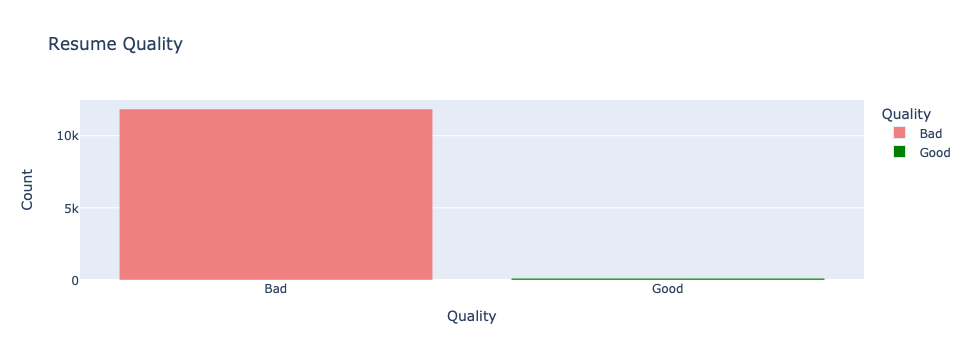

In [266]:
import plotly.express as px

# Compute the count of each RES_QUALITY value
df_quality_count = df['RES_QUALITY'].value_counts().reset_index()

# Create a color map dictionary for quality values
color_map = {'Good': 'green', 'Bad': 'lightcoral'}

# Create a bar plot with dynamic colors
fig = px.bar(df_quality_count, x='index', y='RES_QUALITY',
             title='Resume Quality',
             labels={'index': 'Quality', 'RES_QUALITY': 'Count'},
             hover_data={'RES_QUALITY': ':y'},
             color='index',
             color_discrete_map=color_map)

# Show the figure
fig.show()
